In [20]:
from collections import defaultdict
import copy

import facebook
import io
import matplotlib.pyplot as plt
import networkx as nx
import time
%matplotlib inline 

In [21]:
def snowball(fb, tofind, found, edges, id2name, depth=0, maxdepth=2):

    tofind2 = copy.copy(list(tofind))  # make a copy since we modify `tofind` below.
    for userid in tofind2:
        print('getting likes for %s' % userid)
        friends = fb.get_connections(userid, "likes")
        time.sleep(1)  # to avoid rate limits.
        found.add(userid)
        tofind.remove(userid)
        for friend in friends['data']:
            id2name[friend['id']] = friend['name']
            edges[userid].add(friend['id'])
            if friend['id'] not in found:  # add if haven't seen already.
                tofind.add(friend['id'])
        print('%d tofind' % len(tofind))
    if depth < maxdepth:  # if should continue recursively.
        print('recursing with %d to find, %d found, and %d names' %
              (len(tofind), len(found), len(id2name)))
        snowball(fb, tofind, found, edges, id2name, depth+1, maxdepth)
    return edges

In [22]:
if False:  # don't actually run this.
    # see here: https://developers.facebook.com/tools/explorer/
    access_token = '<ENTER YOUR ACCESS TOKEN>'
    # Look at Bill Gates's profile for this example by using his Facebook id.
    user = 'BillGates'
    fb = facebook.GraphAPI(access_token)
    profile = fb.get_object(user)
    tofind = set([profile['id']])
    found = set()
    edges = defaultdict(lambda: set())
    id2name = {profile['id']: profile['name']}

    edges = snowball(fb, tofind, found, edges, id2name, 0, 2)
    outf = io.open('edges.txt', 'w', encoding='utf8')
    for user, friends in edges.iteritems():
        for friend in friends:
            outf.write(id2name[user] + u'\t' + id2name[friend] + u'\n')
    outf.close()

In [23]:
def read_graph():

    
    f = open('edges.txt','rb')
    G = nx.read_edgelist(f, delimiter = '\t', create_using = nx.Graph())
    return G
        

graph = read_graph()
print('graph has %d nodes and %d edges' % 
      (graph.order(), graph.number_of_edges()))

graph has 5062 nodes and 6060 edges


In [24]:
sorted(graph.degree(), key=lambda x: x[1], reverse=True)[:10]

[('Bill & Melinda Gates Foundation', 39),
 ('ONE', 39),
 ('NPR', 35),
 ('UN Women', 34),
 ('Women Deliver', 34),
 ('The New York Times', 34),
 ('I fucking love science', 33),
 ('Global Citizen', 33),
 ('Non-Profits on Facebook', 32),
 ('(RED)', 32)]

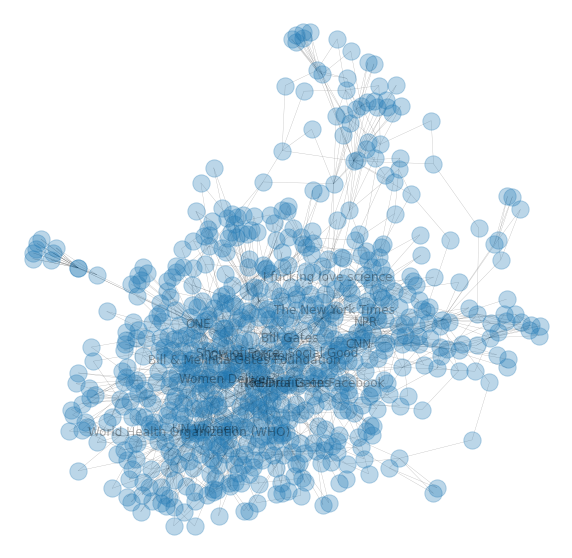

In [25]:
def draw_network(graph, draw_thresh=1, label_thresh=31,
                 min_node_sz=30, max_node_sz=200):
    degrees = graph.degree()
    d = dict(graph.degree)
    labels = {n: n for n, d in degrees if d > label_thresh}
    plt.figure(figsize=(10,10))
    nodes_to_draw = [name for name, degree in degrees if degree > draw_thresh]
    maxdegree = max(degrees)
    sz_range = max_node_sz - min_node_sz
    #sizes = [min_node_sz + (1. * degrees[n] / maxdegree * sz_range)
             #for n in nodes_to_draw]
    subgraph = graph.subgraph(nodes_to_draw)
    nx.draw_networkx(subgraph, alpha=.3, width=.3,
                     labels=labels)
    plt.axis("off")
    plt.show()
    
draw_network(graph)

In [26]:
def get_subgraph(graph, min_degree):
    
    degrees = graph.degree()
    nodes_subgraph = [n for n,d in degrees if d > min_degree]
    subgraph = graph.subgraph(nodes_subgraph)
    return subgraph
    
    

subgraph = get_subgraph(graph, 1)
print('subgraph has %d nodes and %d edges' % 
      (subgraph.order(), subgraph.number_of_edges()))

subgraph has 712 nodes and 1710 edges


In [27]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [28]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [29]:
c = girvan_newman(subgraph.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [30]:
node_groups

[['Trees, Water & People',
  "NPR's Weekend Edition",
  'WHO Regional Office for Europe',
  'Abdul Latif Jameel Poverty Action Lab (J-PAL)',
  'Greenpeace USA',
  'Ripple Effect Images',
  'GivingTuesday',
  'The National Press Club',
  'Donate My Card',
  'Solidays',
  'Scaling Up Nutrition Movement',
  'GAVI CSO',
  'Sylvia A. Earle',
  'Pau Gasol',
  'Girl Effect',
  'Cancer',
  'Infosys',
  'United Nations News Centre',
  'HeForShe',
  'Slate.com',
  'The Tonight Show Starring Jimmy Fallon',
  'The Olympic Games',
  'Do Something',
  'Journalists on Facebook',
  'HP',
  'UNICEF Albania',
  'One Day On Earth',
  'Mashable',
  'HuffPost Impact',
  'Tom Daley',
  'United Nations Association of New Zealand - UNANZ',
  'Stop TB Partnership',
  'Ted Turner',
  'CES',
  'UNICEF Africa',
  'Whole Foods Market',
  'Guardian US',
  'The Commonwealth',
  'READ 180',
  'Clinton Bush Haiti Fund',
  'UNICEF Haiti',
  'Levo League',
  'MADE in Europe',
  'UN Geneva',
  'Microsoft',
  'UNDP in the

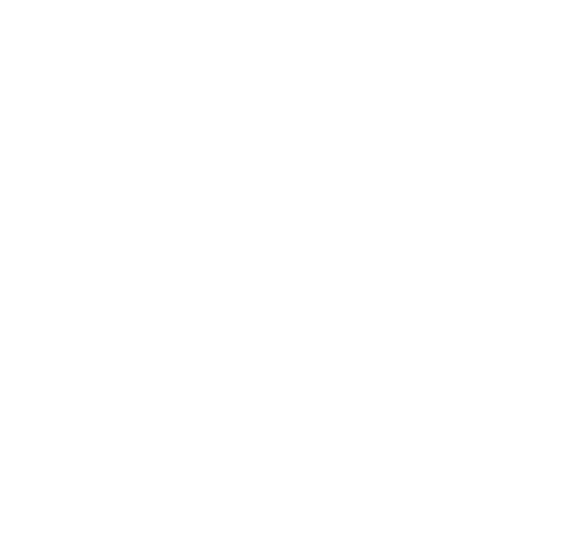

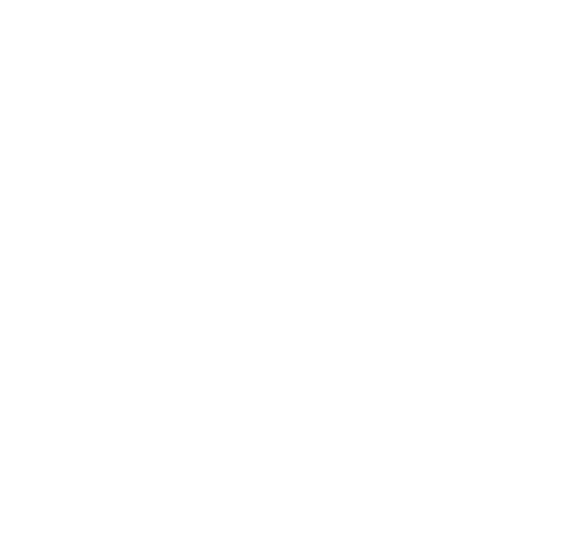

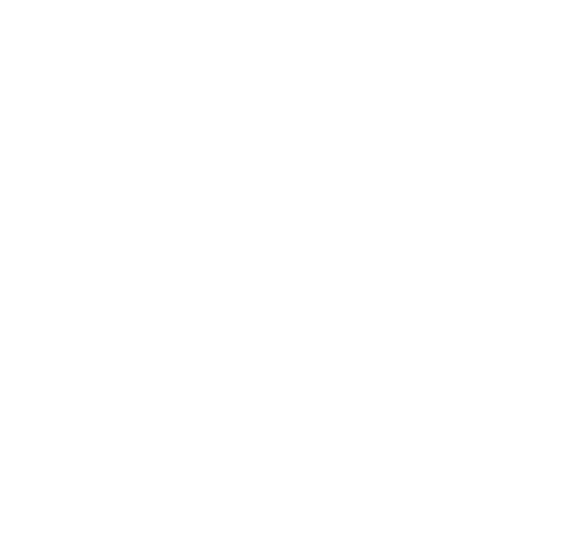

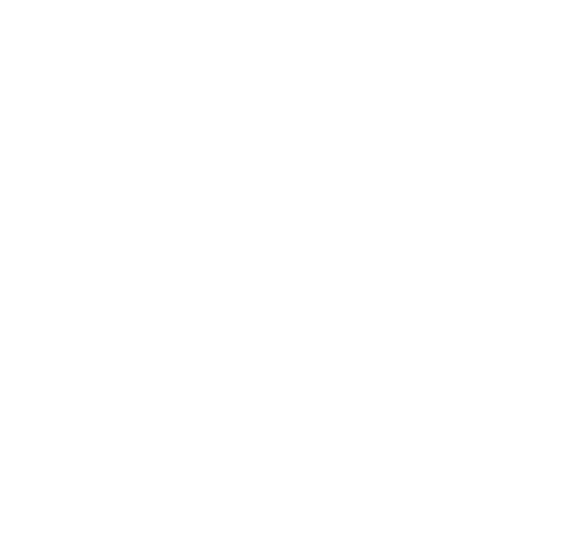

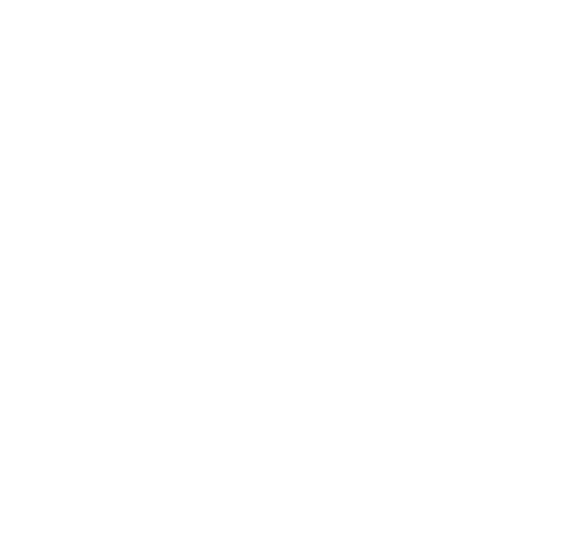

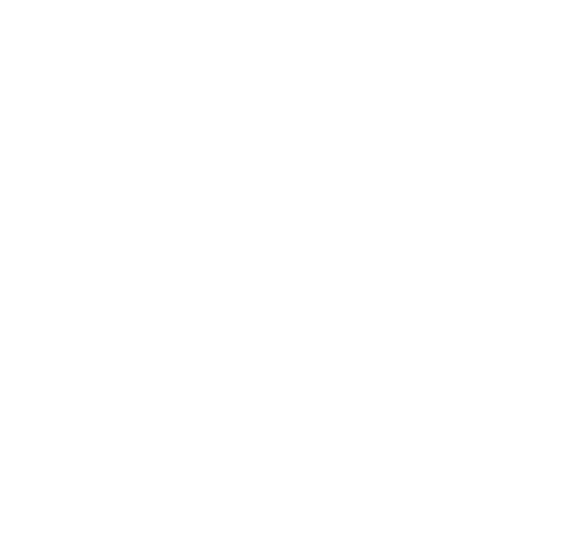

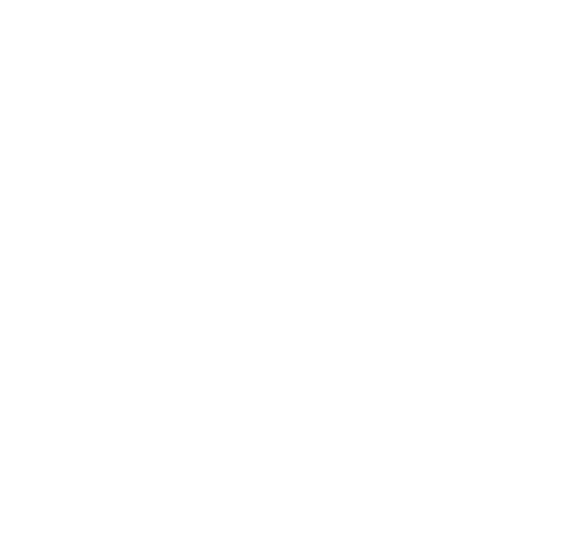

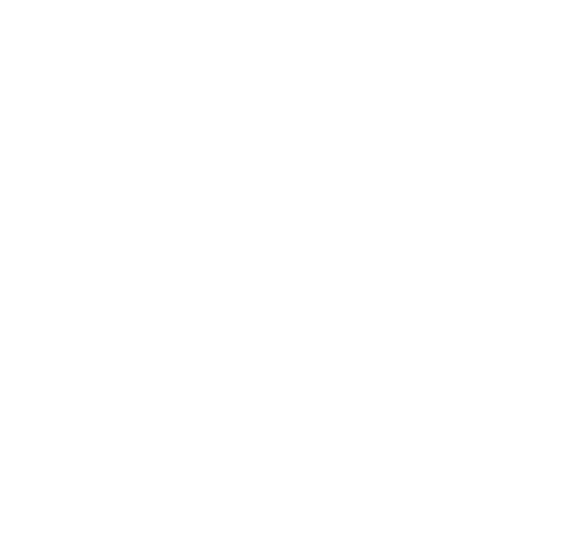

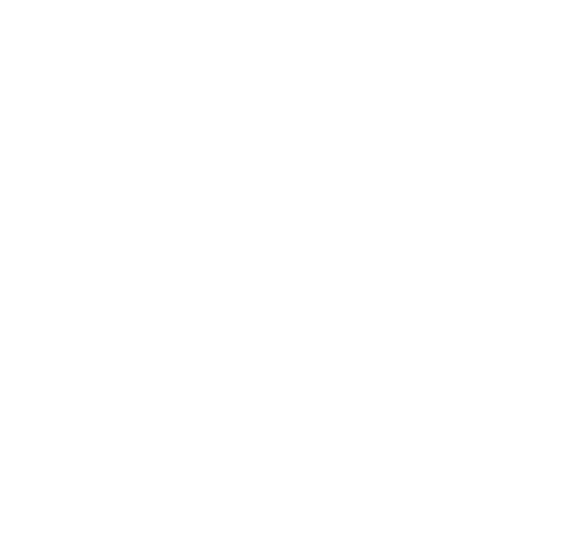

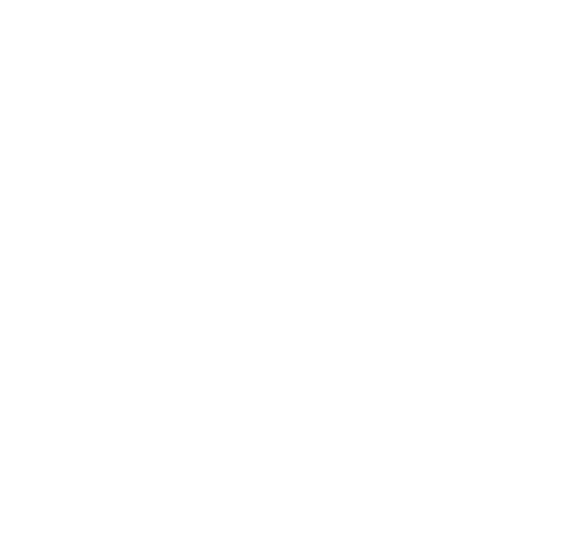

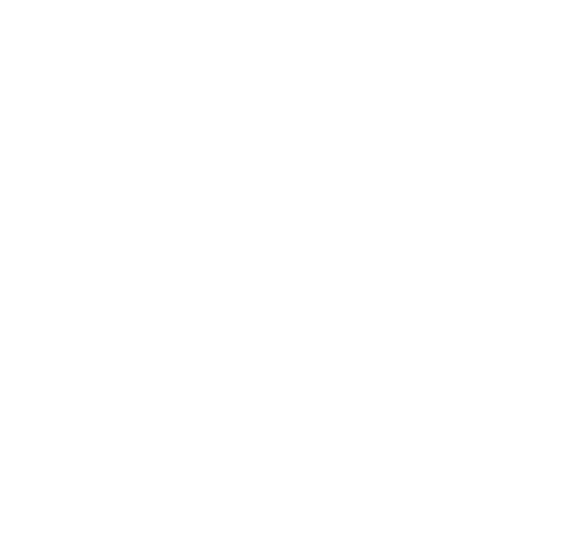

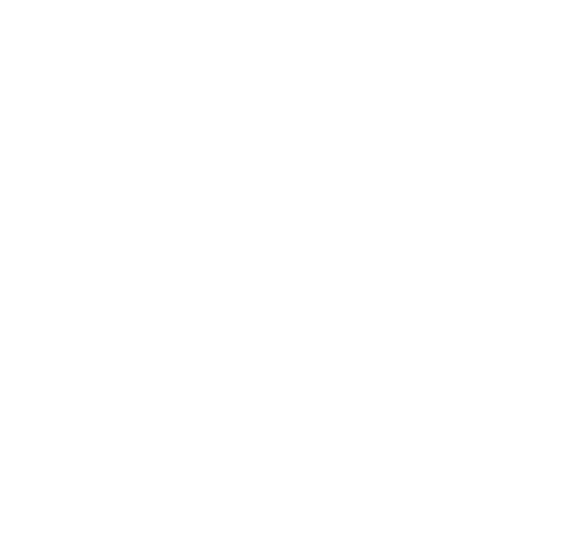

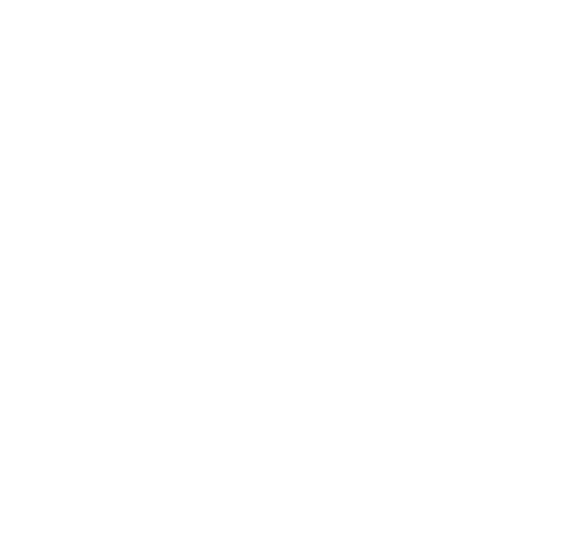

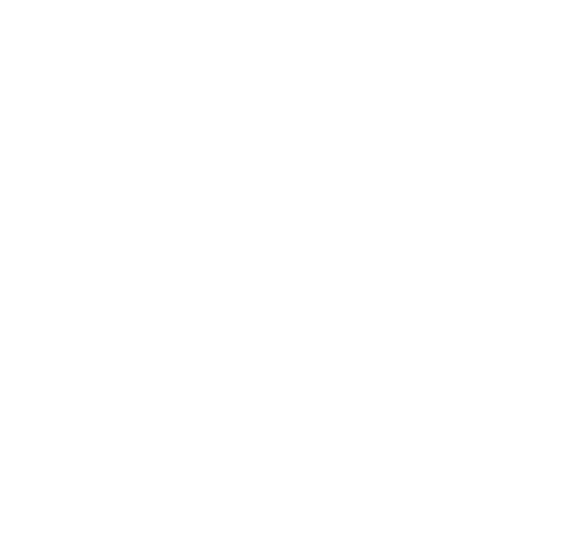

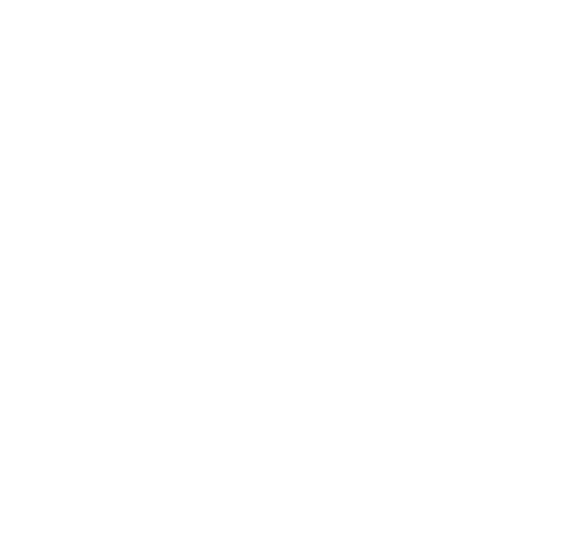

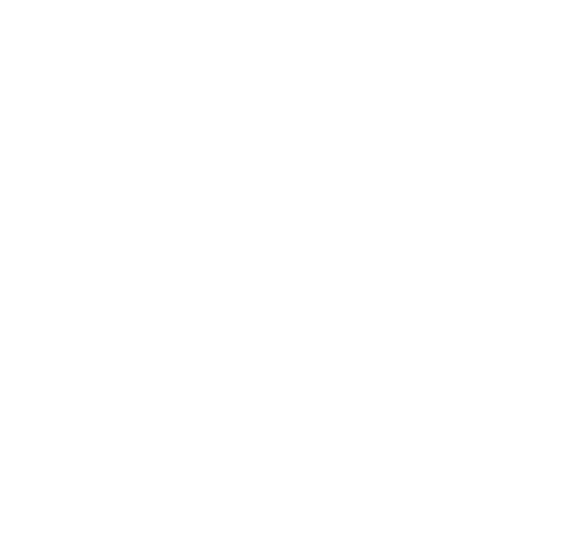

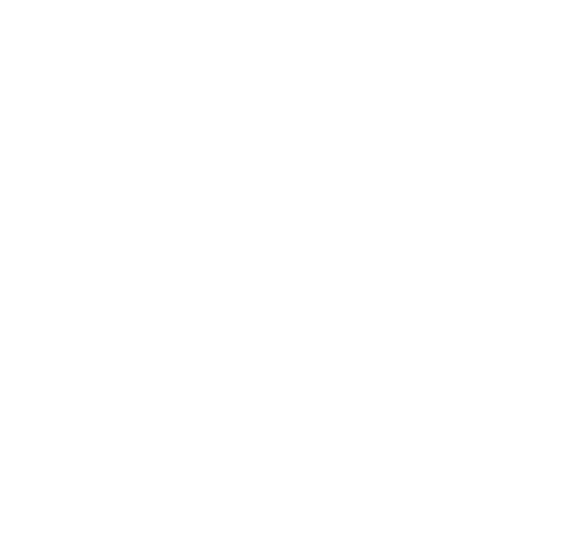

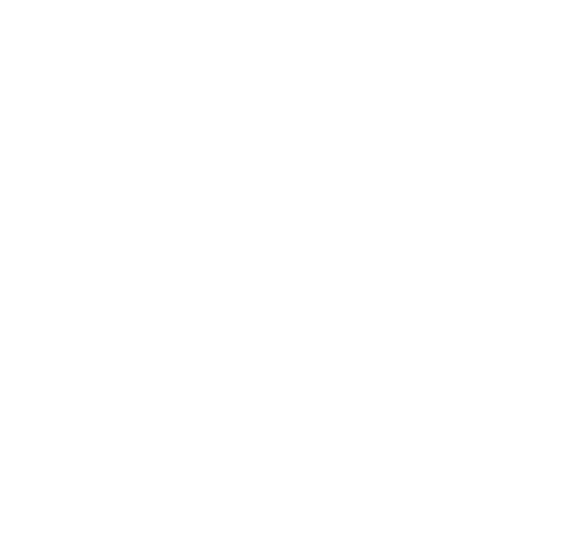

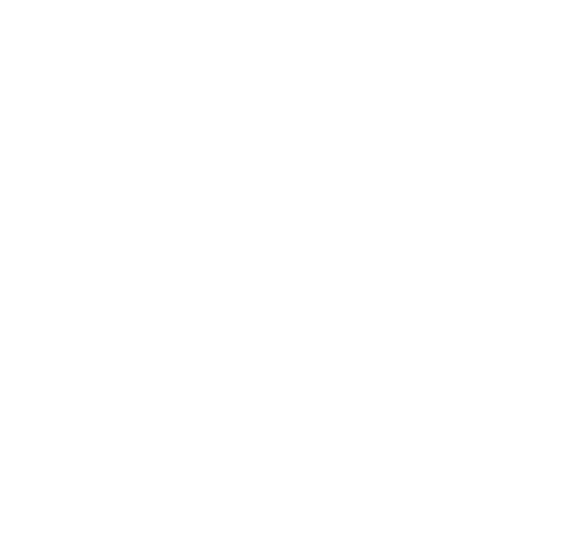

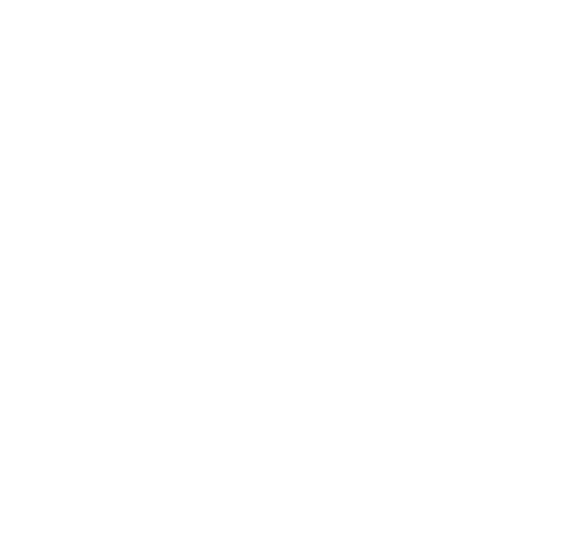

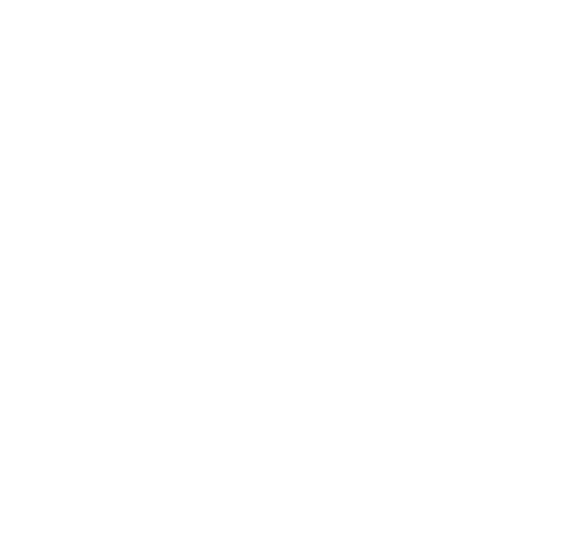

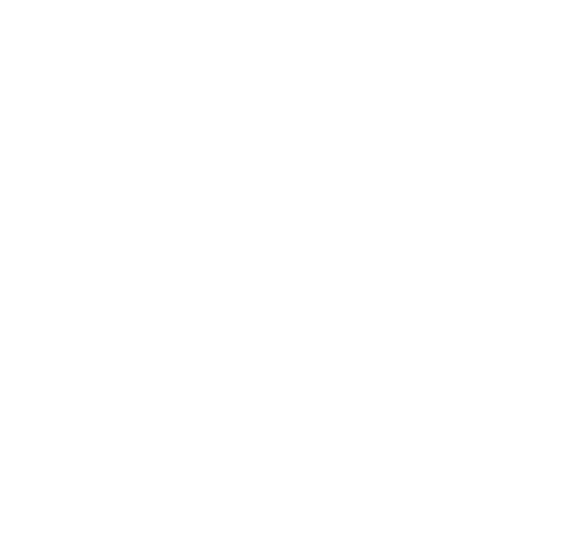

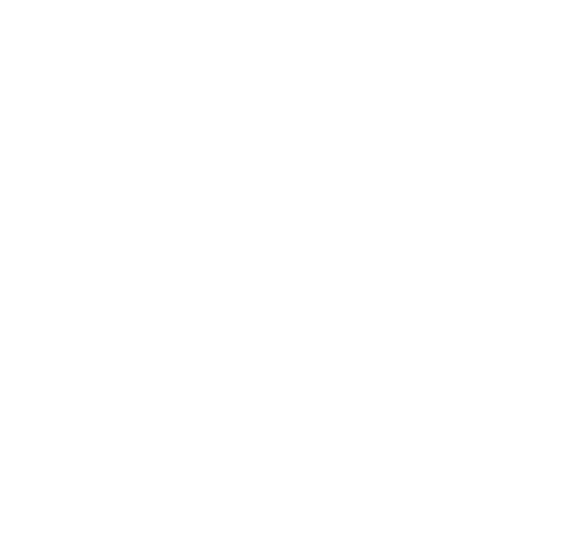

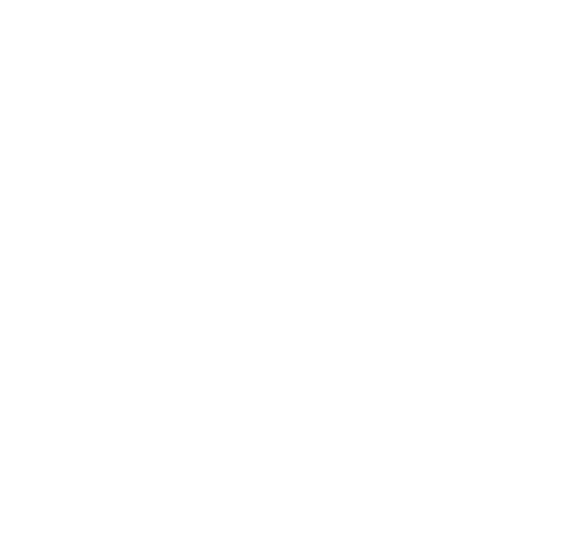

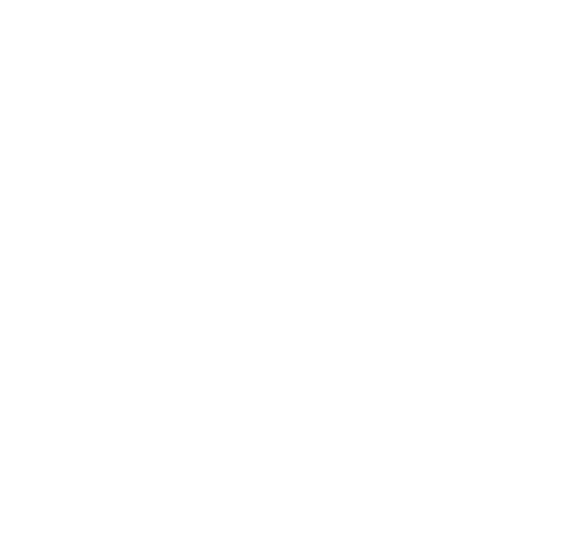

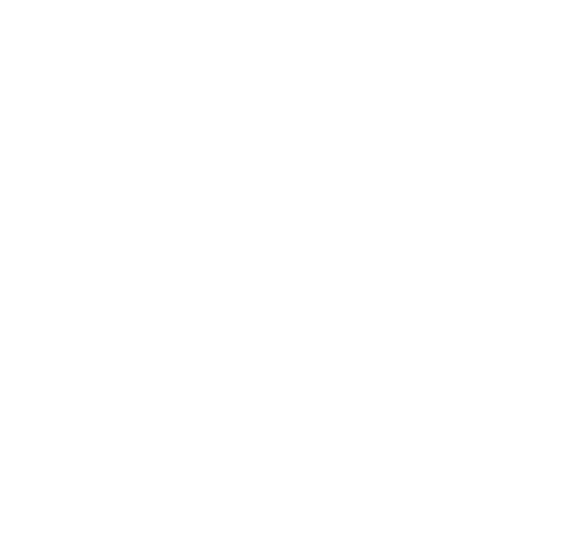

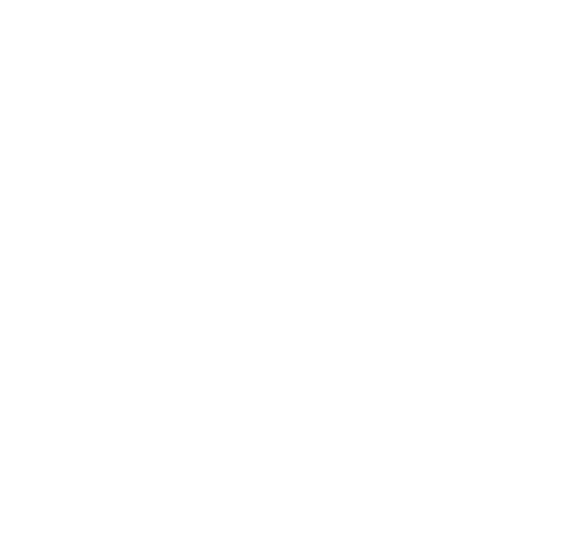

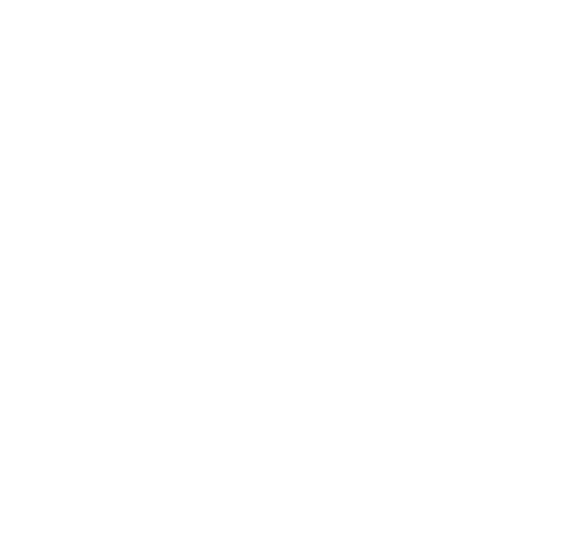

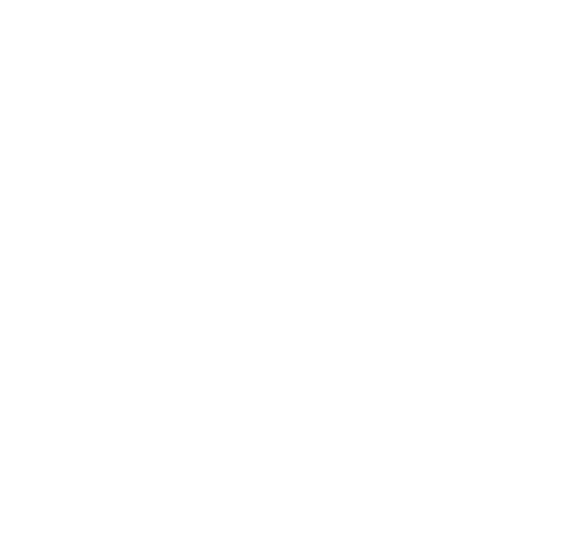

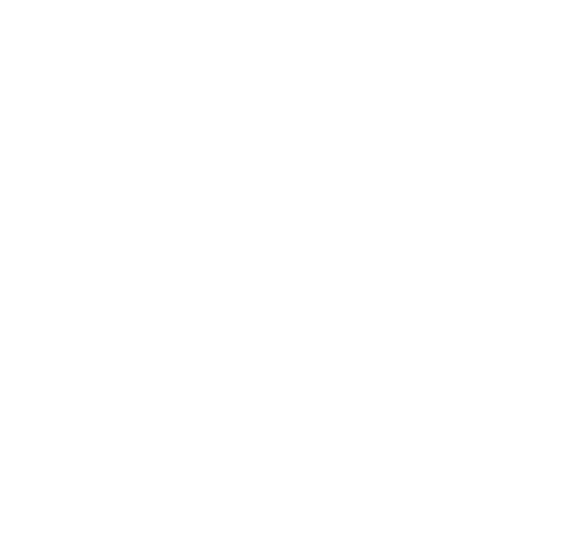

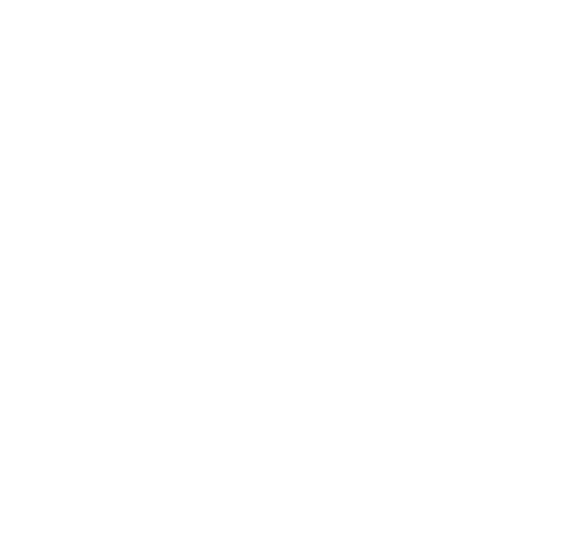

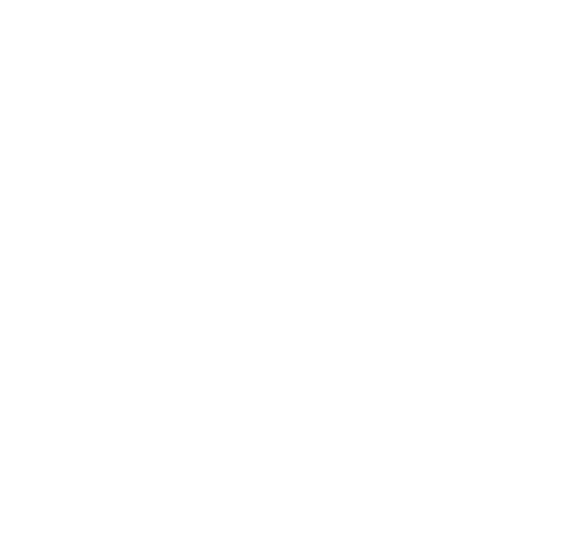

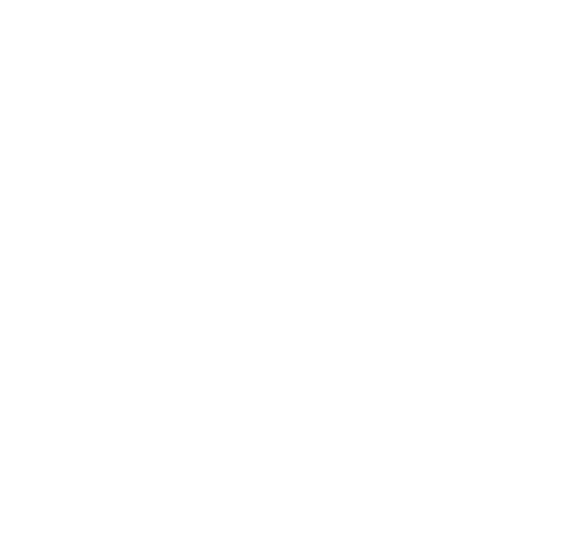

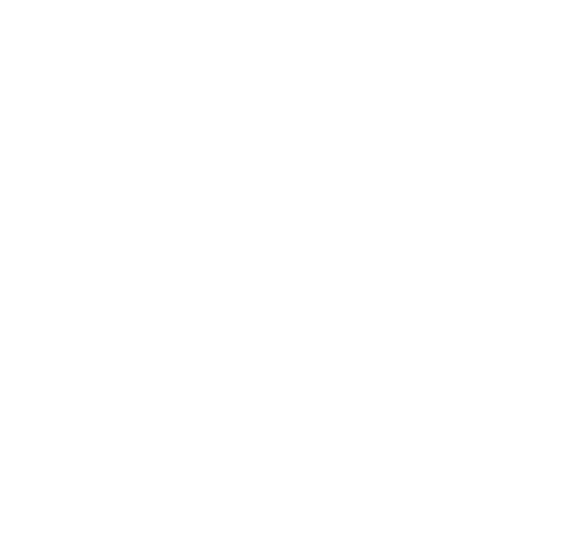

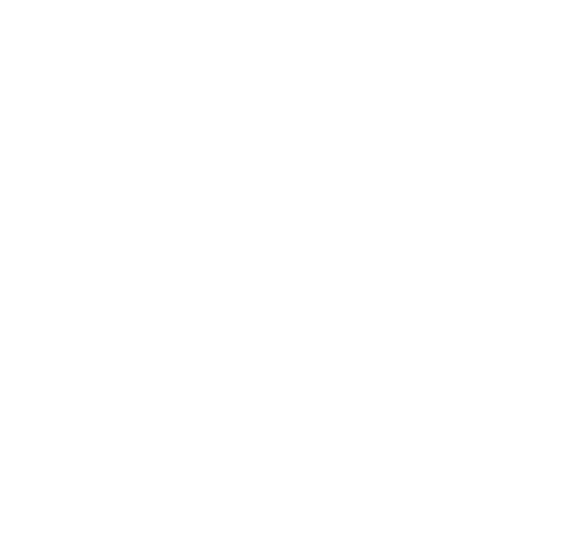

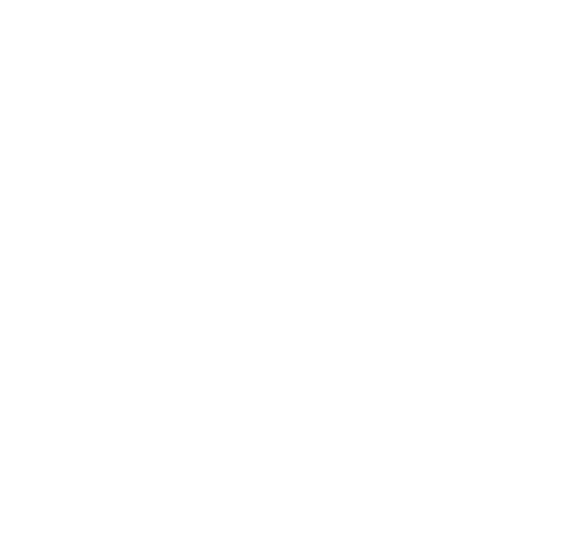

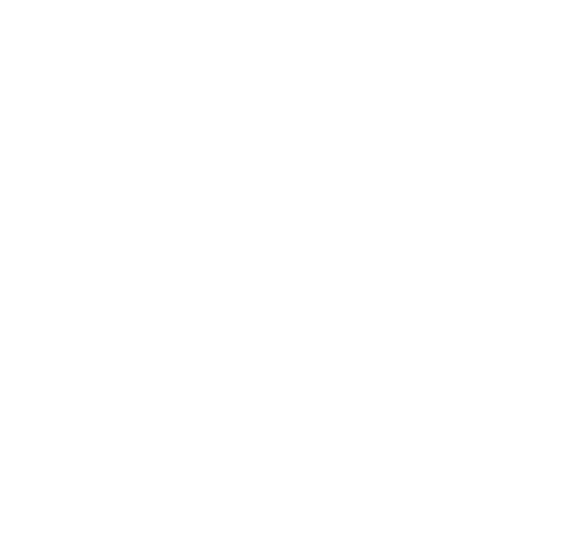

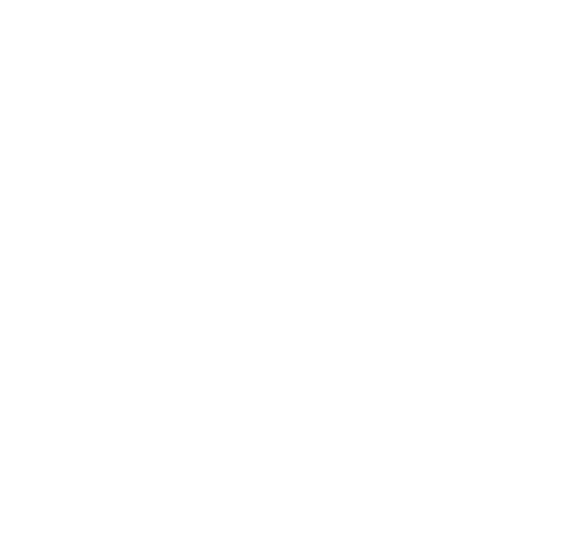

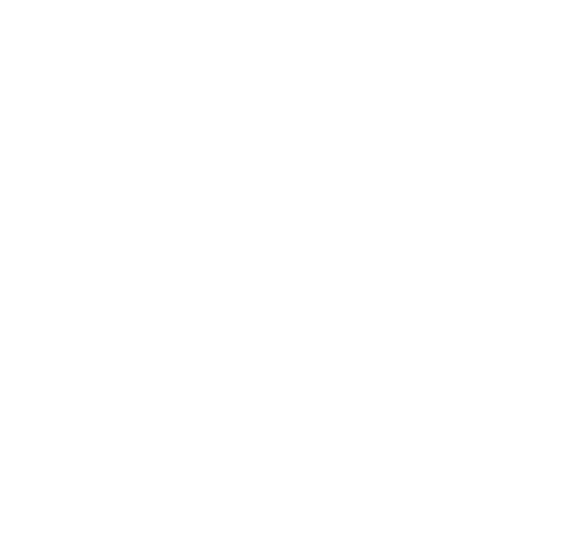

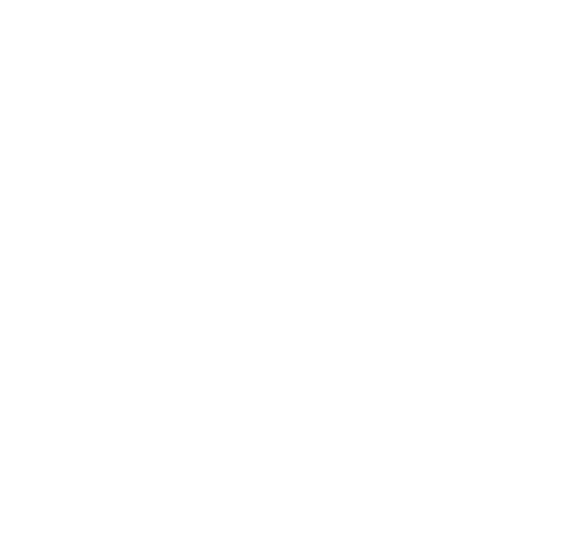

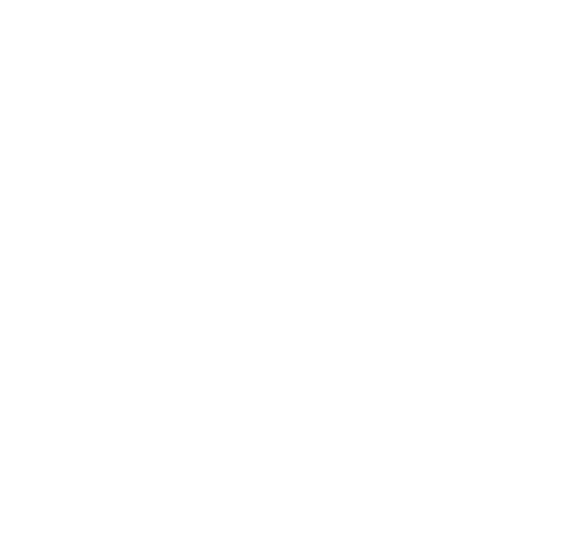

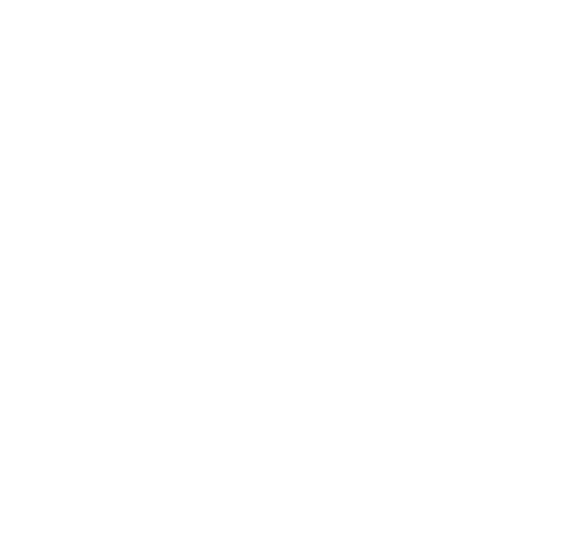

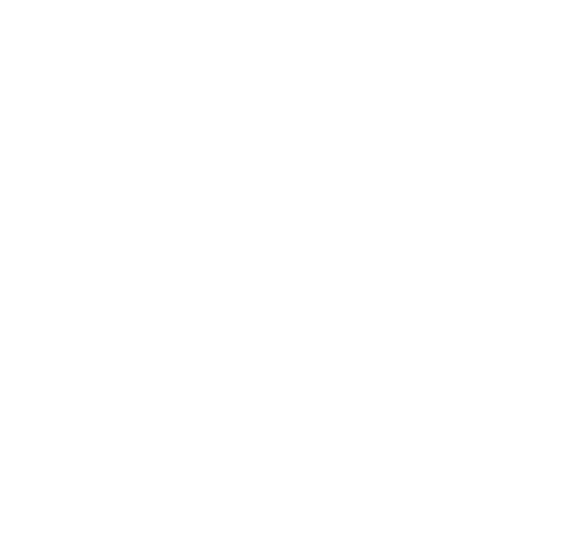

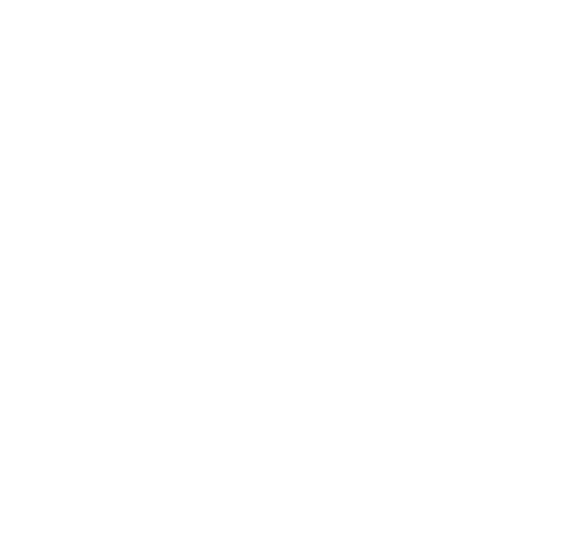

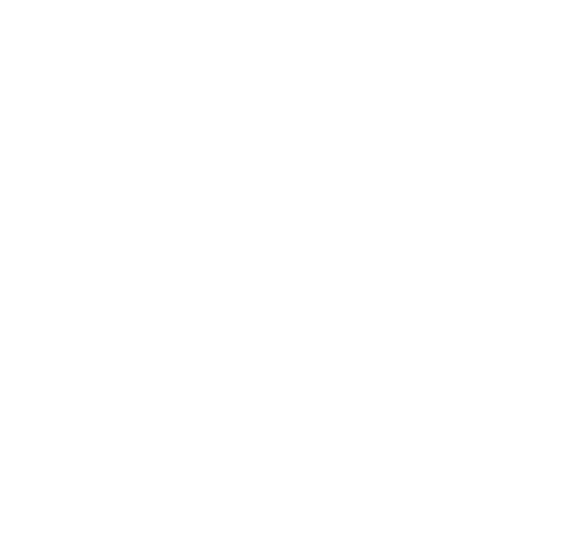

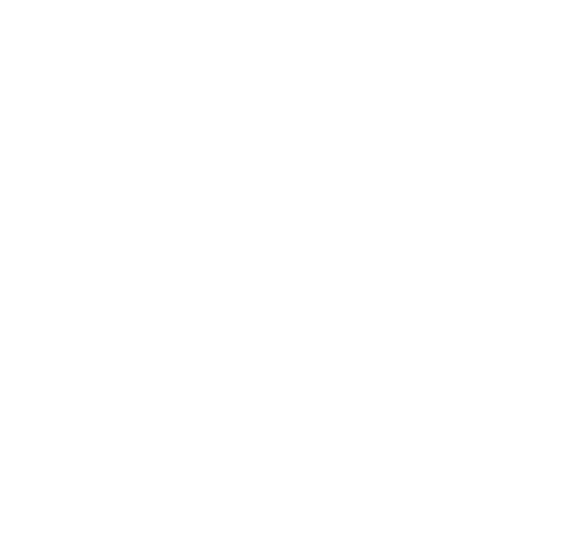

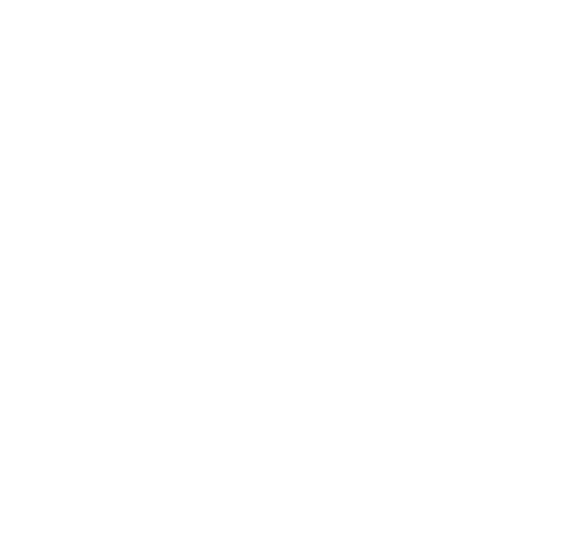

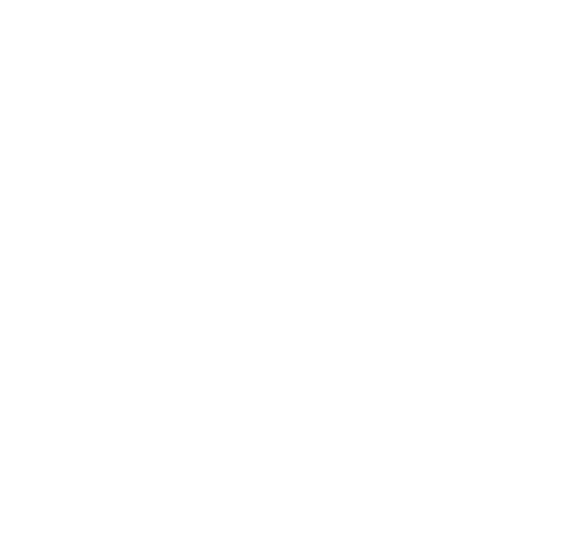

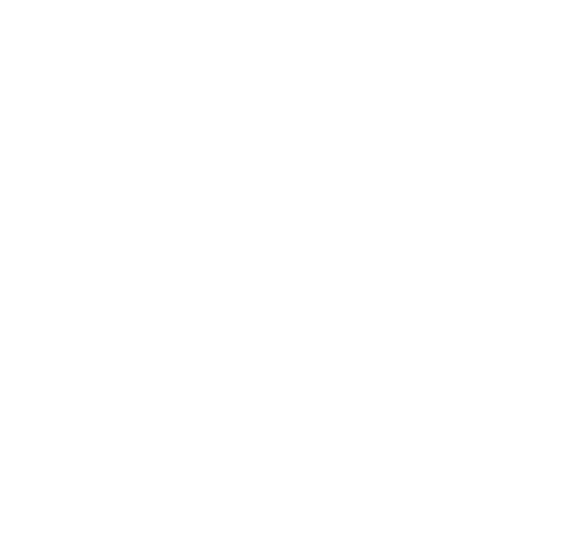

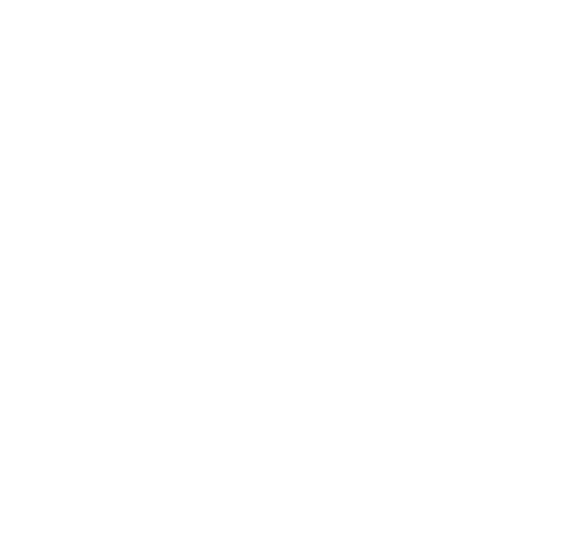

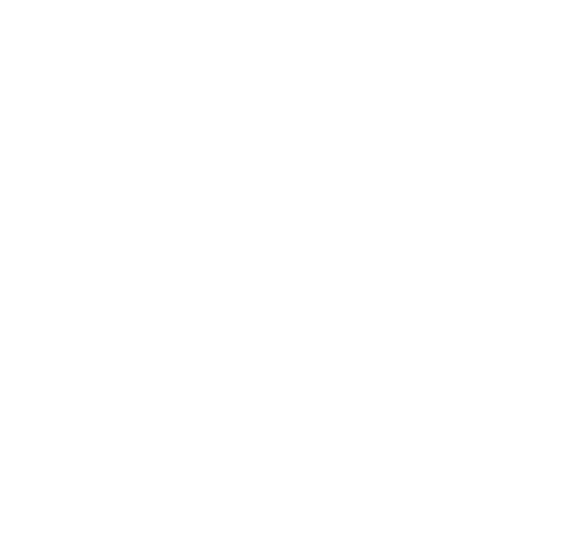

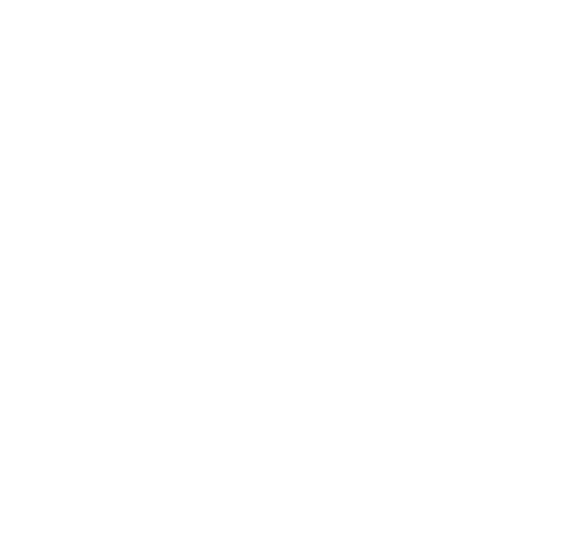

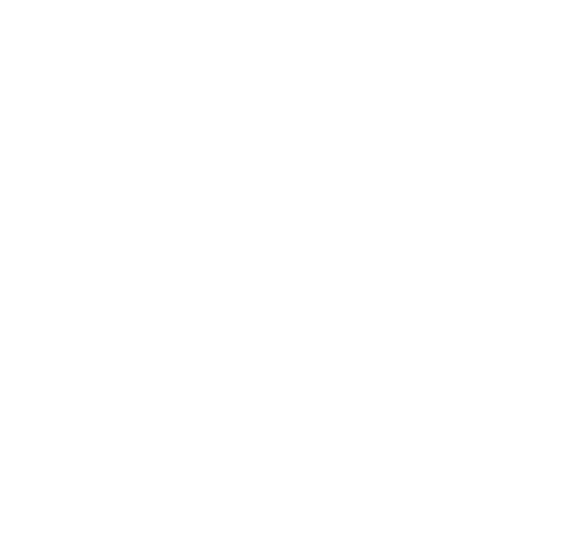

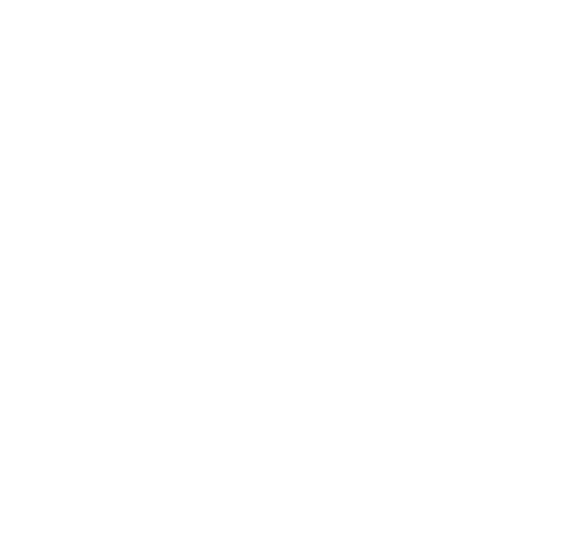

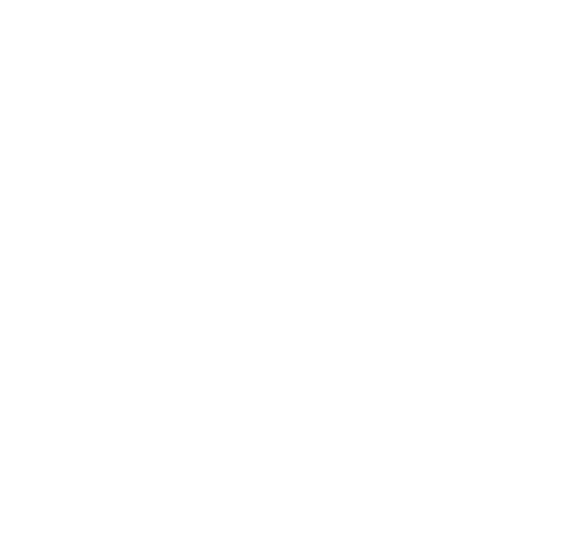

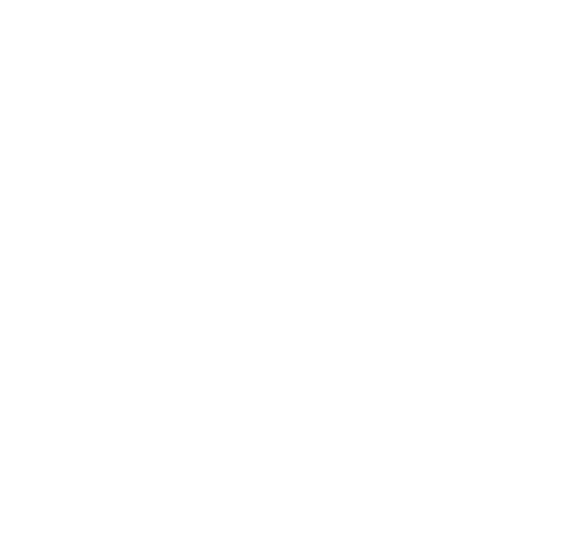

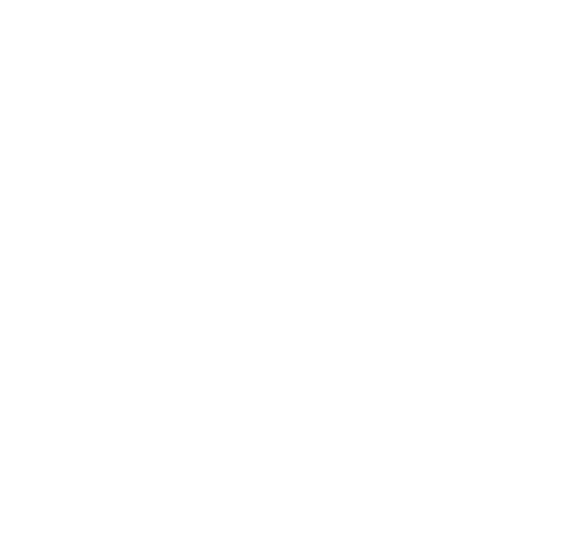

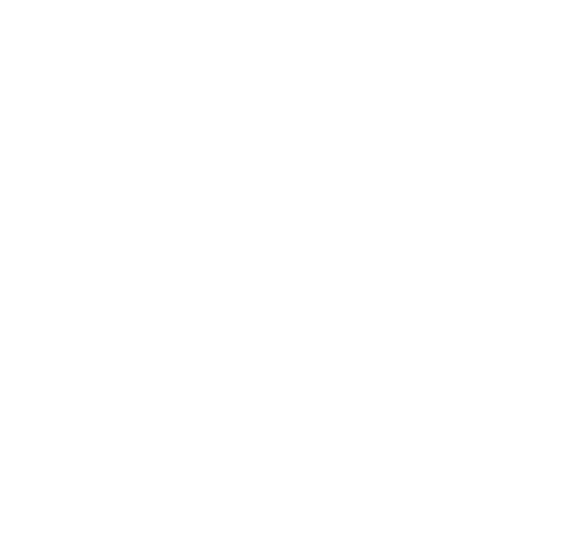

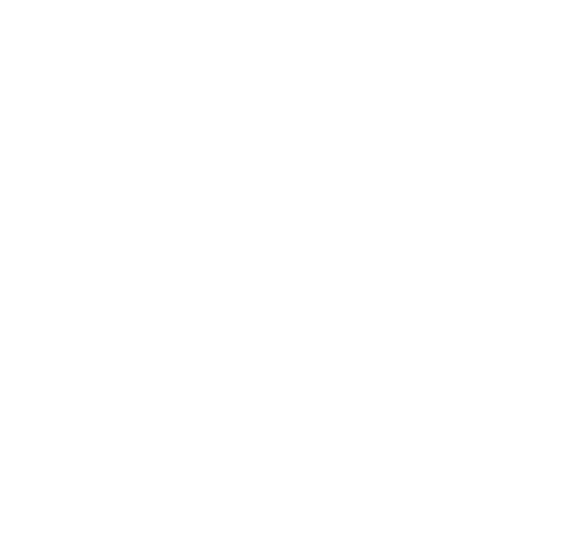

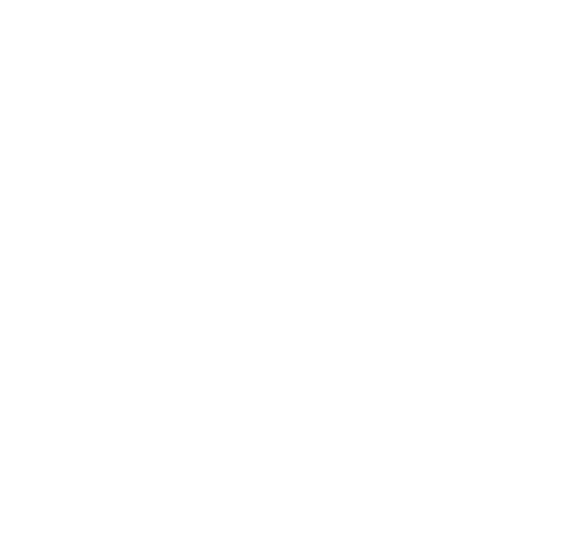

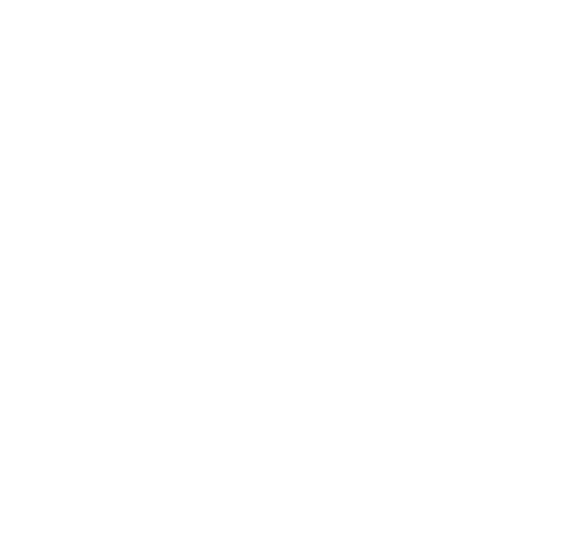

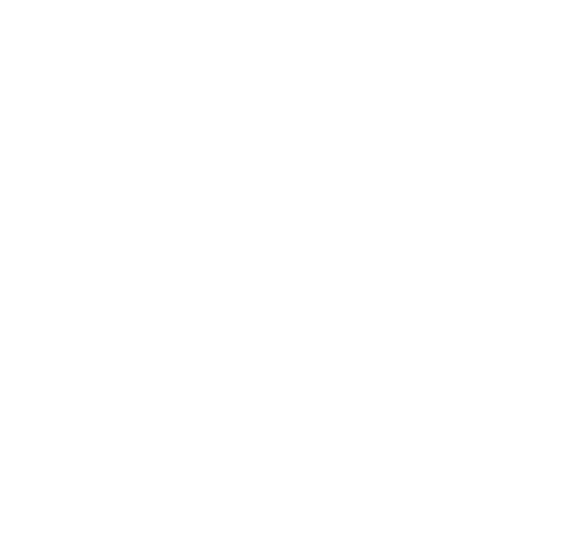

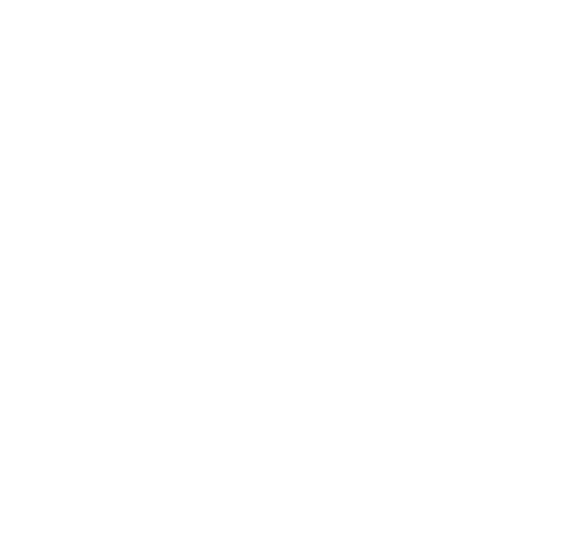

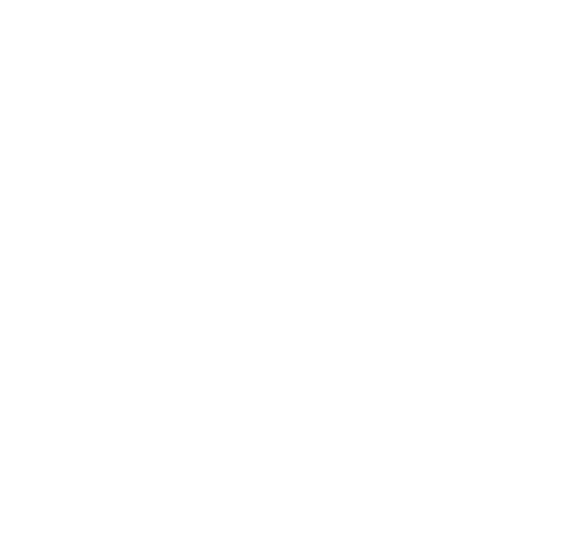

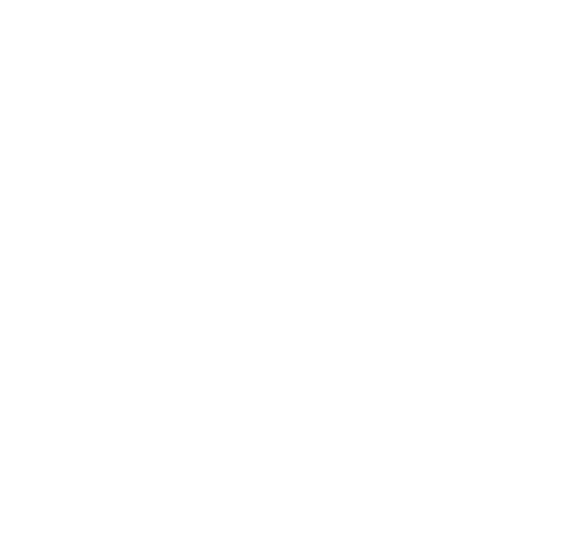

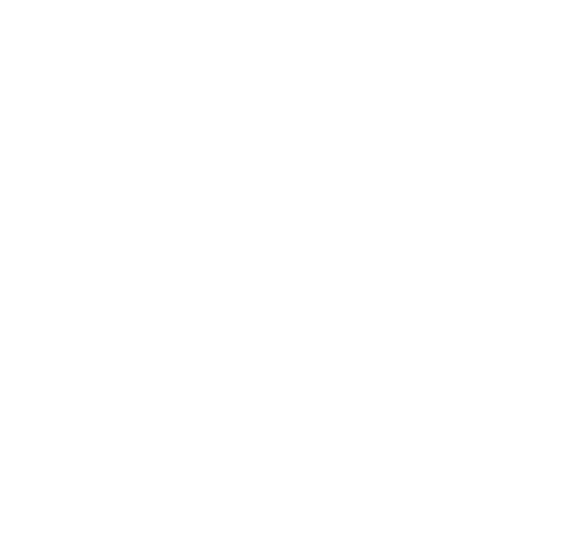

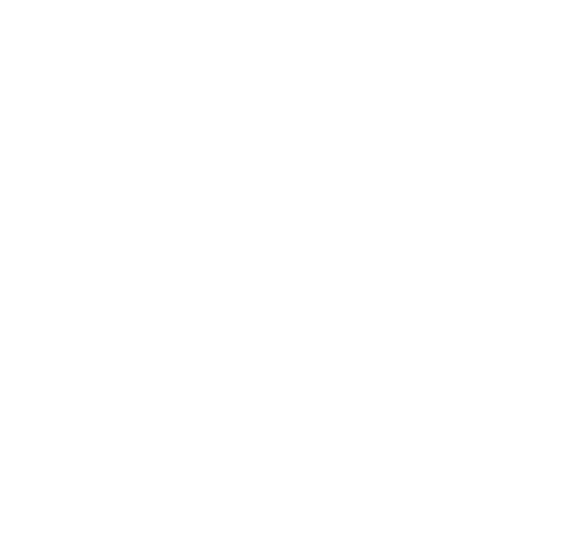

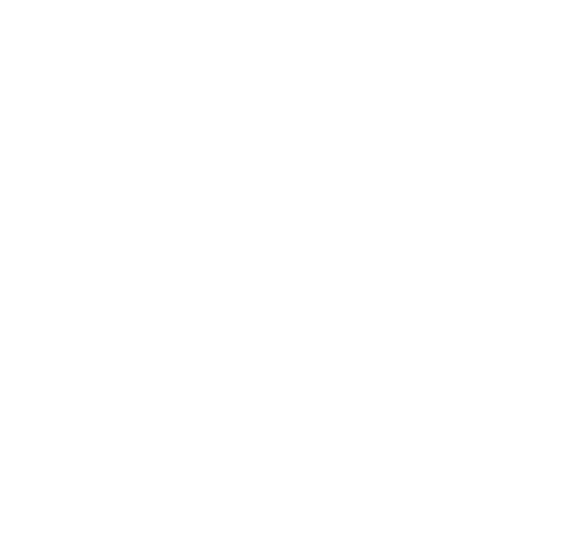

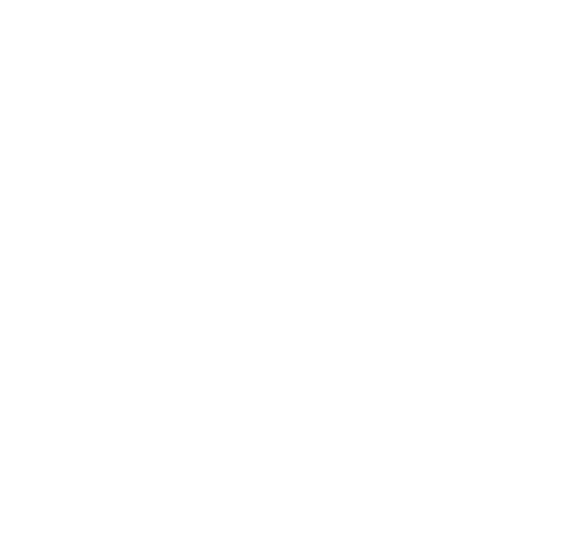

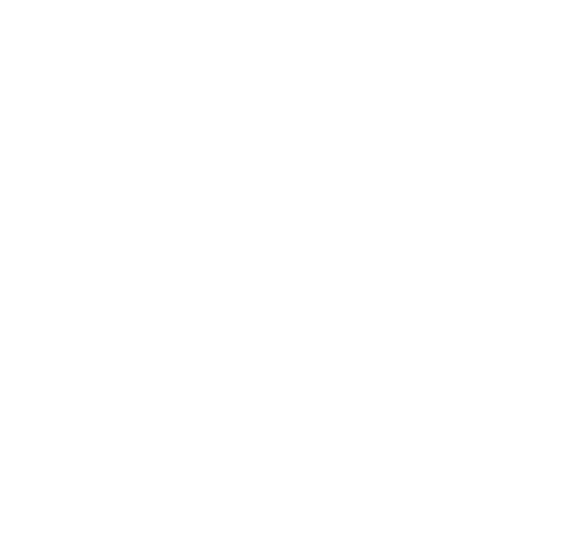

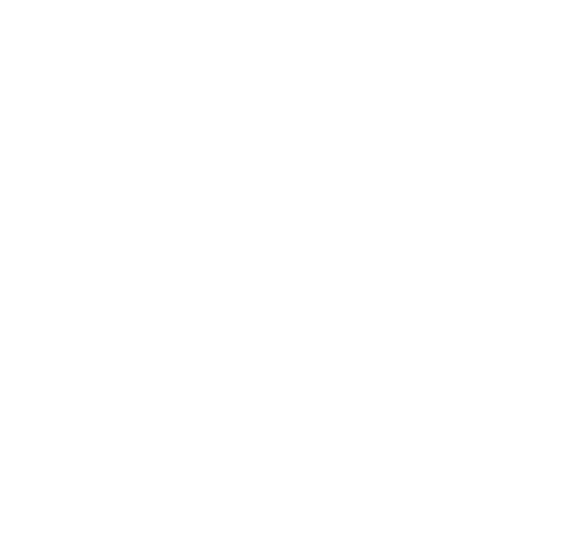

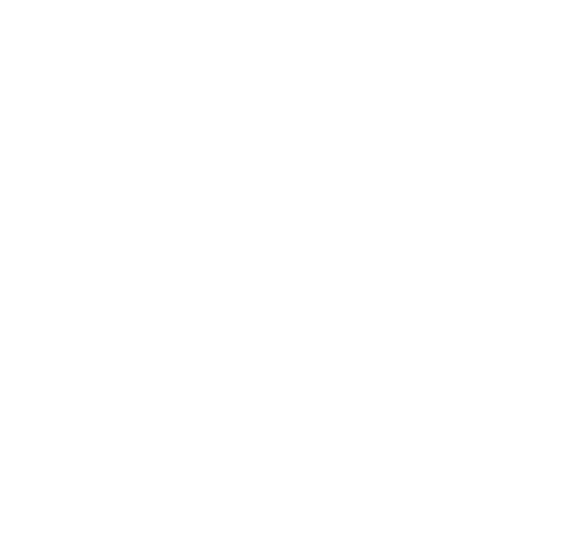

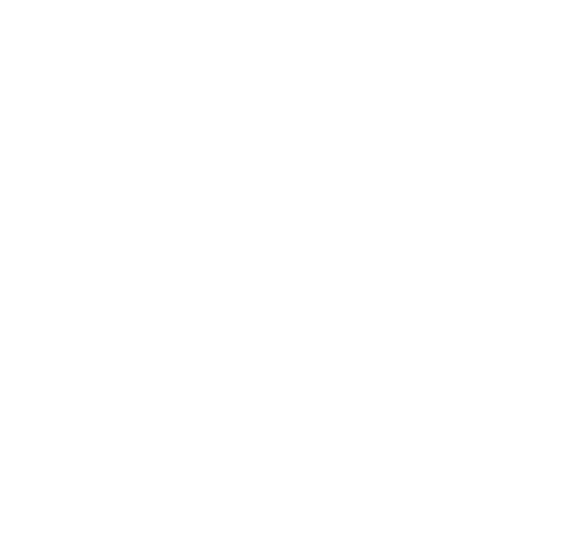

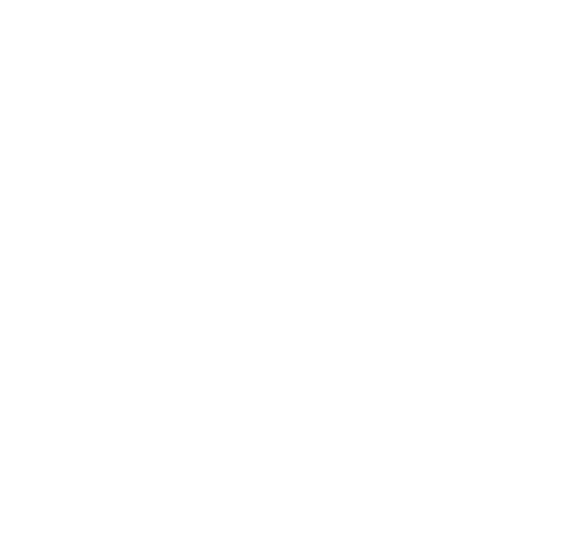

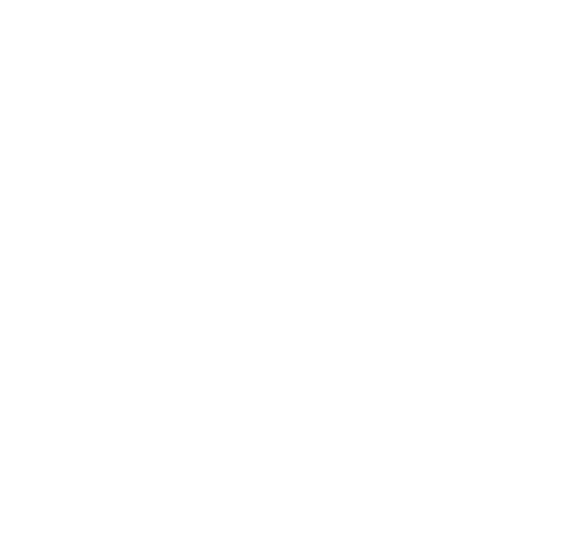

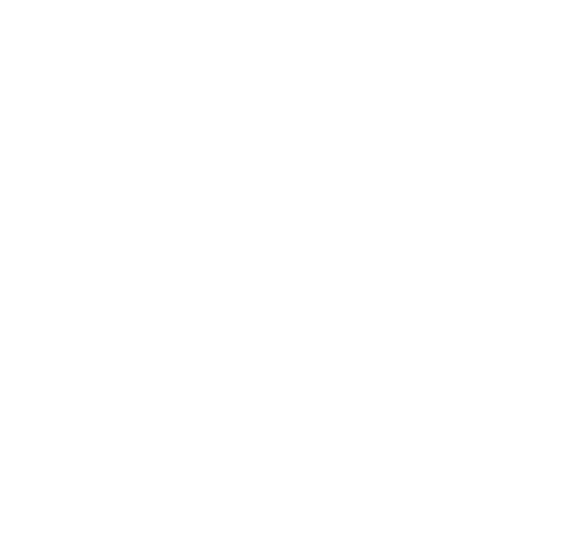

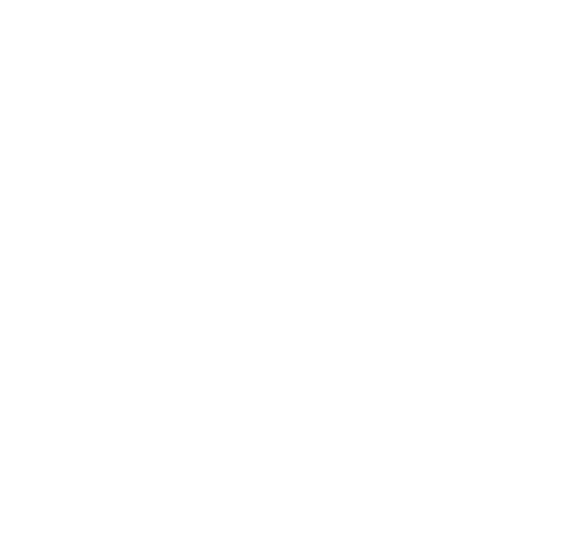

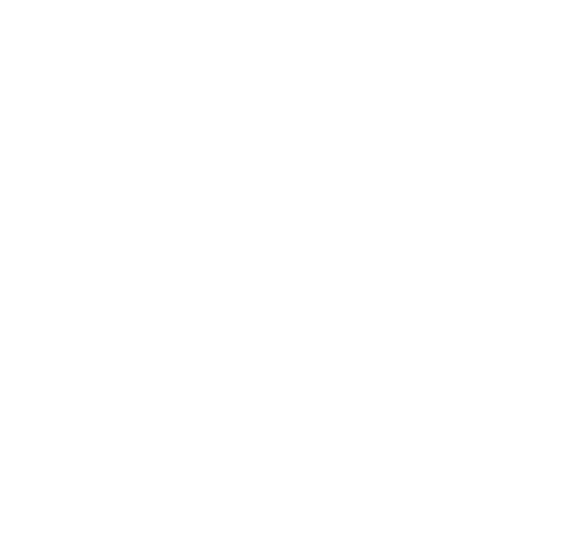

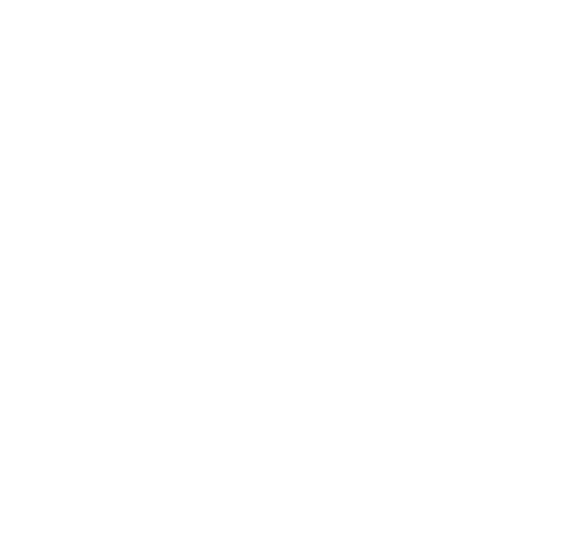

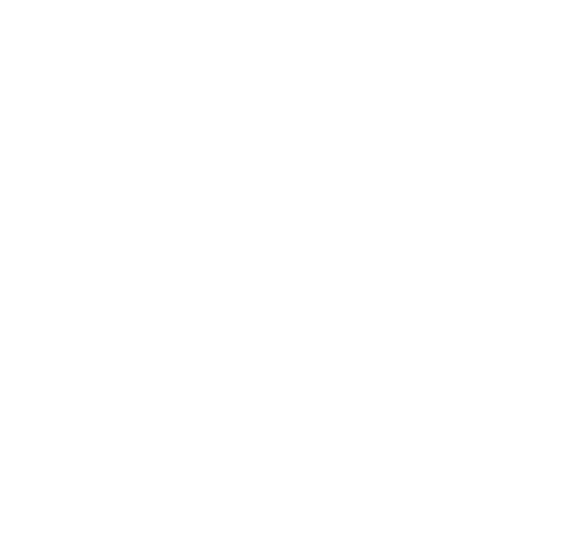

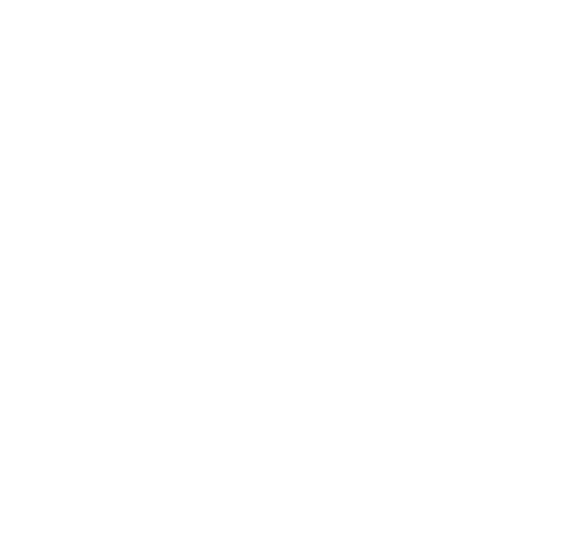

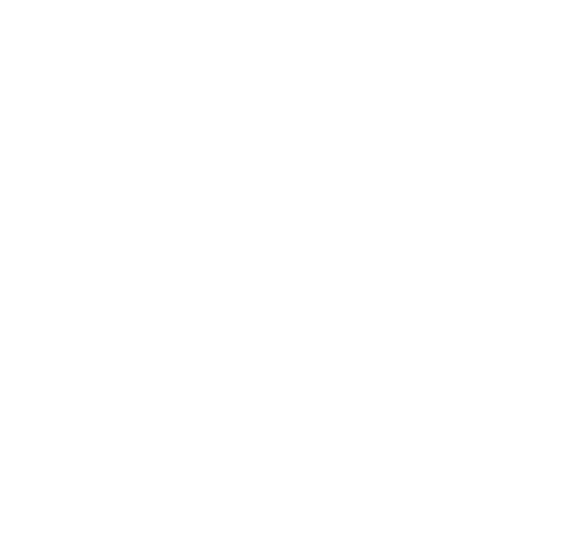

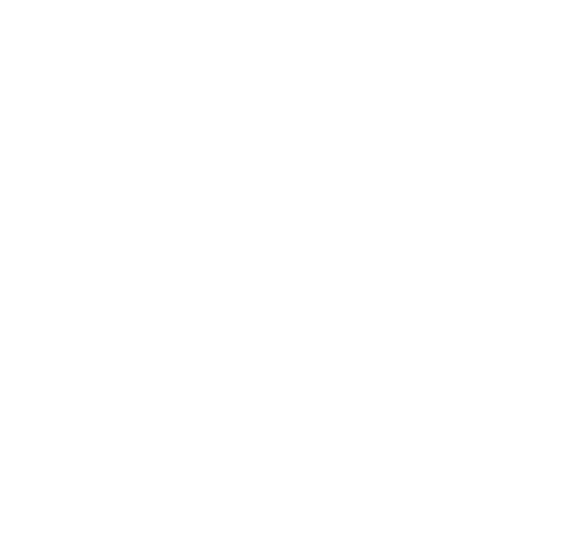

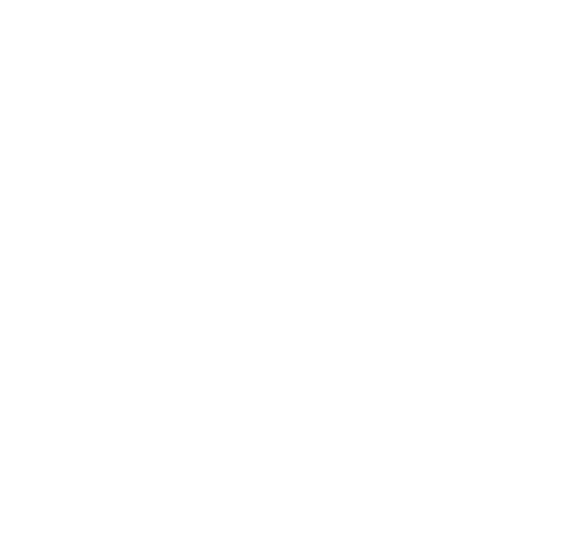

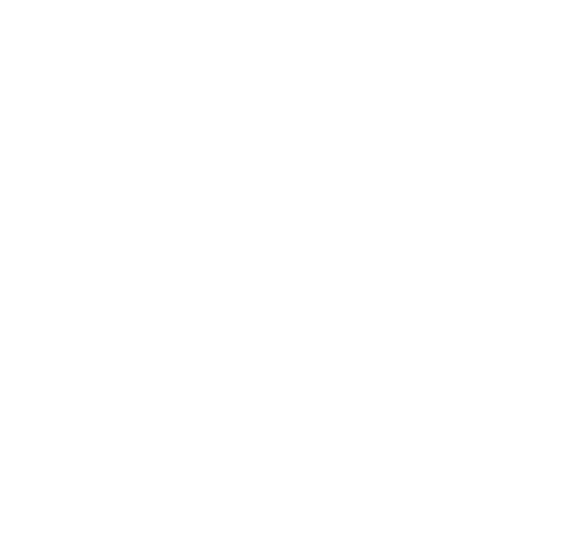

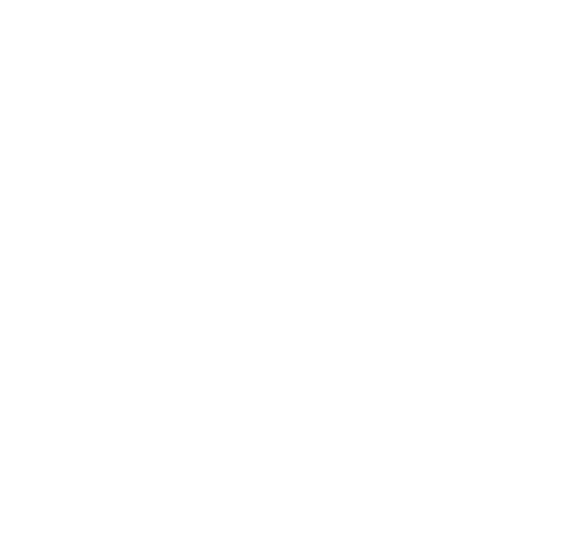

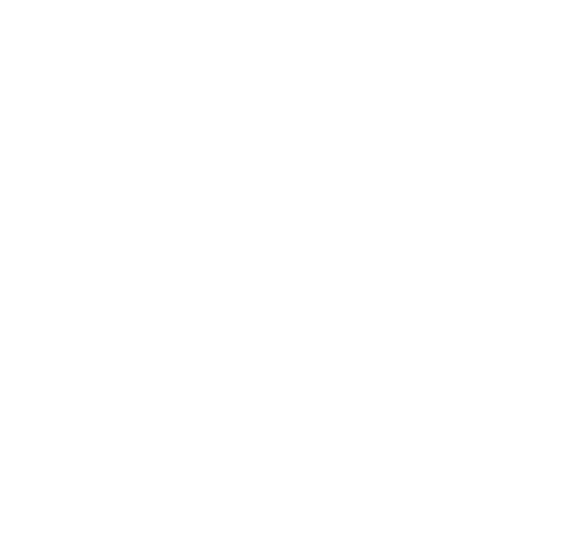

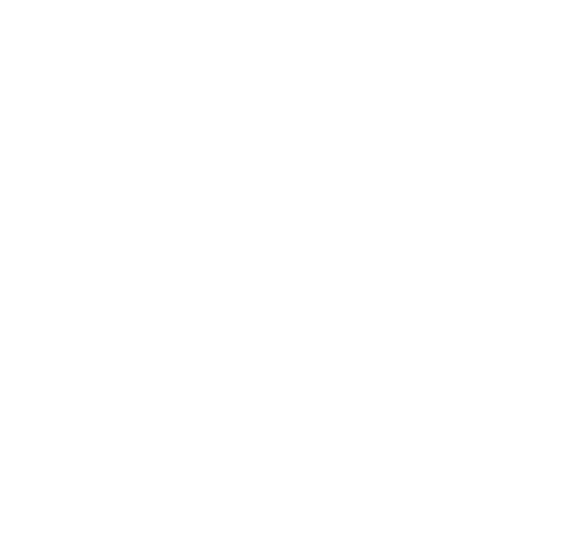

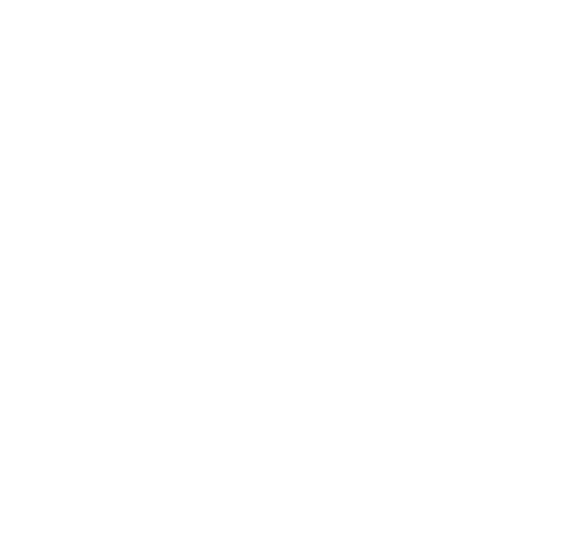

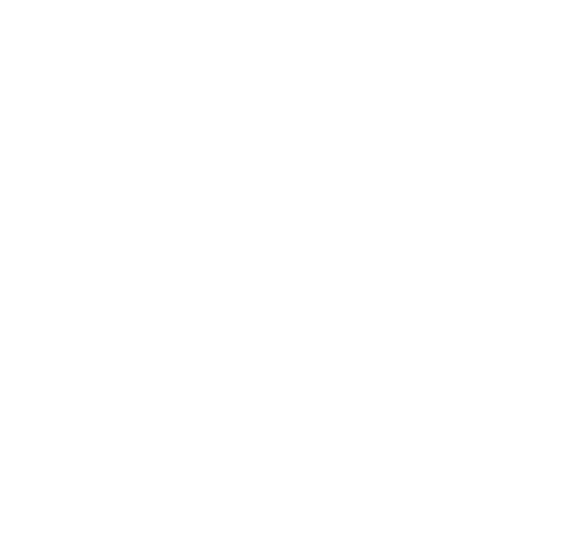

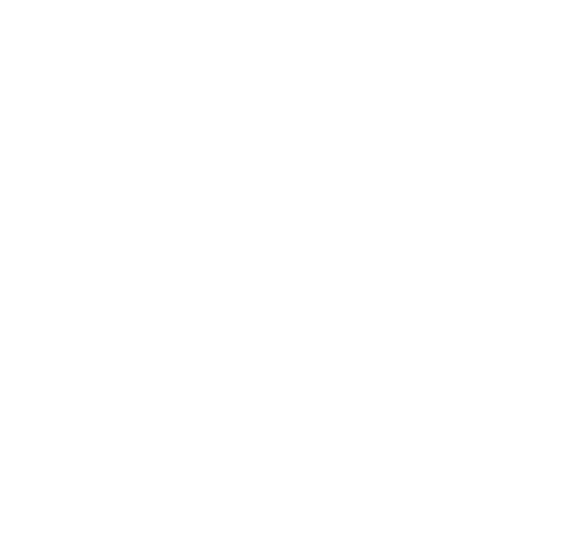

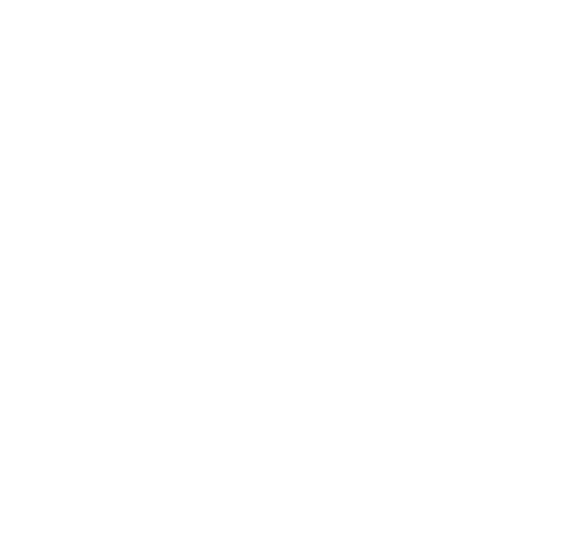

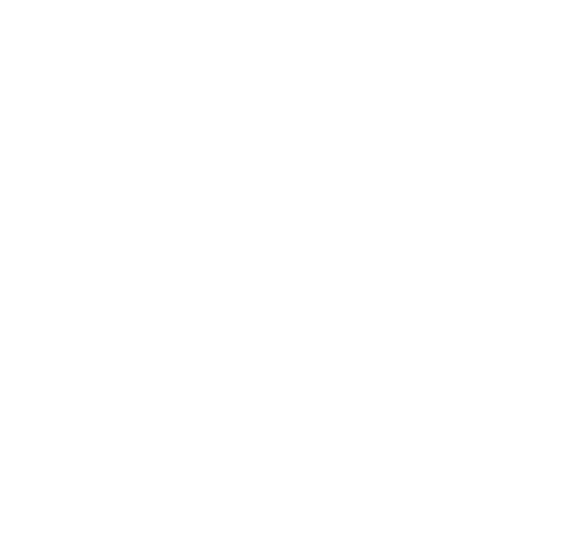

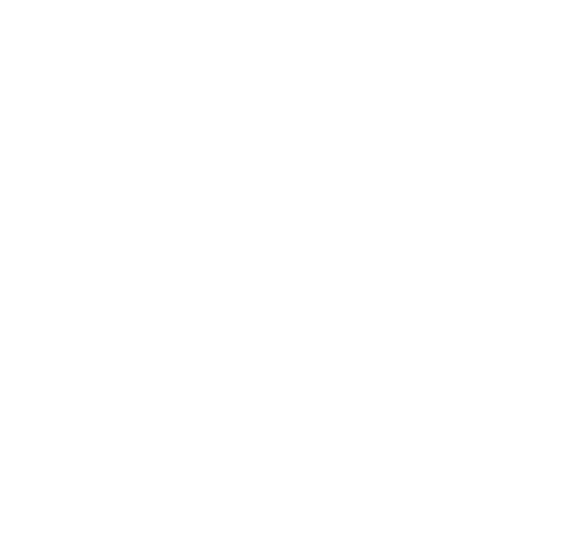

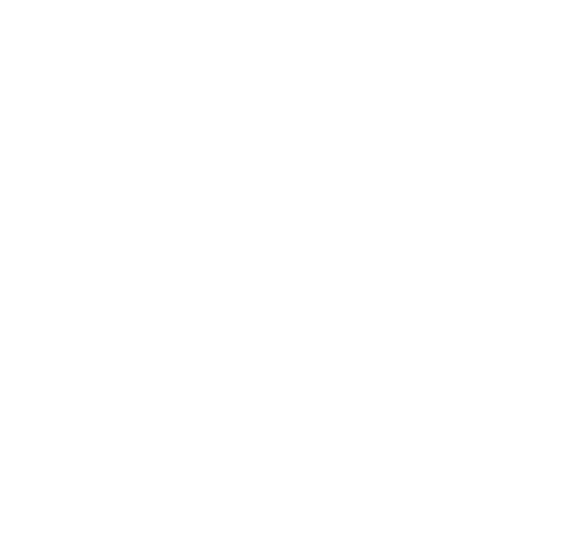

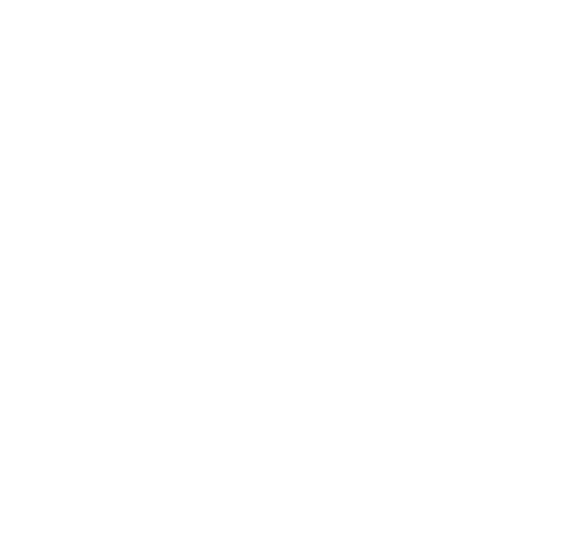

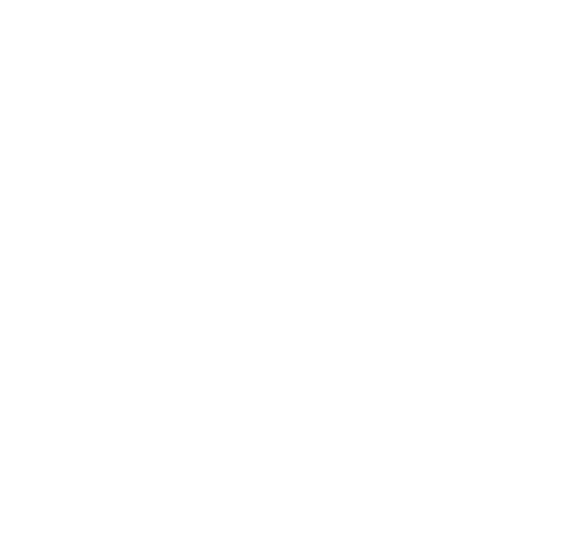

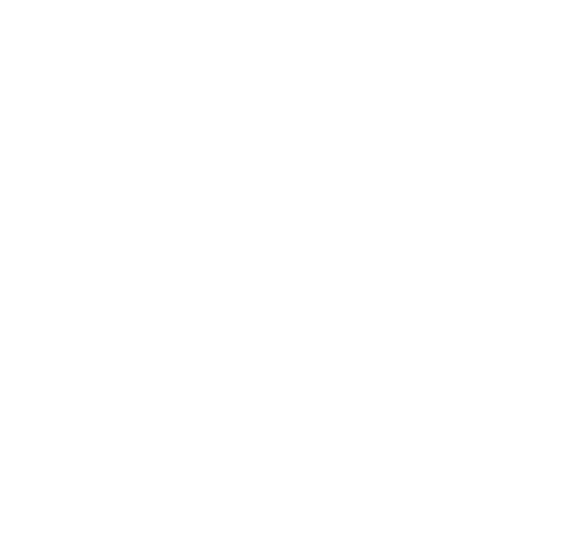

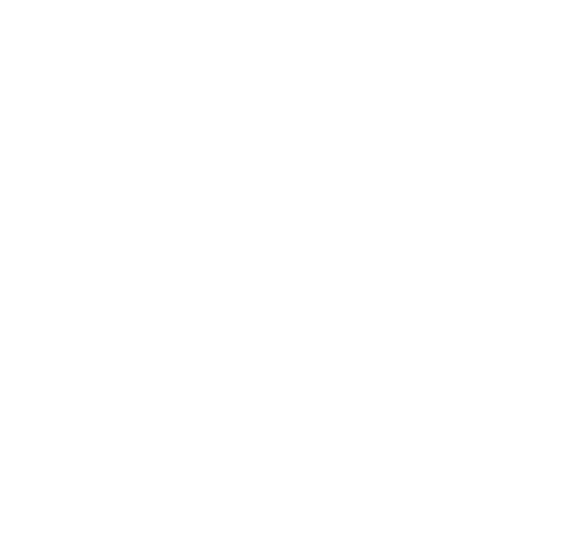

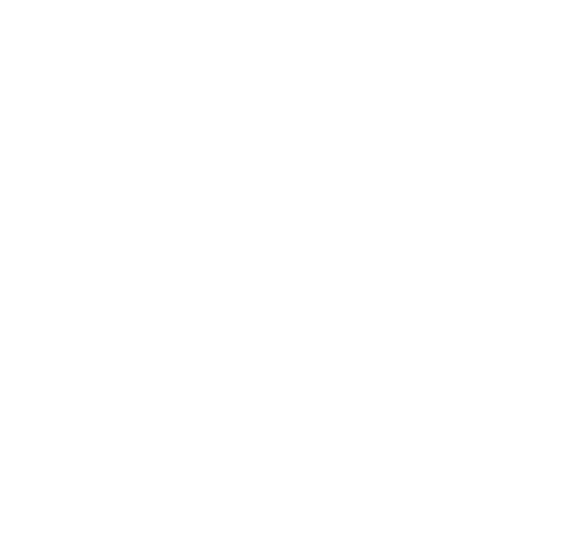

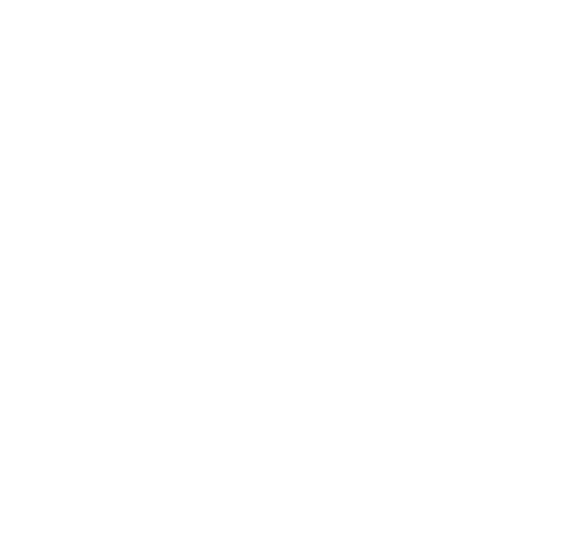

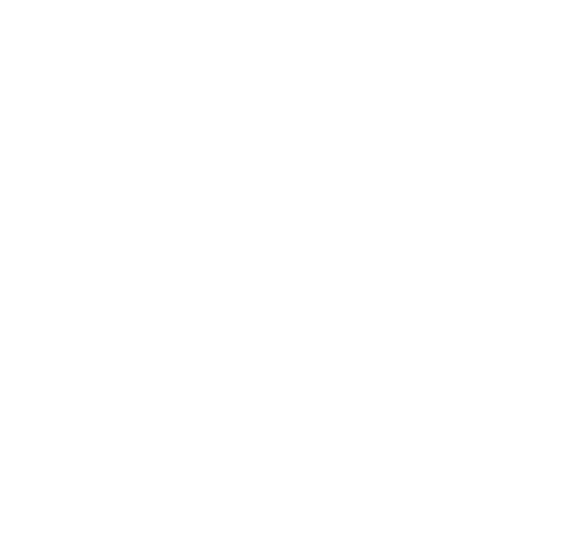

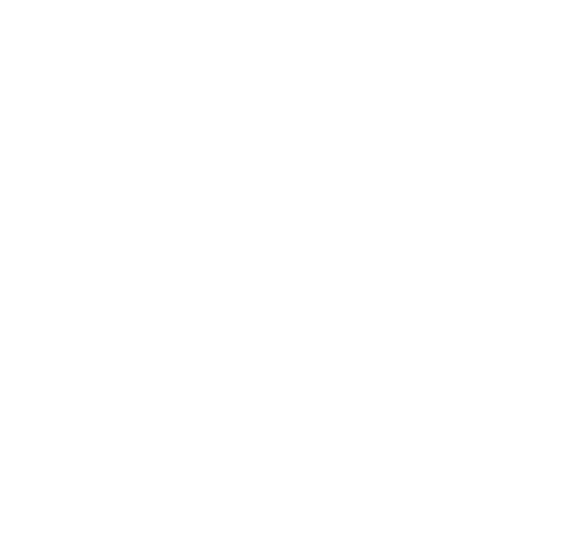

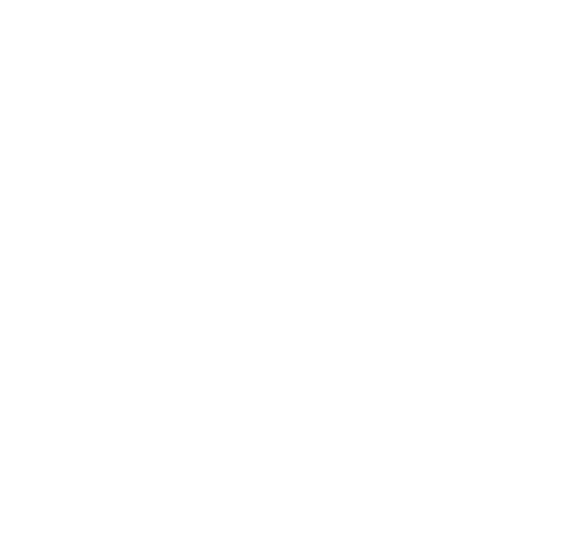

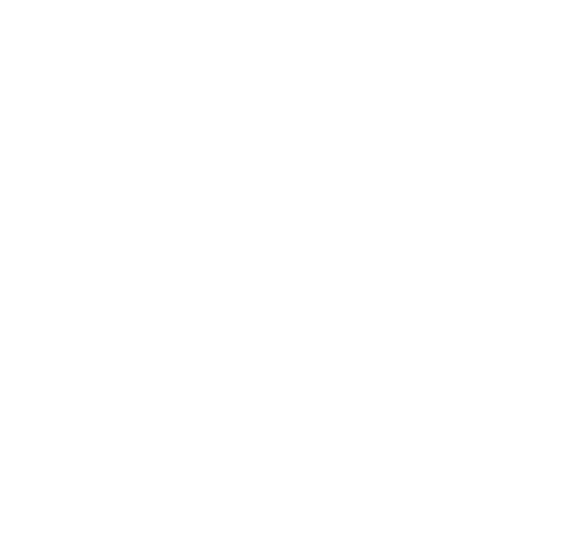

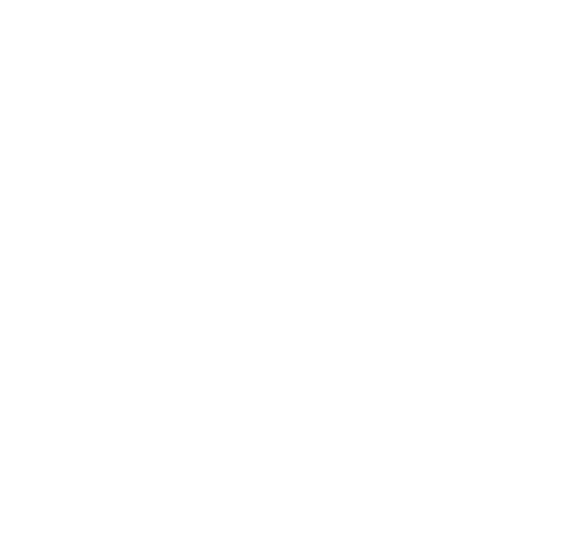

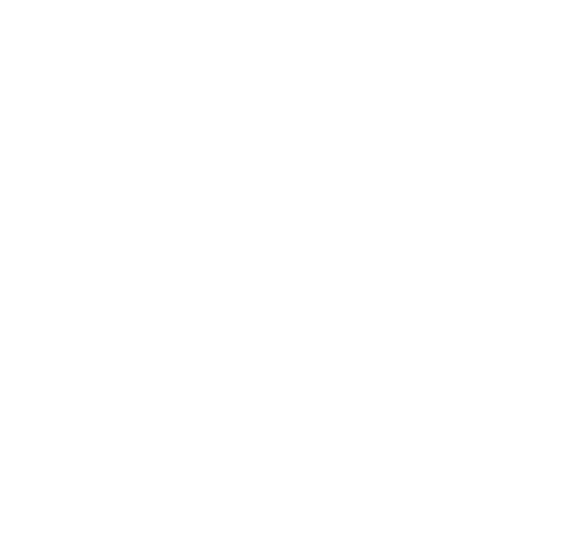

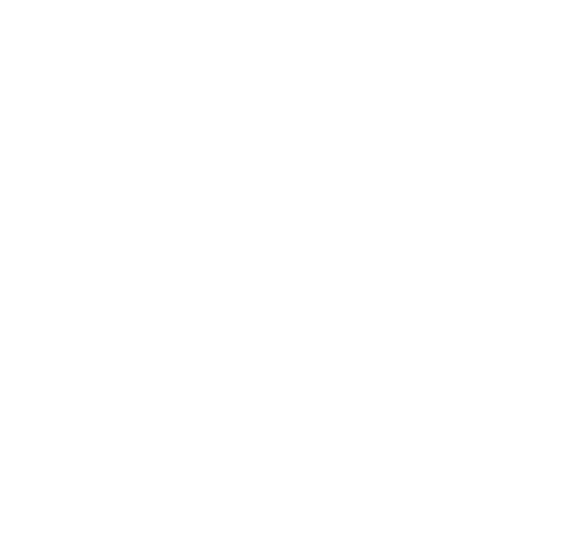

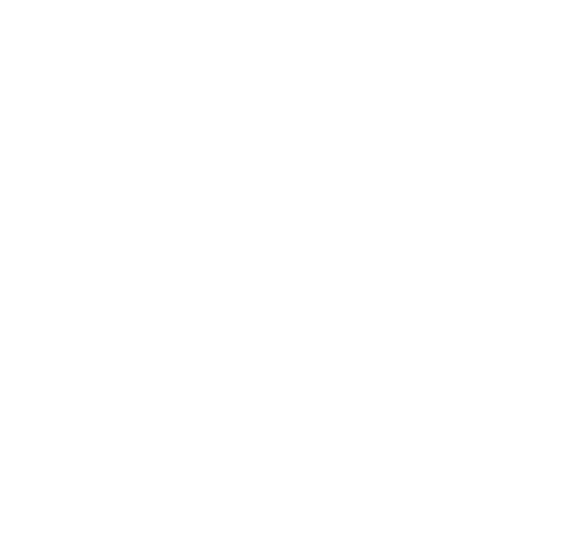

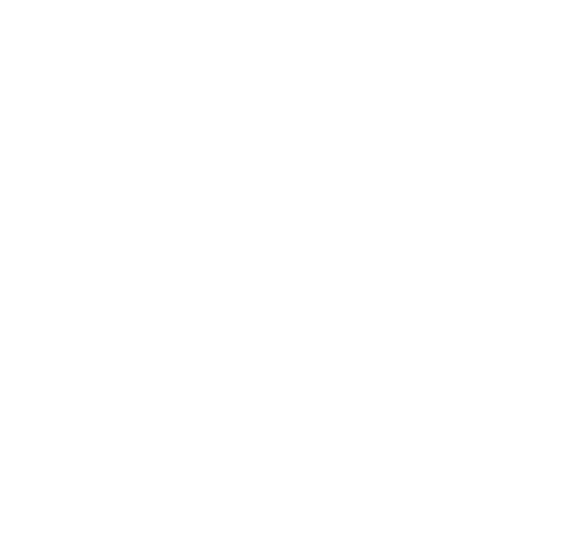

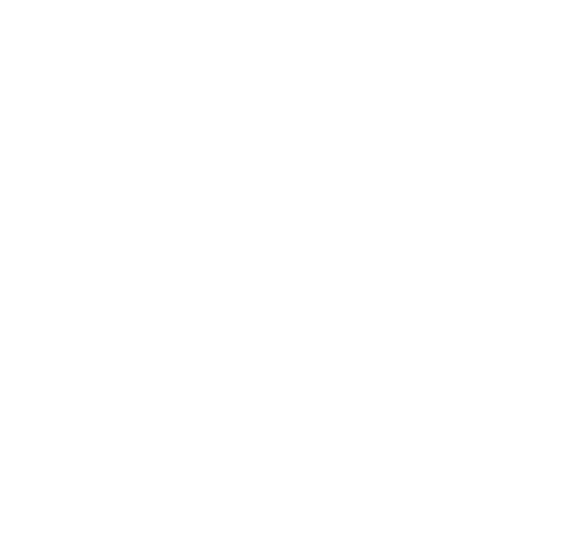

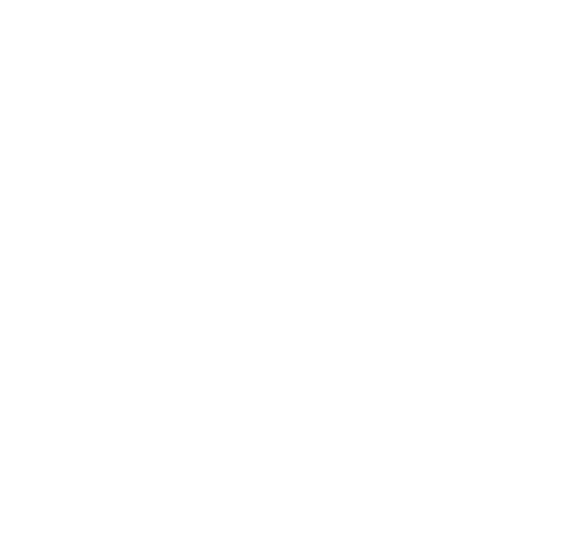

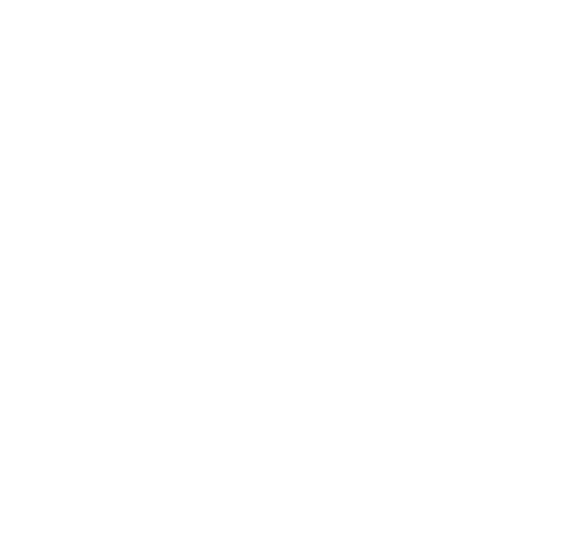

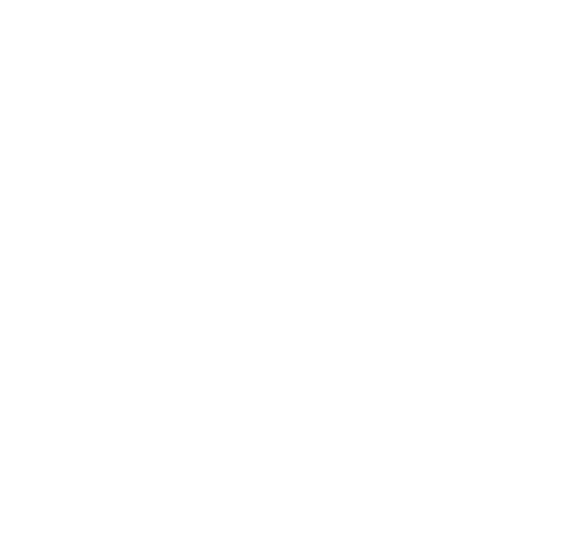

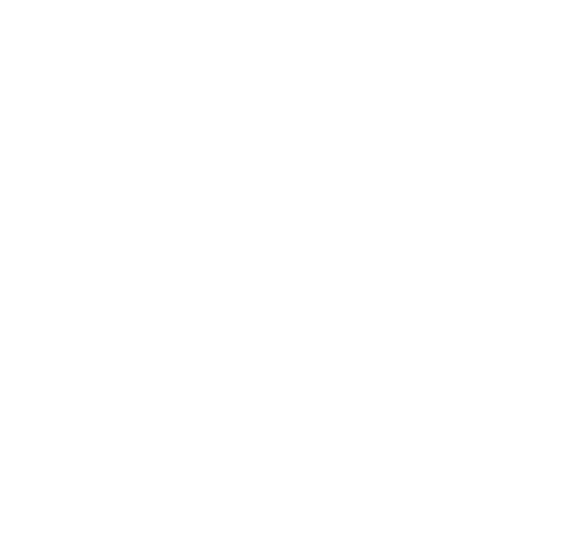

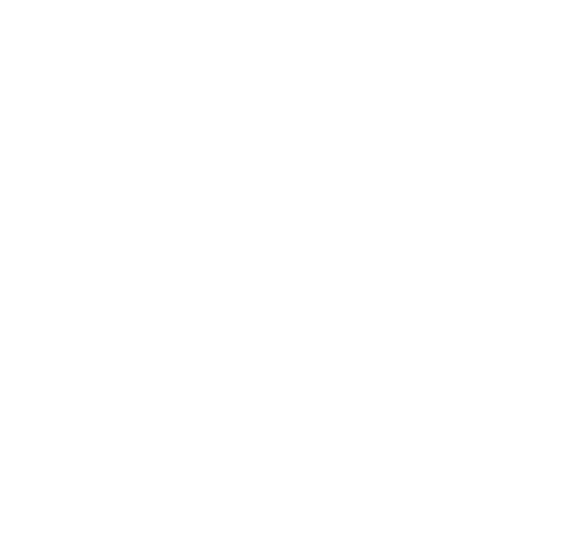

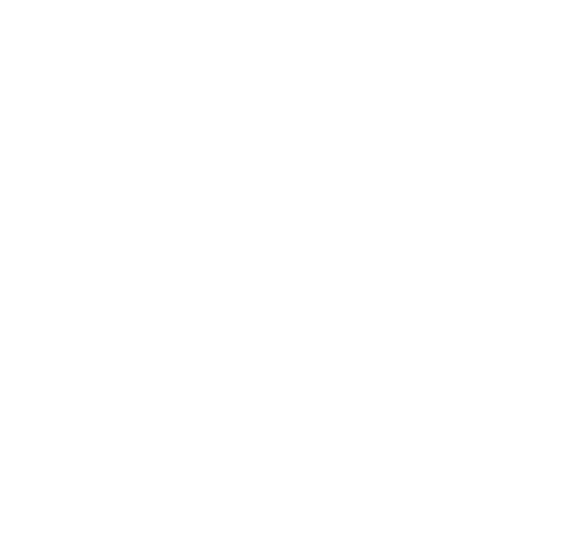

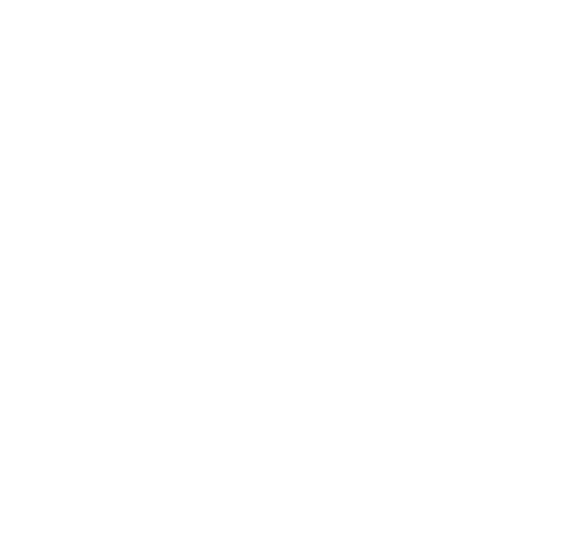

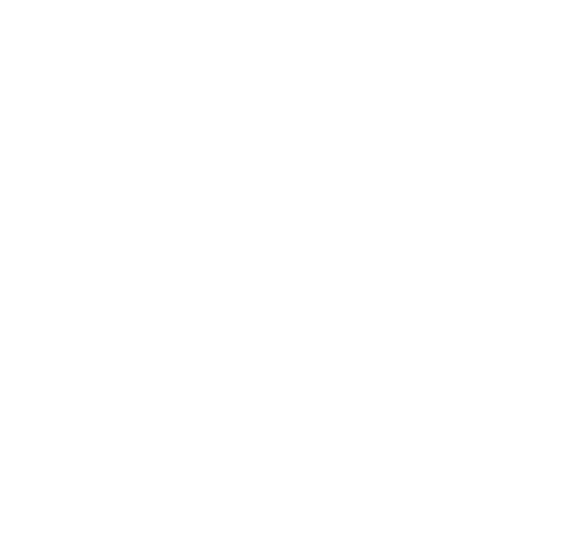

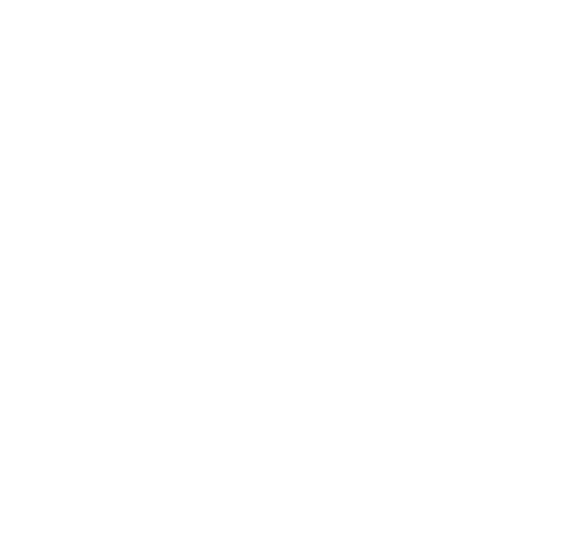

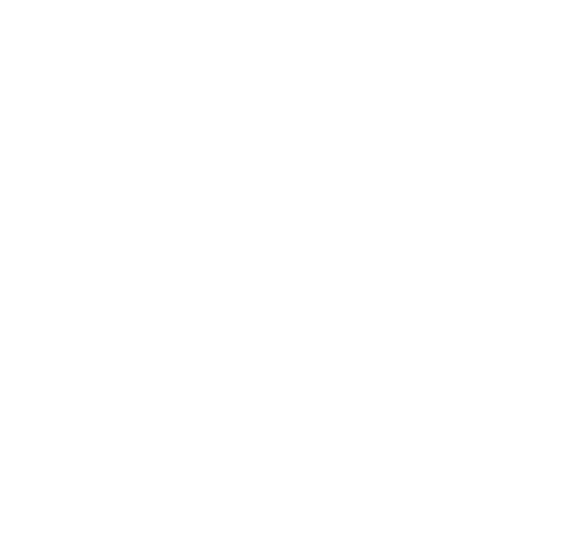

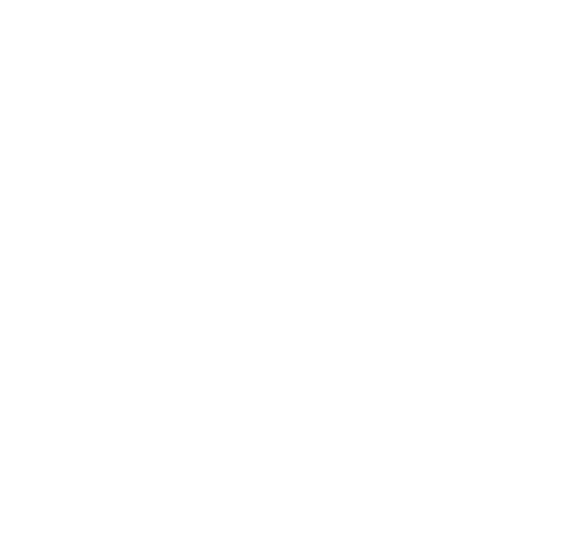

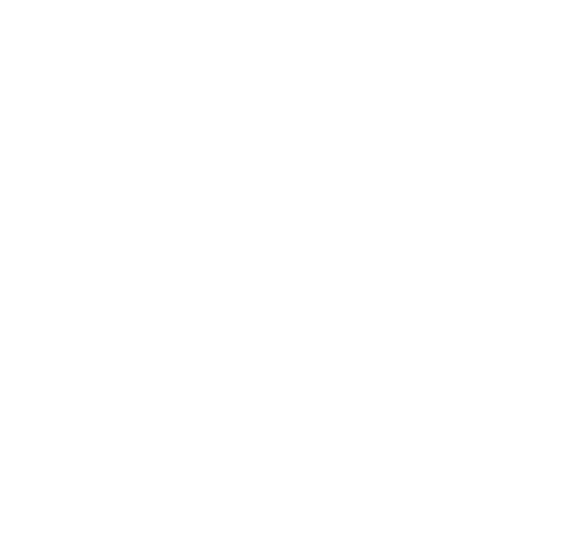

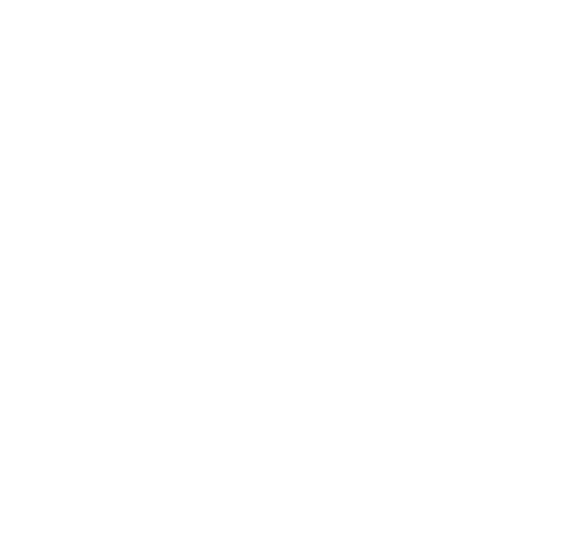

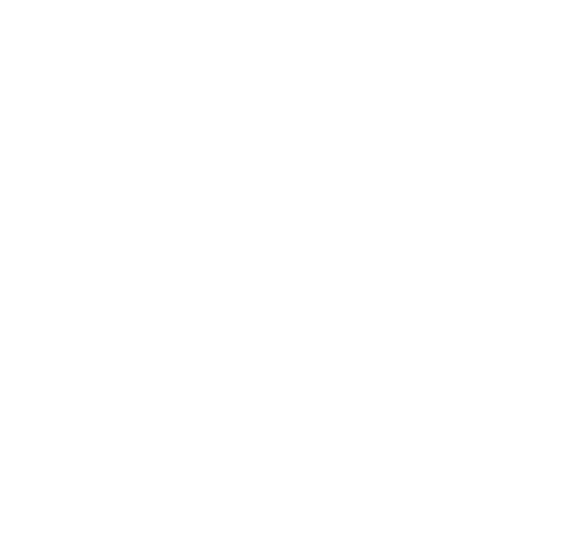

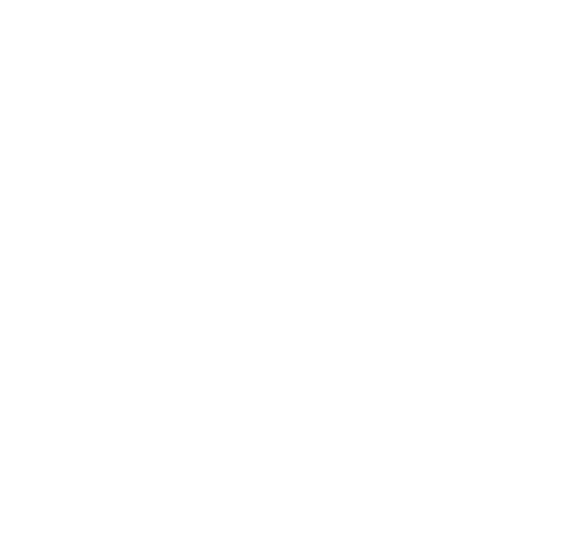

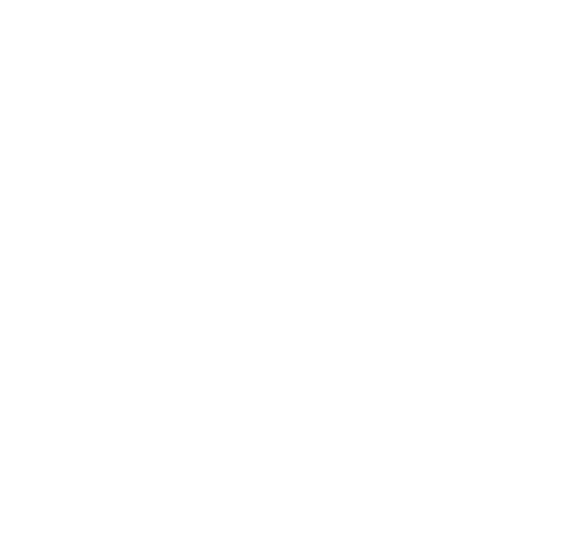

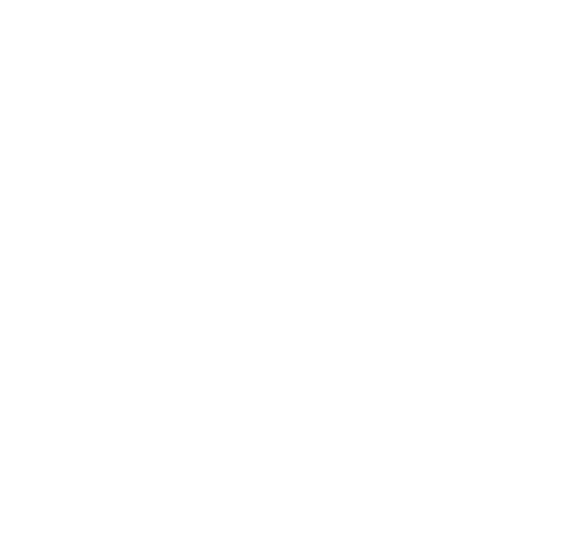

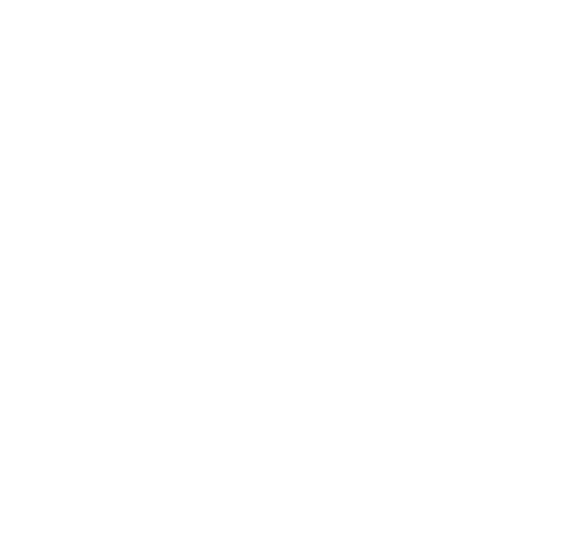

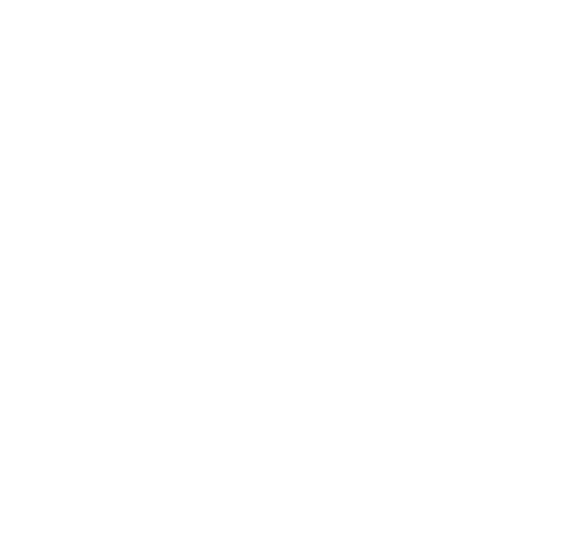

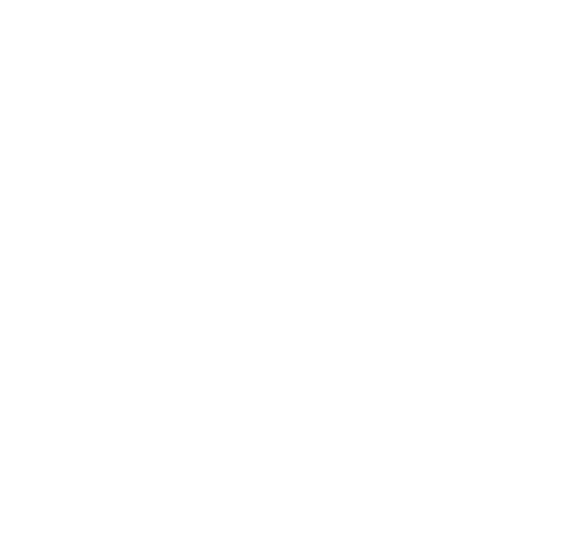

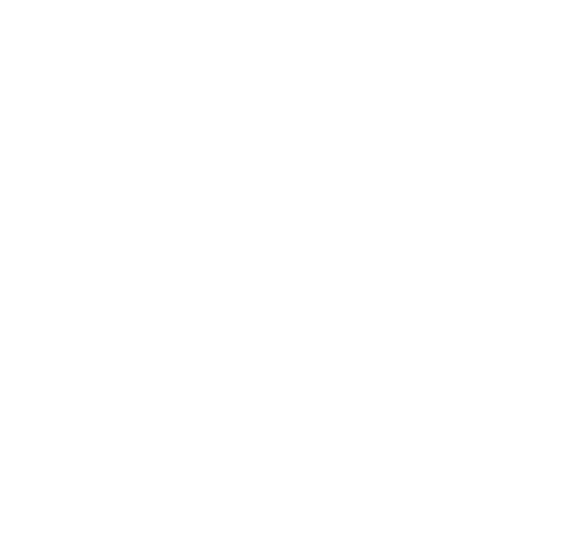

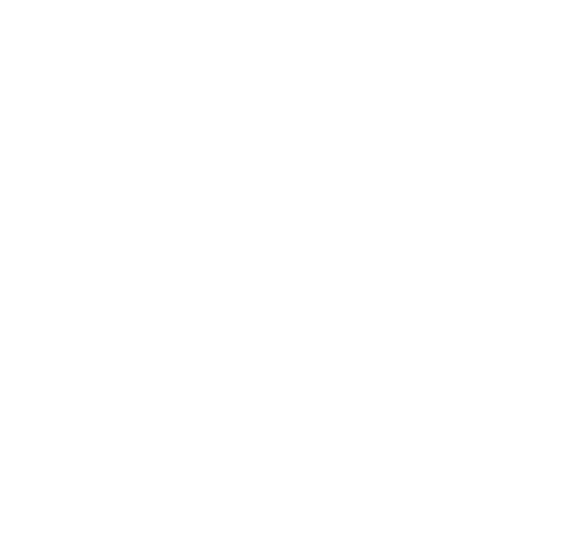

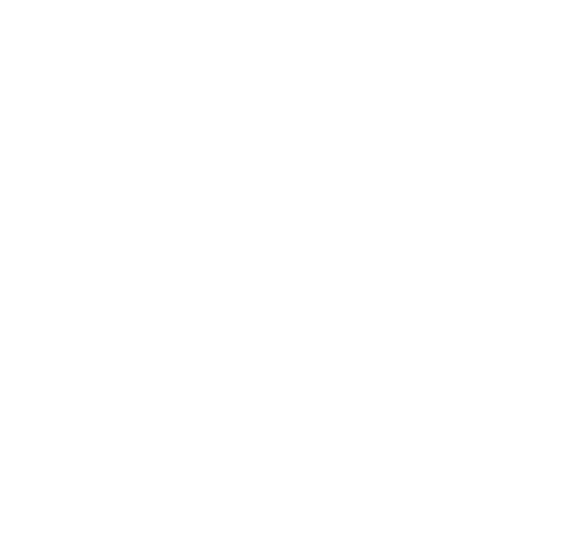

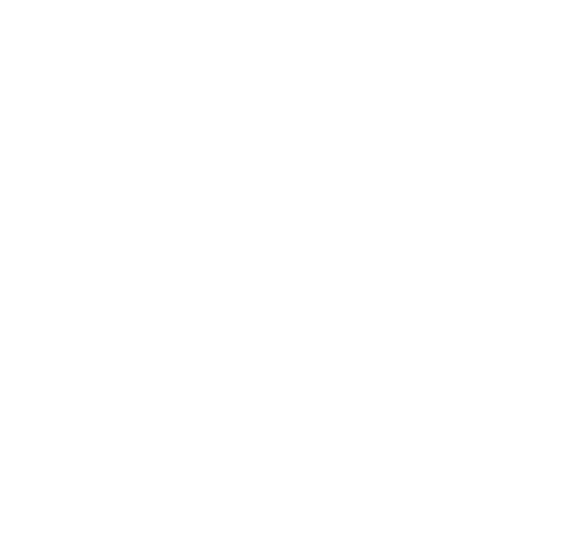

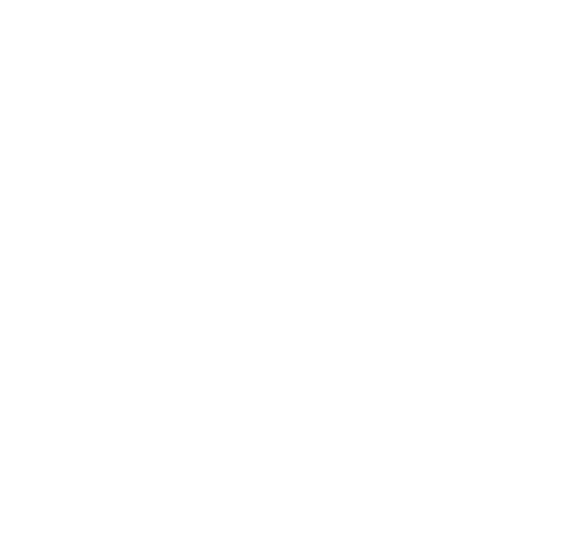

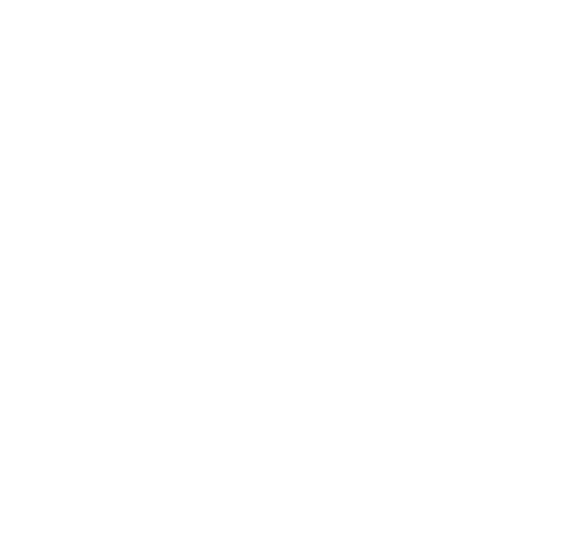

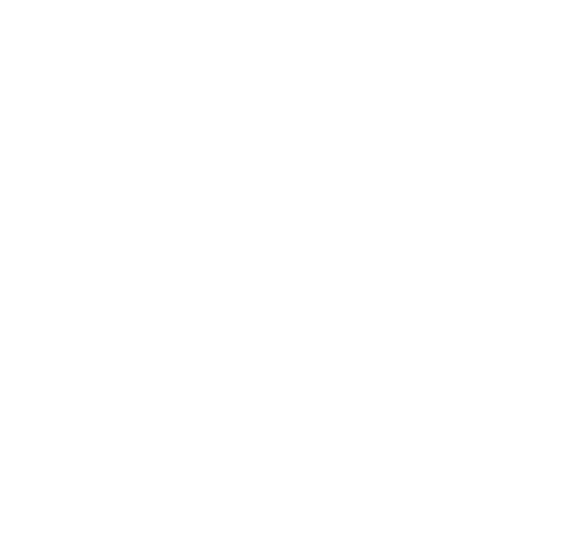

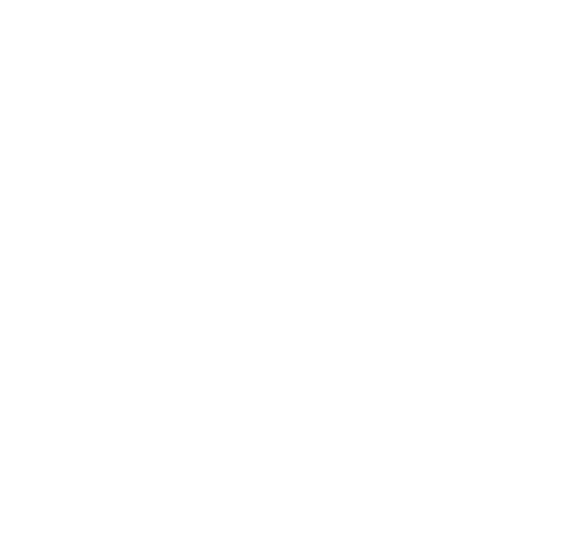

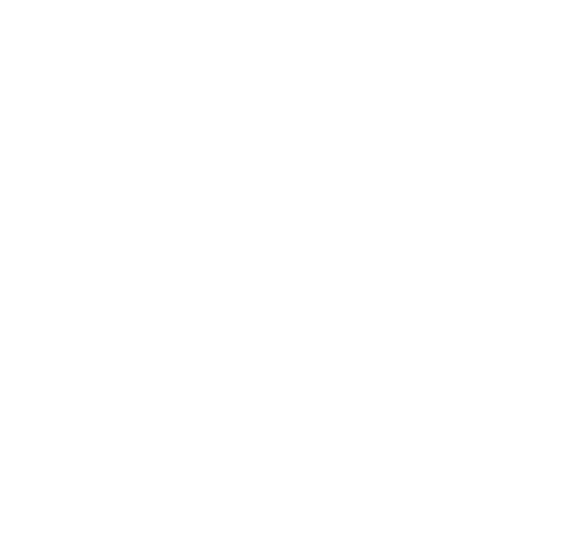

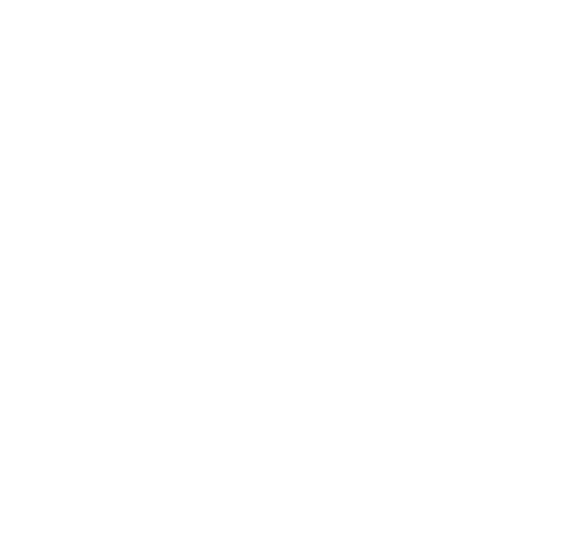

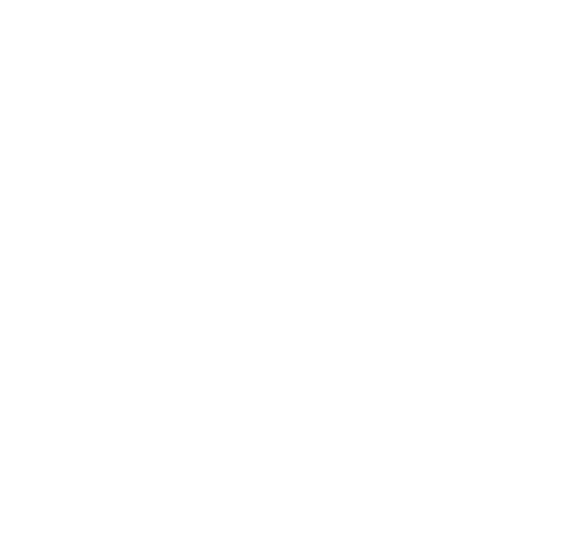

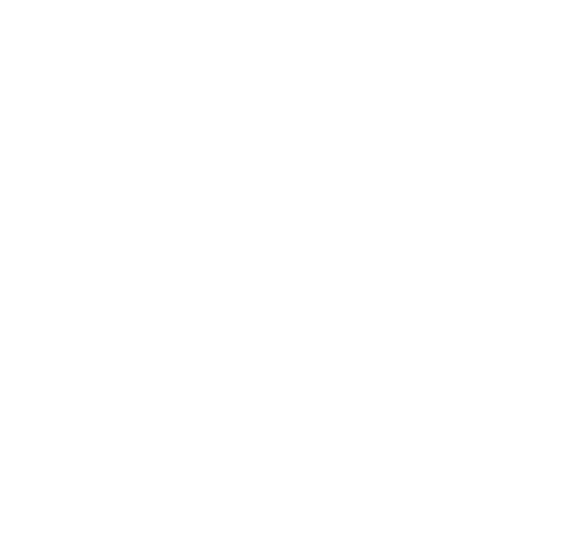

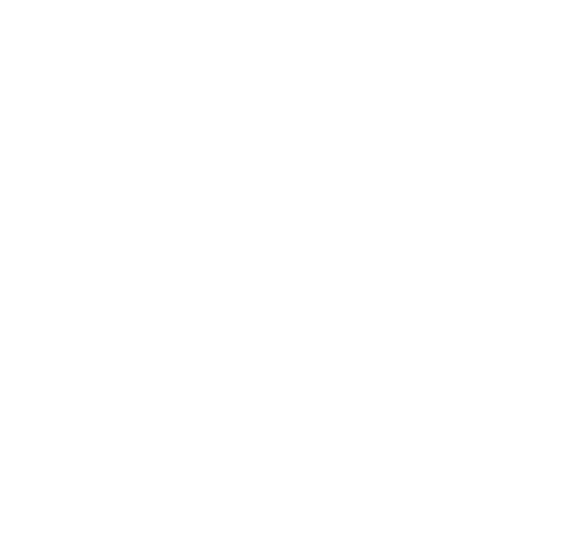

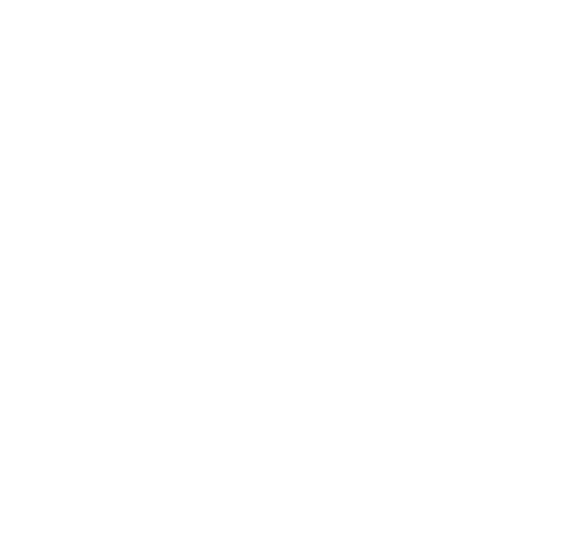

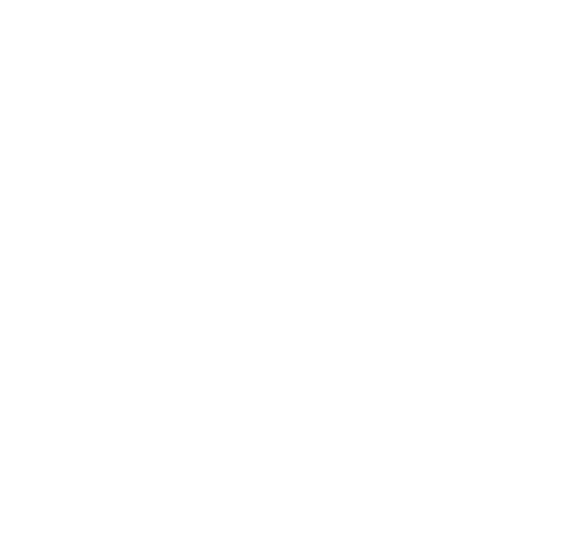

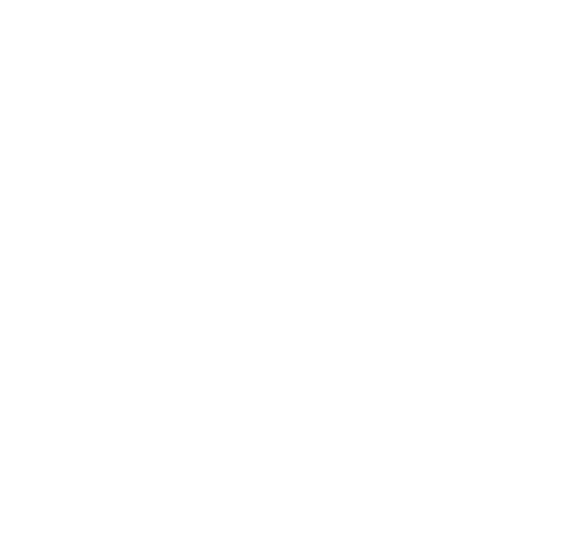

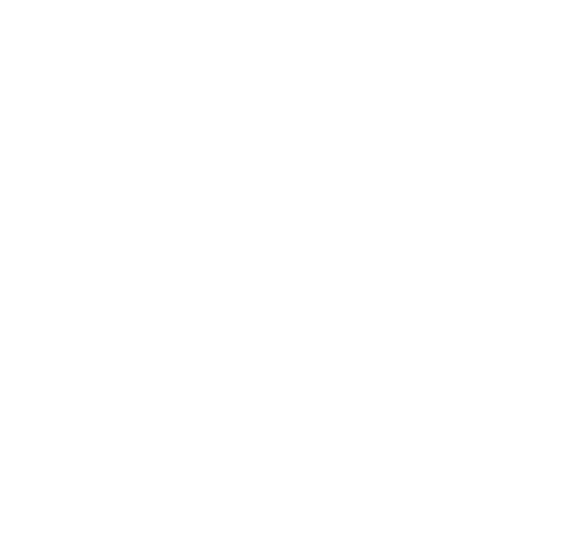

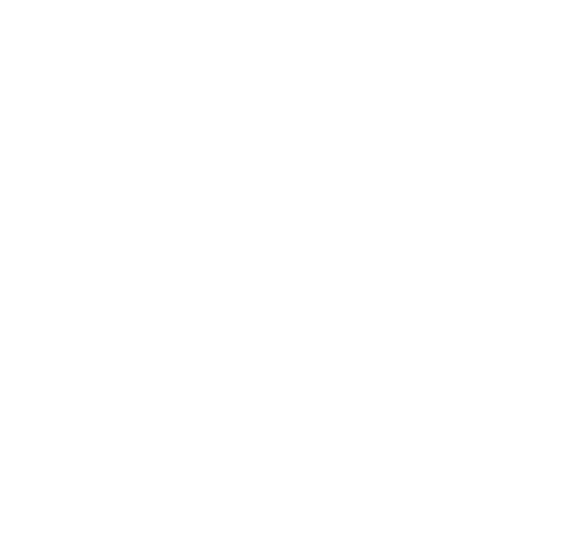

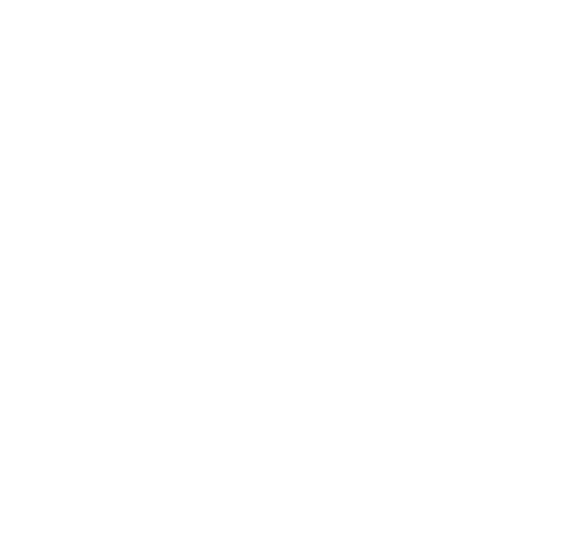

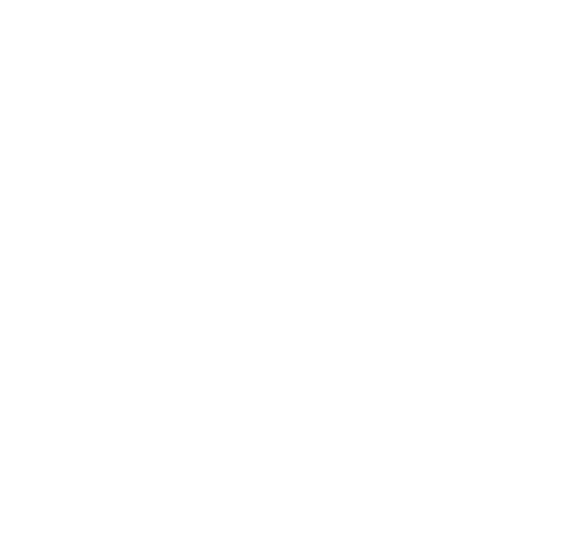

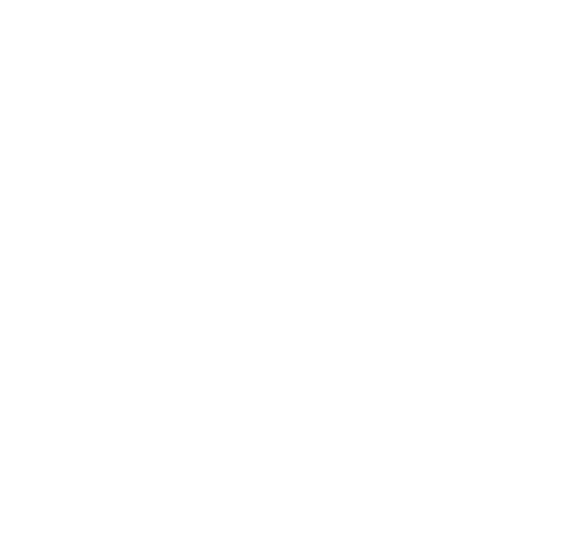

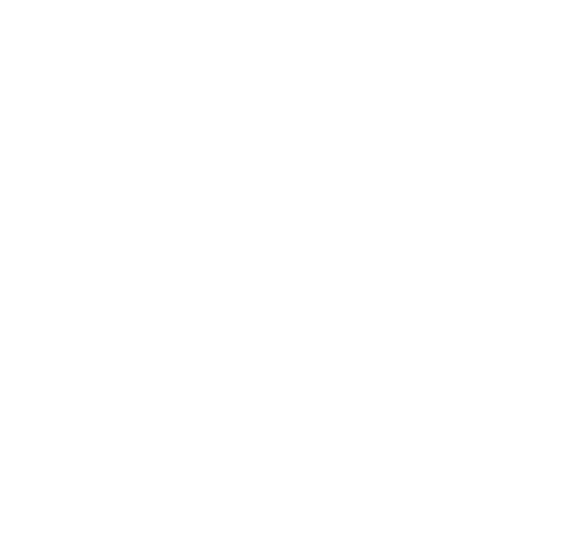

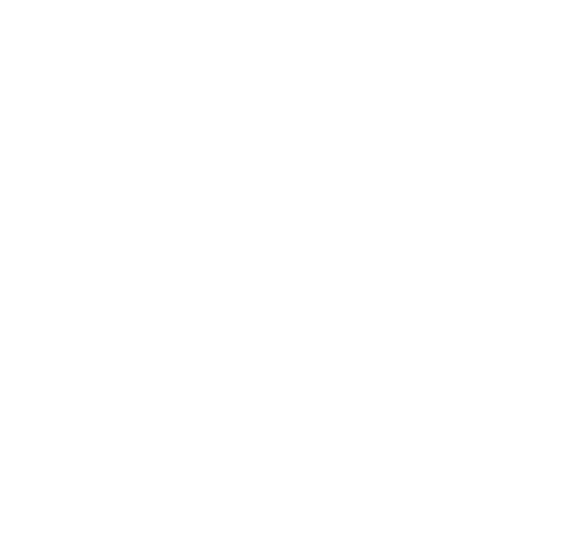

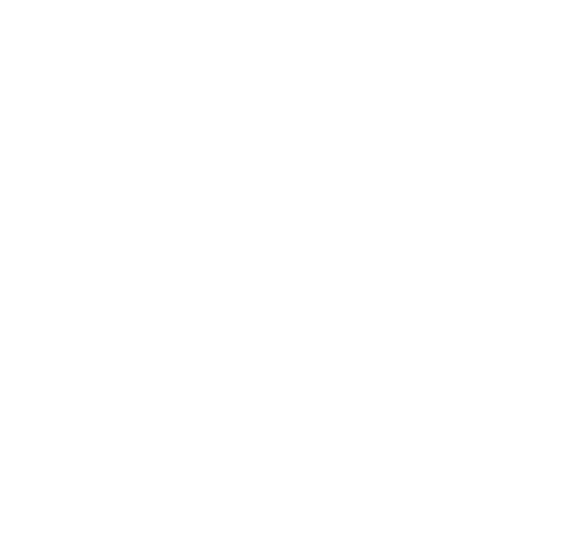

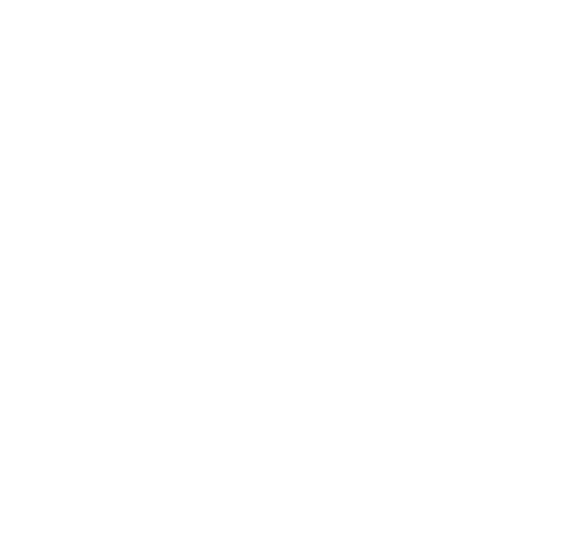

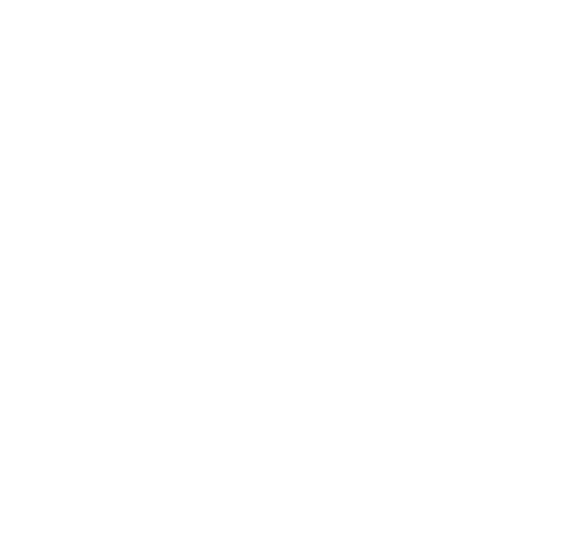

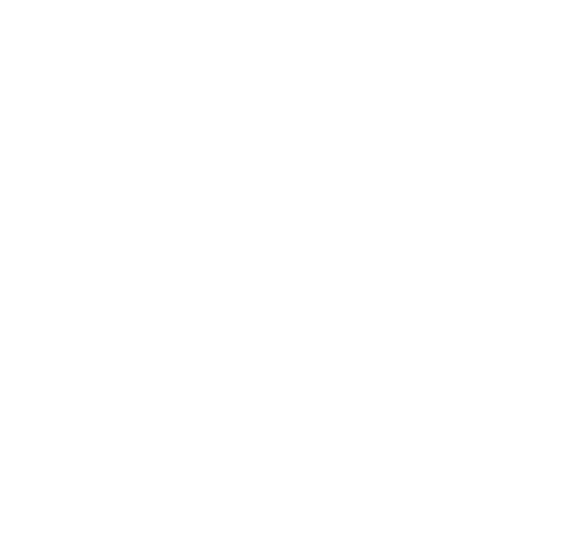

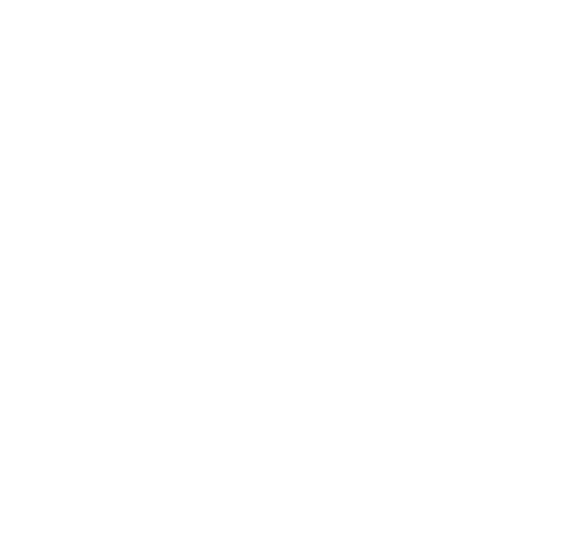

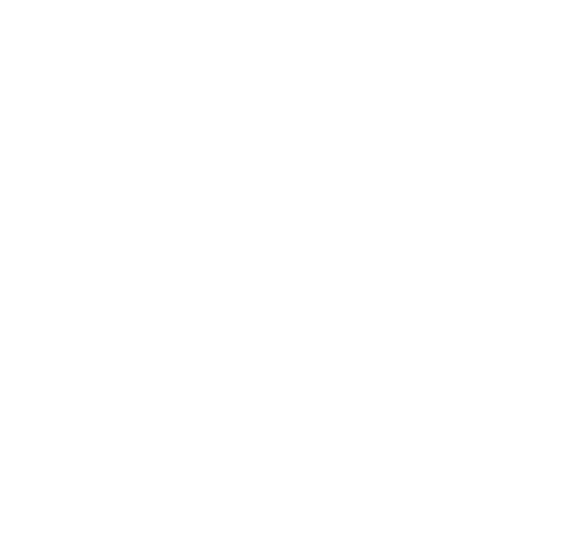

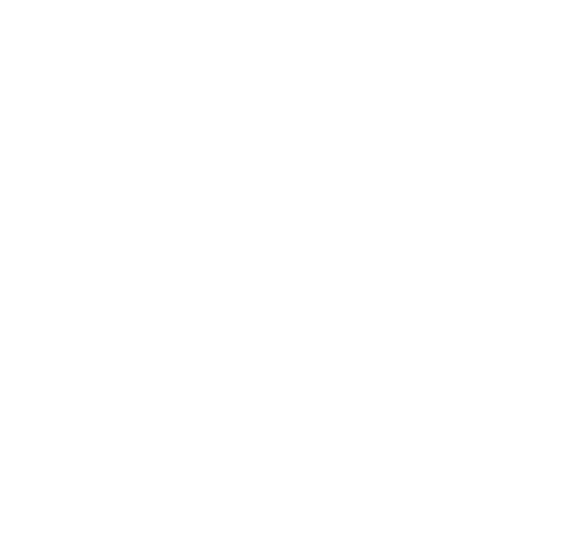

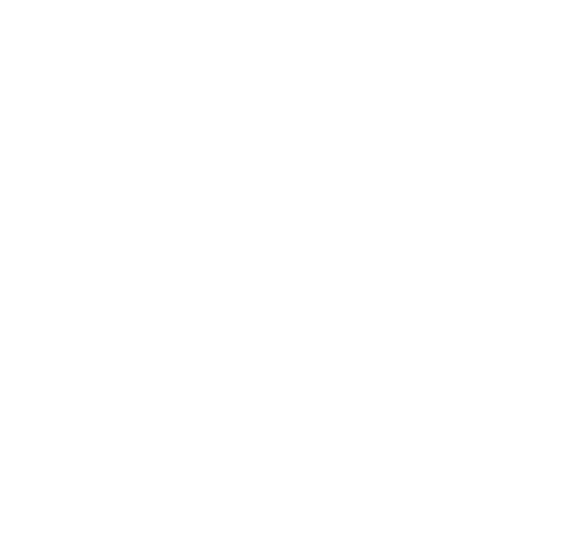

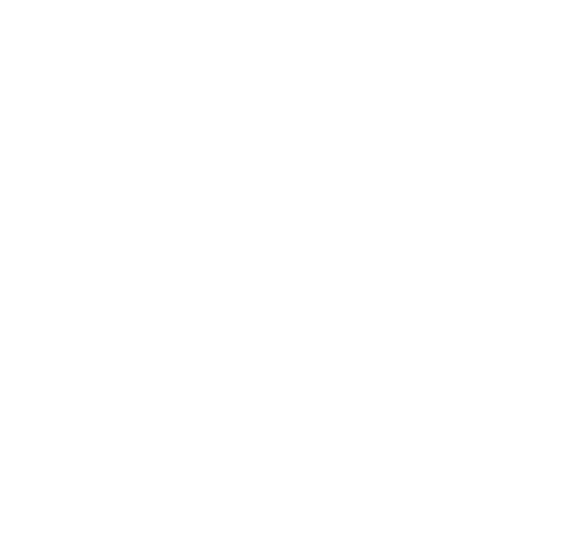

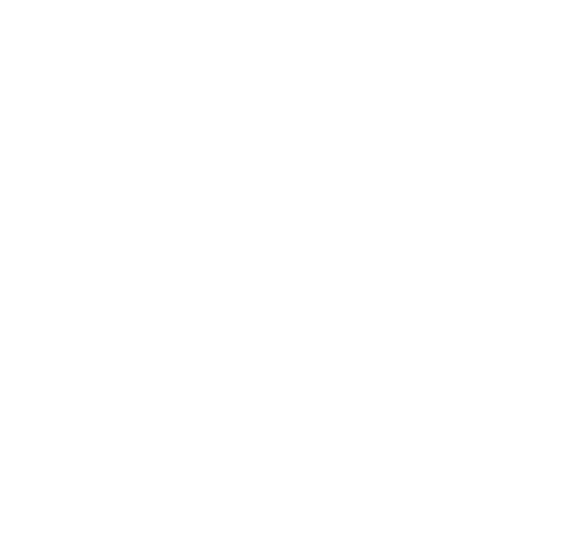

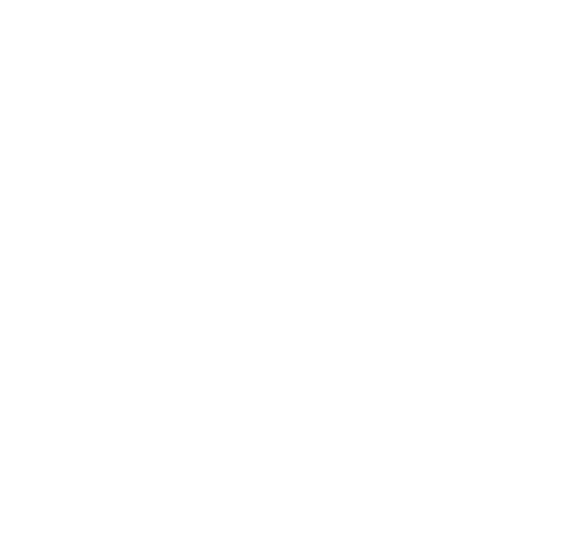

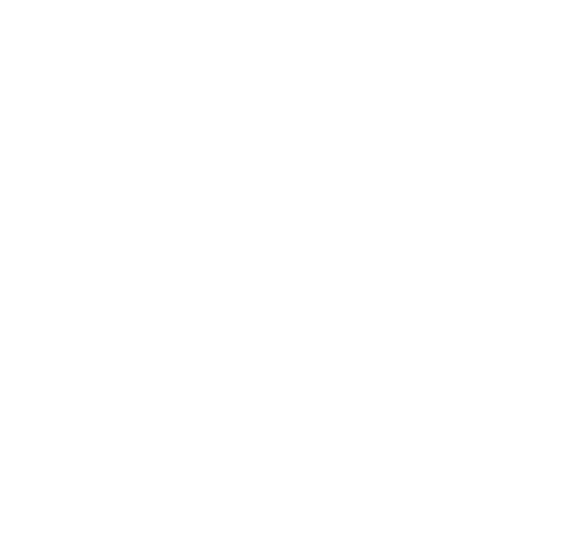

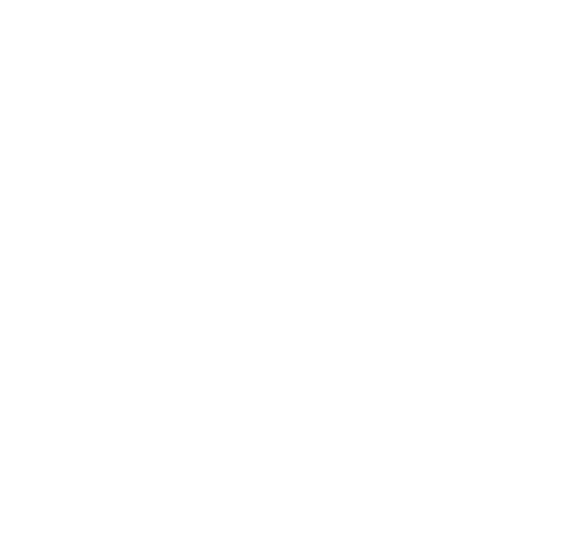

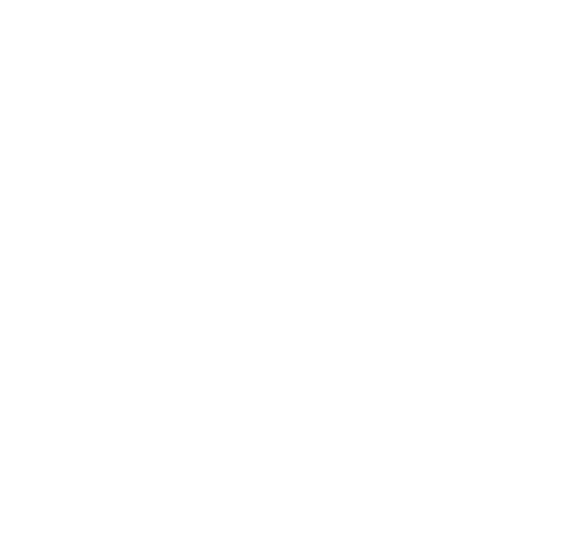

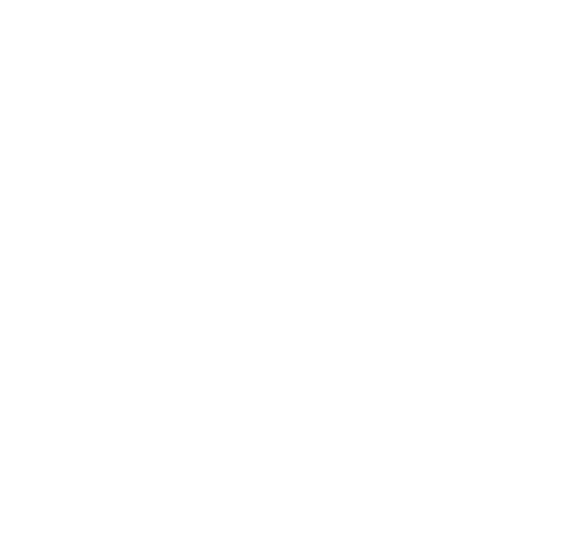

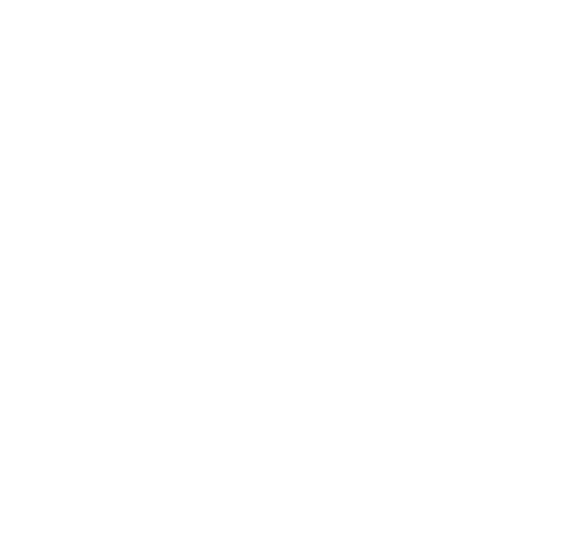

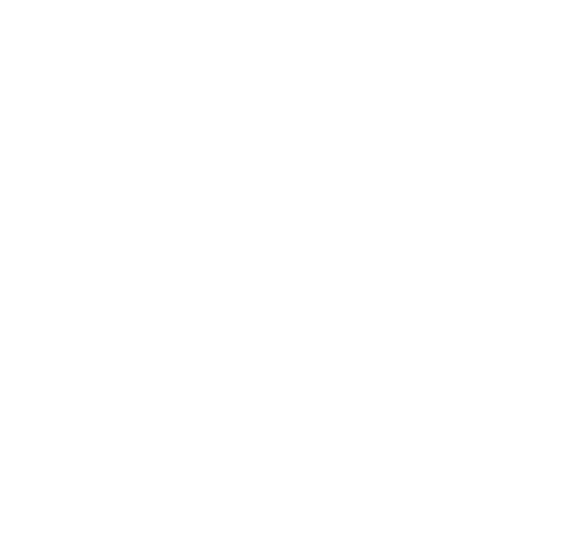

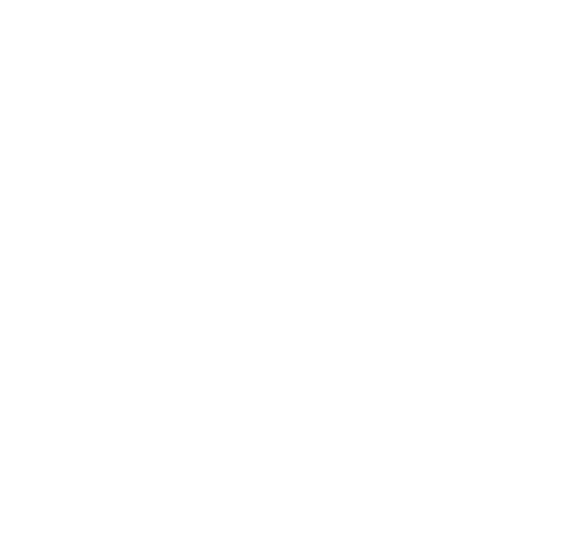

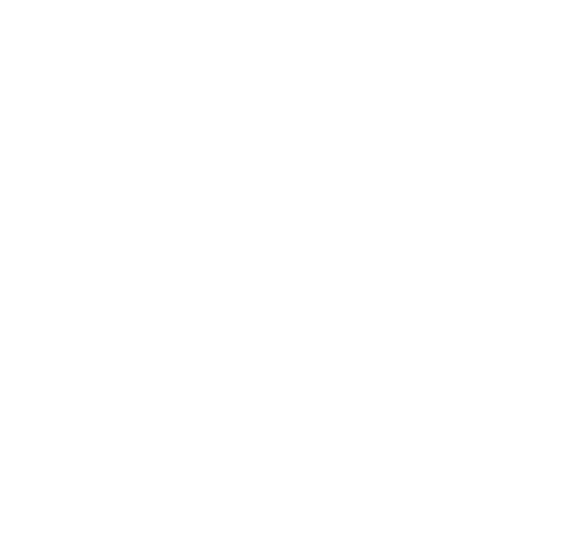

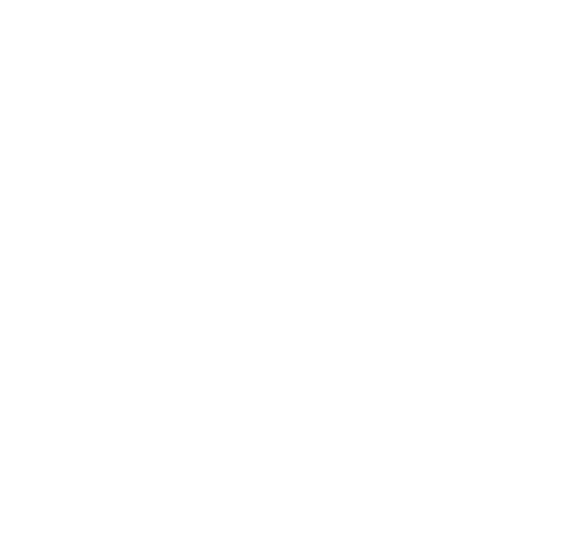

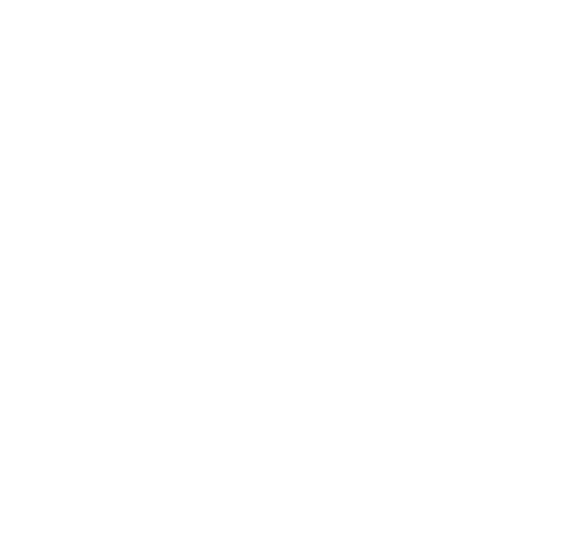

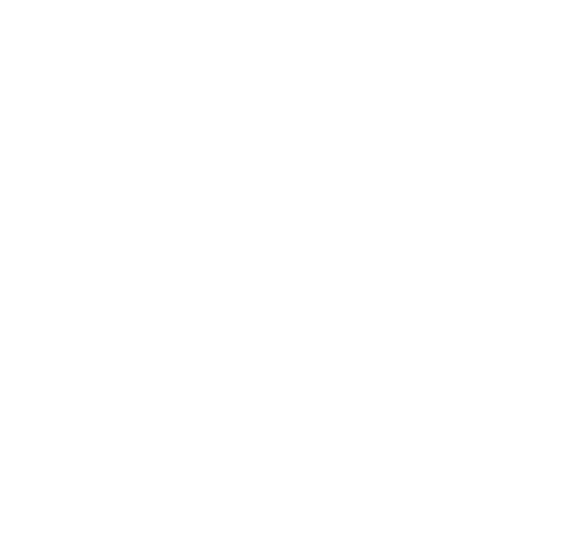

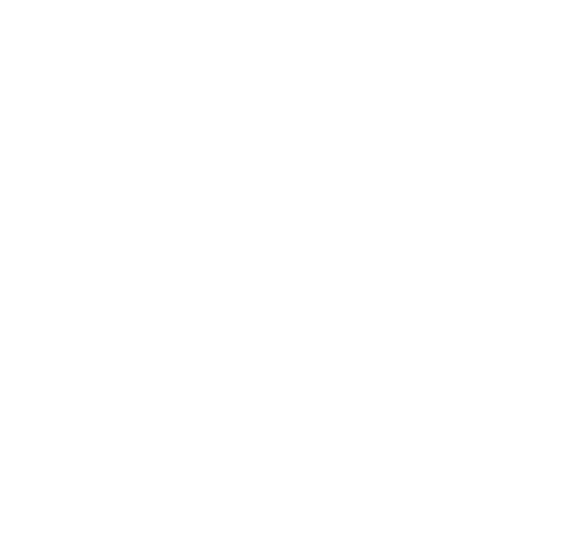

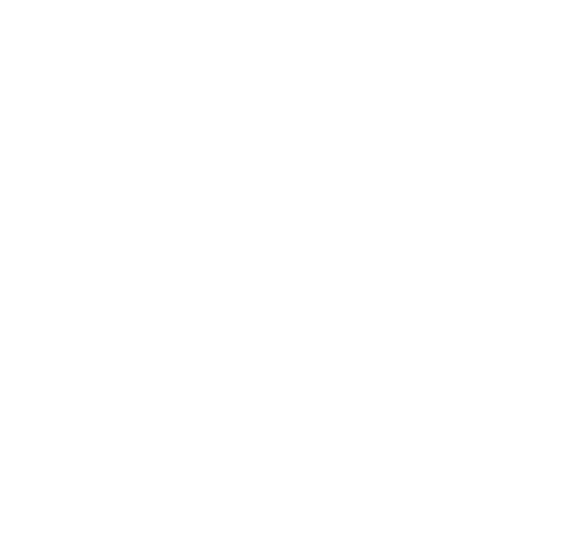

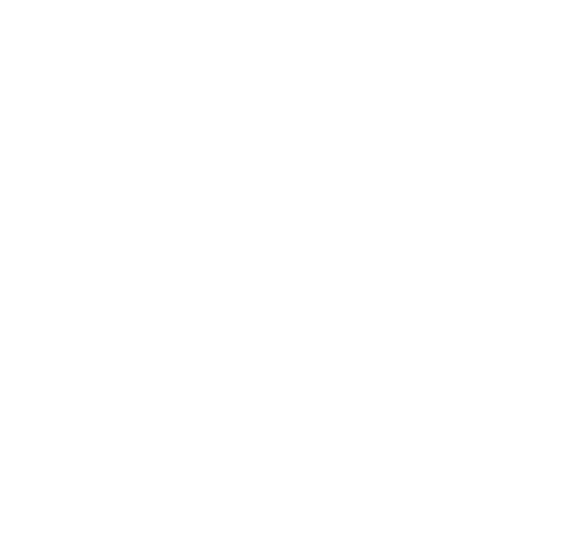

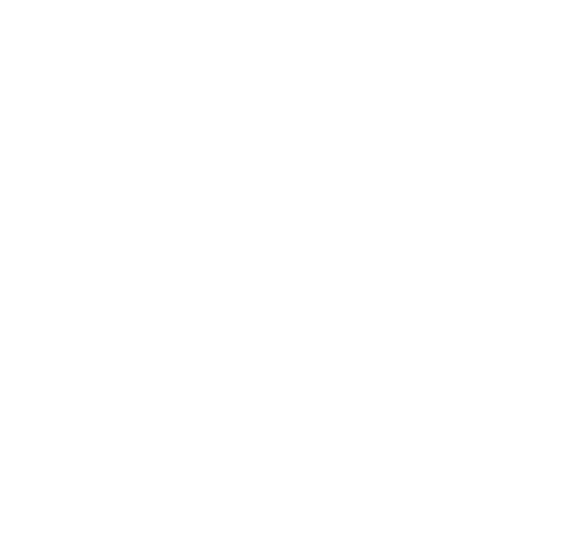

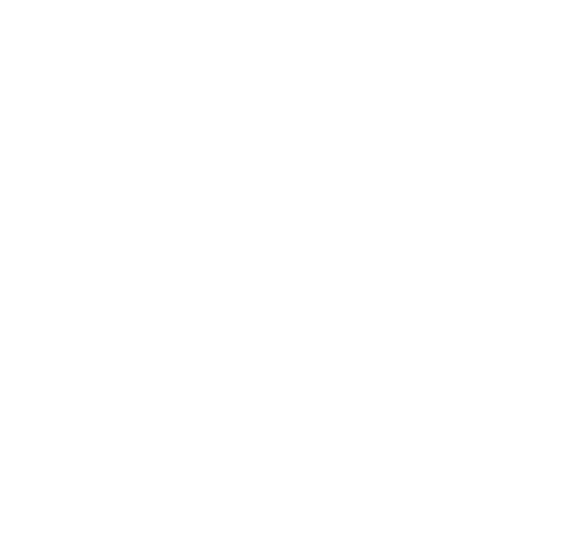

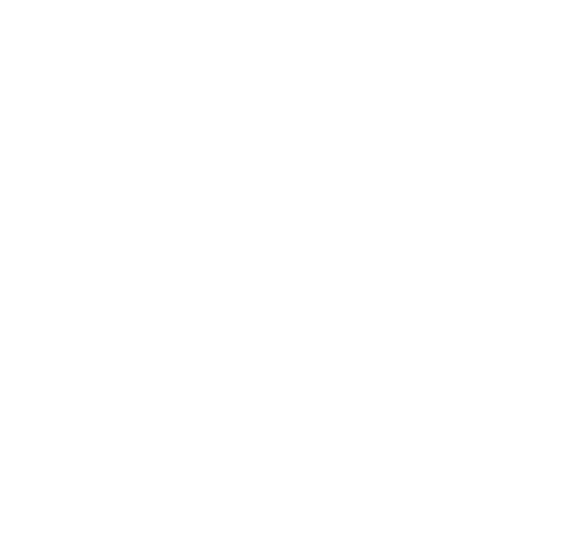

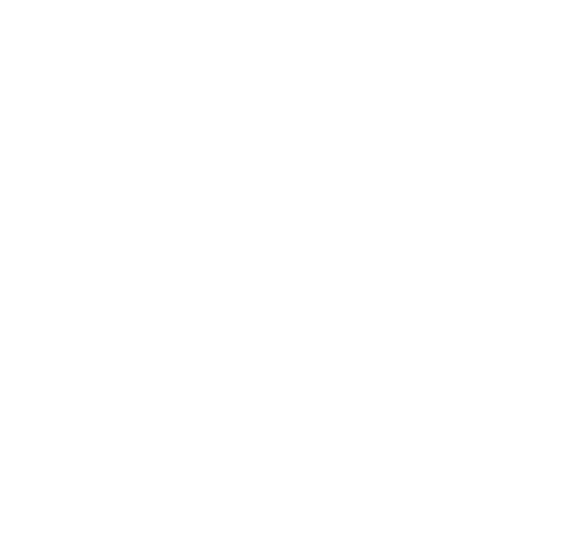

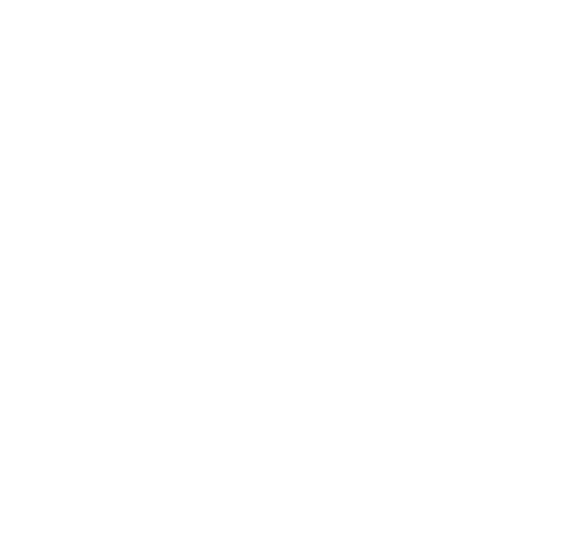

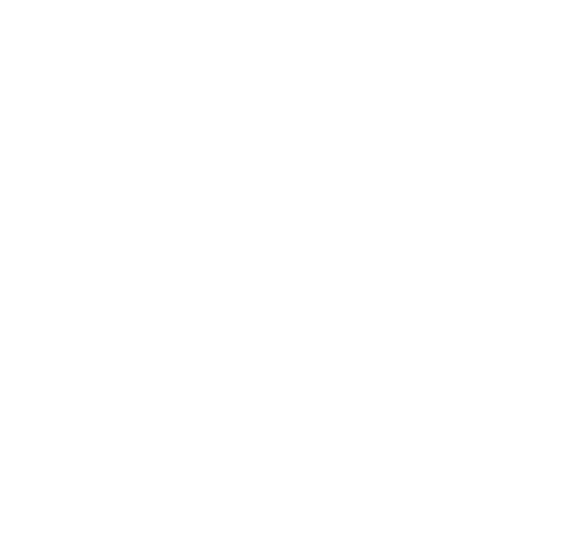

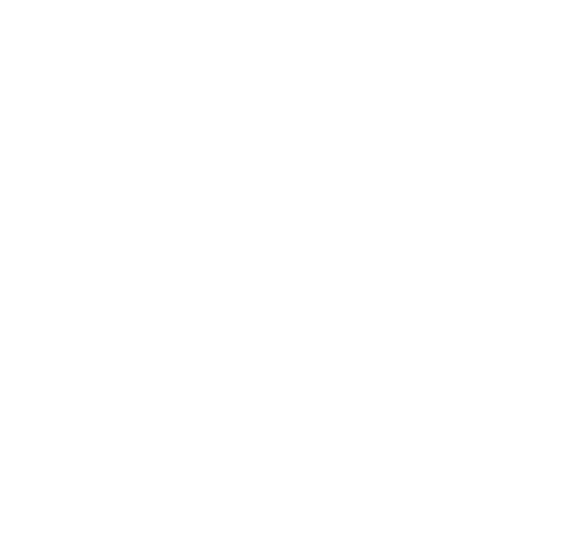

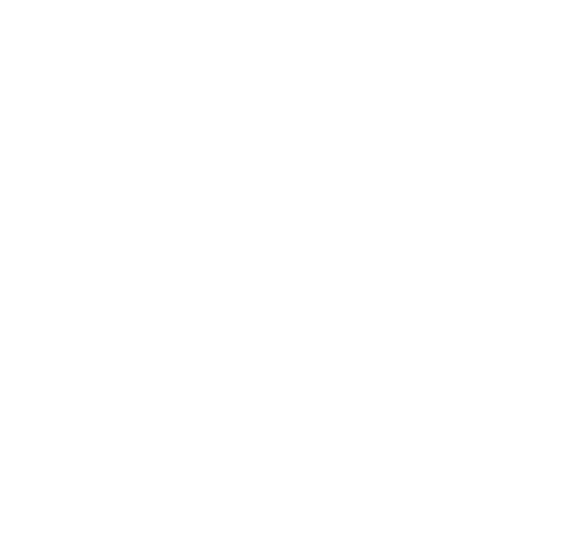

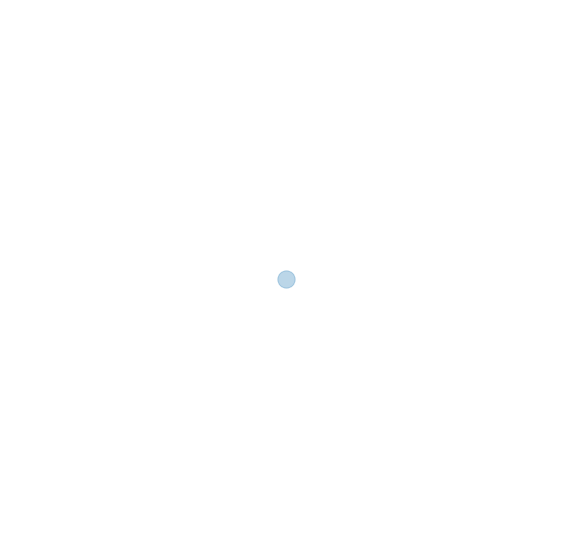

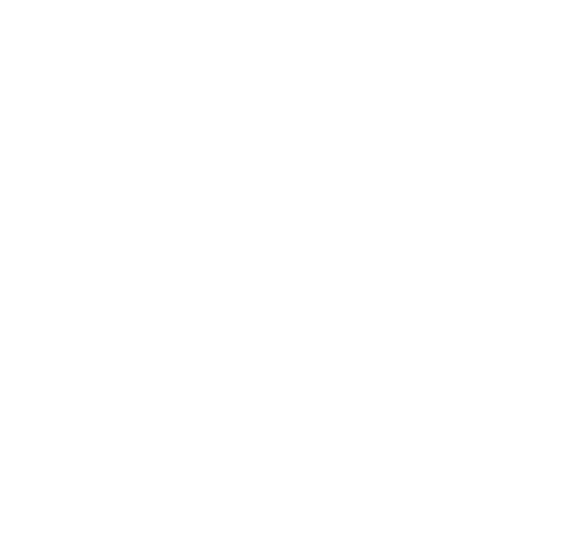

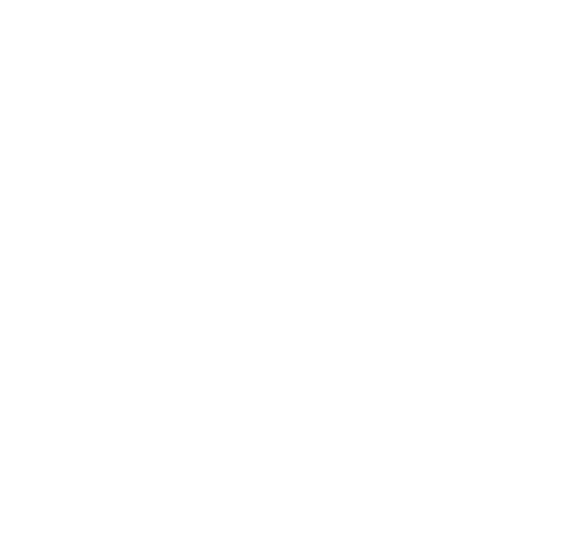

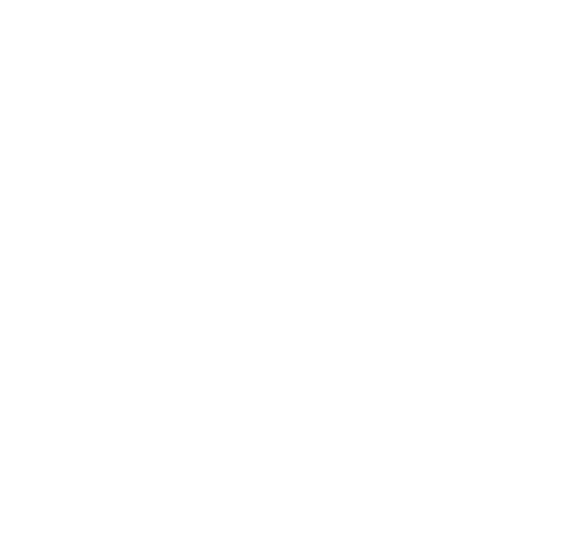

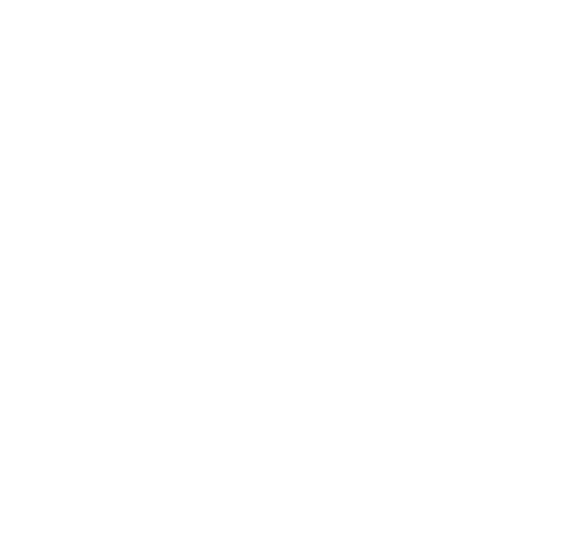

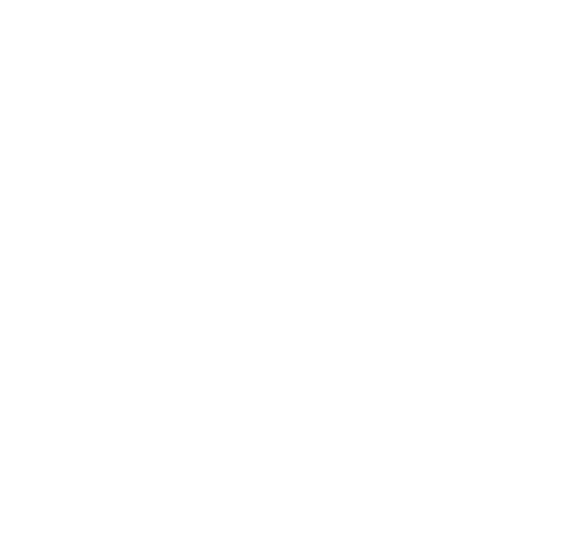

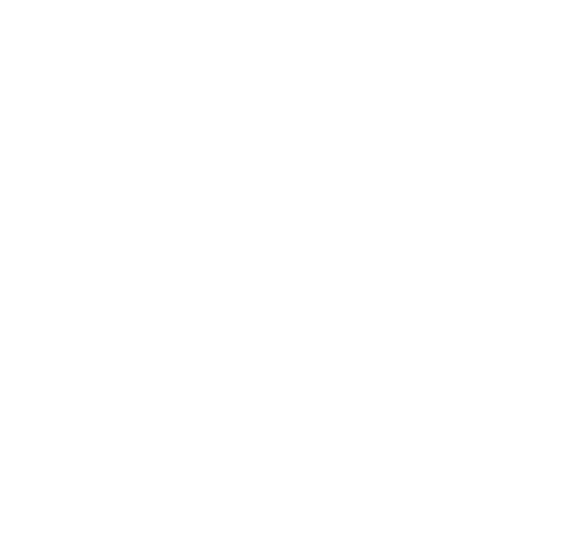

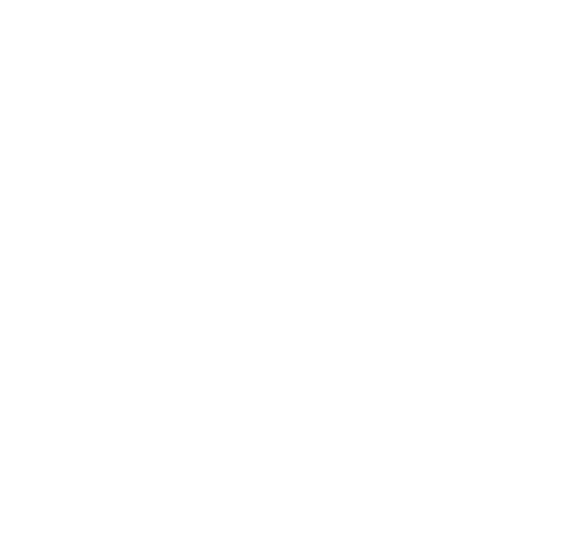

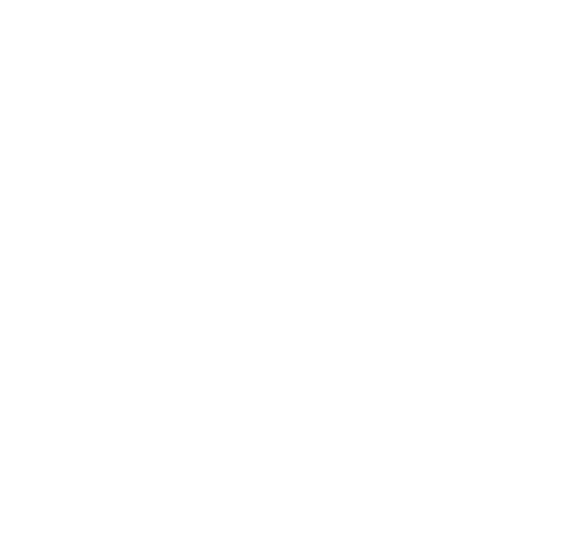

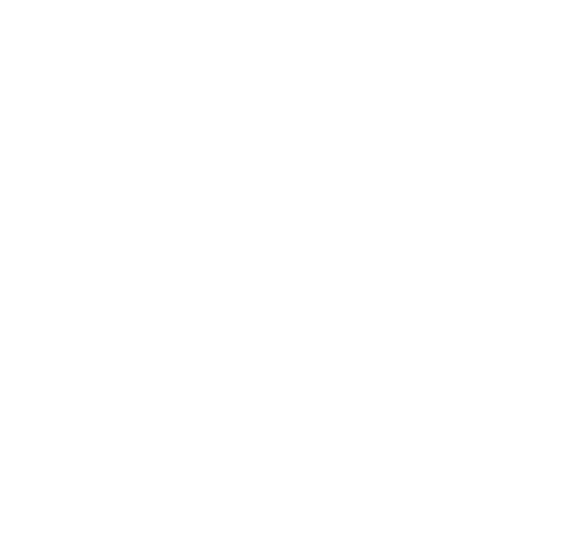

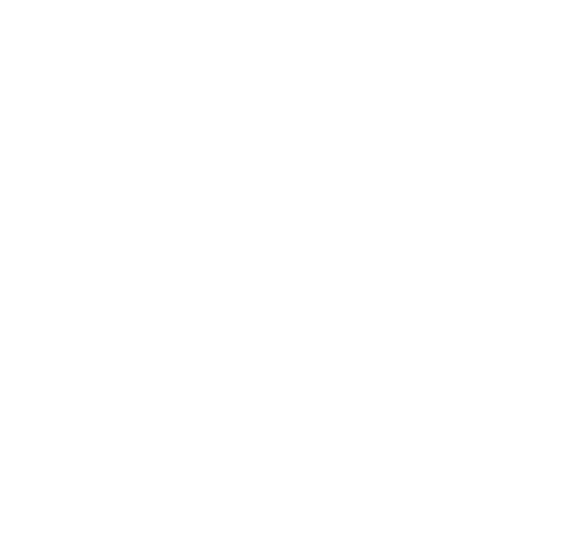

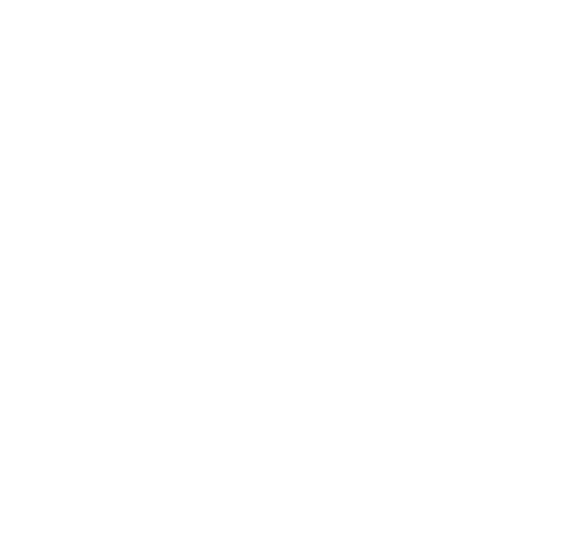

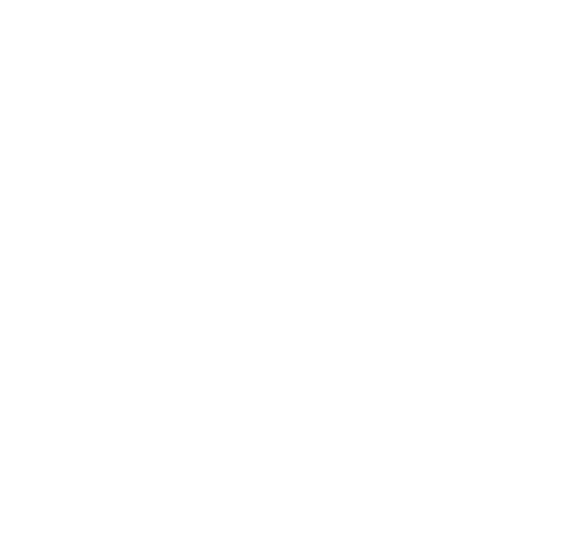

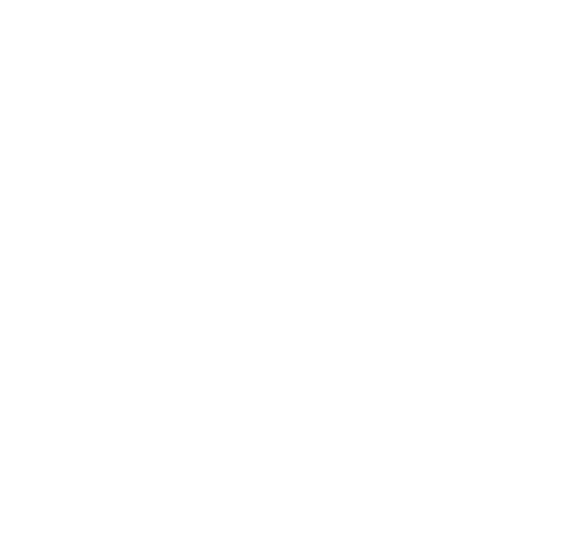

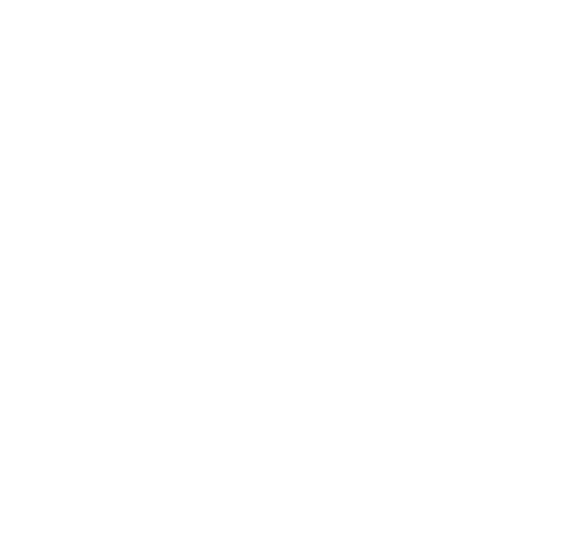

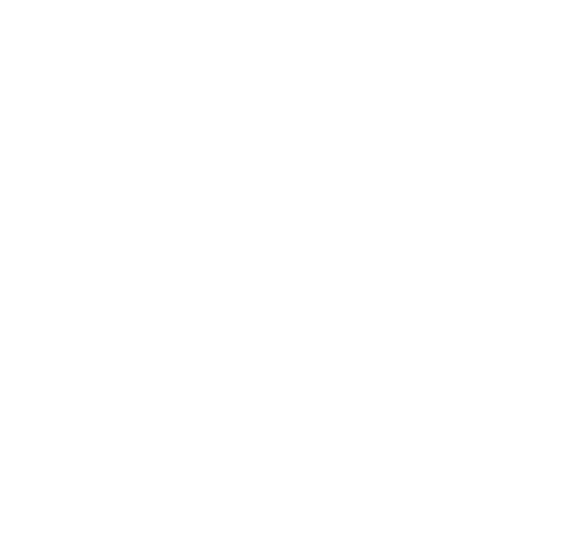

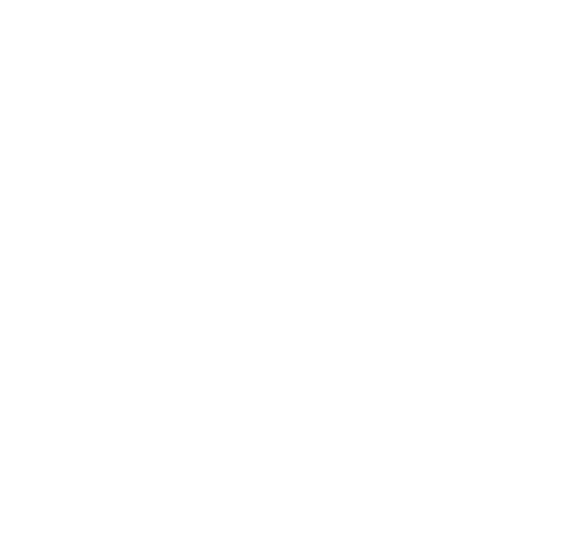

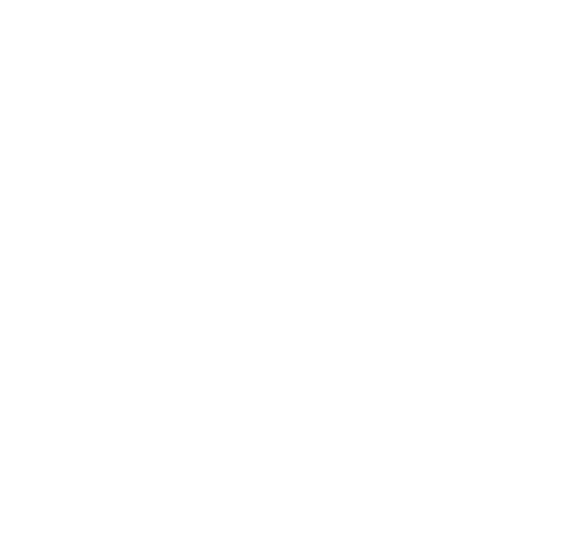

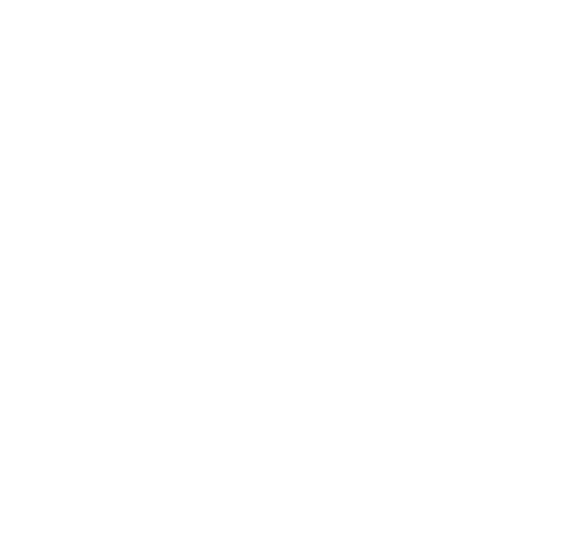

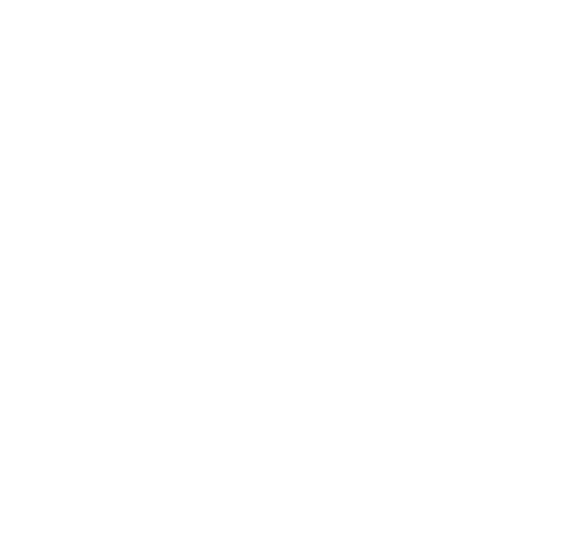

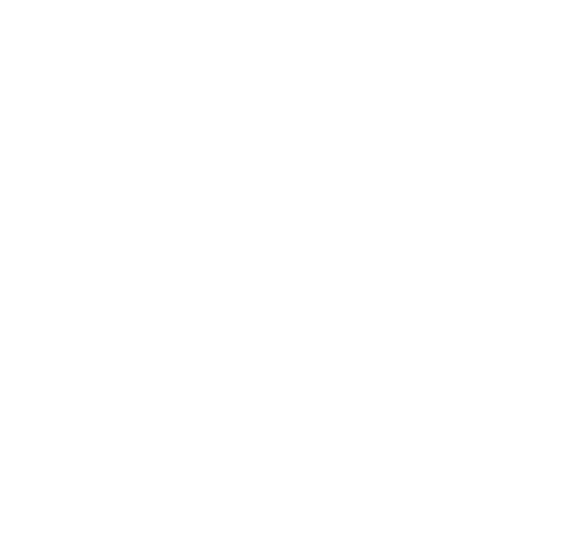

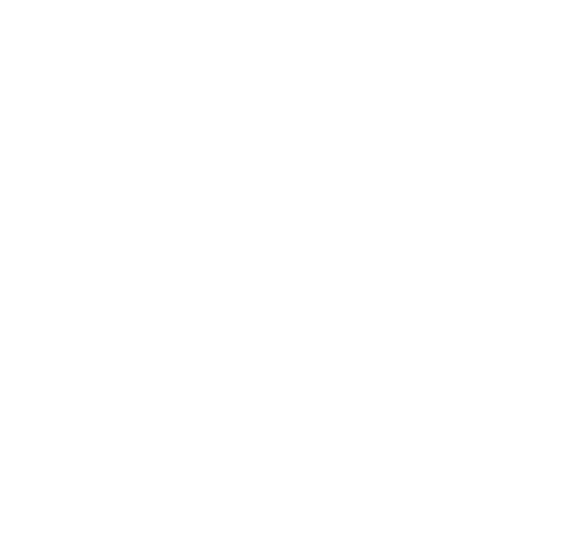

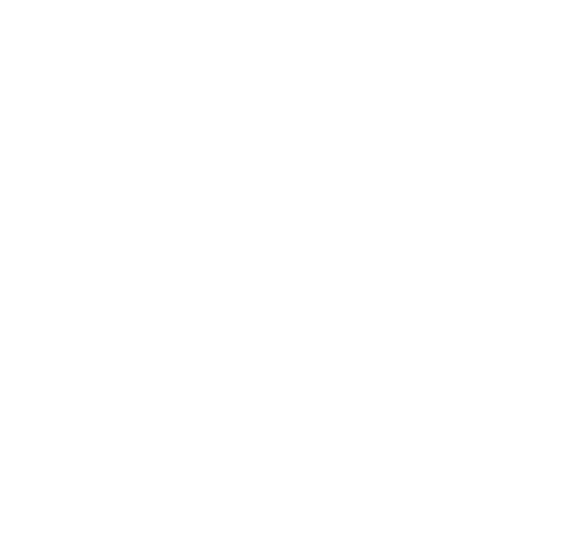

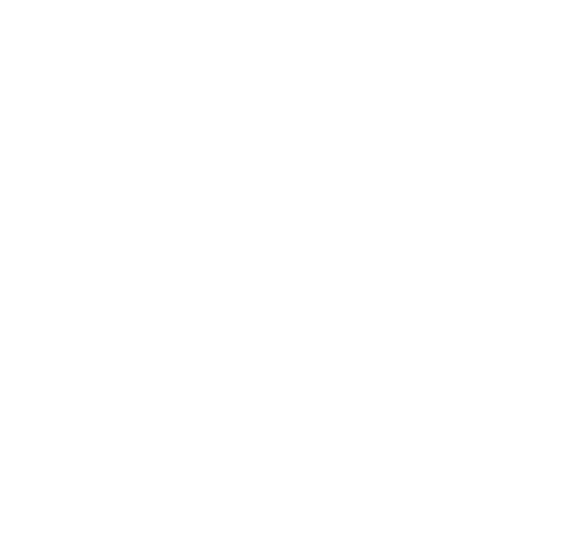

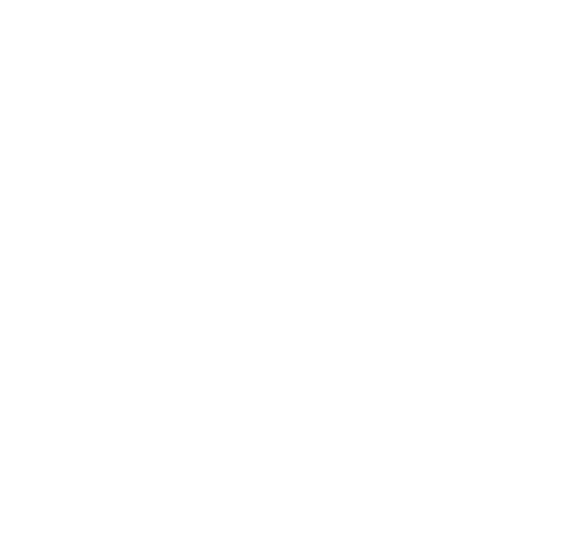

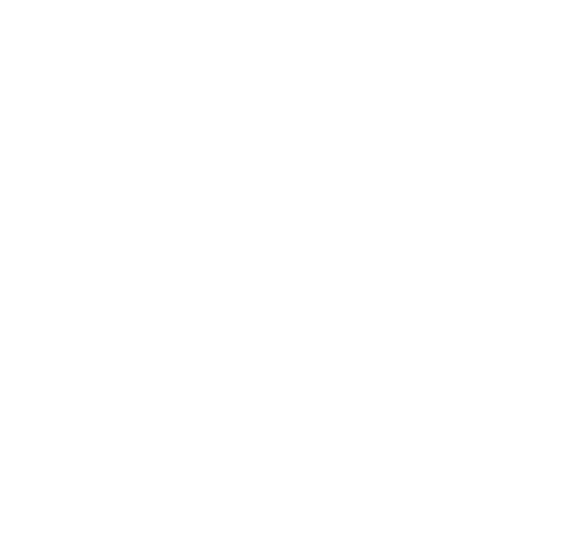

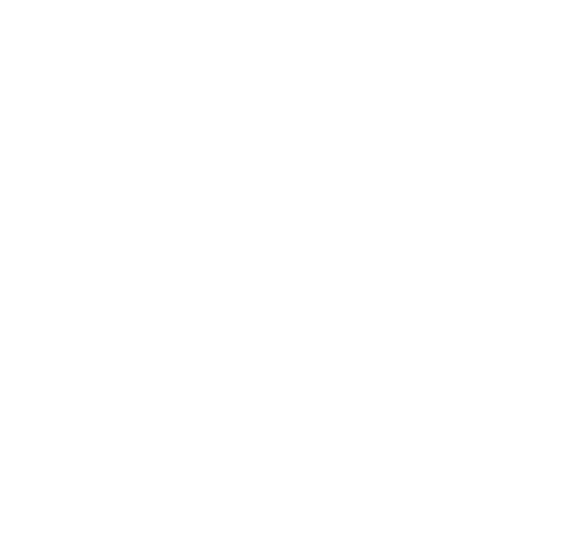

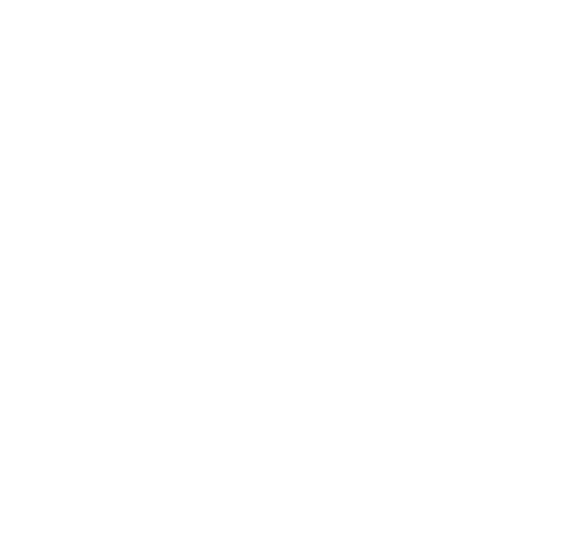

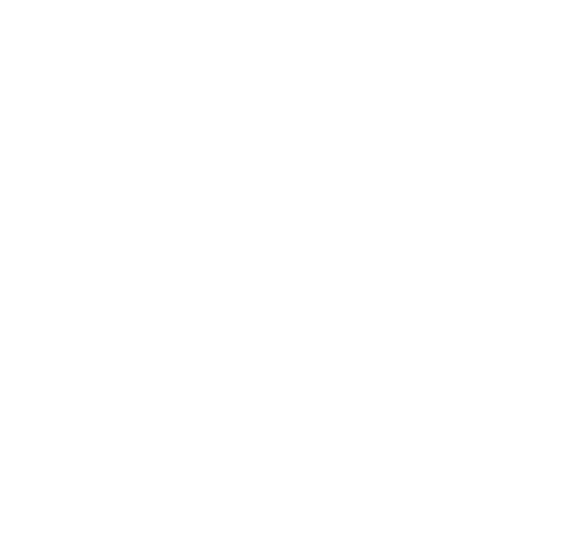

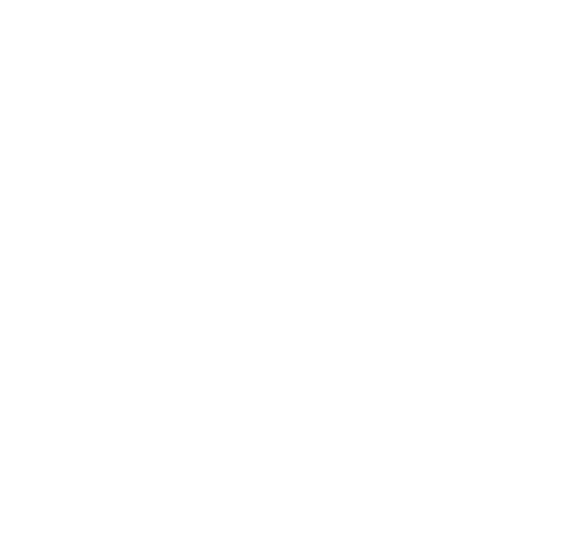

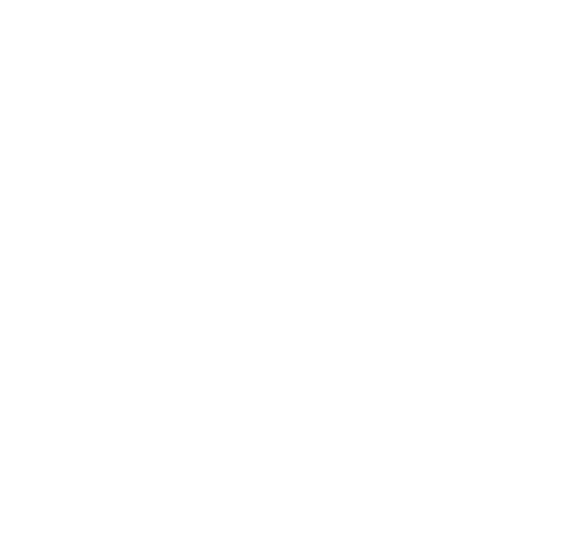

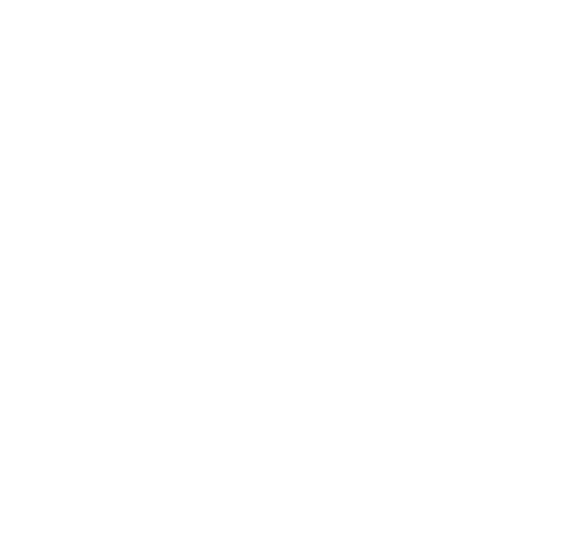

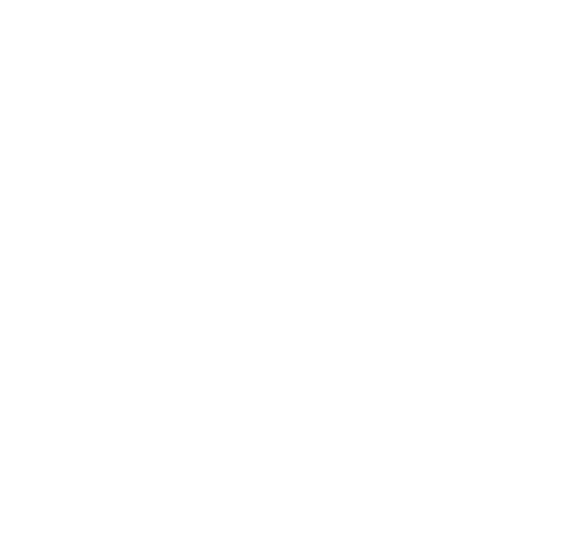

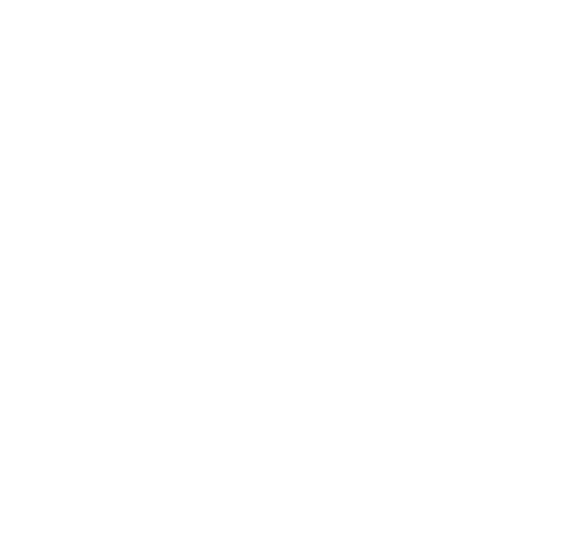

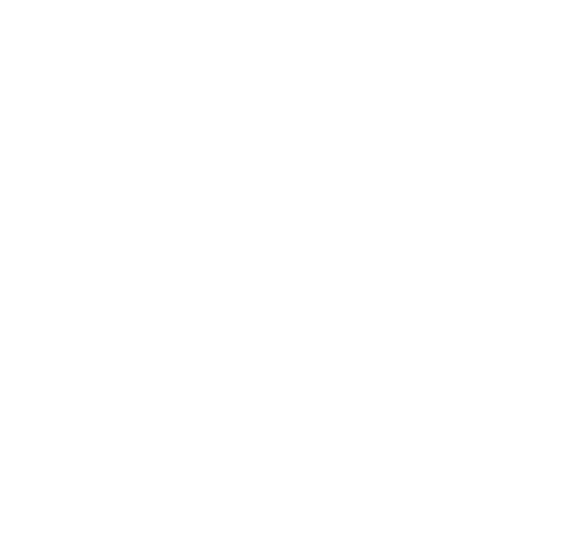

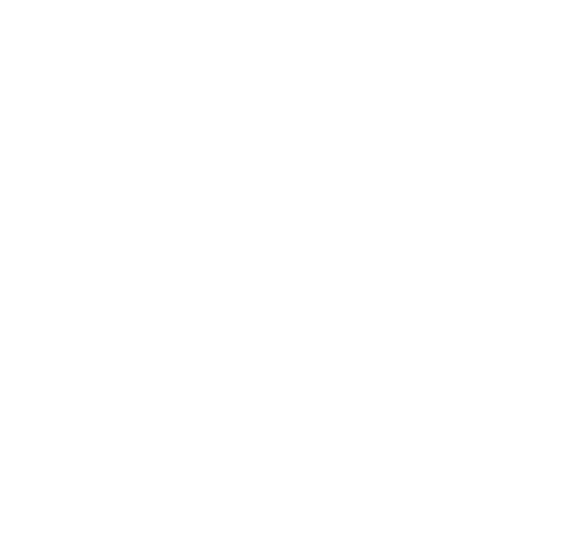

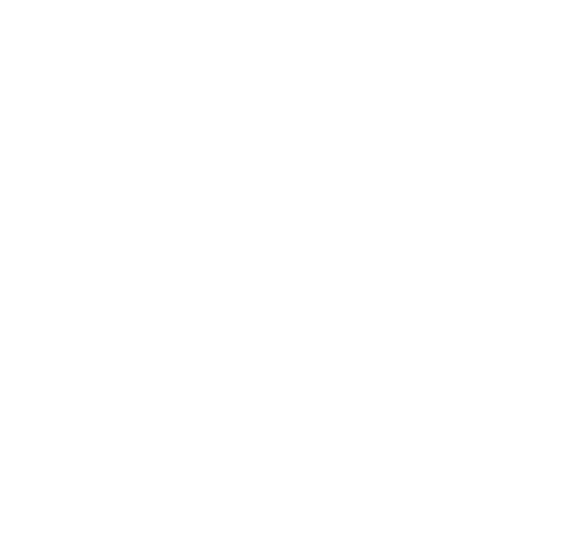

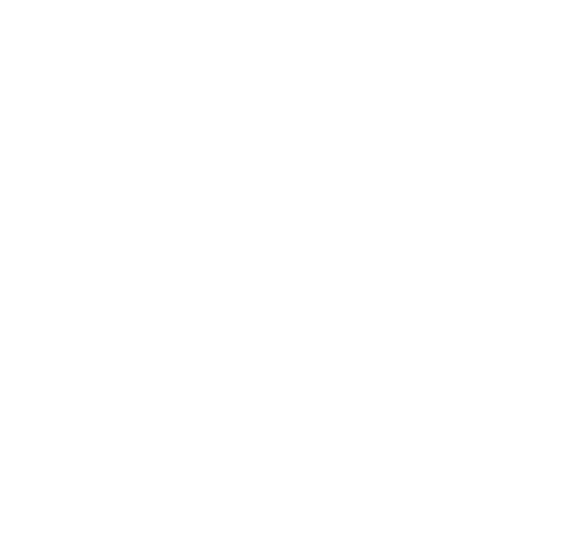

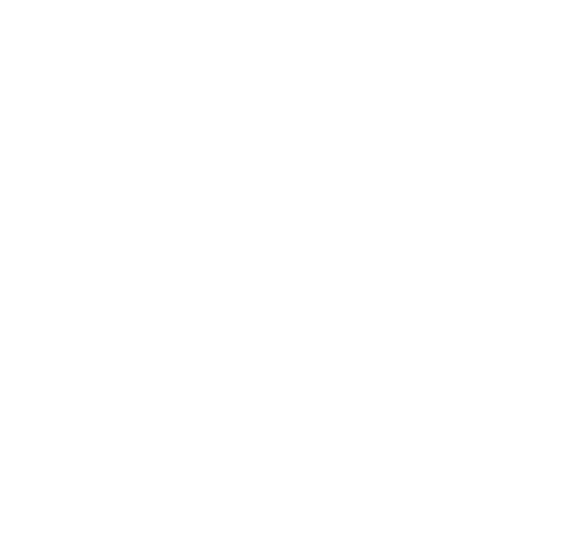

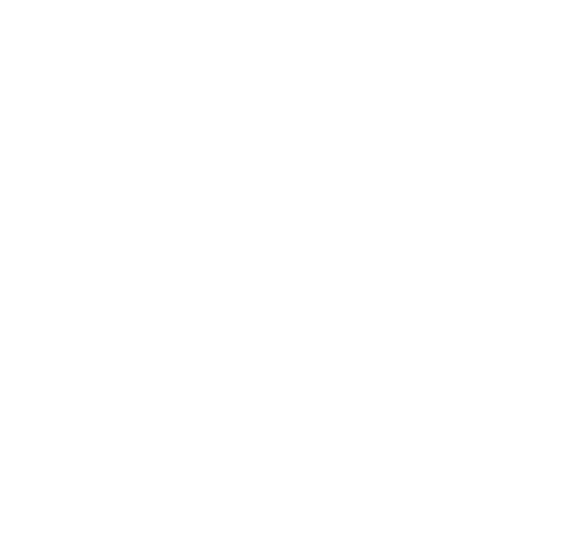

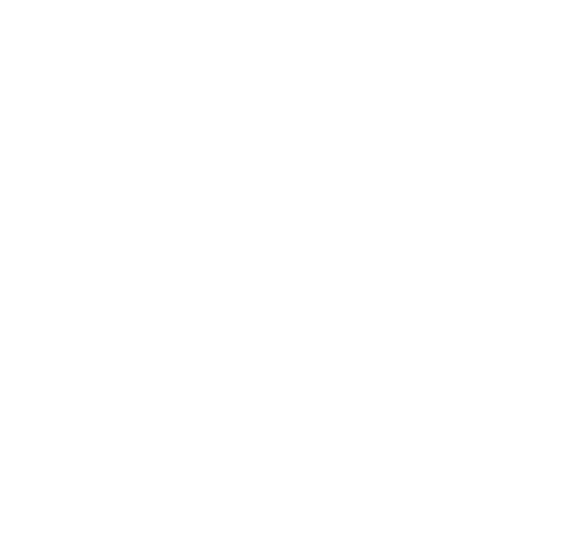

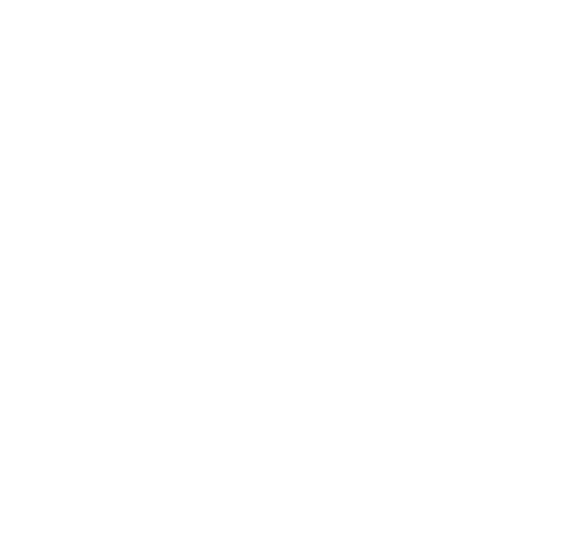

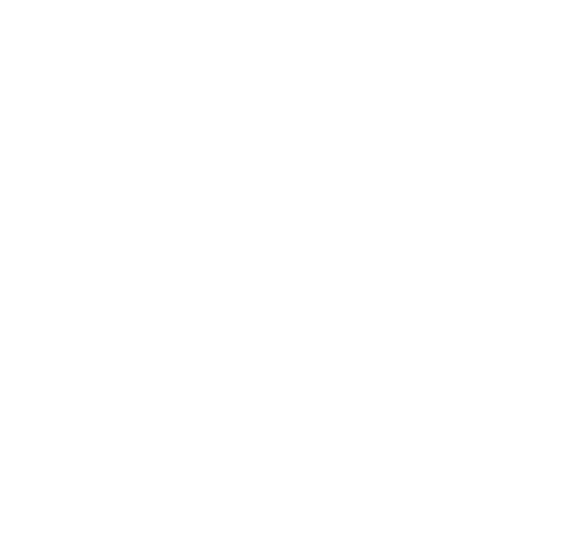

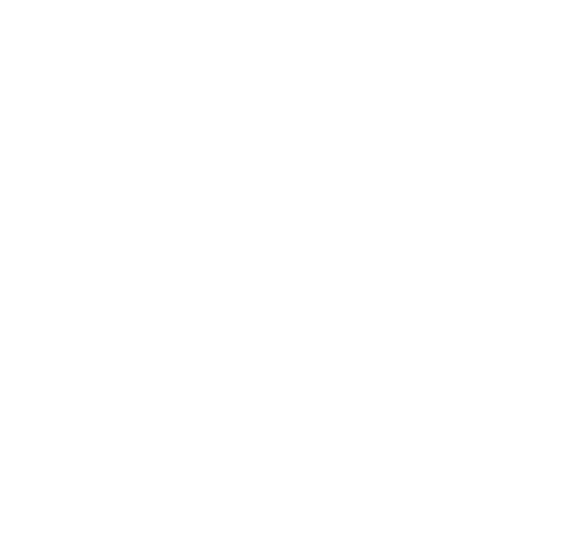

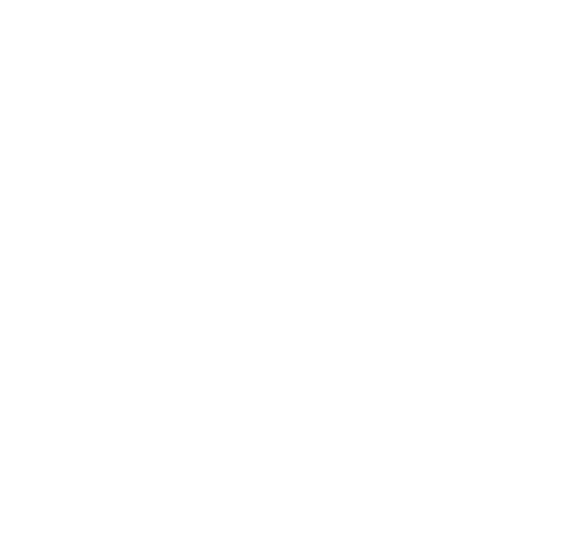

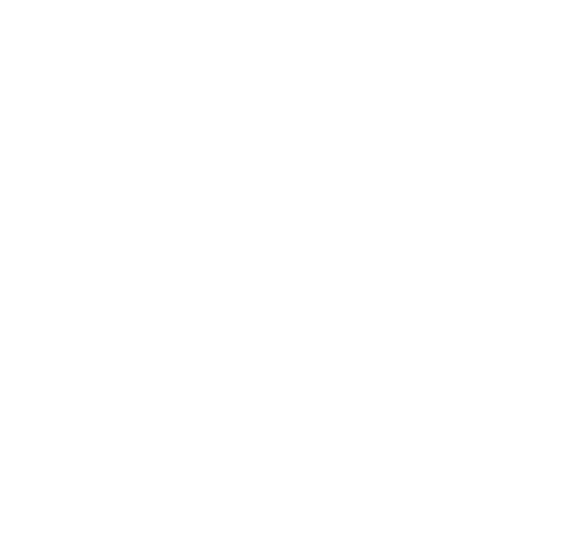

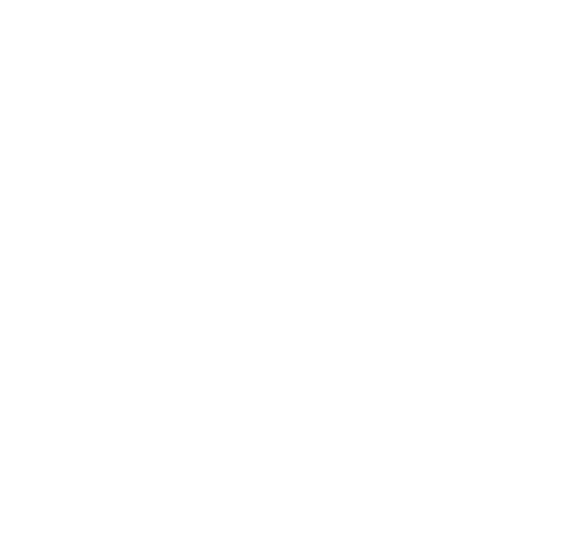

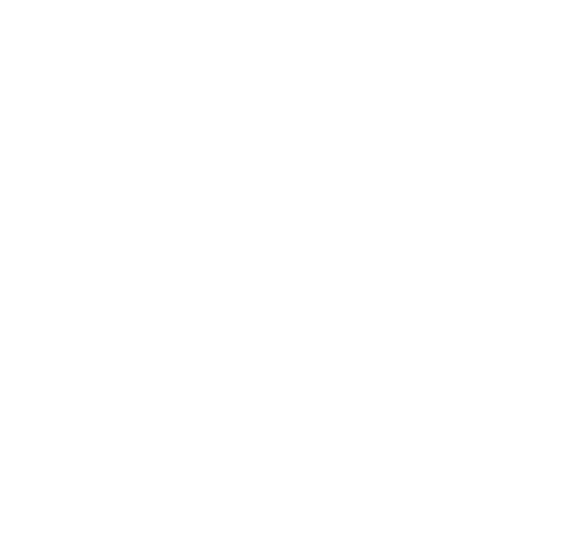

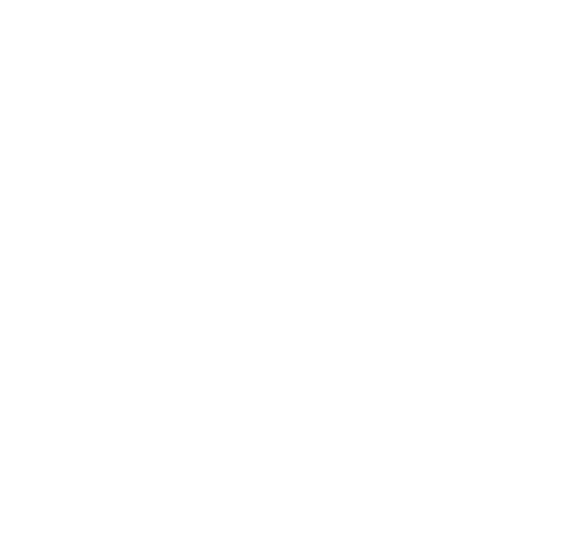

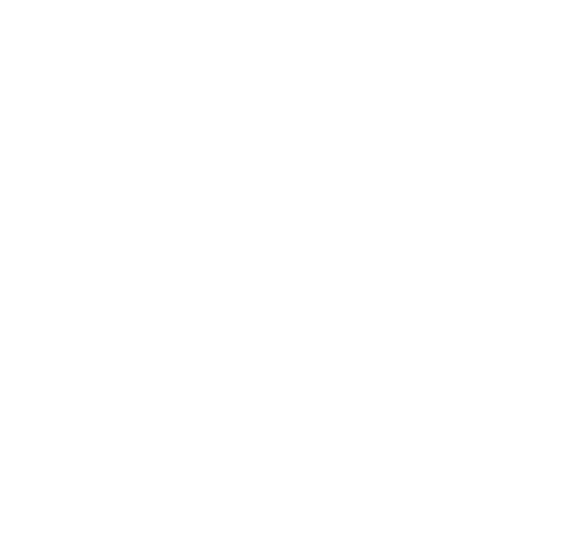

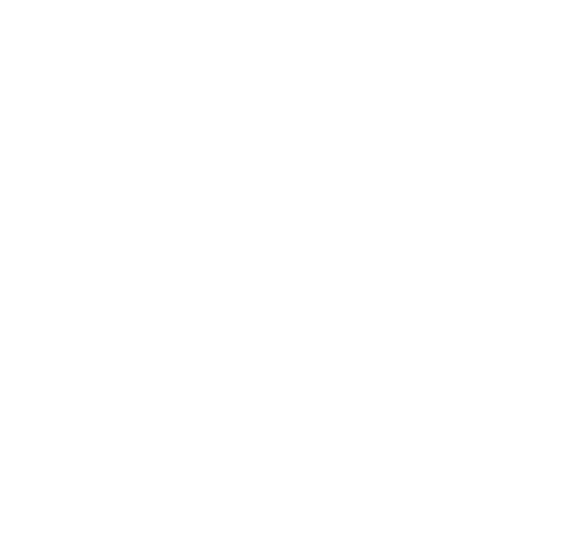

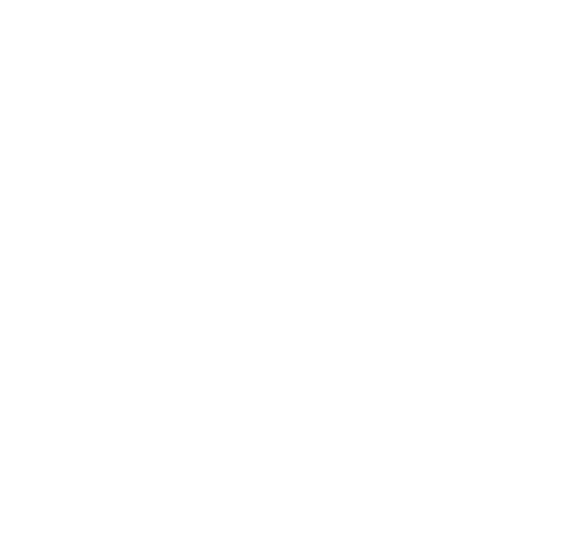

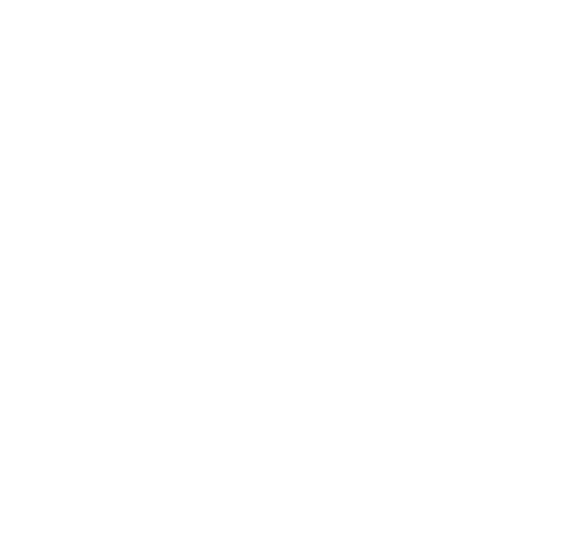

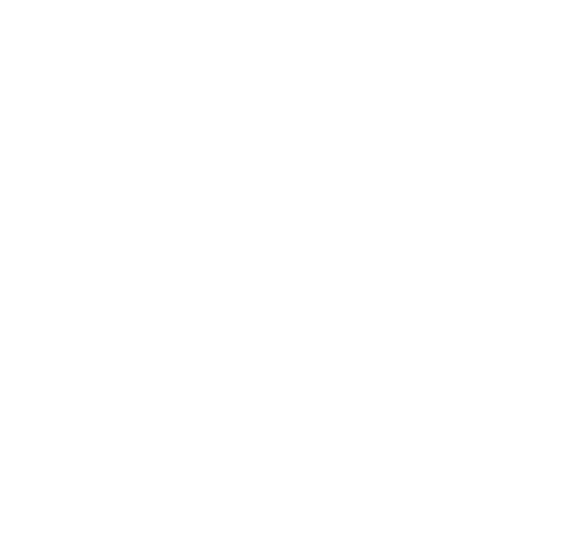

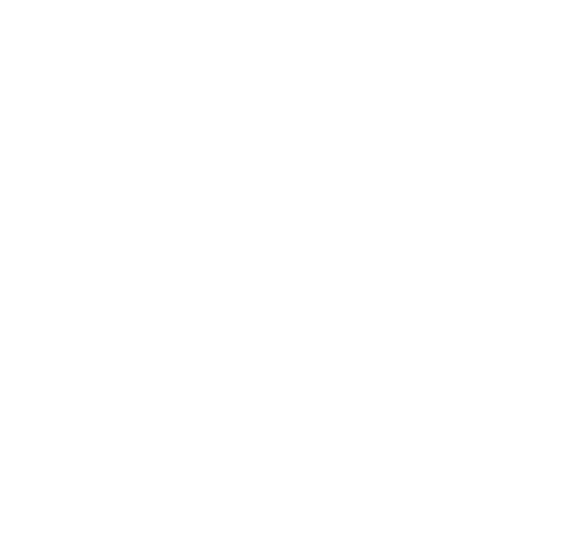

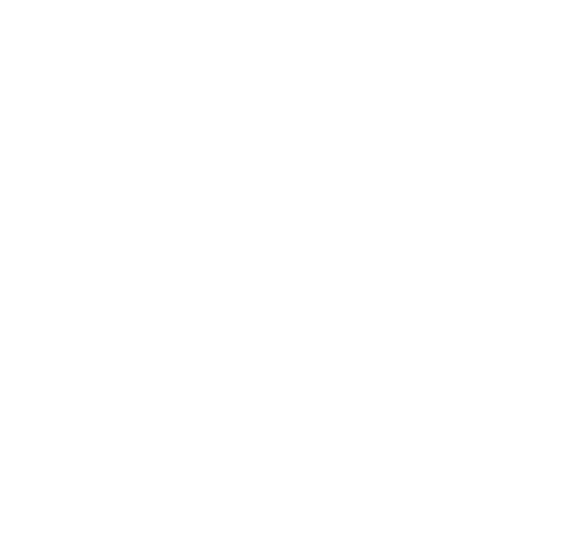

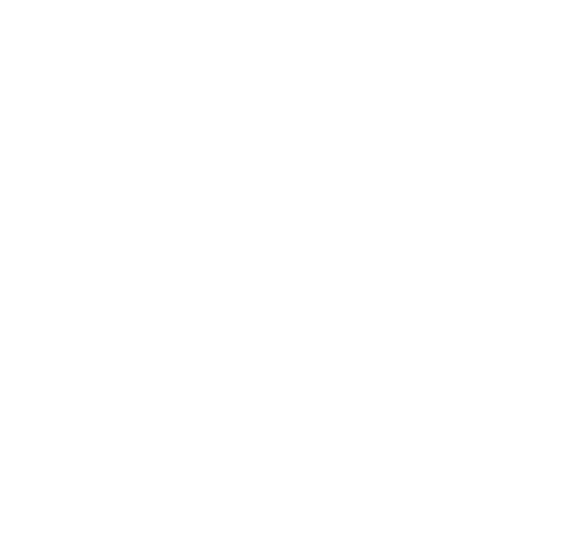

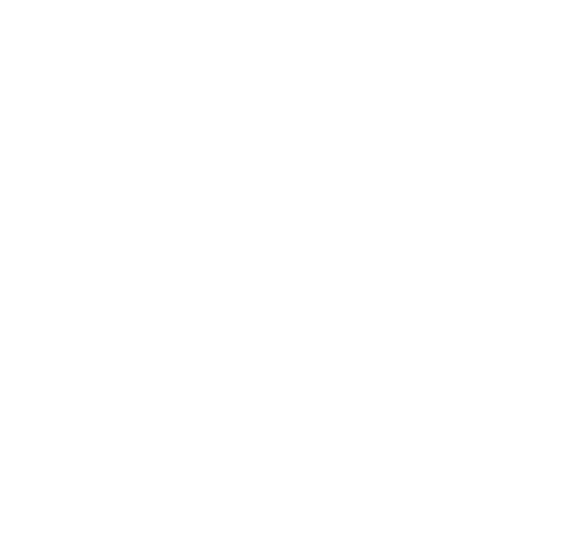

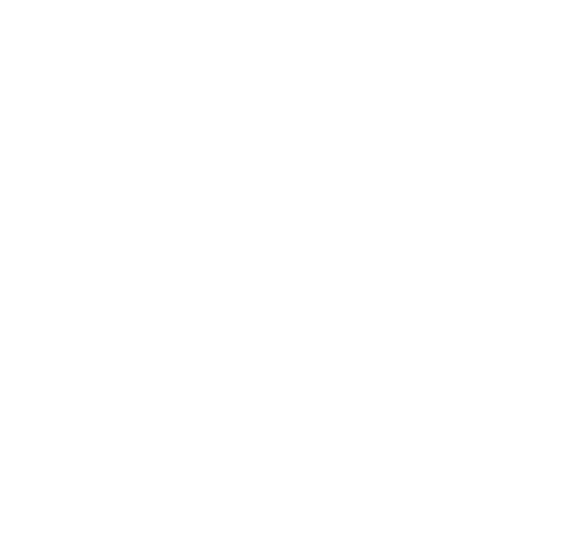

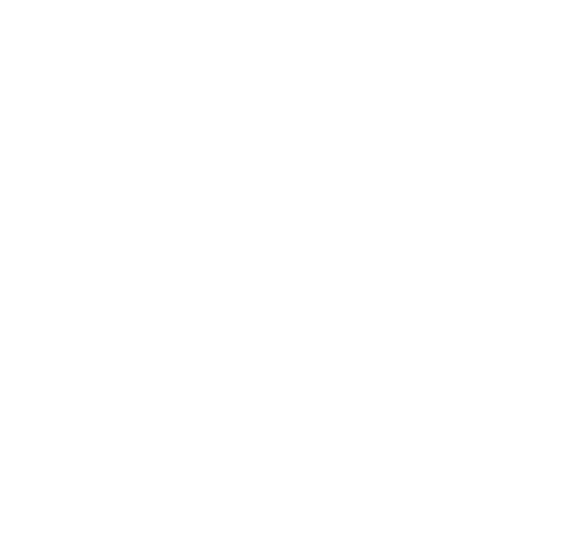

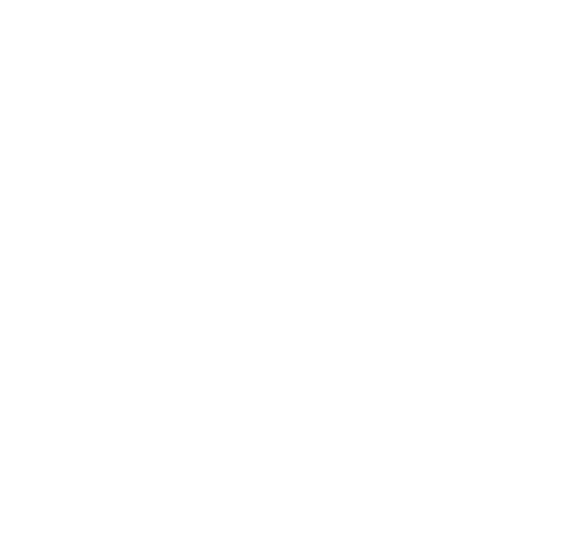

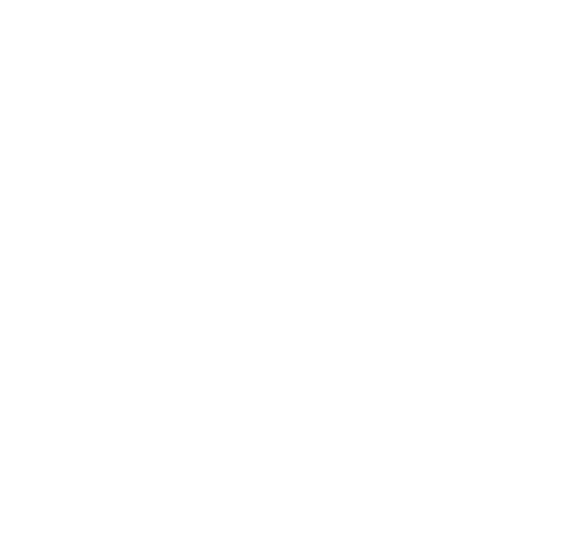

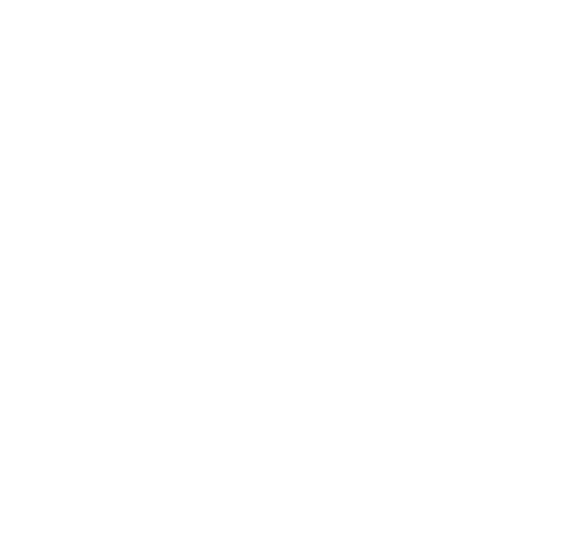

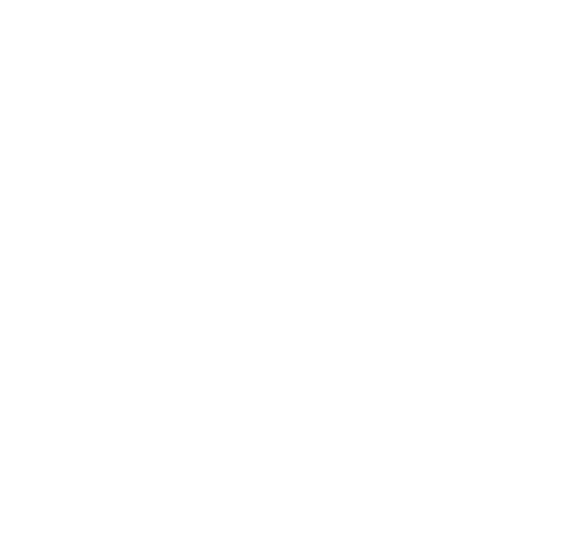

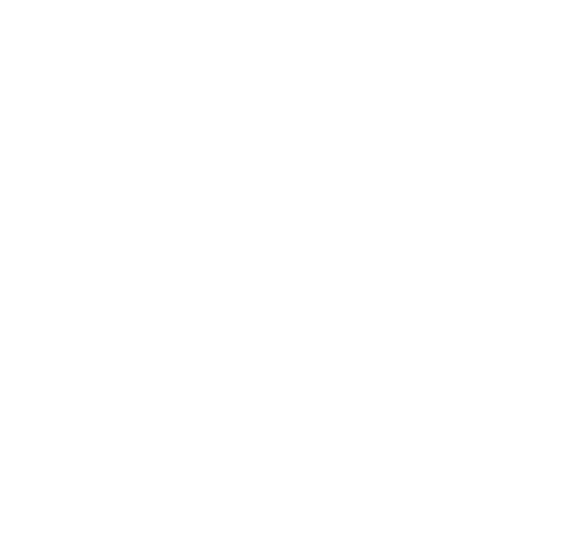

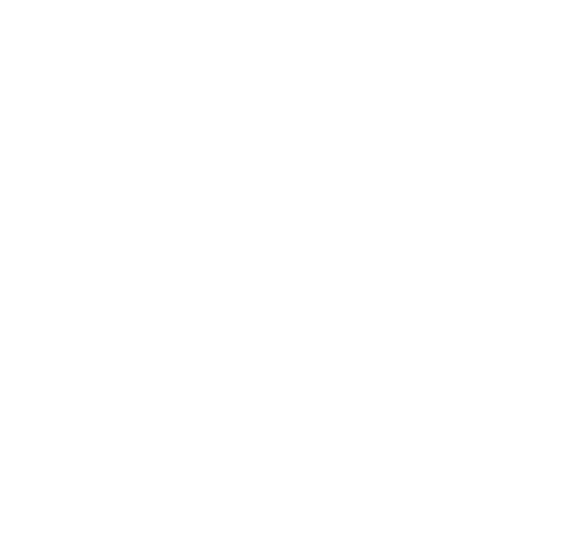

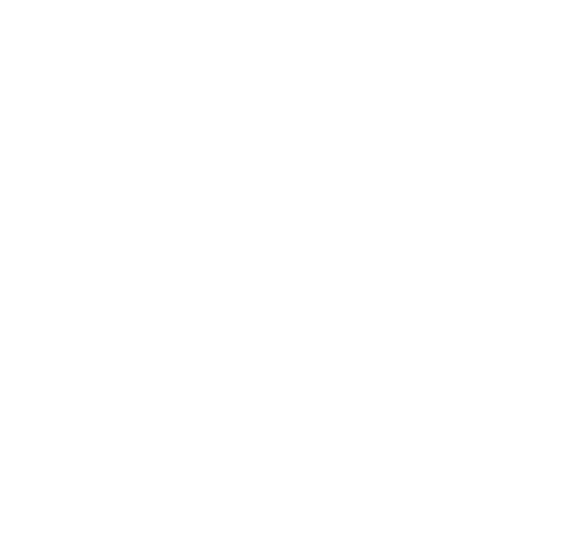

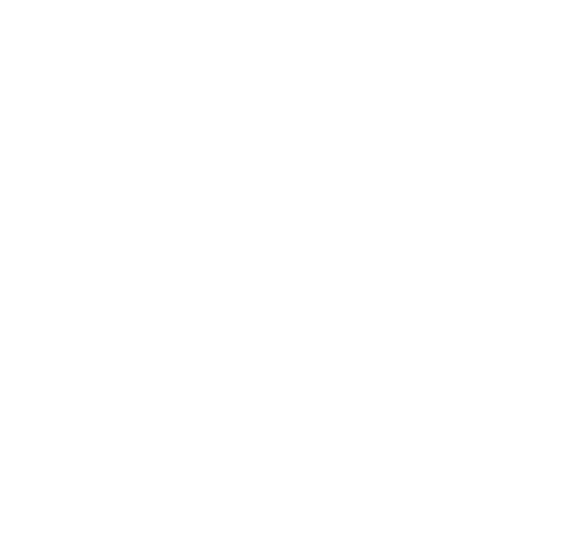

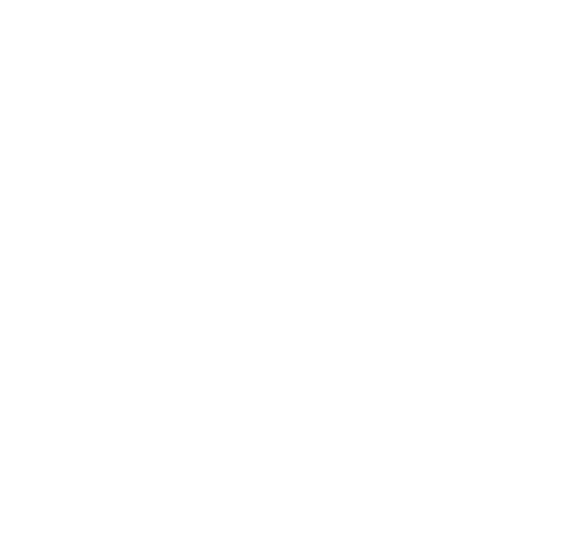

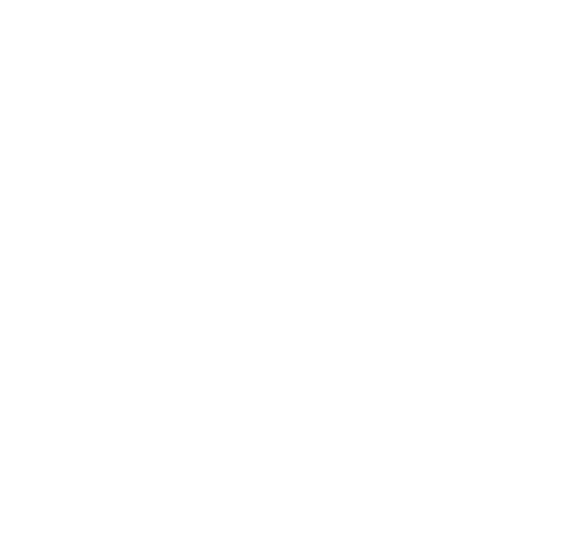

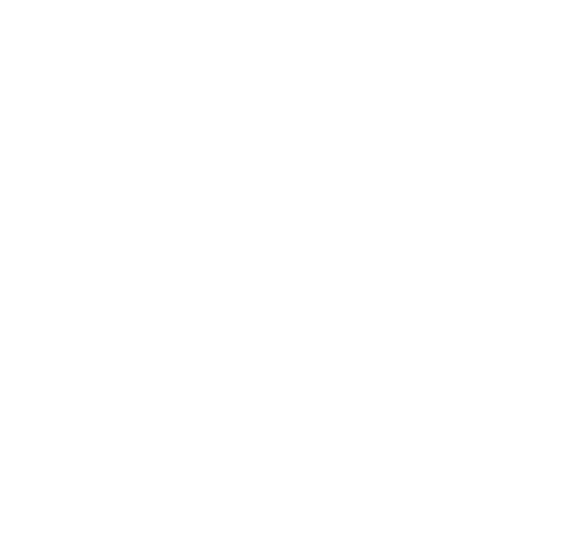

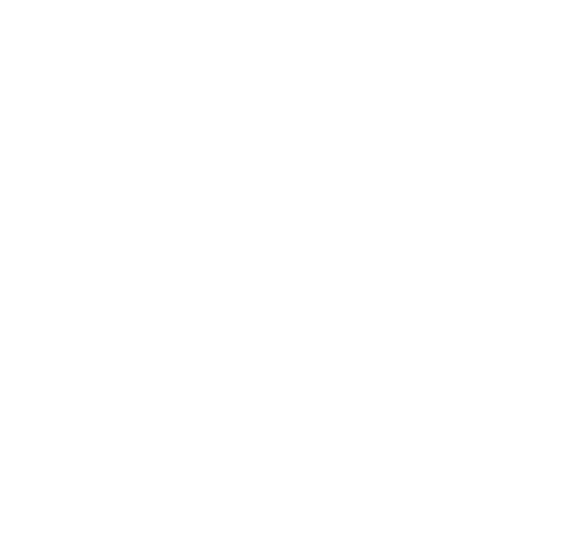

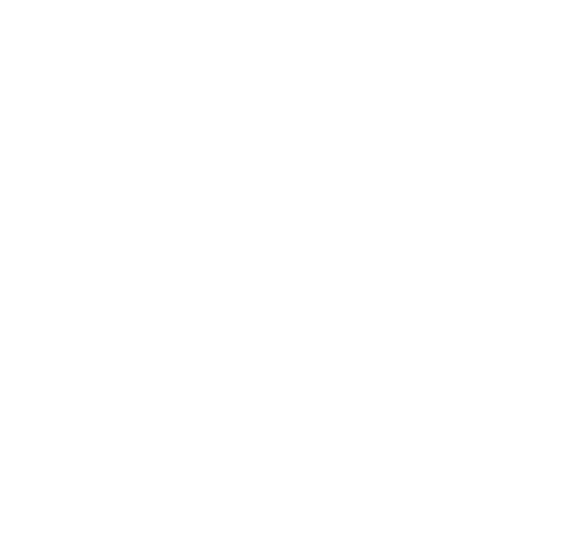

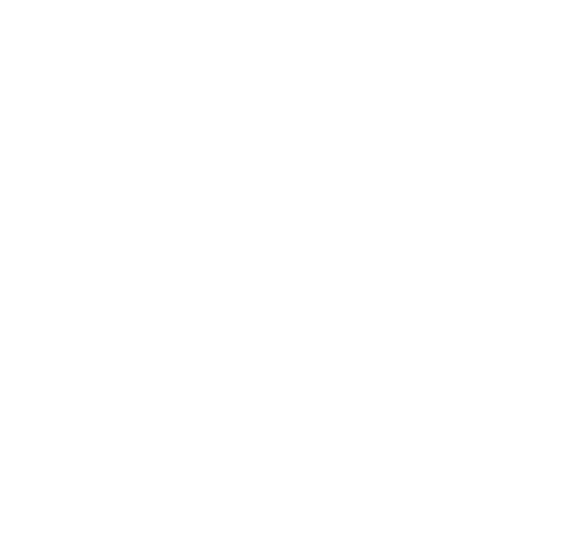

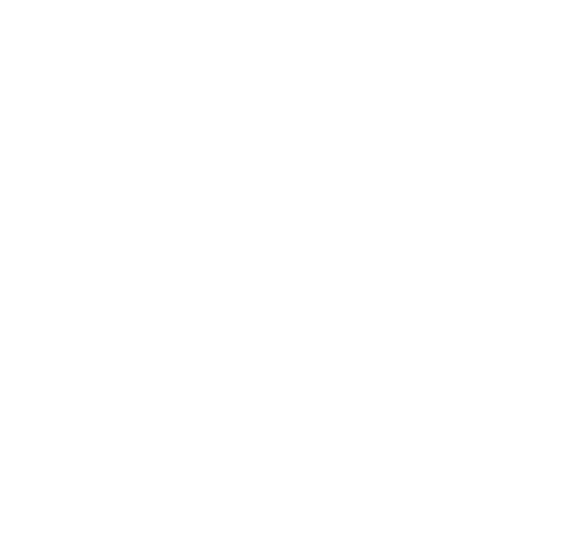

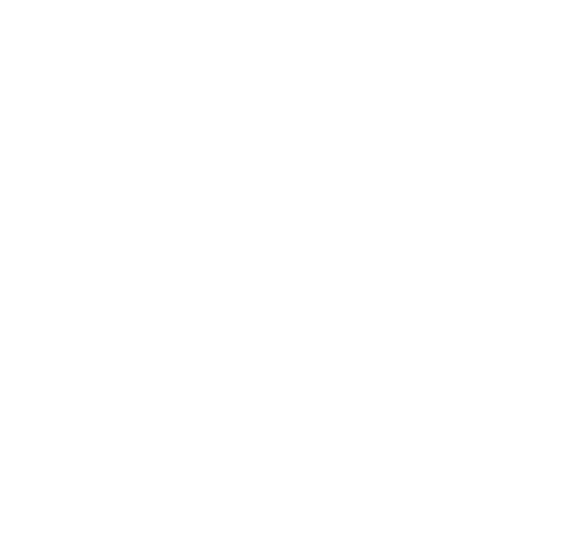

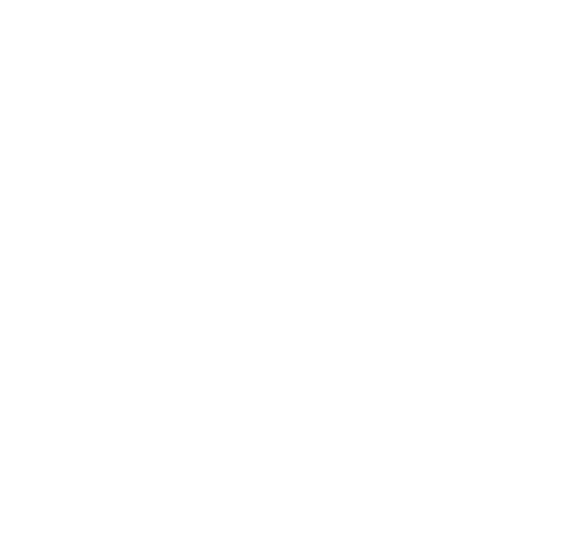

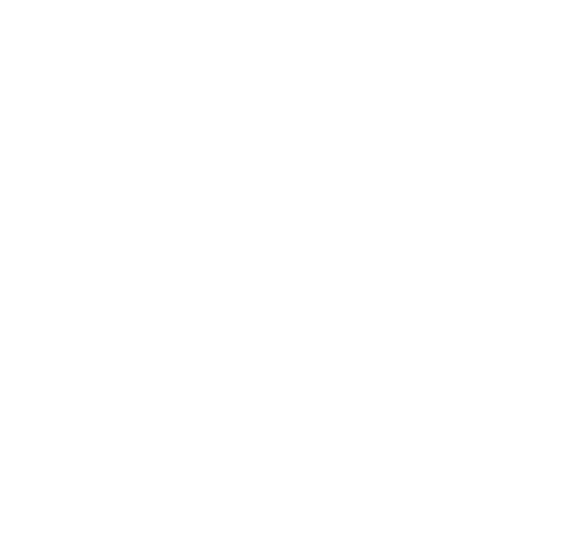

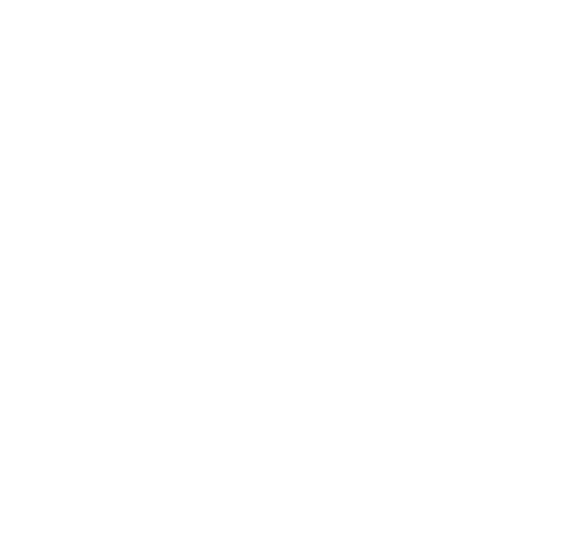

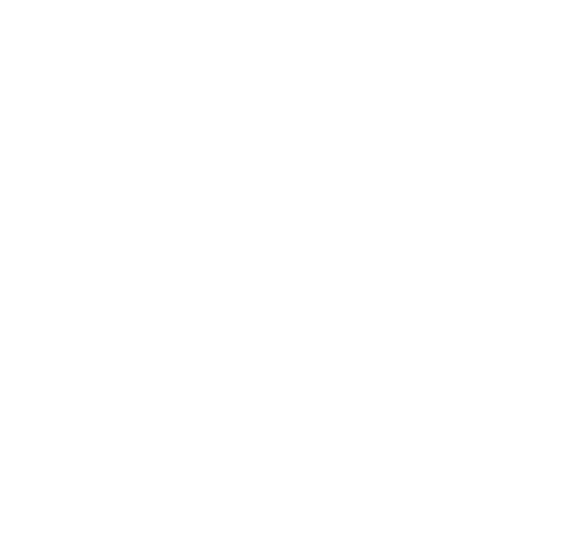

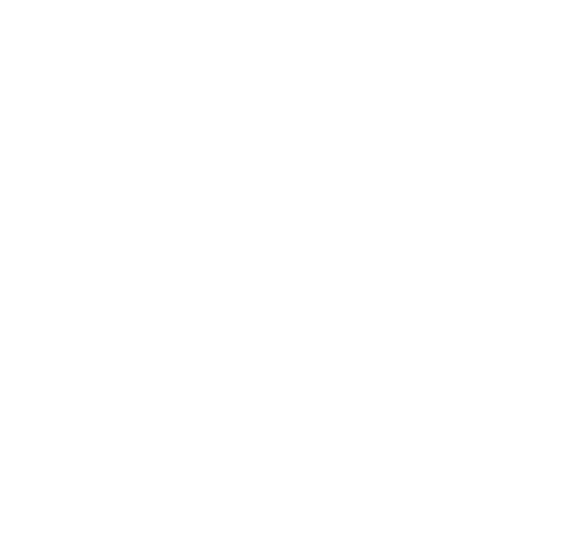

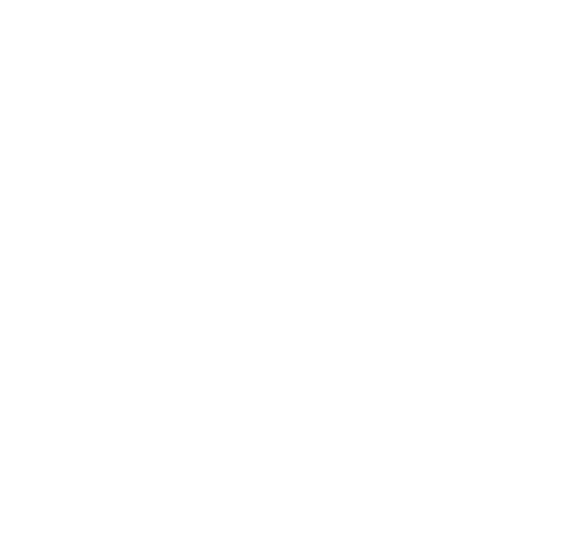

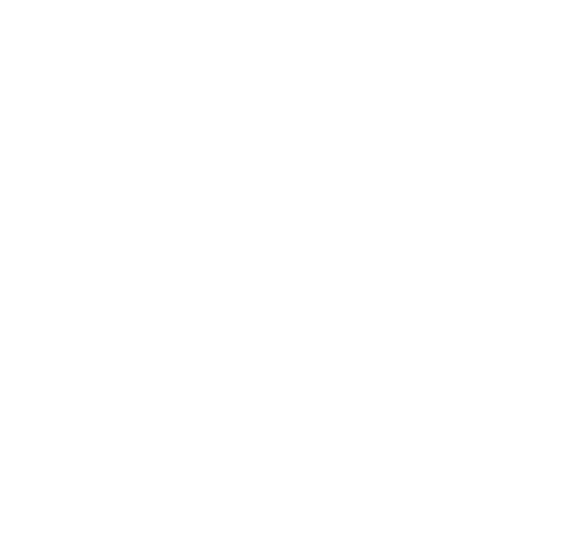

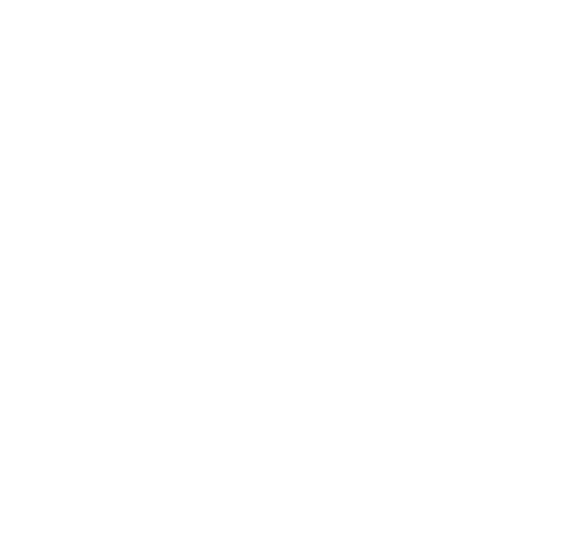

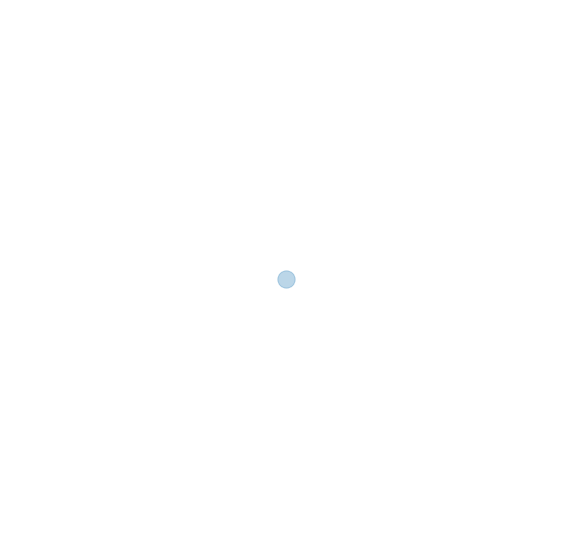

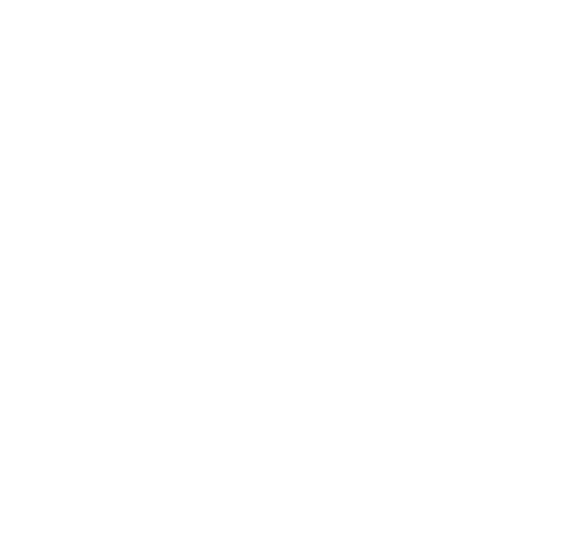

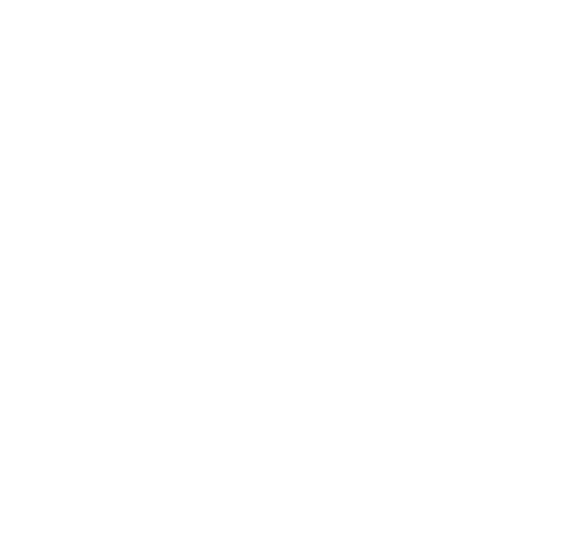

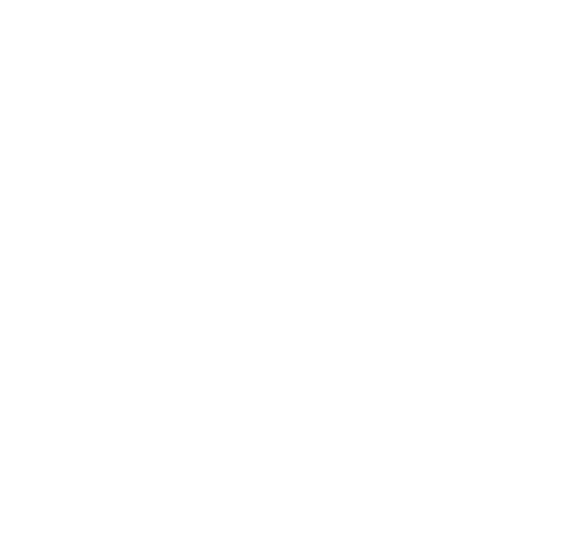

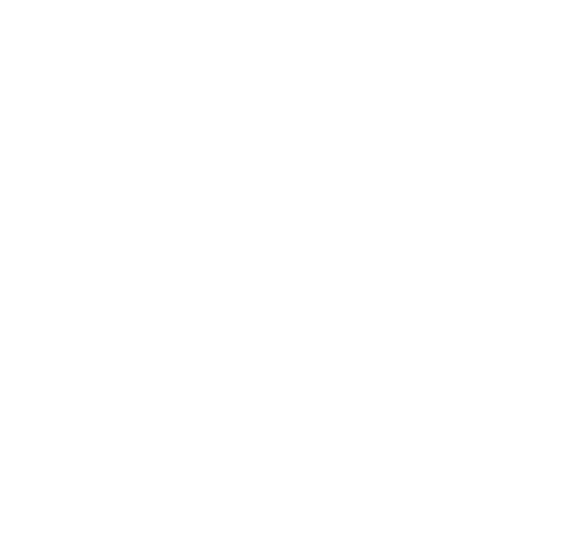

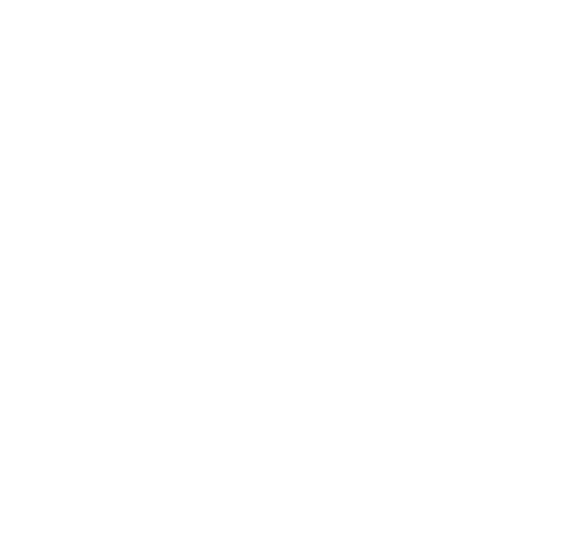

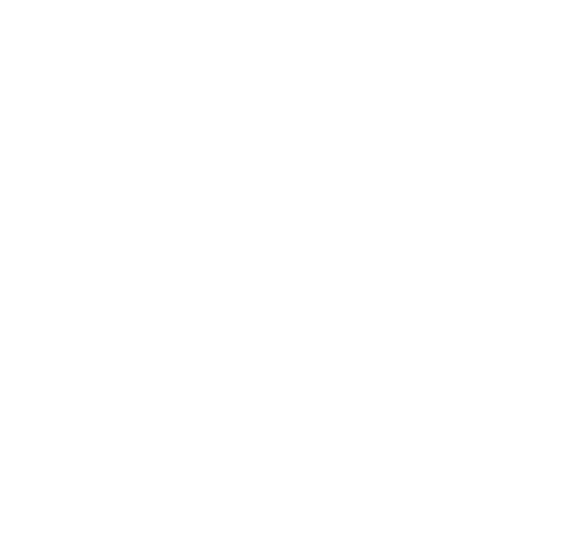

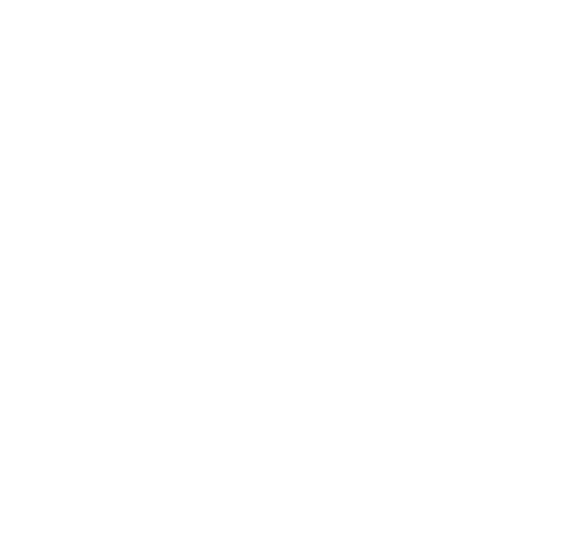

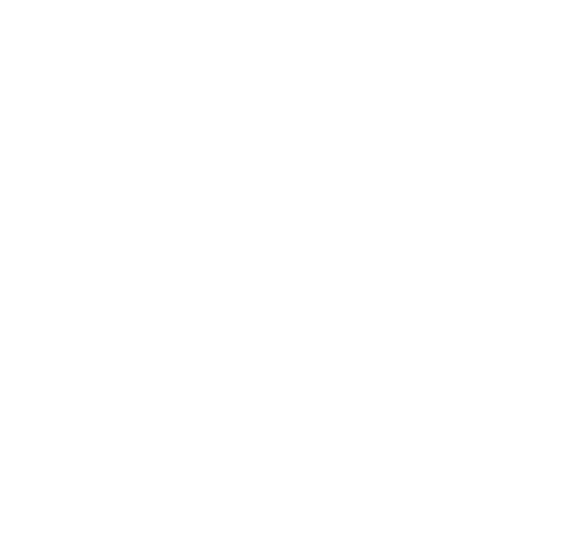

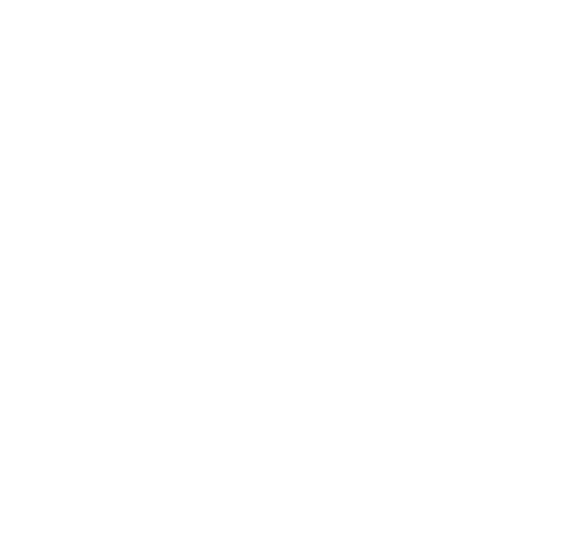

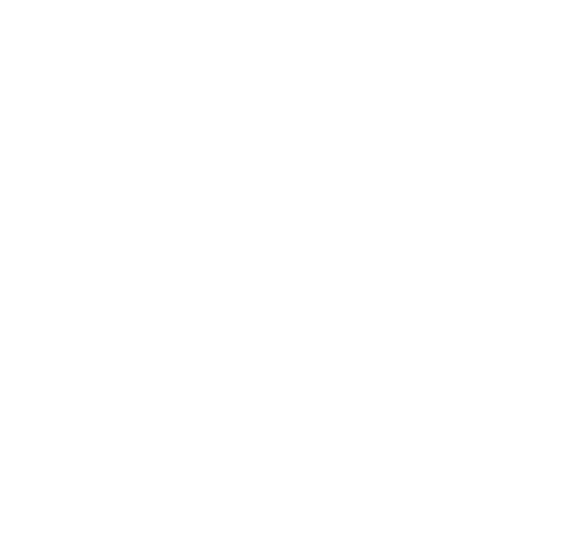

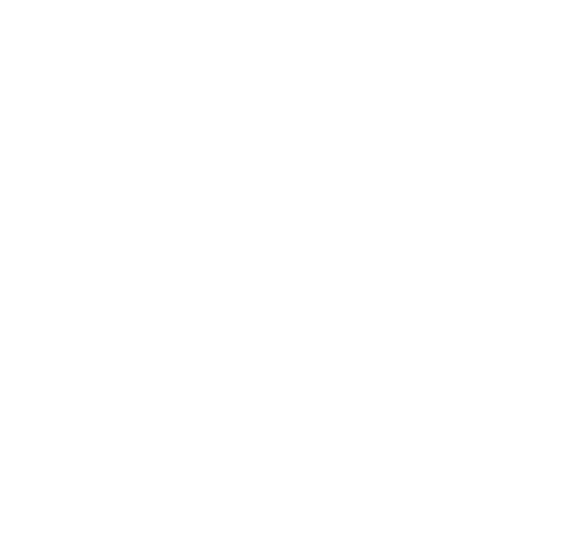

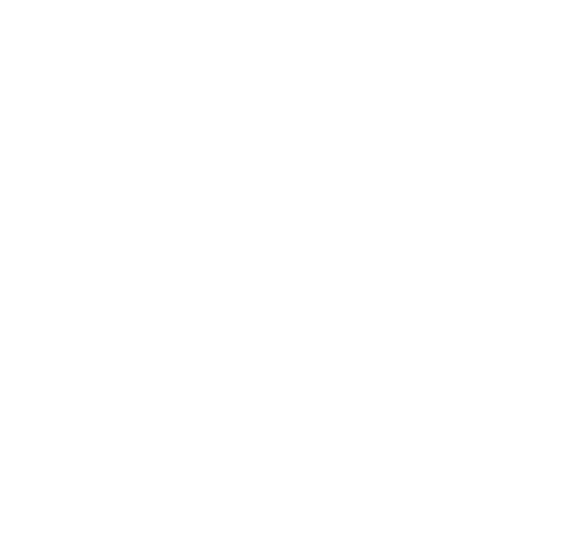

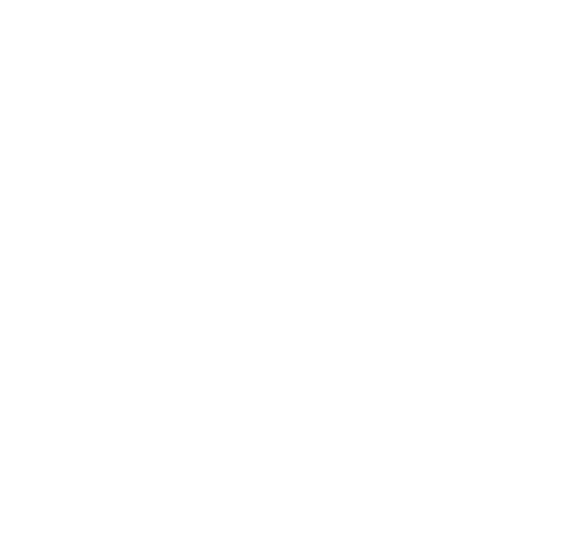

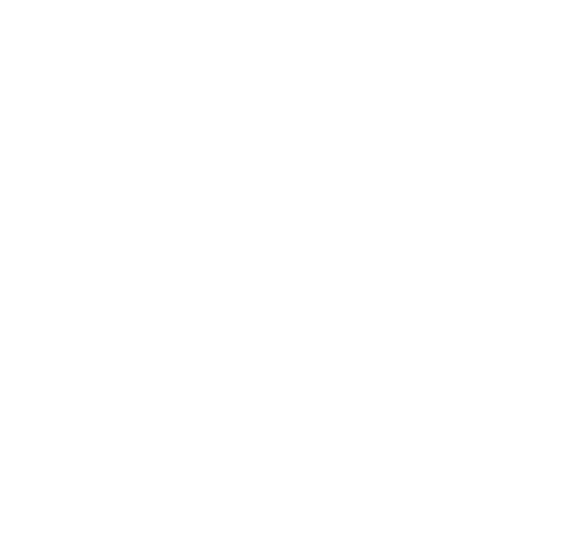

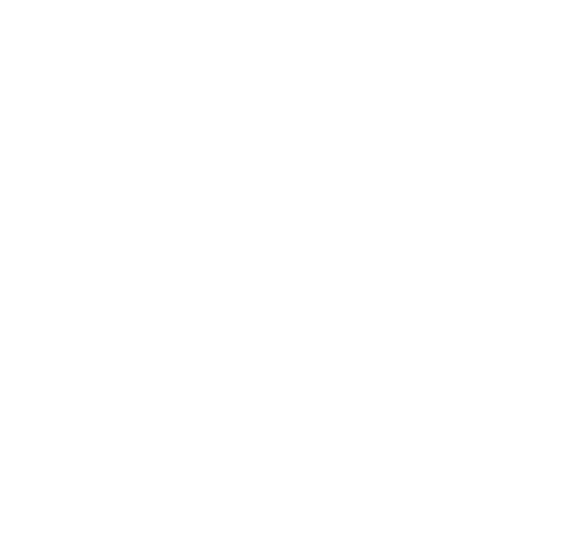

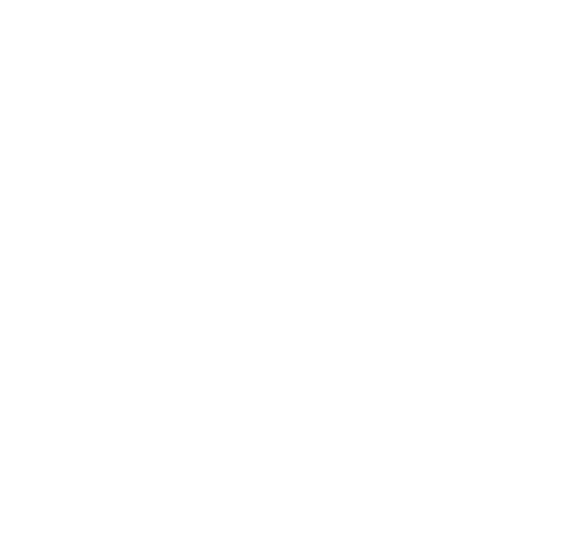

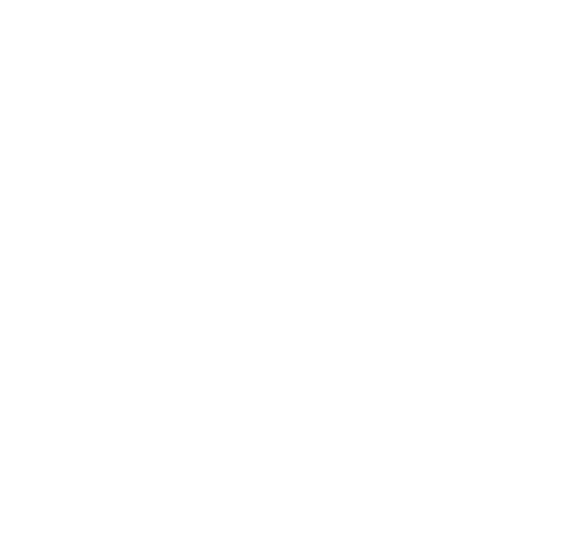

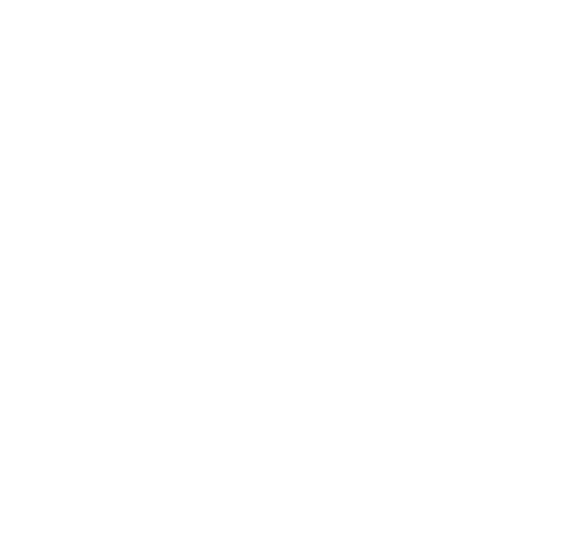

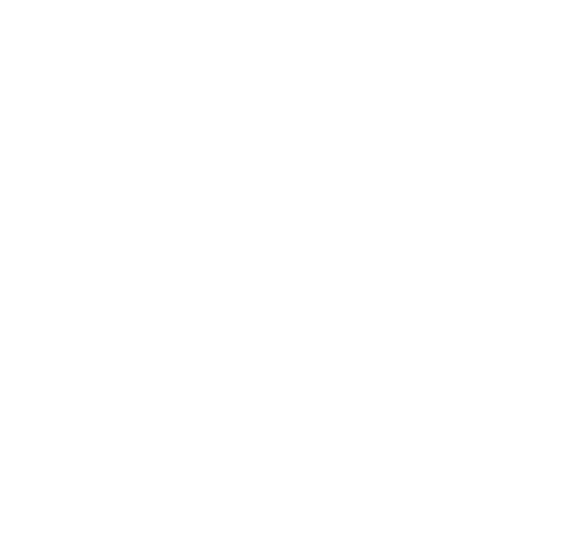

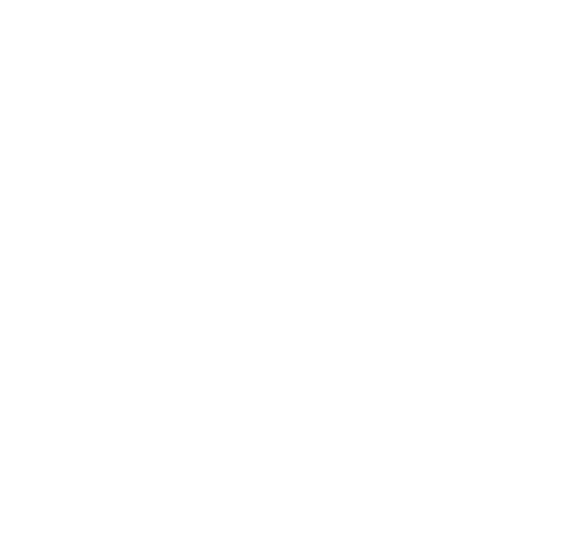

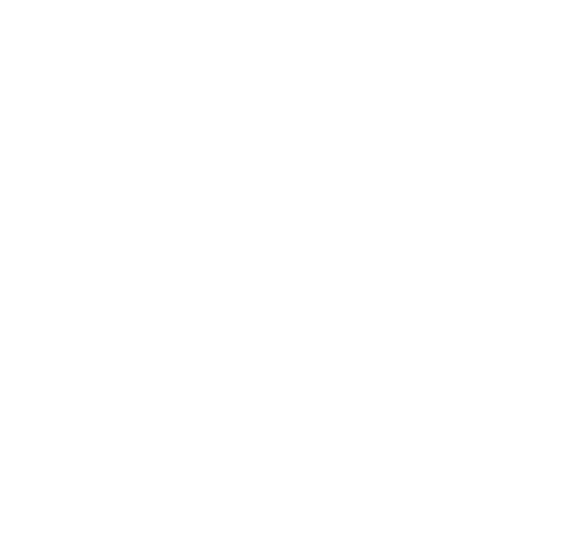

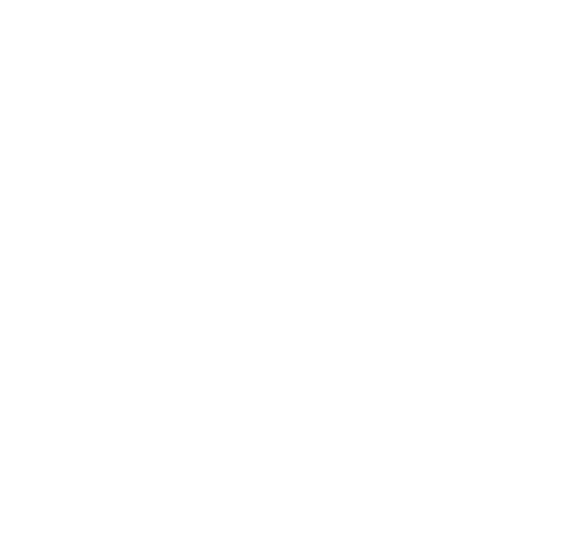

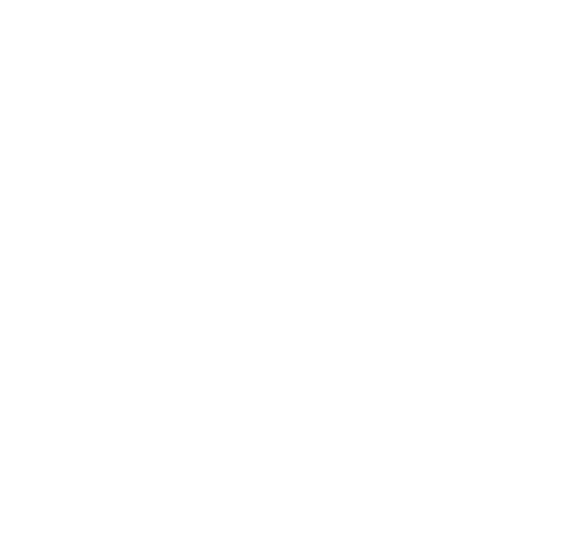

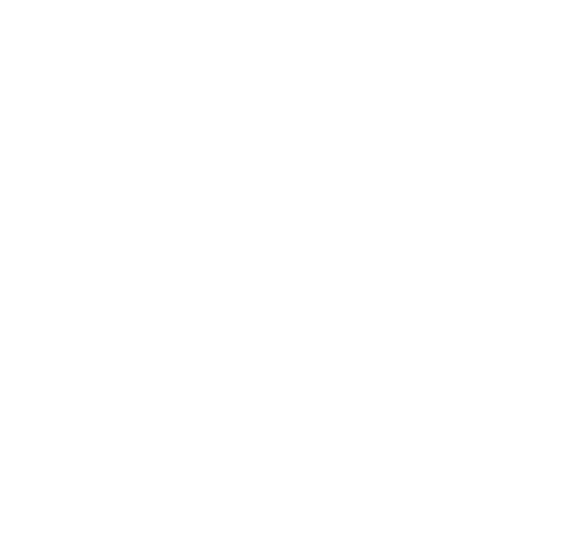

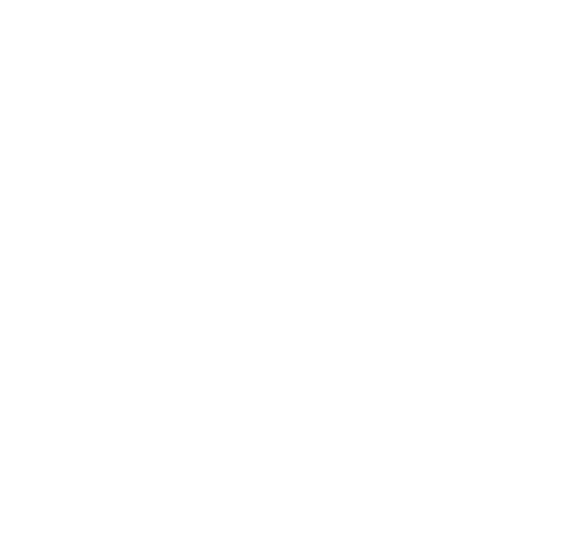

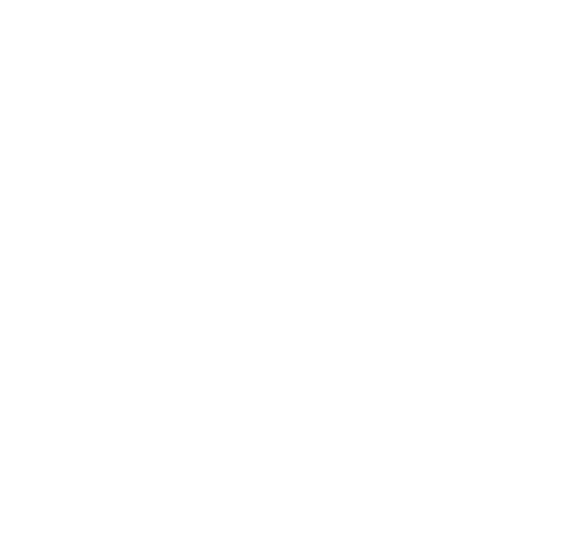

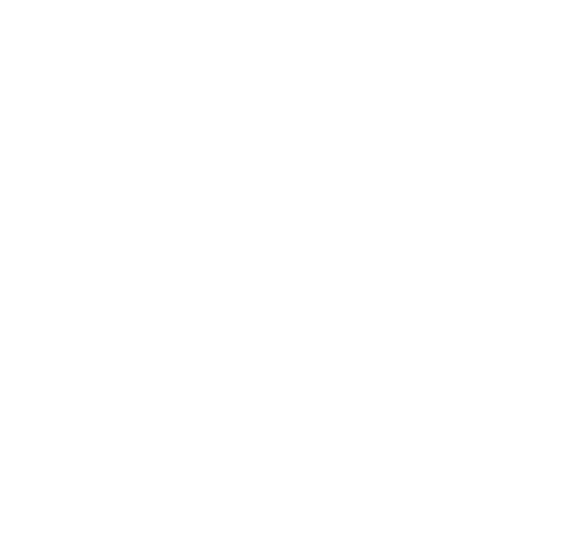

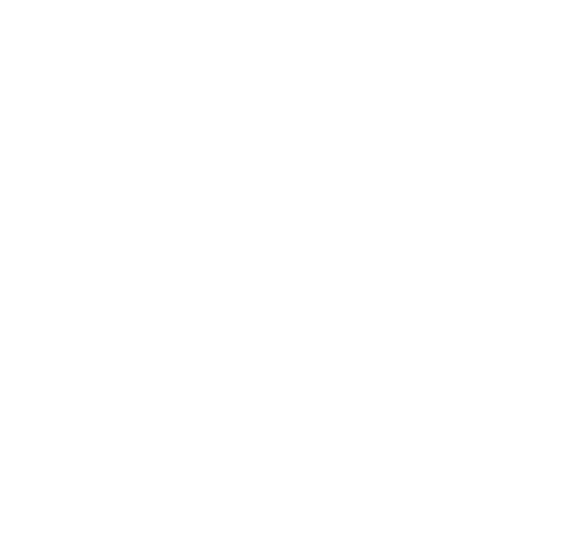

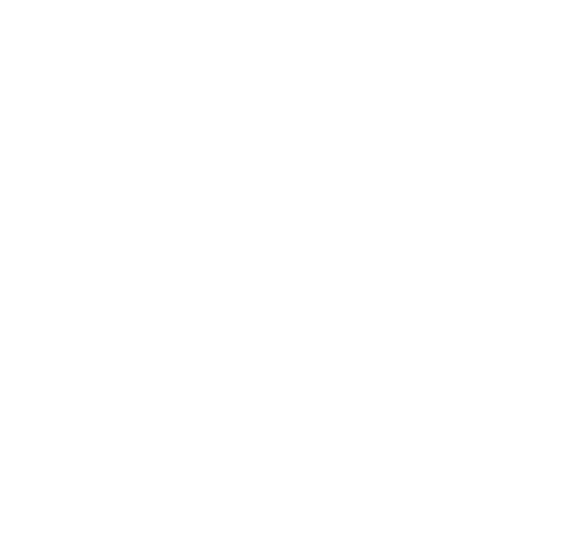

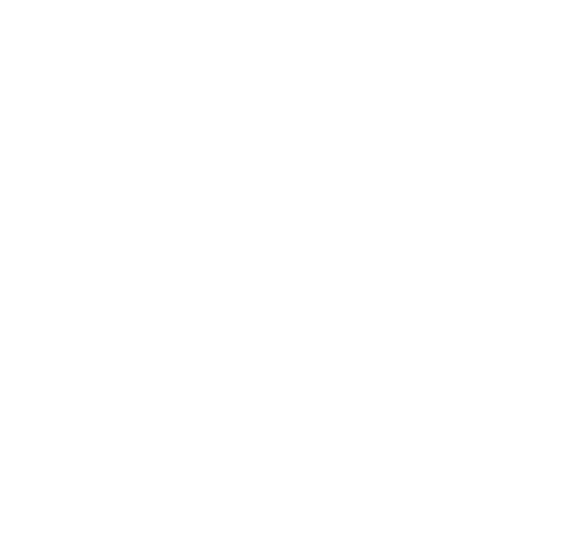

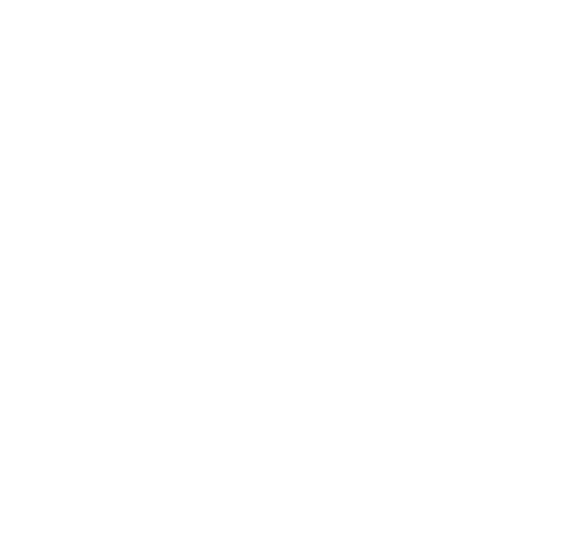

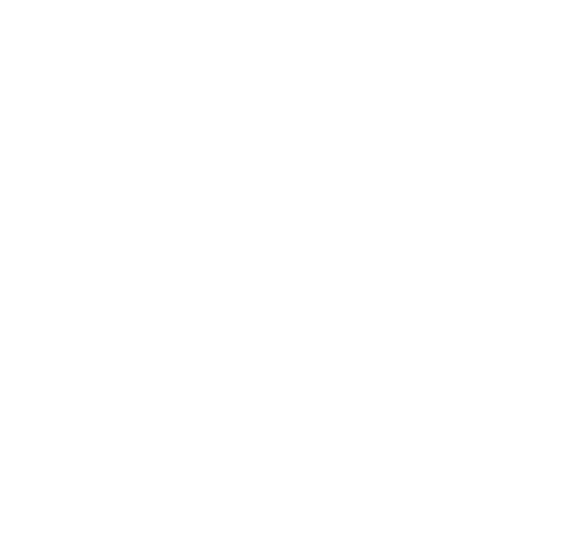

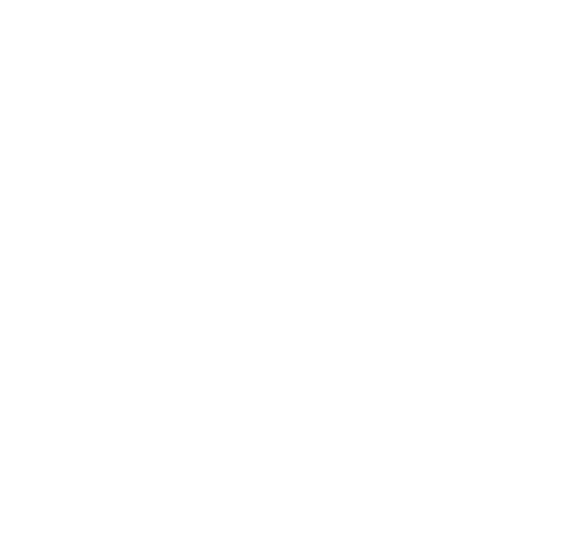

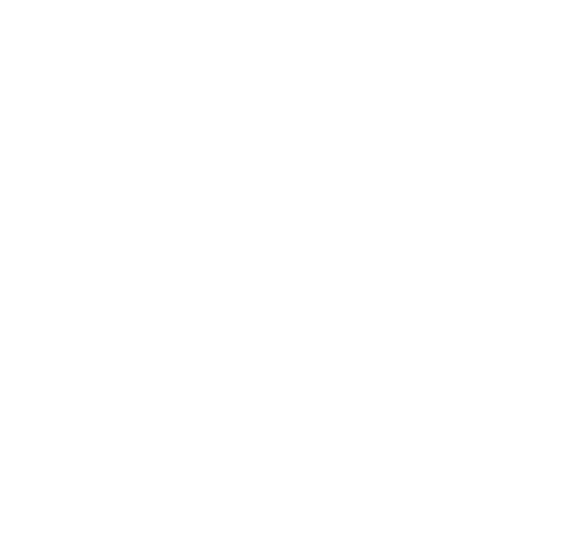

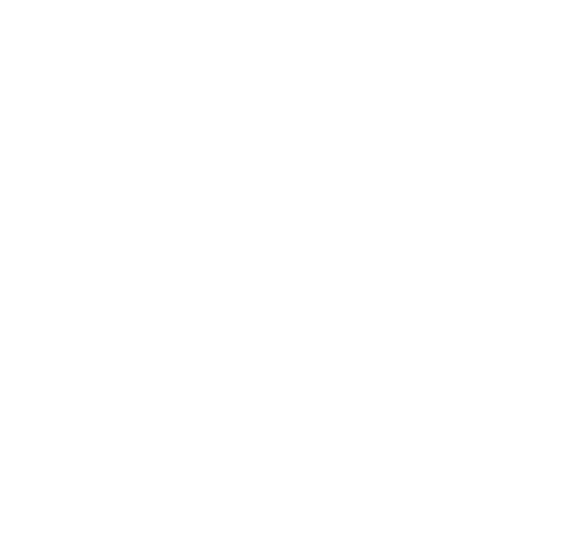

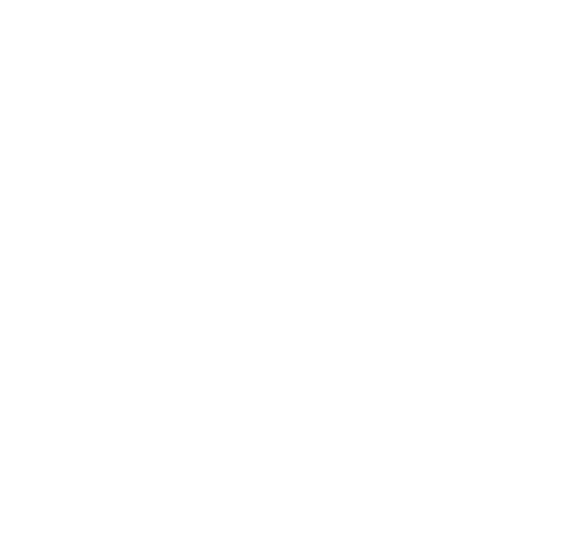

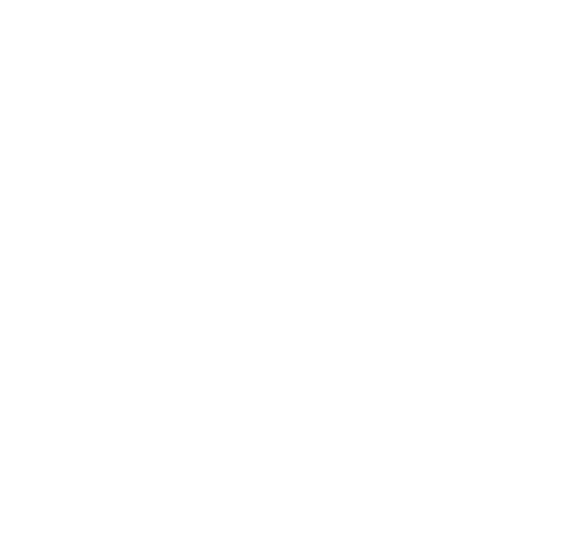

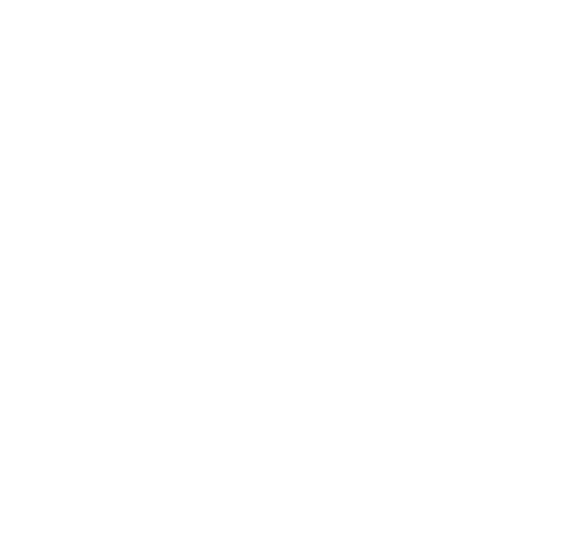

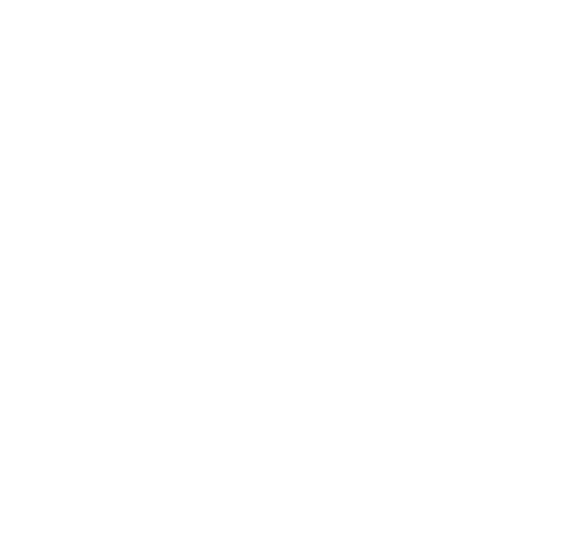

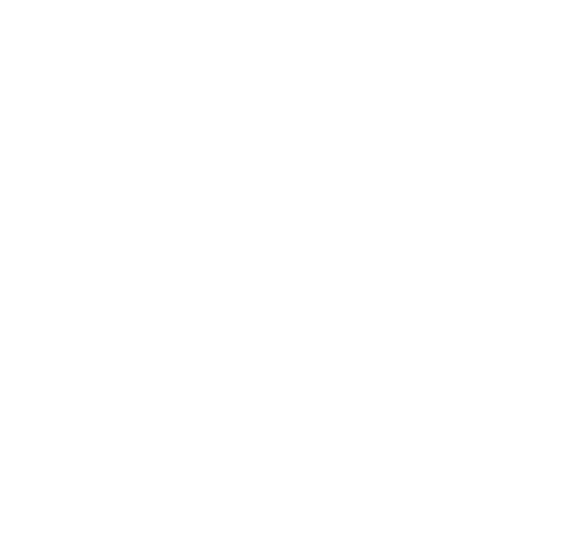

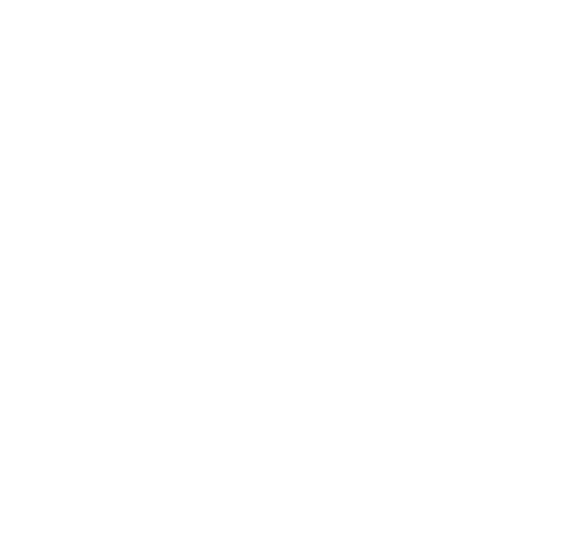

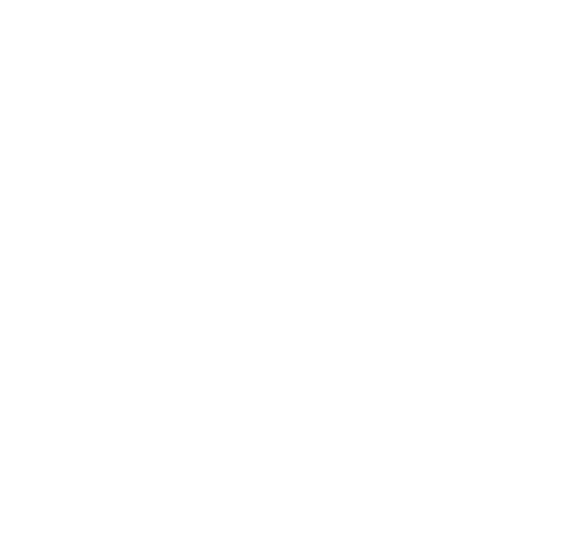

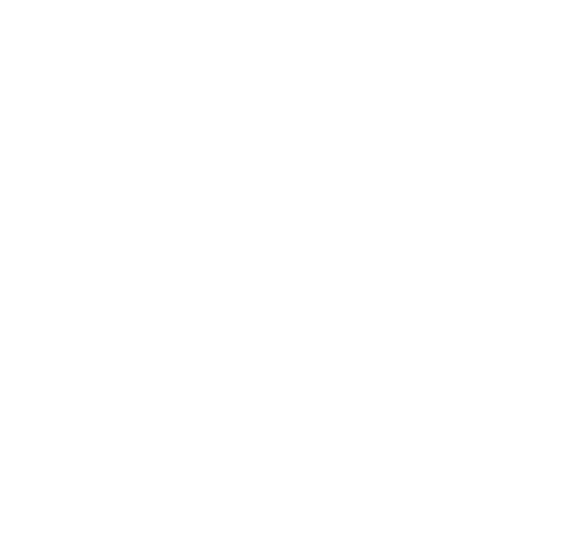

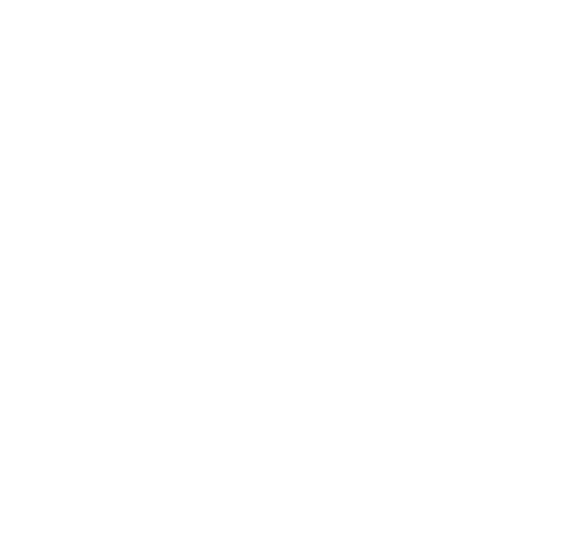

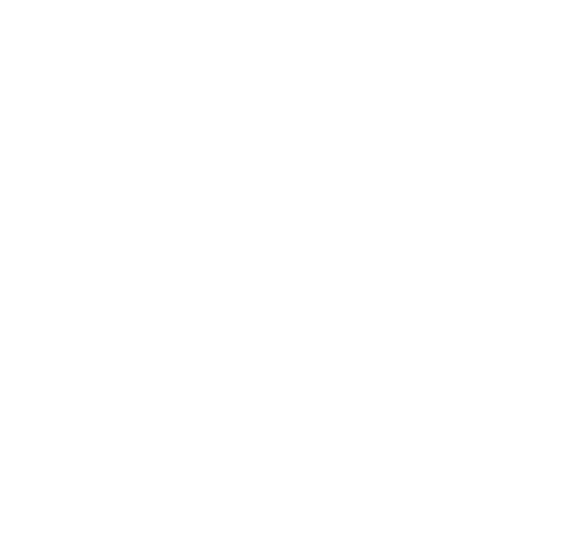

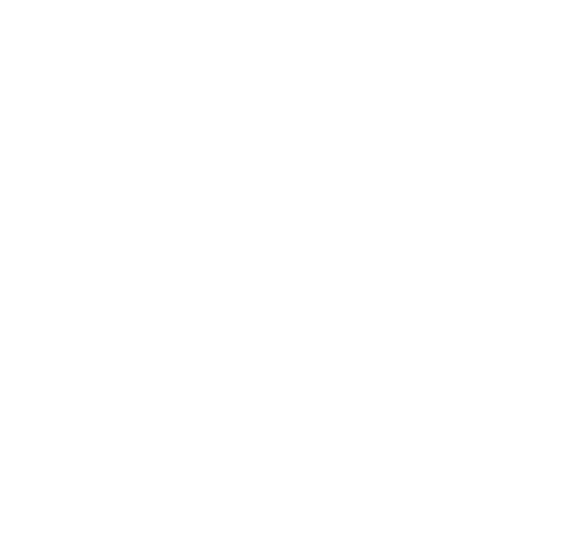

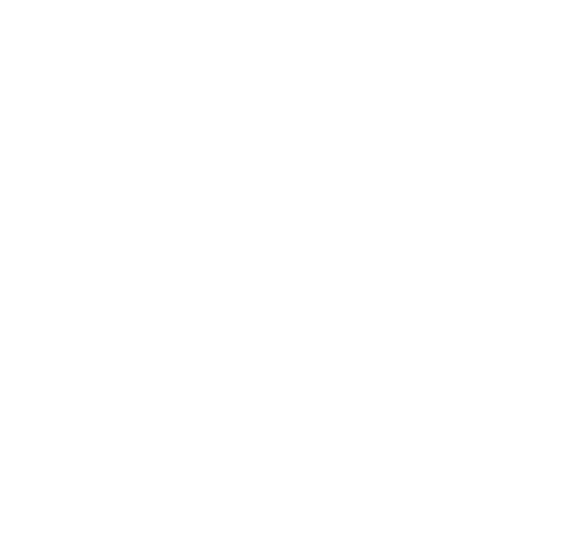

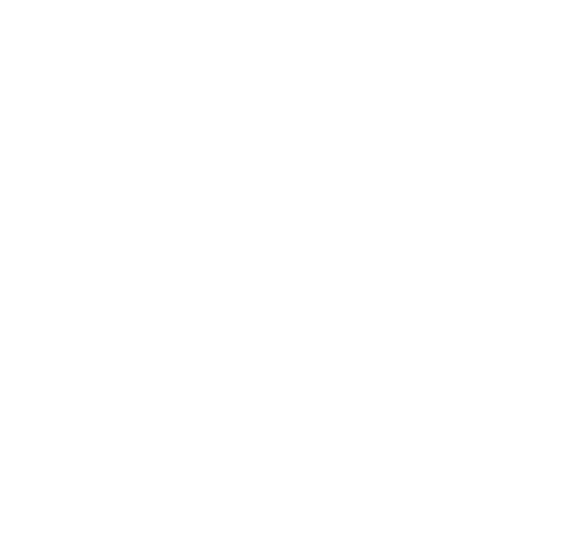

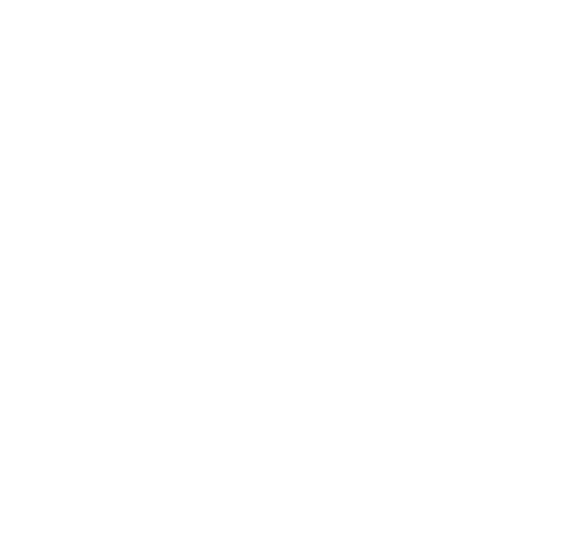

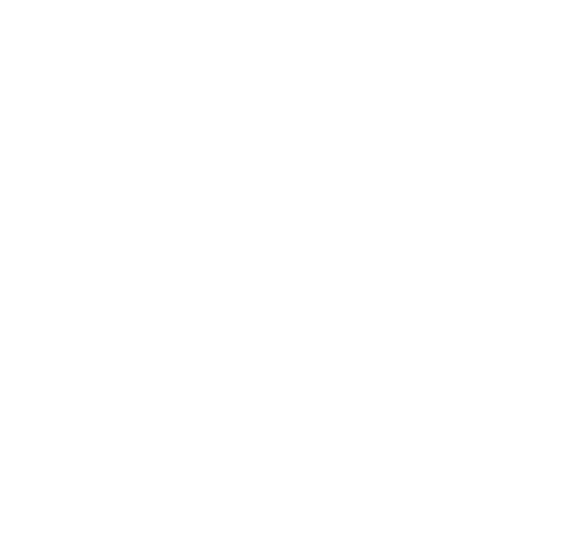

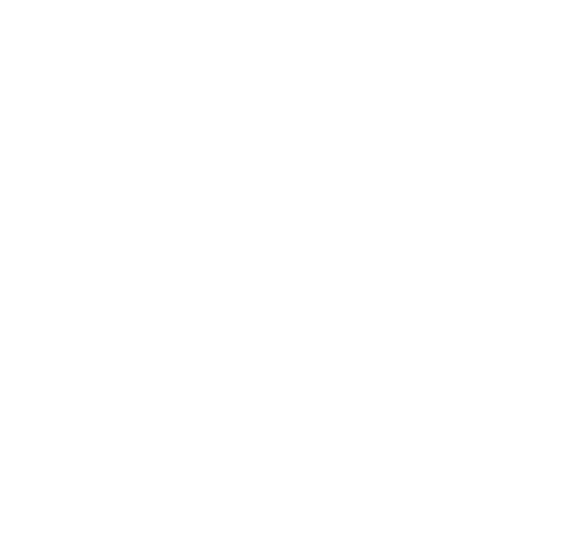

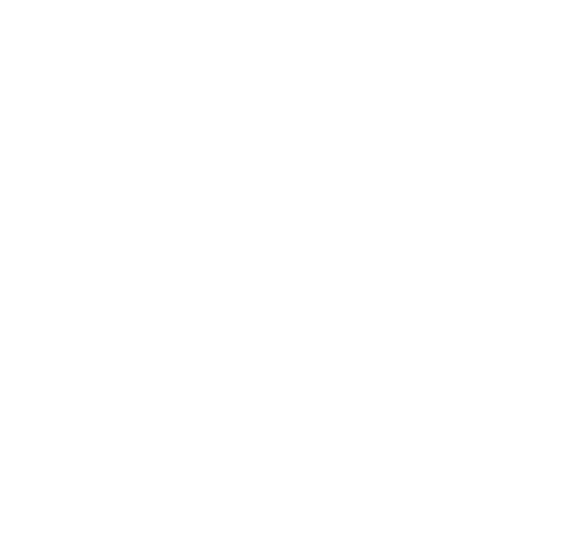

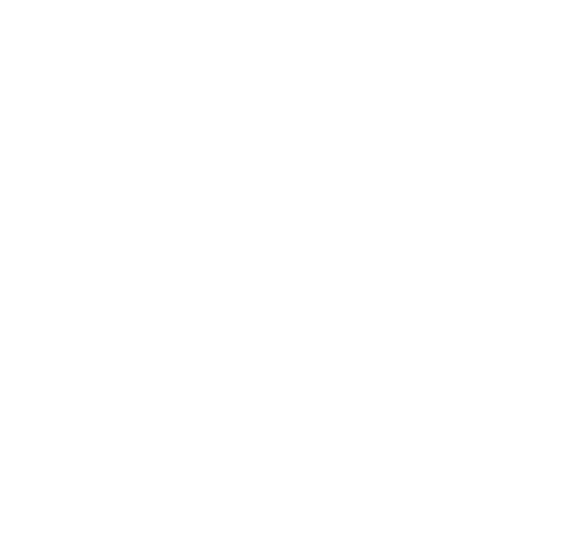

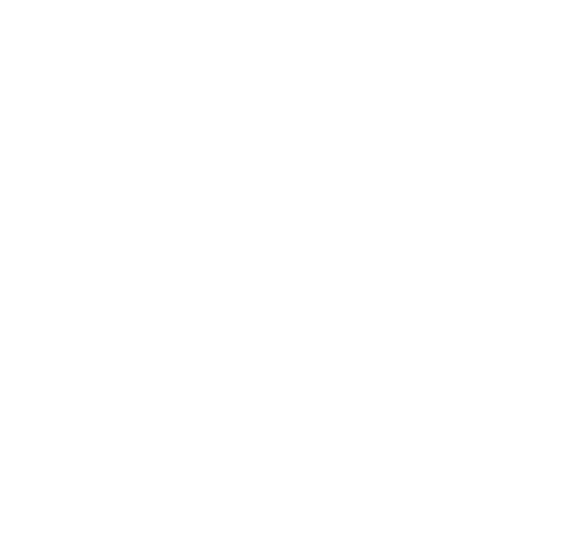

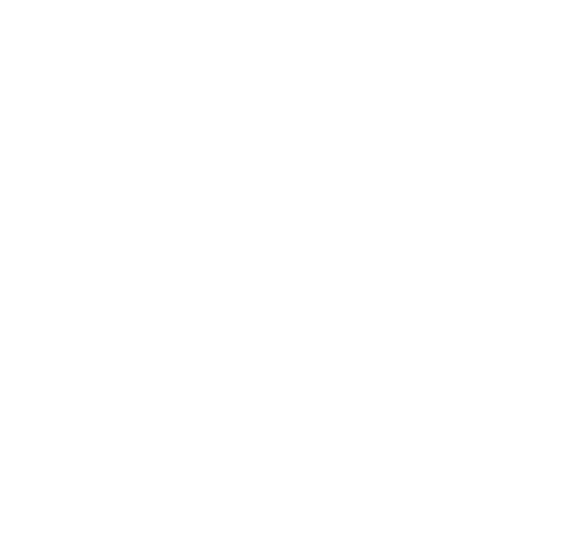

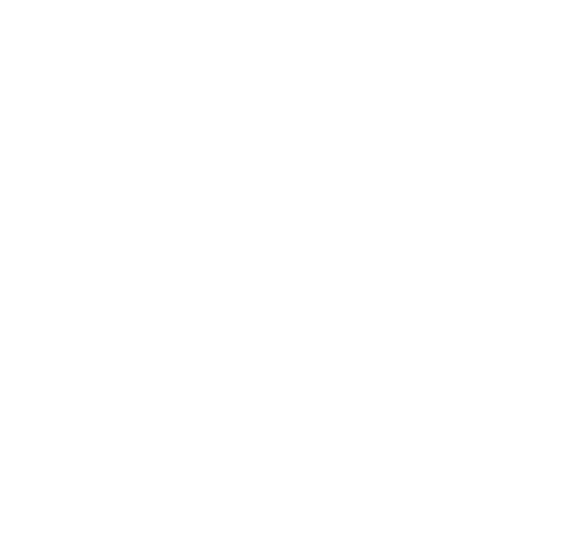

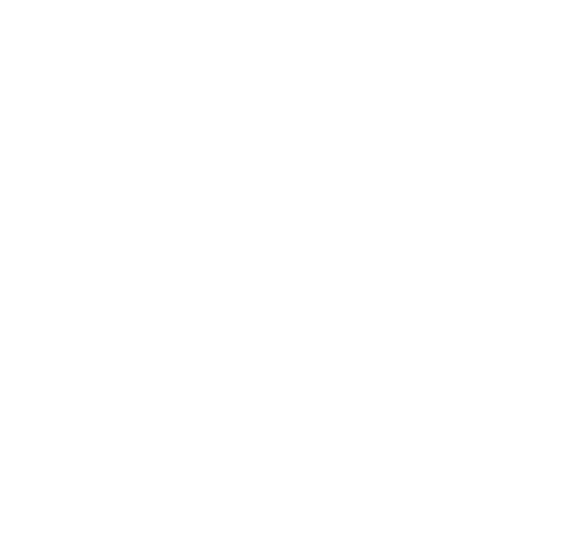

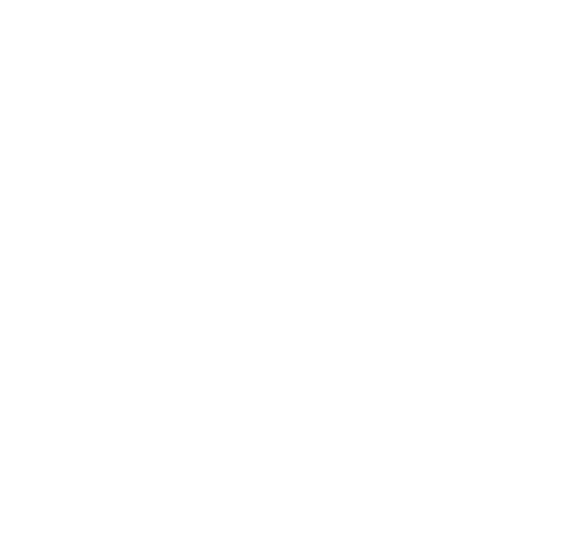

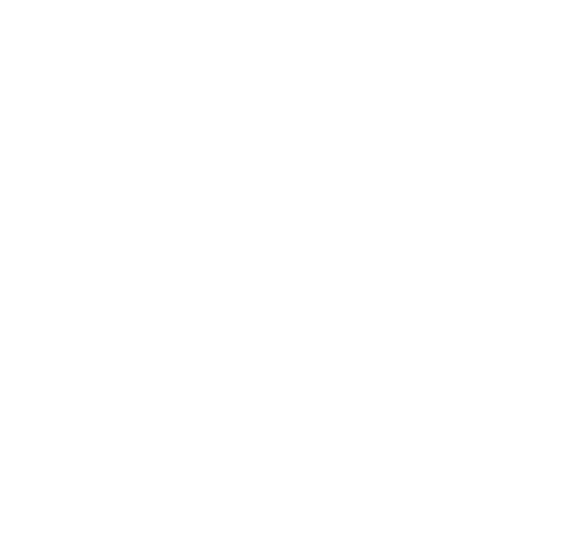

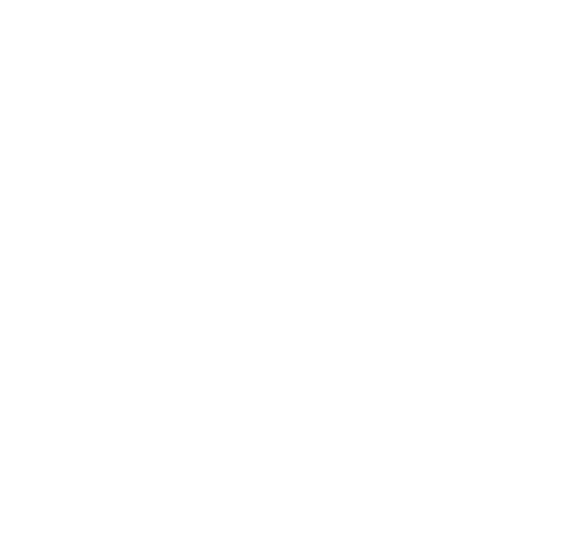

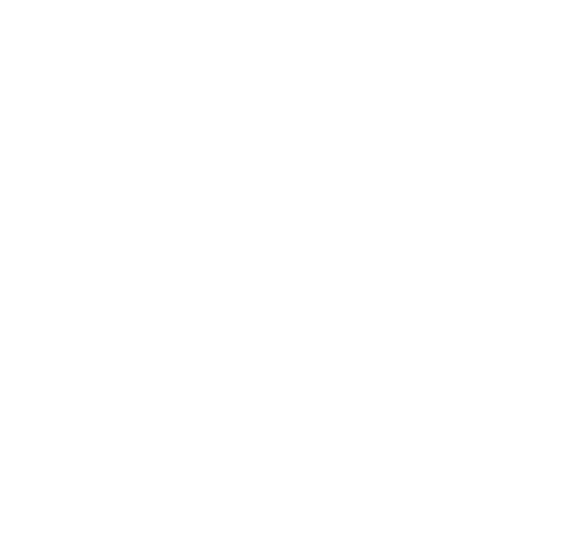

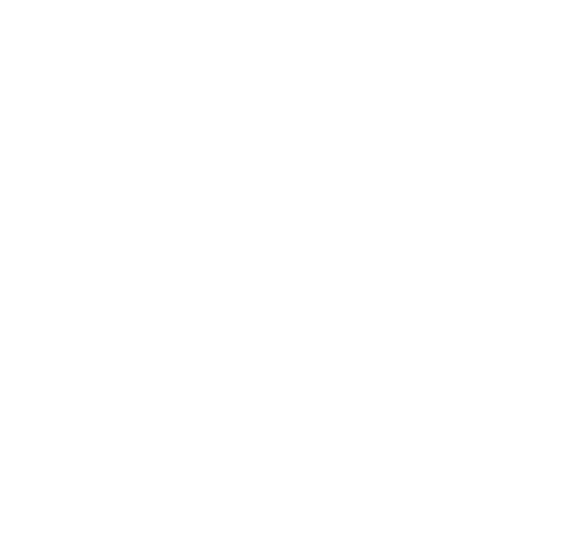

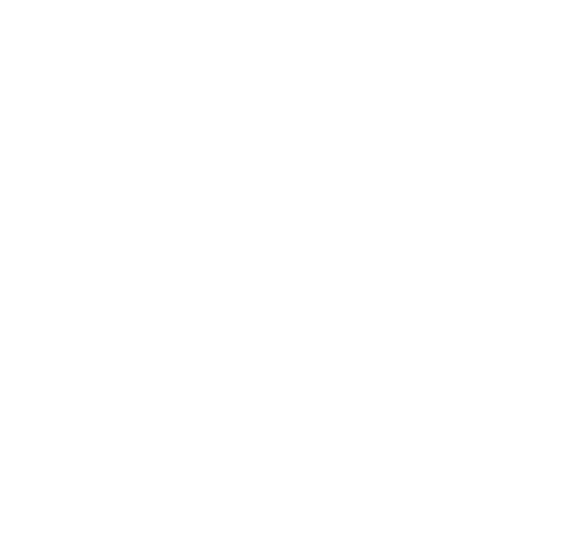

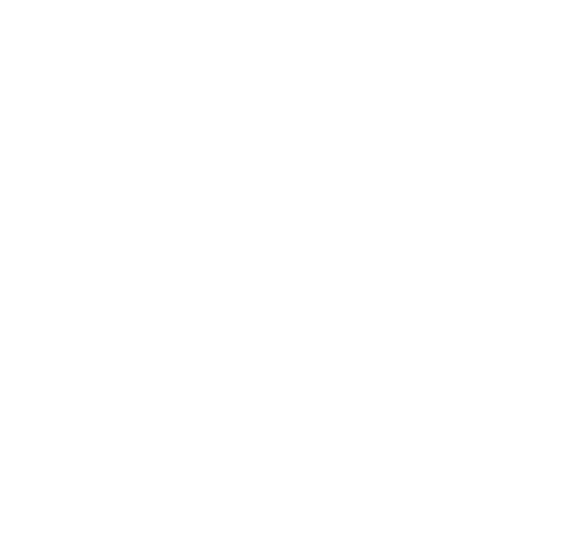

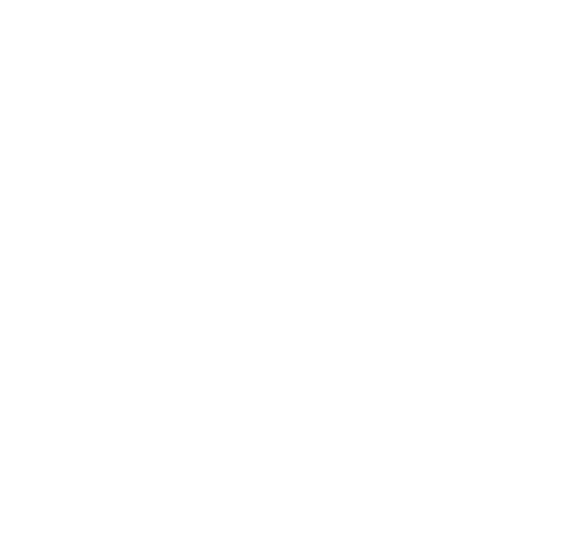

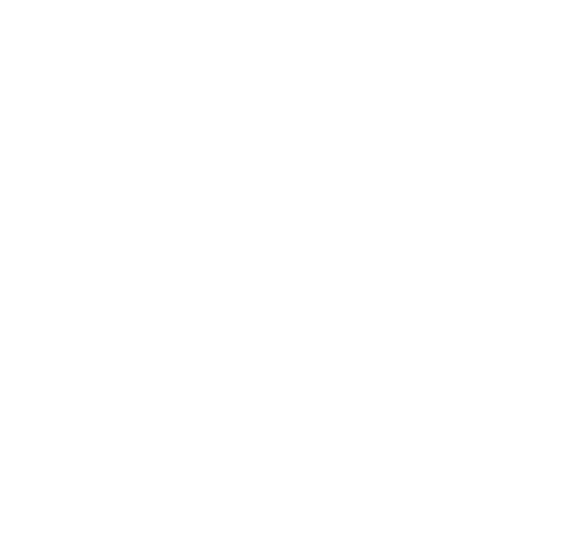

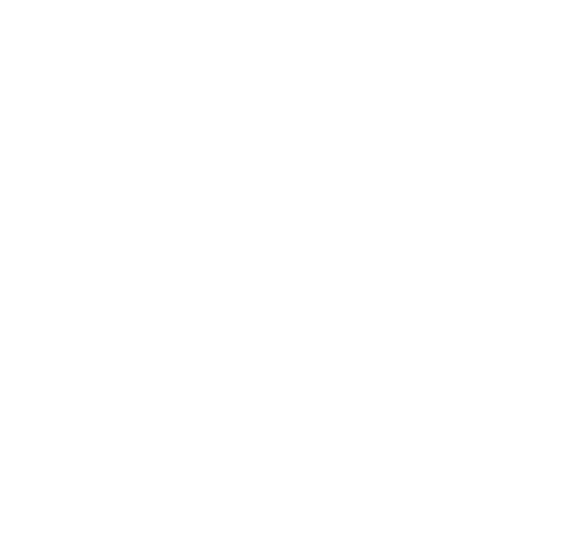

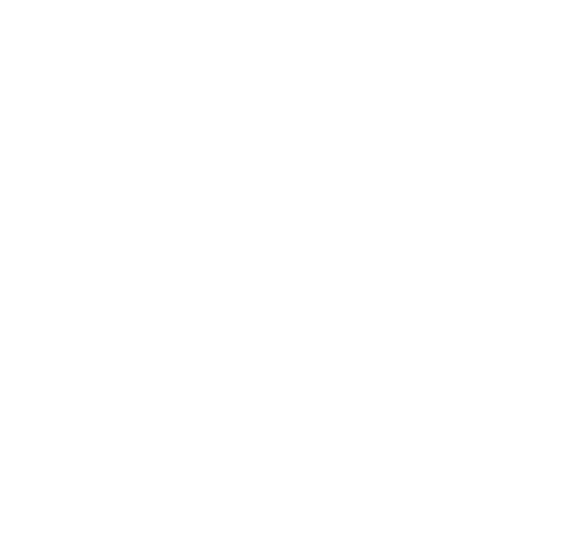

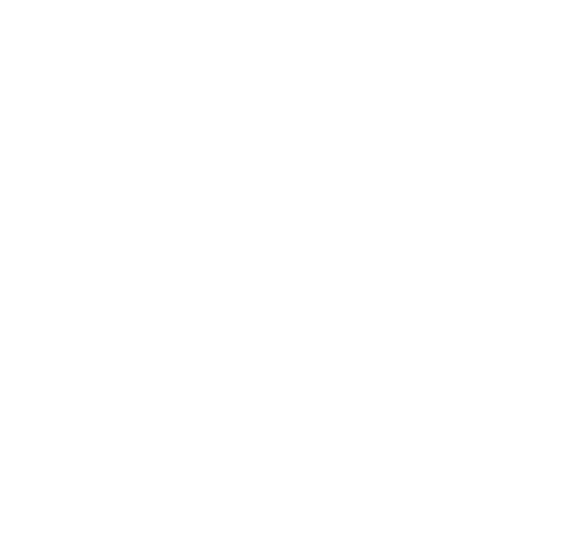

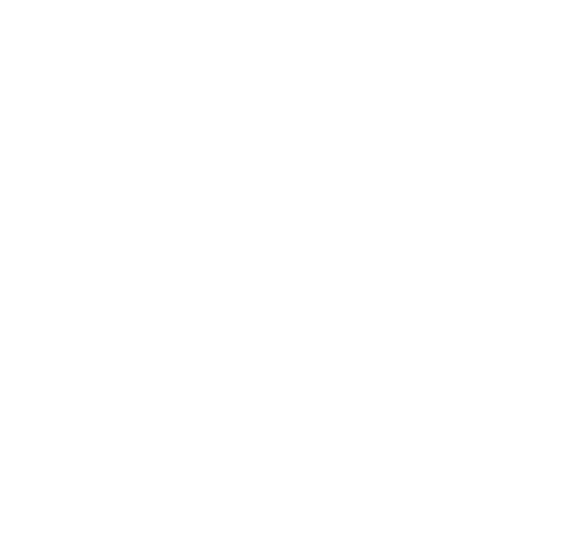

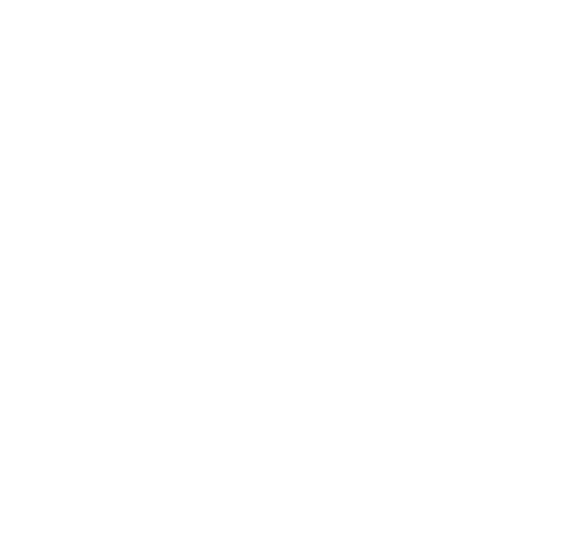

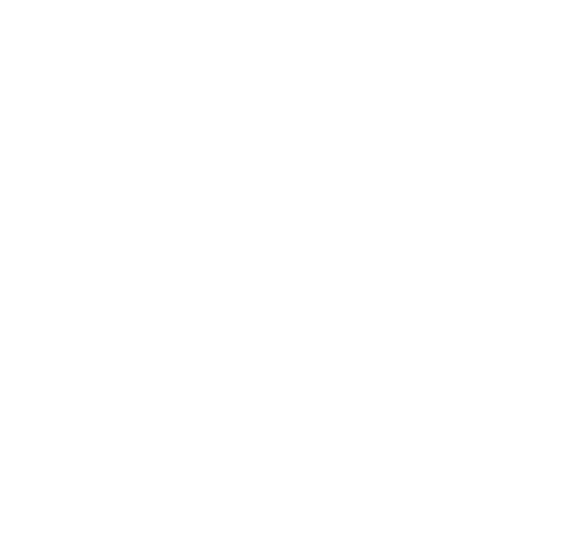

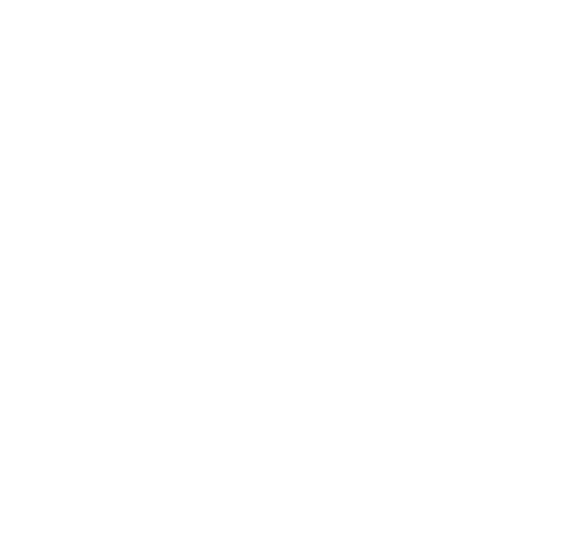

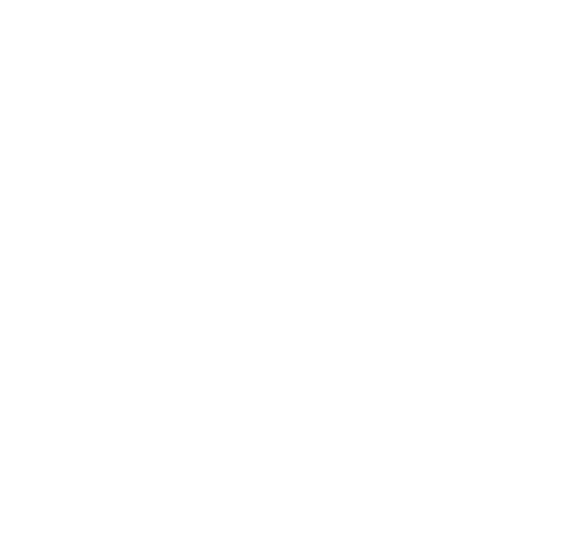

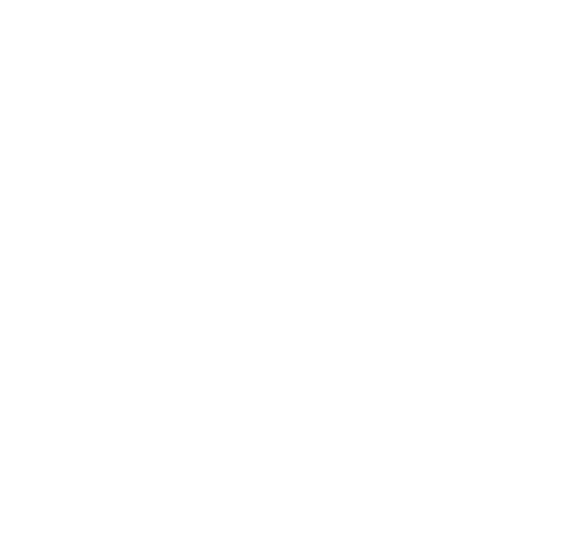

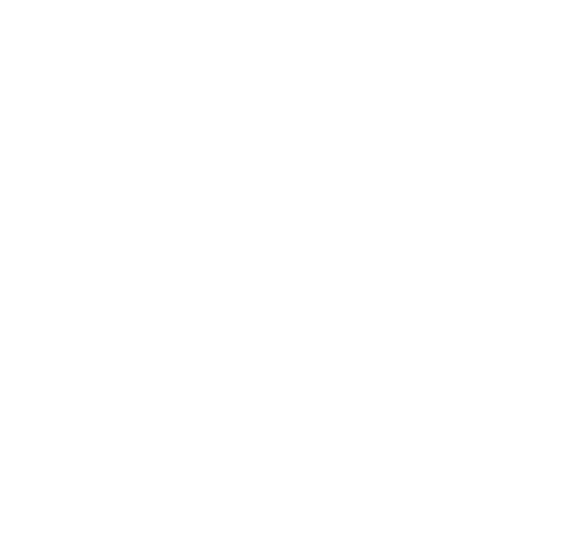

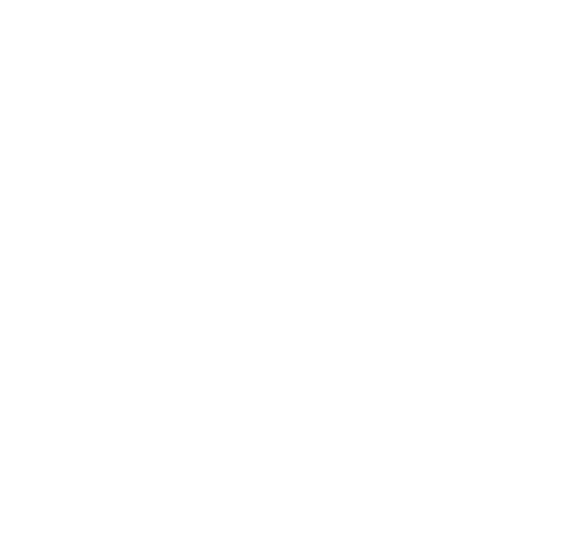

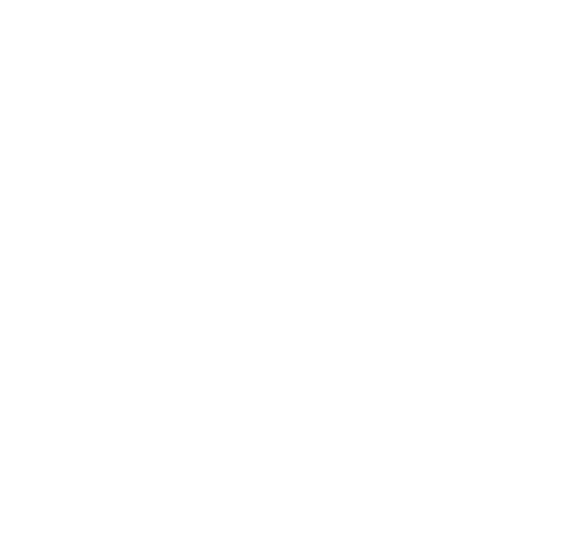

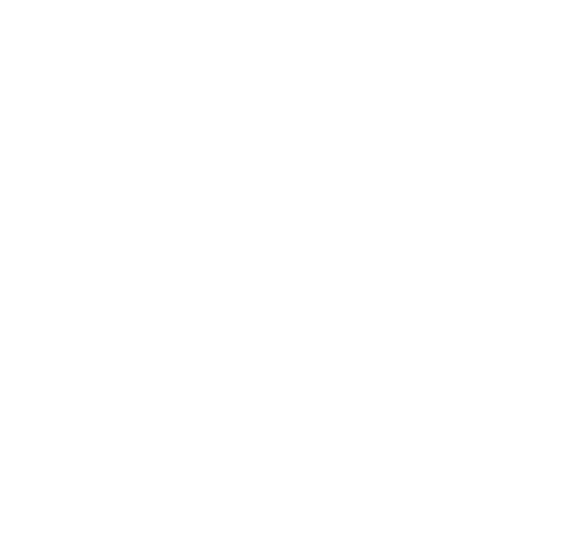

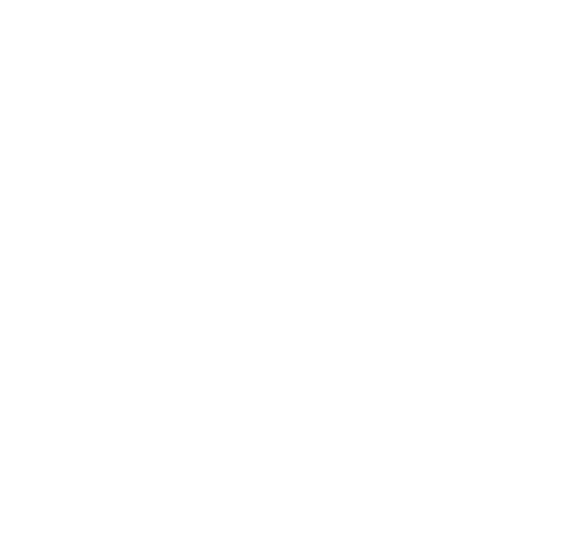

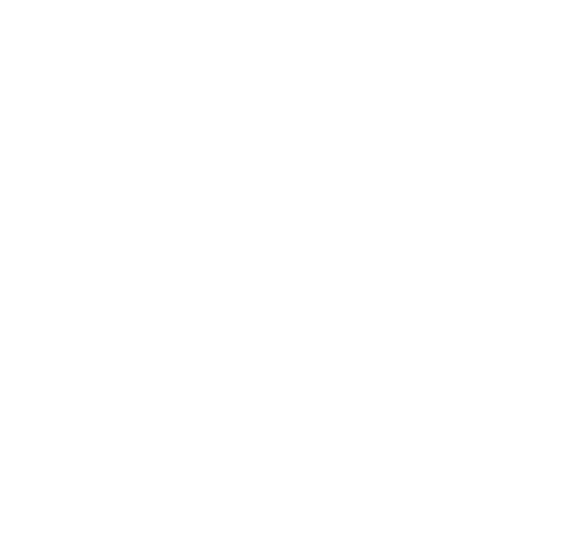

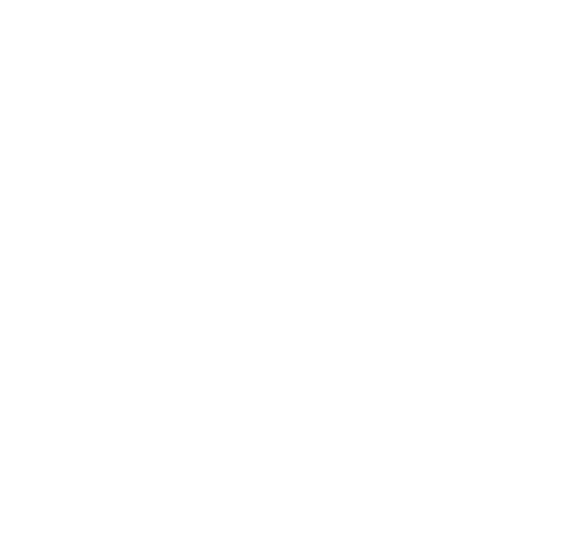

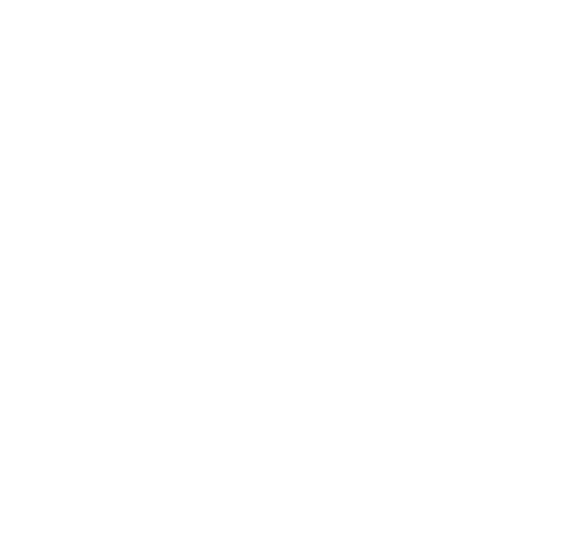

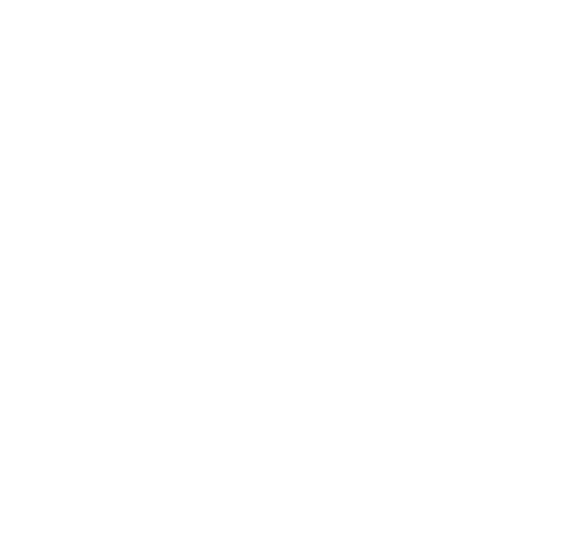

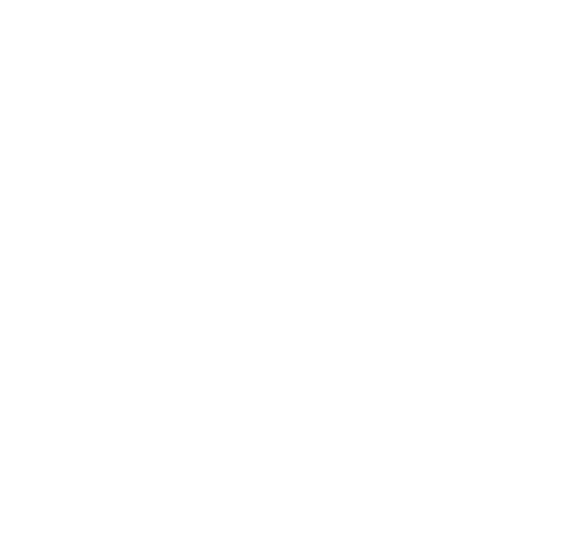

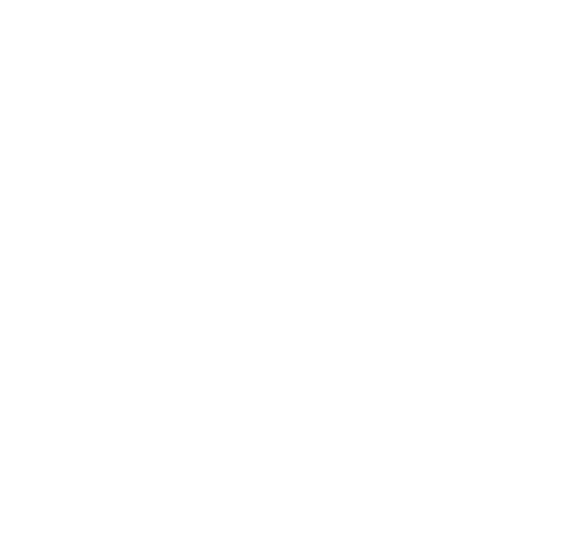

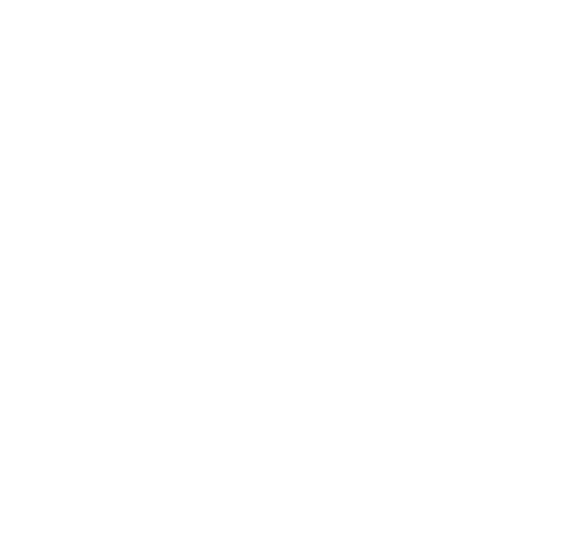

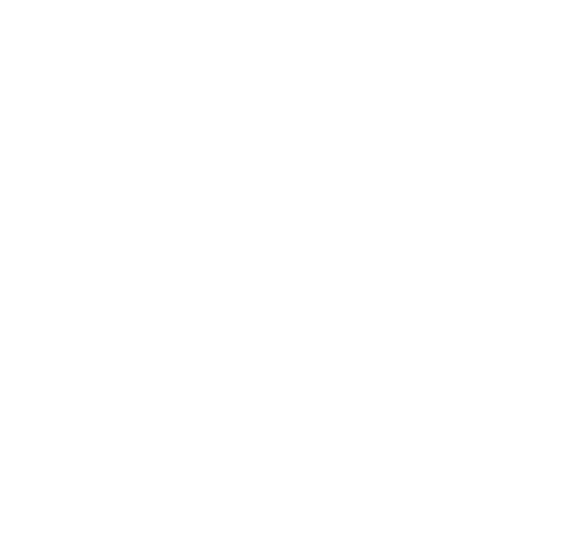

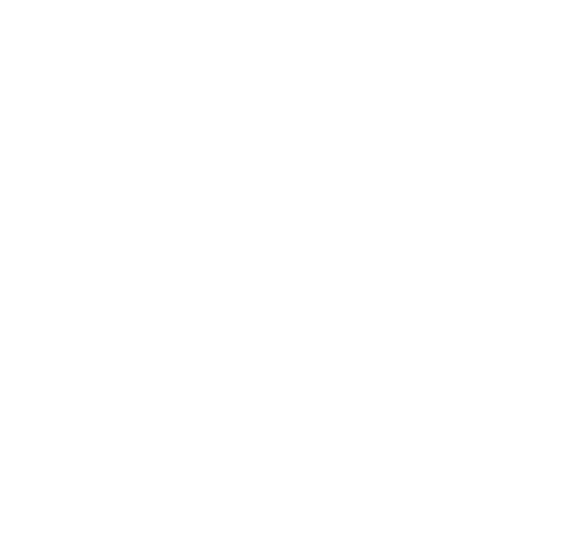

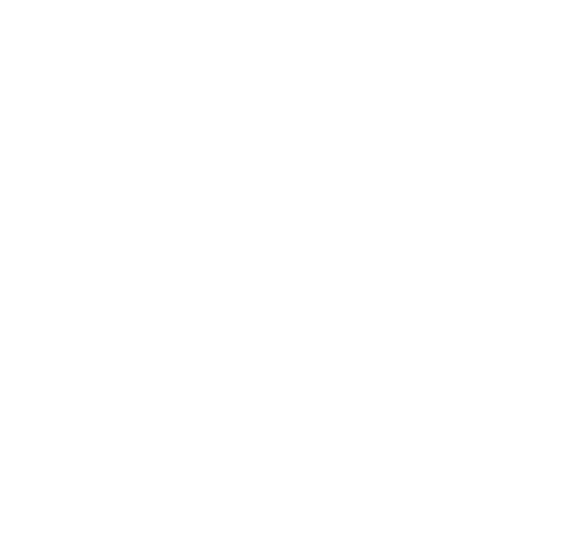

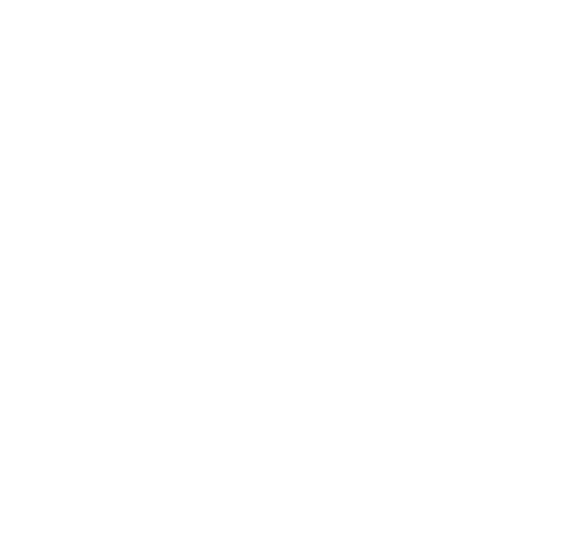

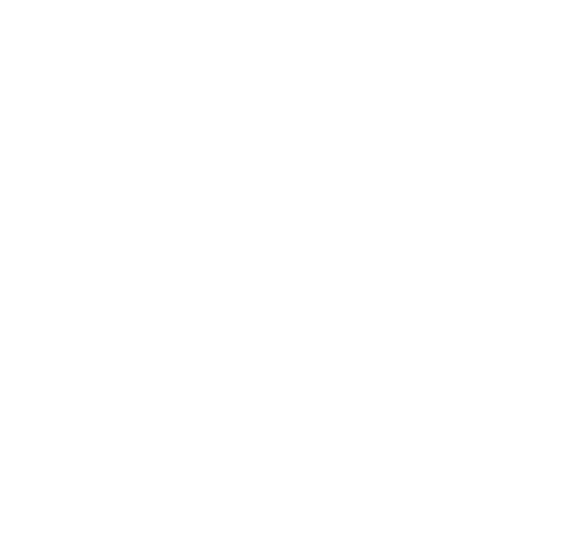

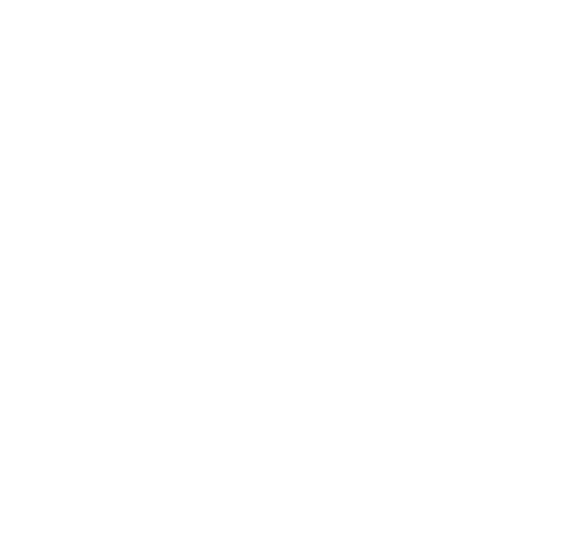

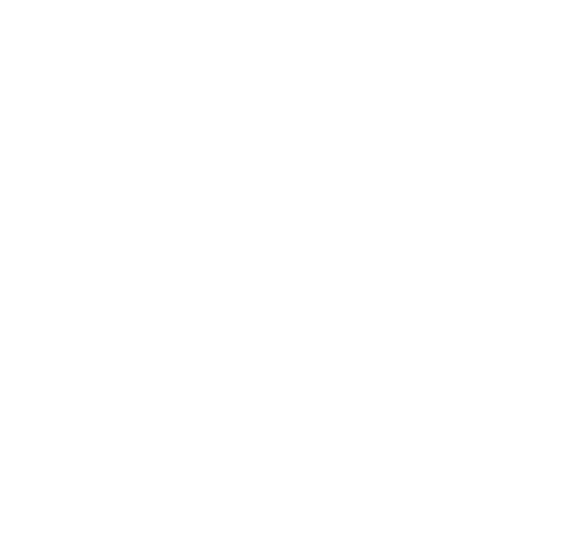

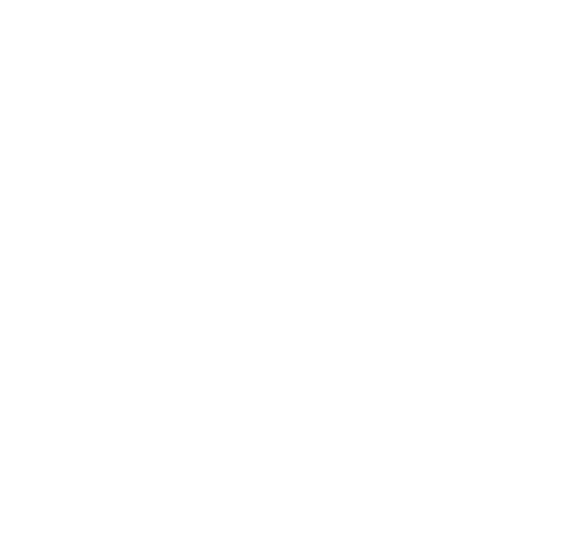

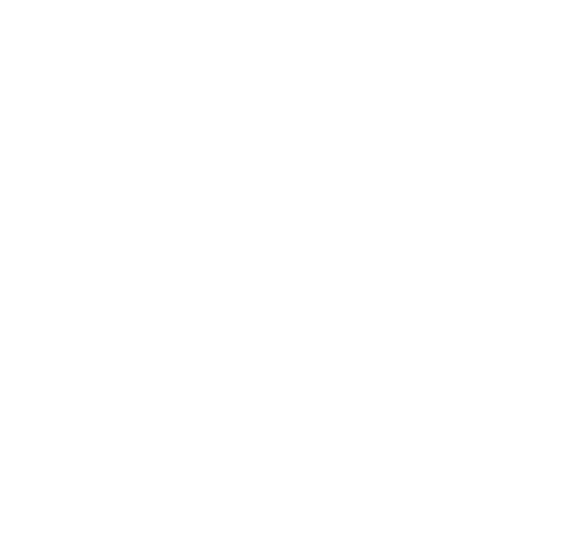

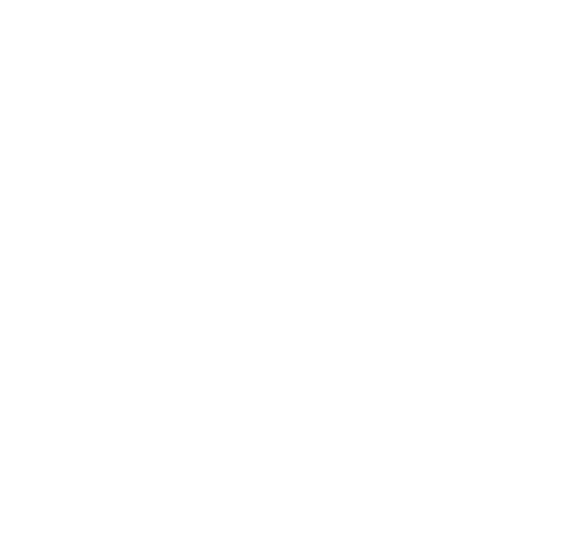

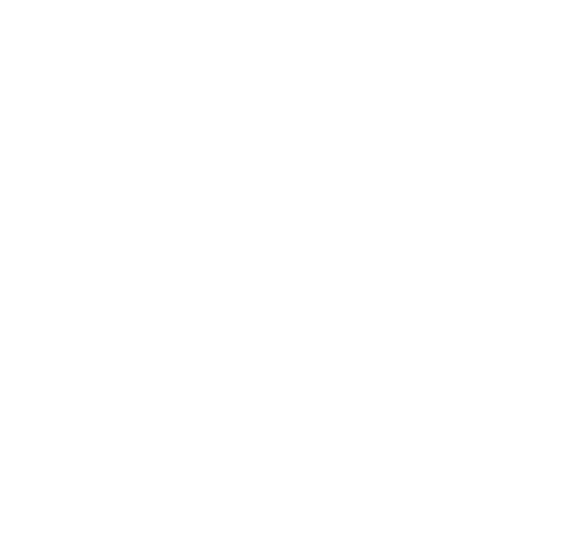

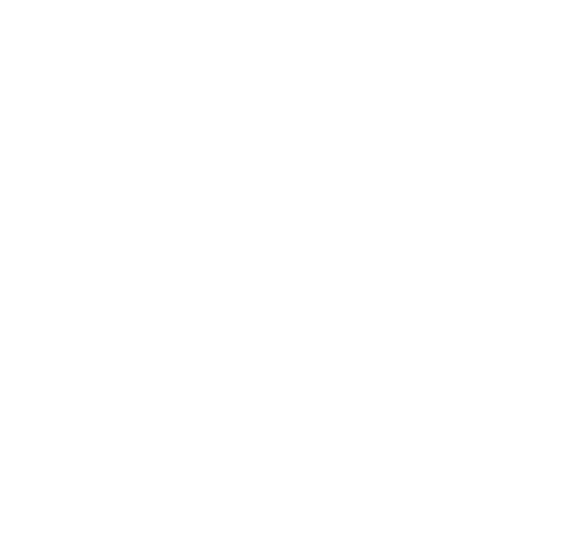

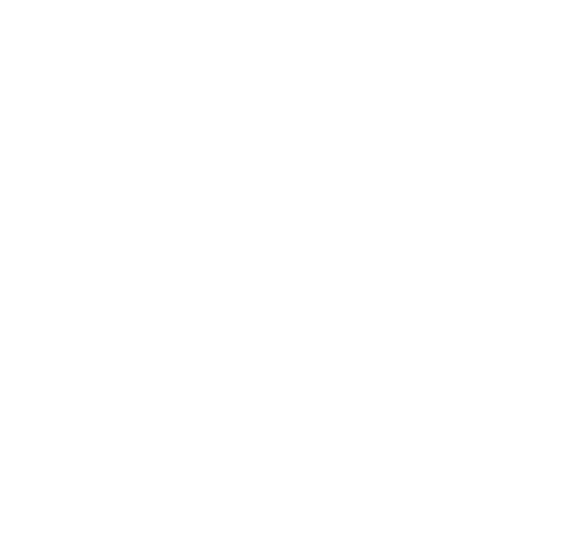

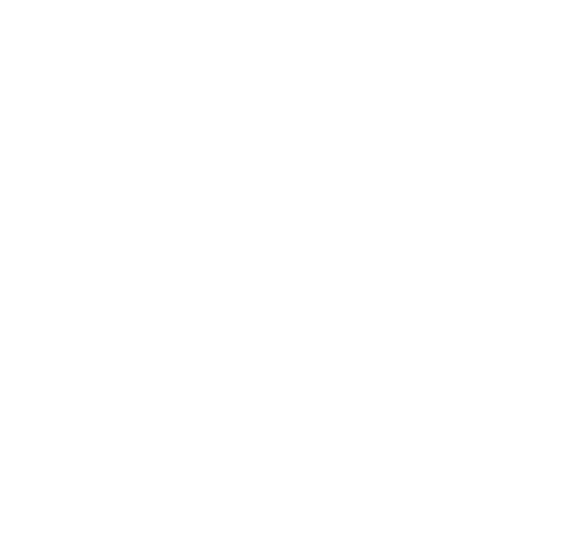

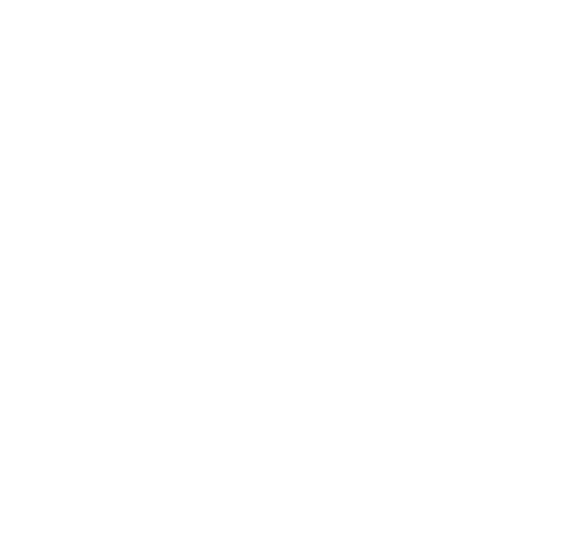

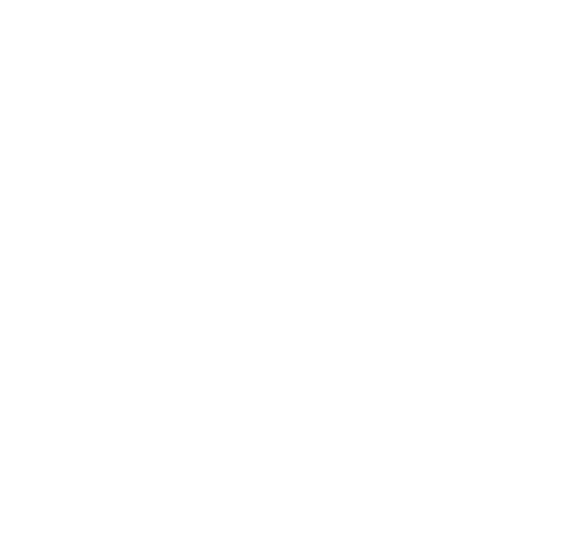

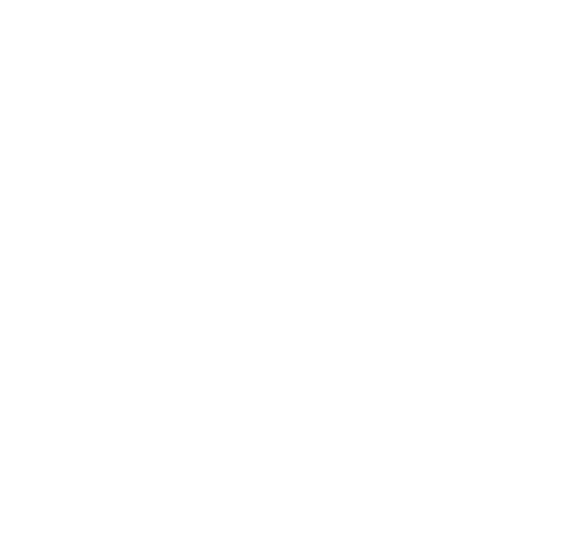

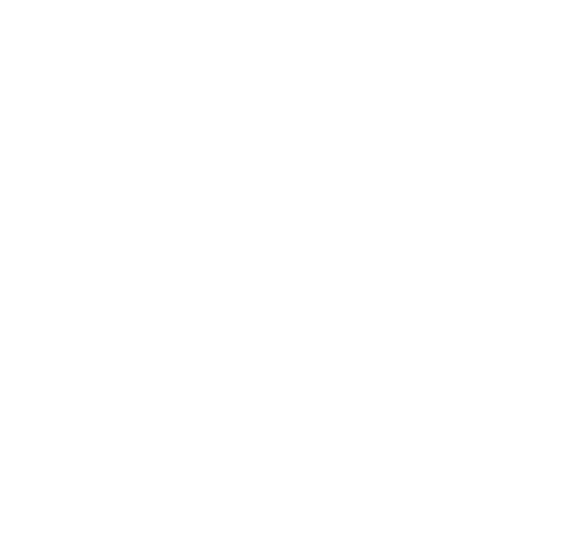

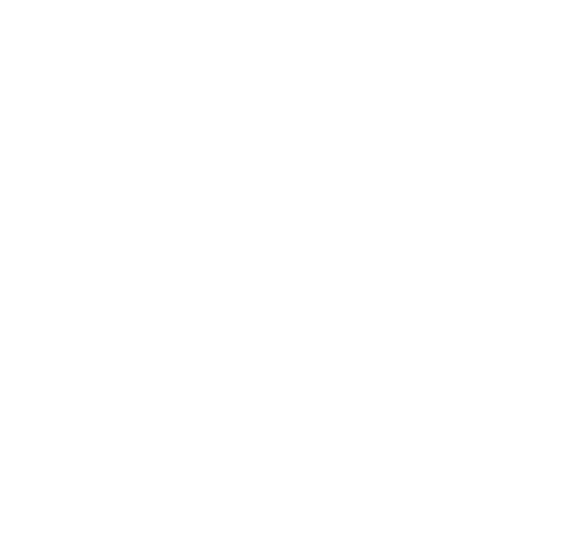

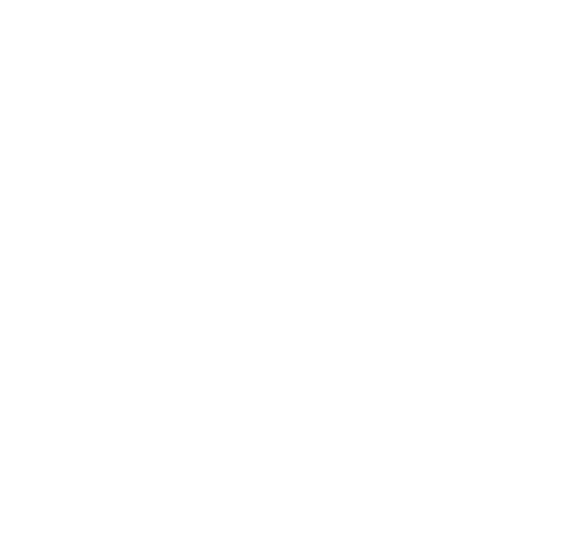

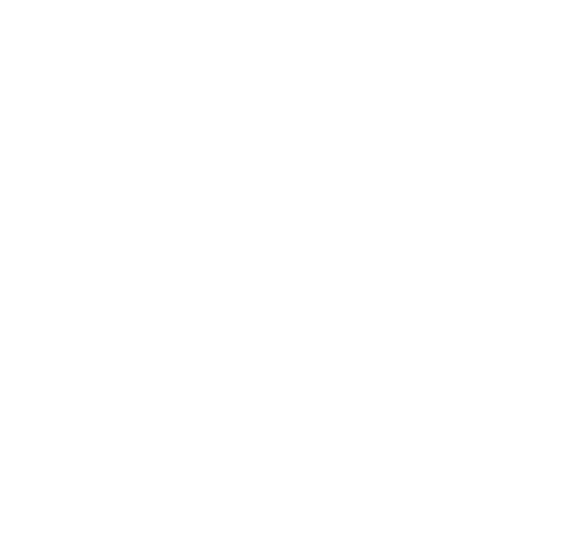

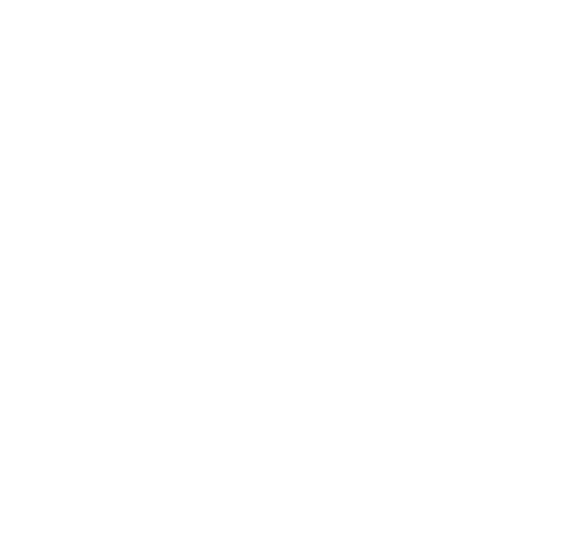

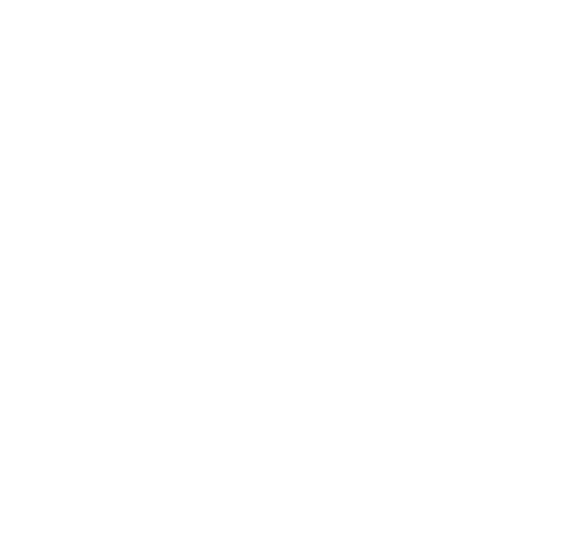

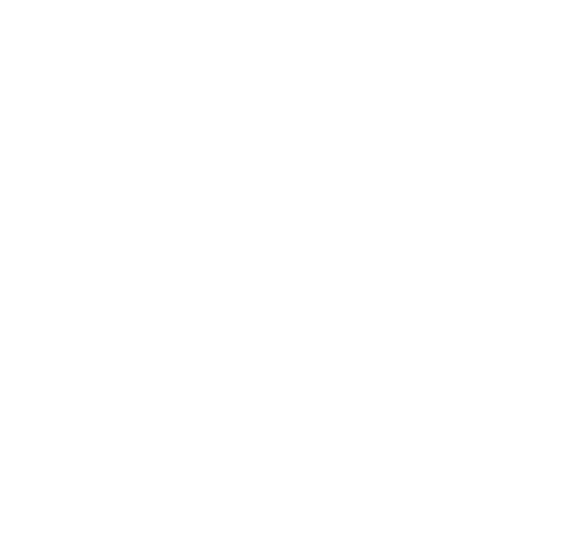

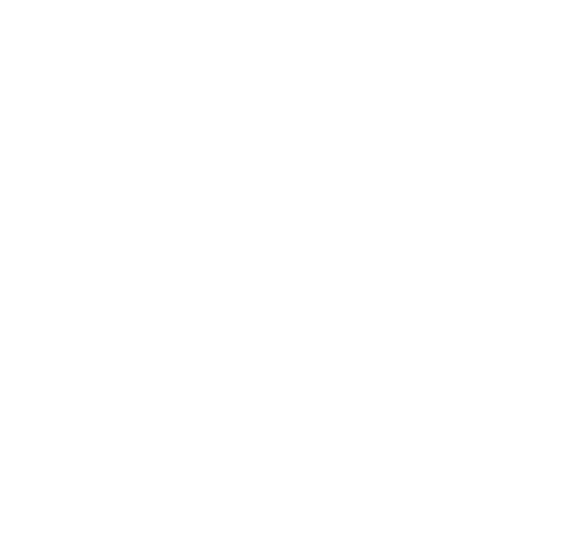

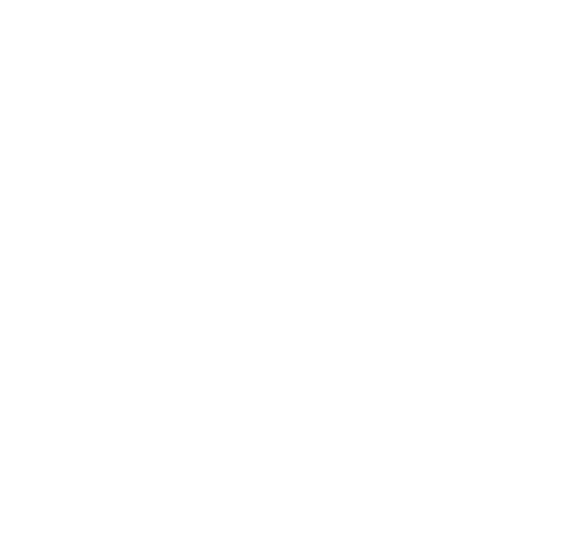

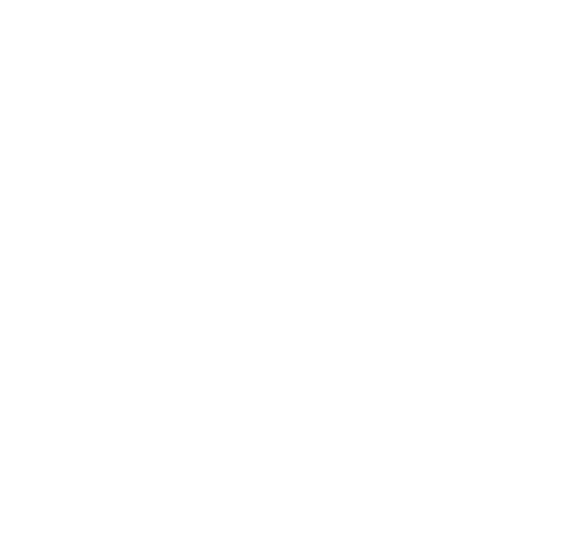

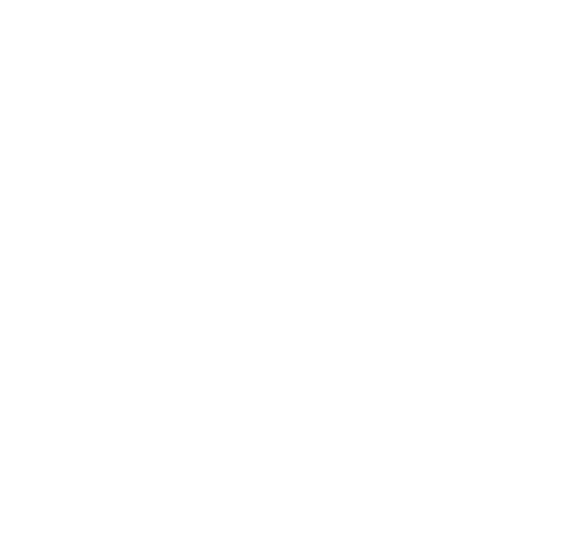

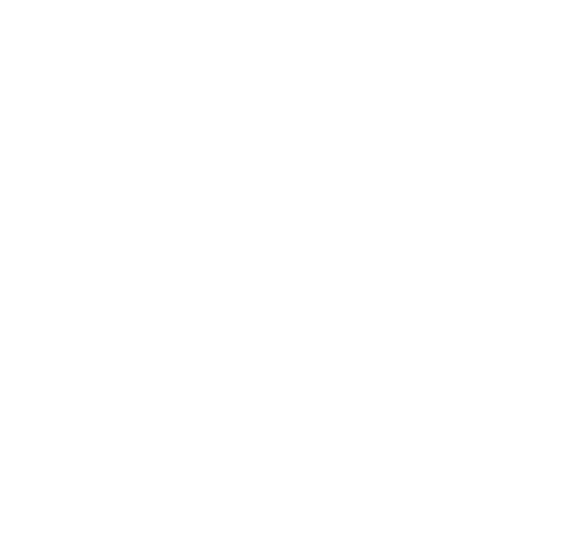

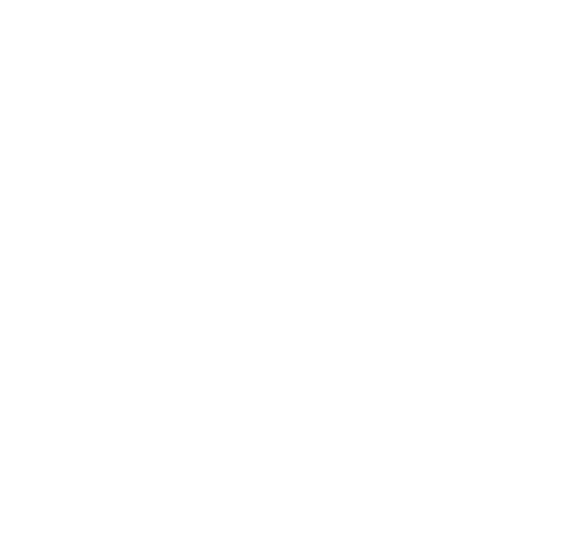

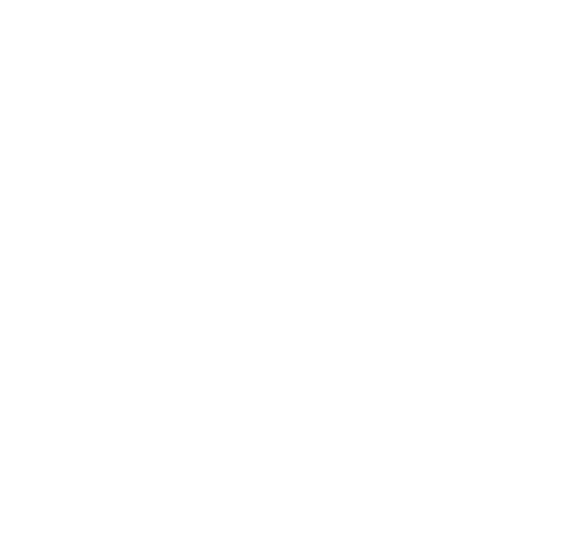

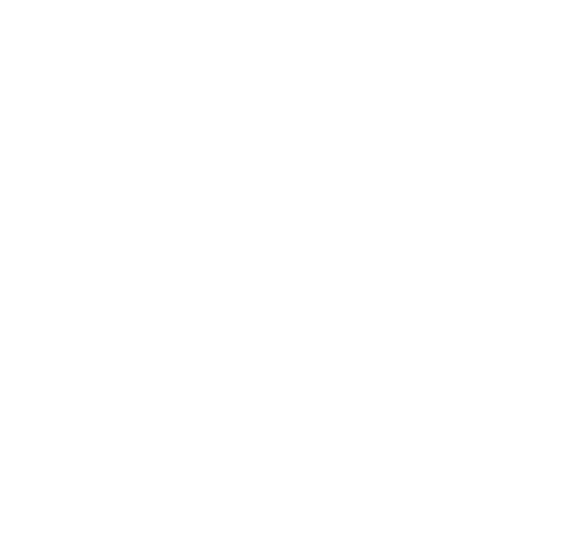

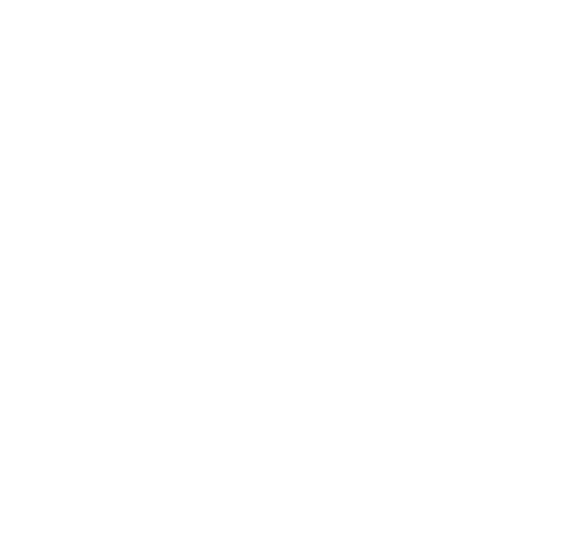

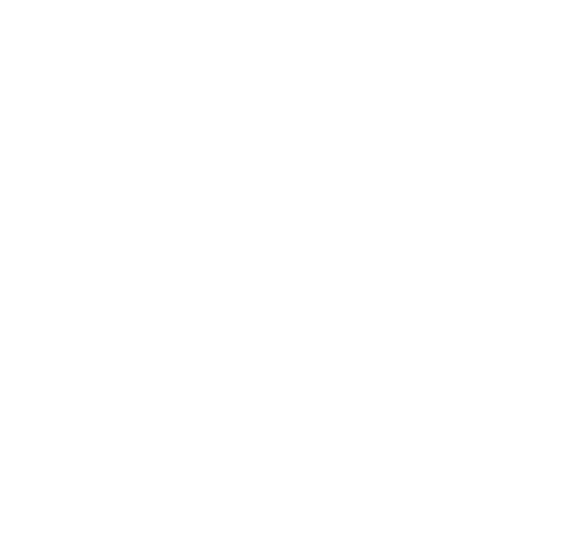

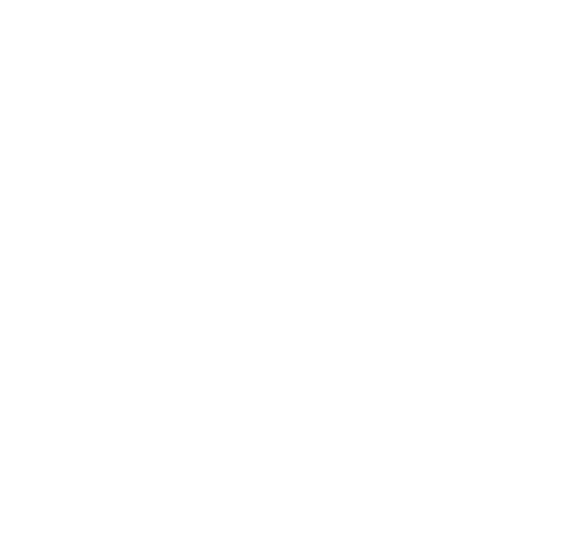

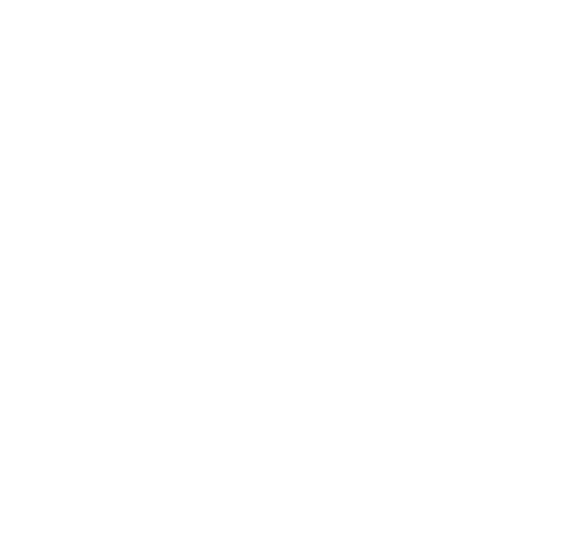

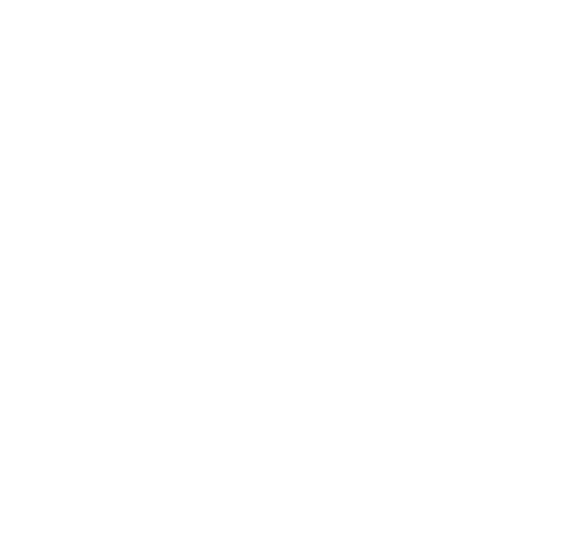

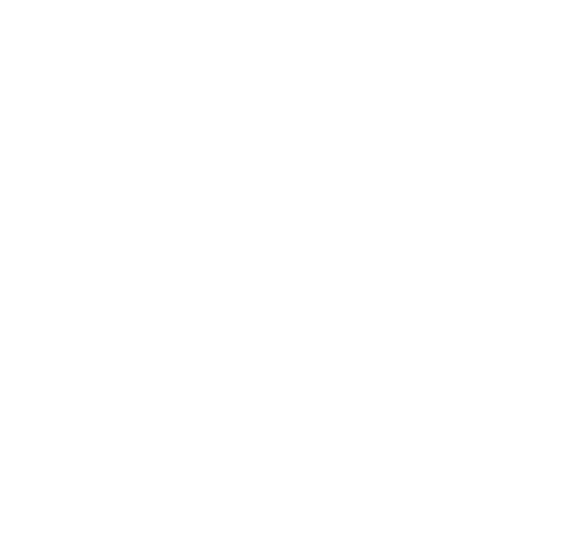

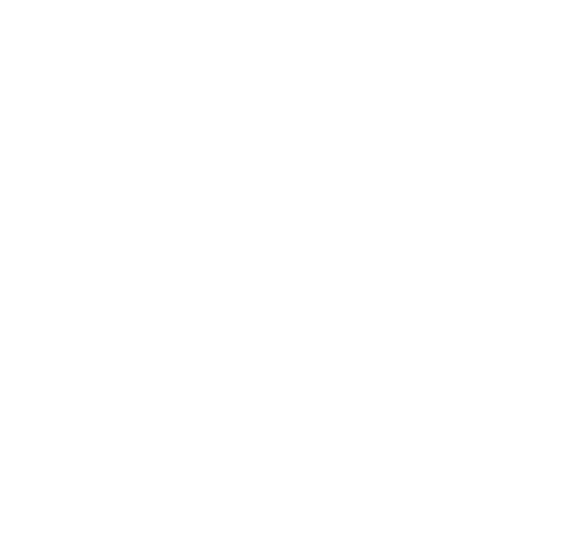

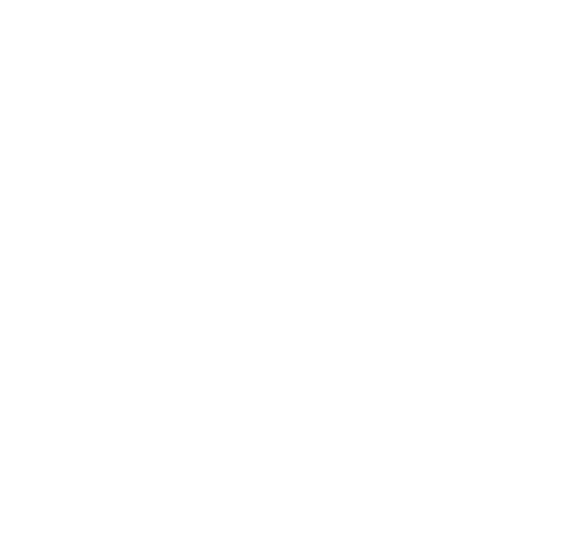

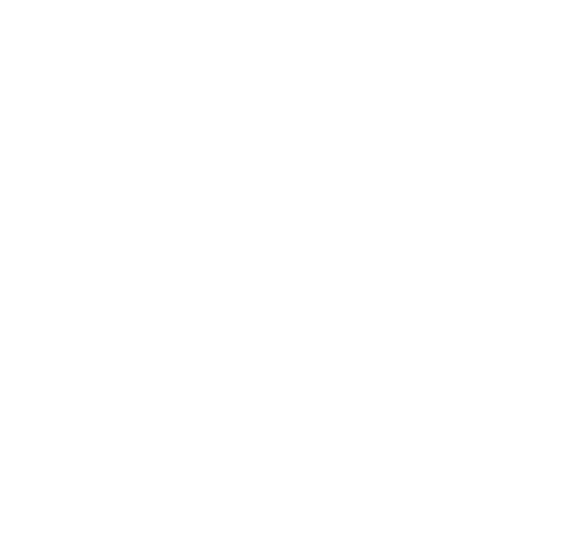

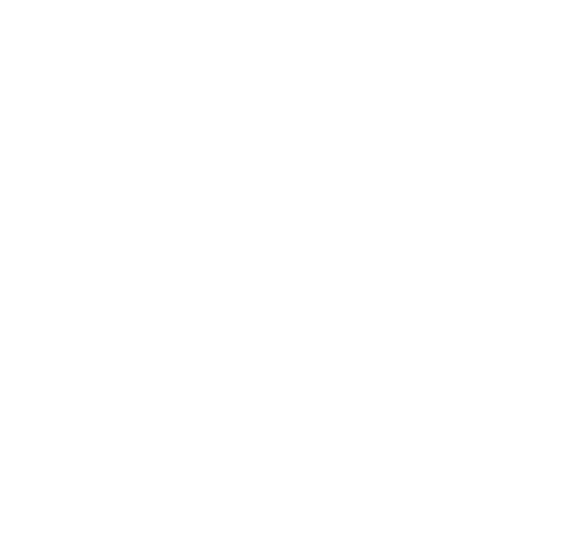

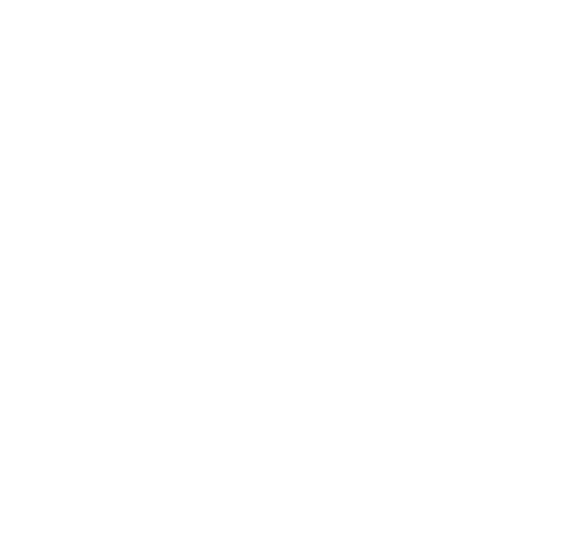

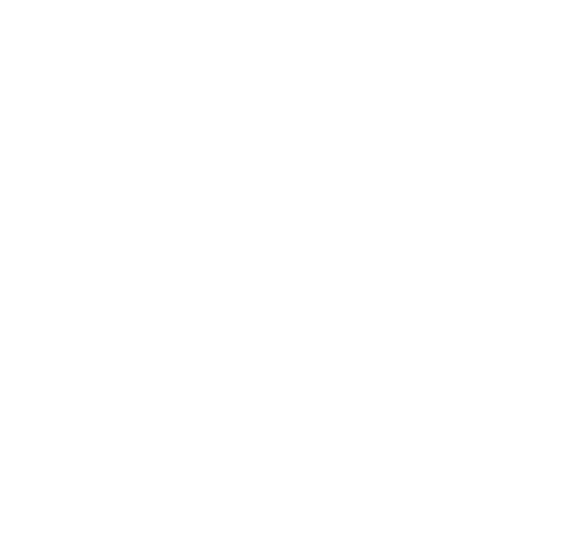

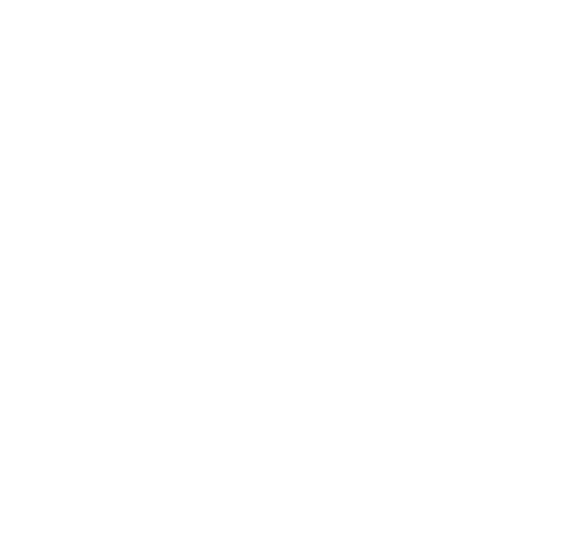

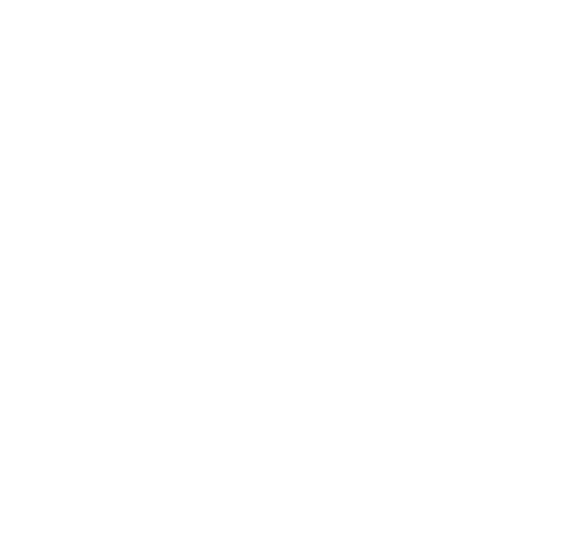

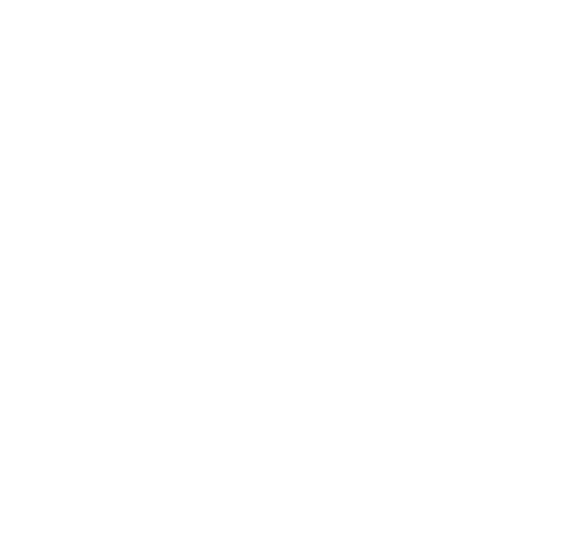

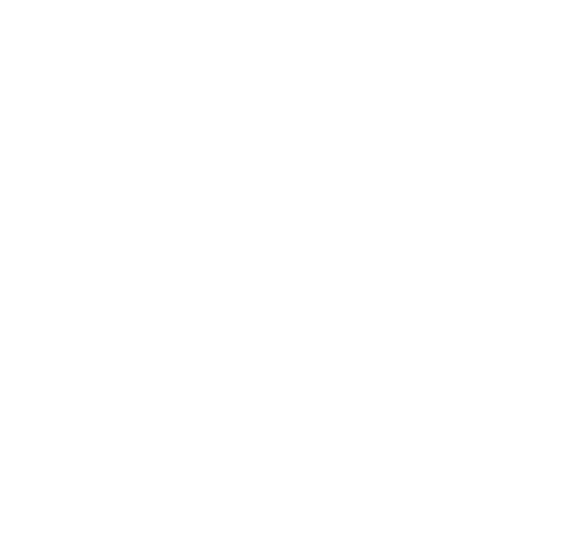

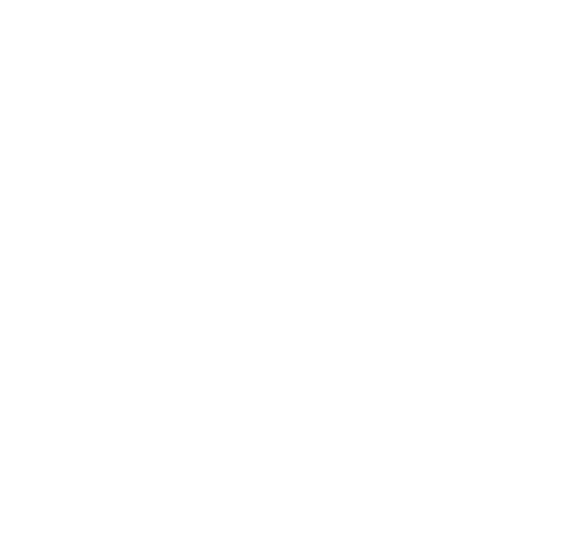

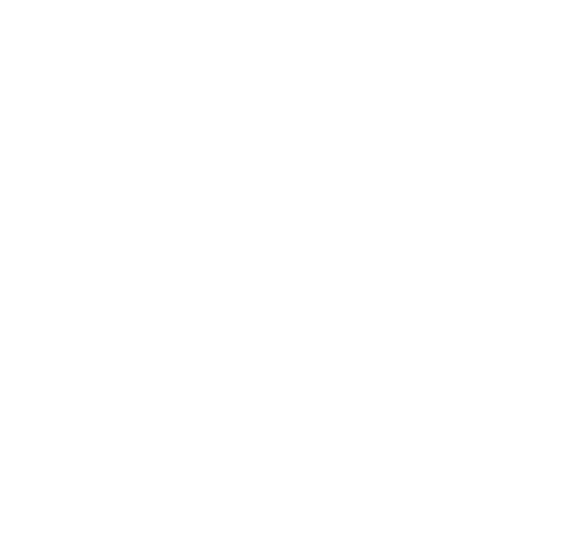

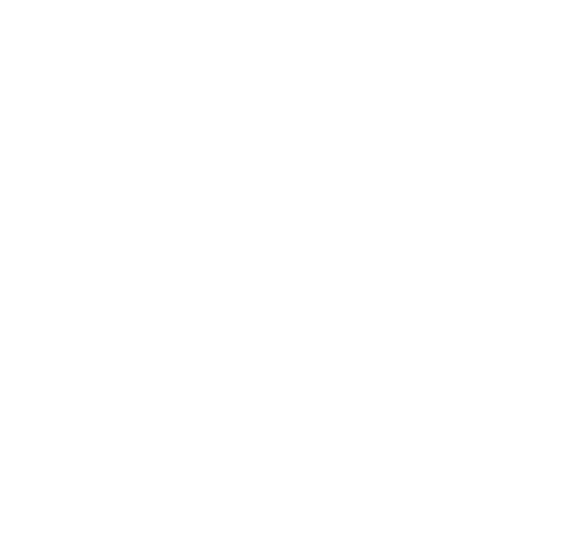

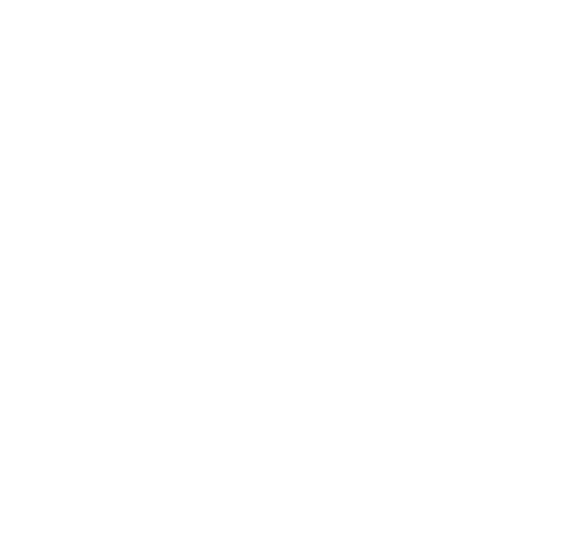

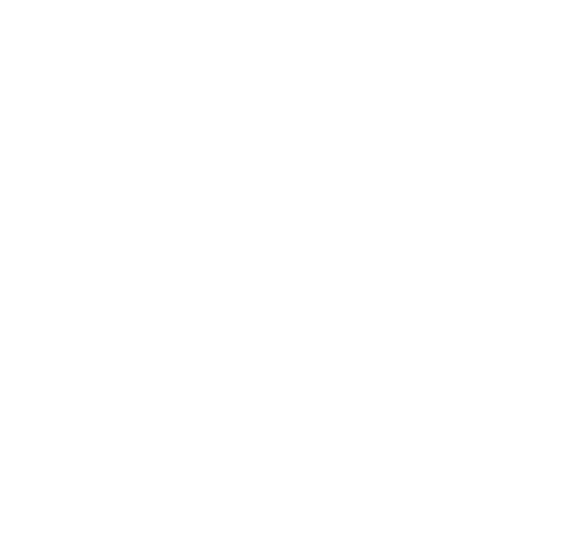

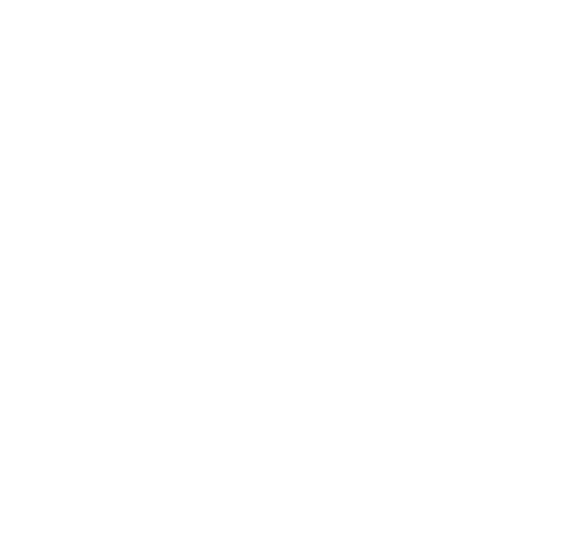

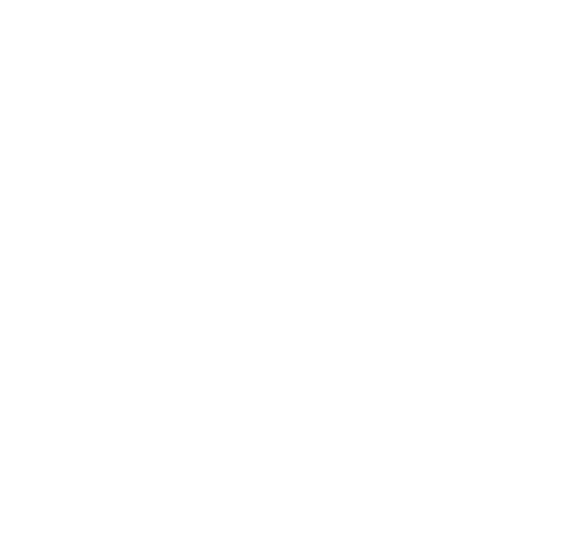

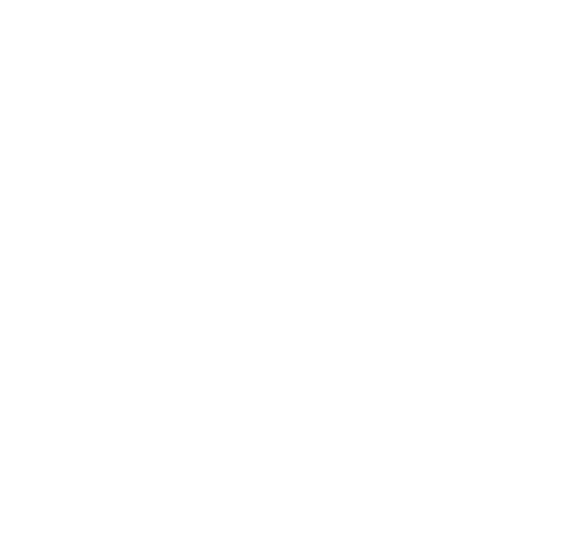

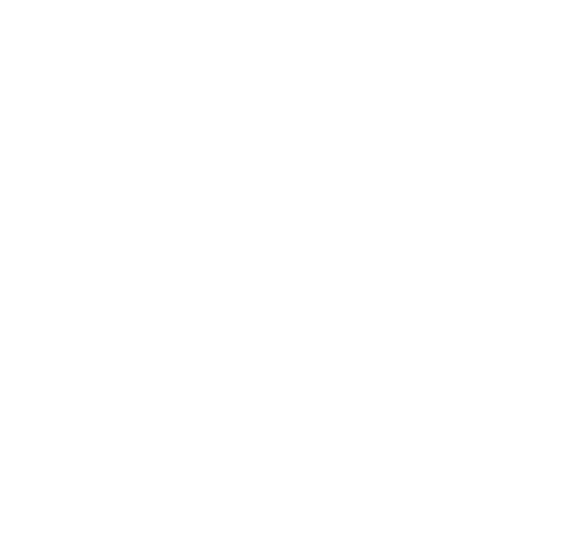

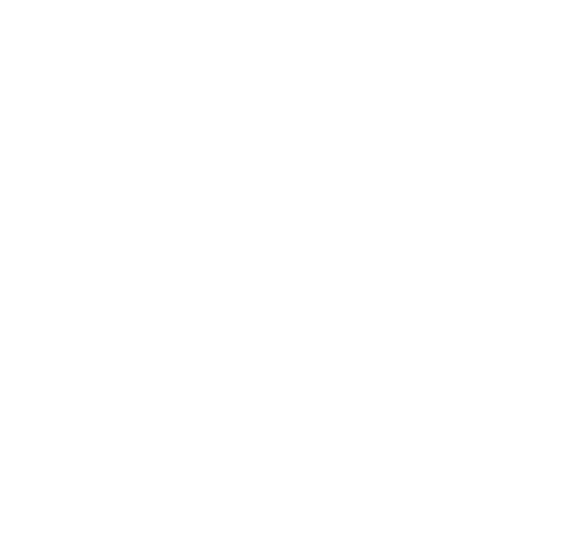

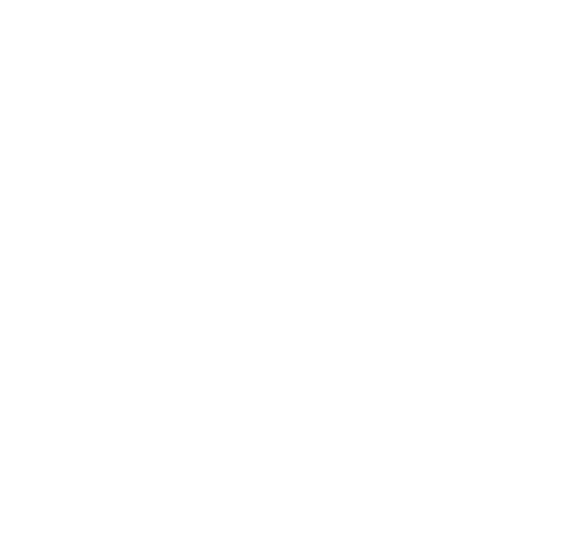

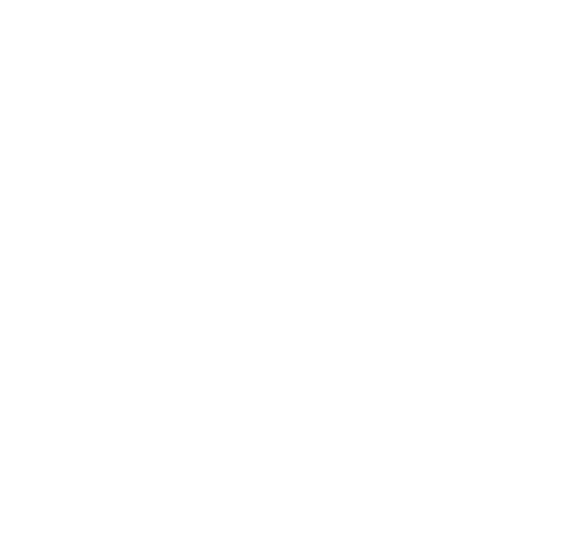

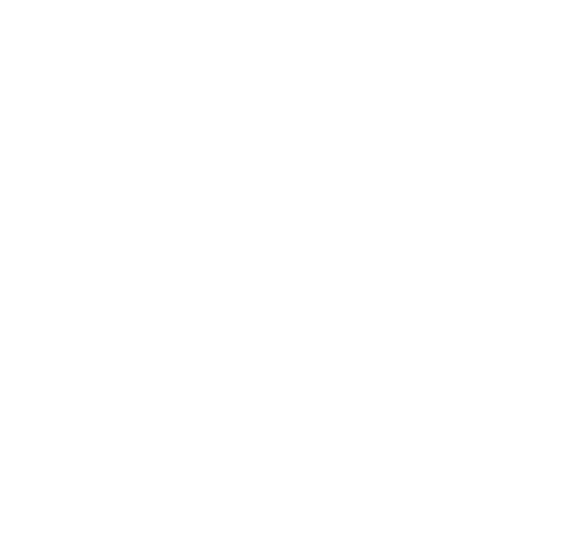

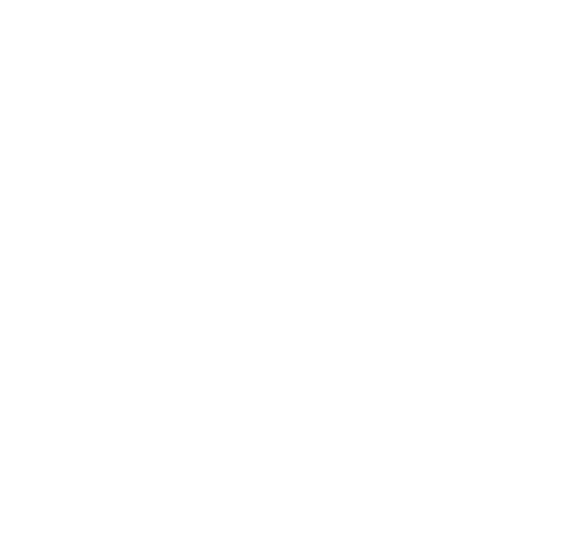

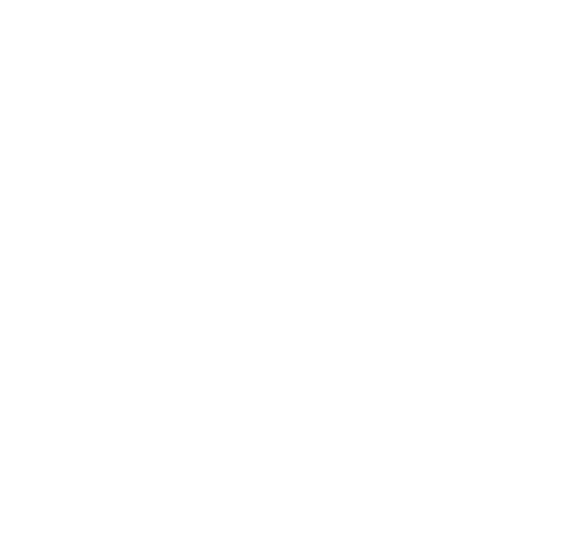

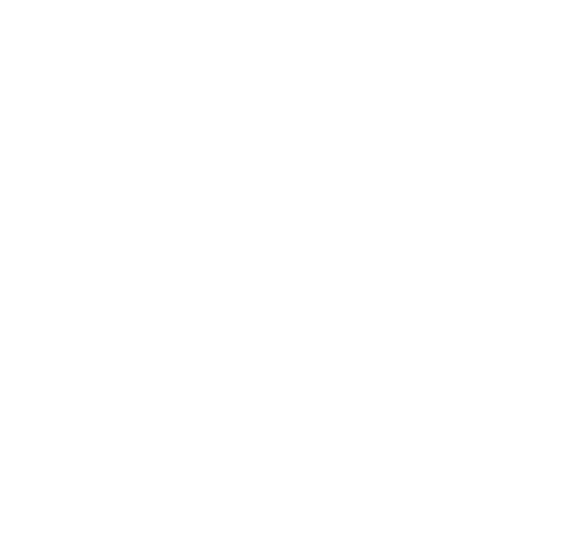

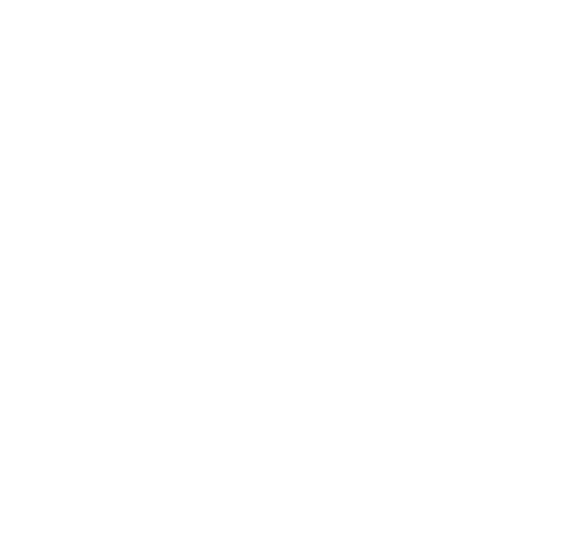

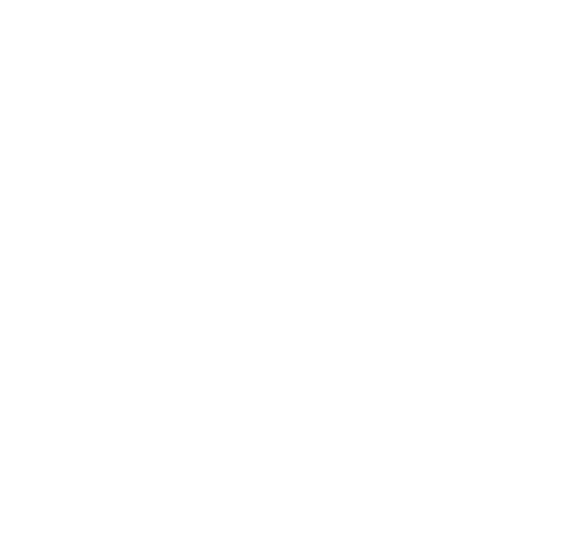

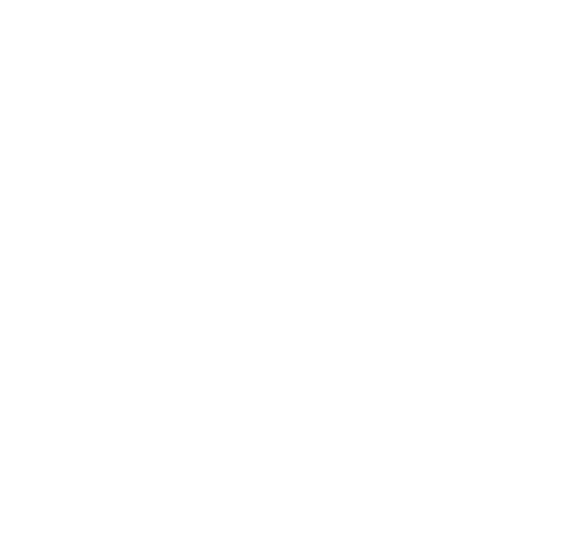

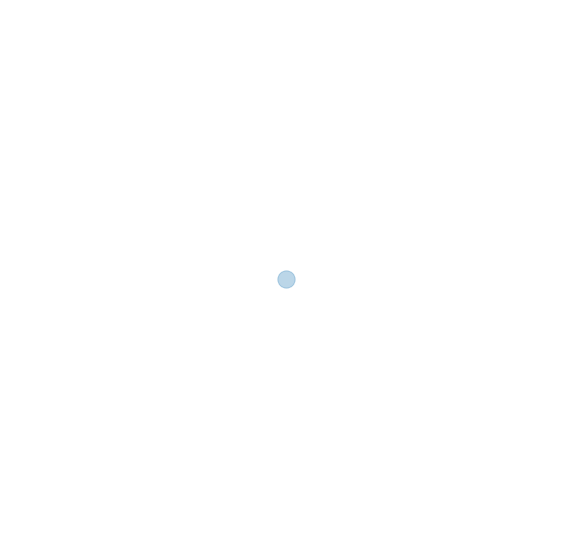

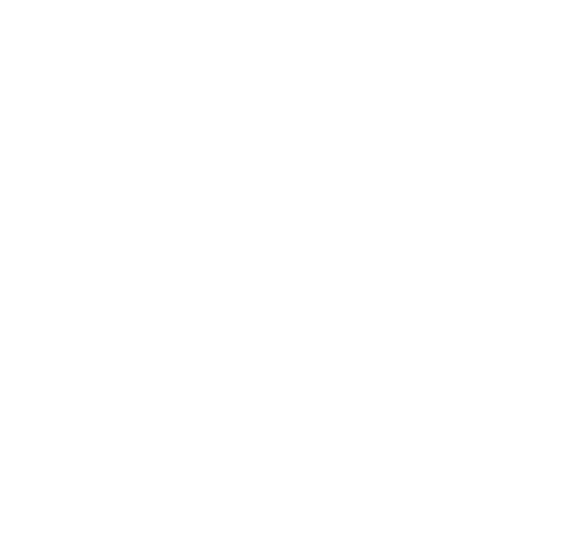

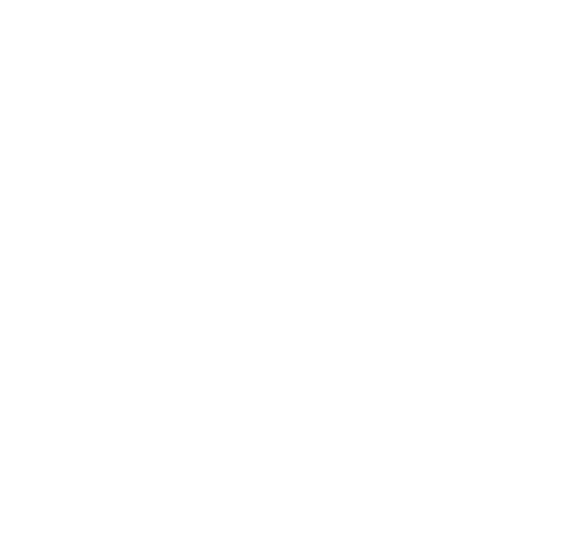

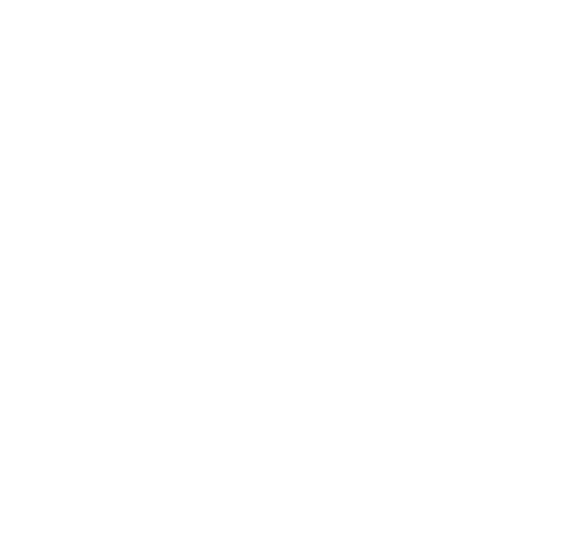

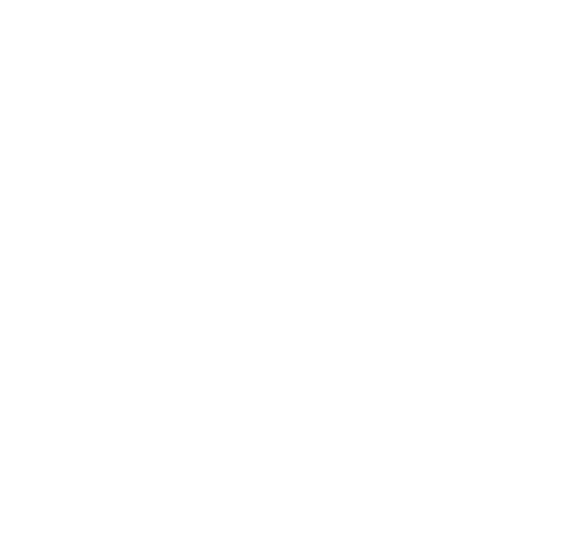

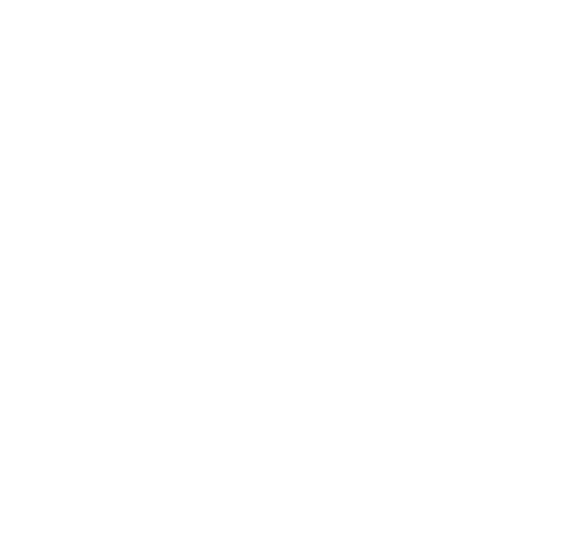

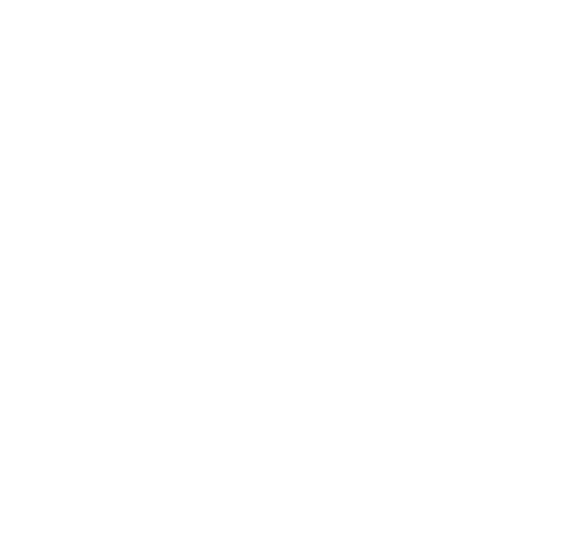

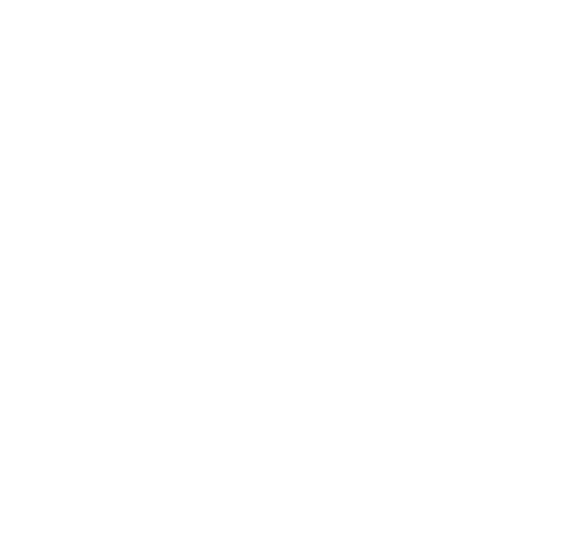

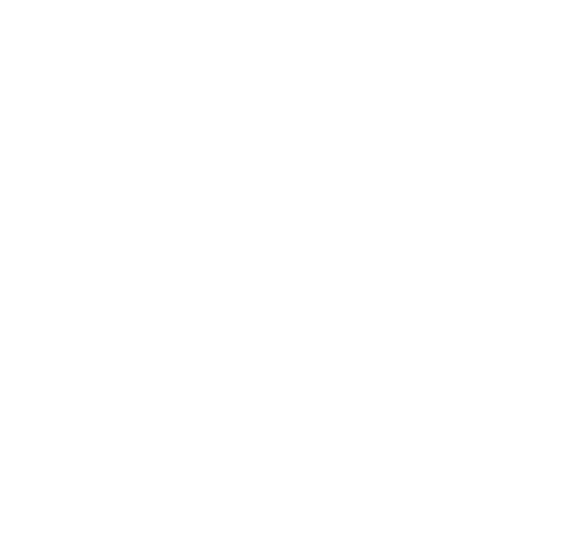

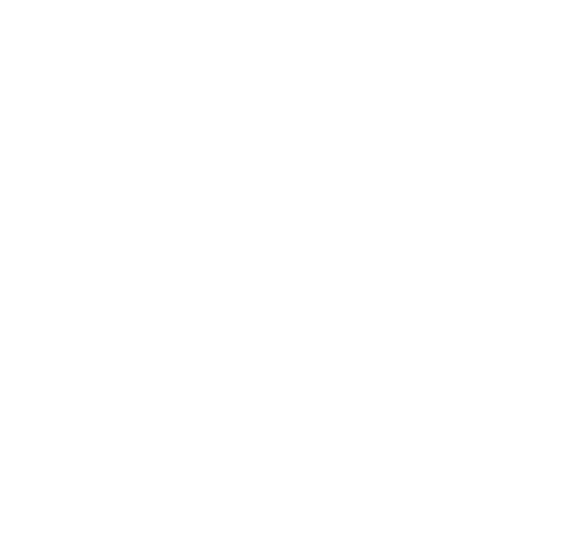

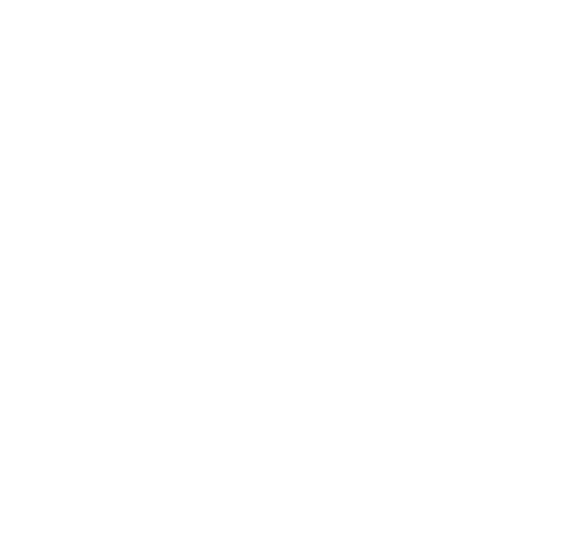

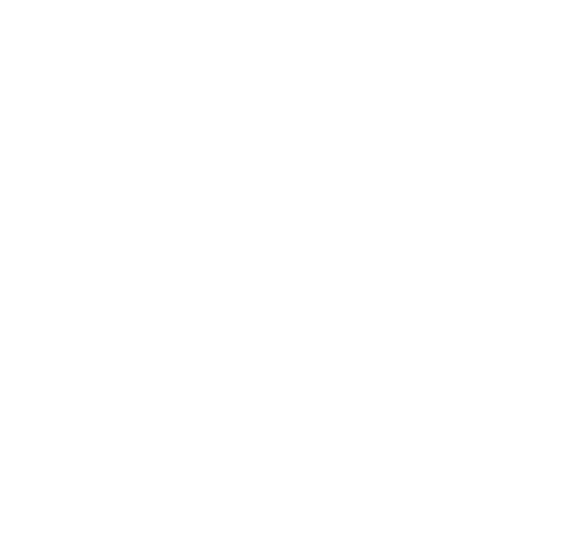

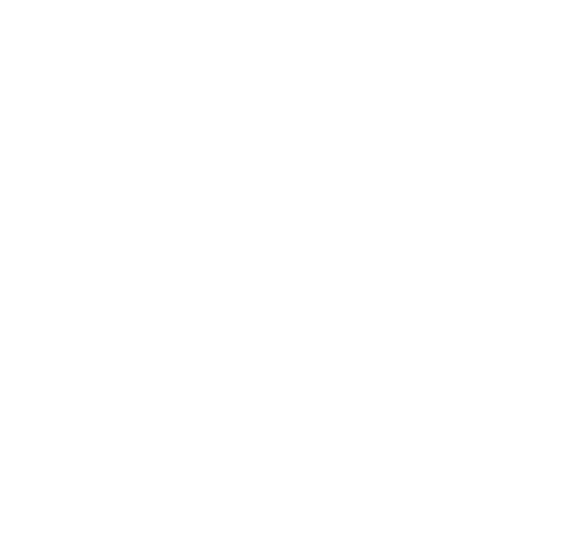

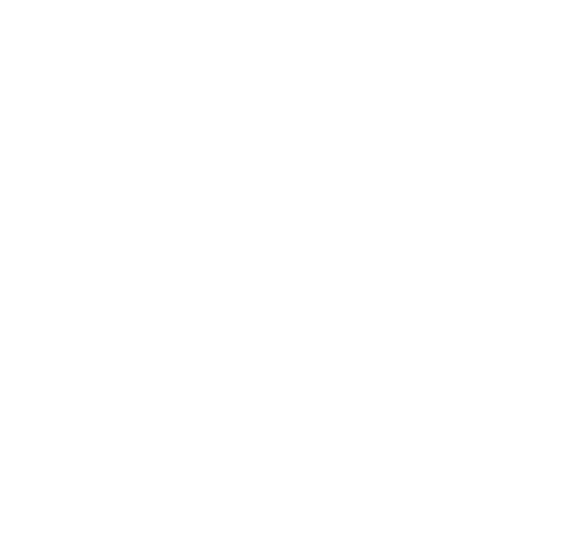

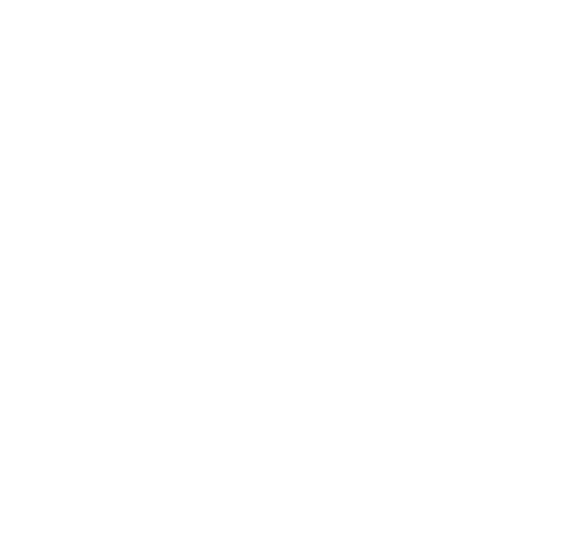

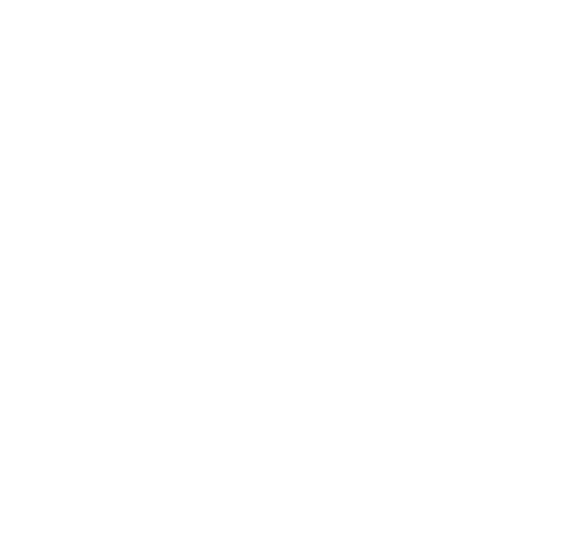

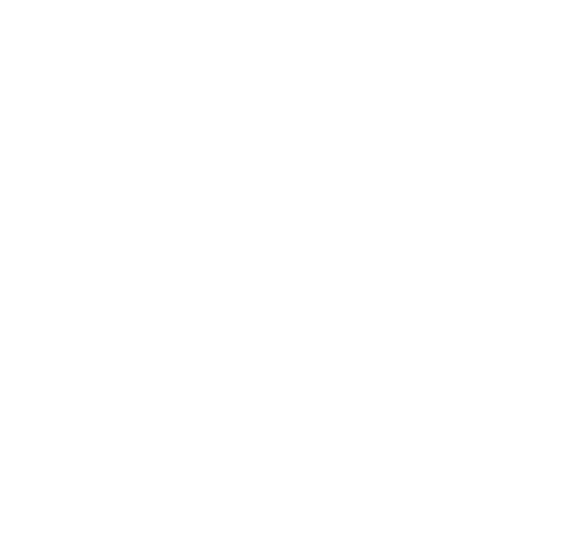

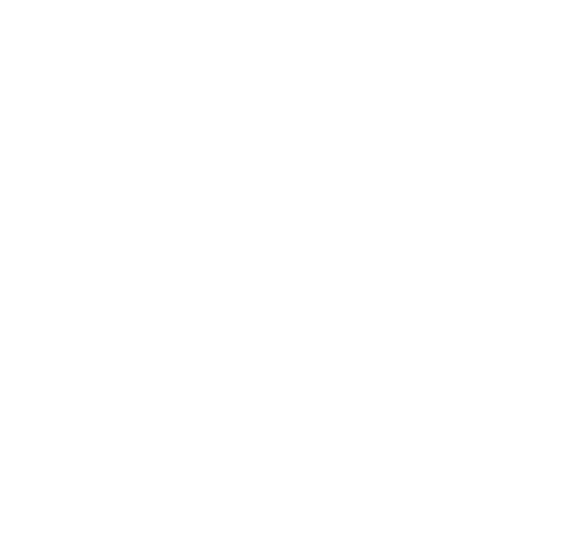

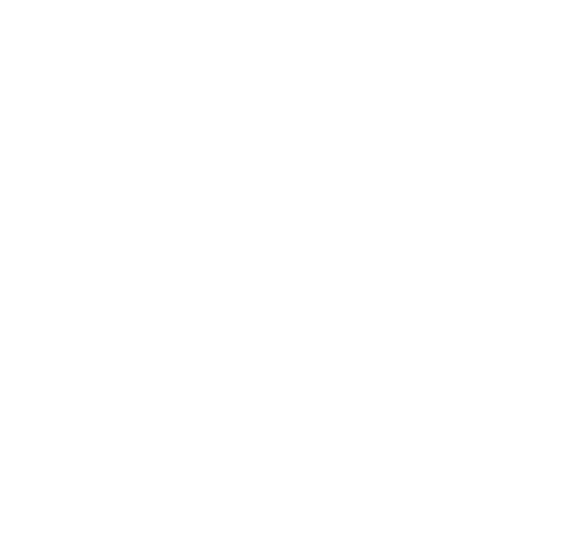

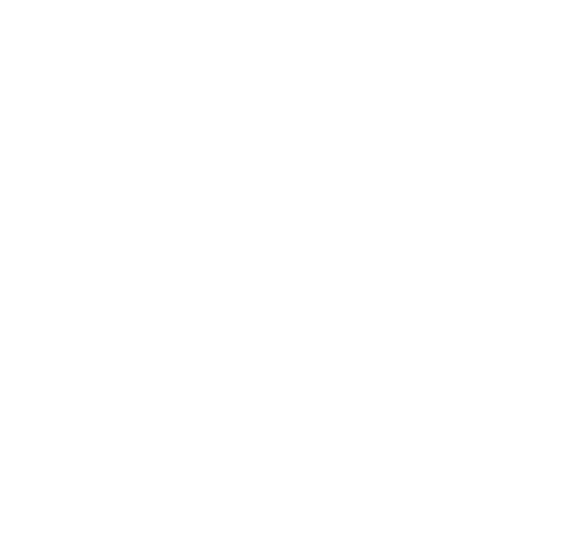

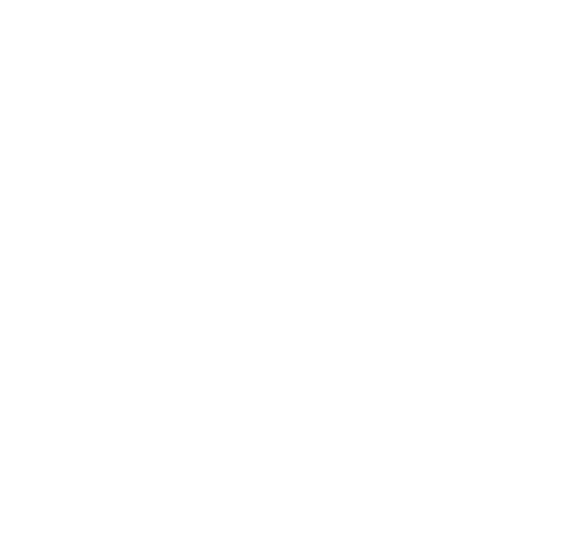

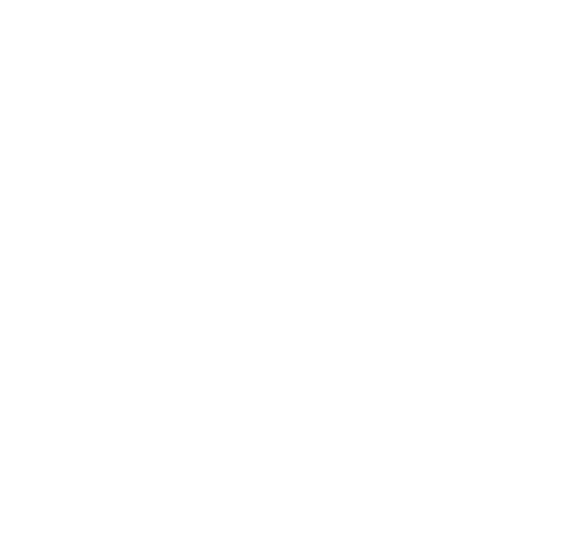

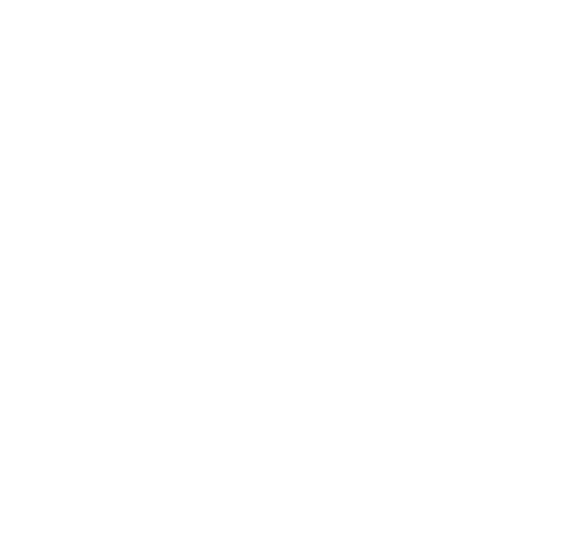

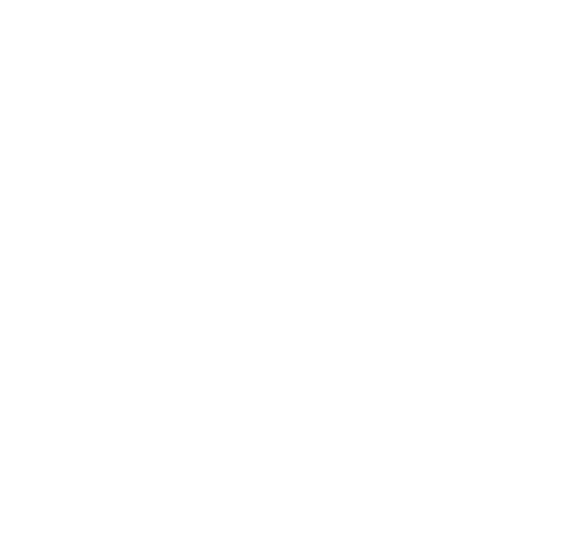

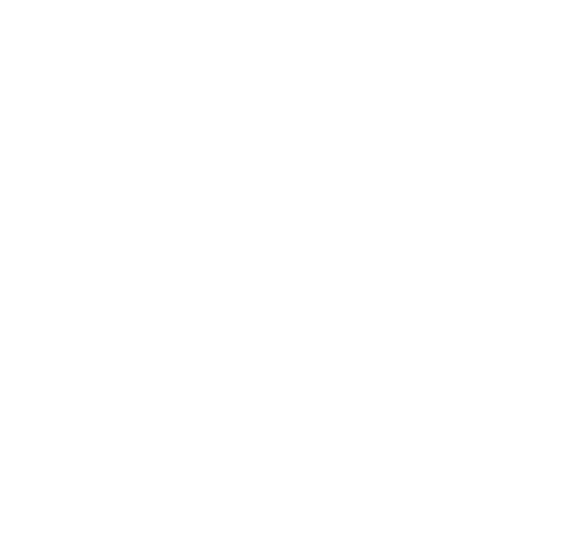

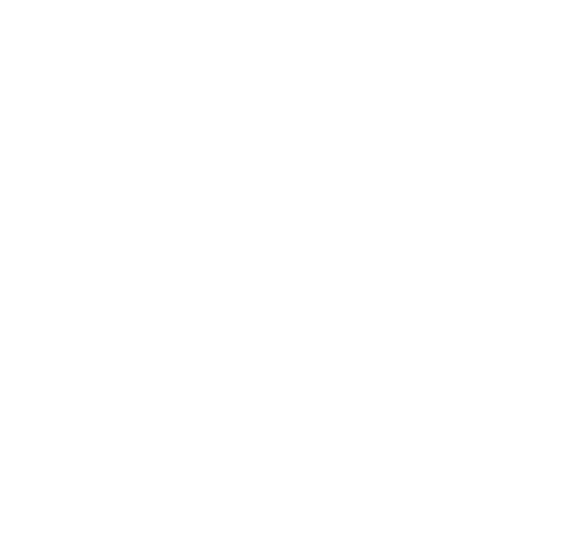

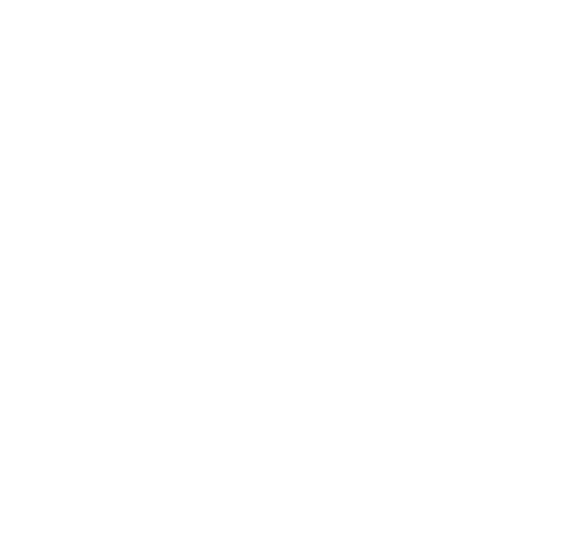

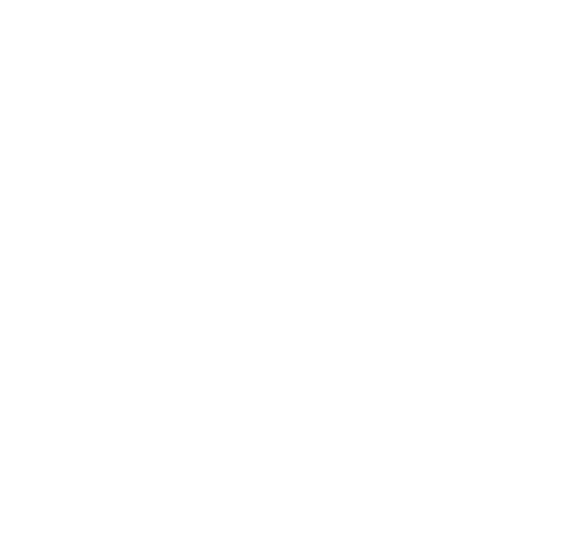

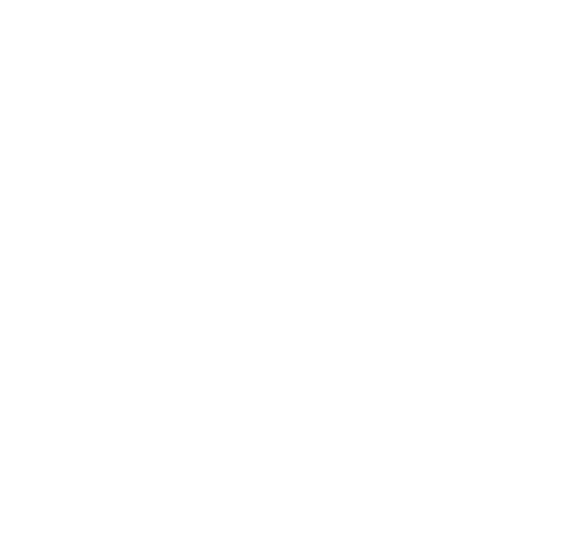

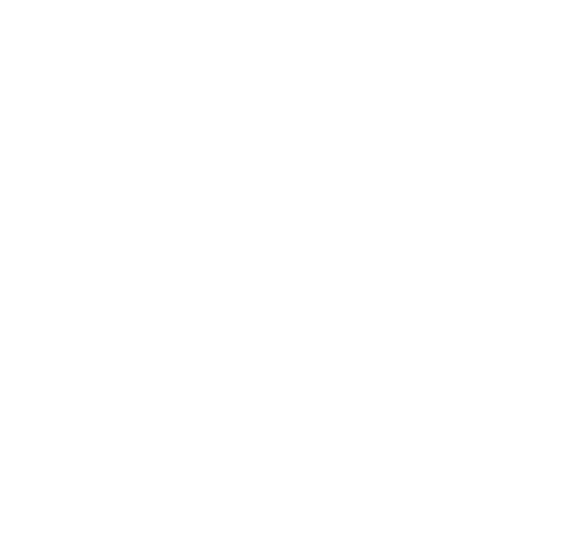

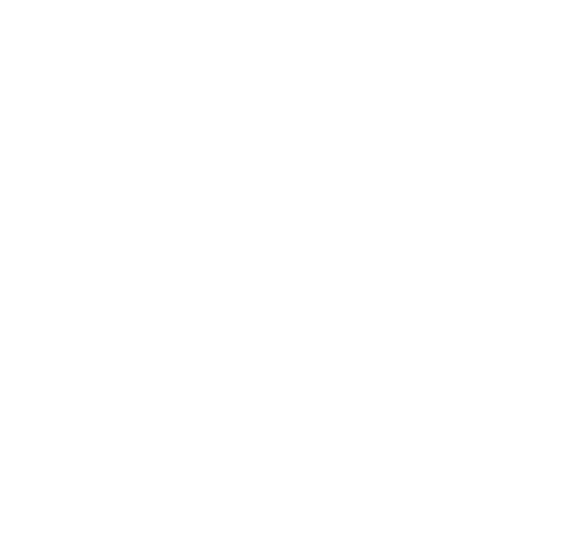

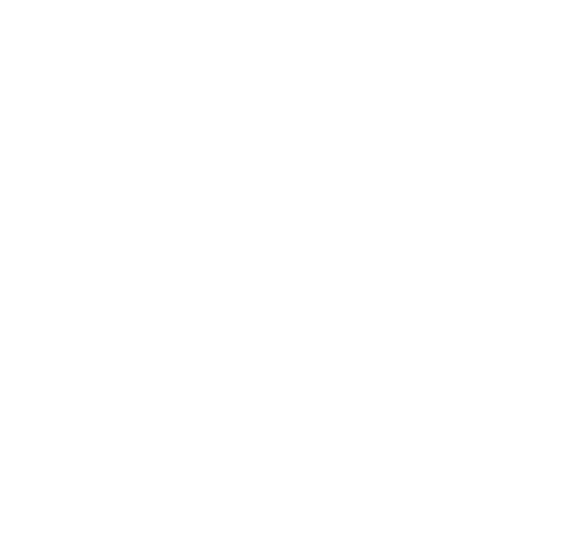

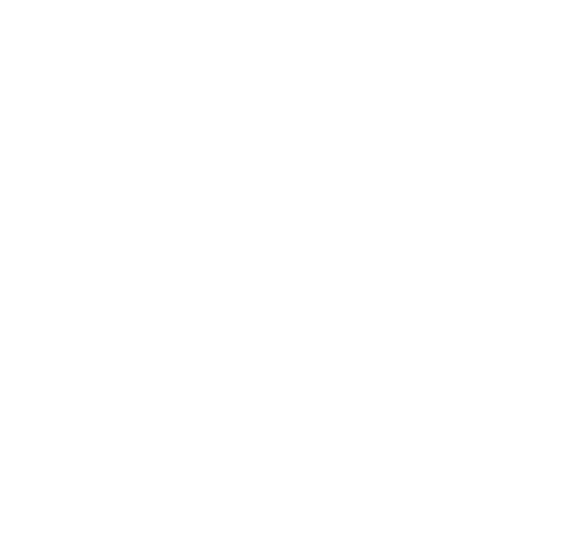

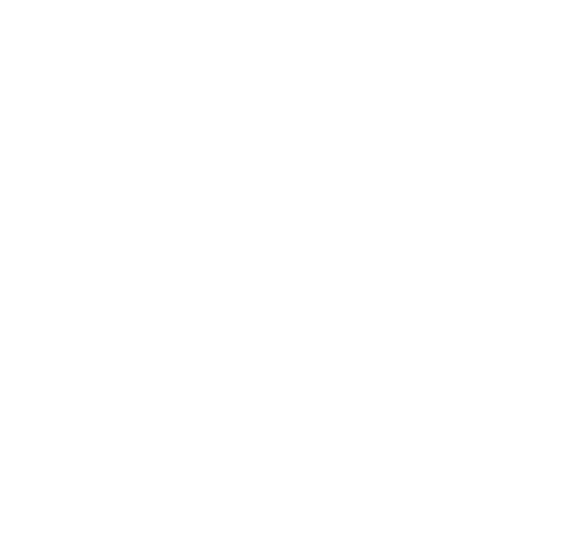

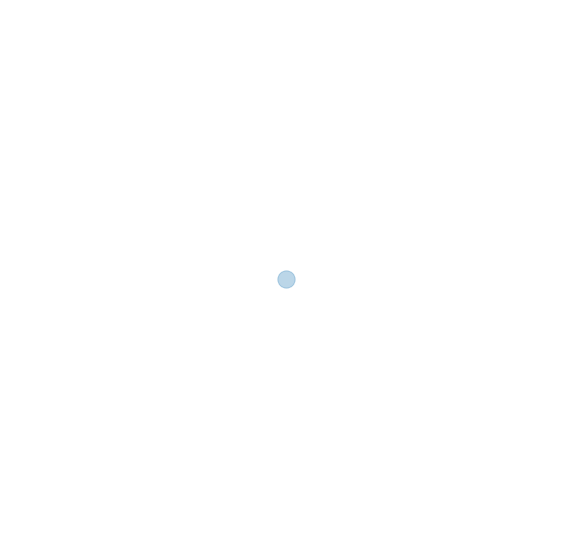

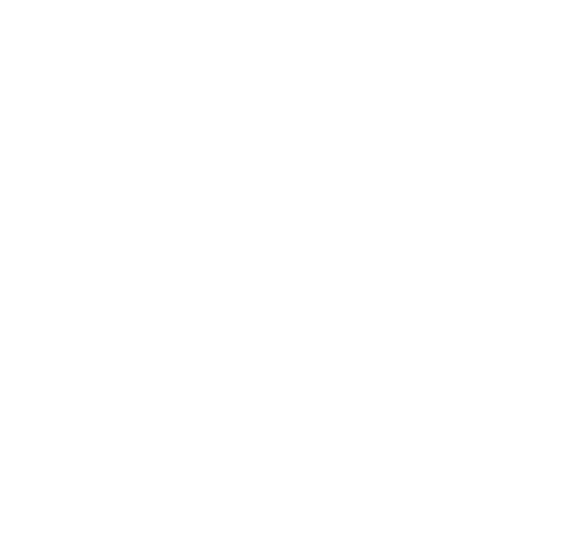

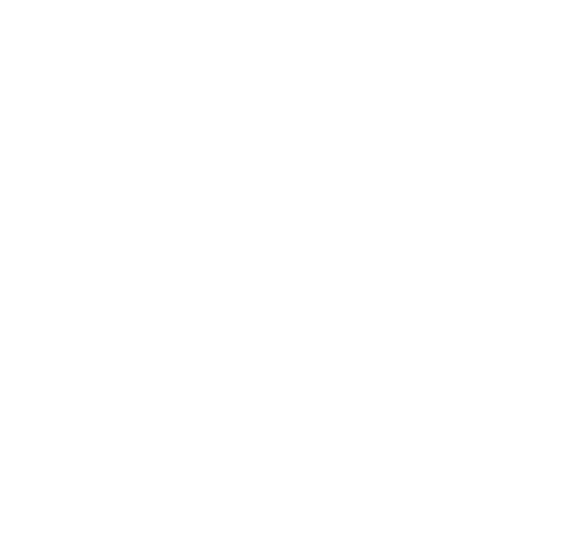

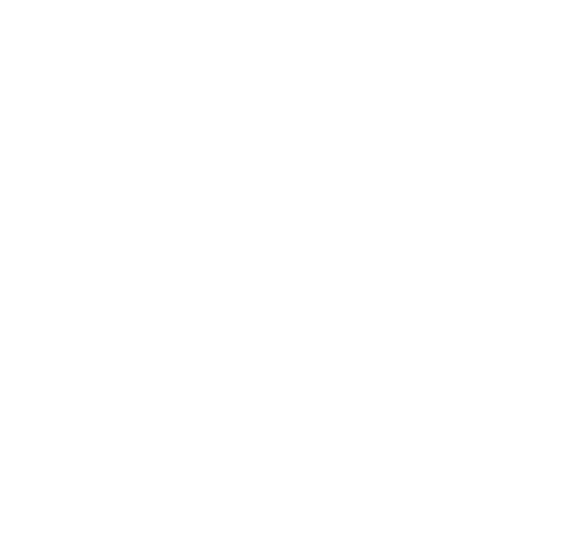

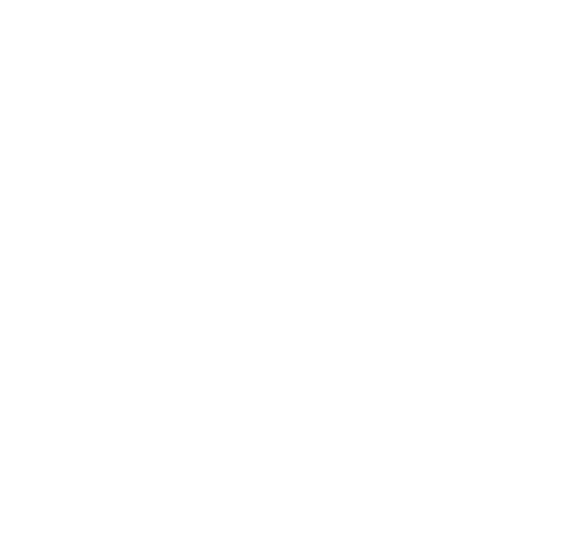

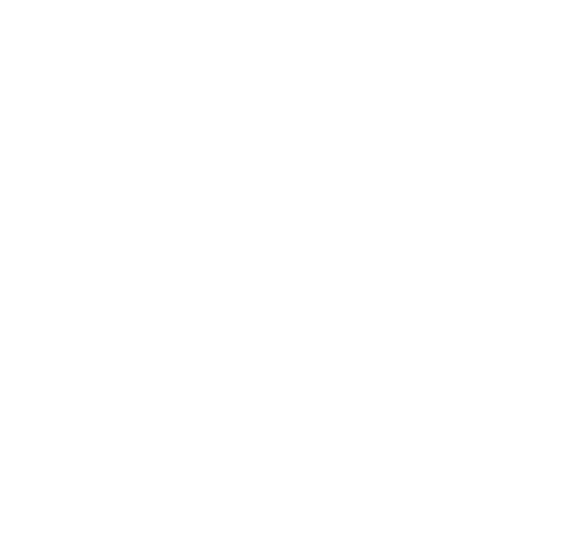

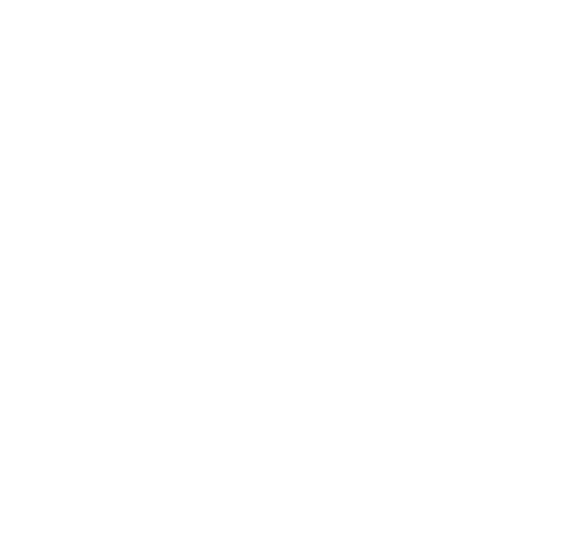

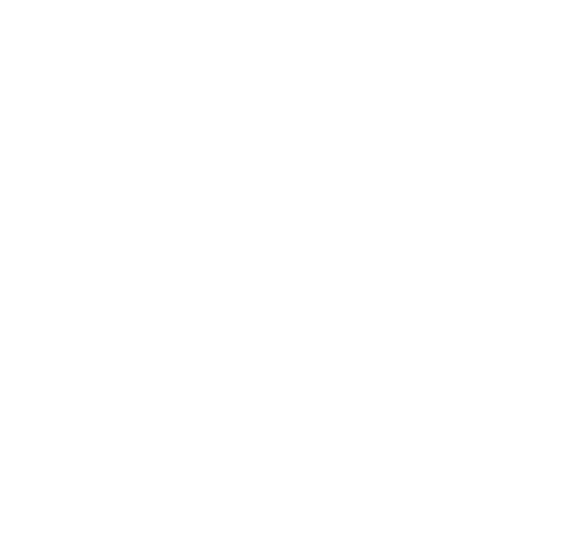

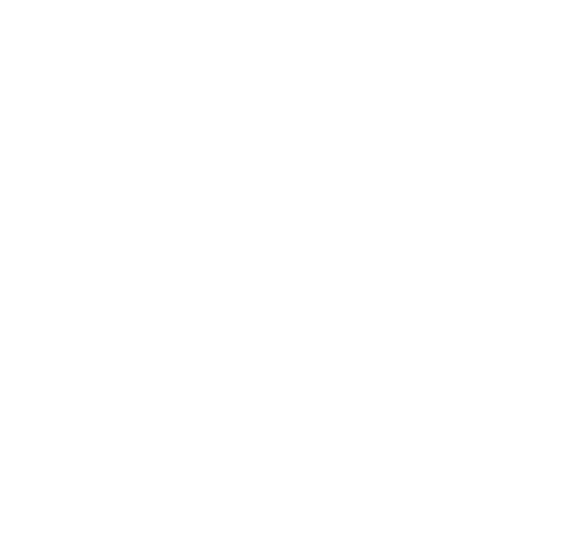

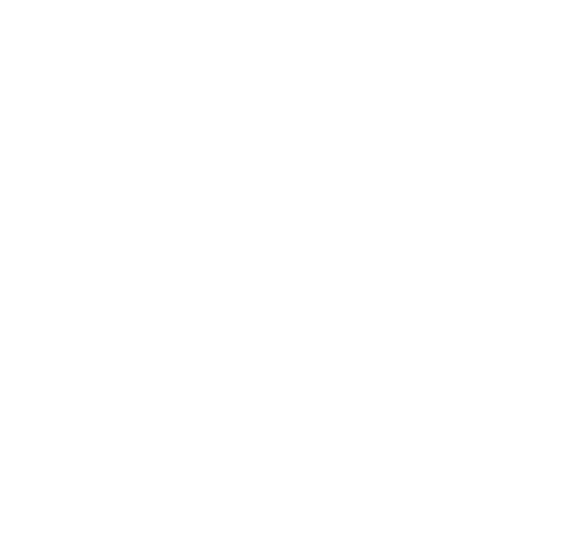

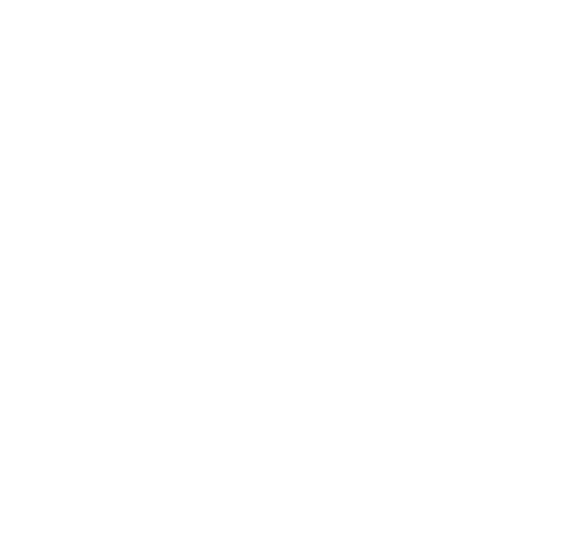

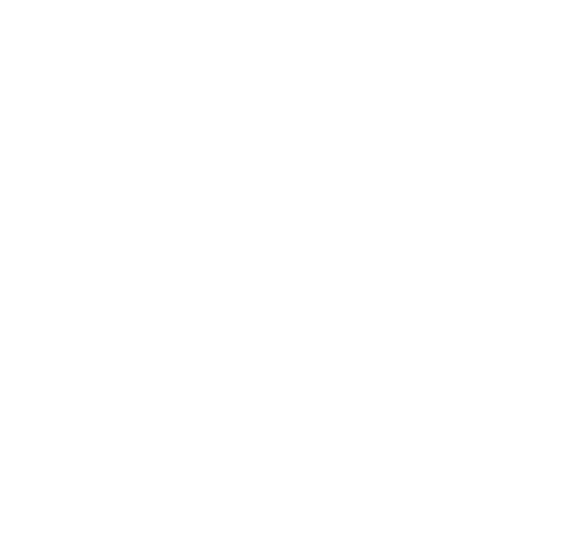

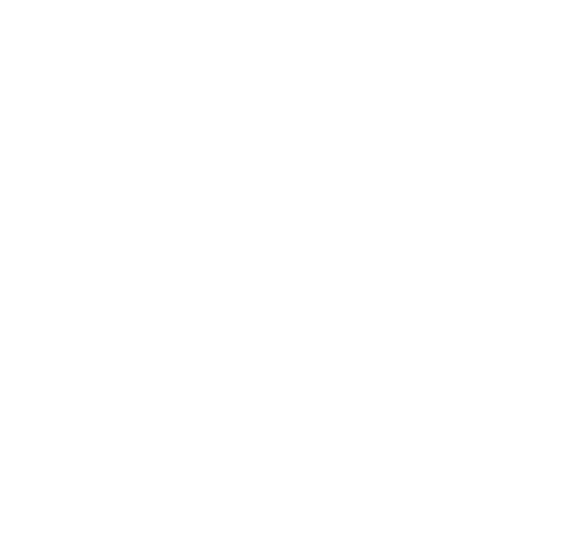

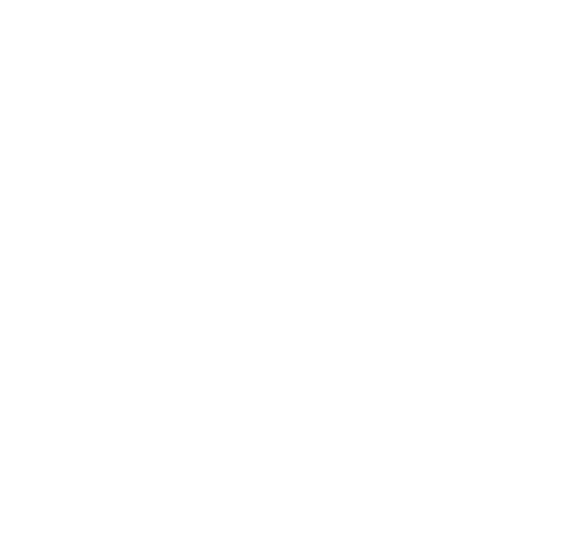

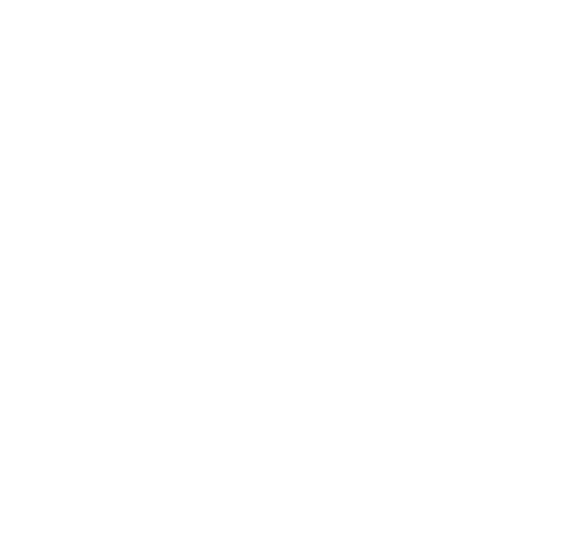

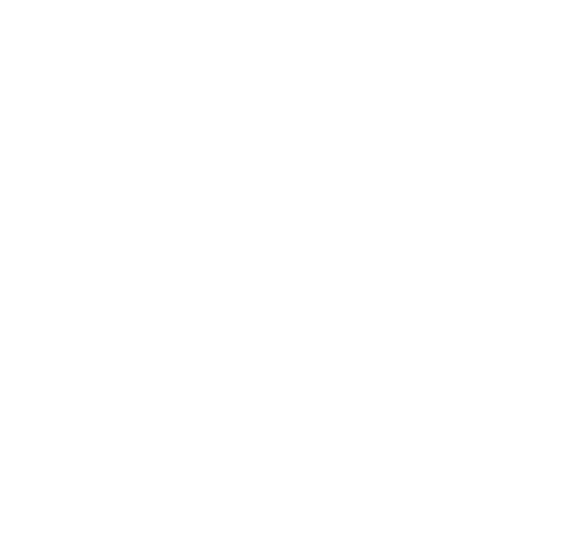

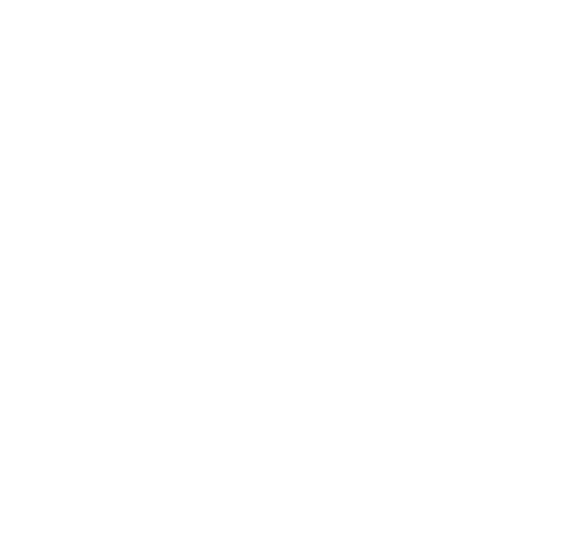

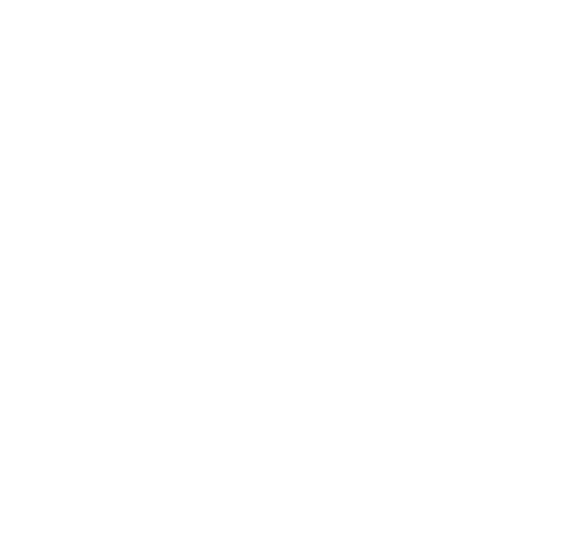

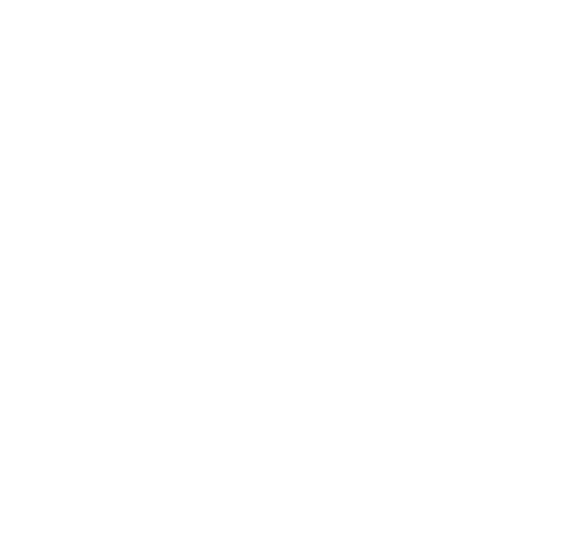

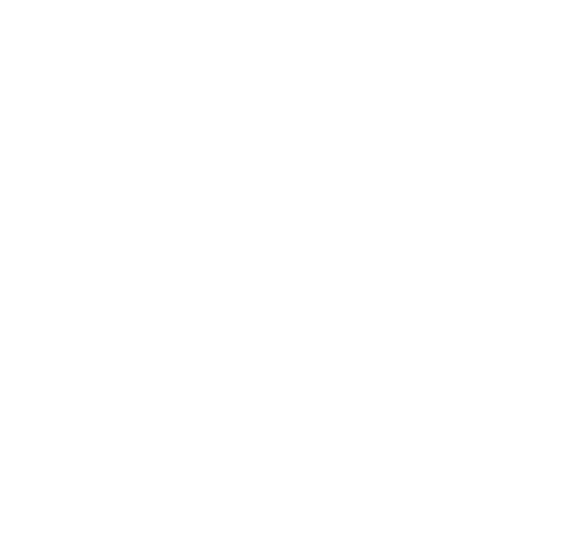

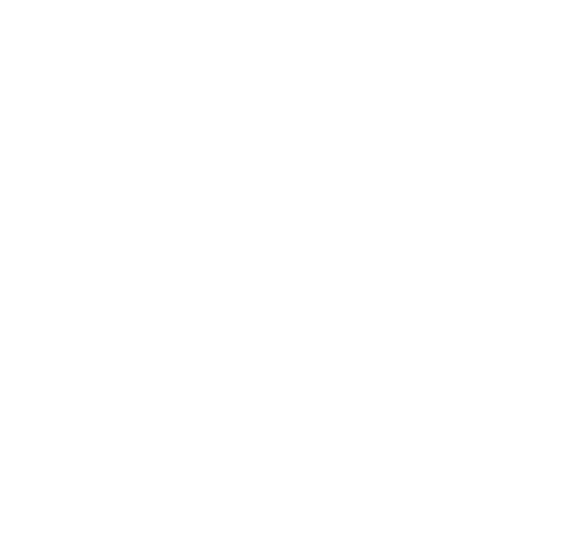

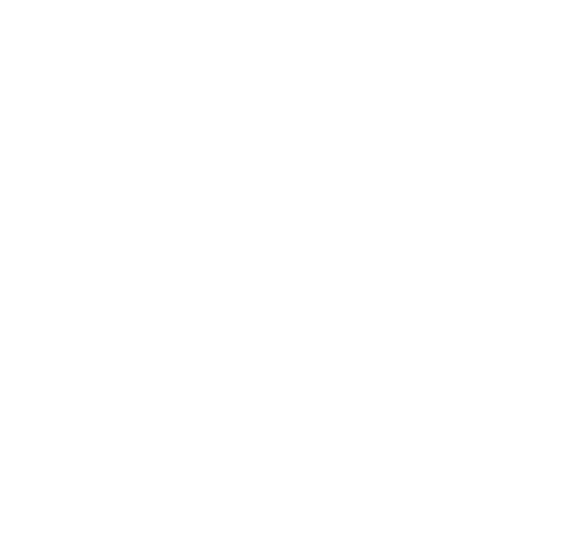

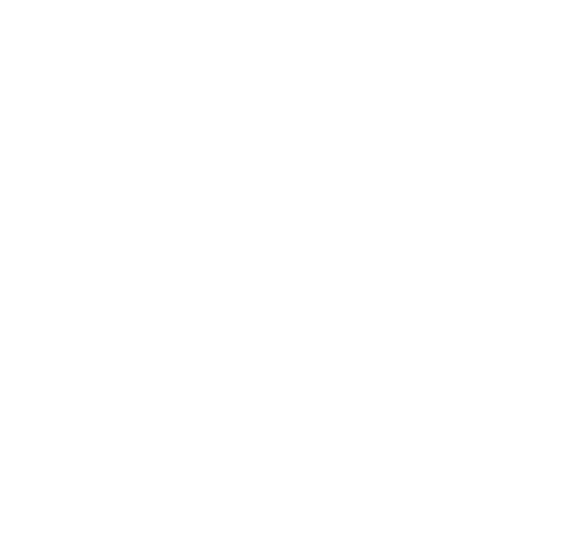

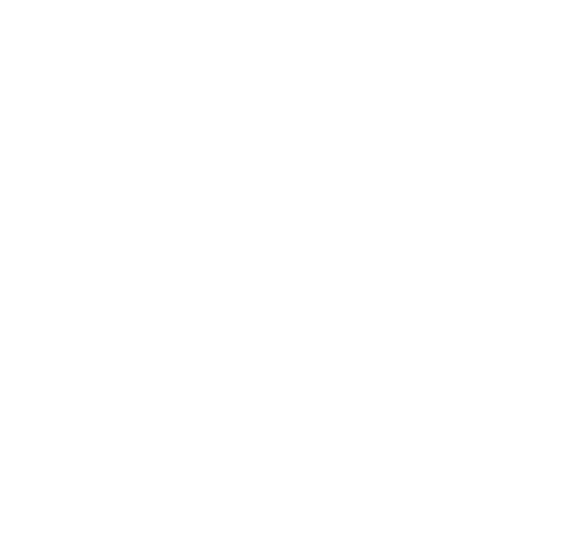

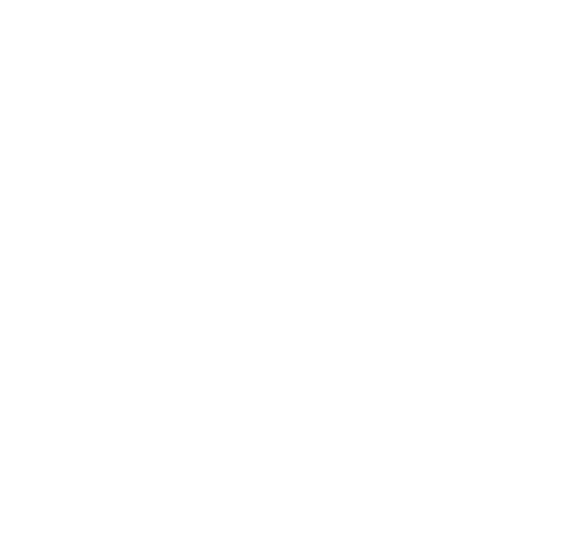

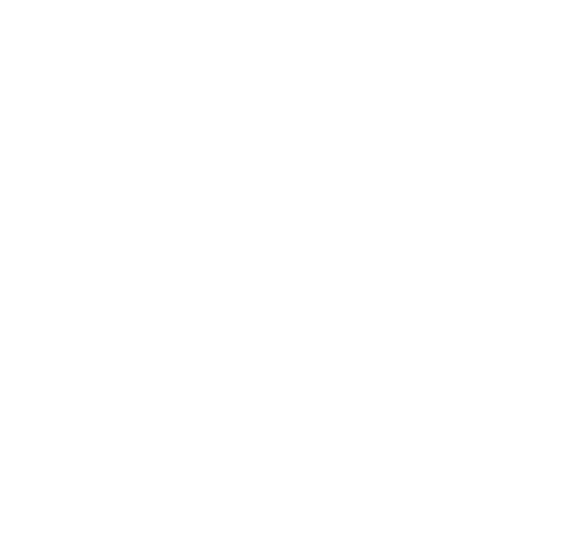

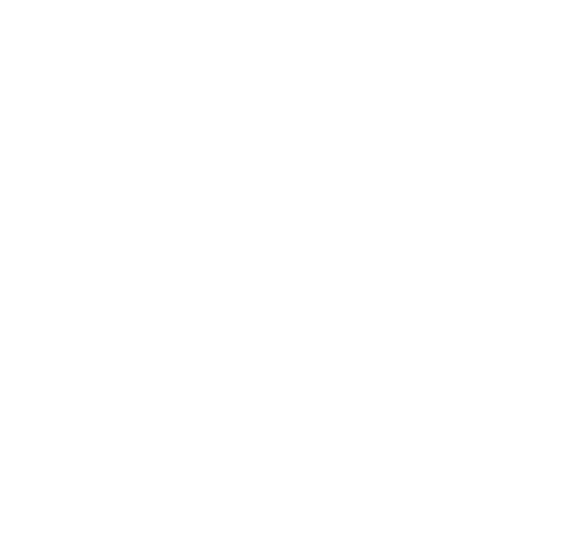

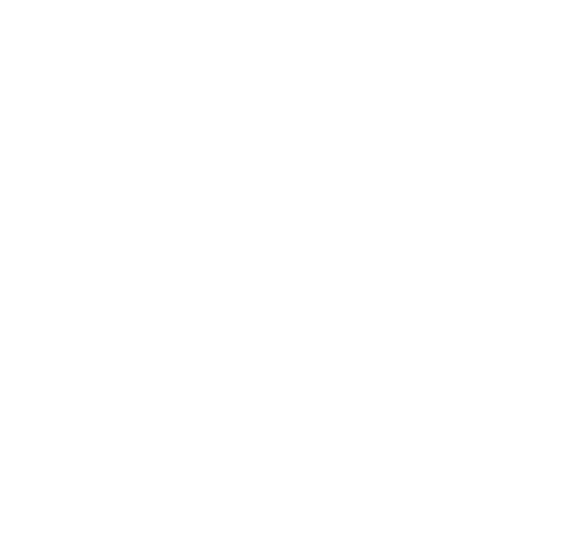

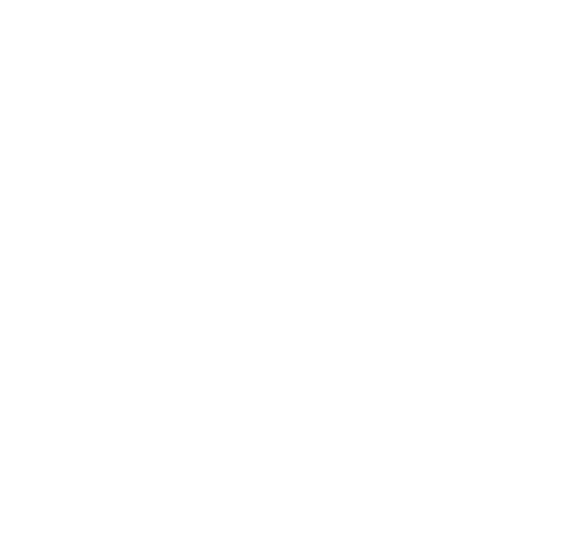

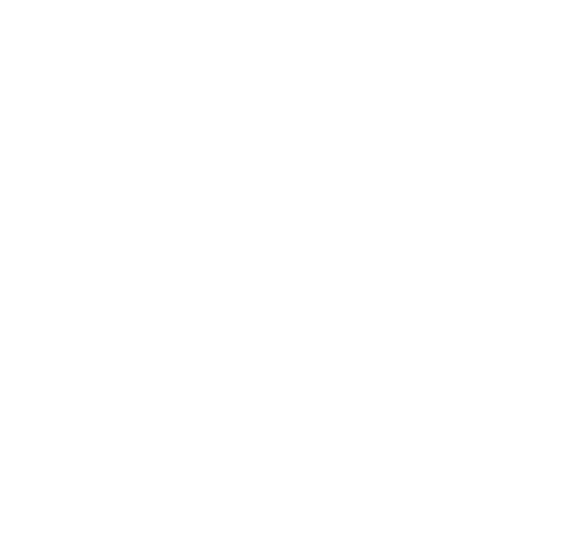

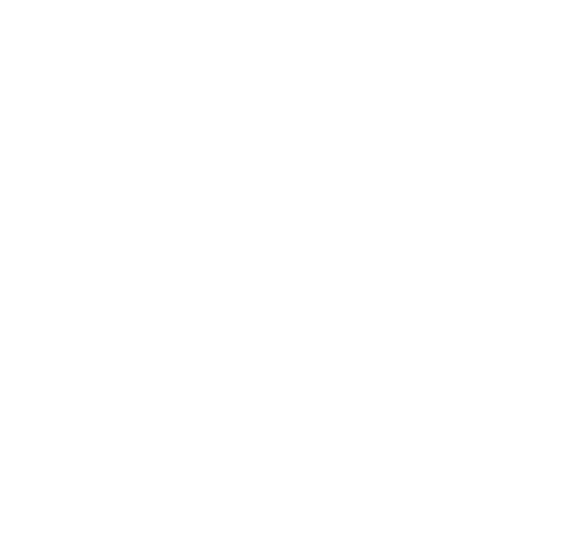

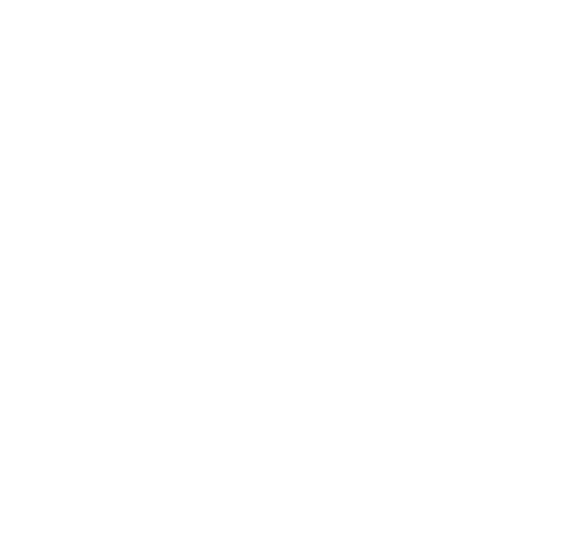

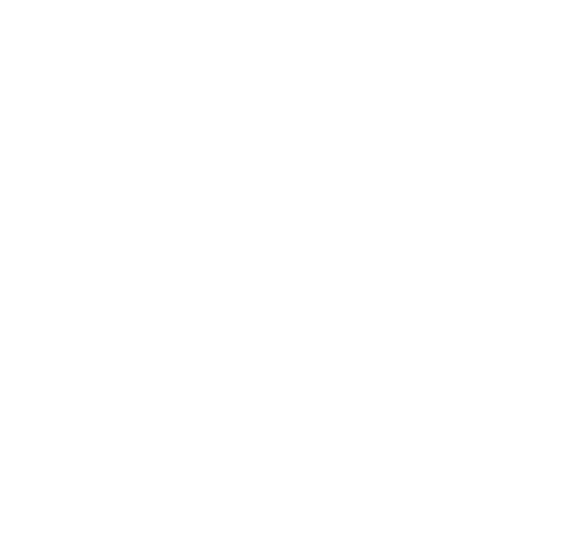

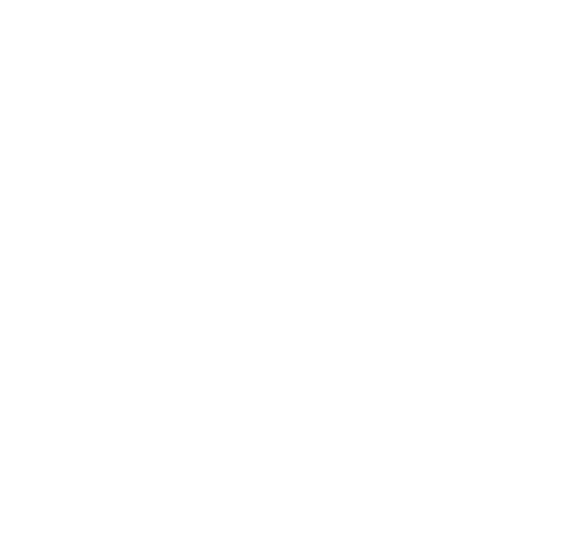

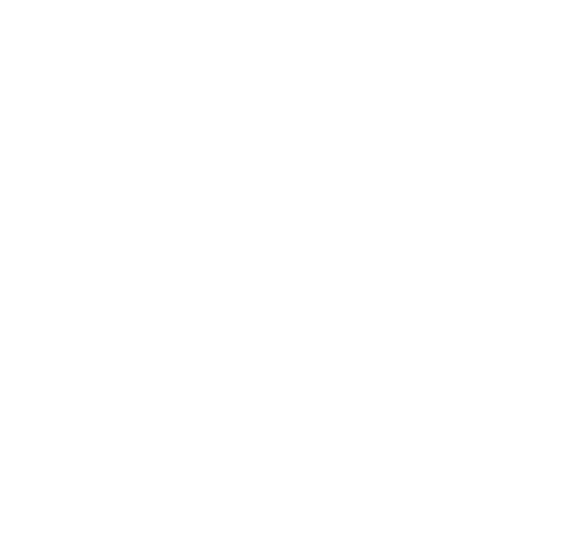

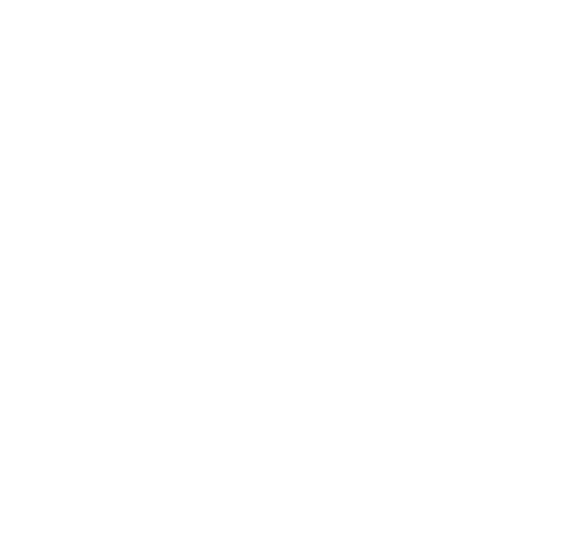

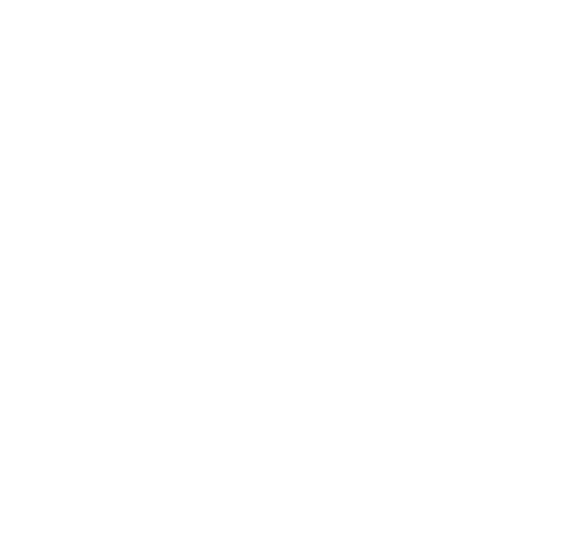

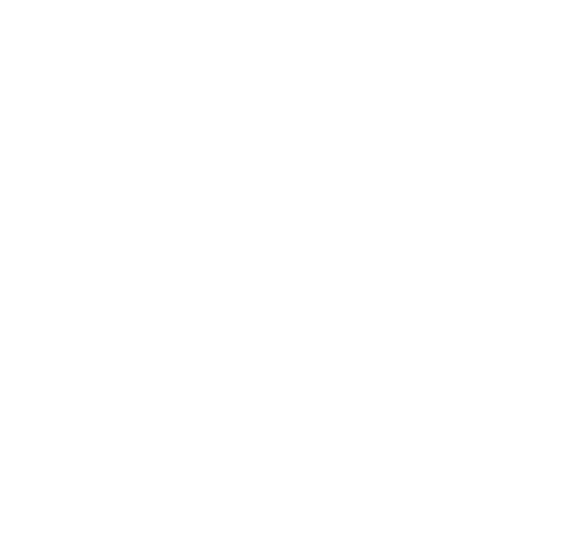

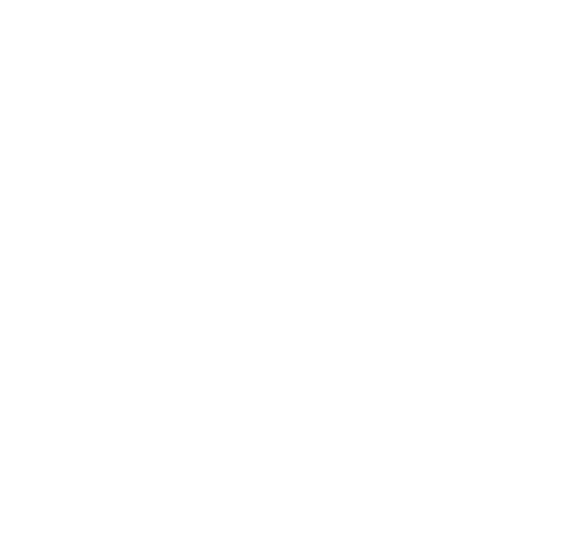

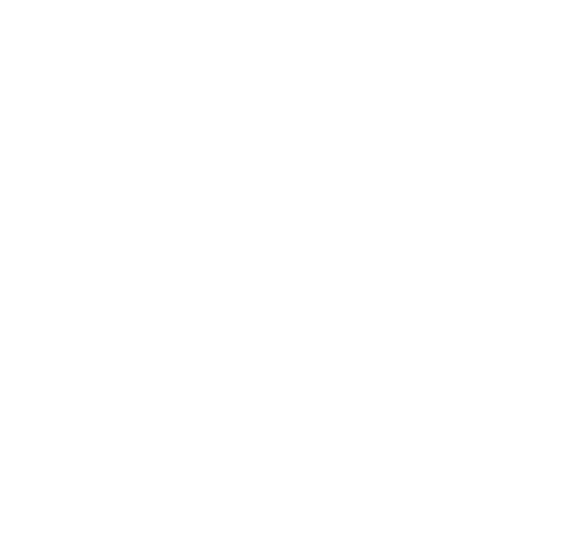

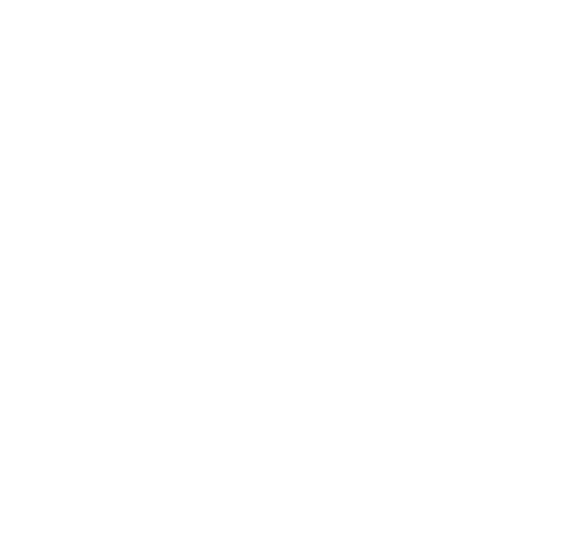

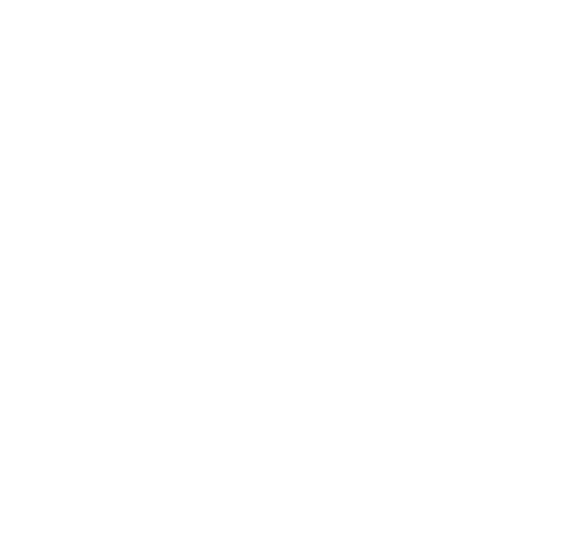

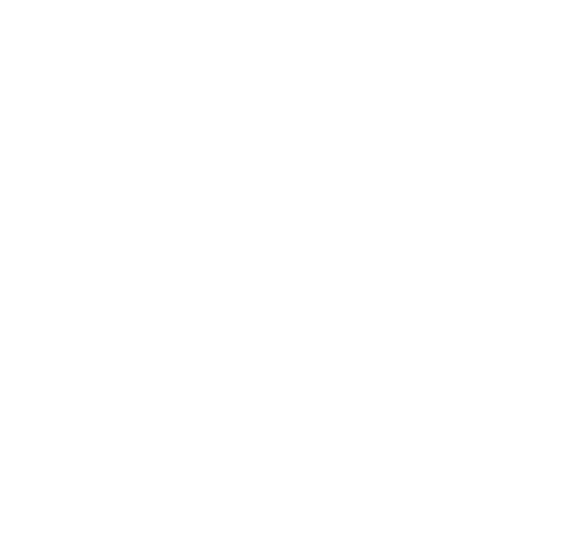

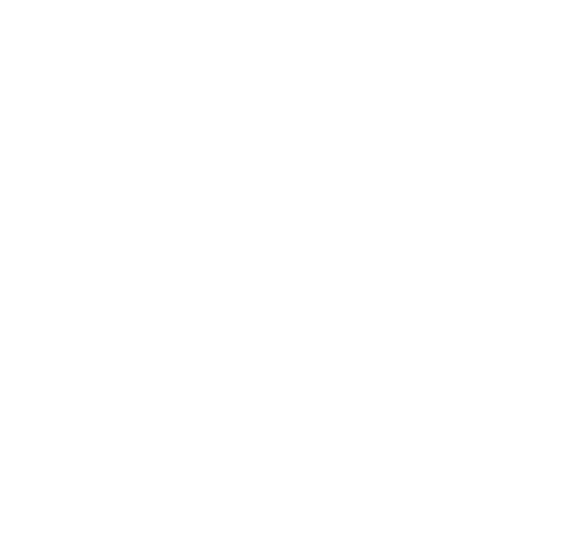

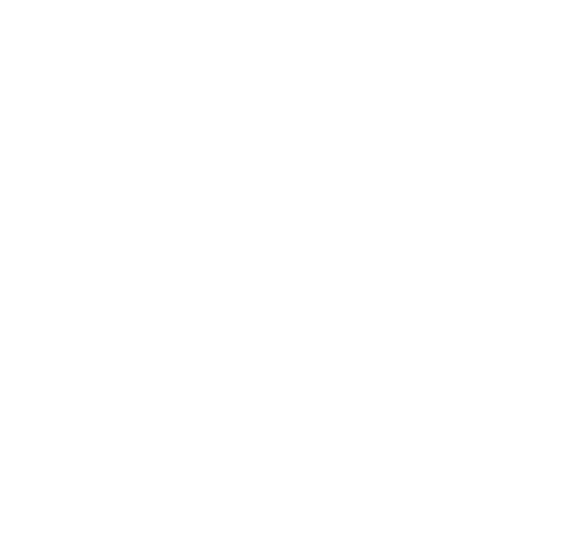

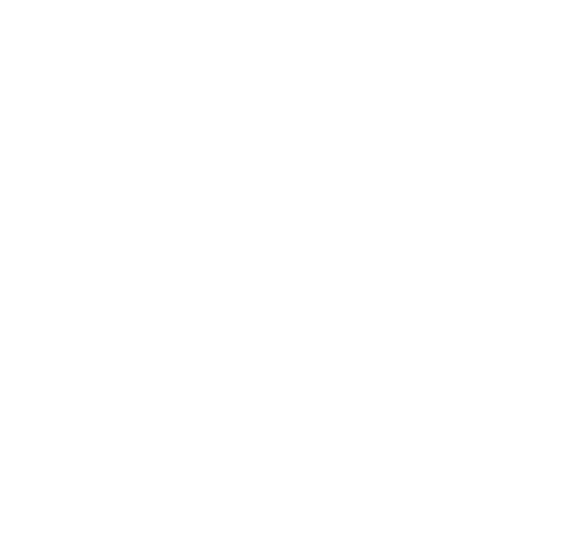

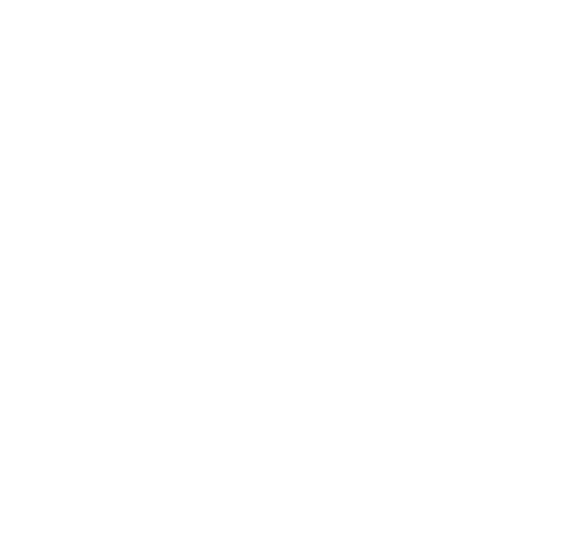

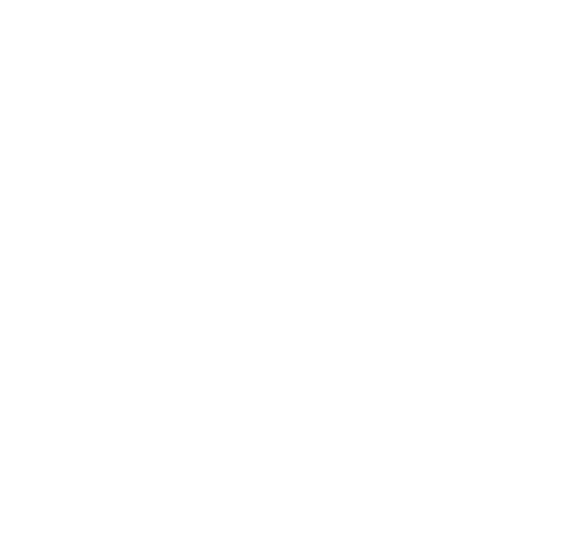

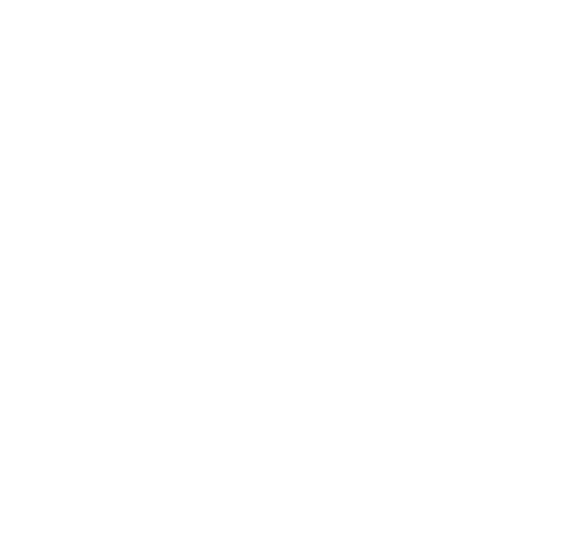

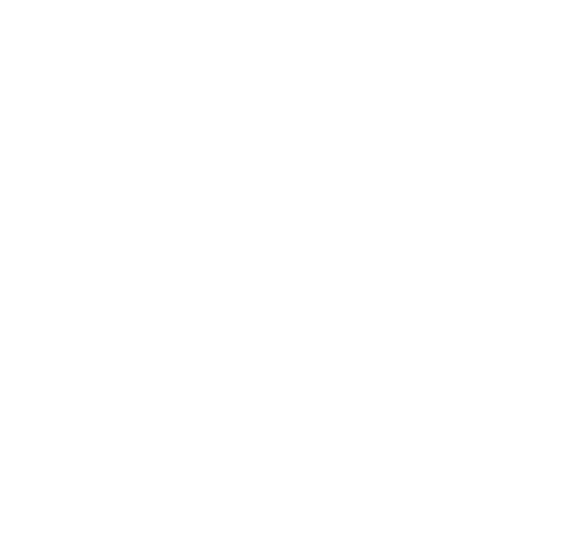

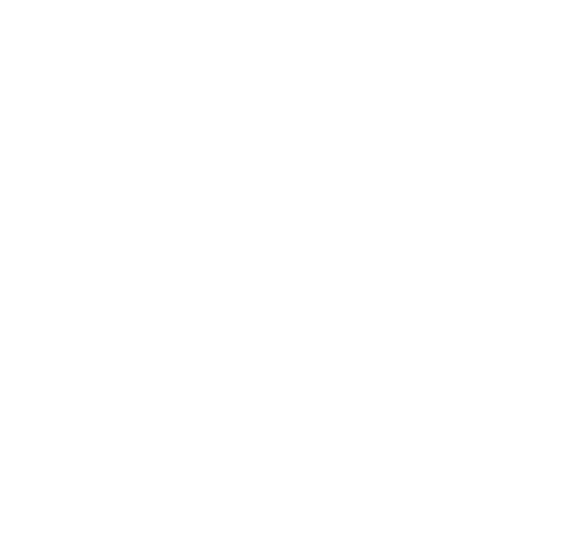

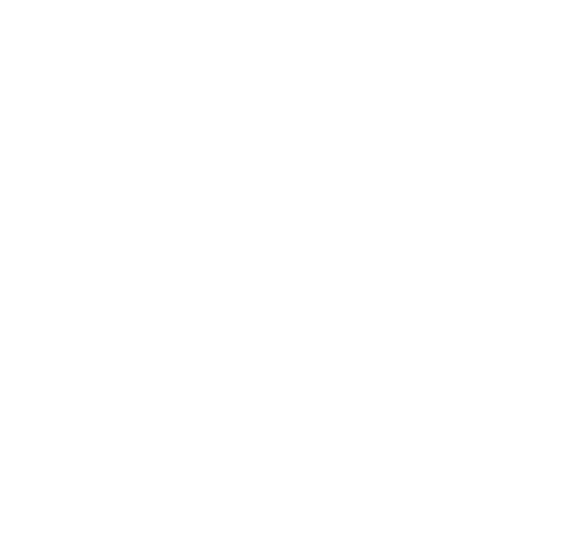

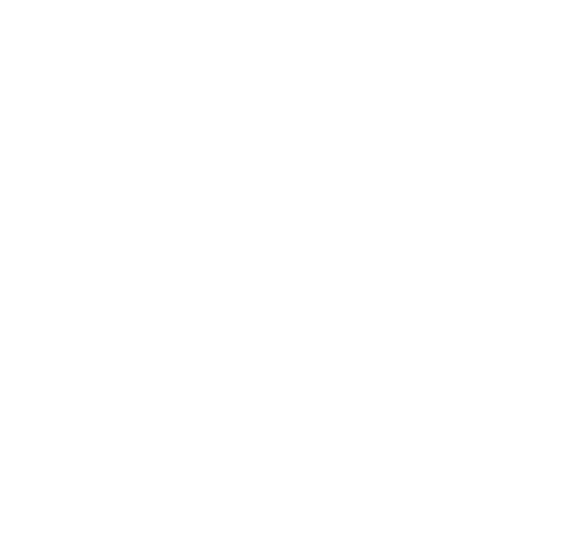

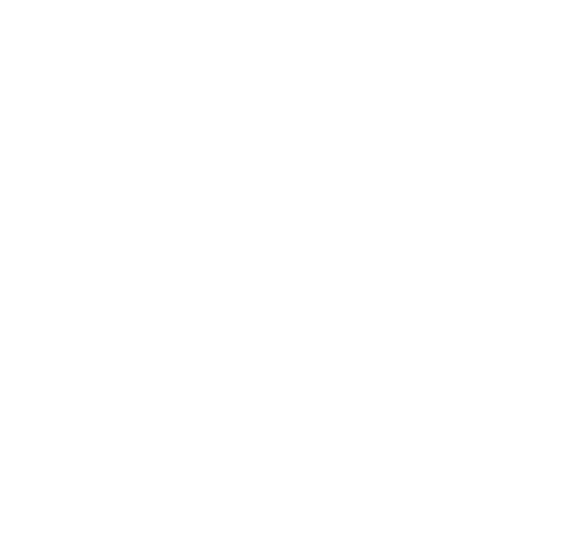

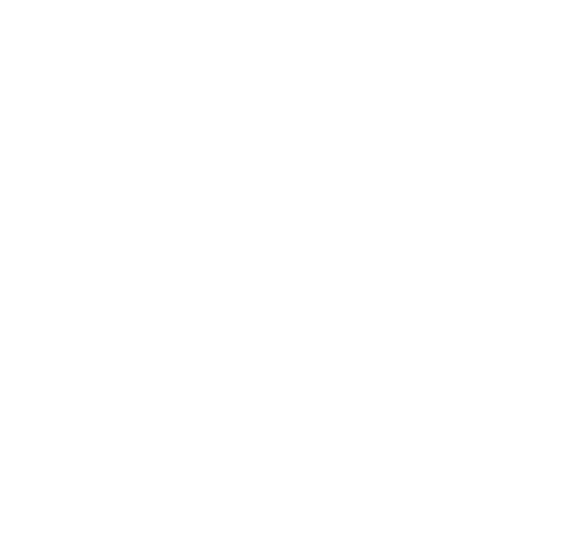

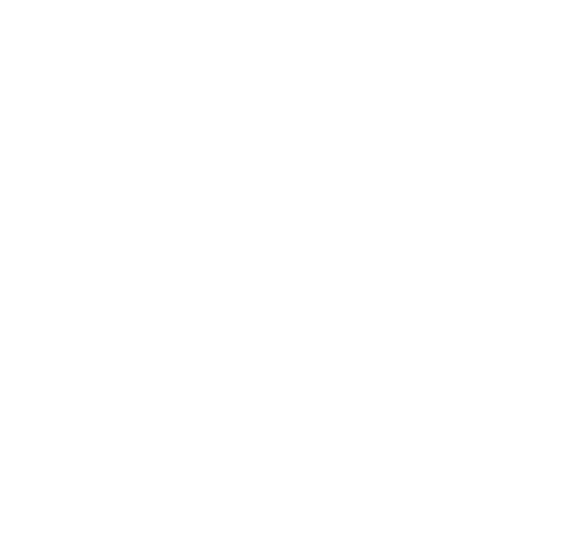

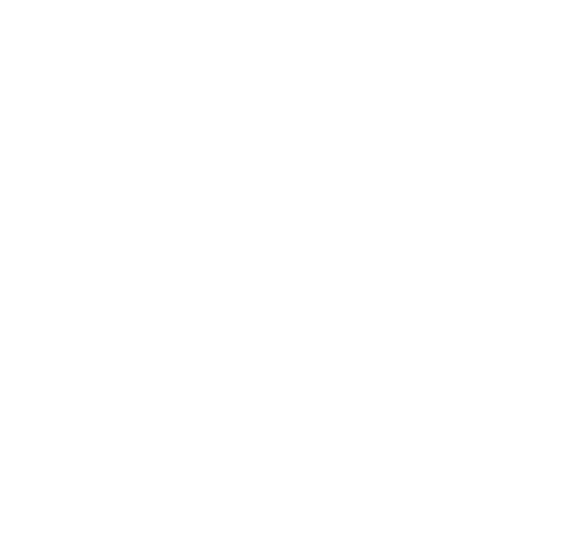

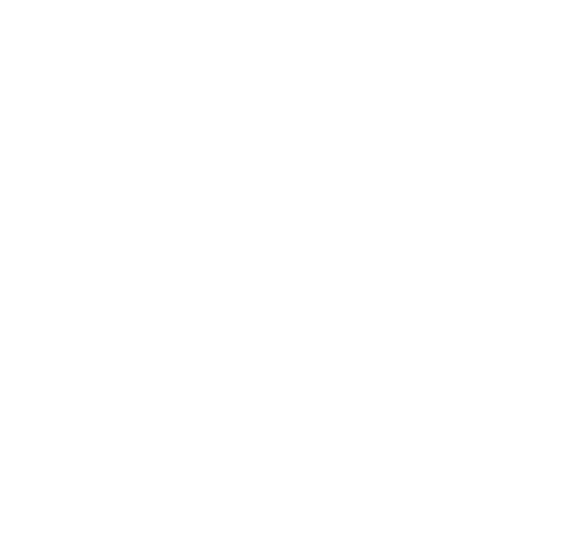

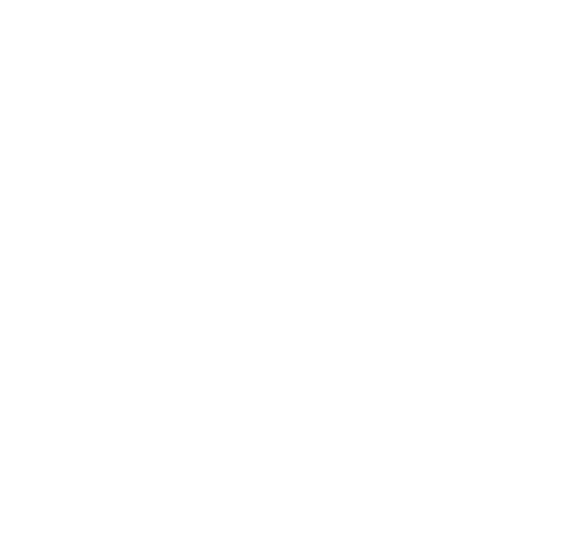

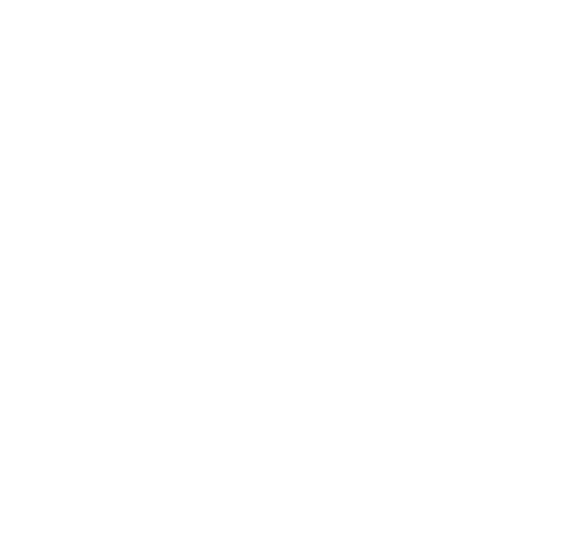

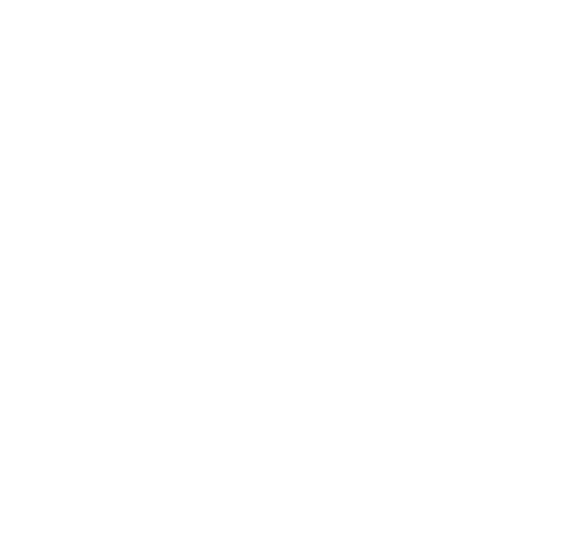

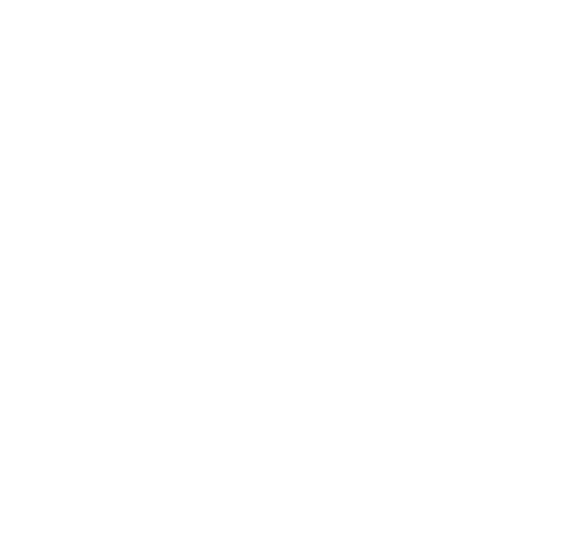

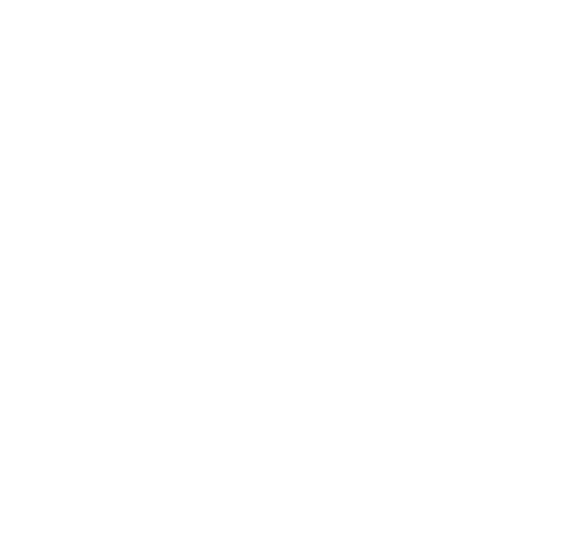

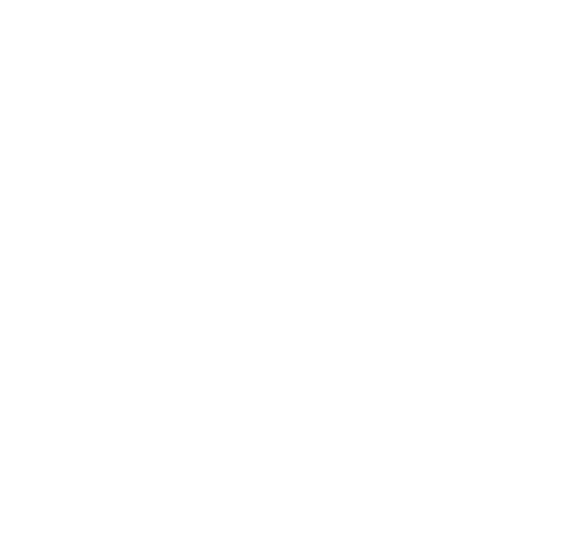

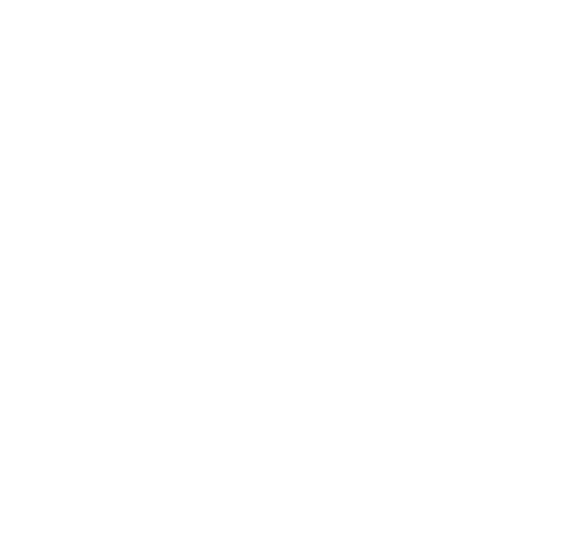

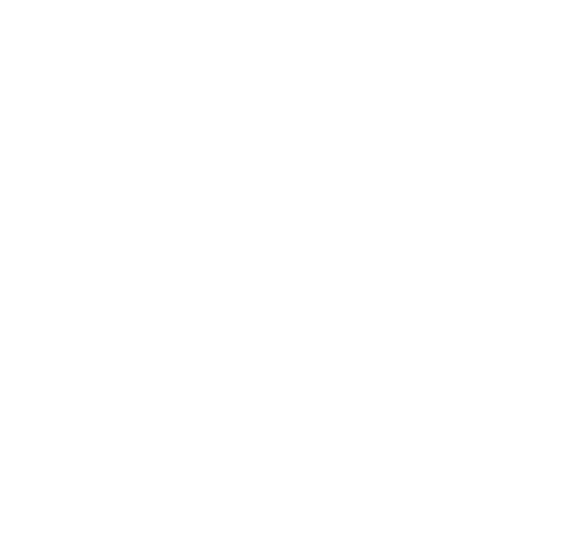

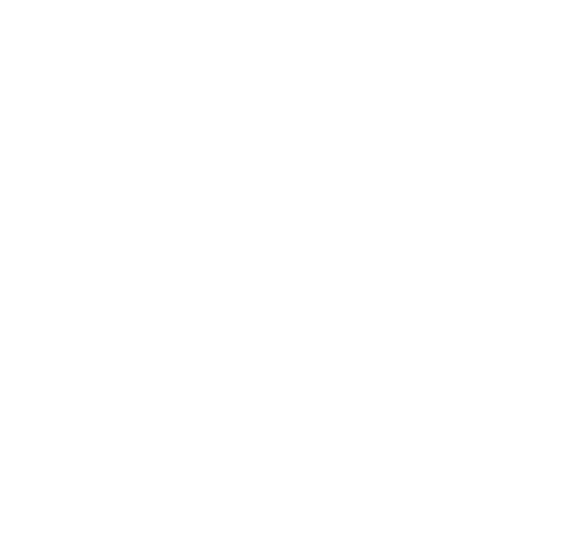

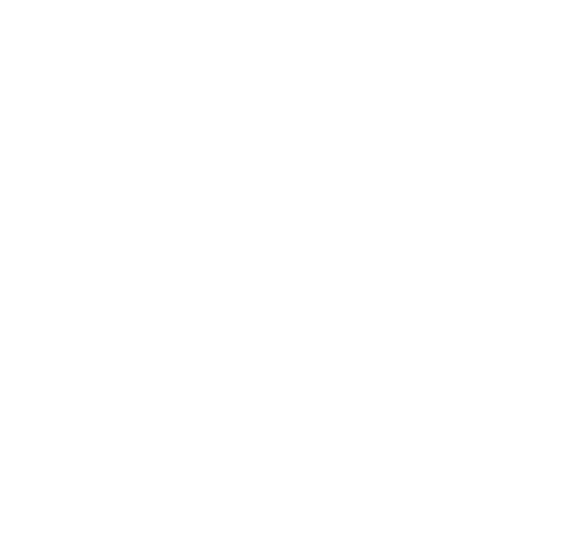

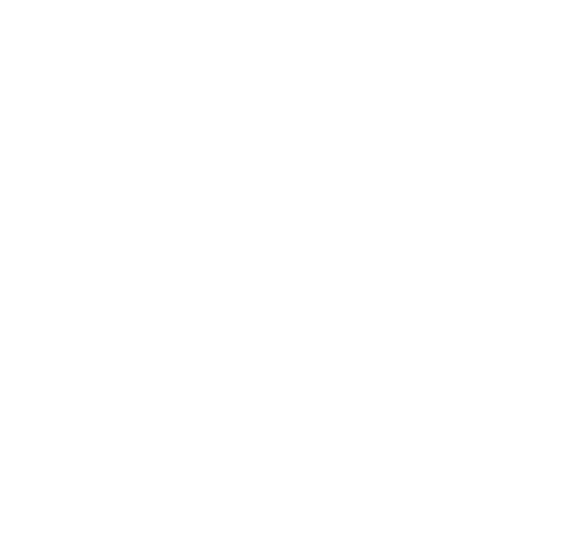

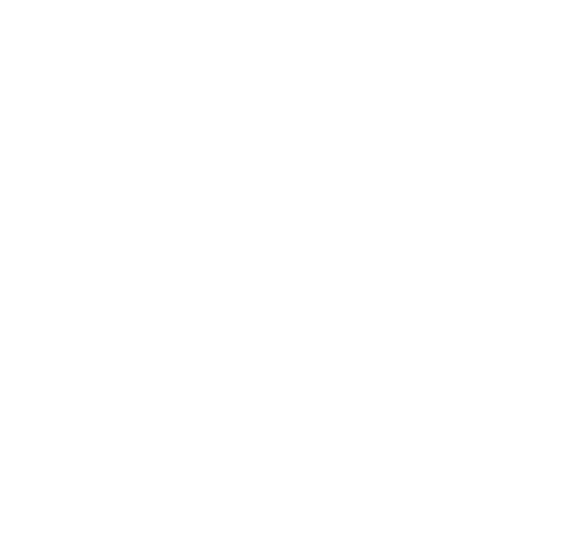

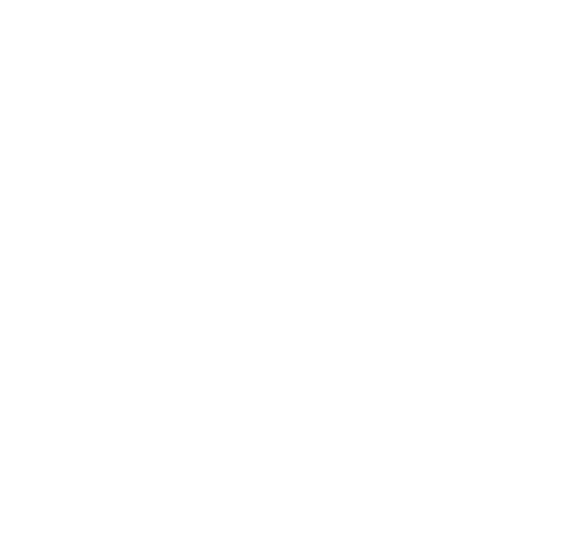

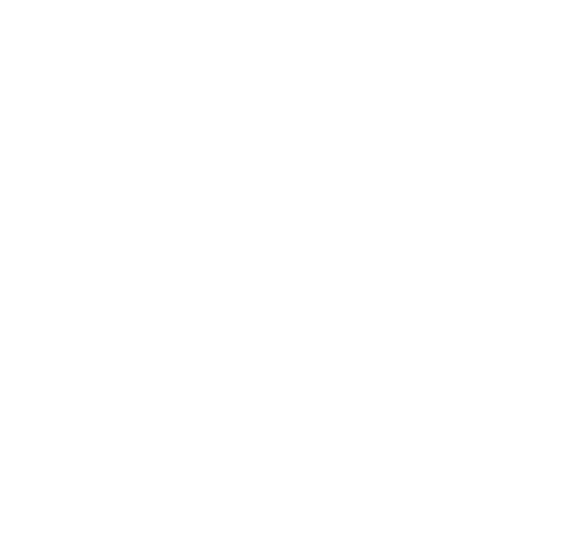

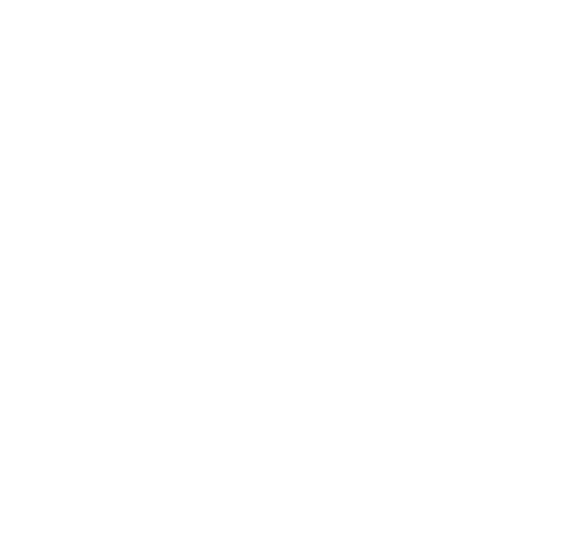

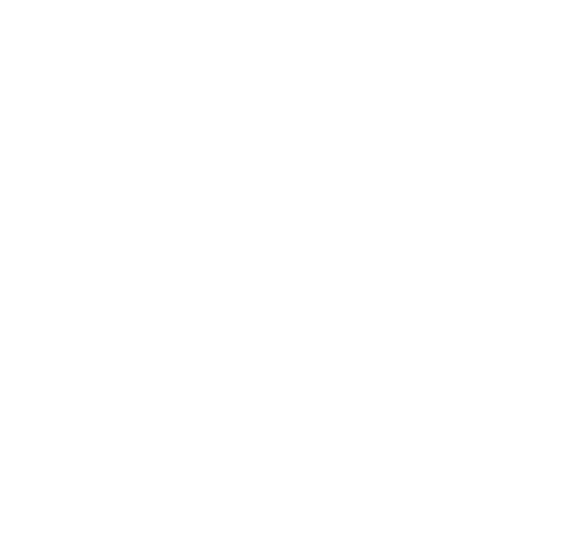

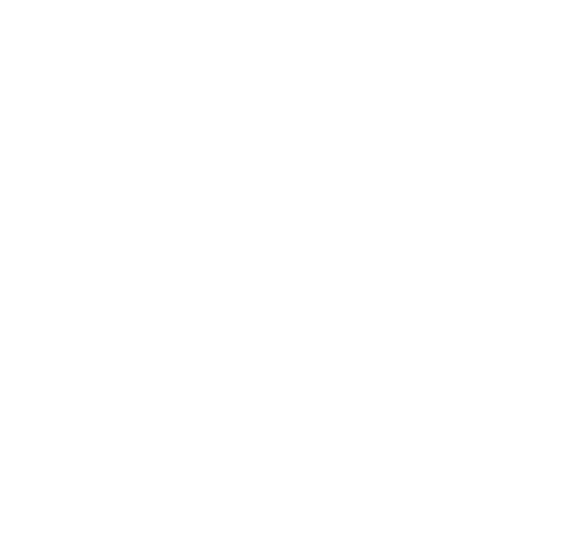

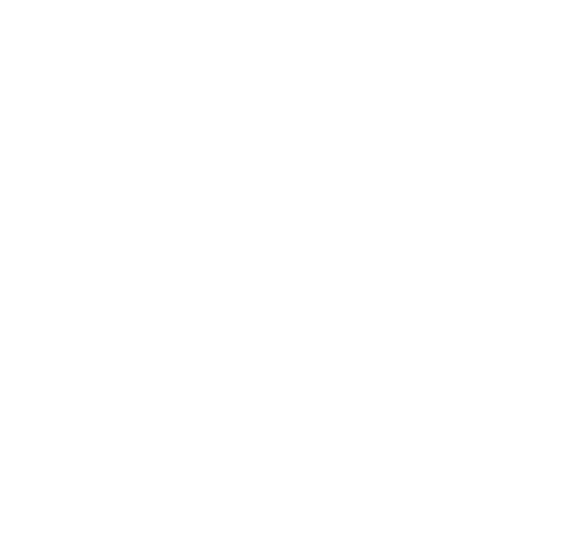

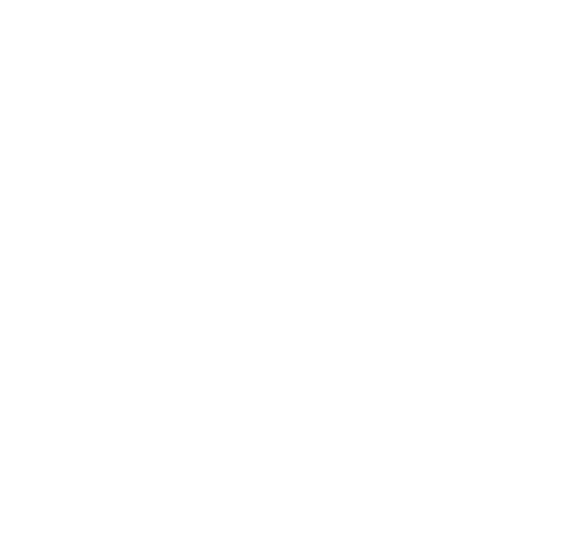

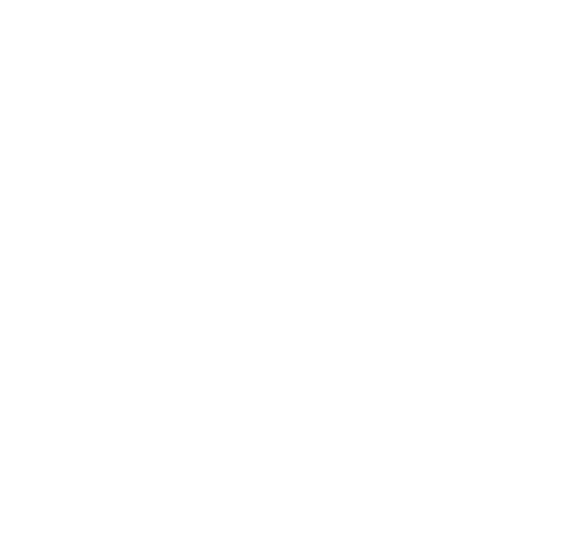

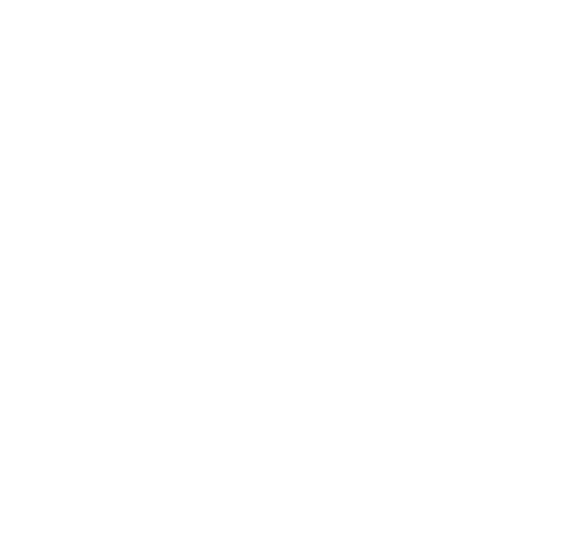

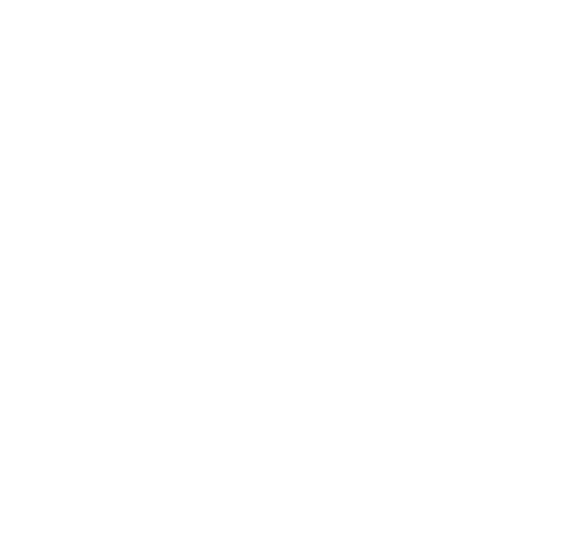

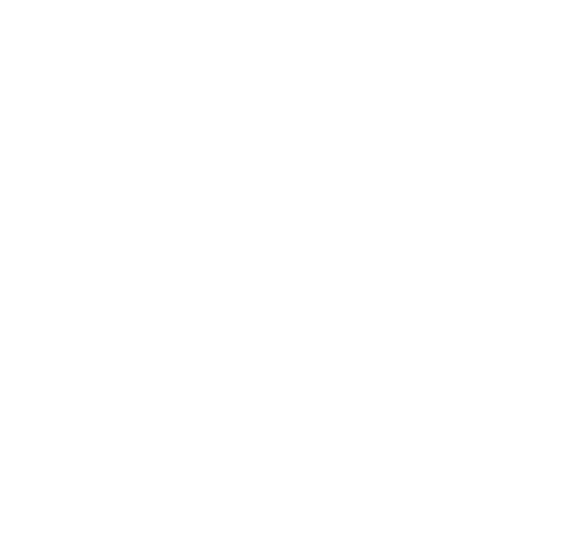

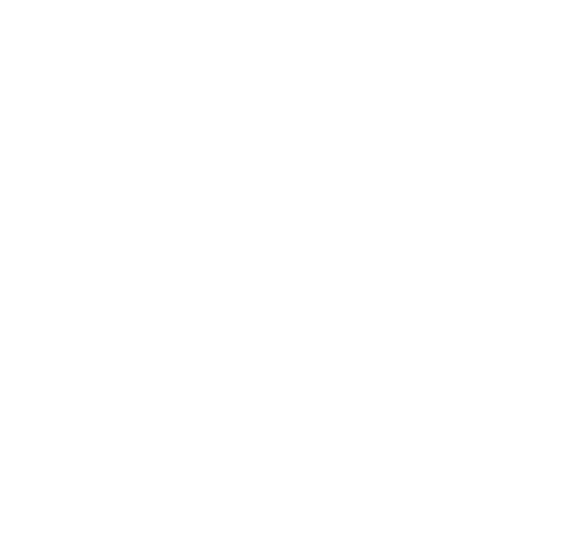

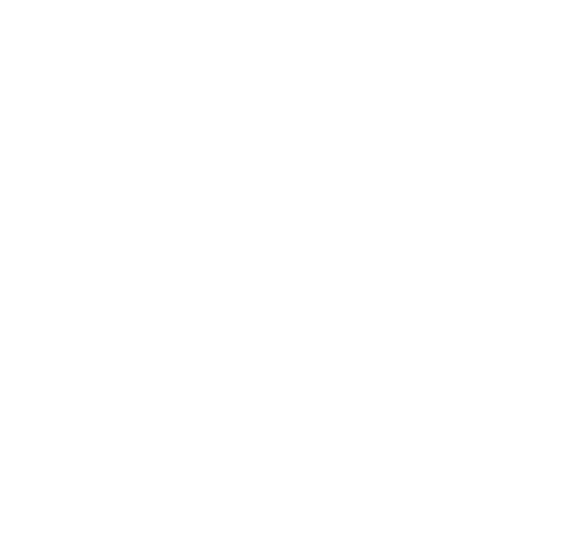

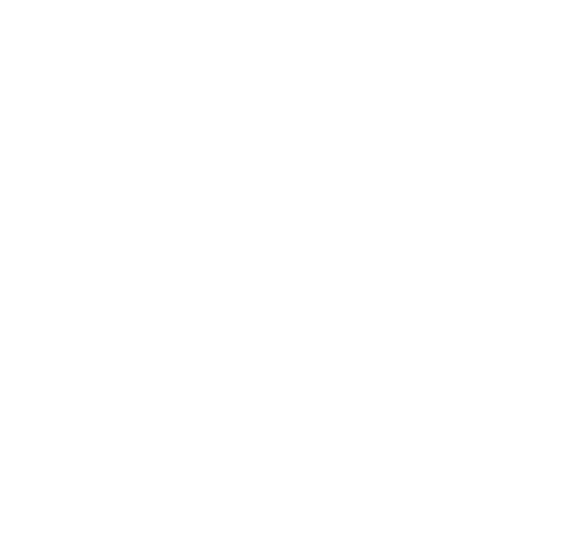

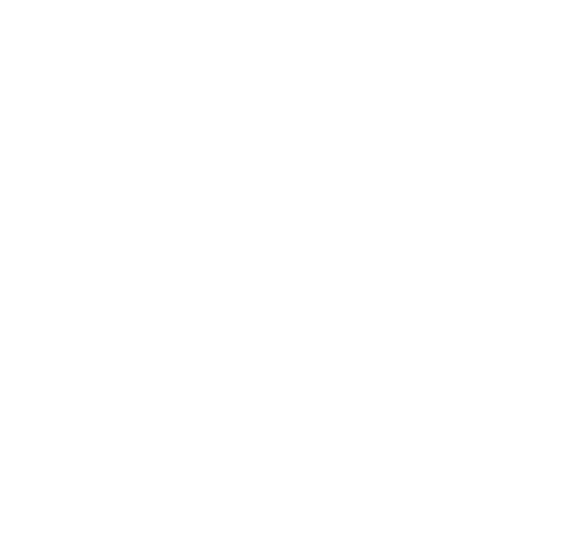

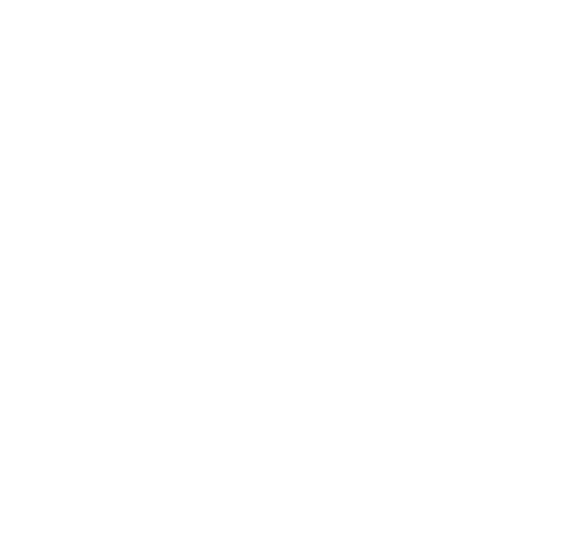

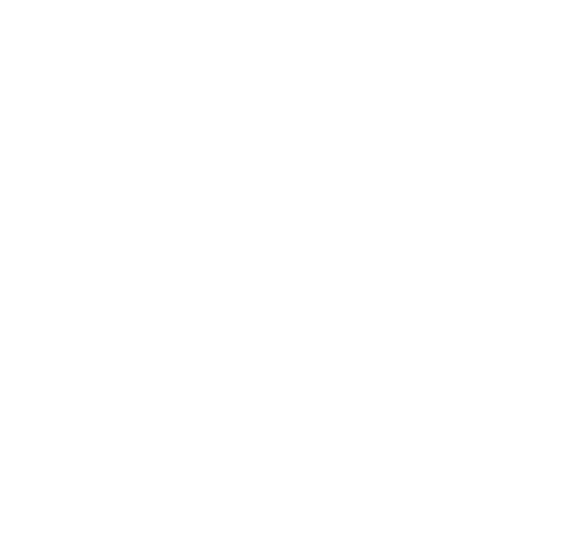

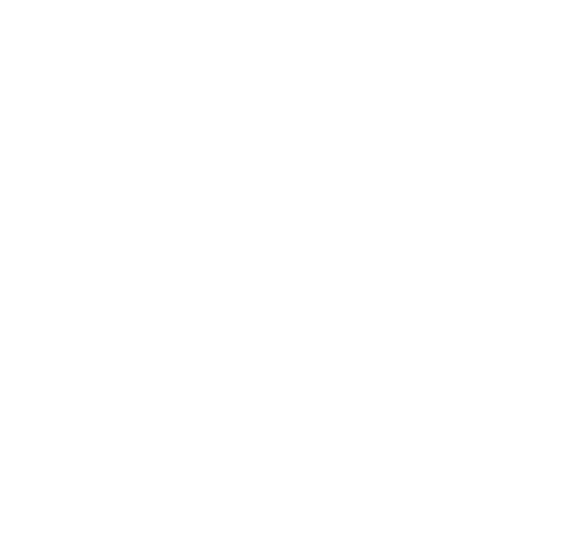

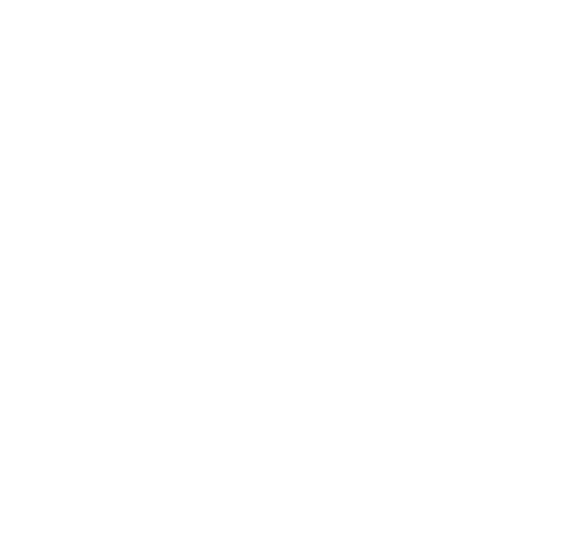

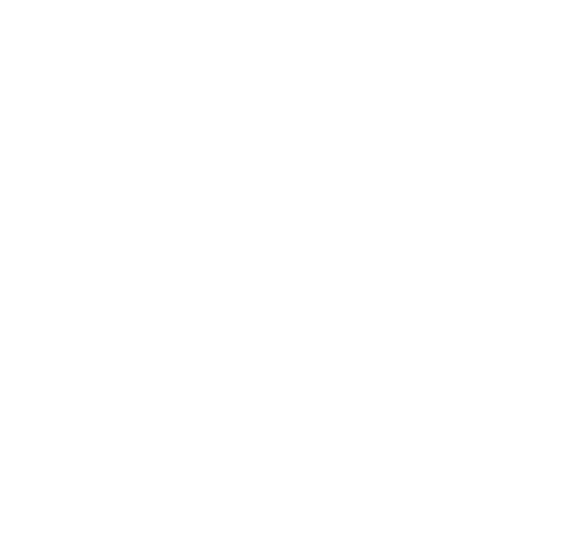

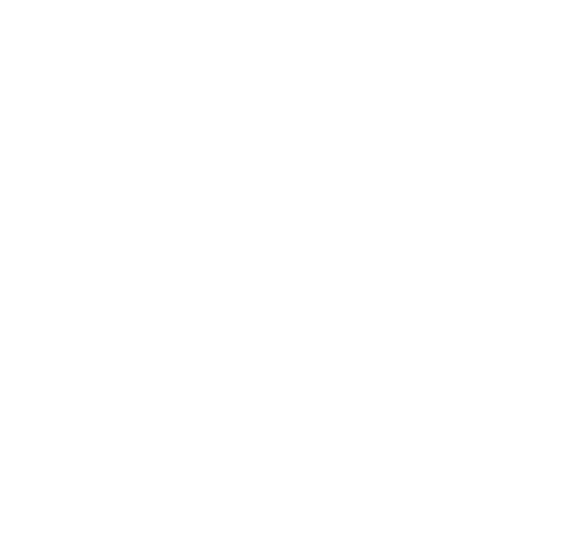

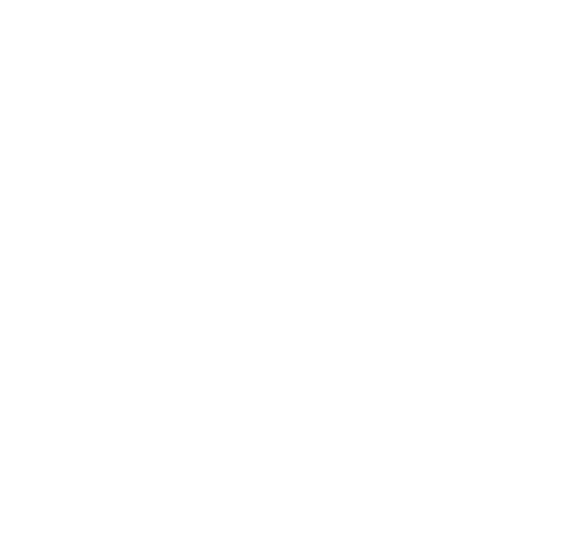

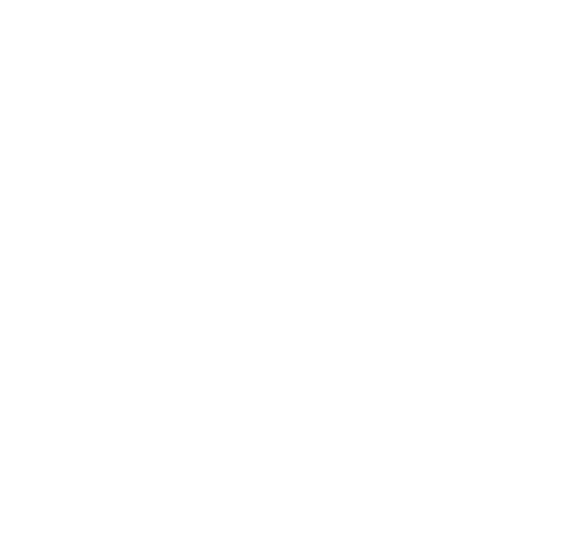

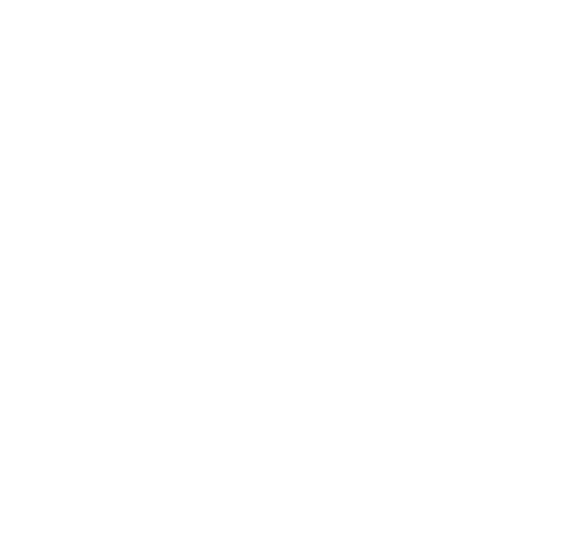

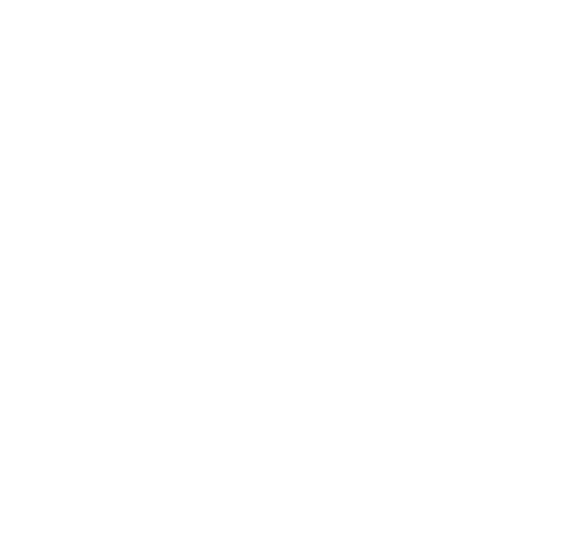

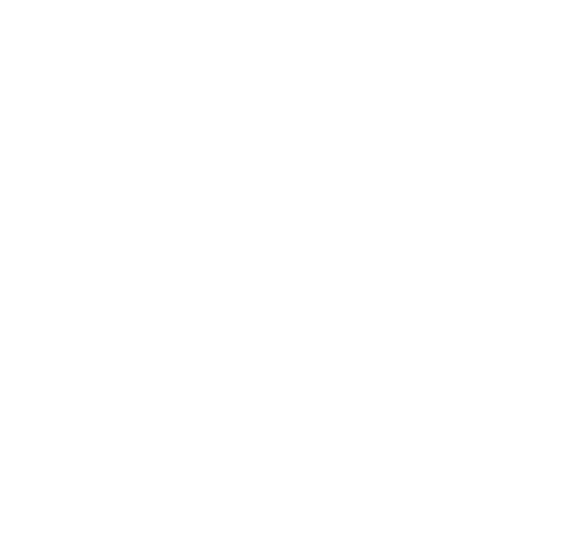

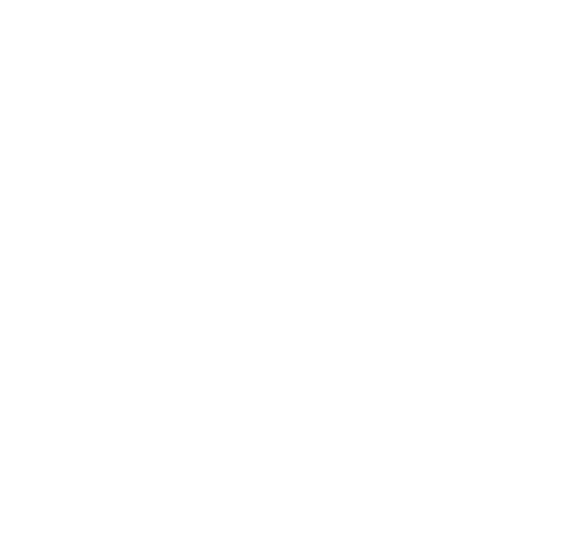

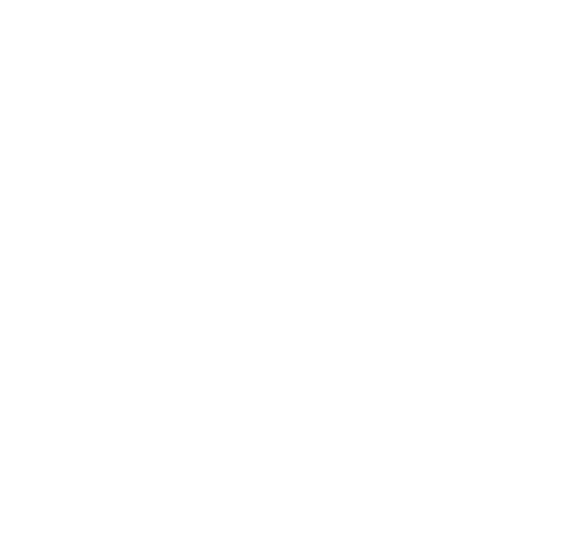

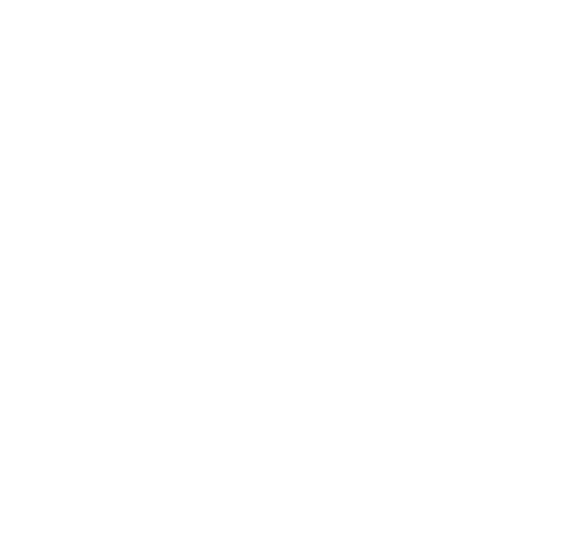

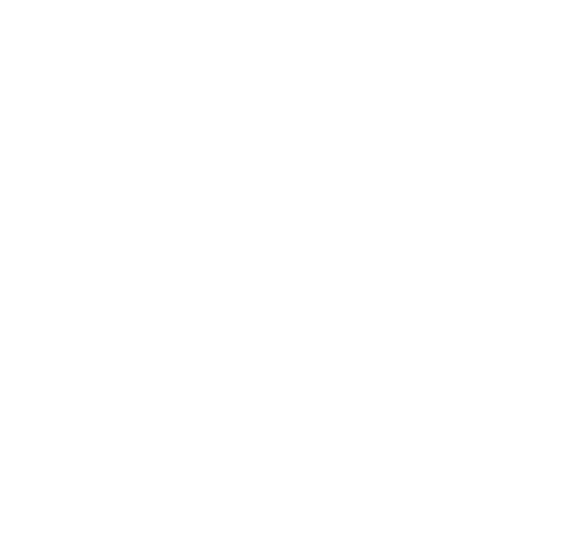

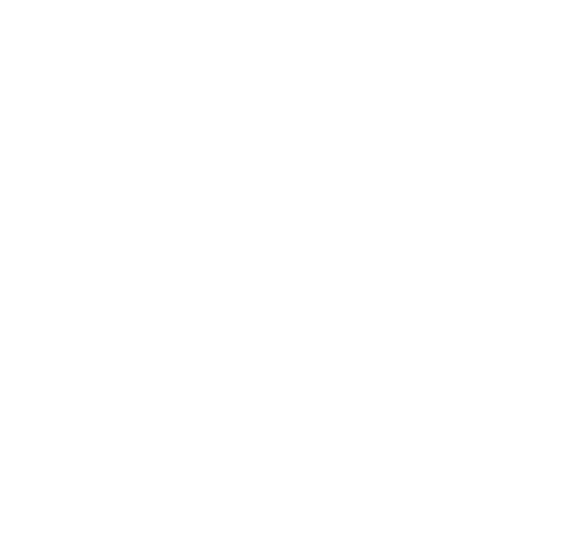

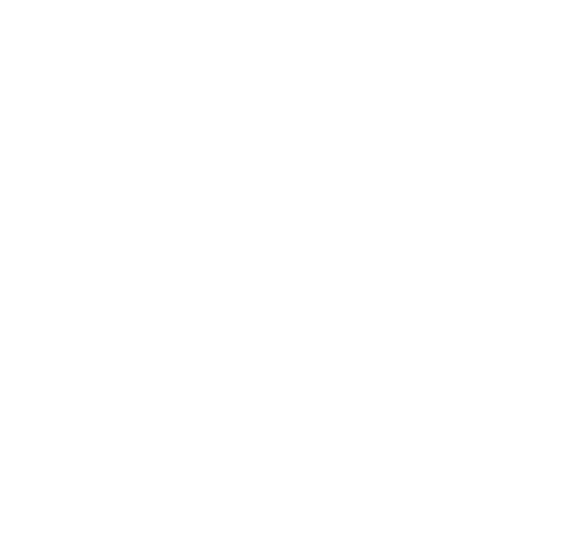

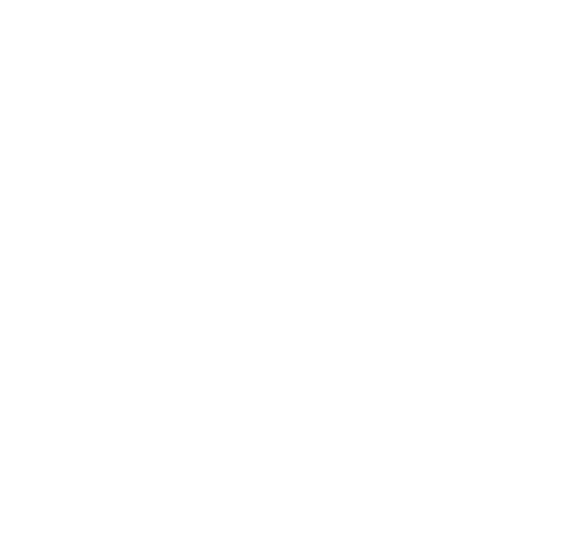

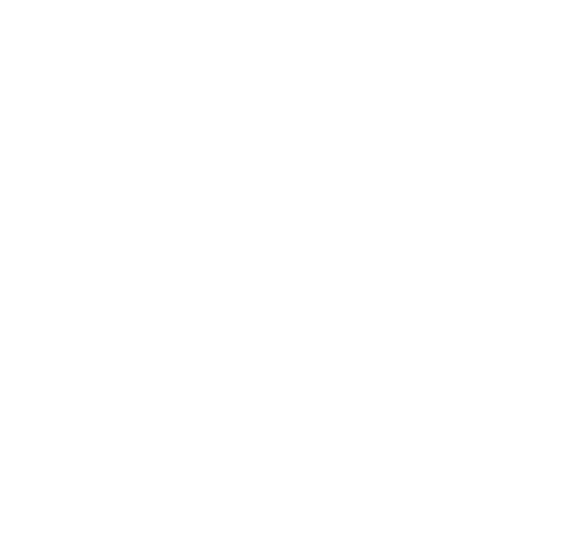

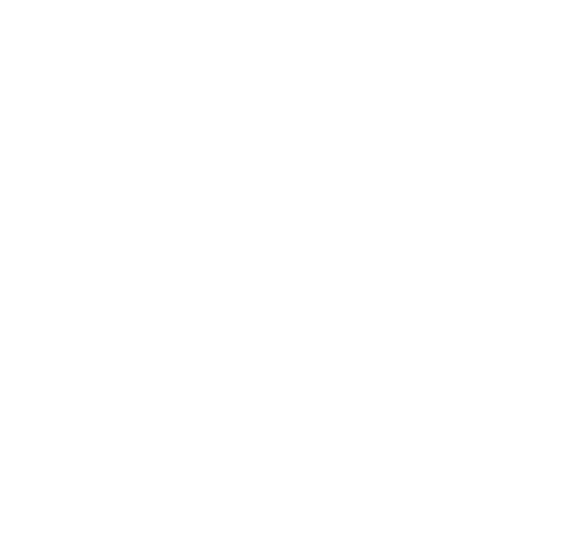

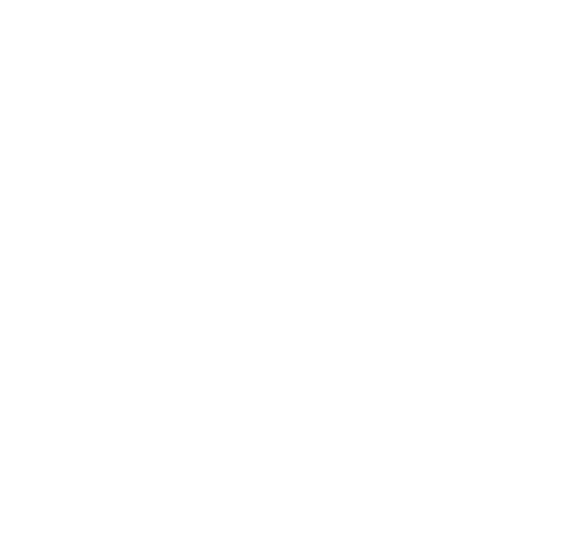

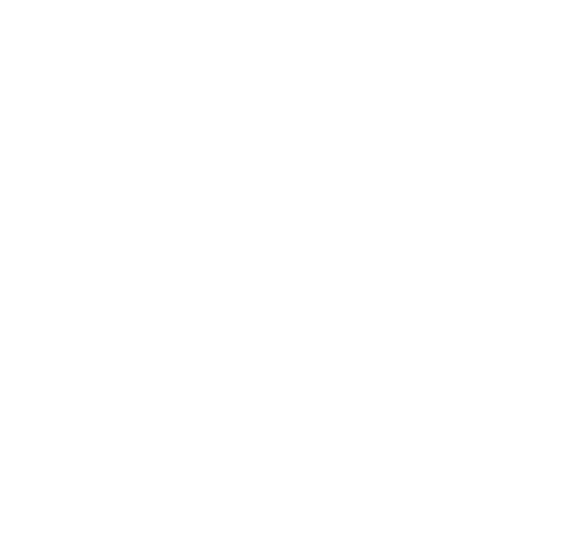

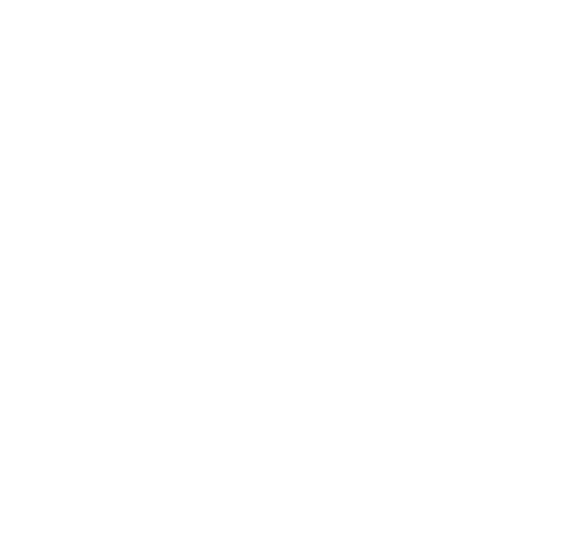

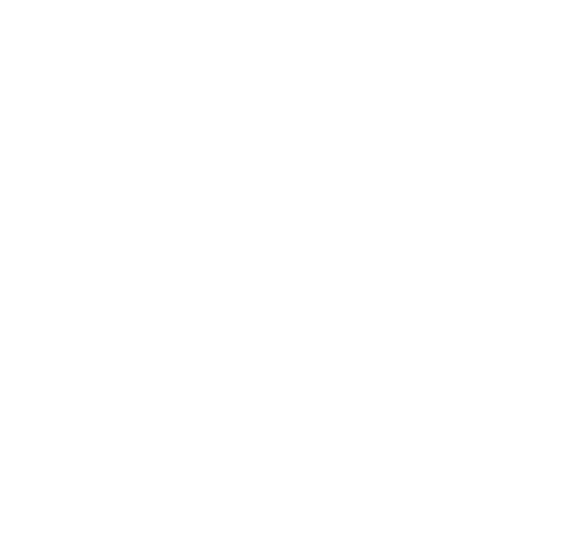

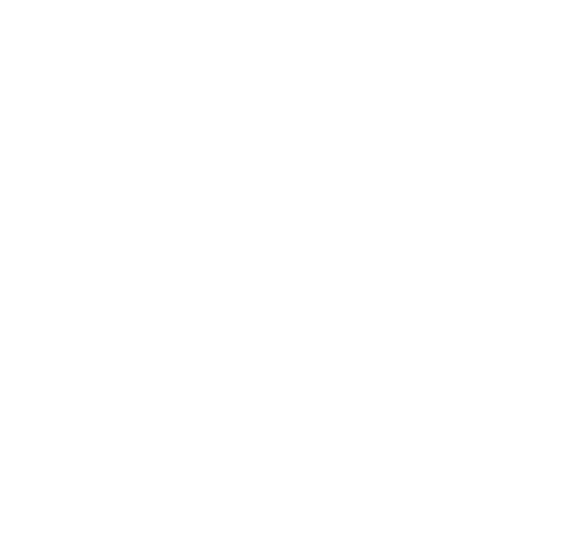

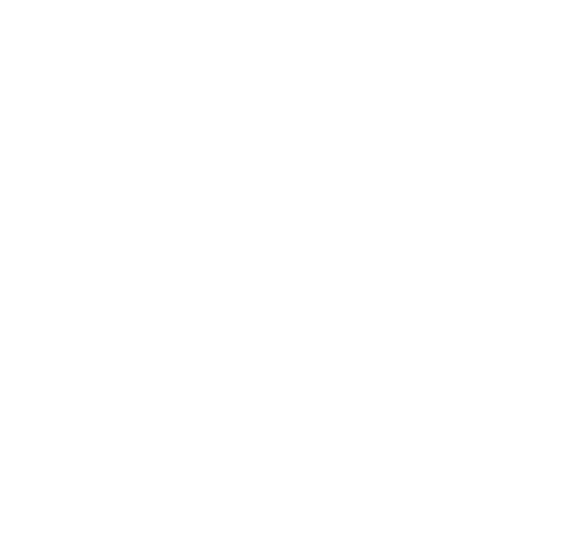

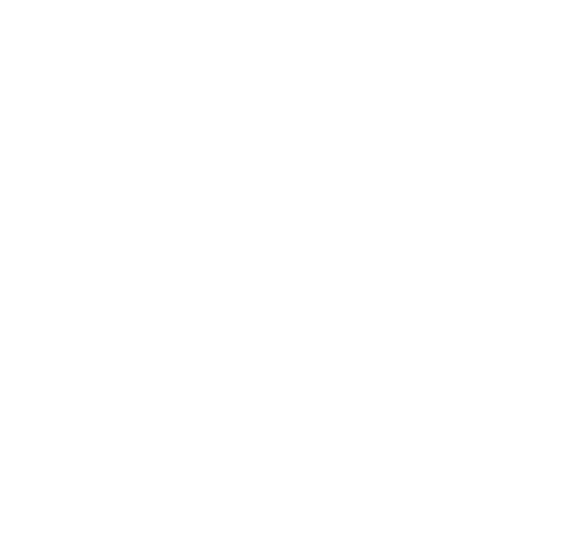

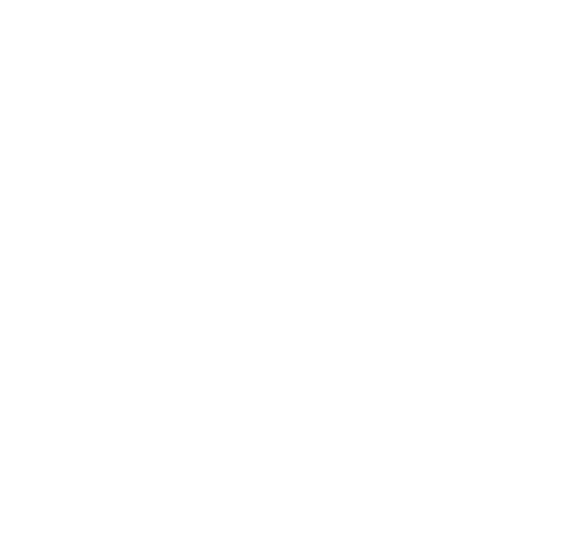

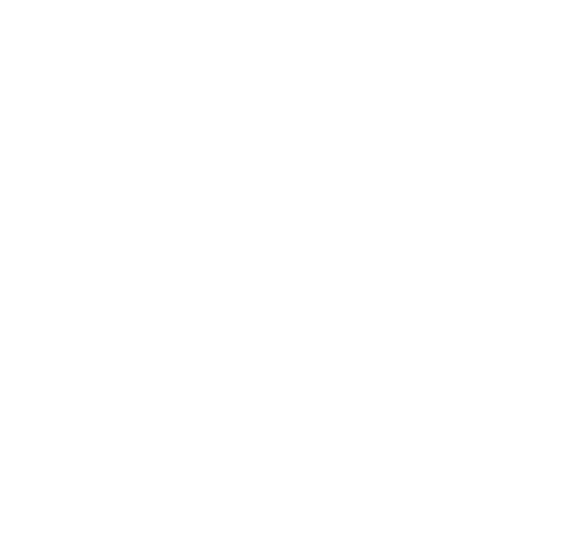

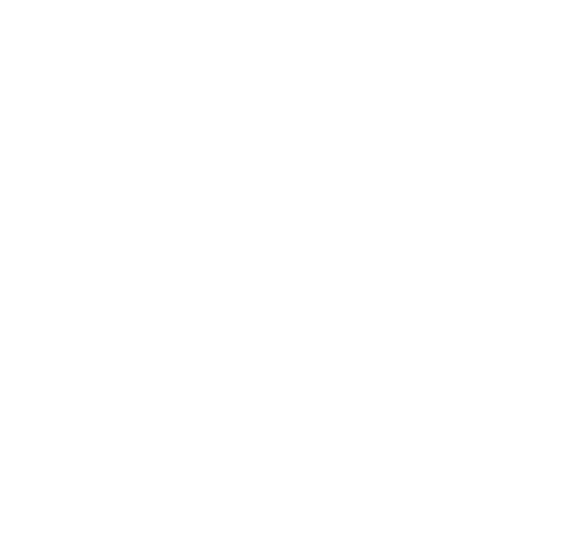

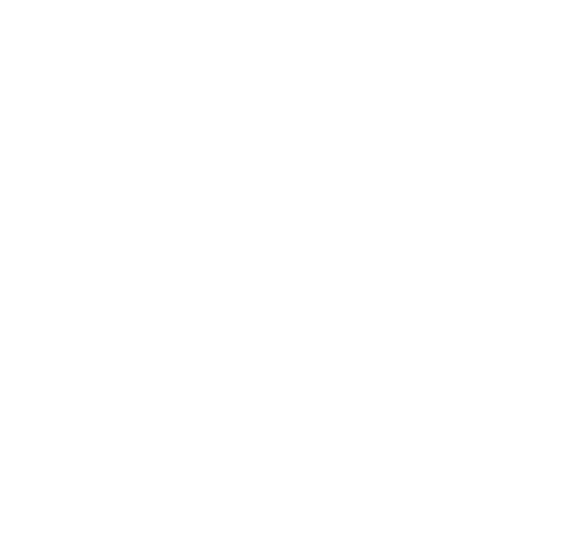

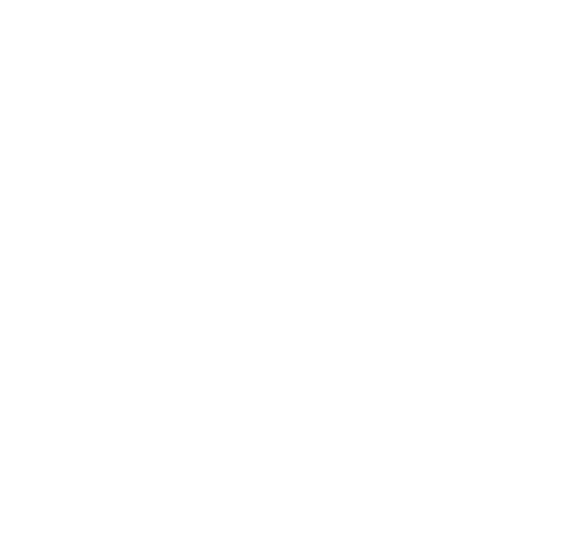

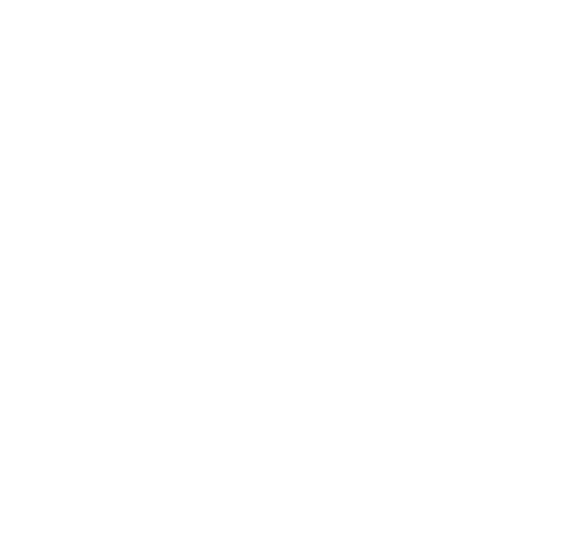

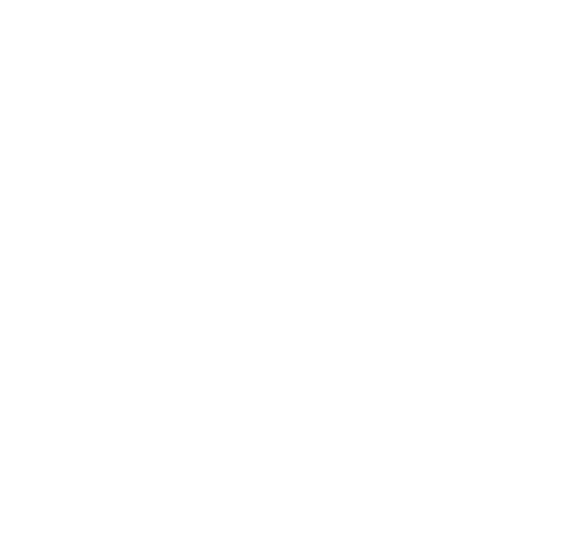

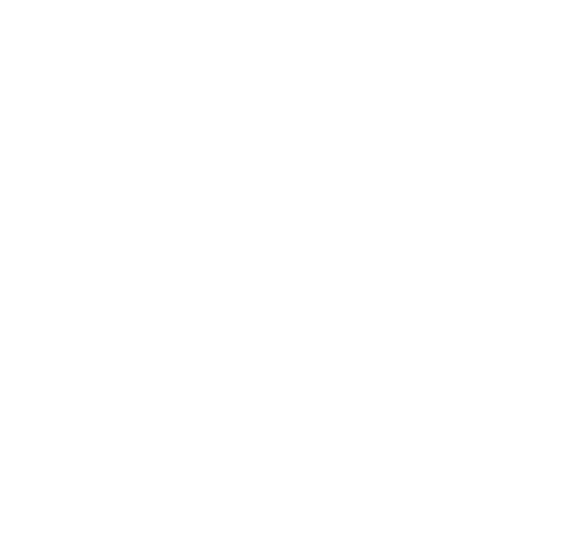

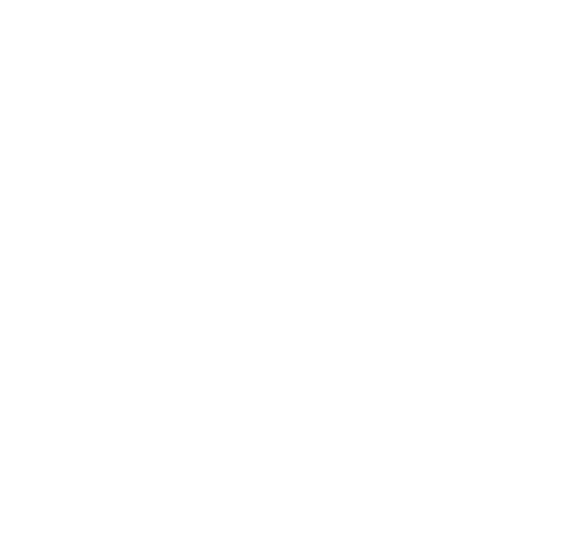

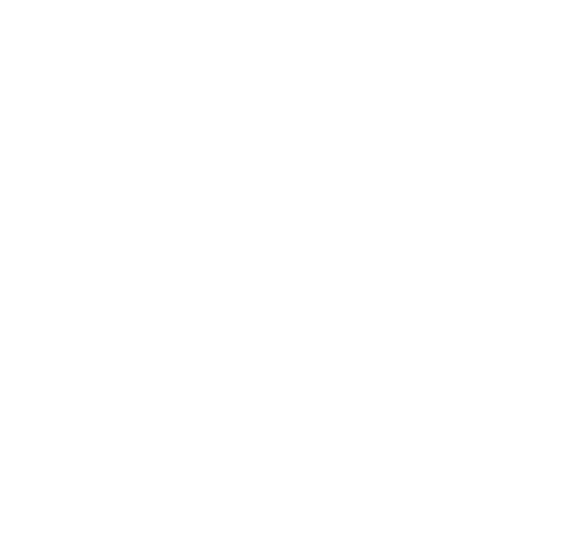

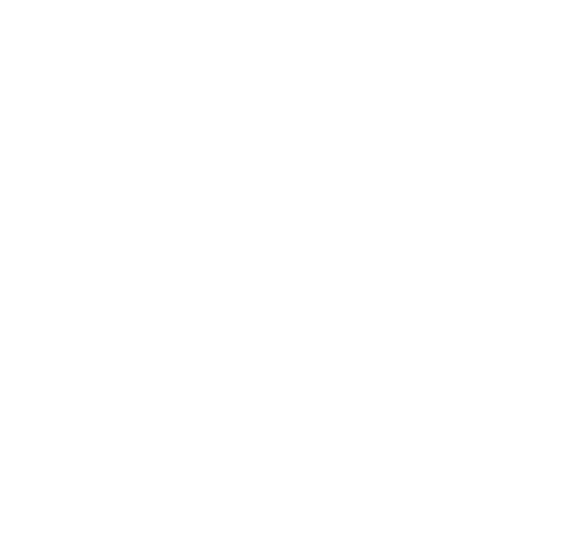

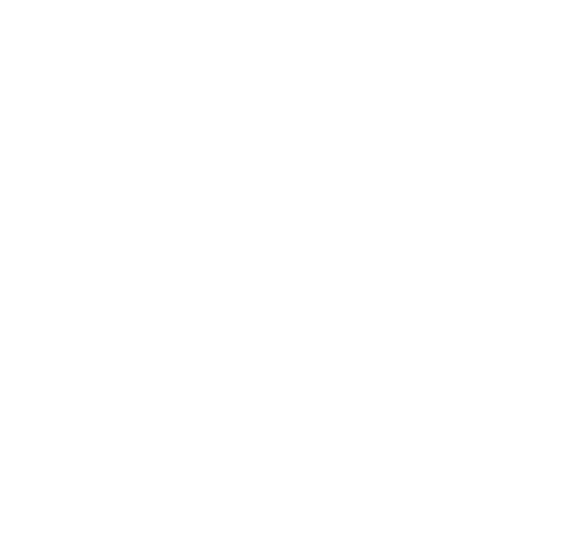

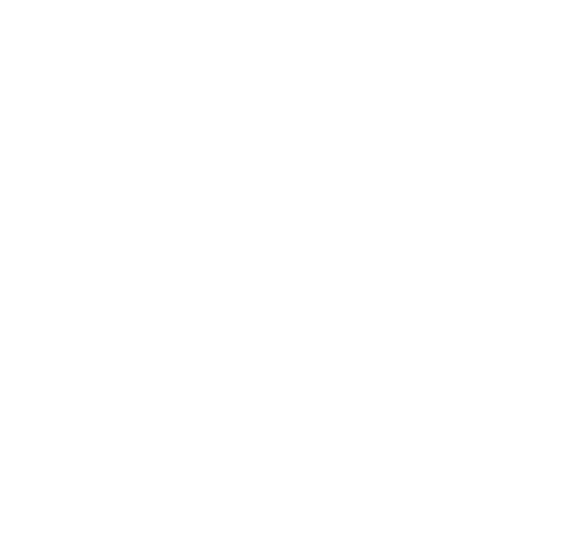

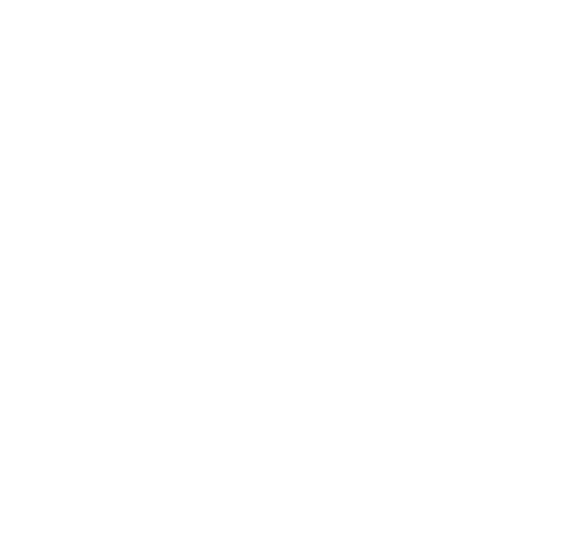

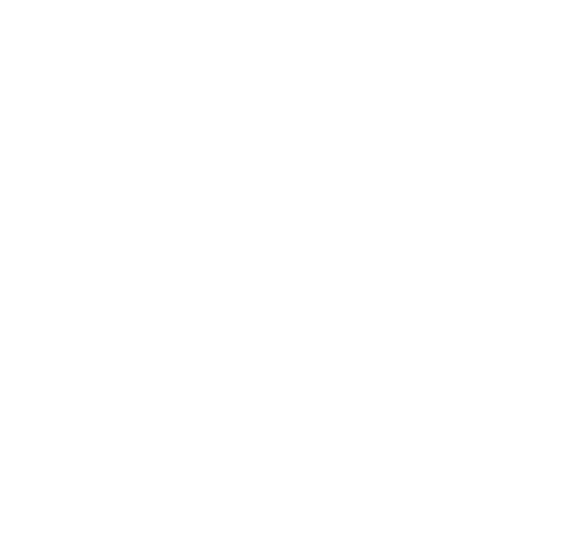

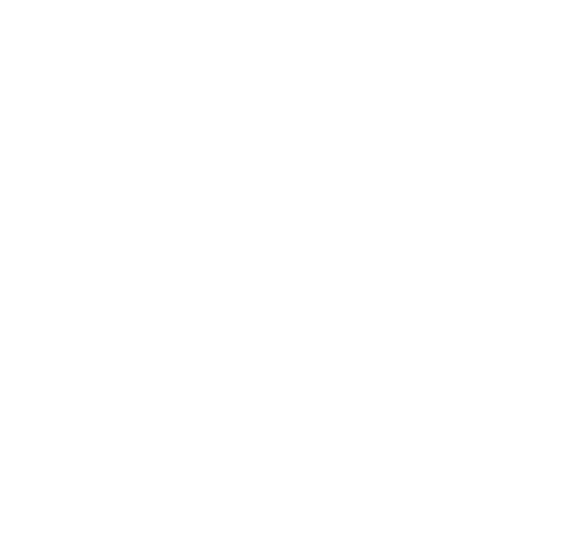

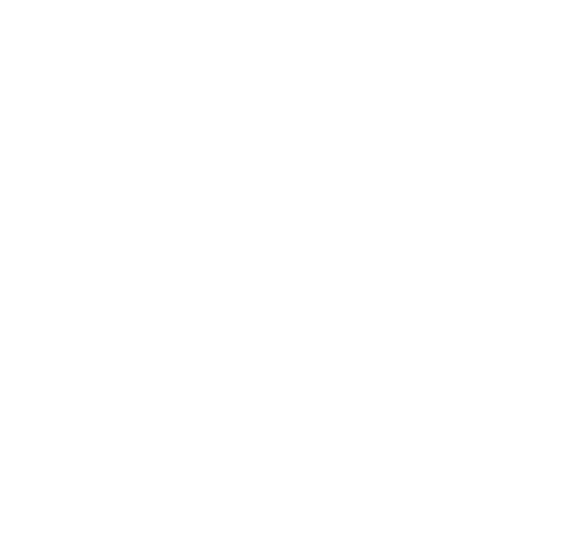

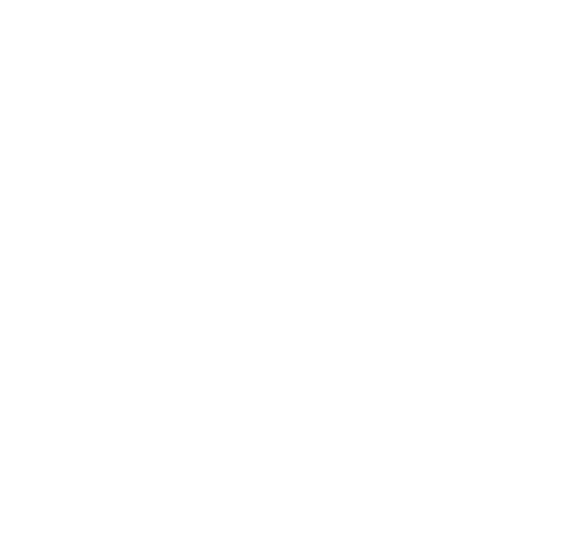

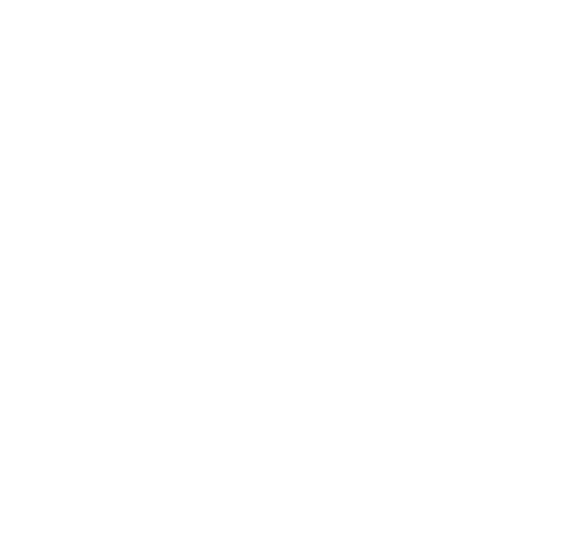

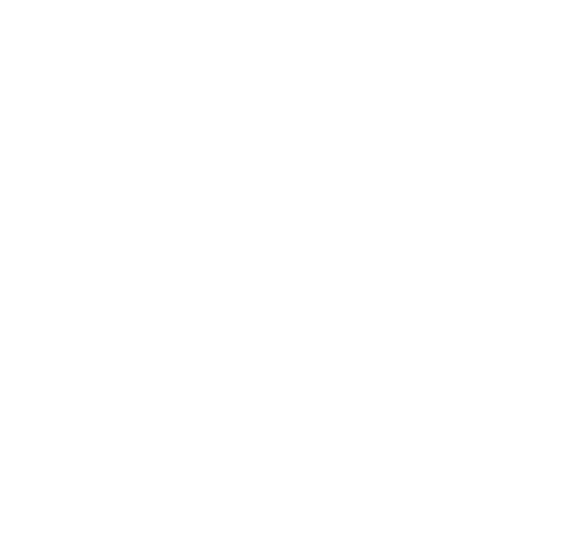

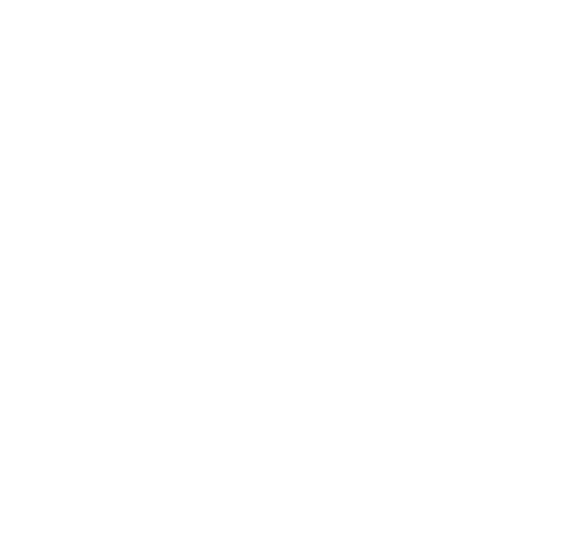

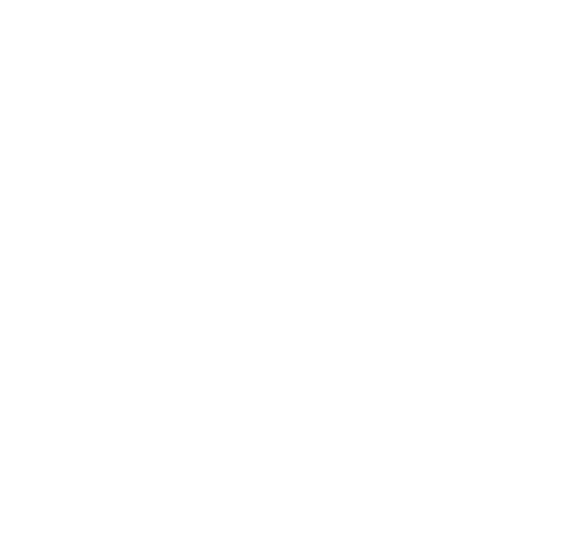

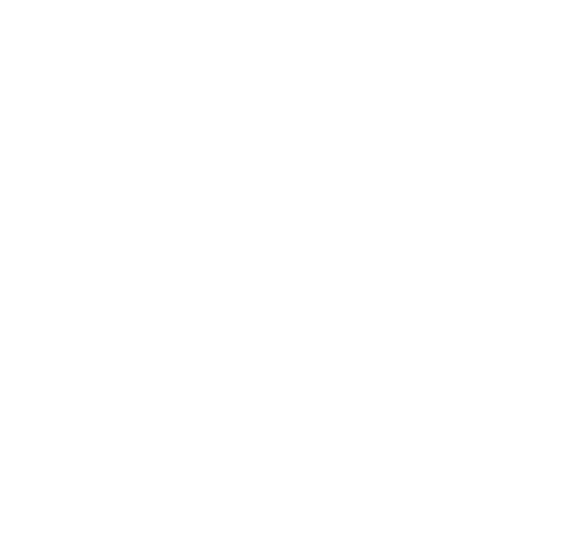

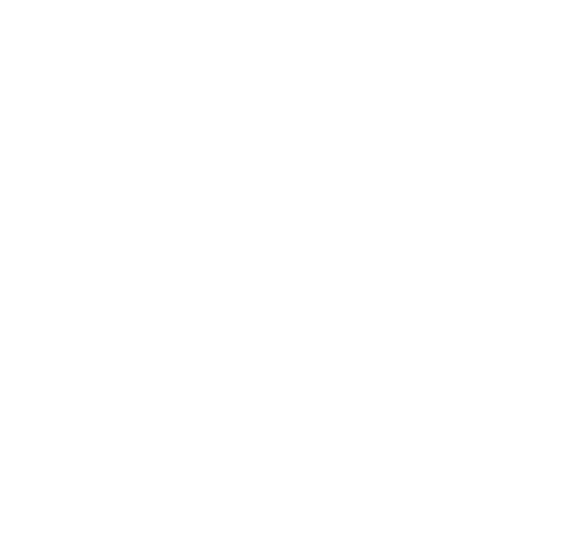

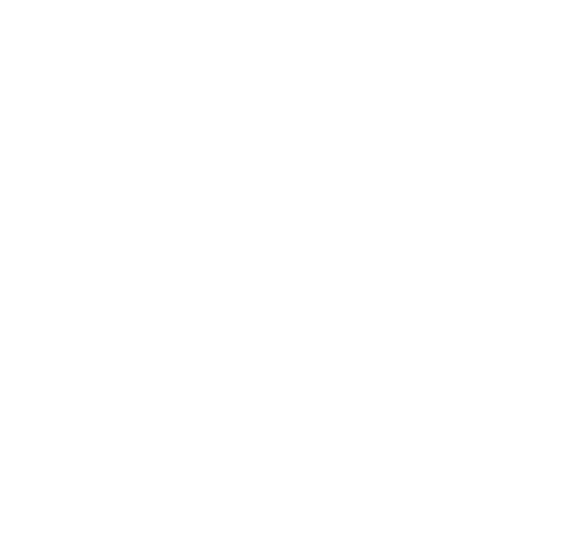

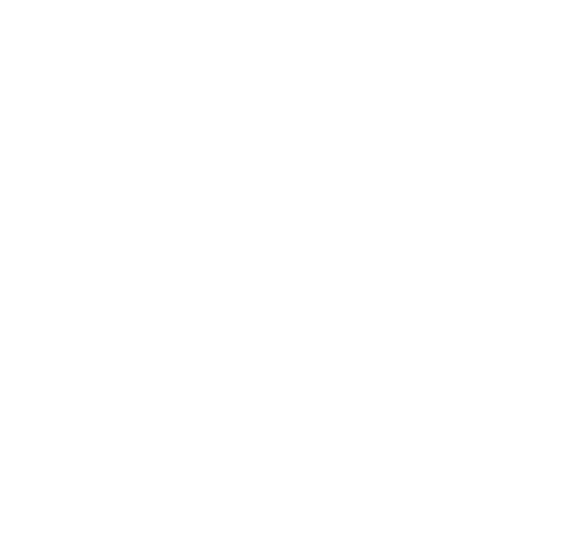

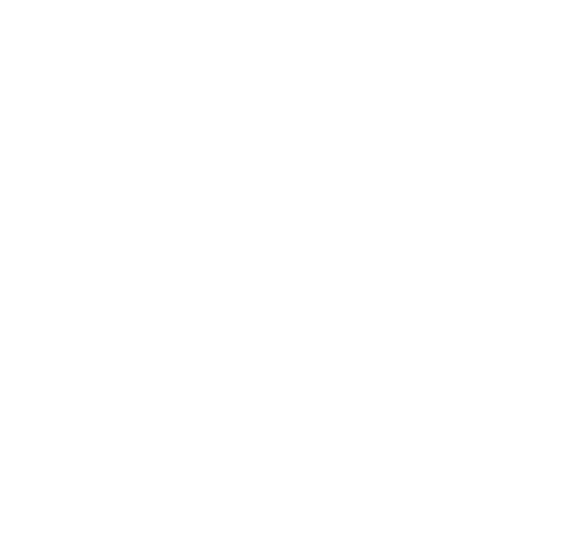

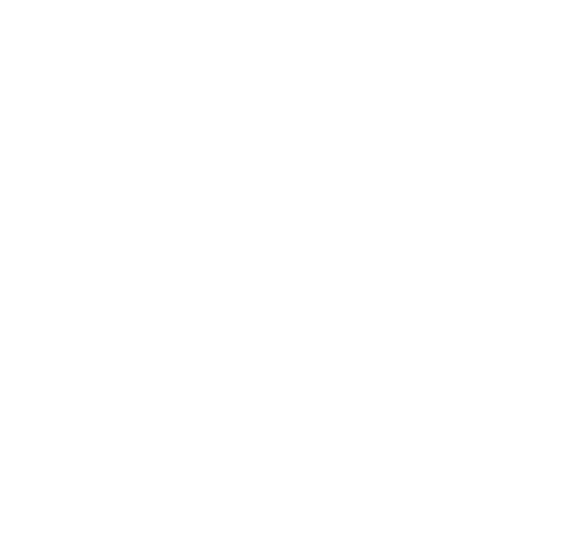

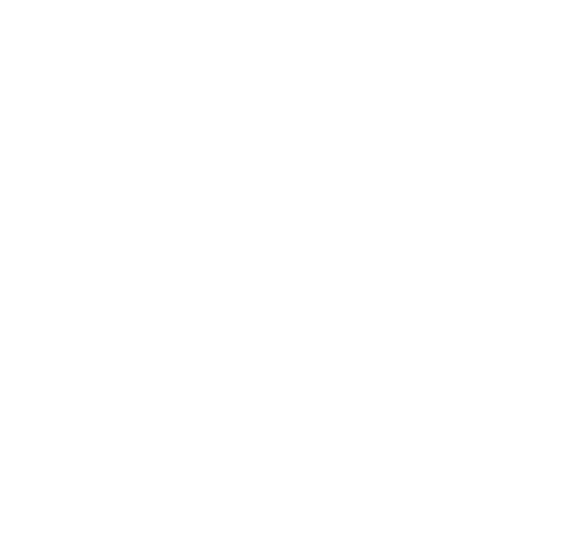

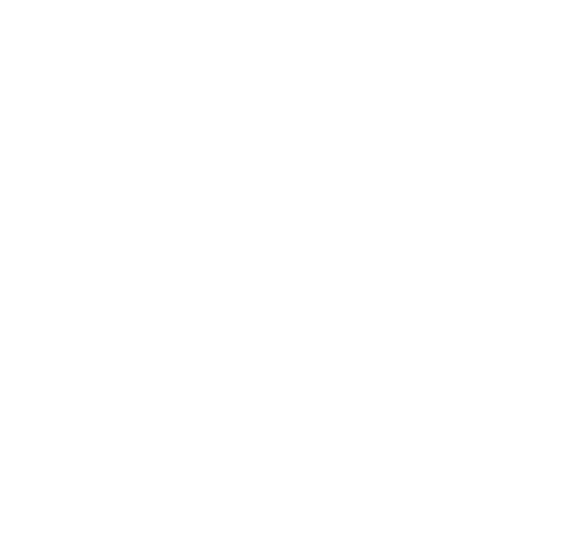

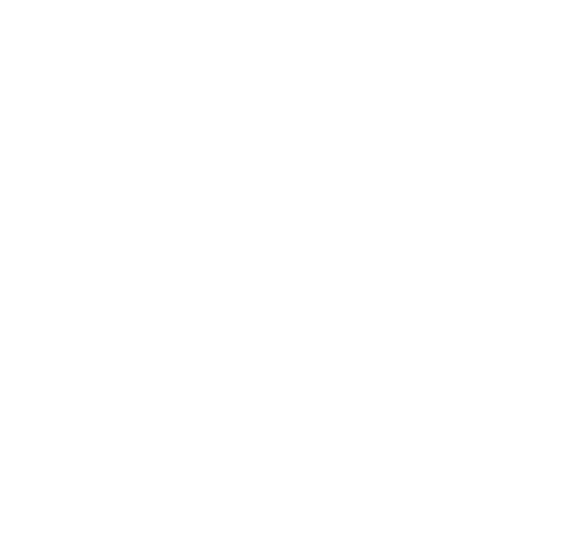

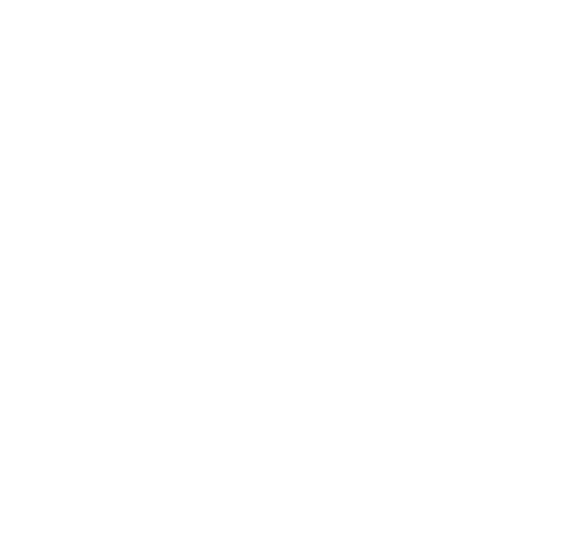

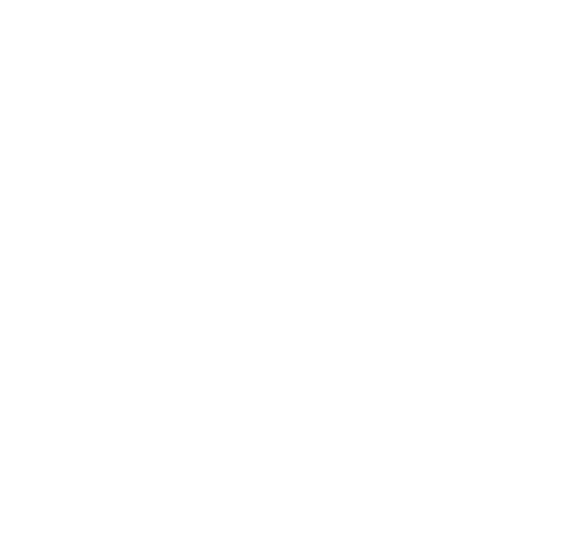

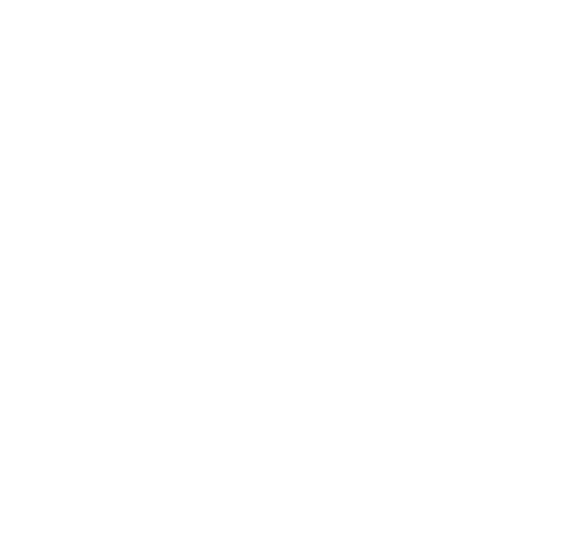

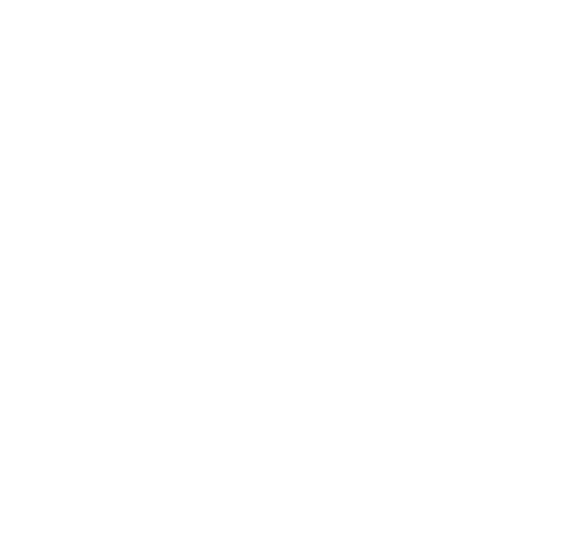

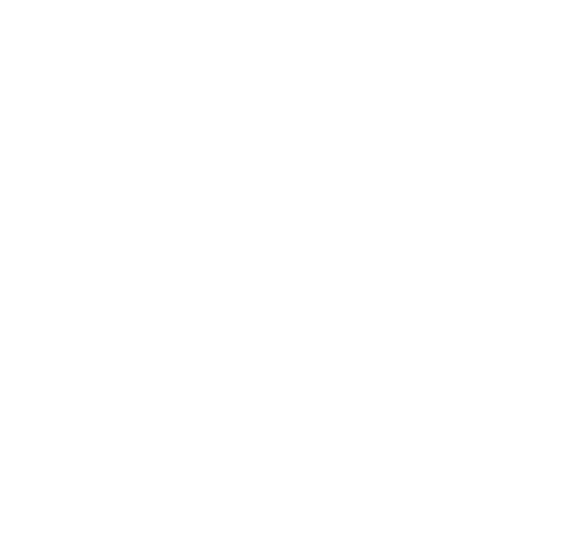

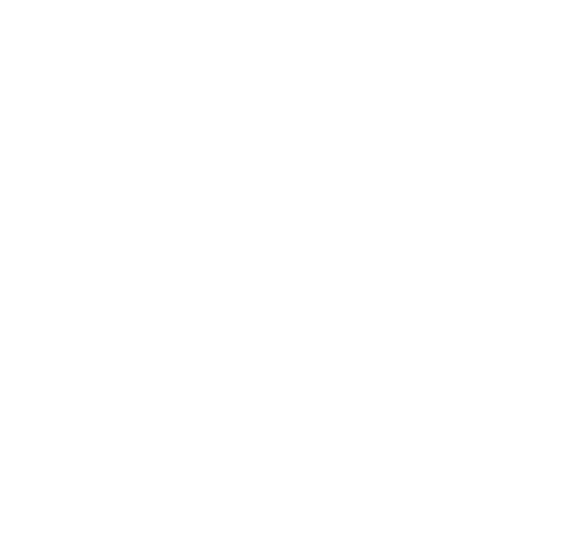

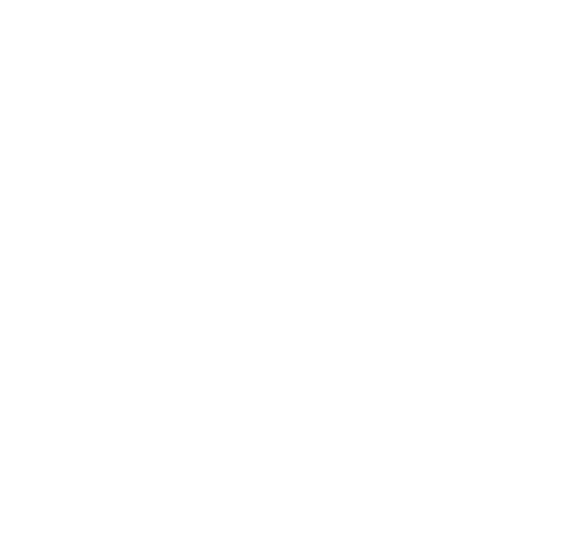

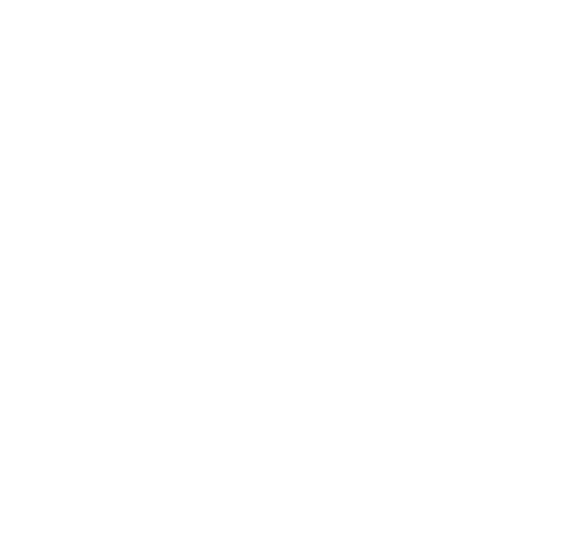

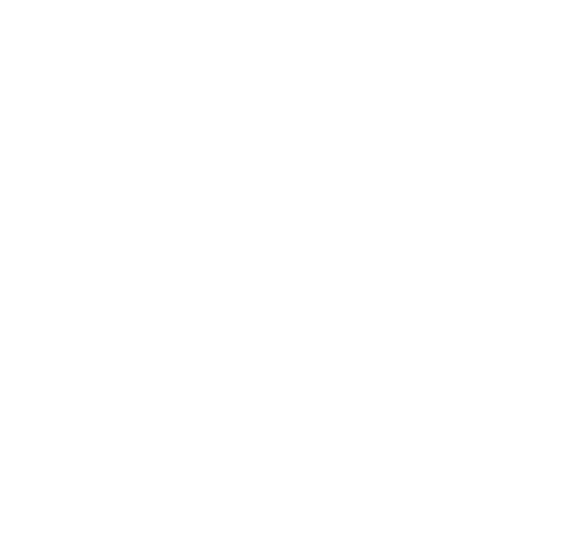

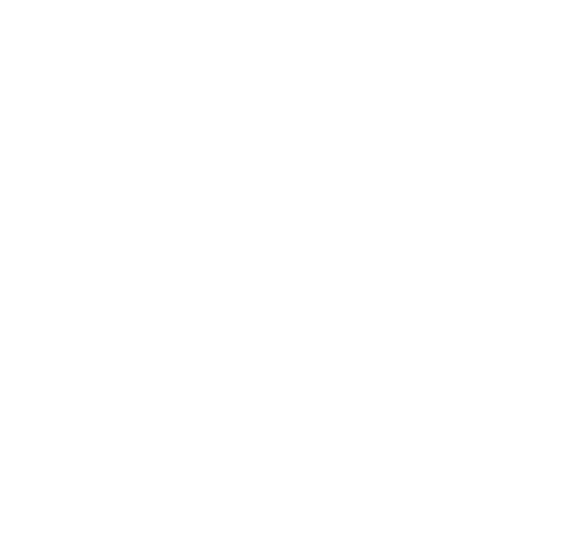

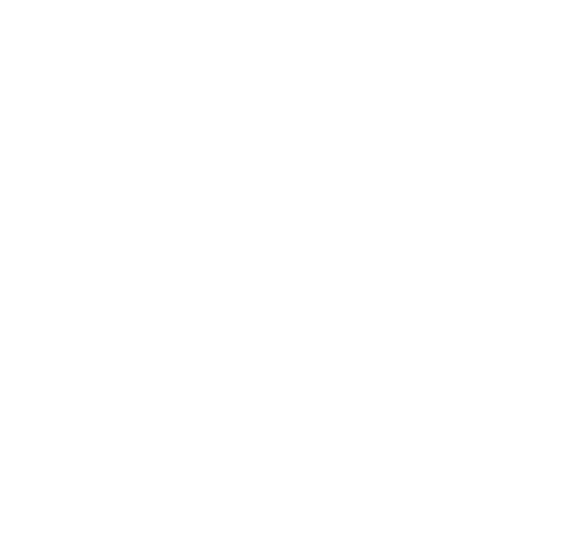

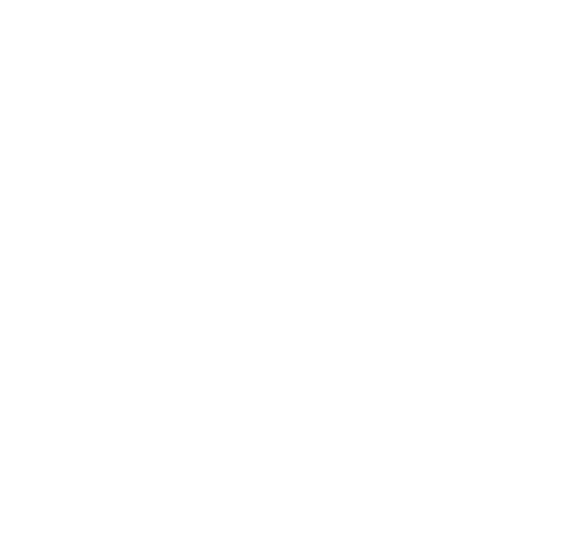

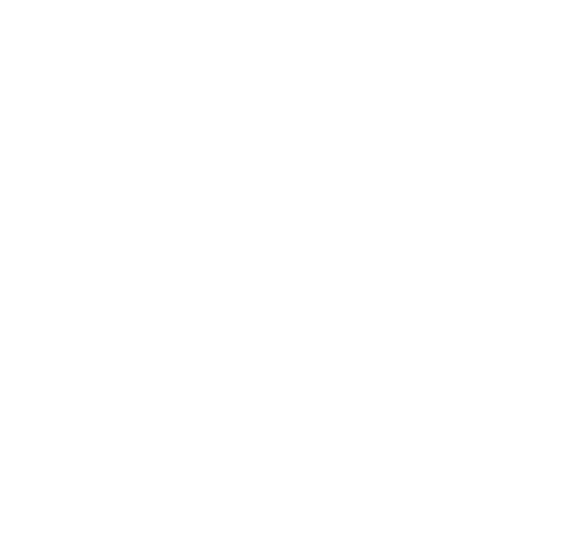

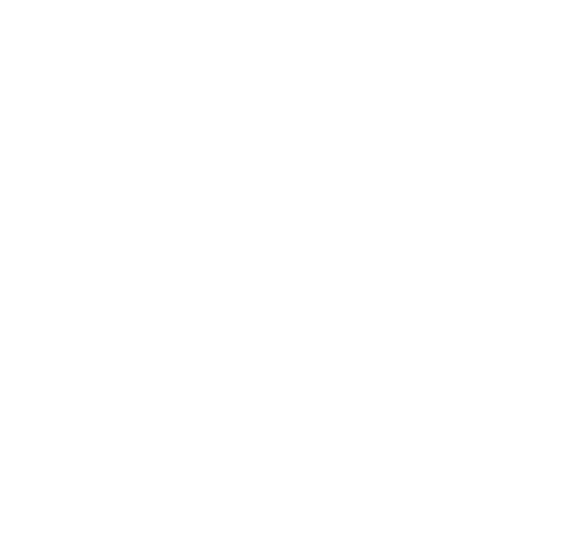

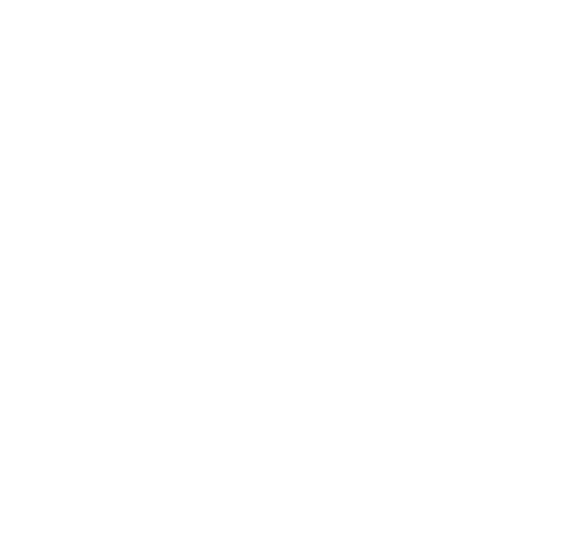

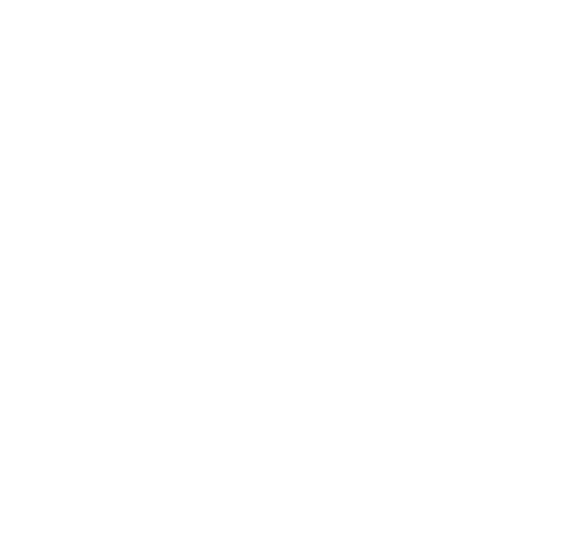

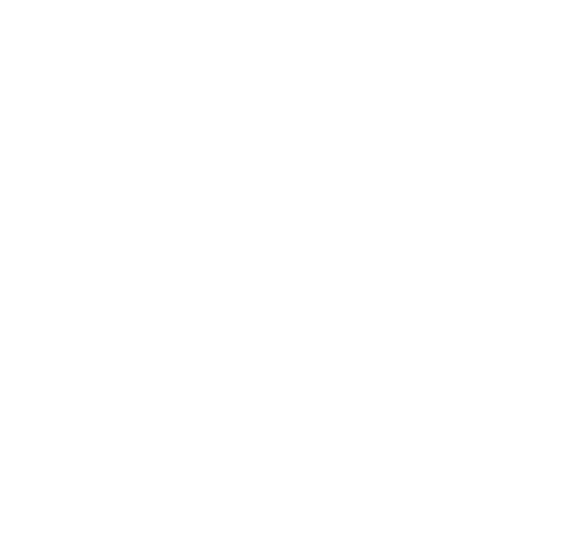

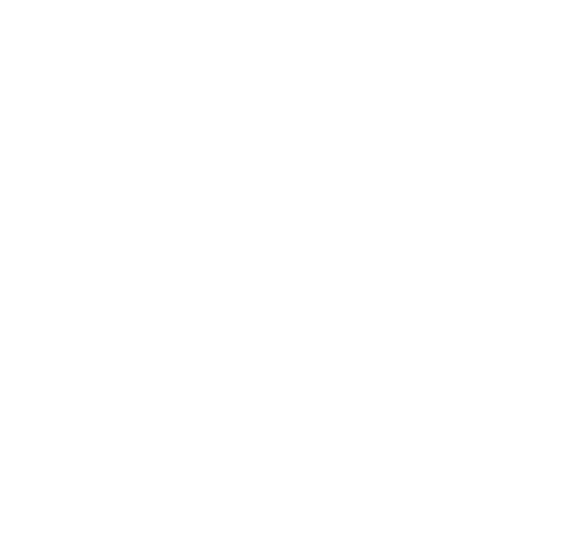

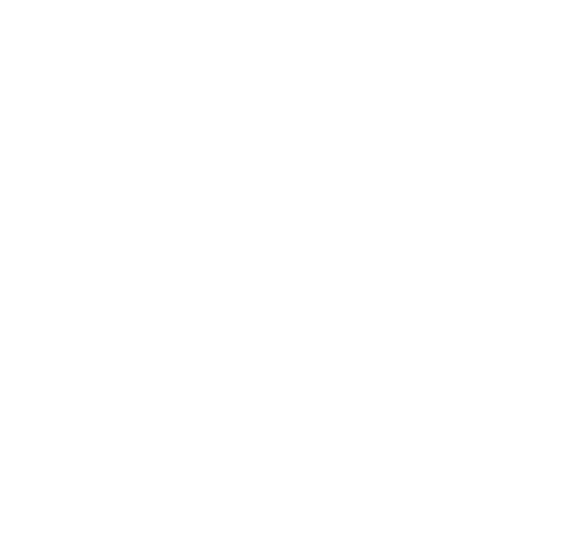

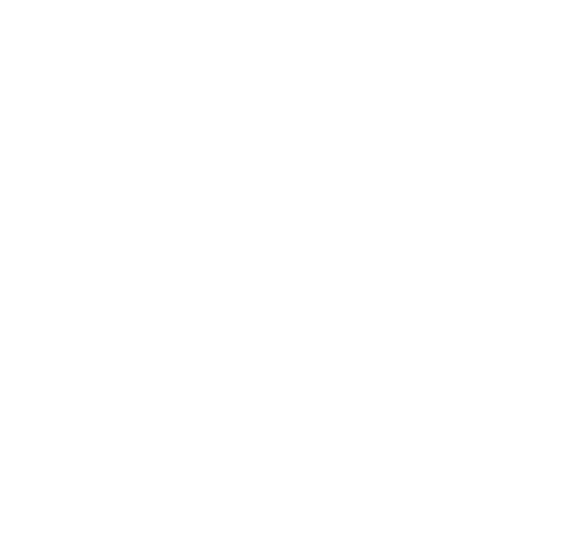

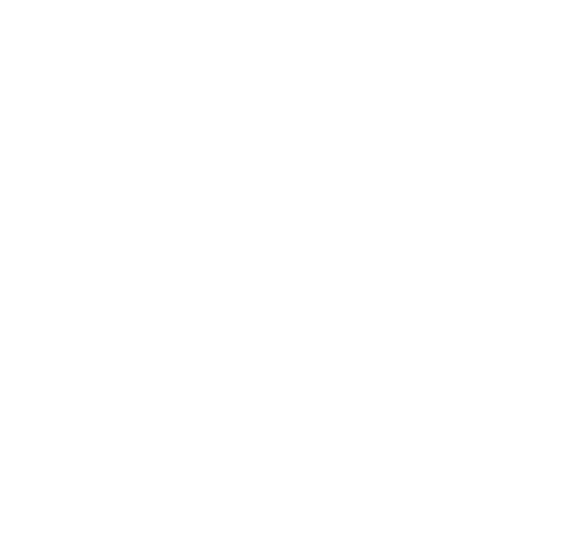

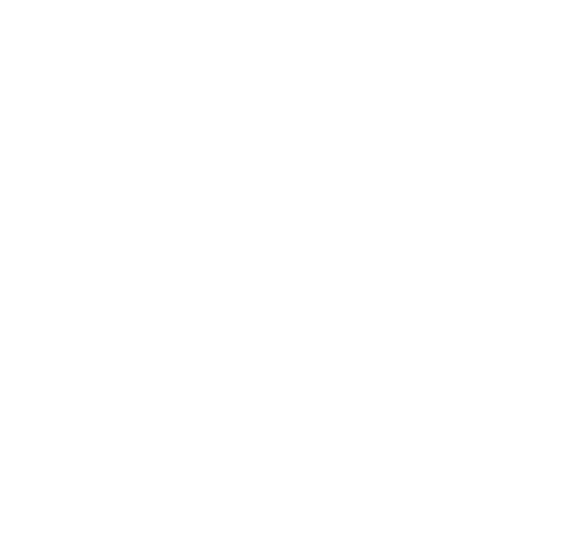

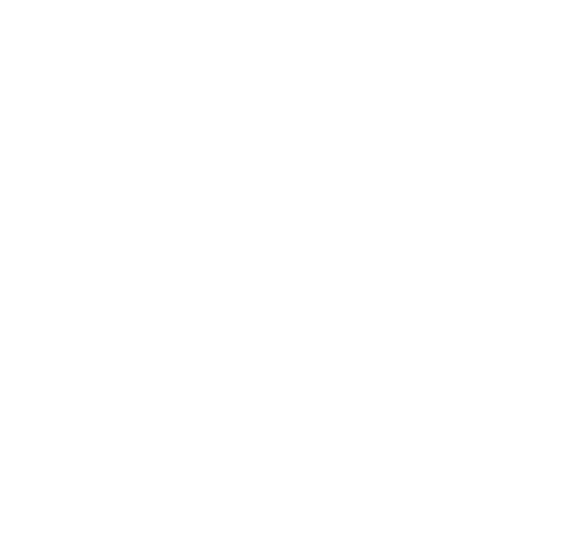

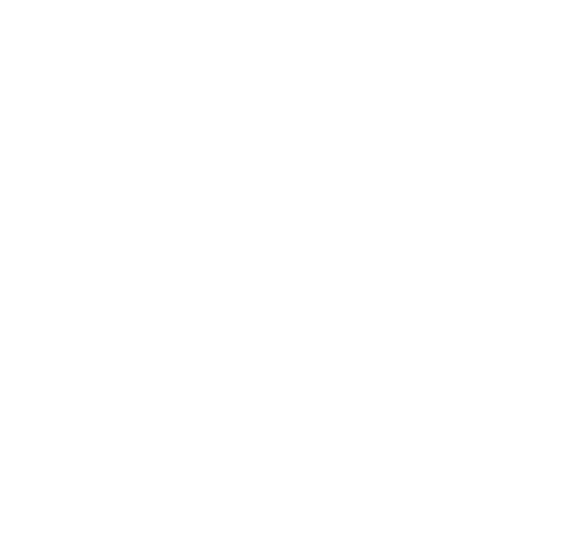

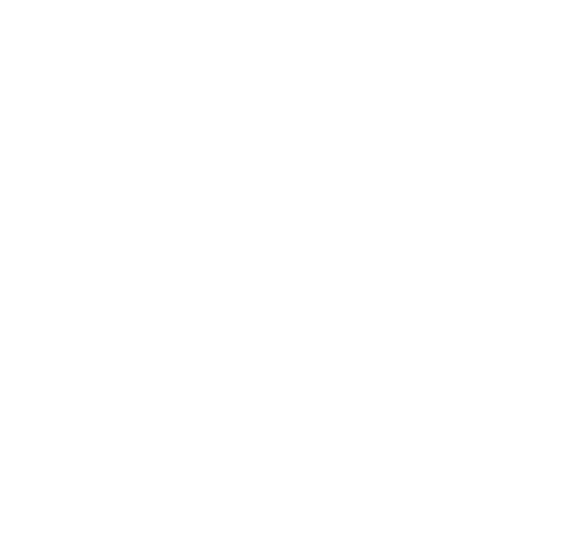

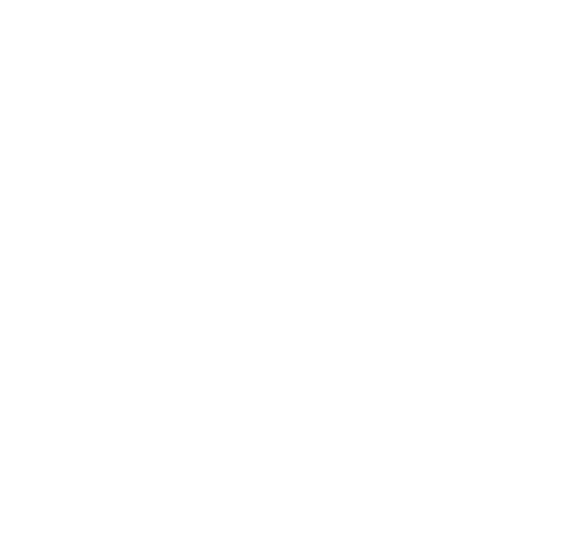

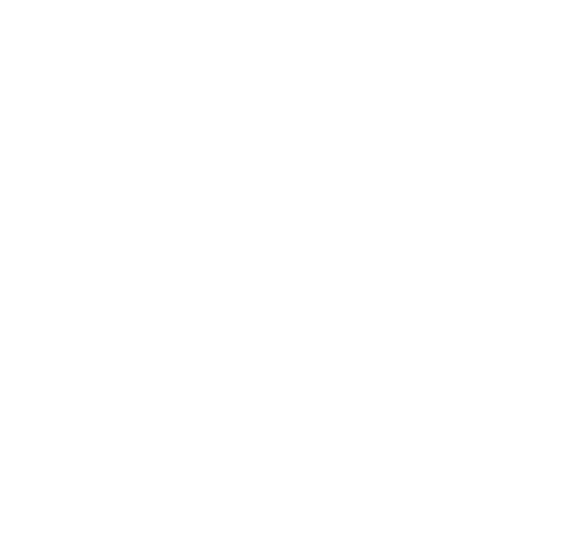

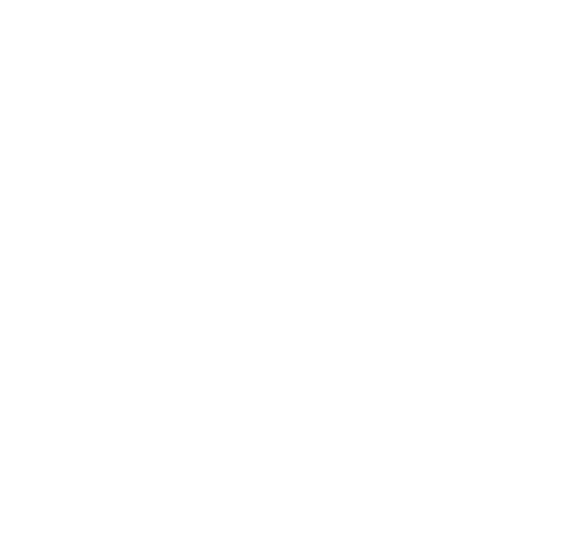

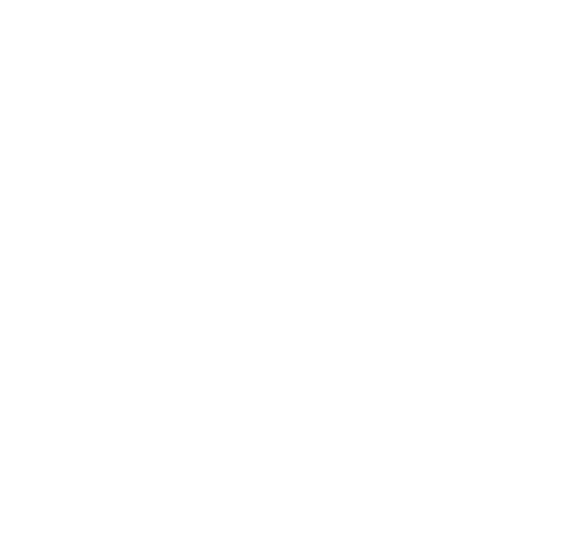

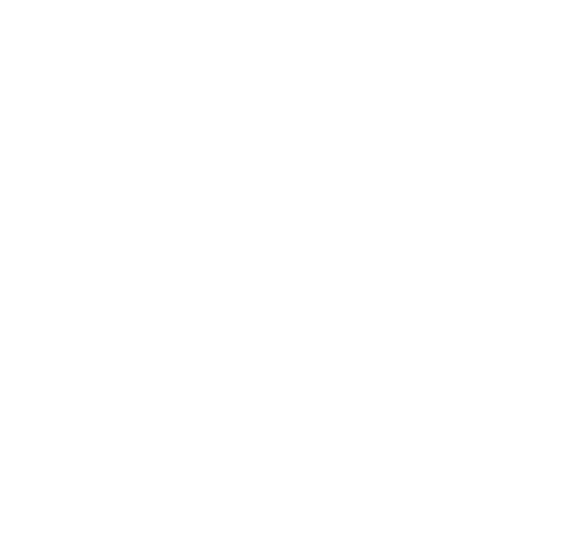

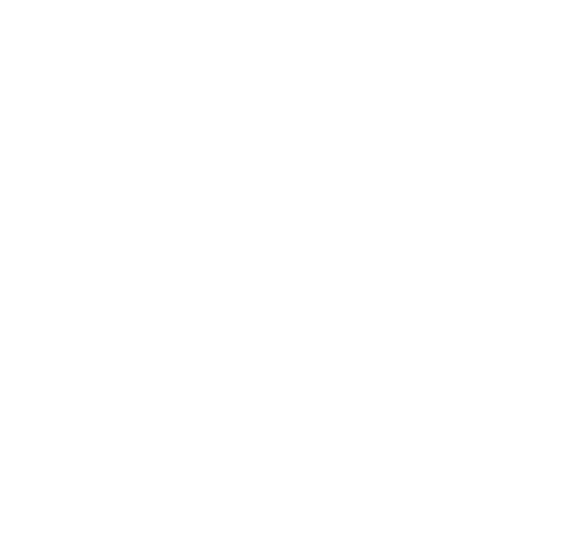

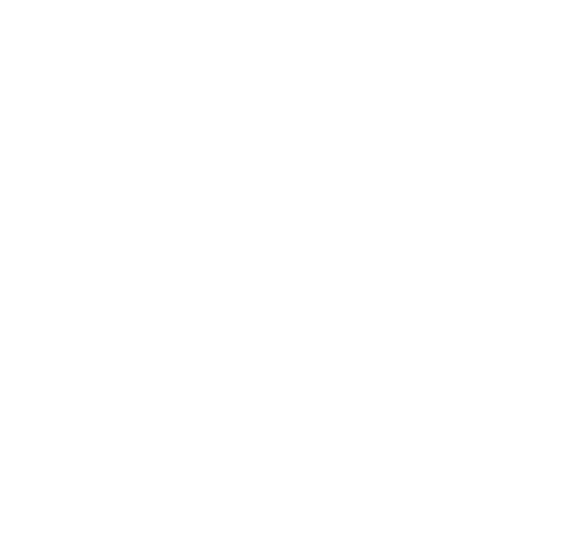

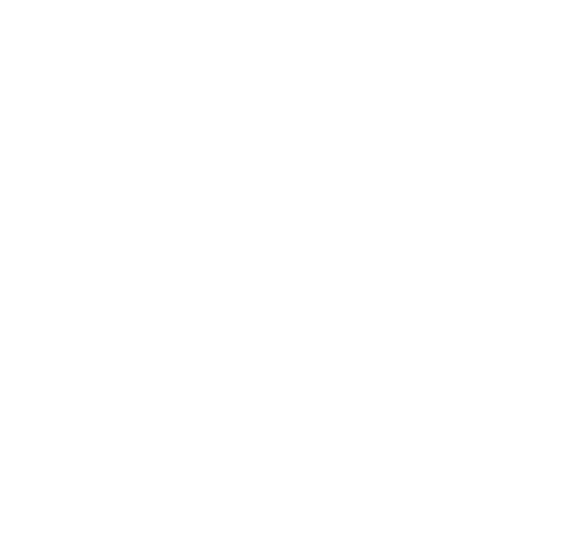

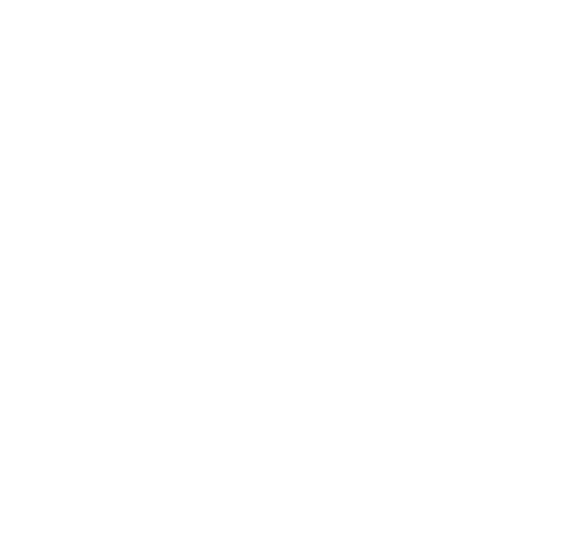

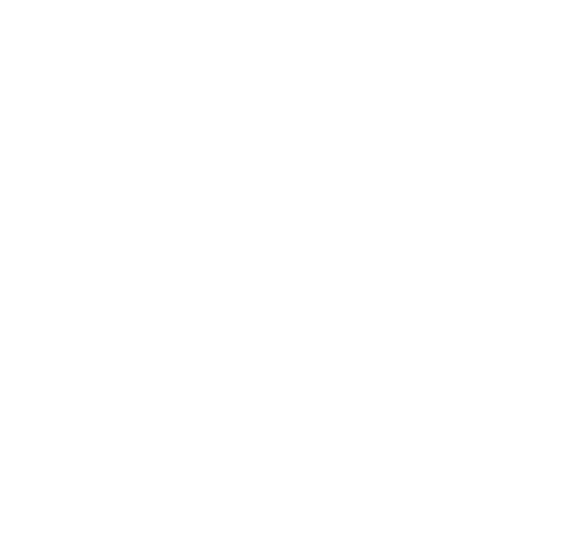

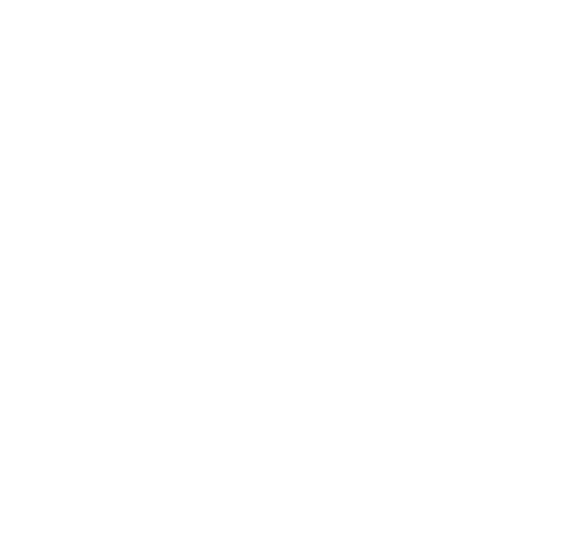

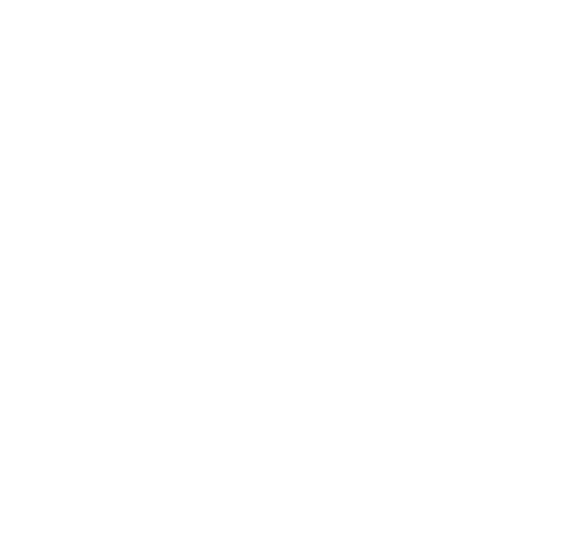

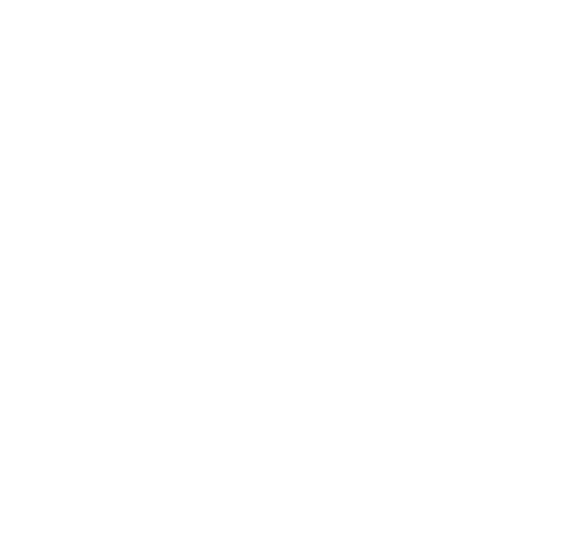

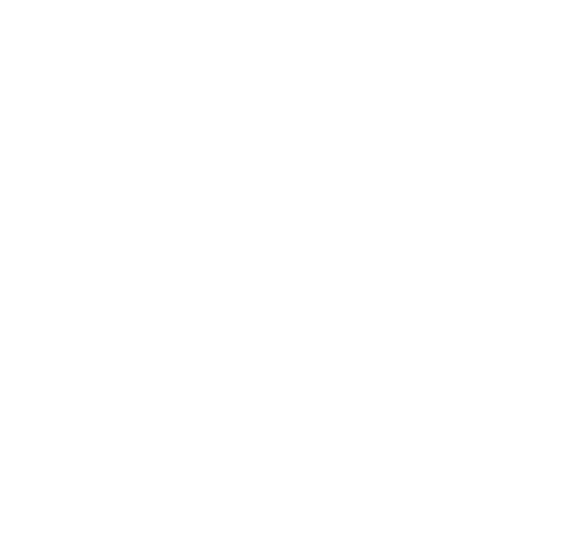

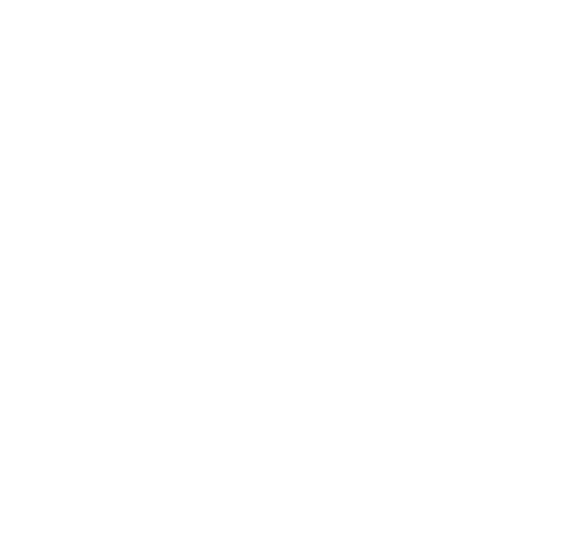

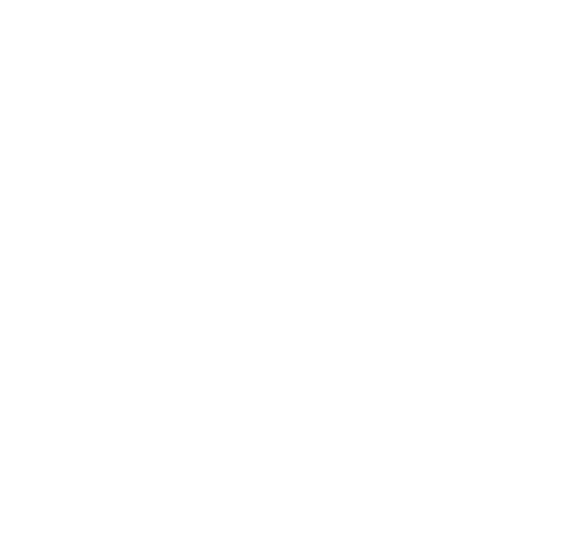

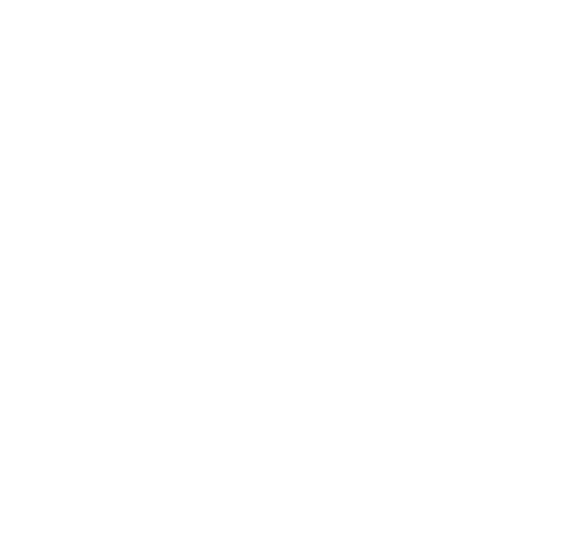

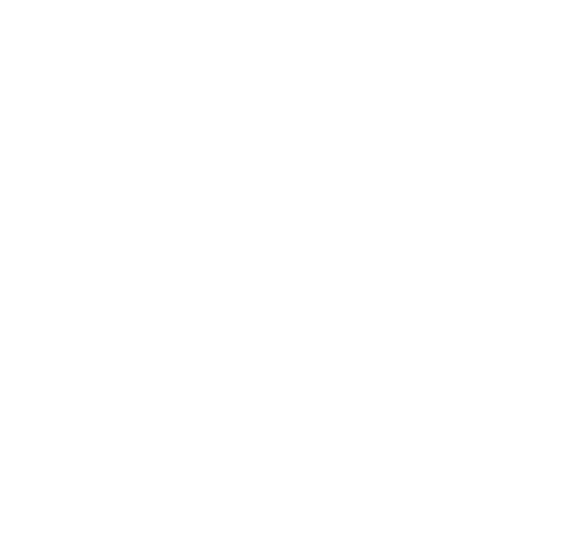

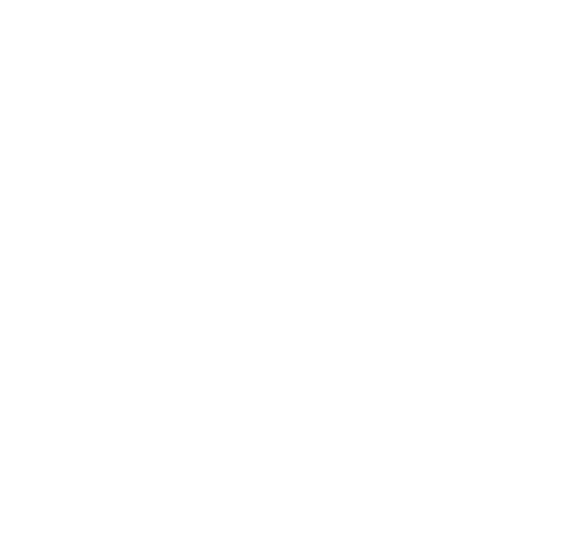

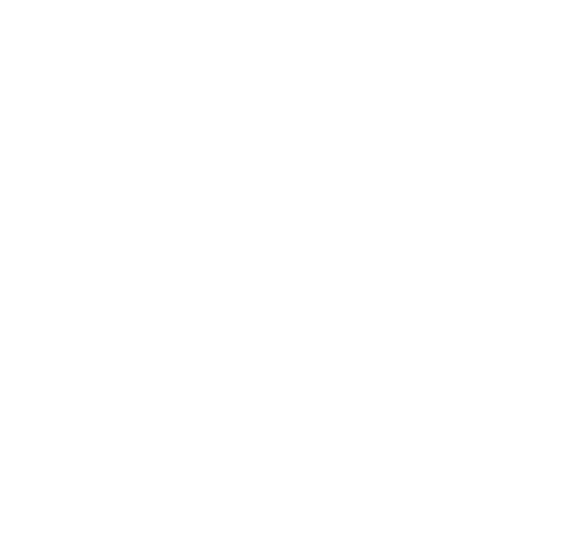

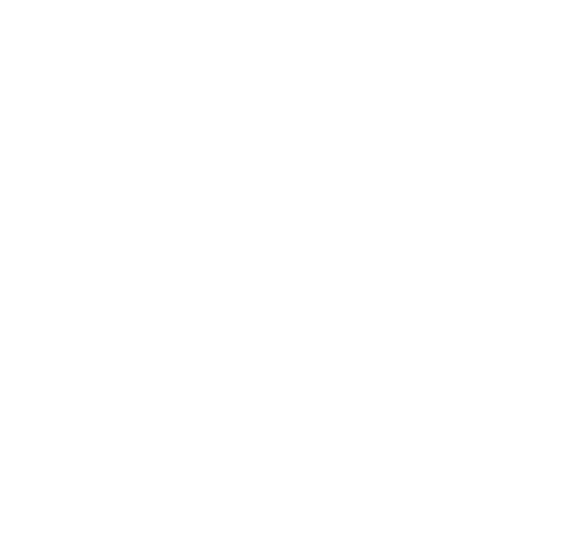

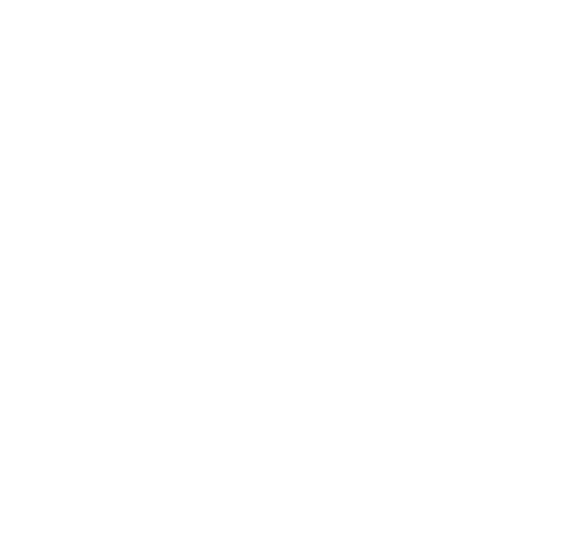

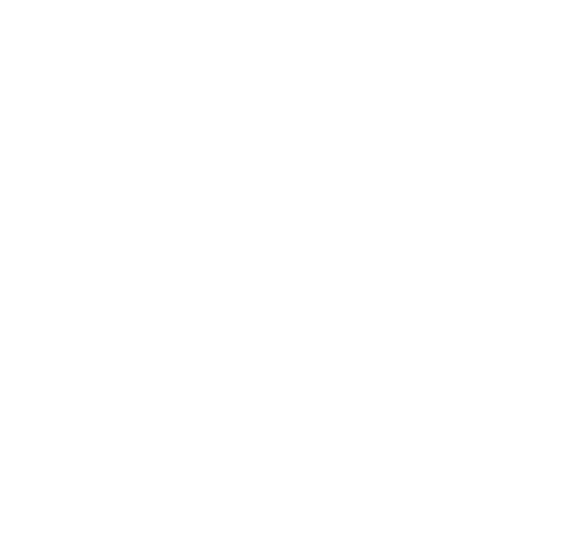

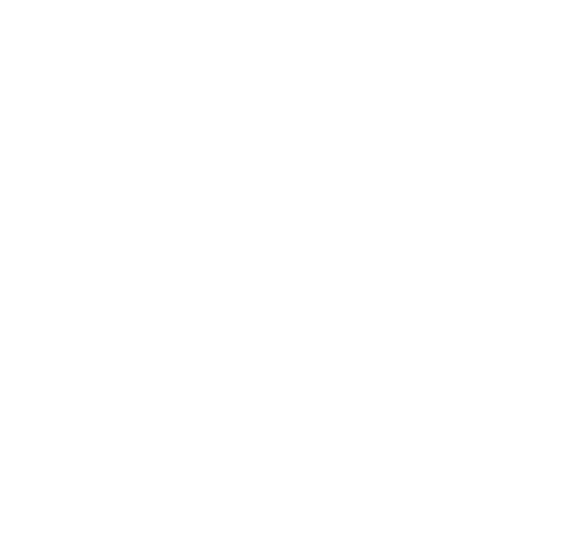

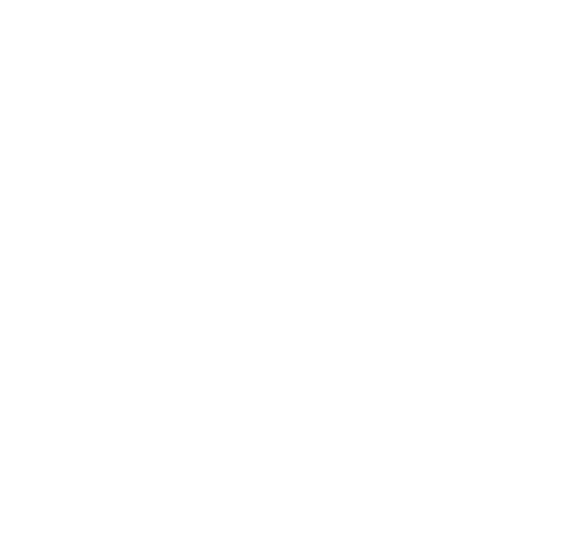

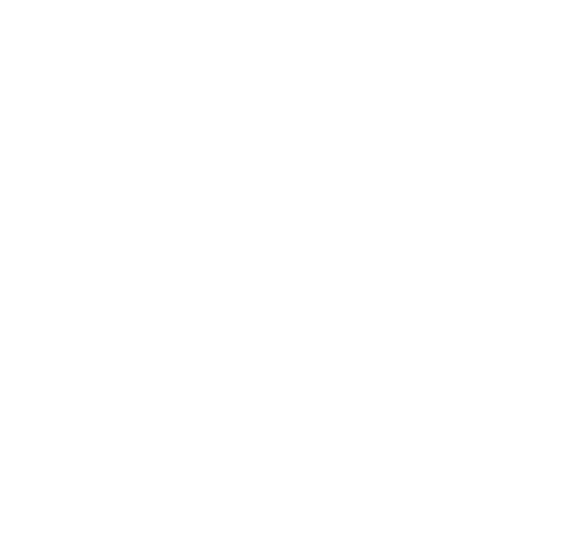

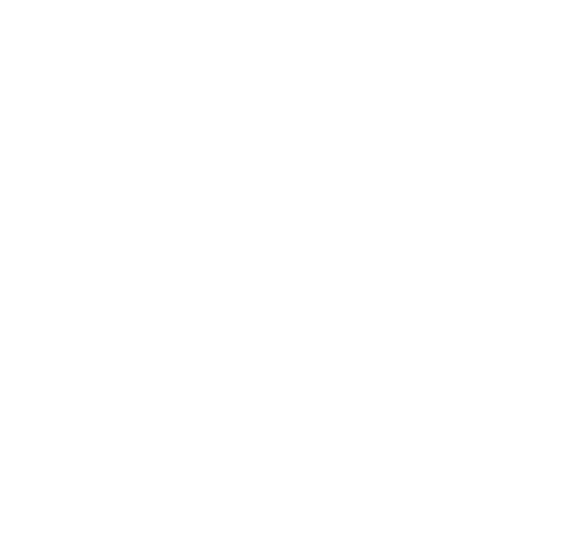

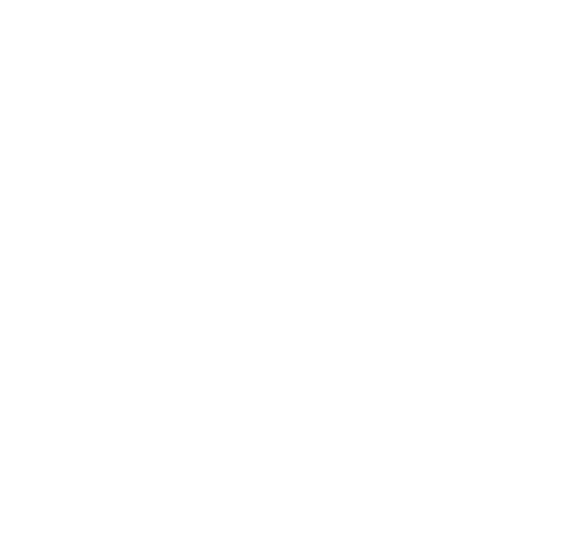

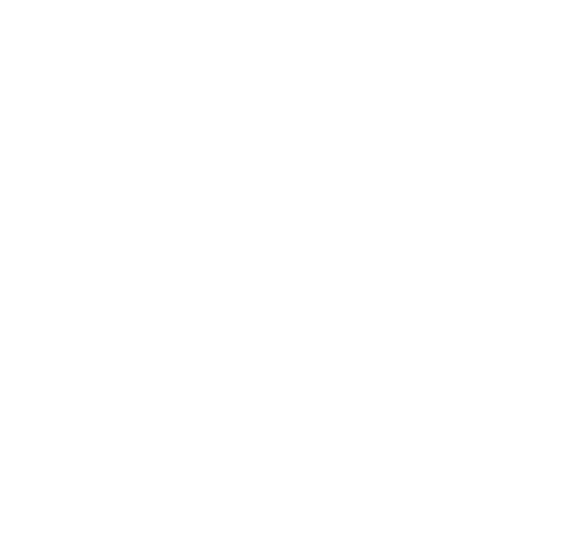

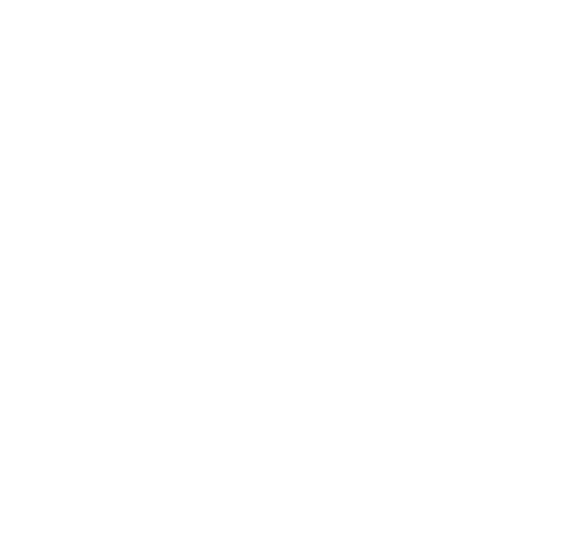

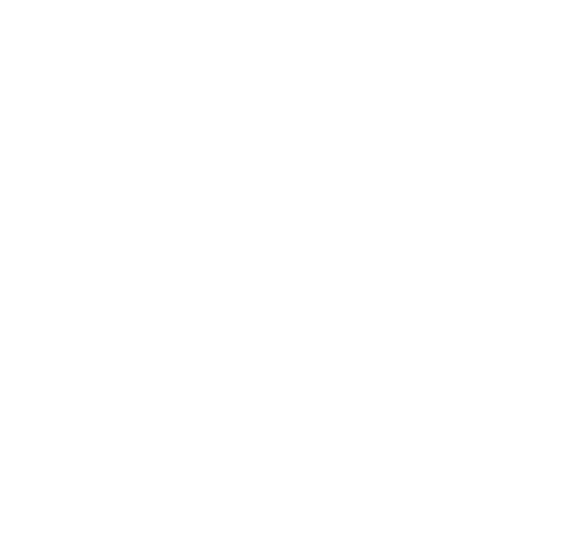

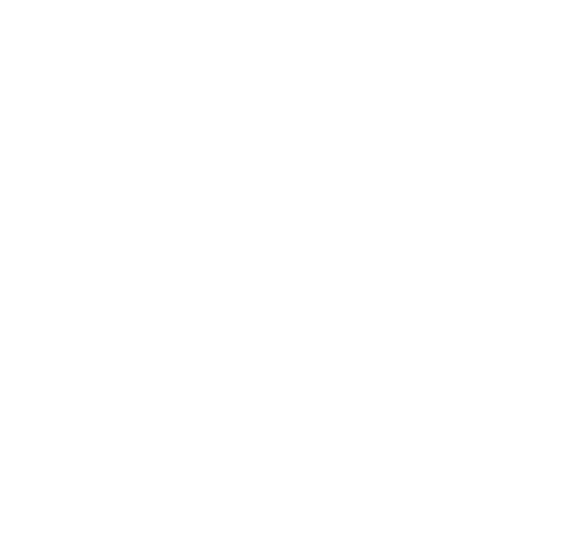

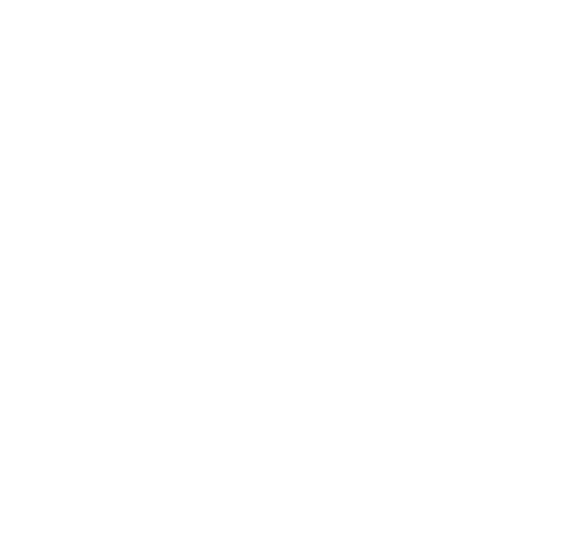

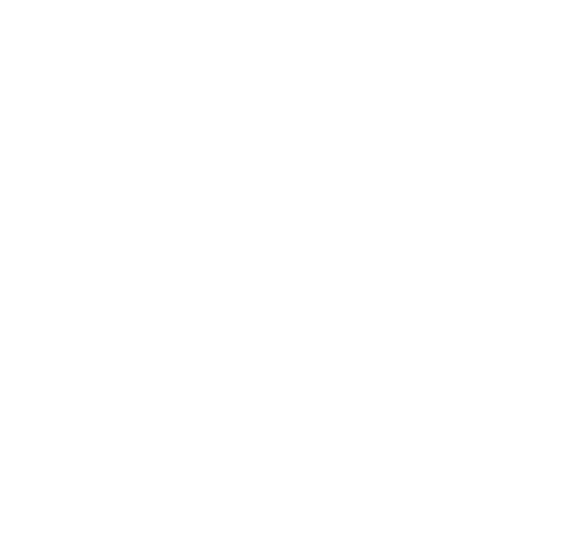

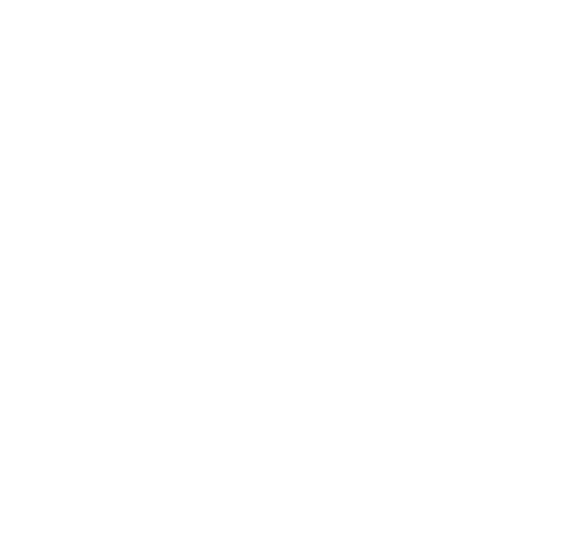

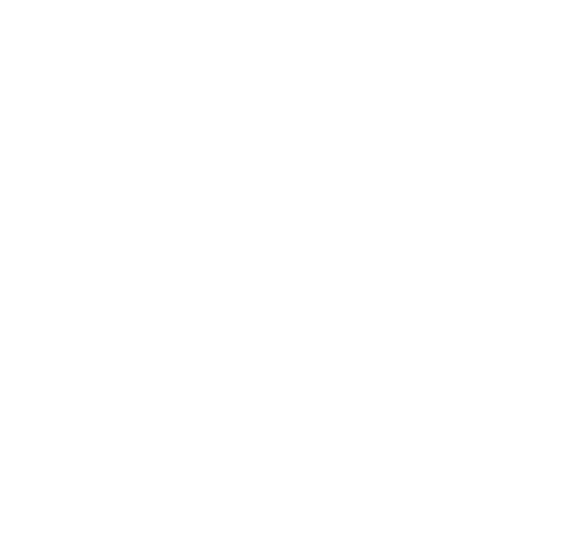

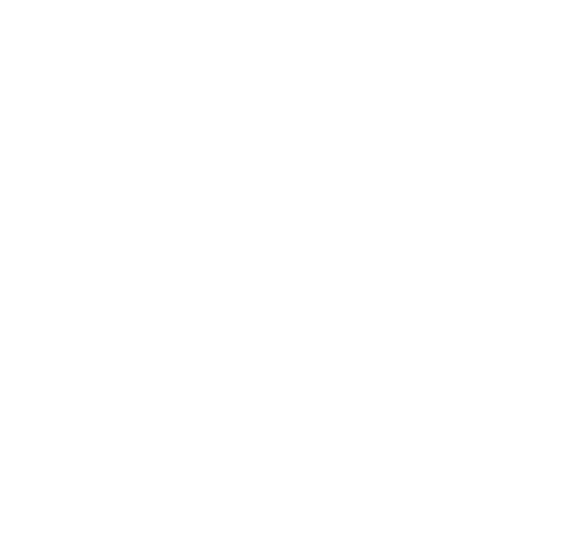

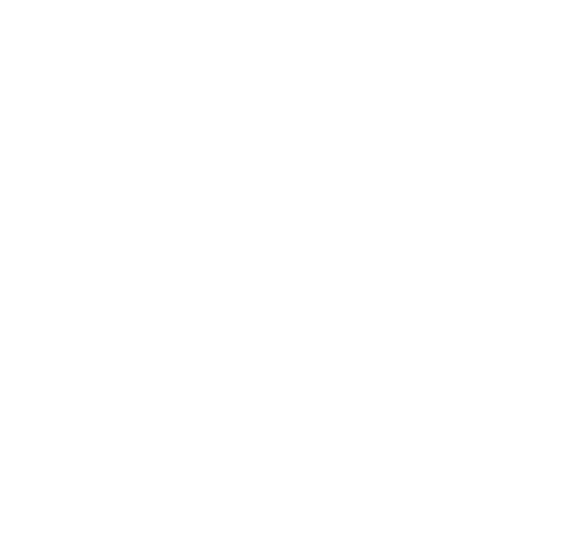

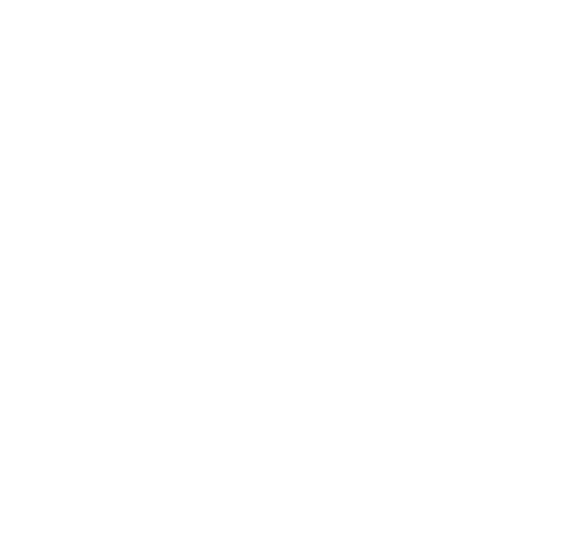

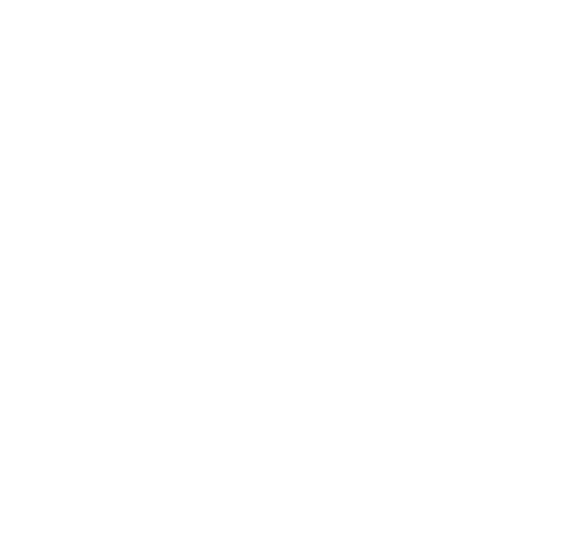

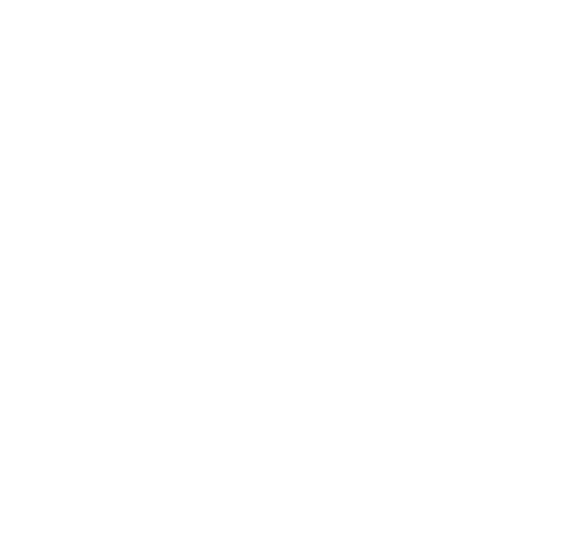

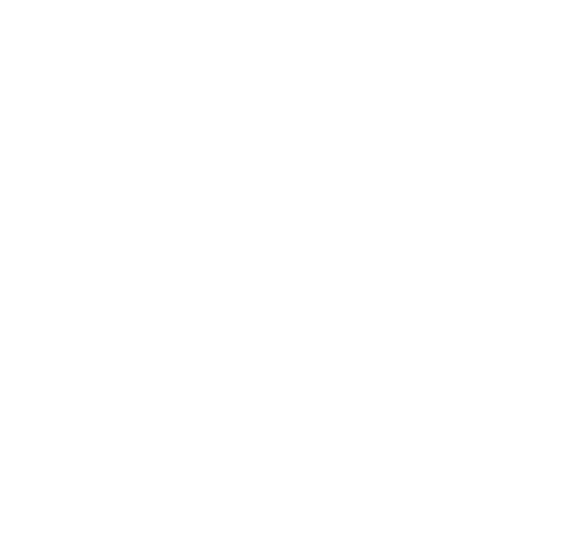

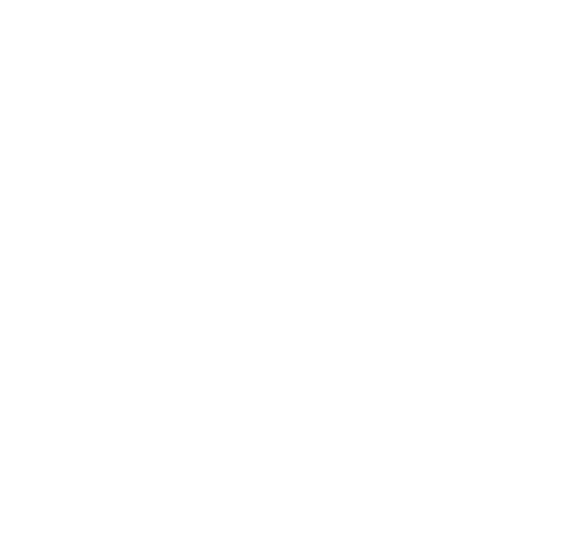

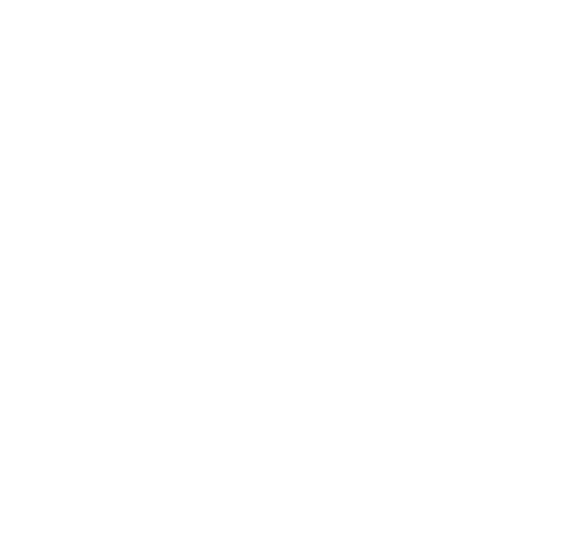

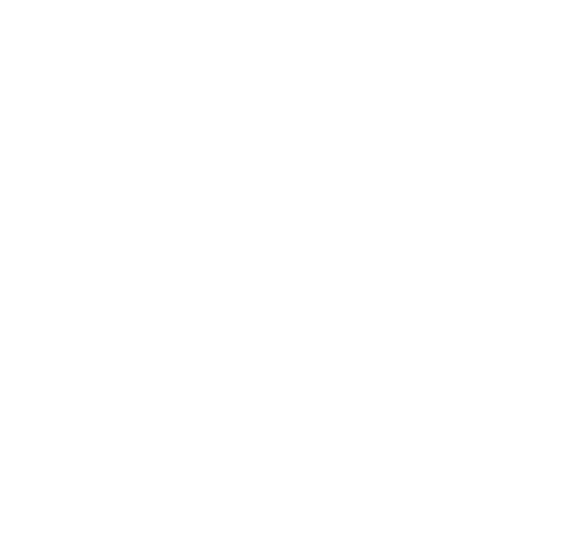

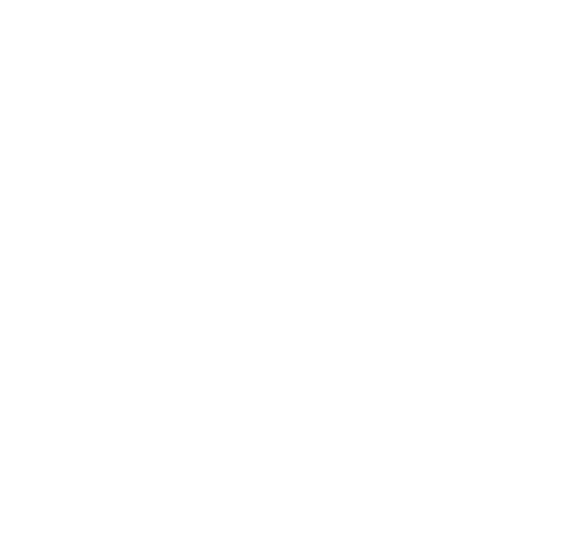

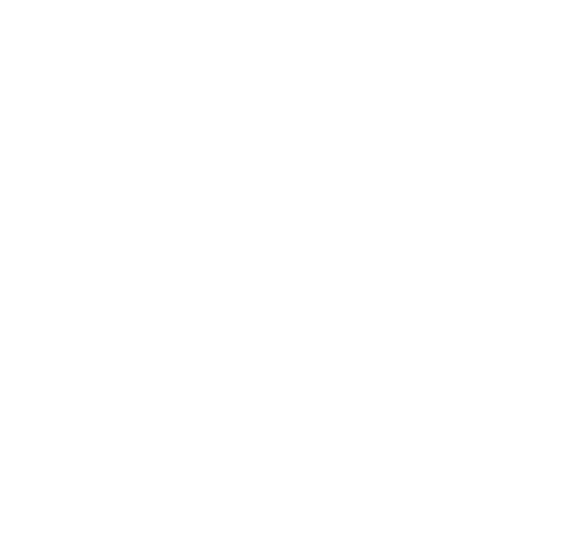

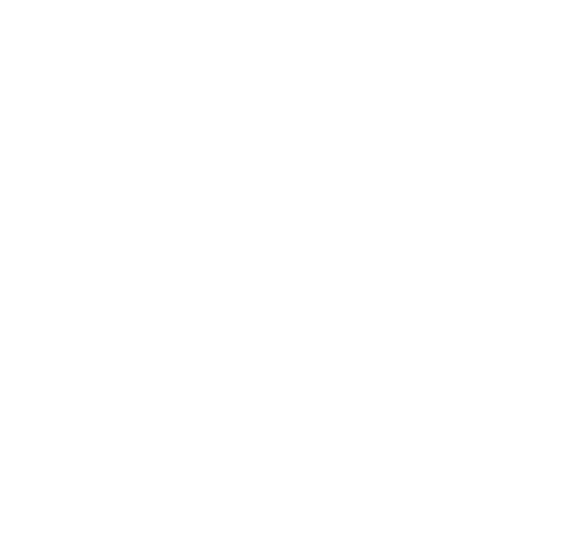

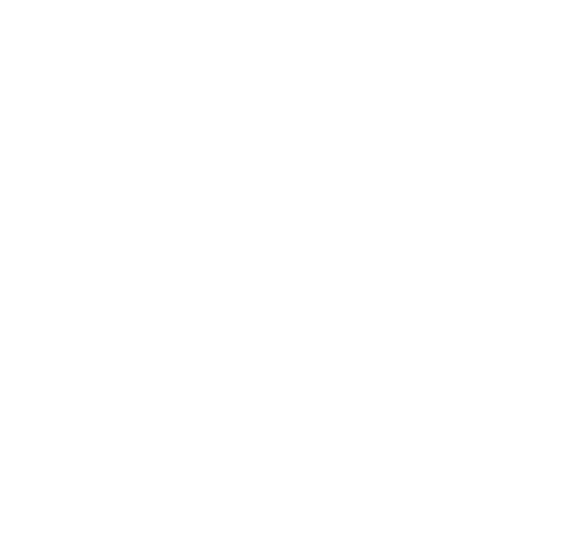

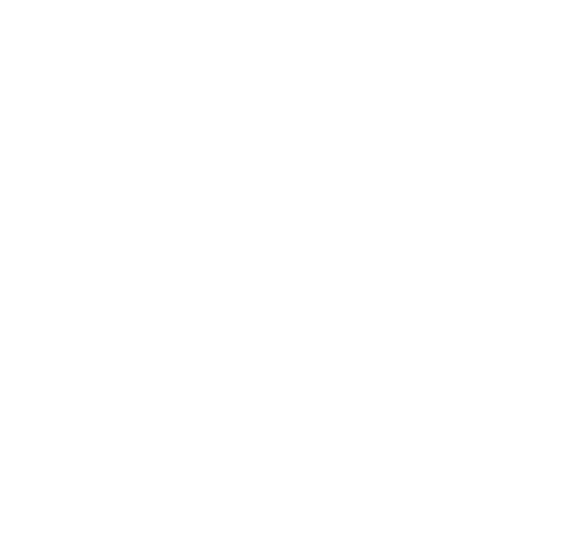

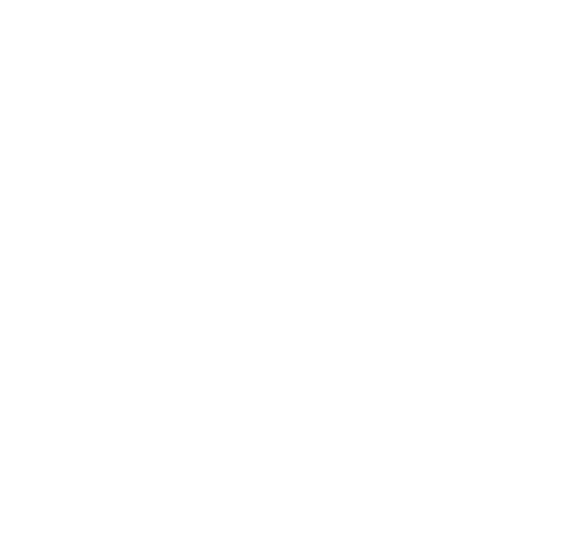

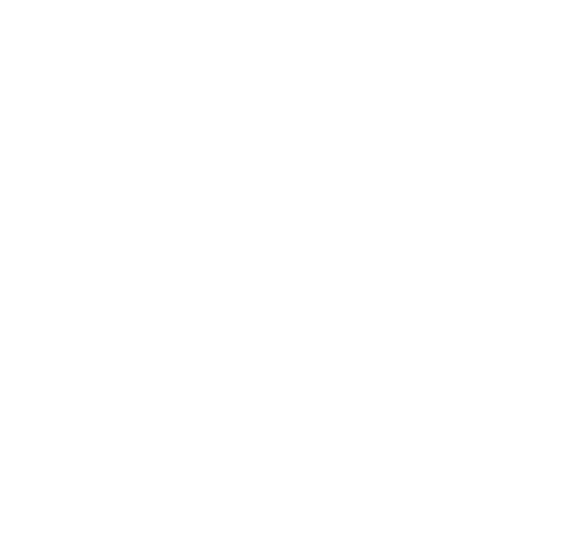

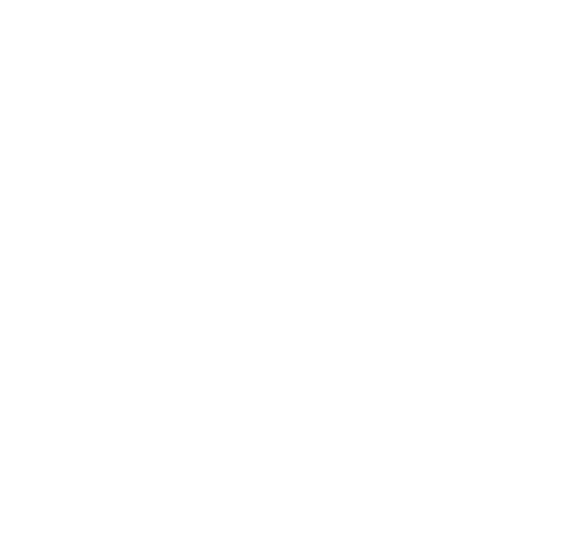

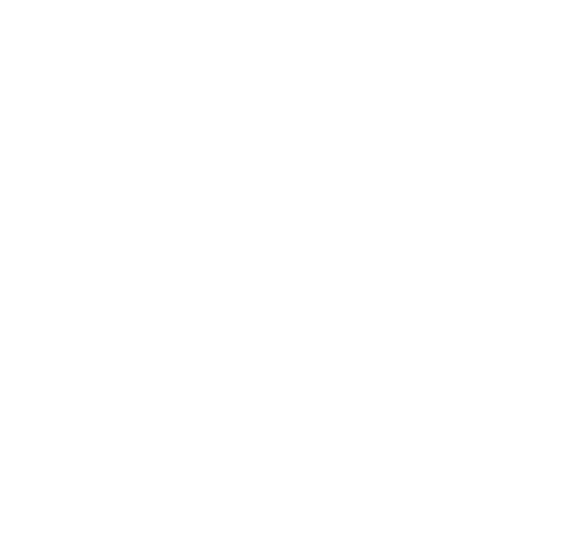

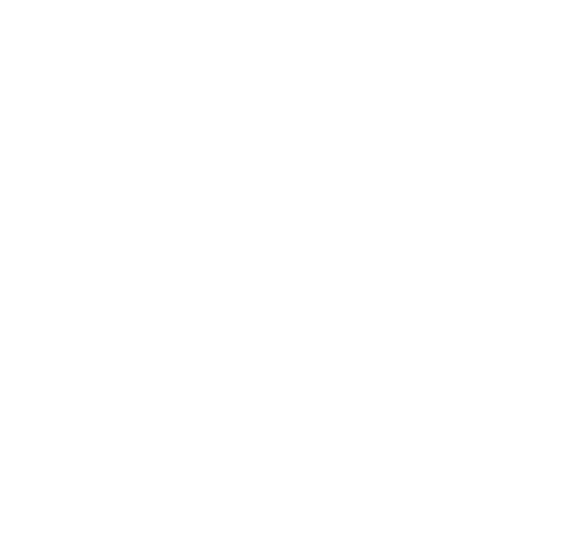

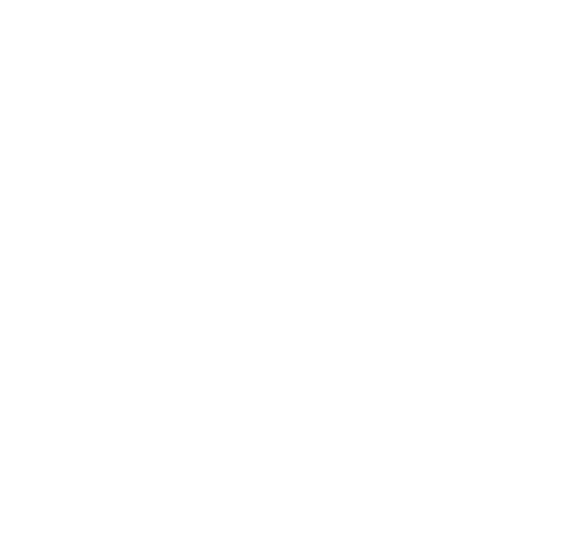

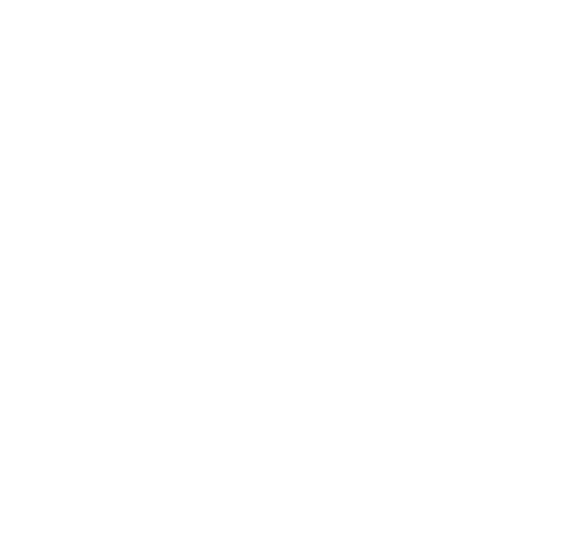

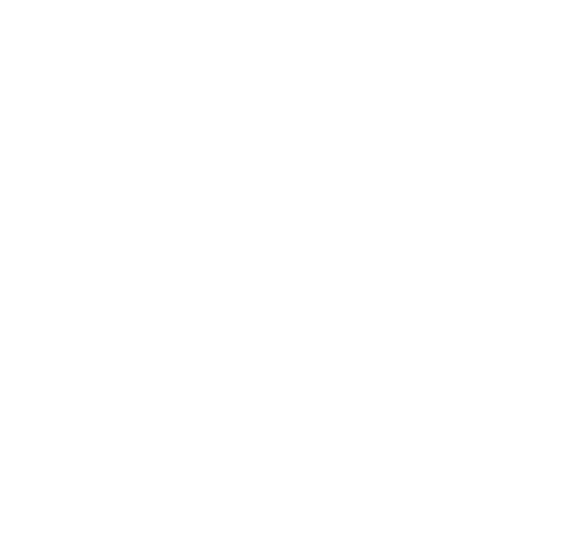

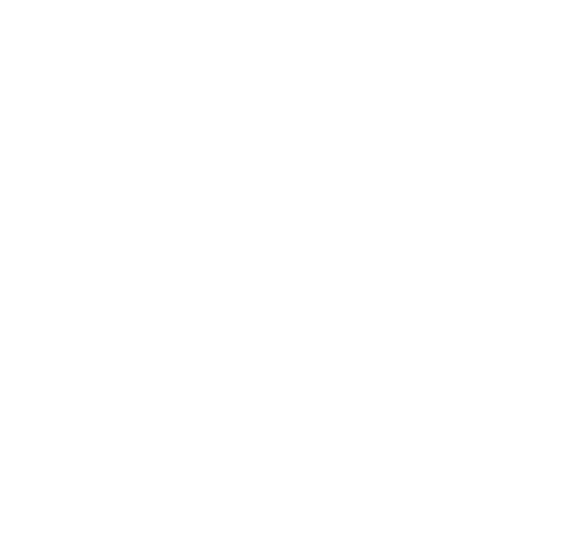

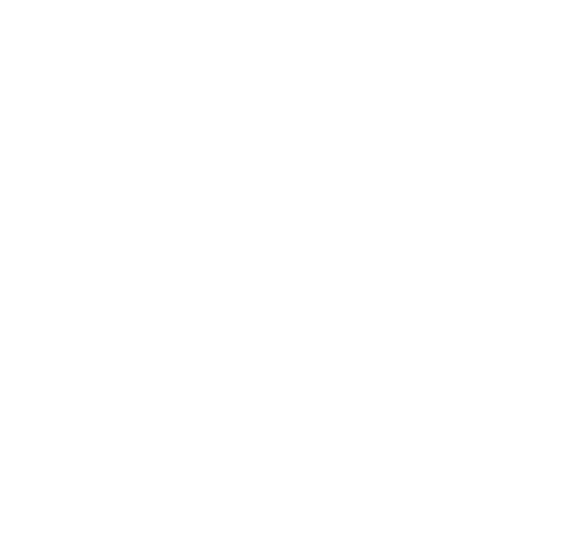

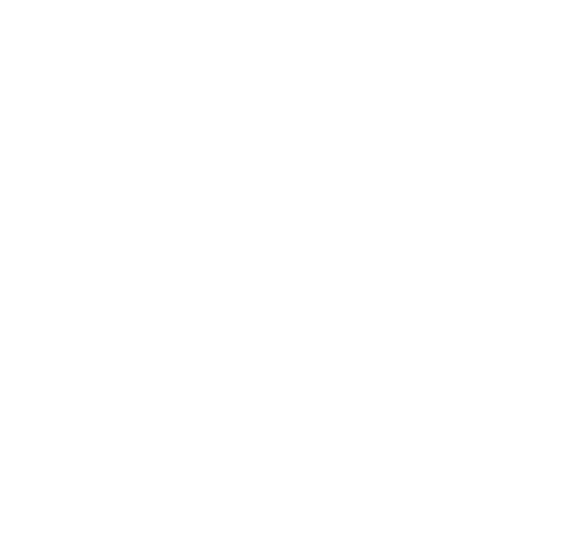

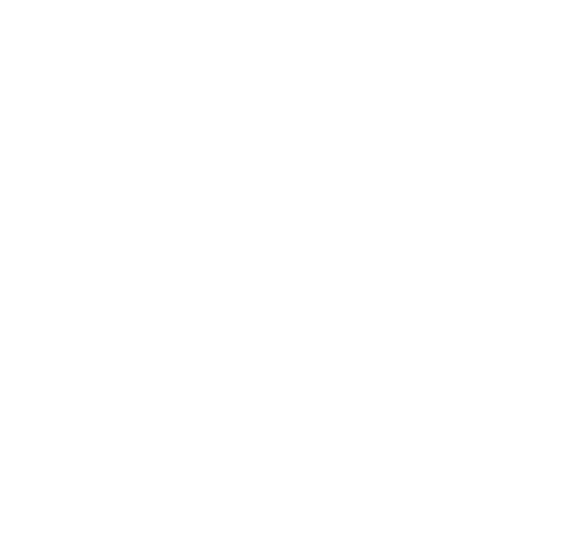

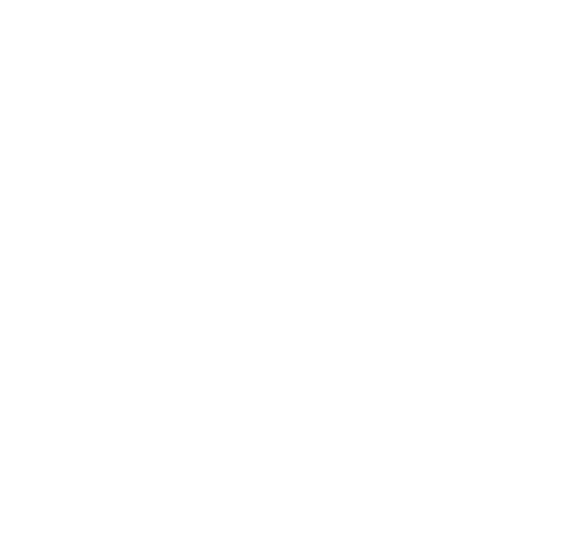

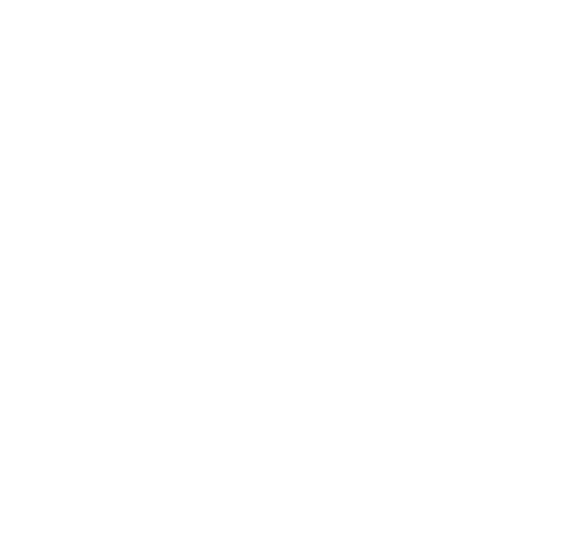

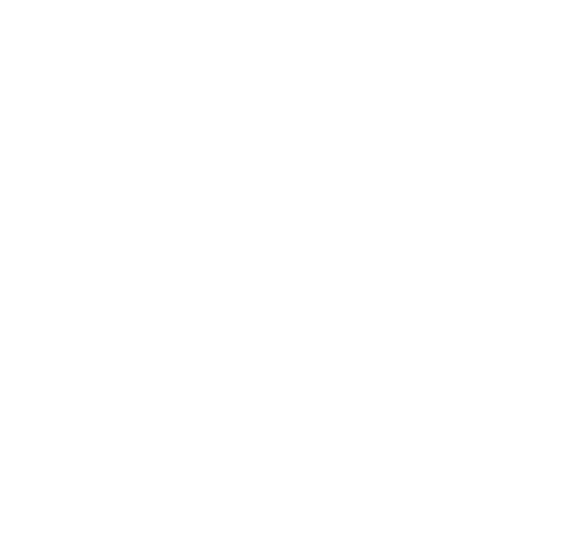

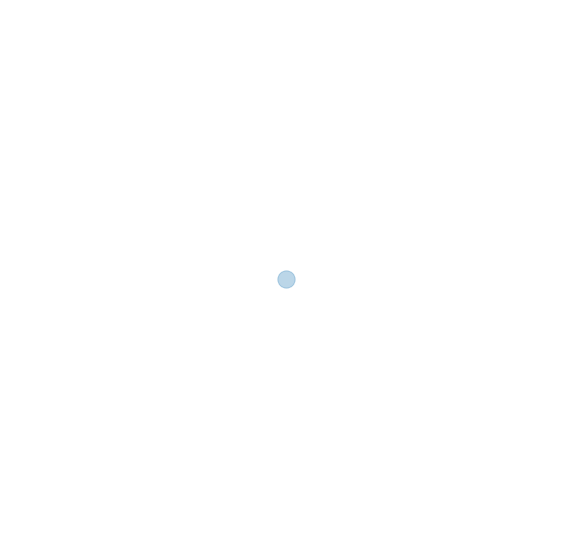

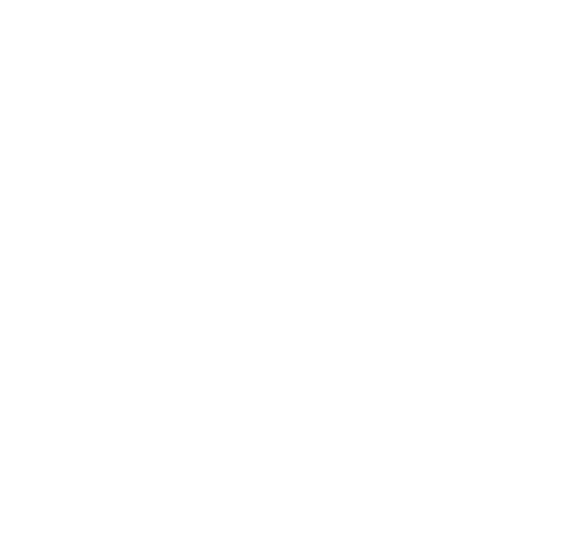

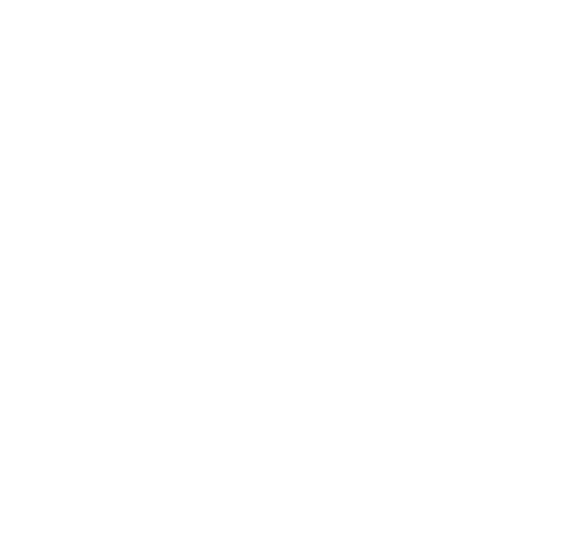

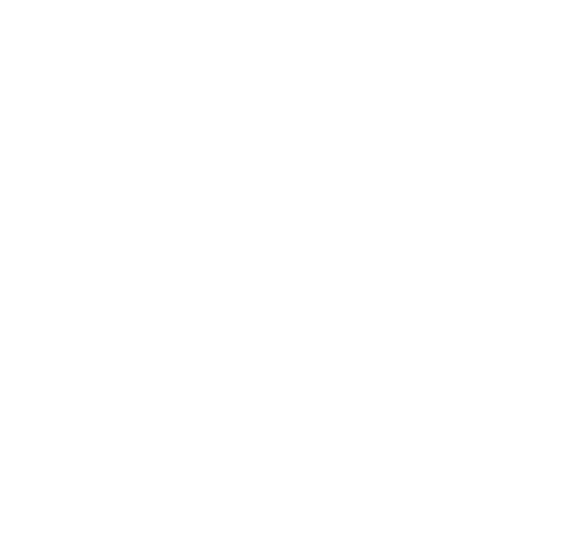

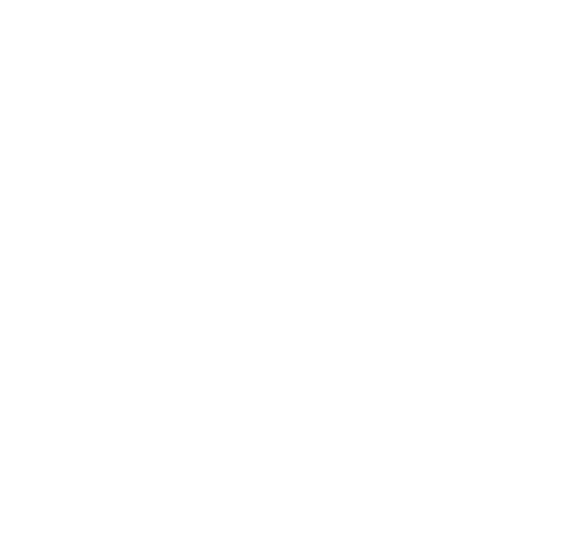

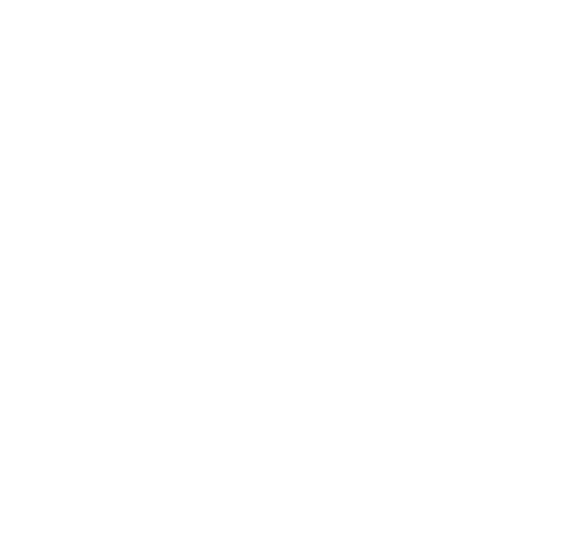

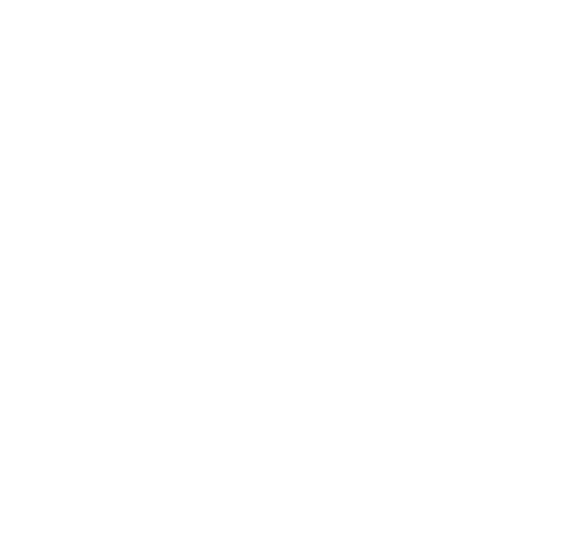

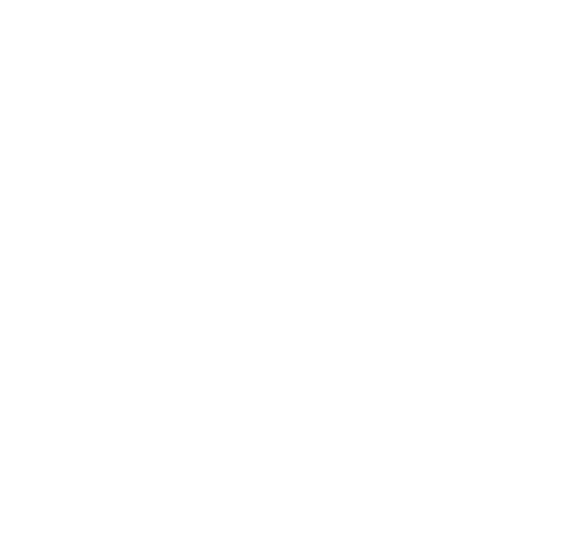

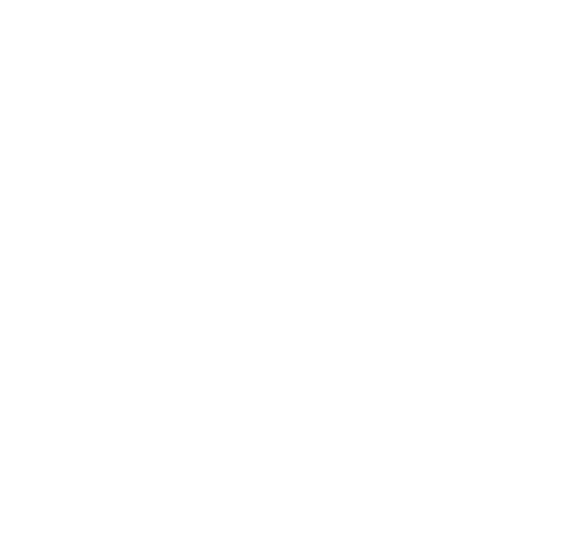

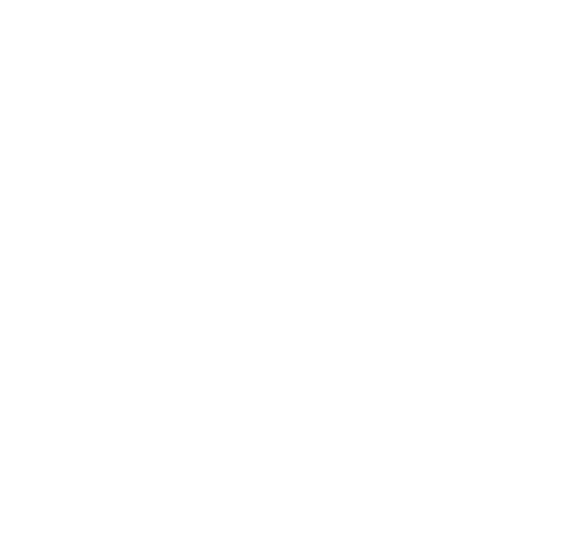

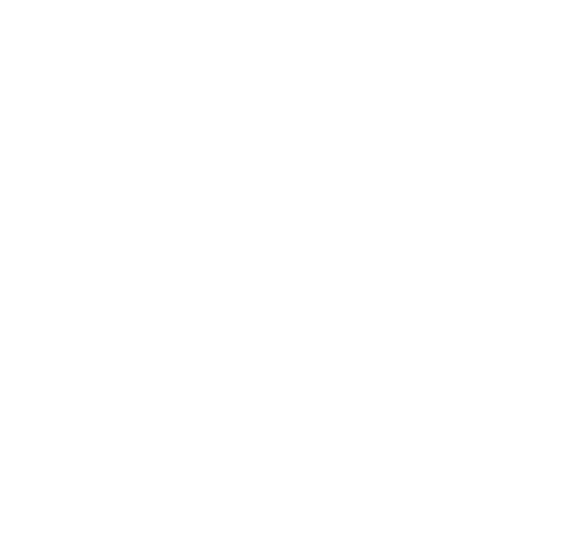

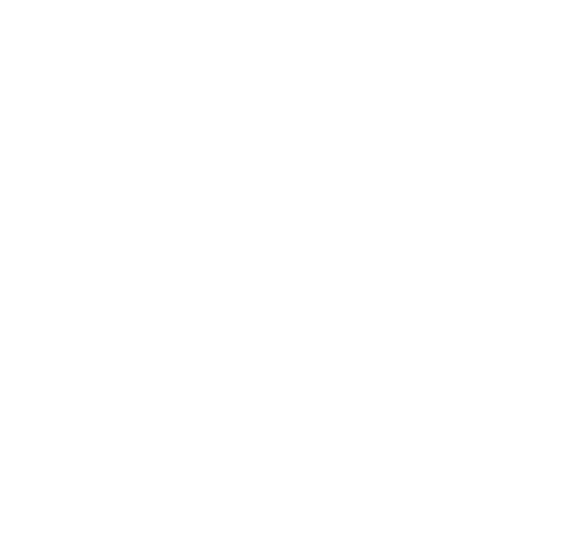

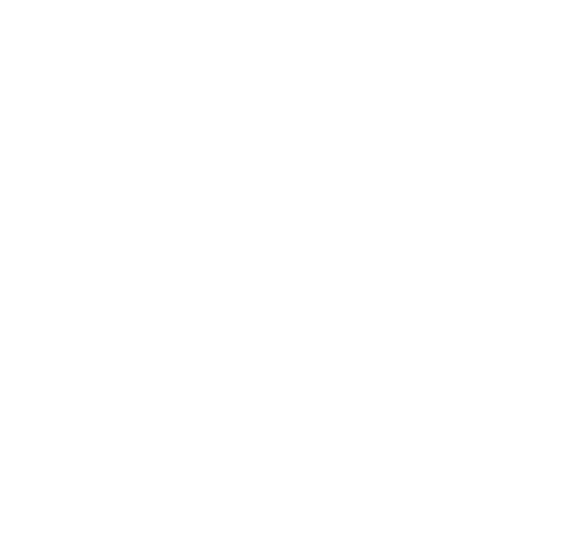

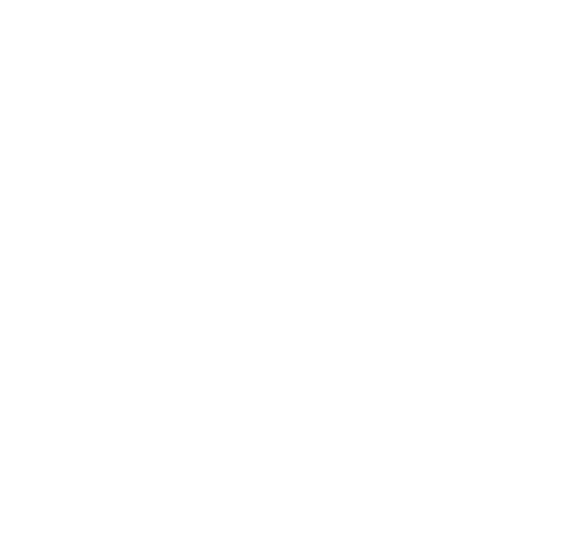

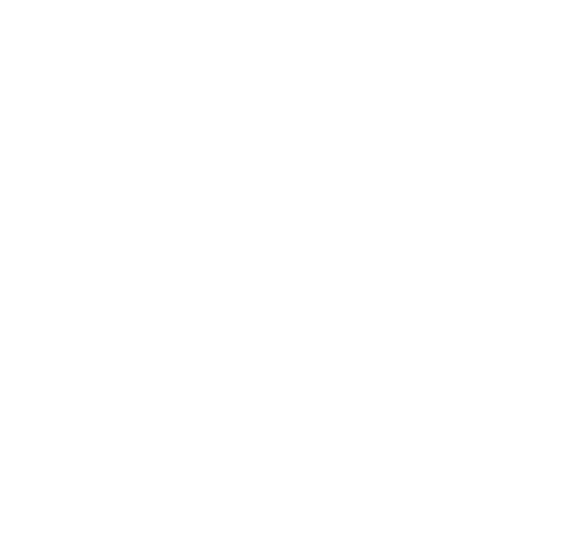

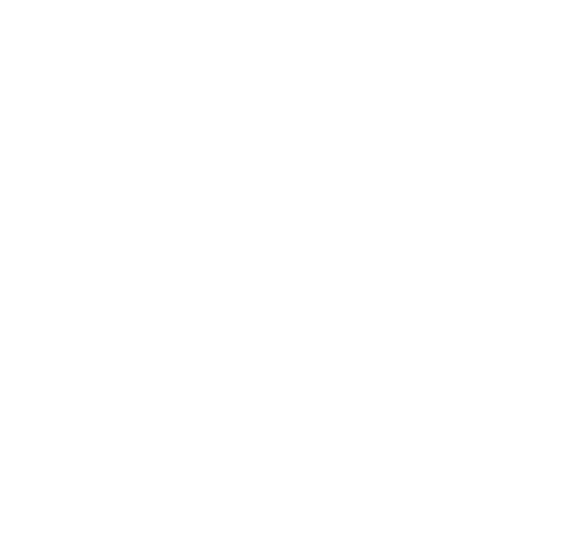

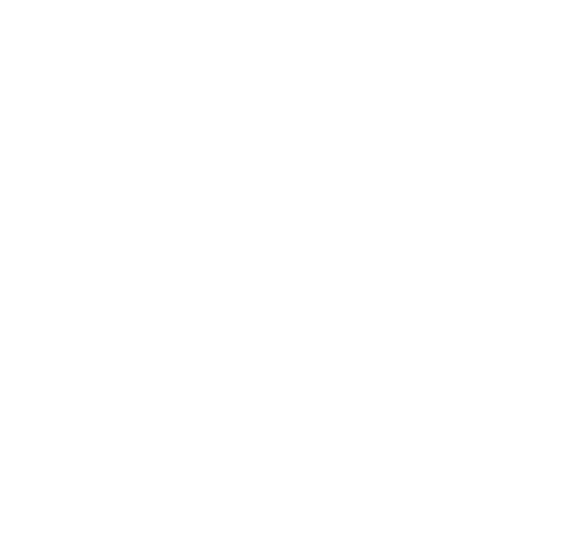

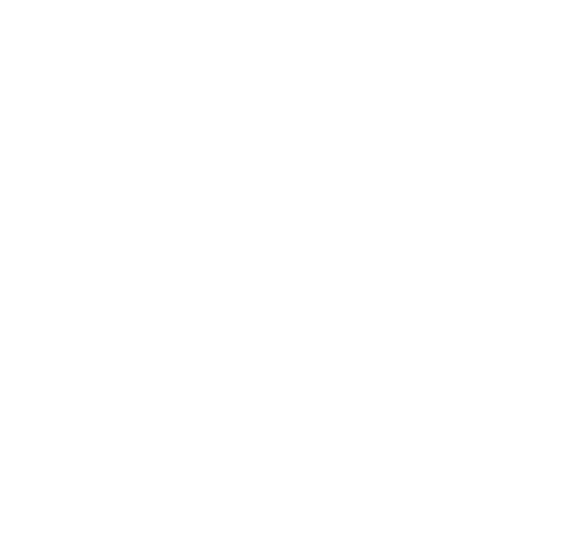

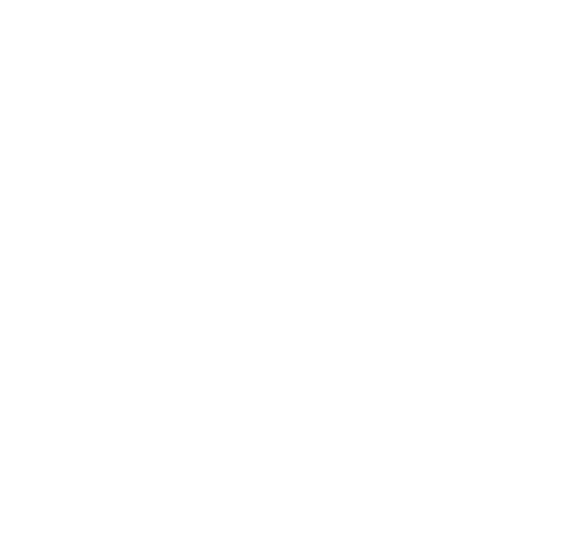

In [12]:

for node in subgraph:
    draw_network(graph.subgraph(node), label_thresh=5, draw_thresh=0)

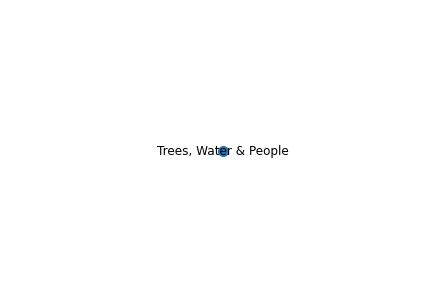

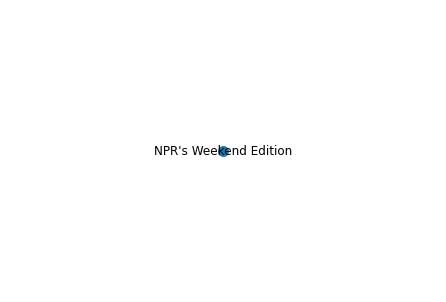

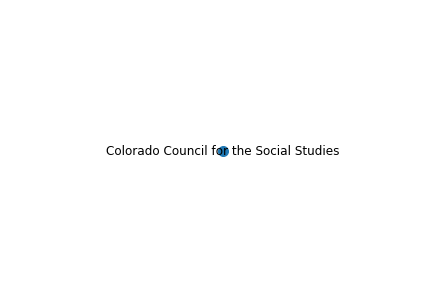

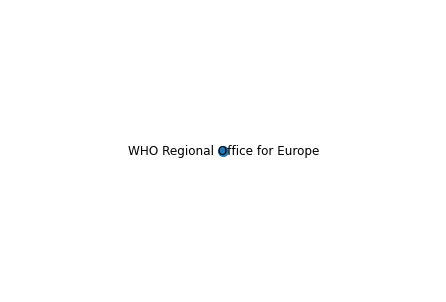

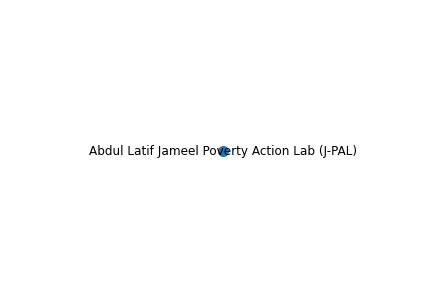

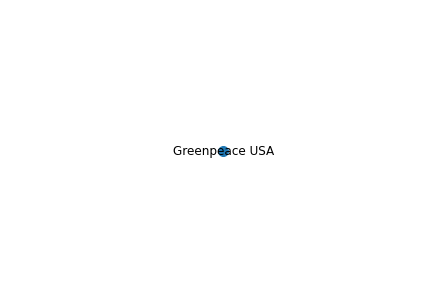

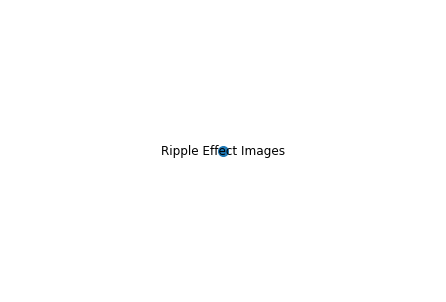

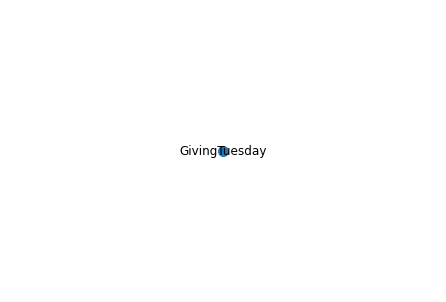

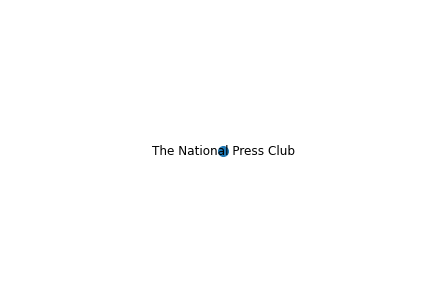

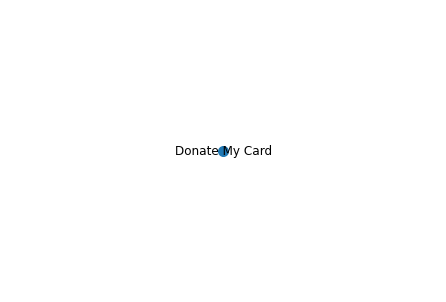

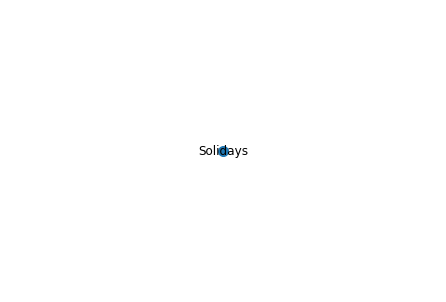

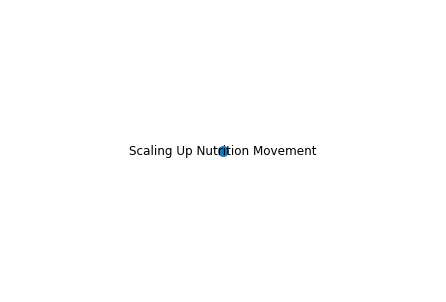

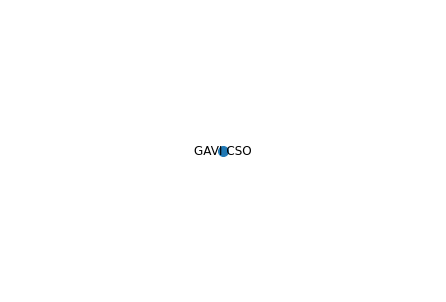

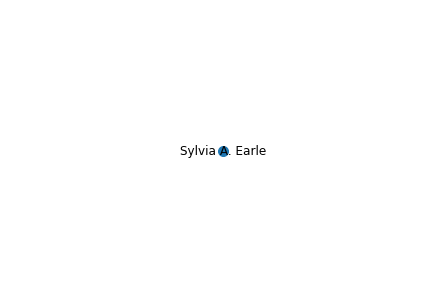

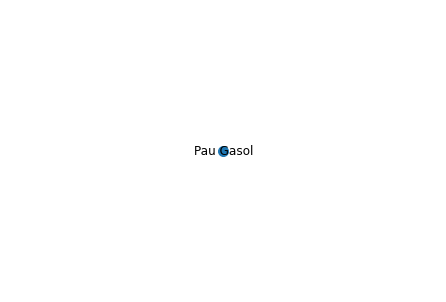

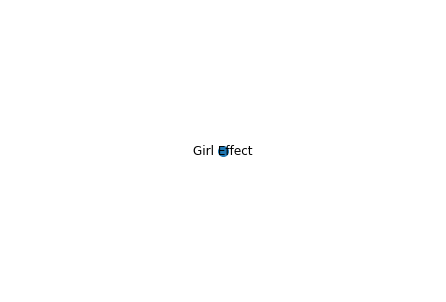

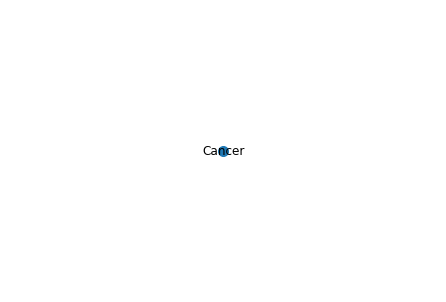

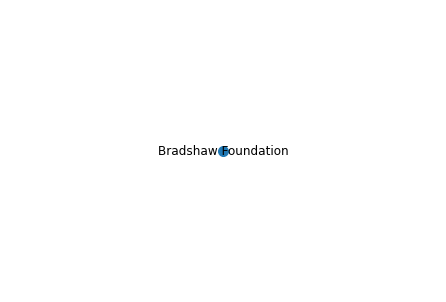

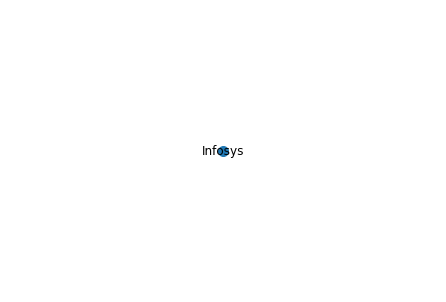

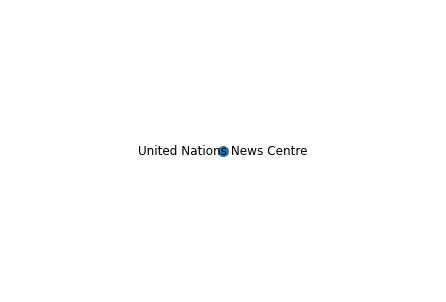

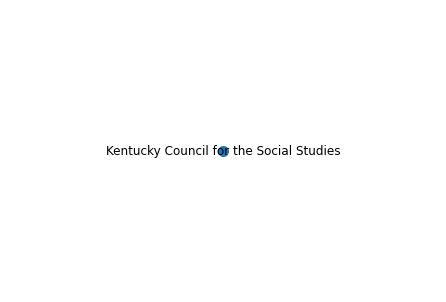

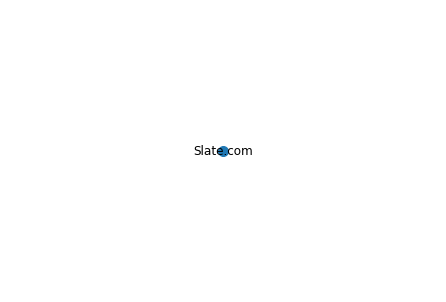

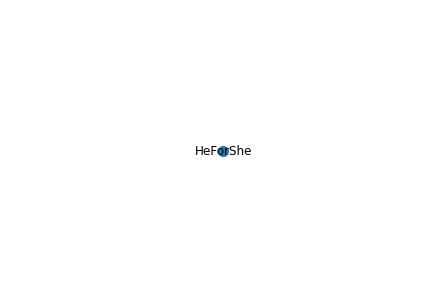

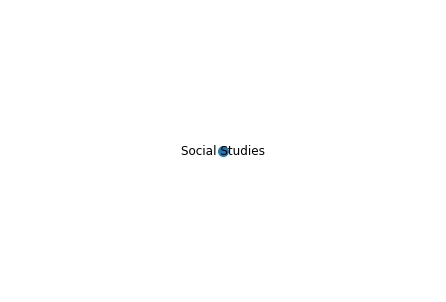

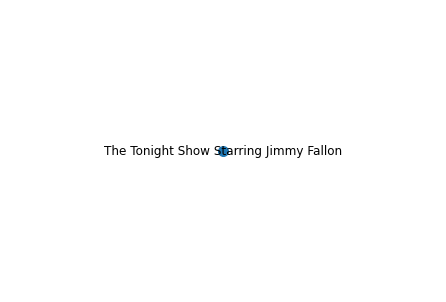

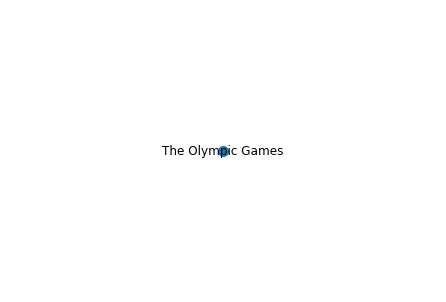

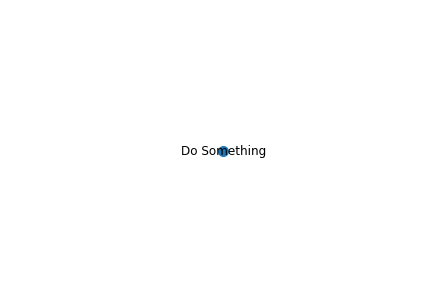

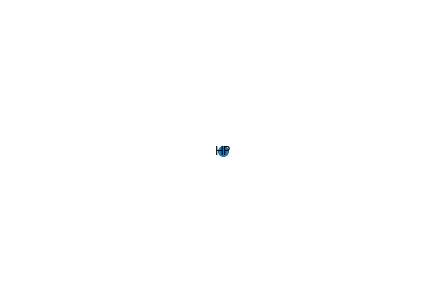

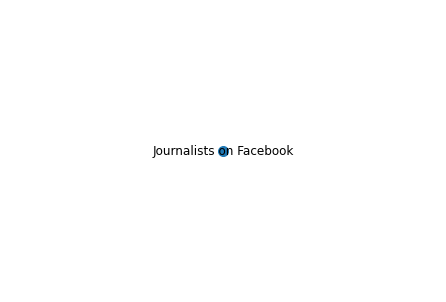

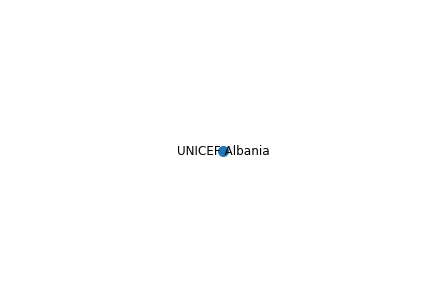

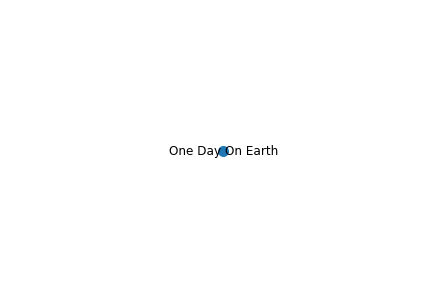

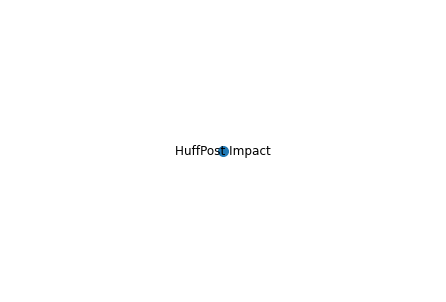

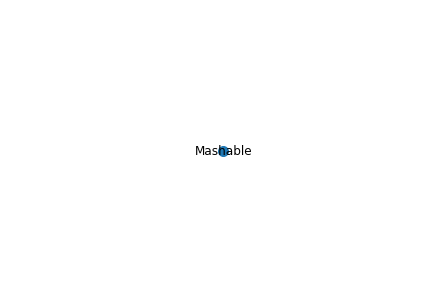

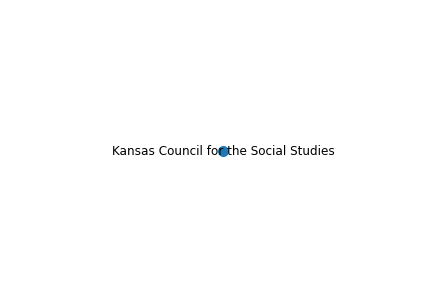

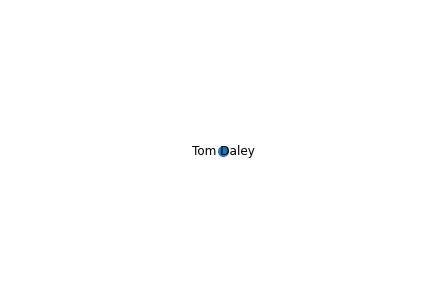

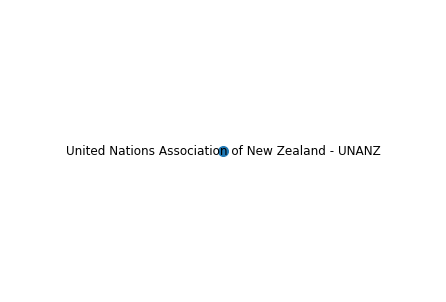

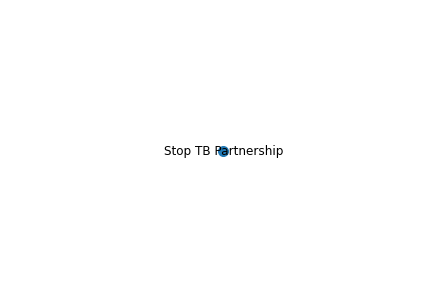

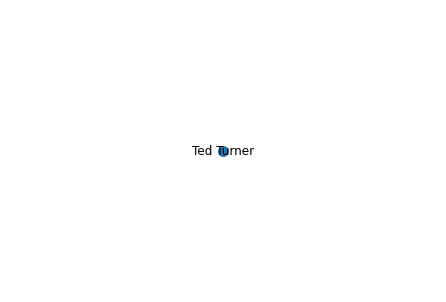

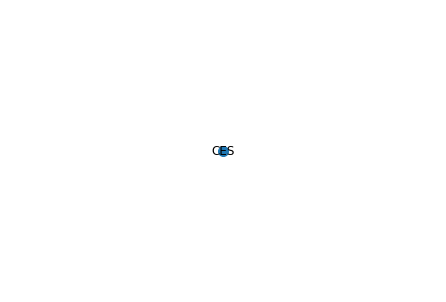

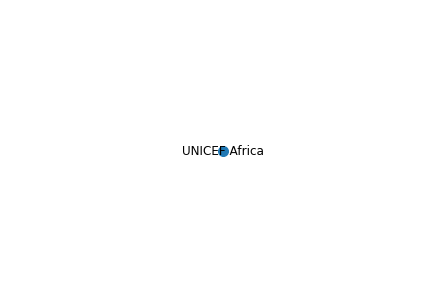

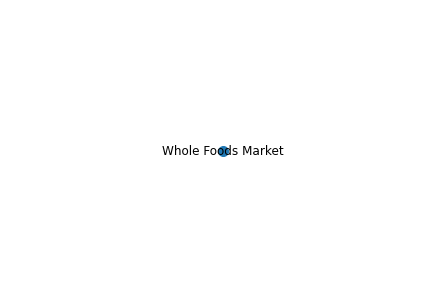

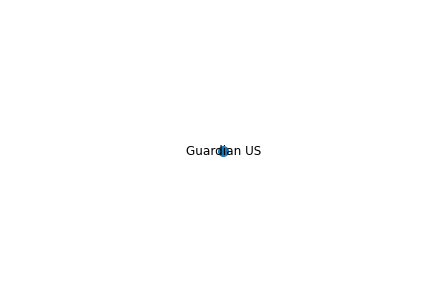

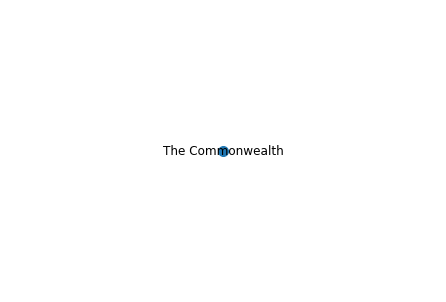

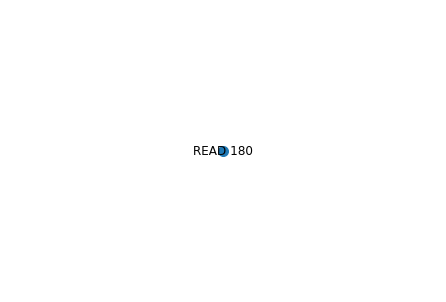

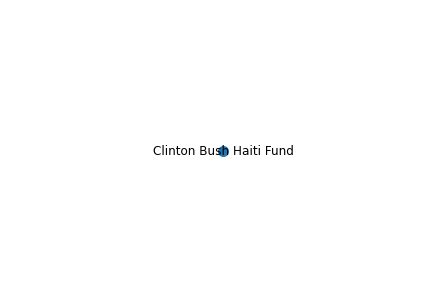

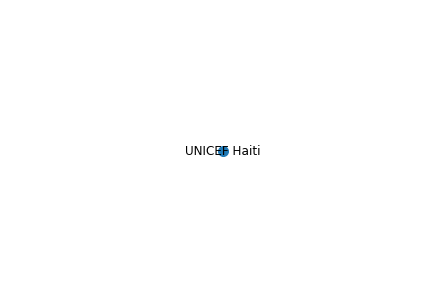

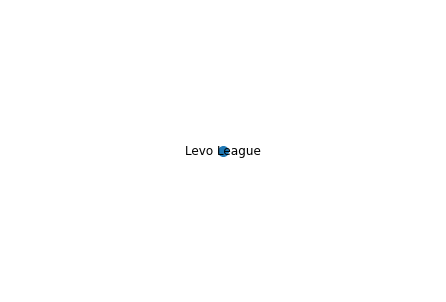

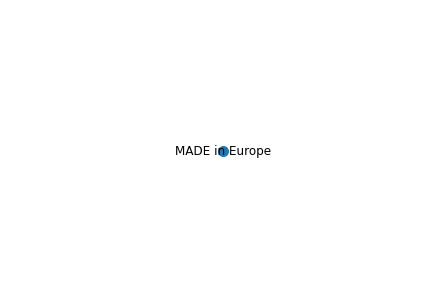

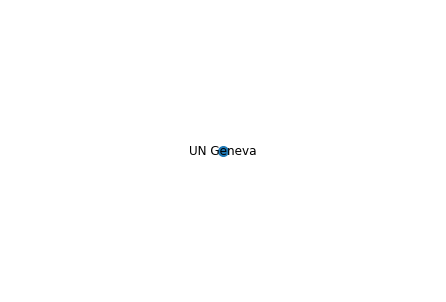

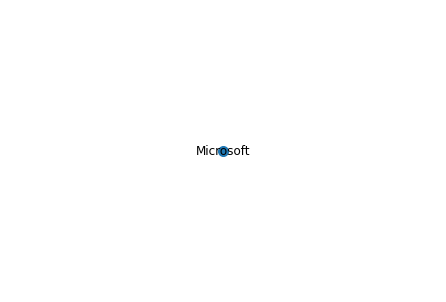

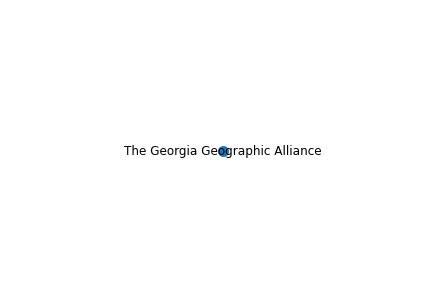

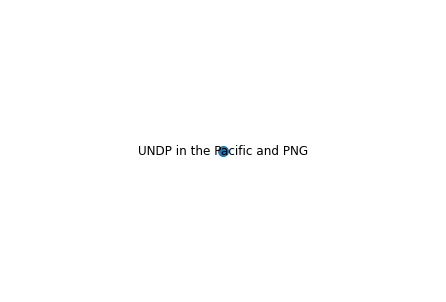

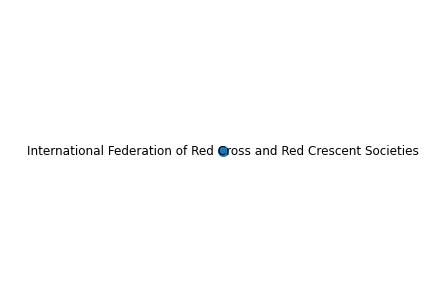

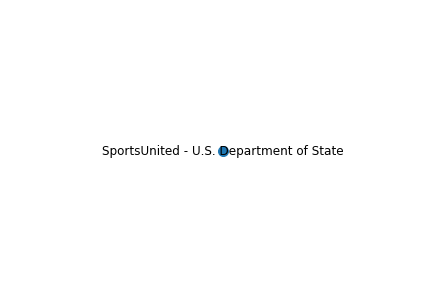

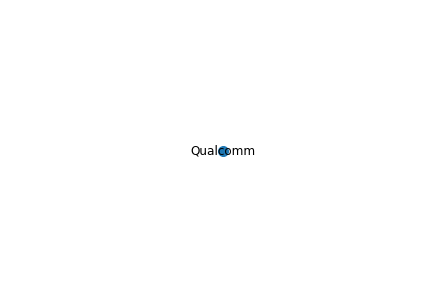

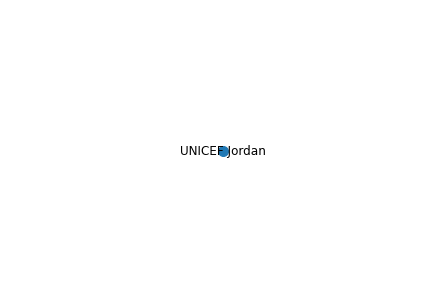

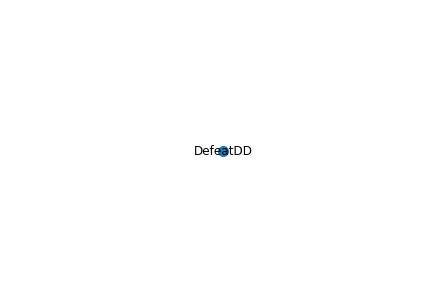

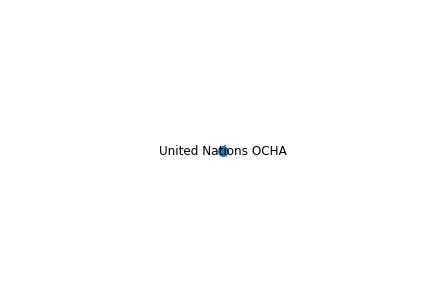

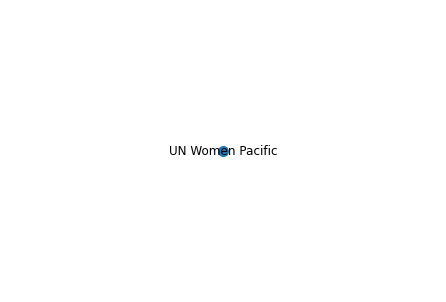

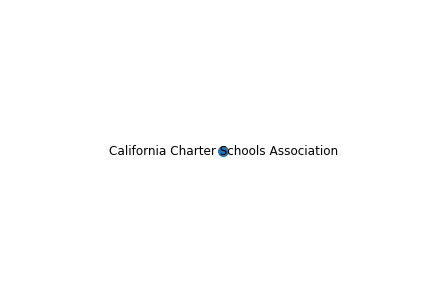

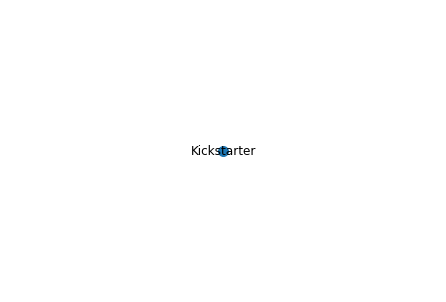

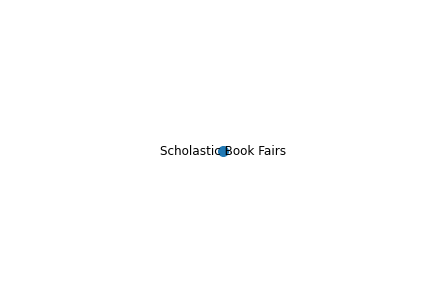

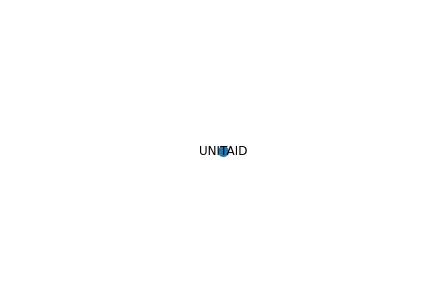

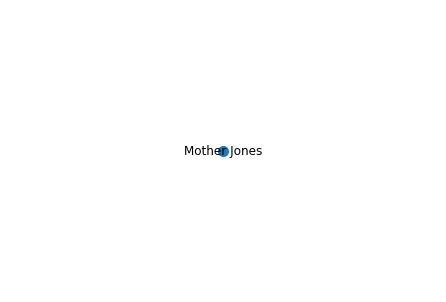

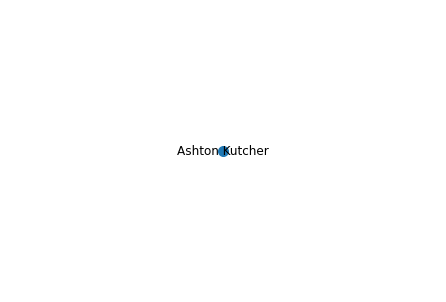

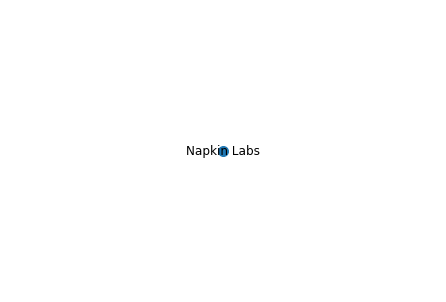

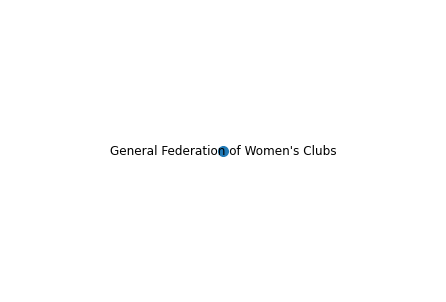

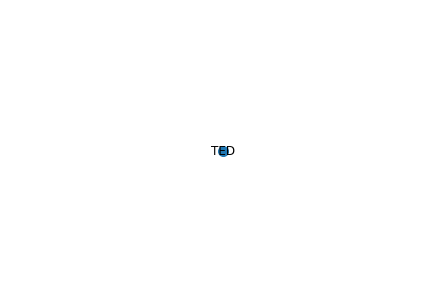

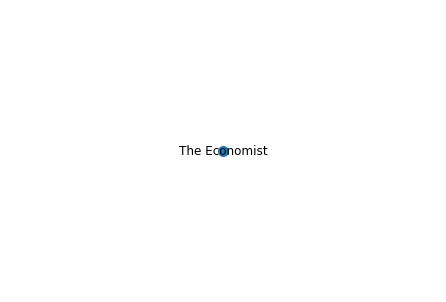

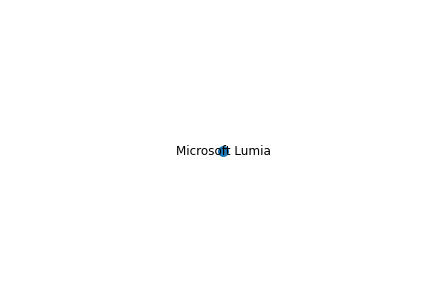

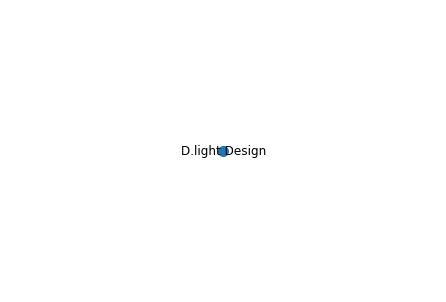

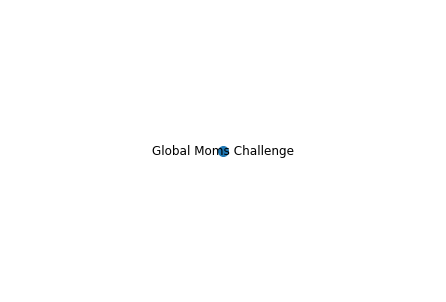

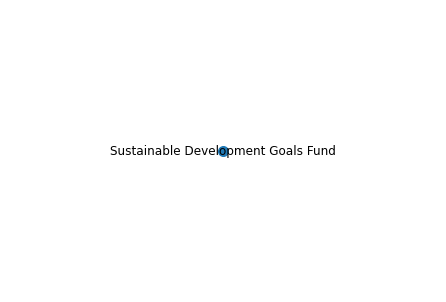

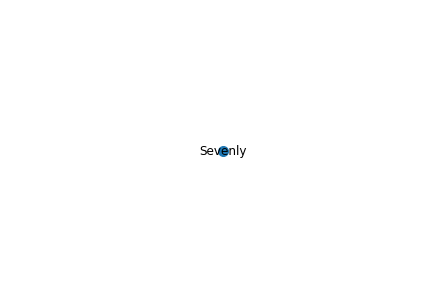

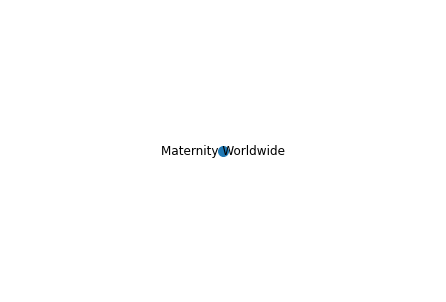

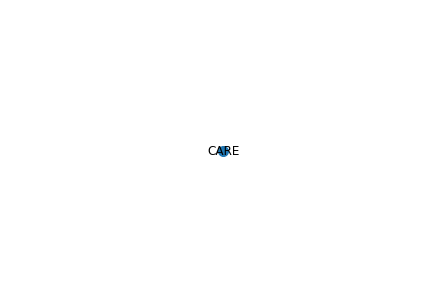

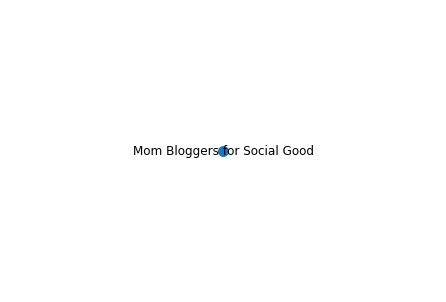

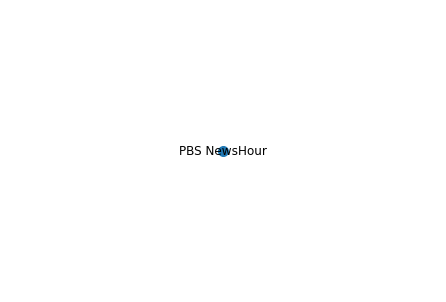

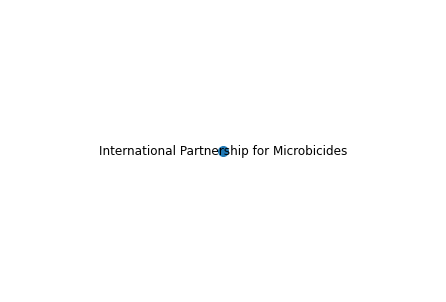

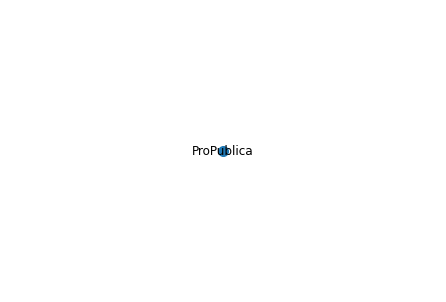

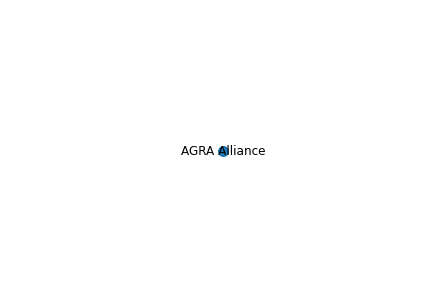

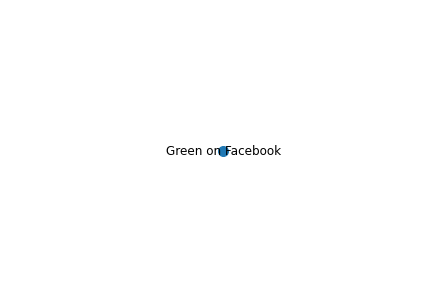

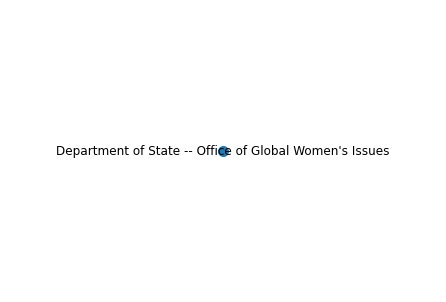

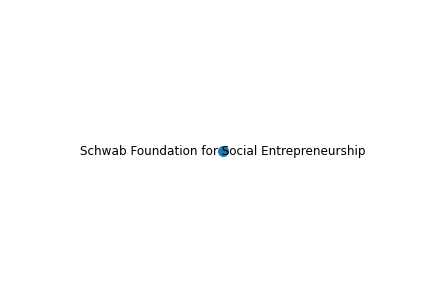

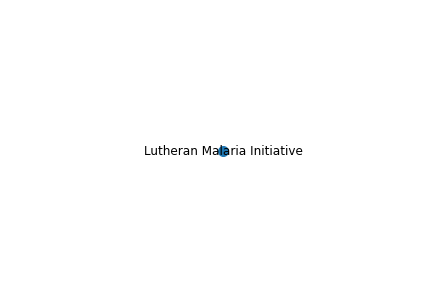

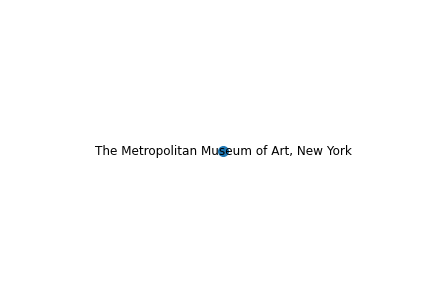

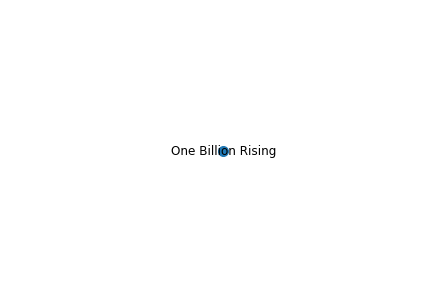

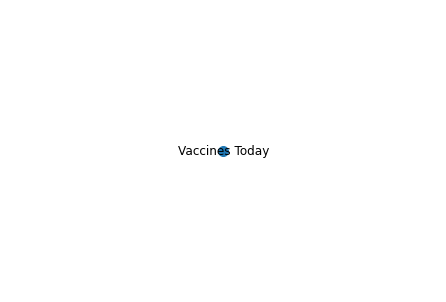

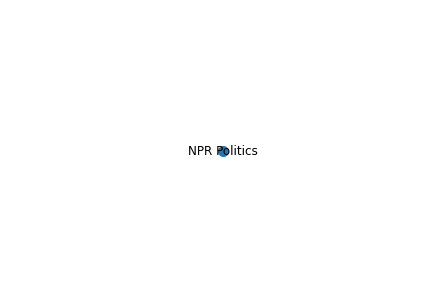

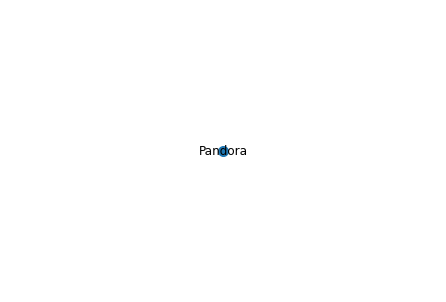

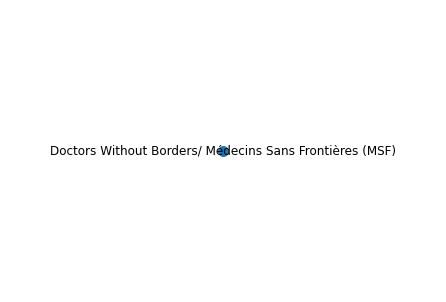

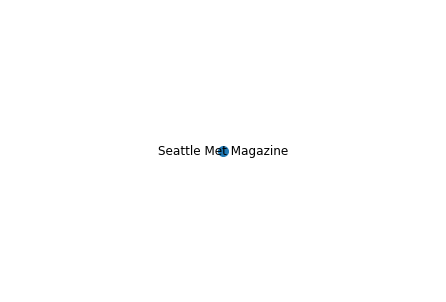

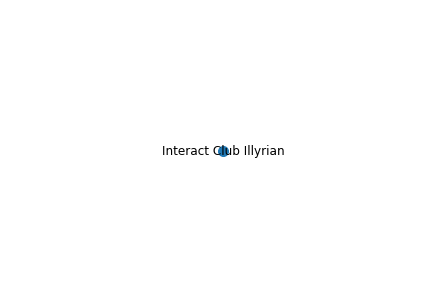

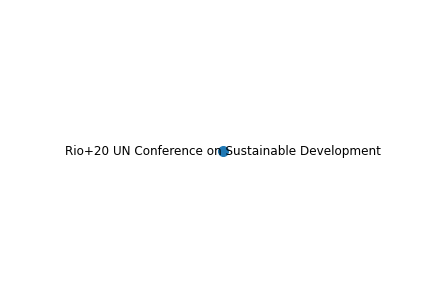

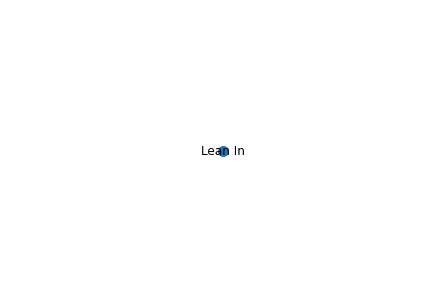

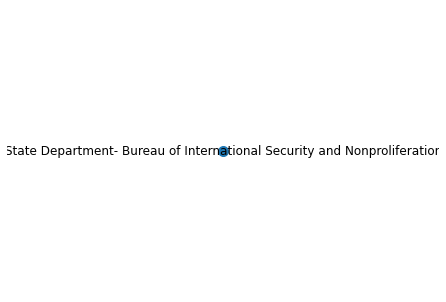

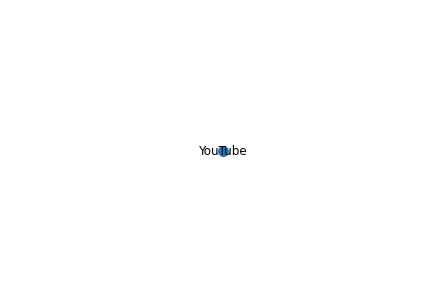

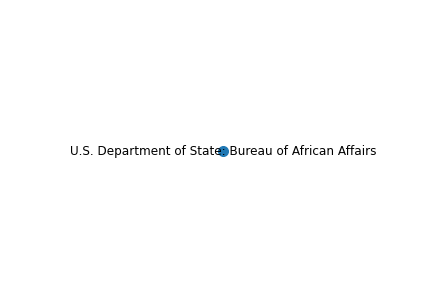

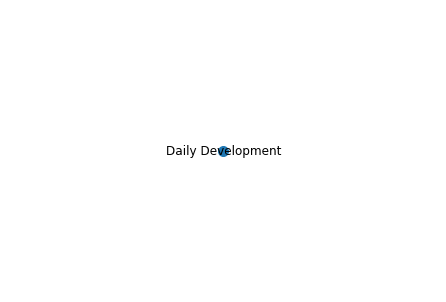

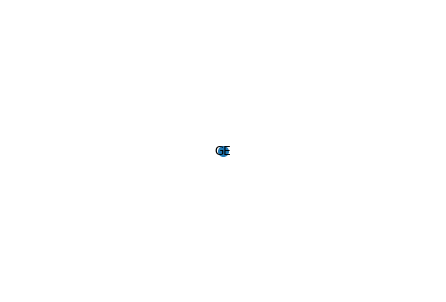

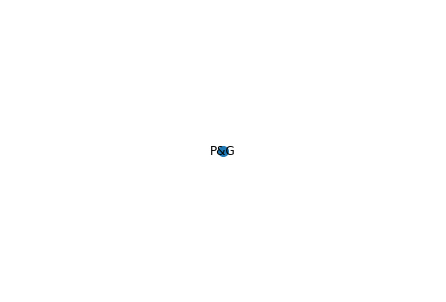

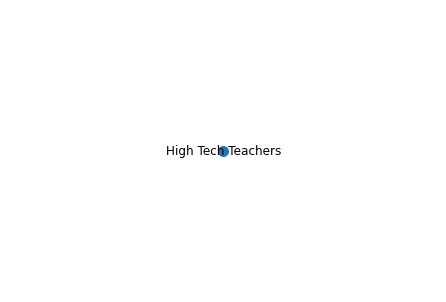

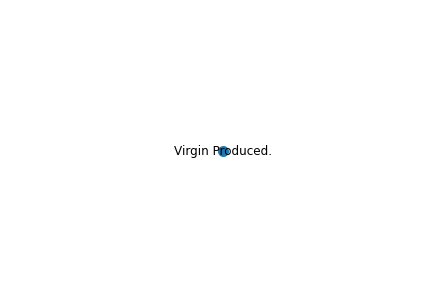

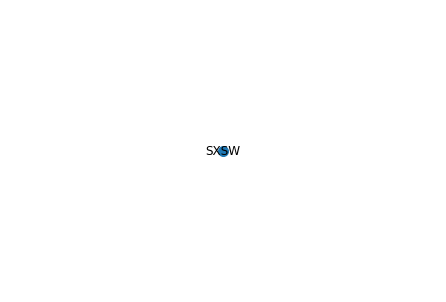

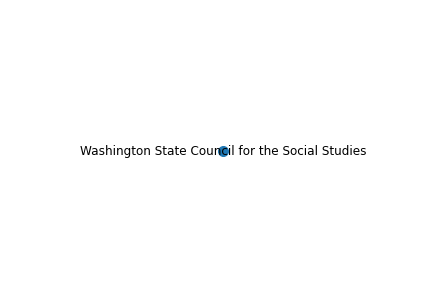

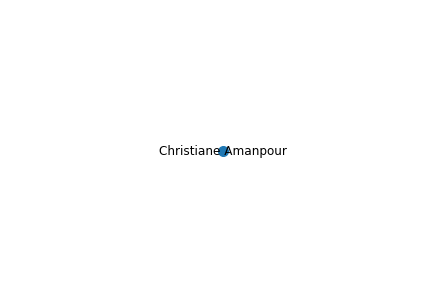

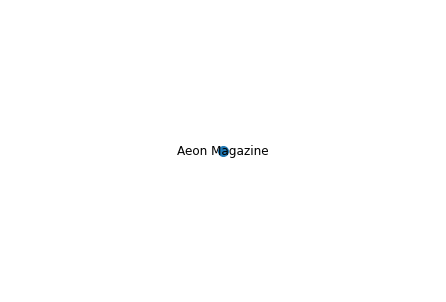

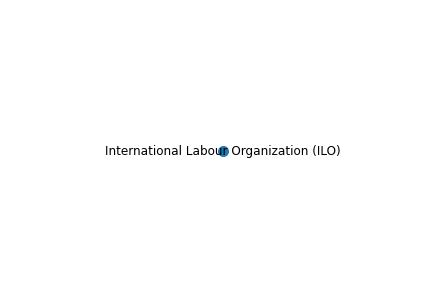

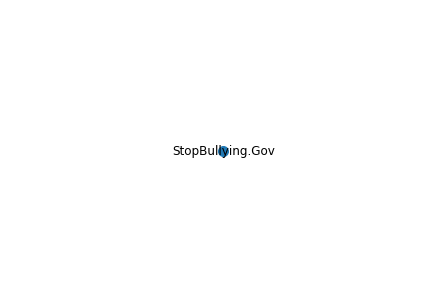

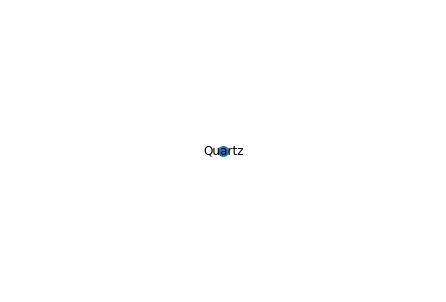

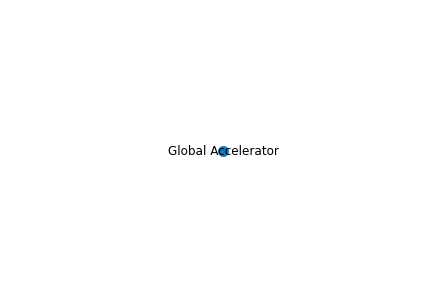

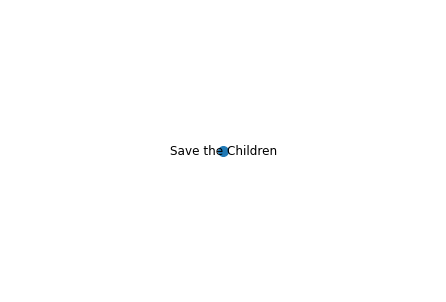

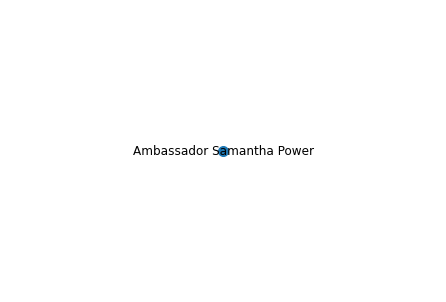

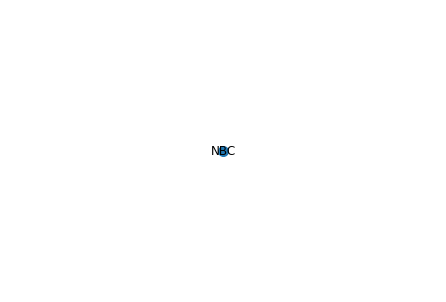

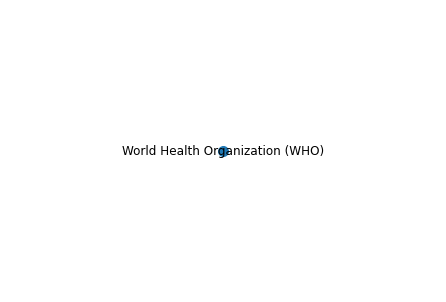

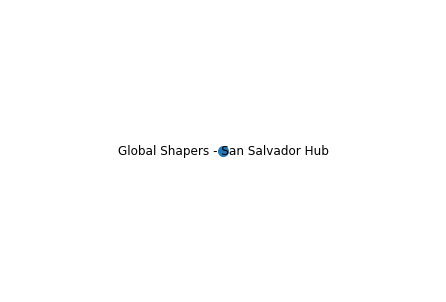

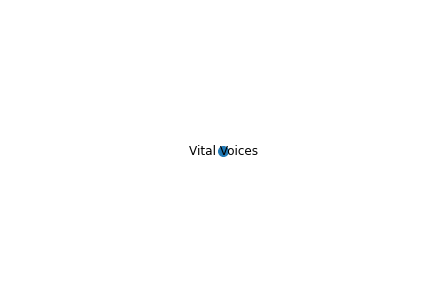

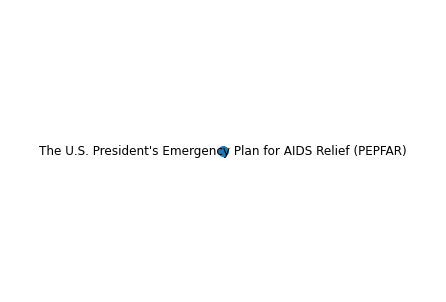

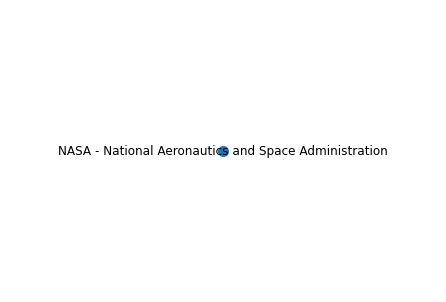

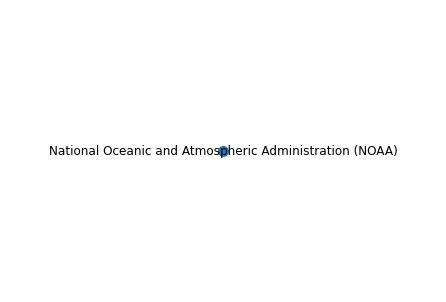

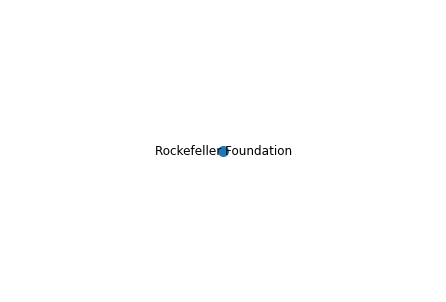

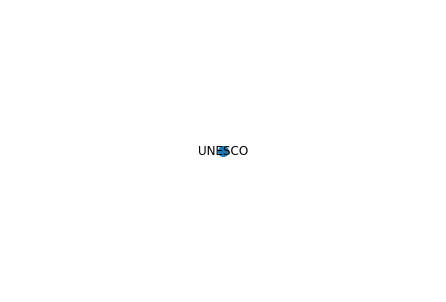

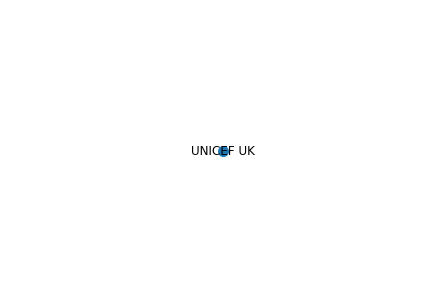

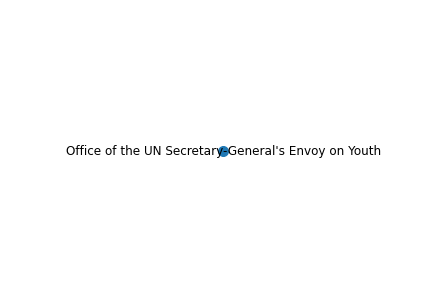

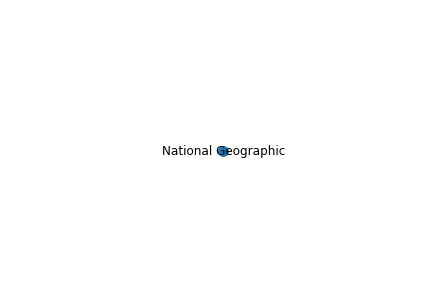

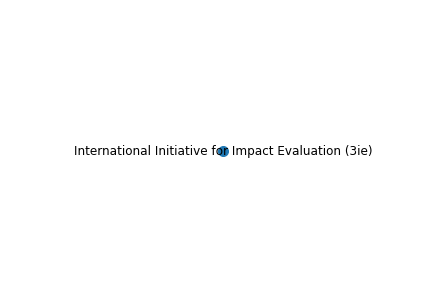

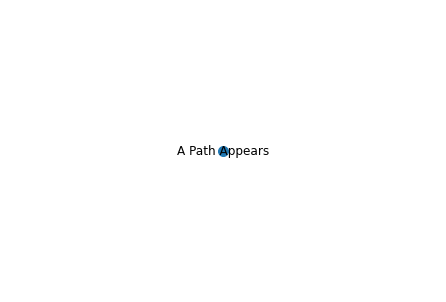

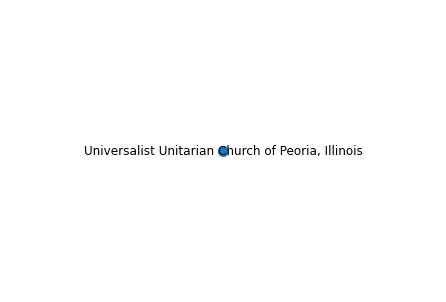

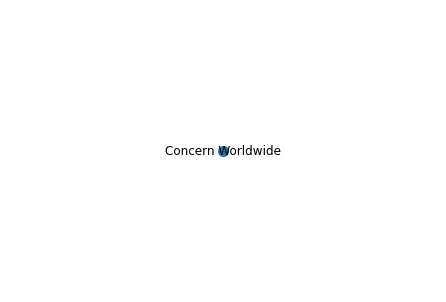

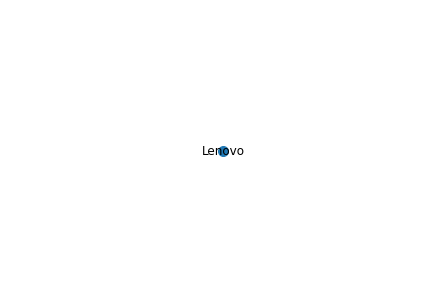

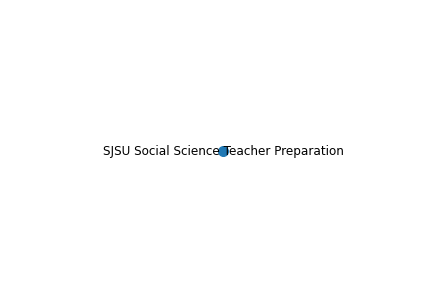

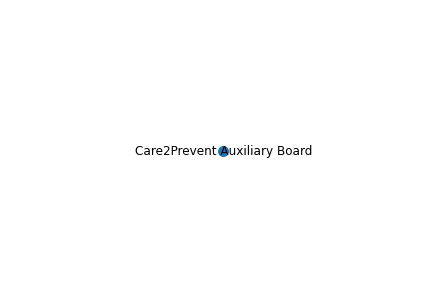

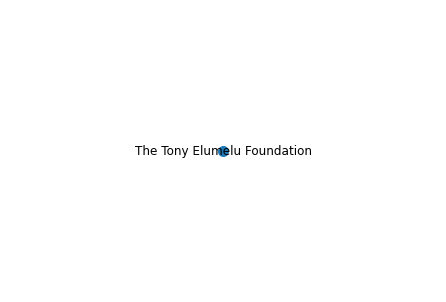

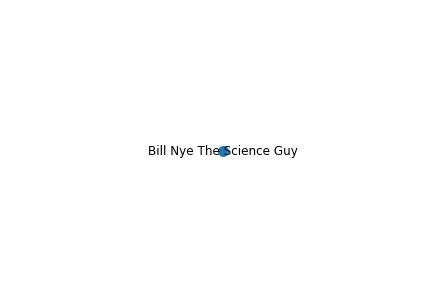

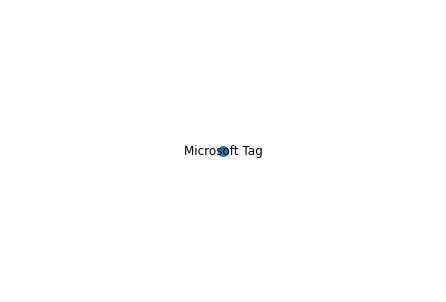

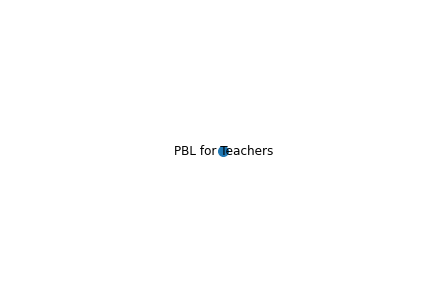

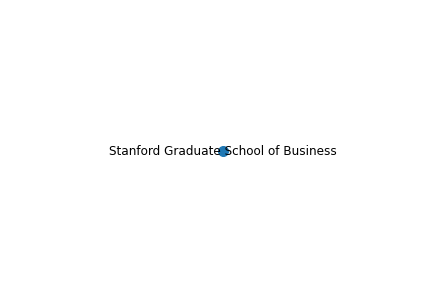

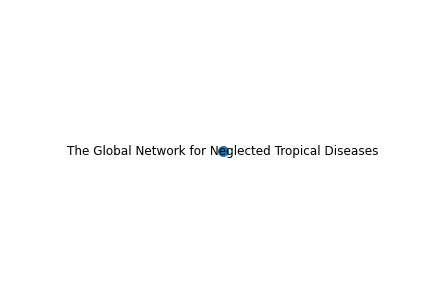

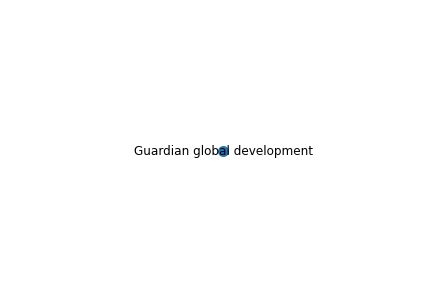

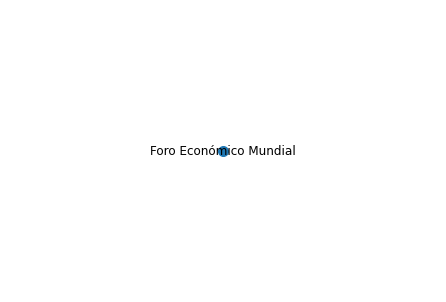

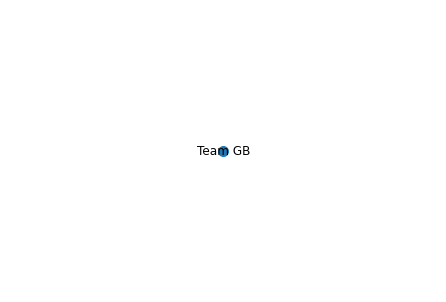

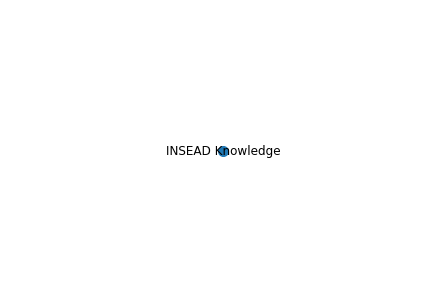

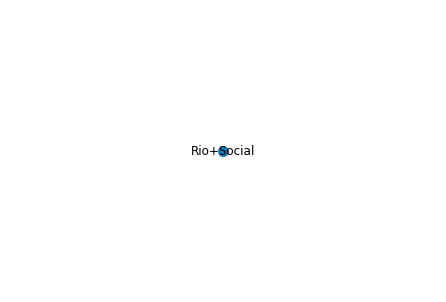

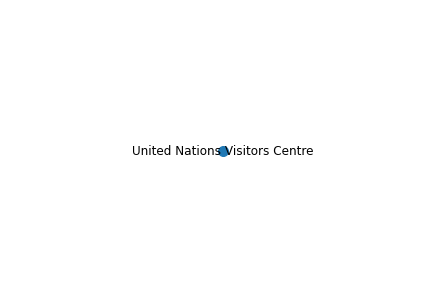

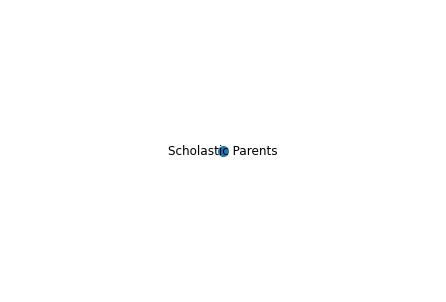

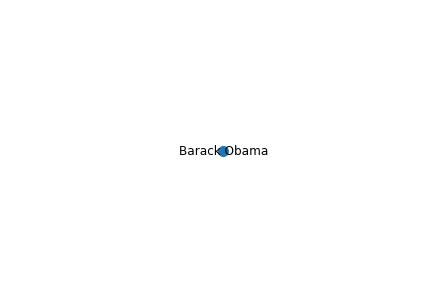

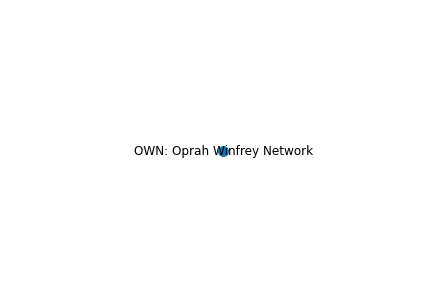

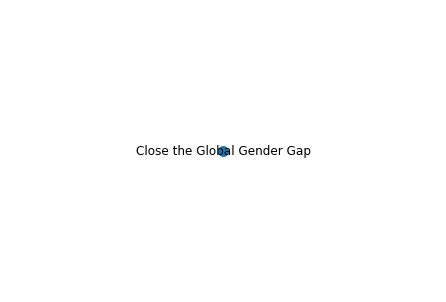

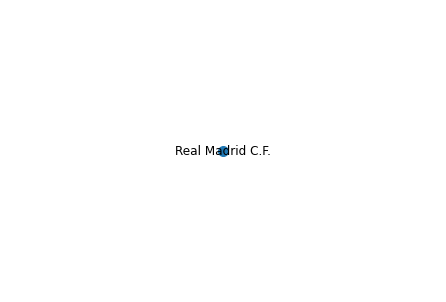

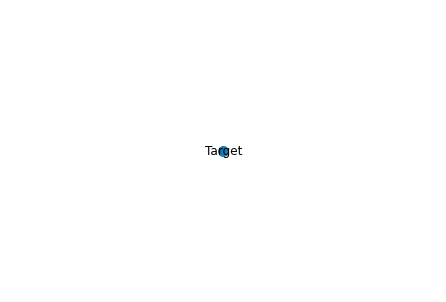

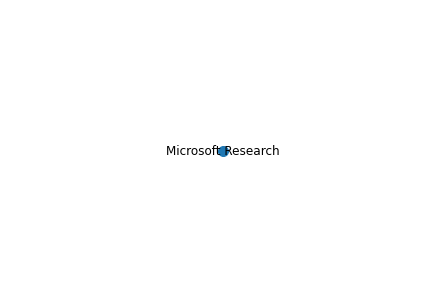

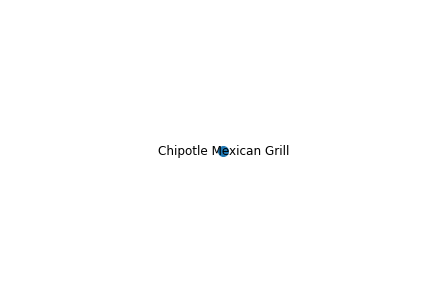

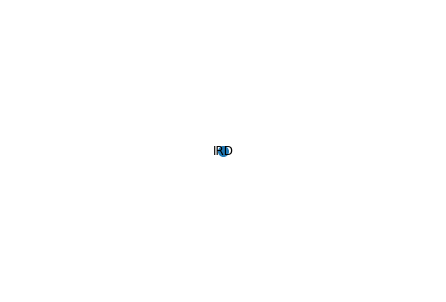

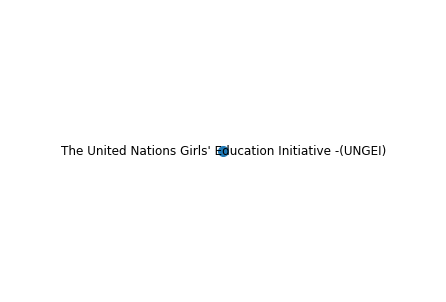

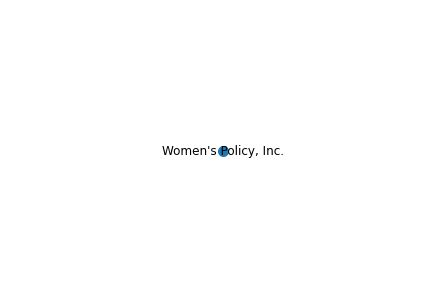

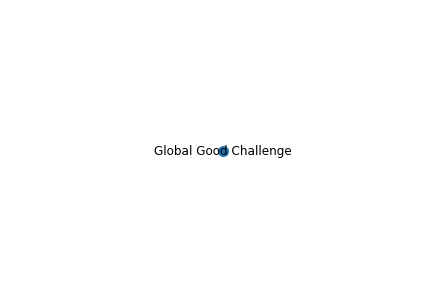

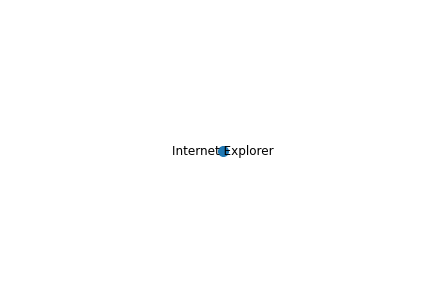

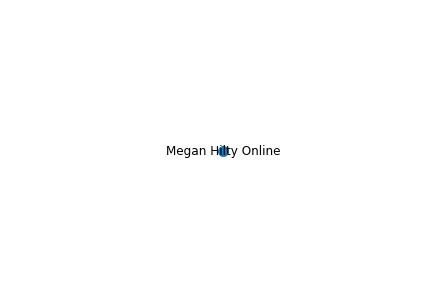

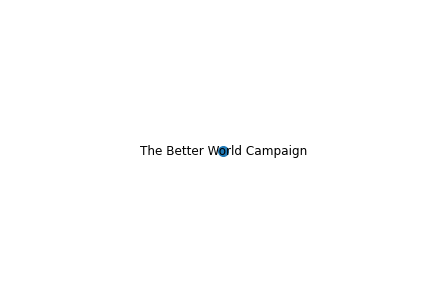

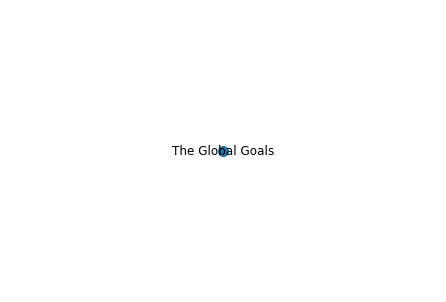

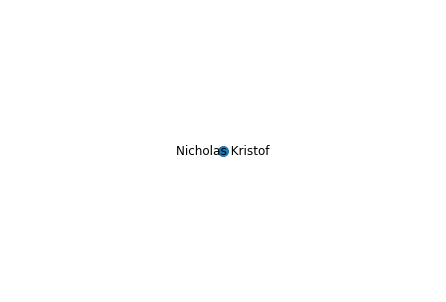

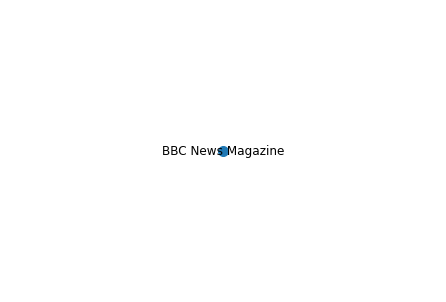

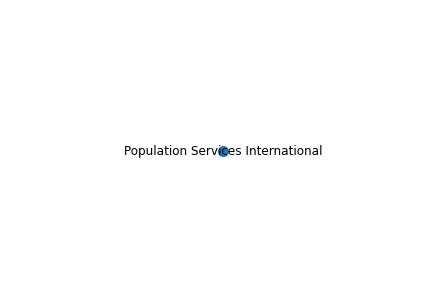

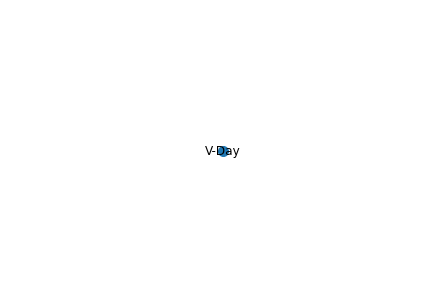

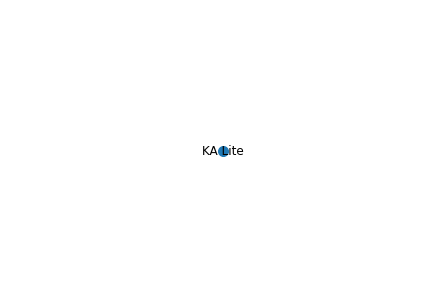

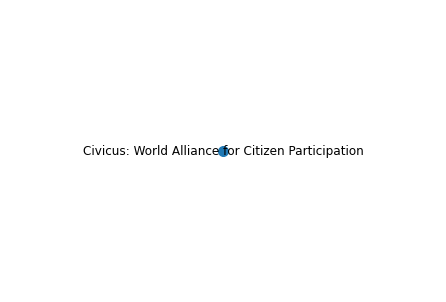

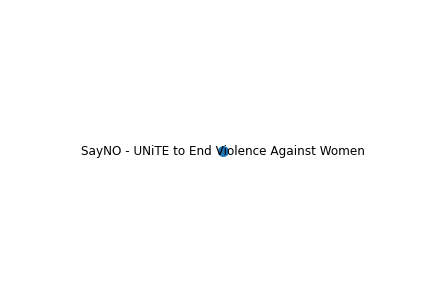

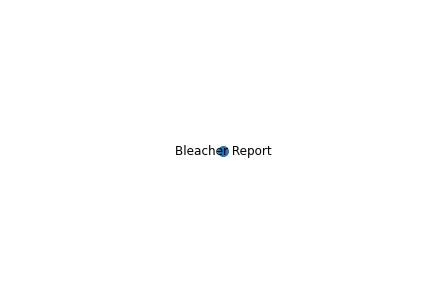

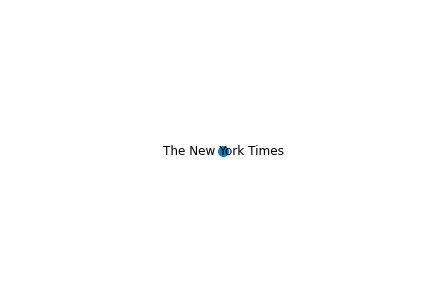

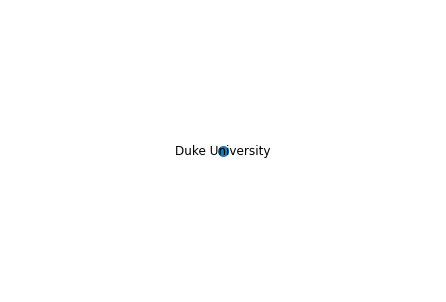

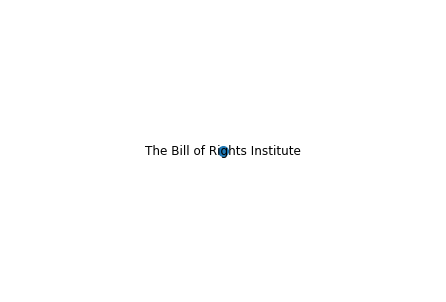

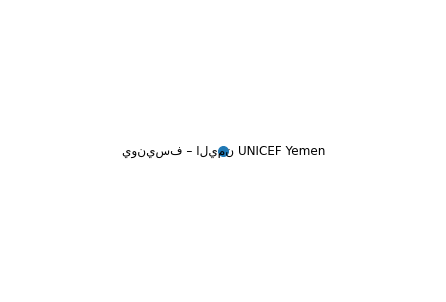

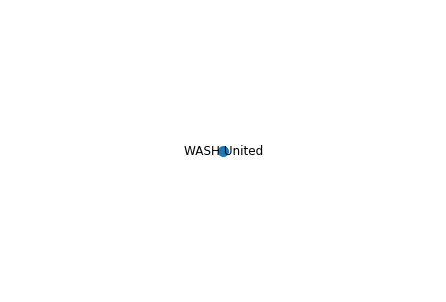

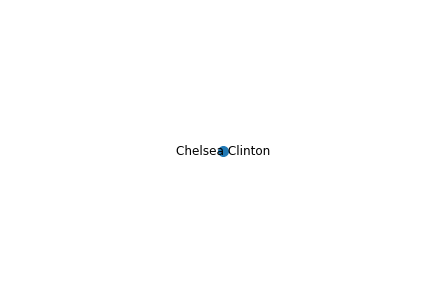

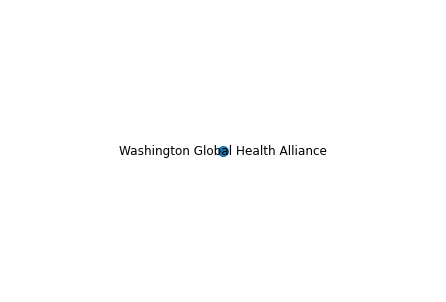

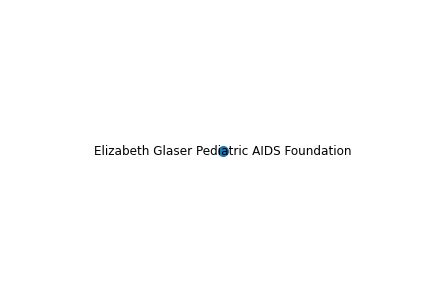

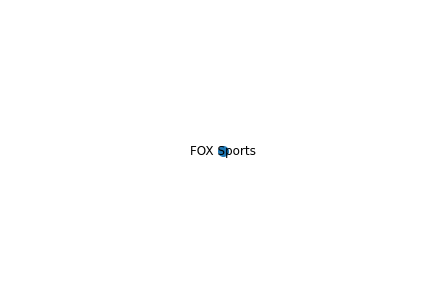

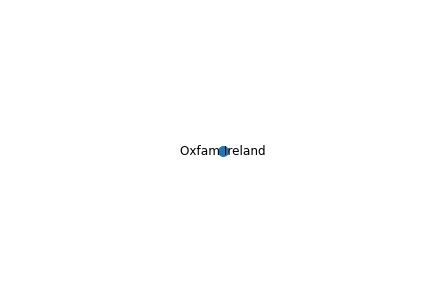

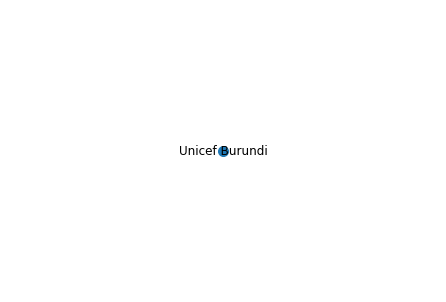

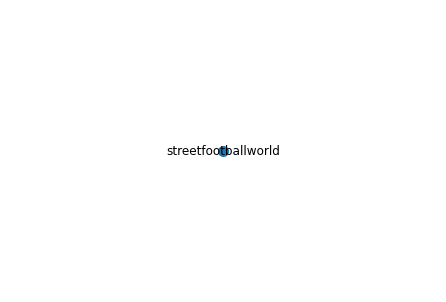

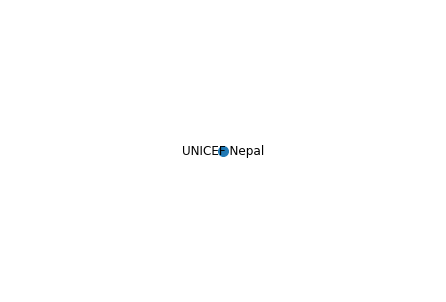

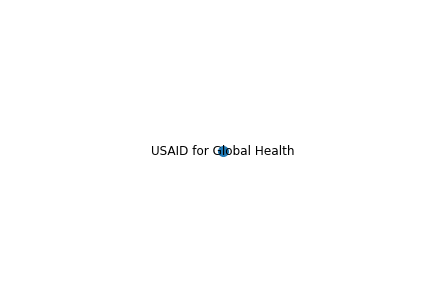

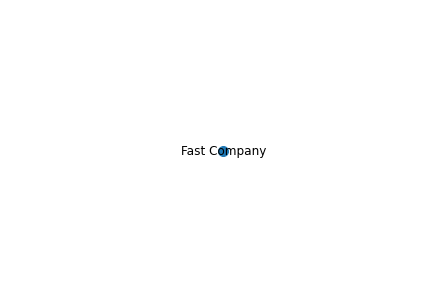

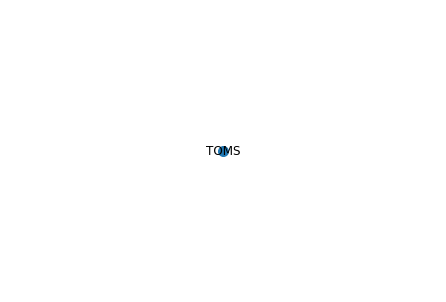

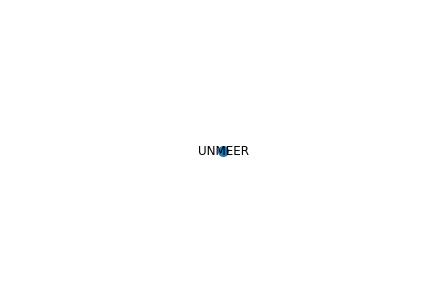

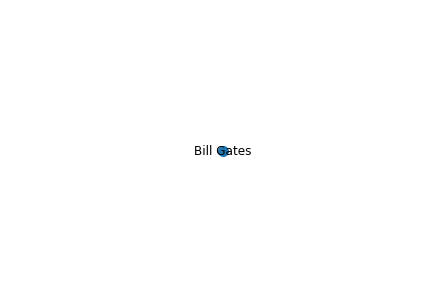

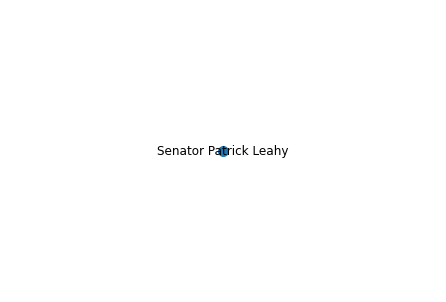

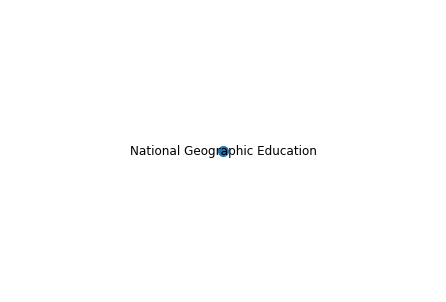

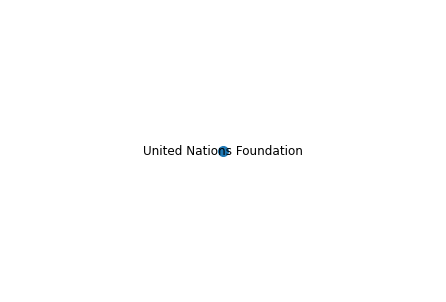

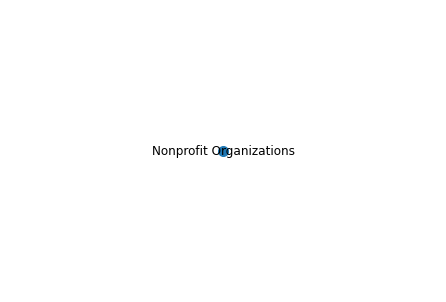

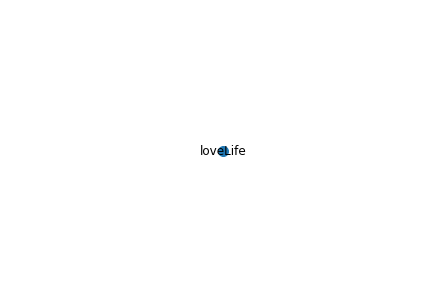

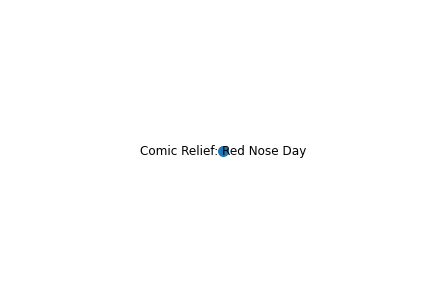

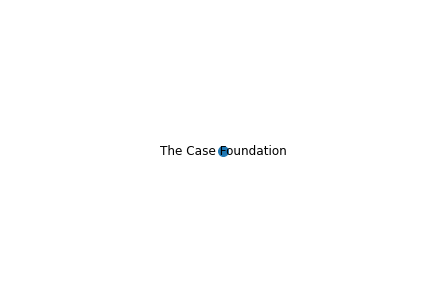

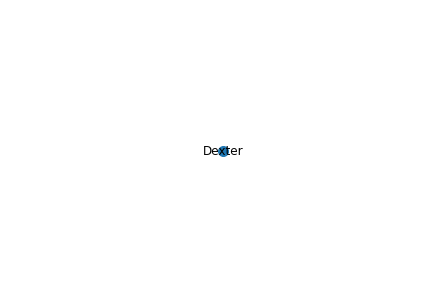

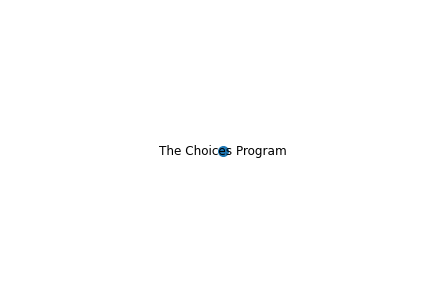

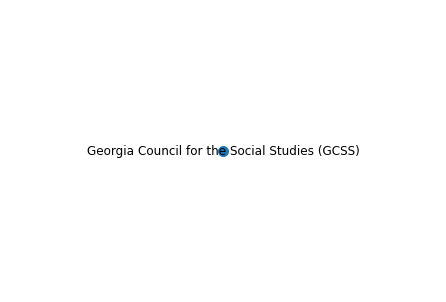

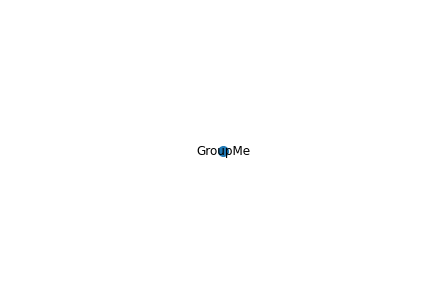

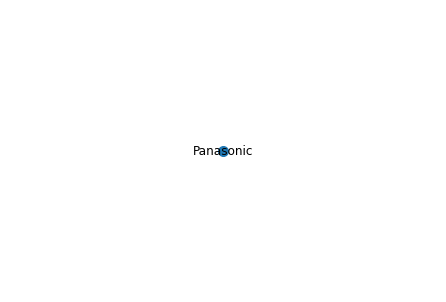

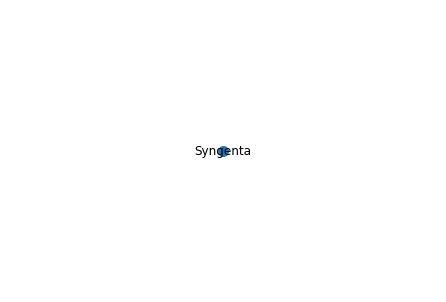

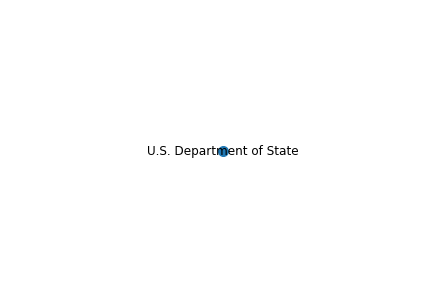

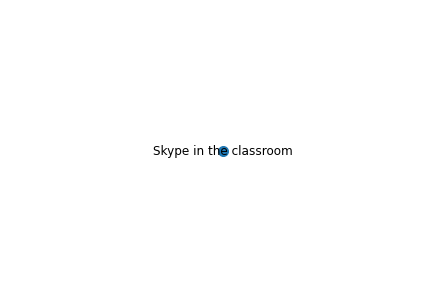

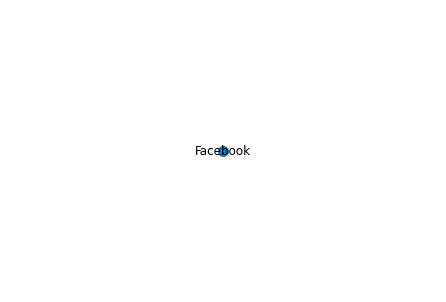

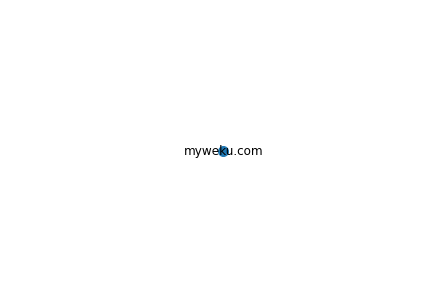

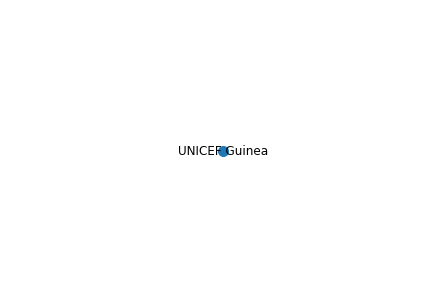

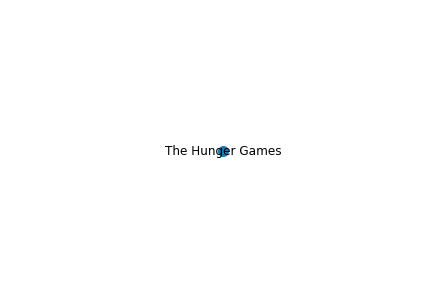

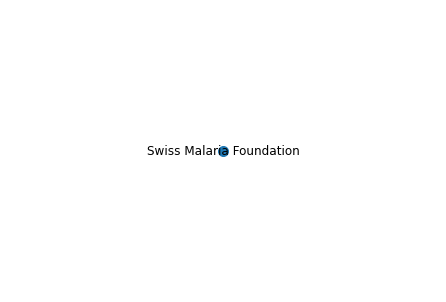

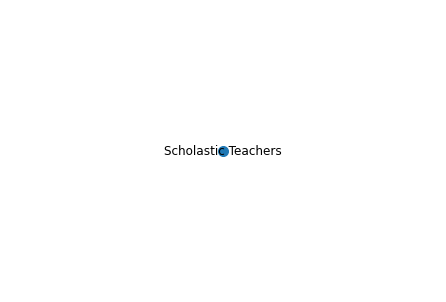

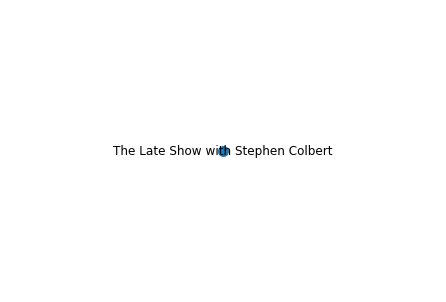

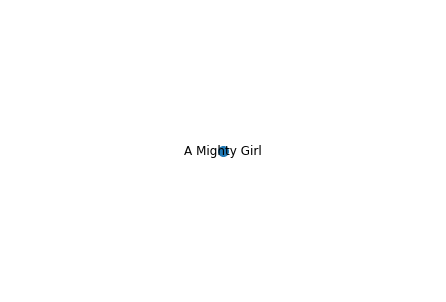

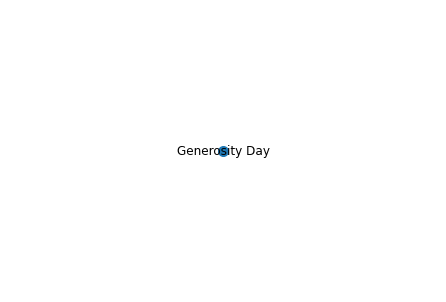

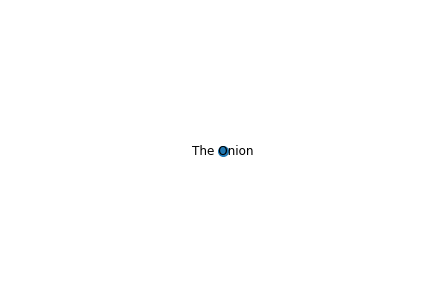

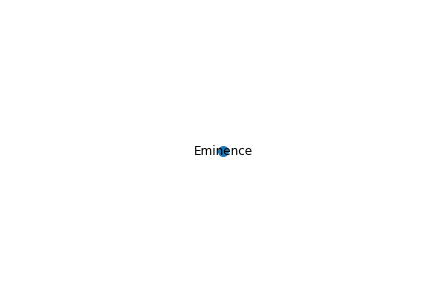

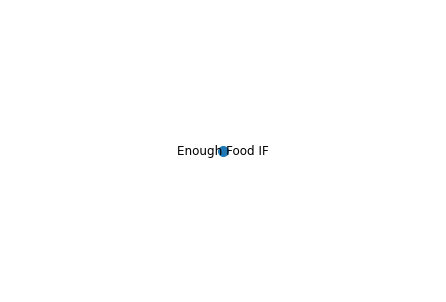

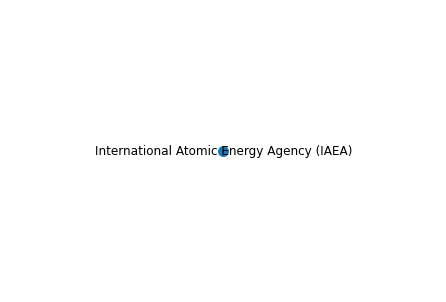

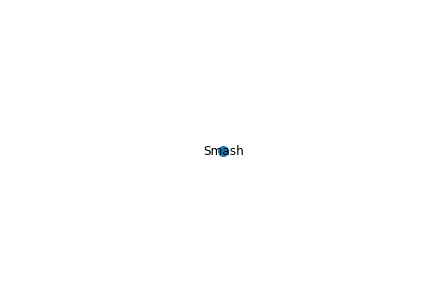

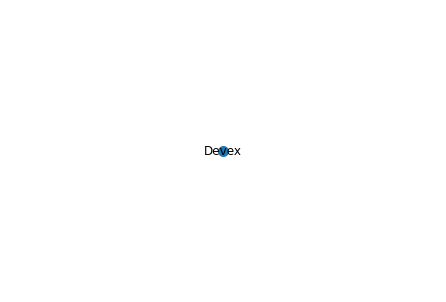

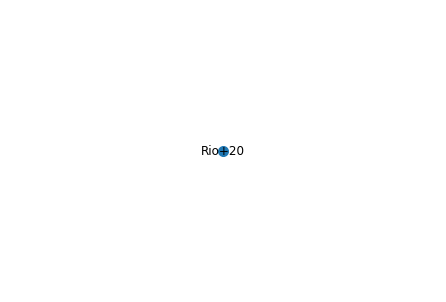

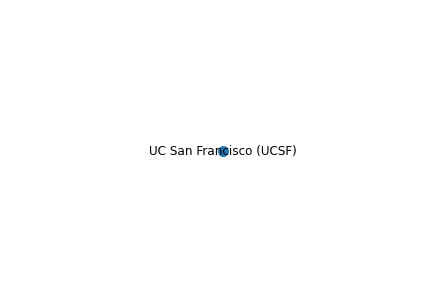

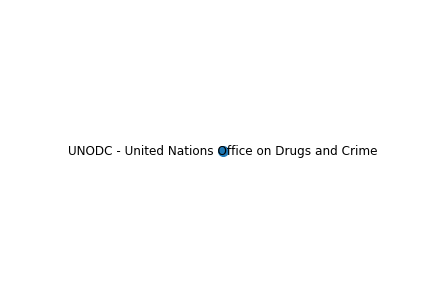

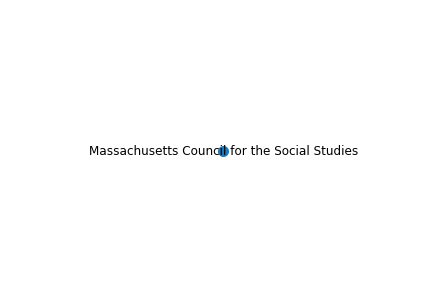

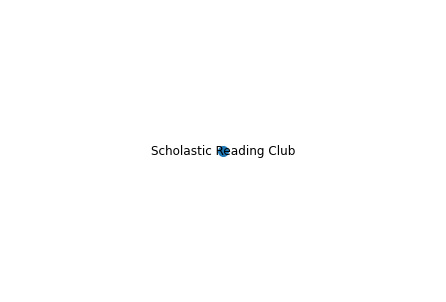

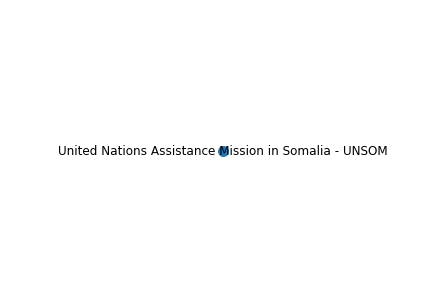

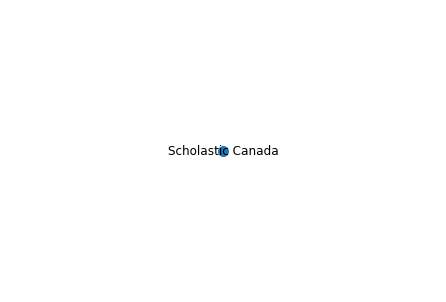

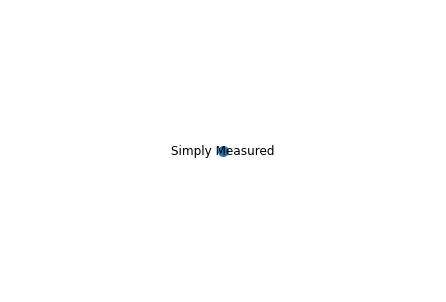

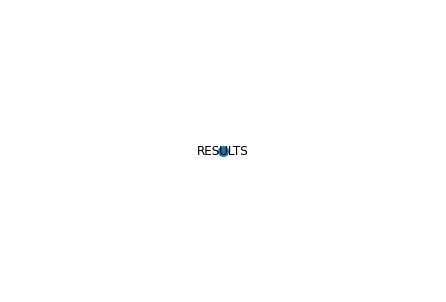

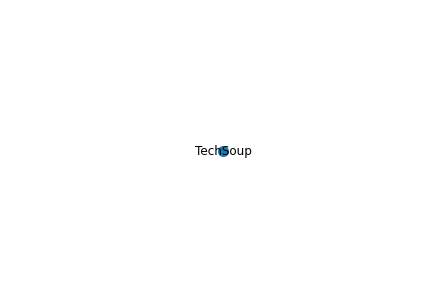

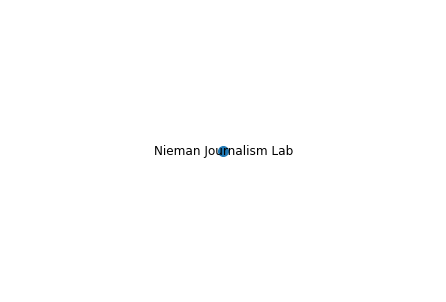

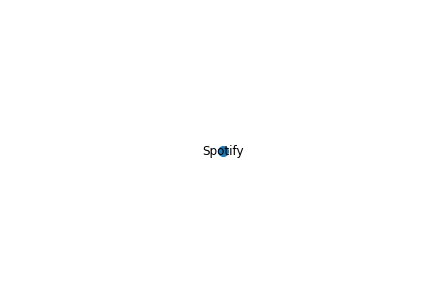

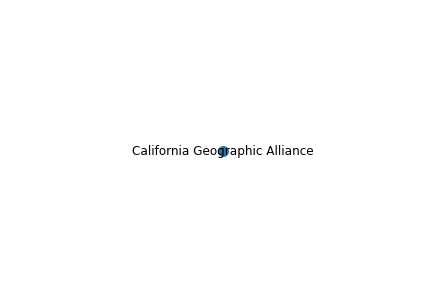

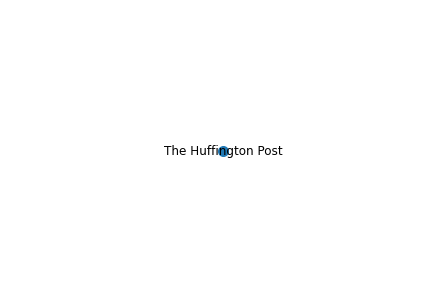

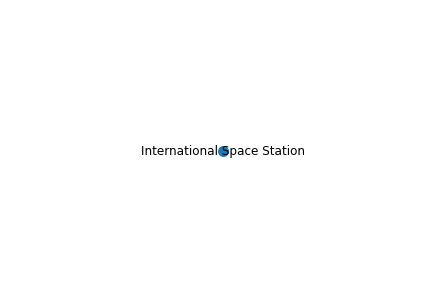

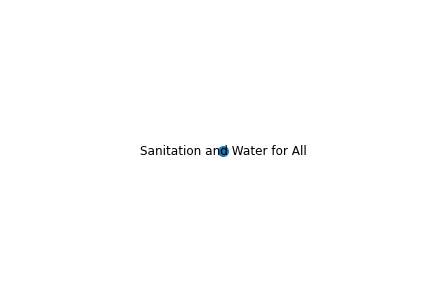

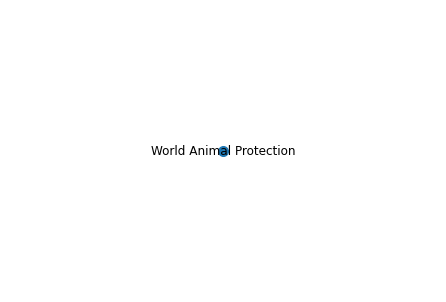

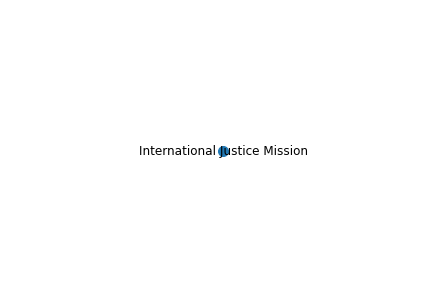

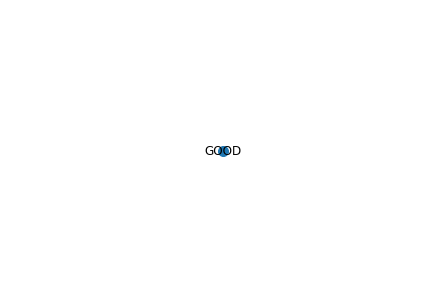

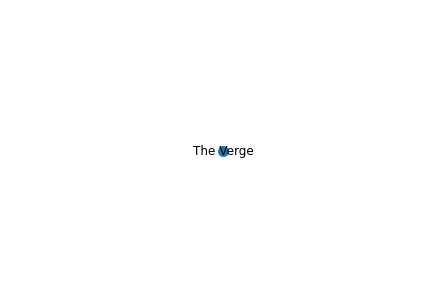

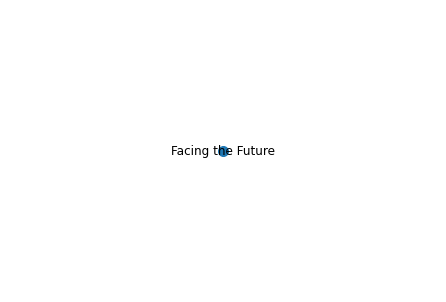

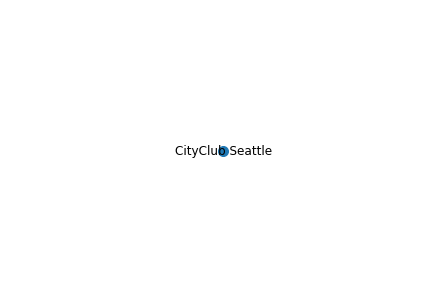

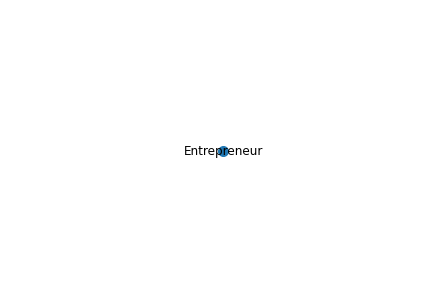

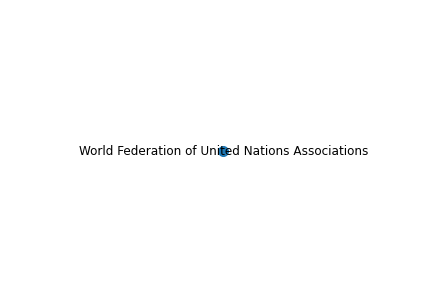

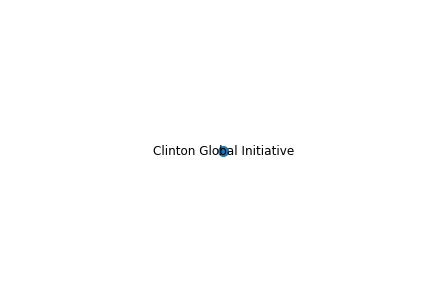

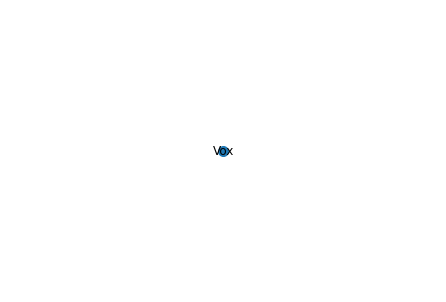

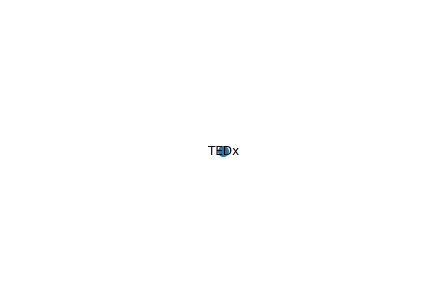

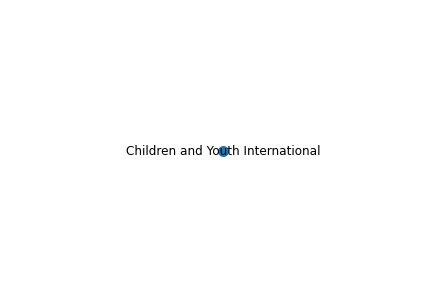

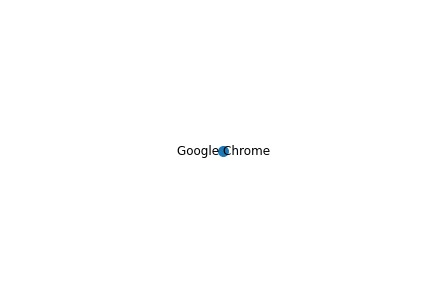

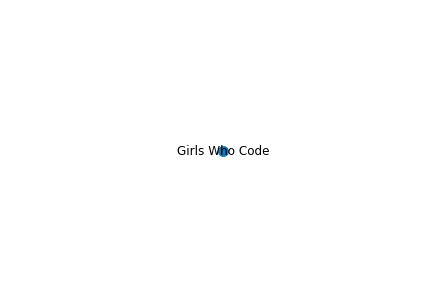

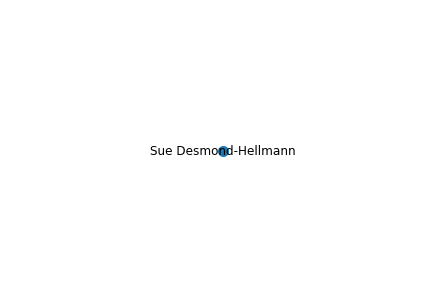

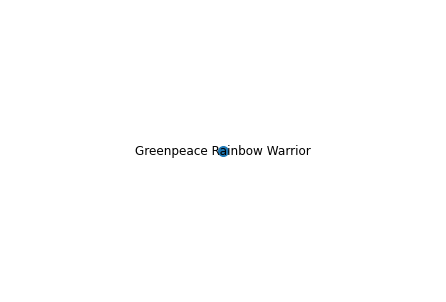

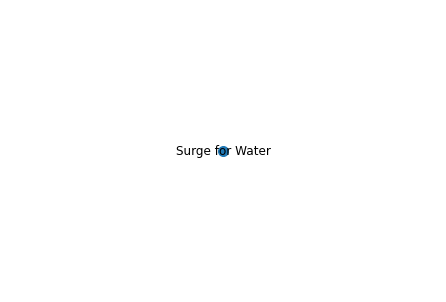

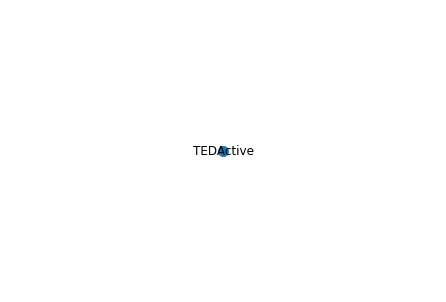

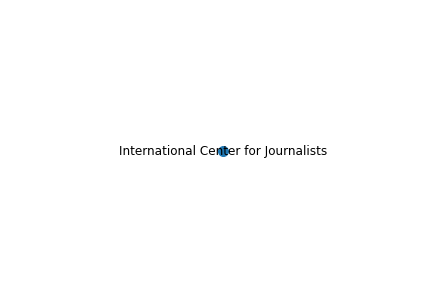

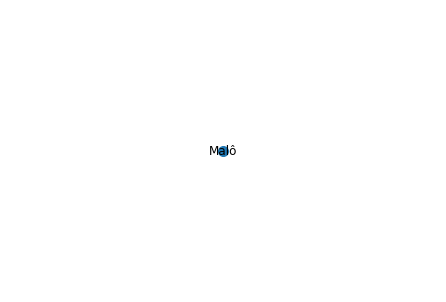

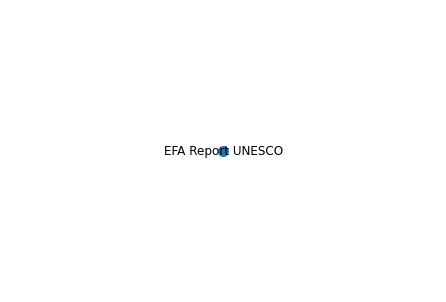

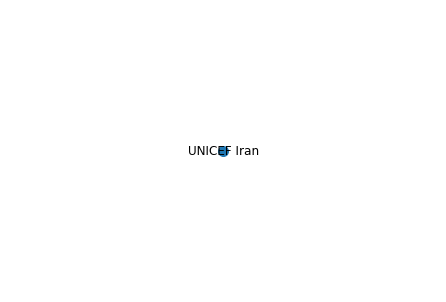

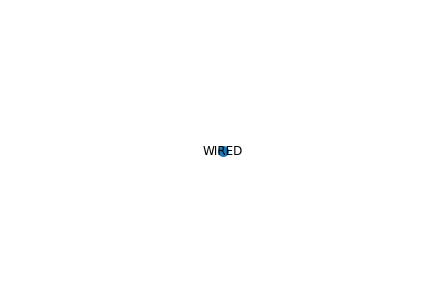

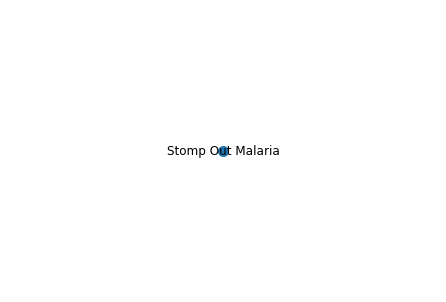

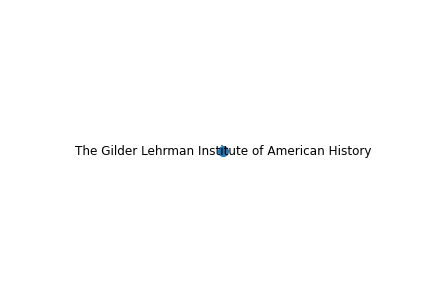

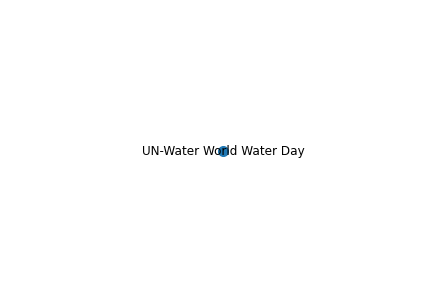

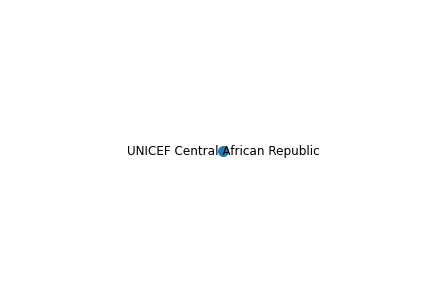

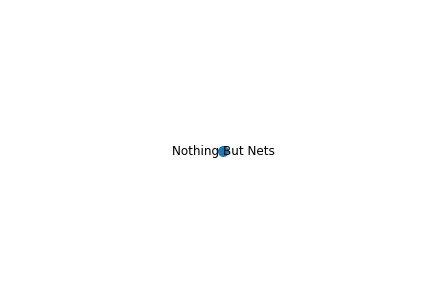

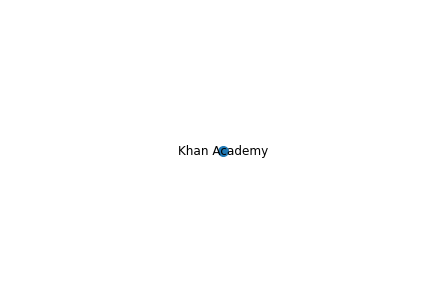

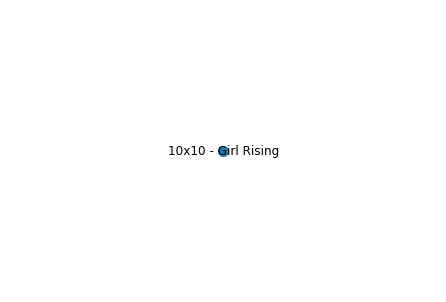

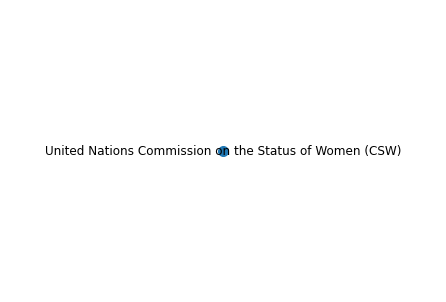

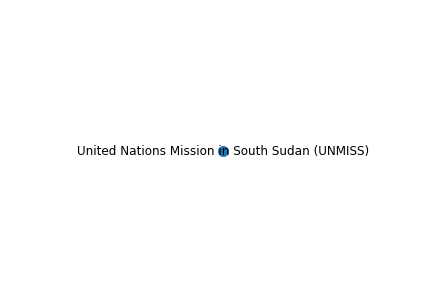

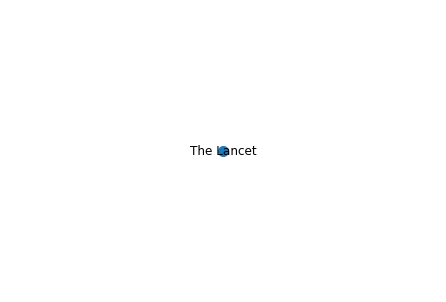

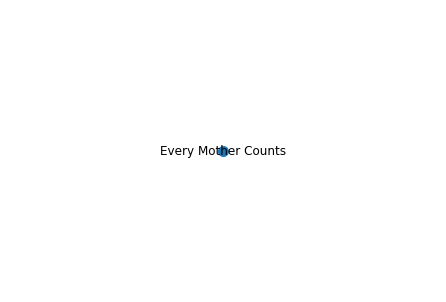

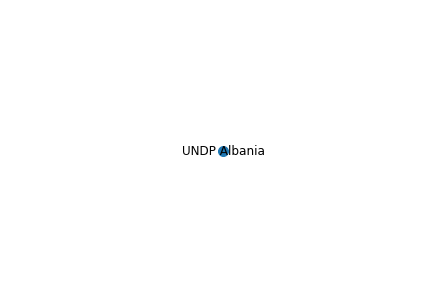

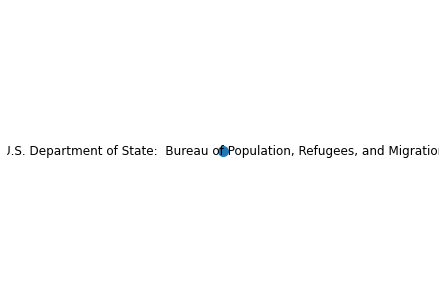

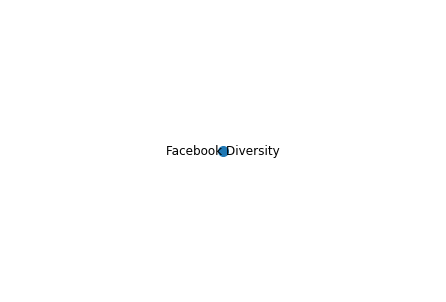

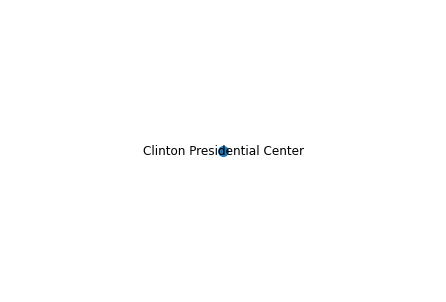

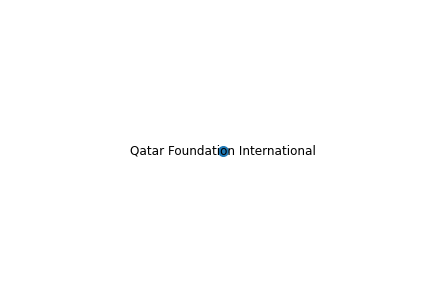

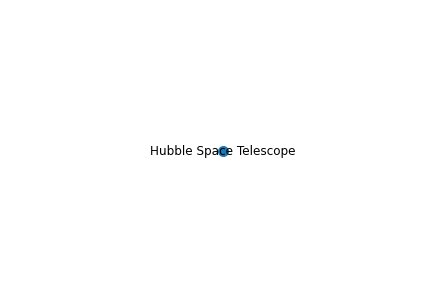

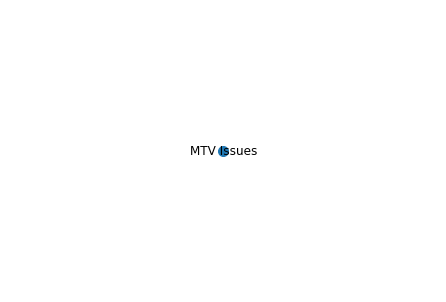

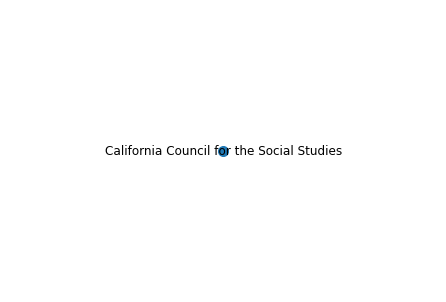

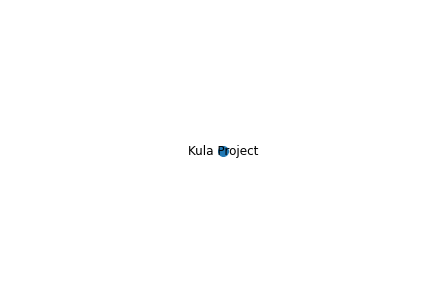

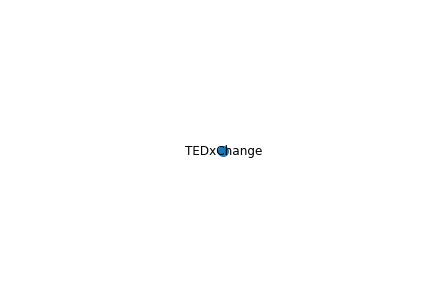

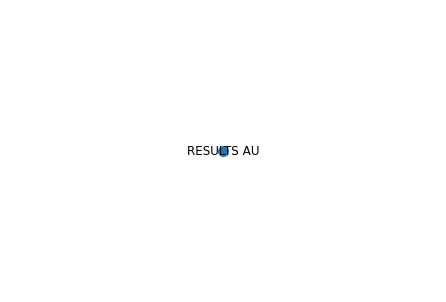

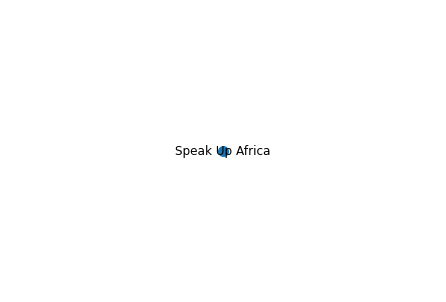

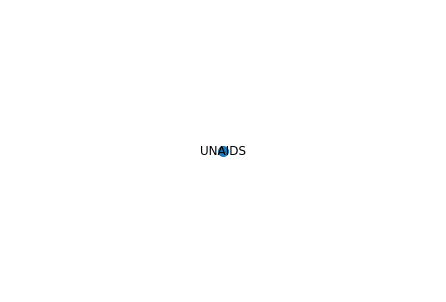

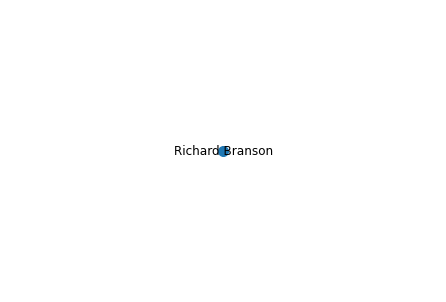

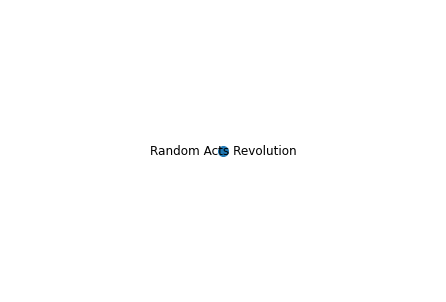

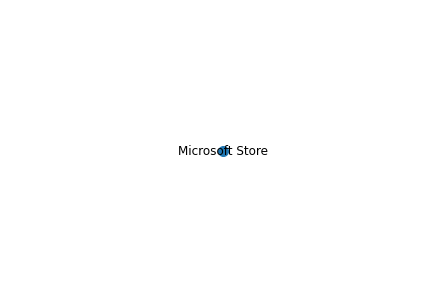

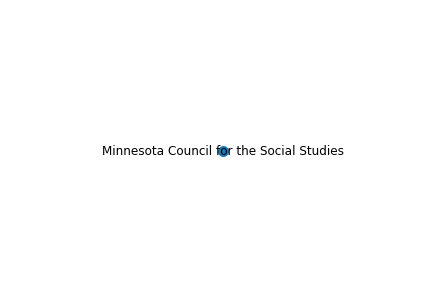

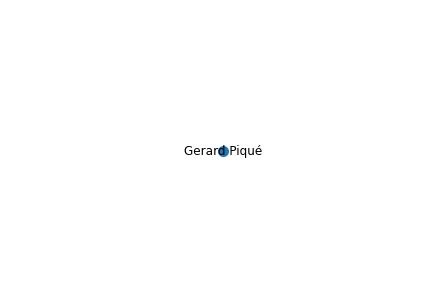

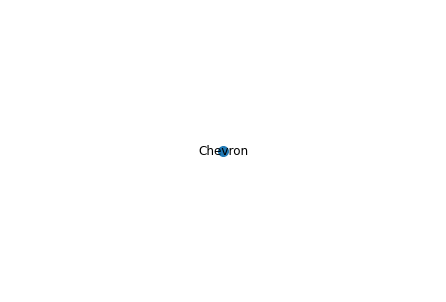

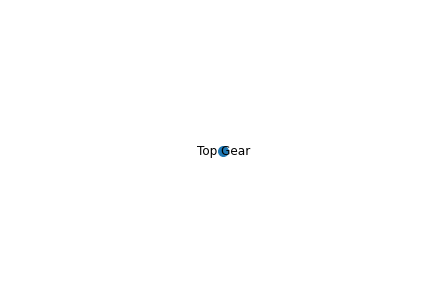

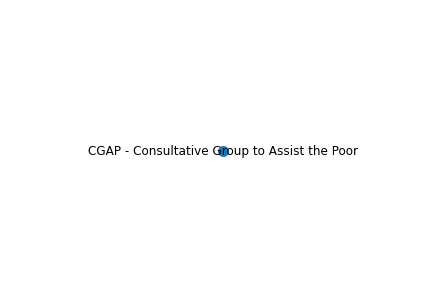

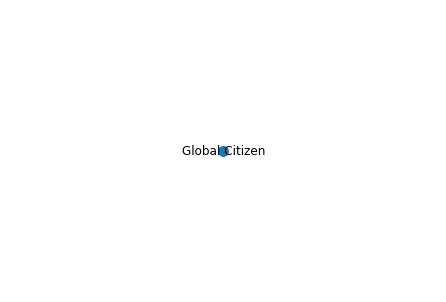

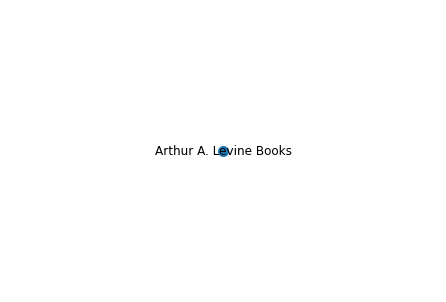

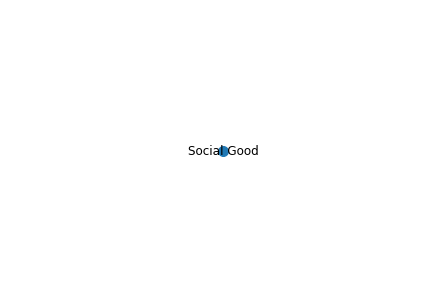

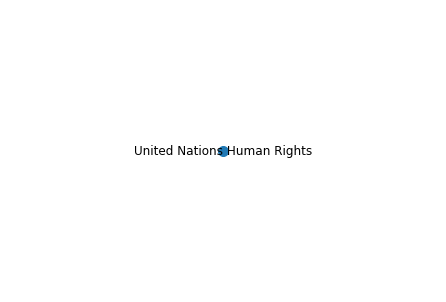

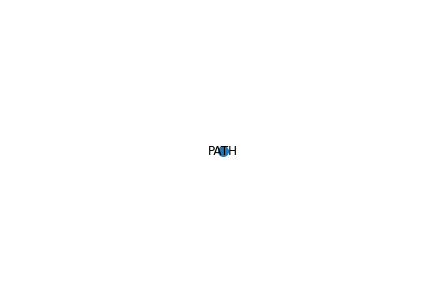

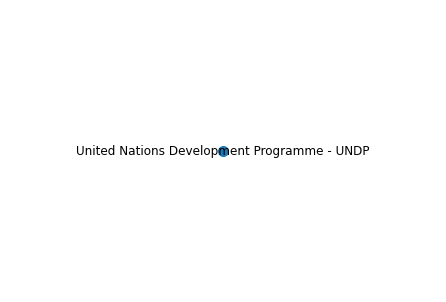

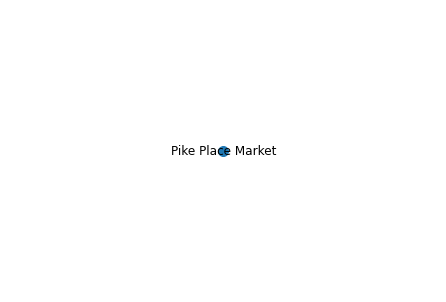

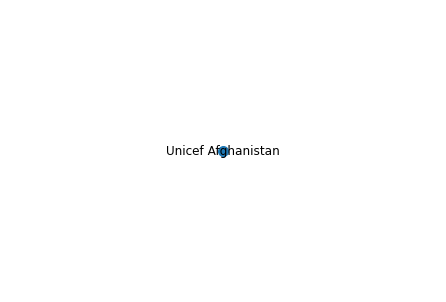

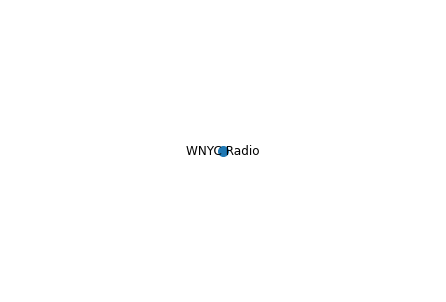

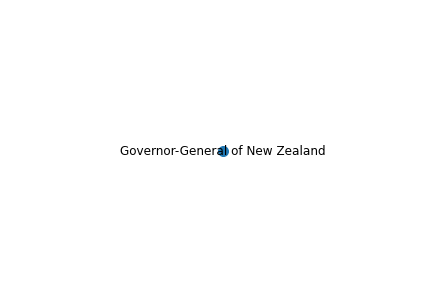

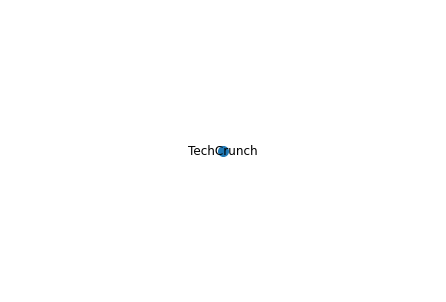

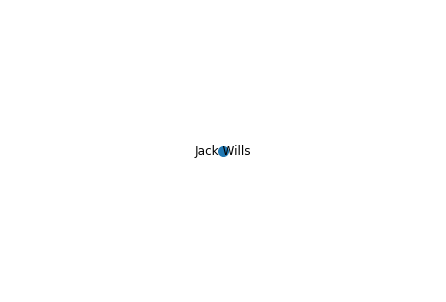

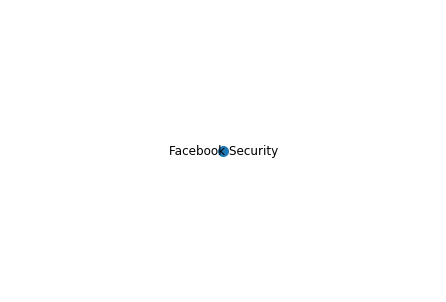

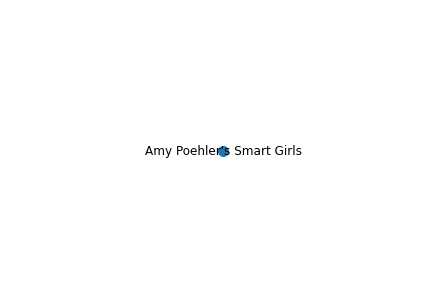

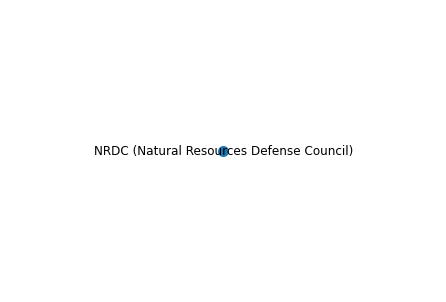

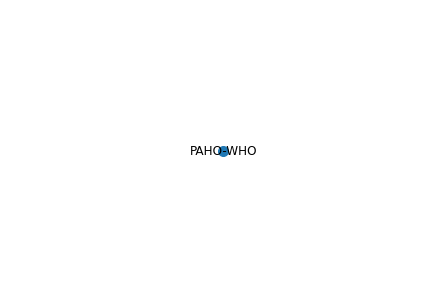

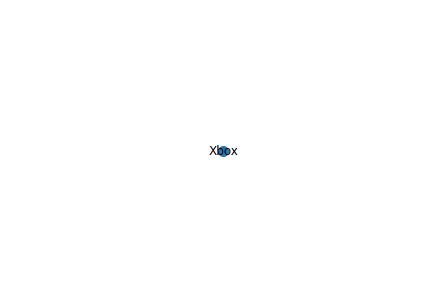

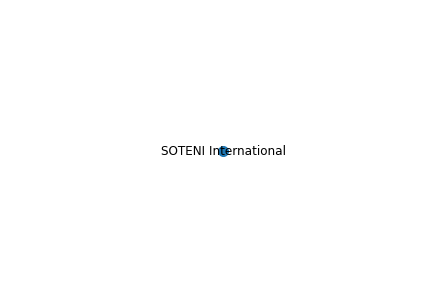

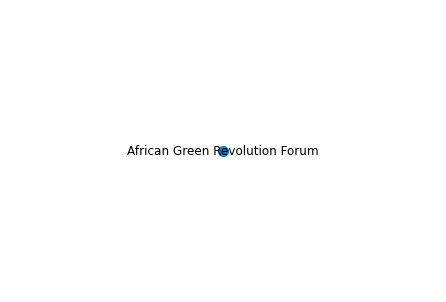

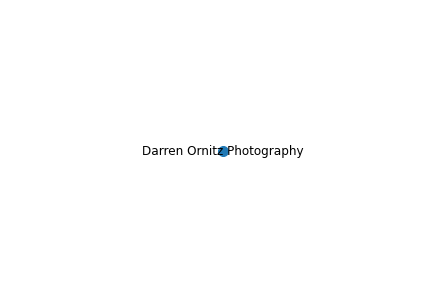

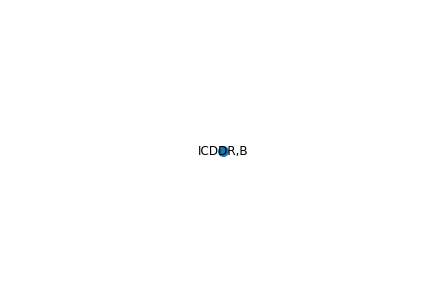

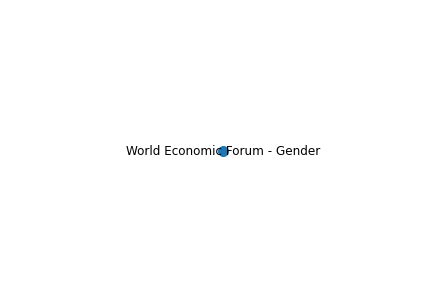

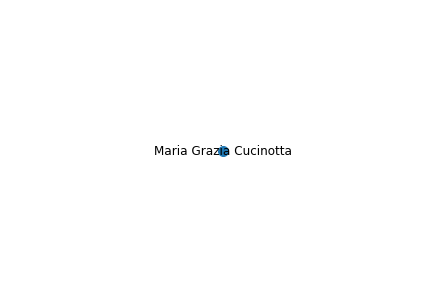

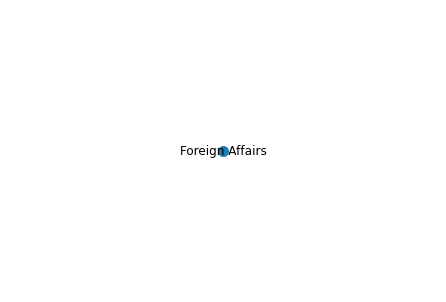

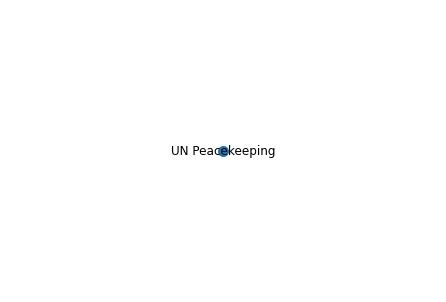

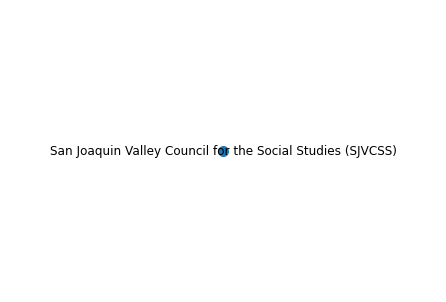

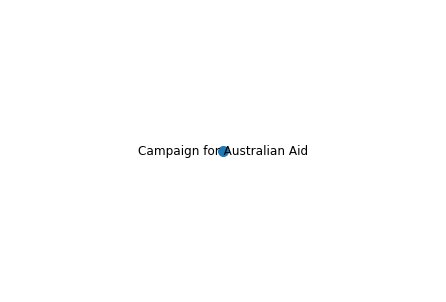

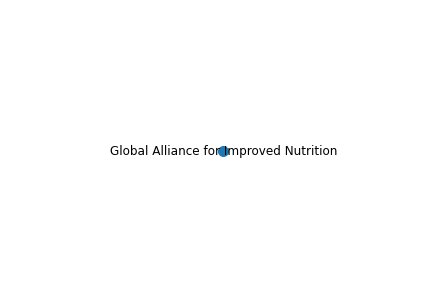

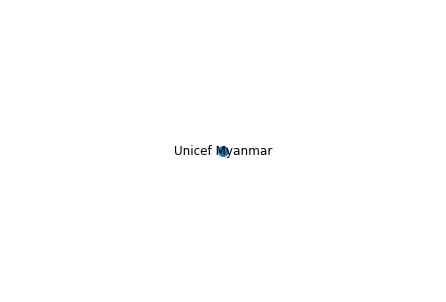

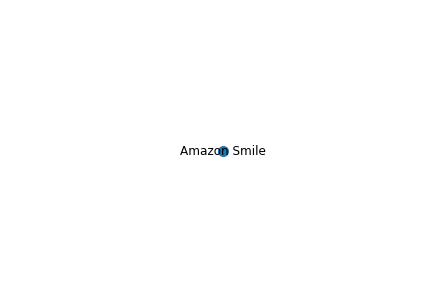

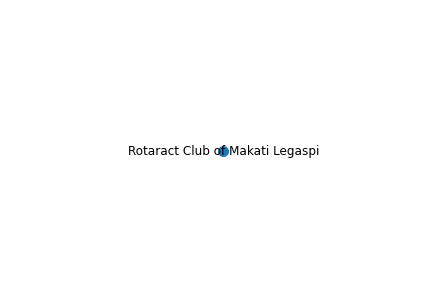

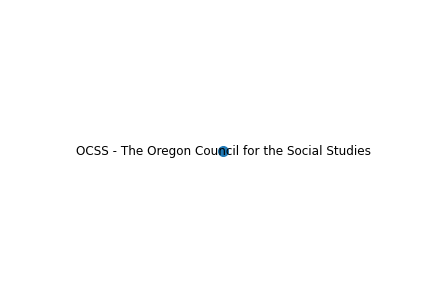

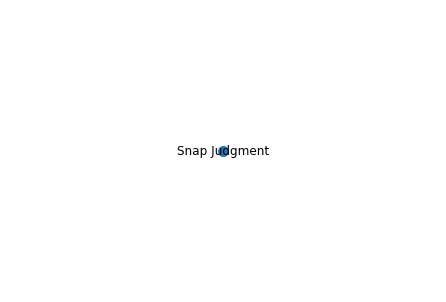

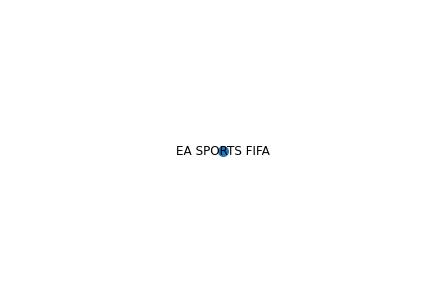

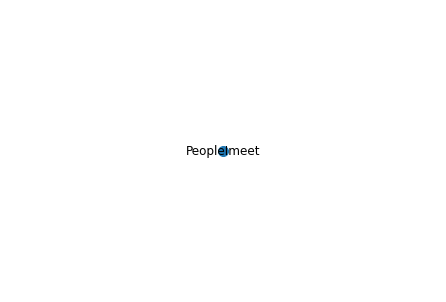

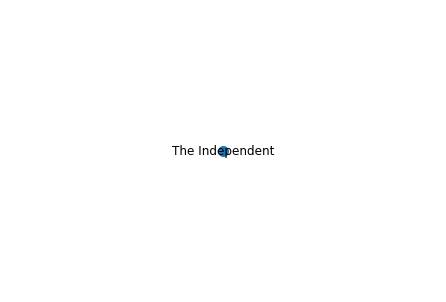

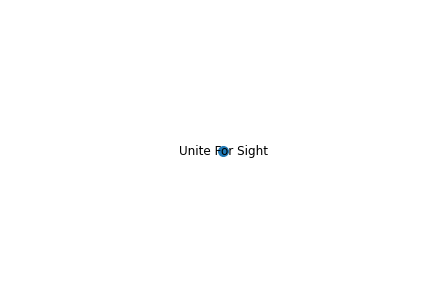

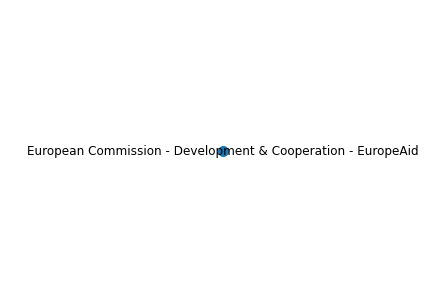

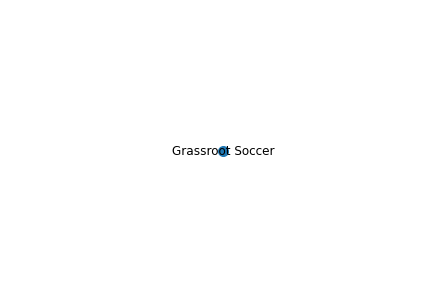

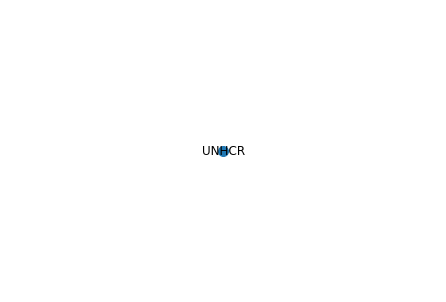

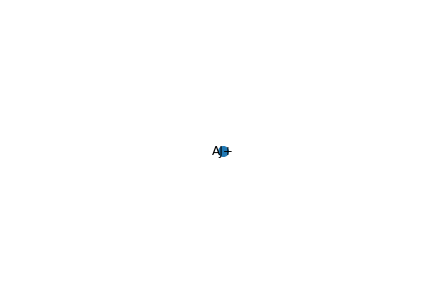

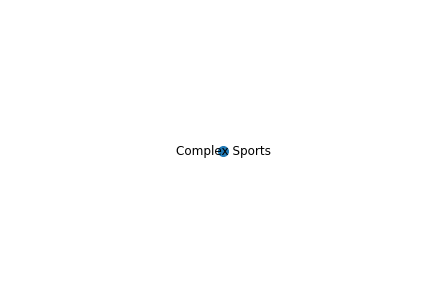

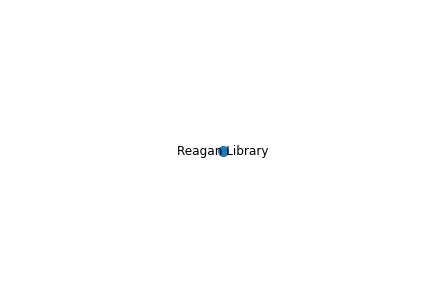

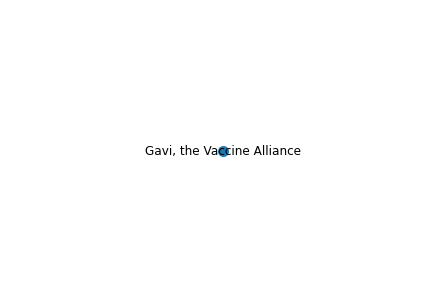

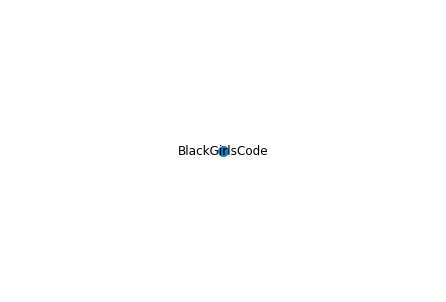

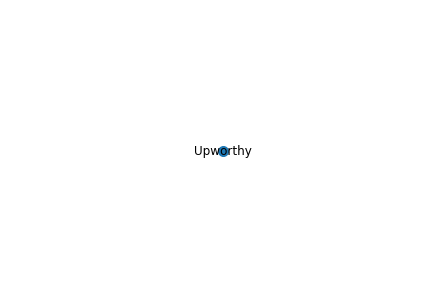

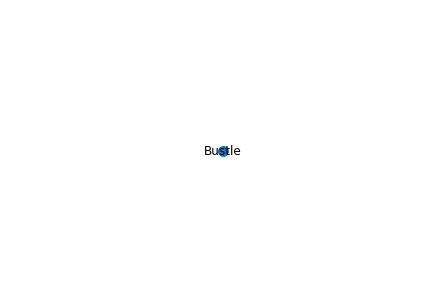

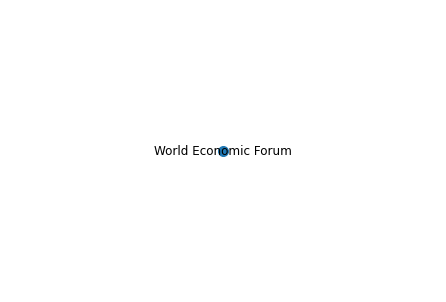

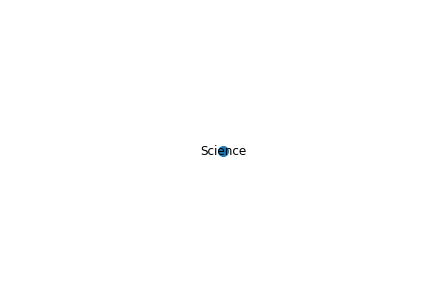

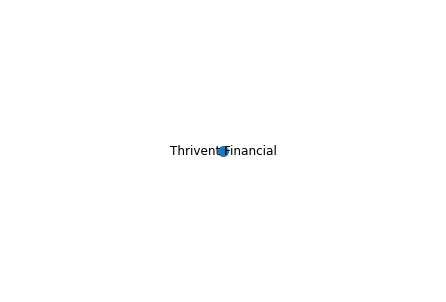

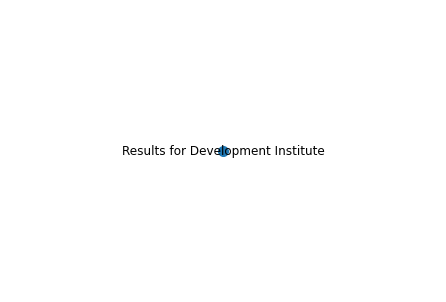

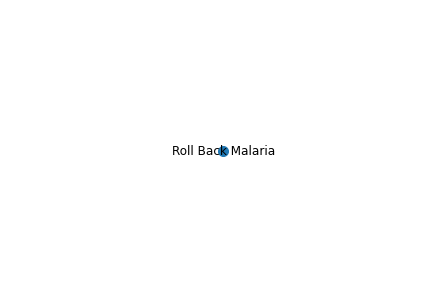

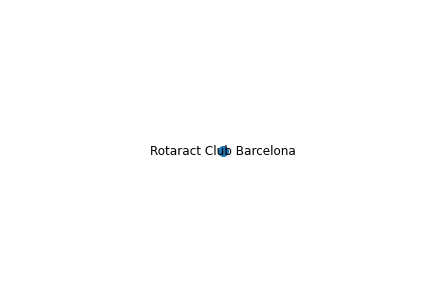

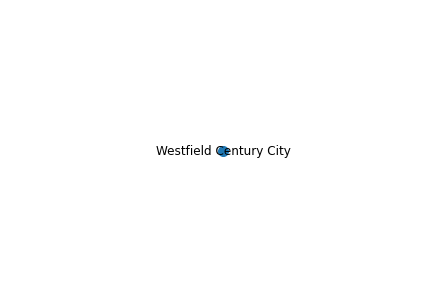

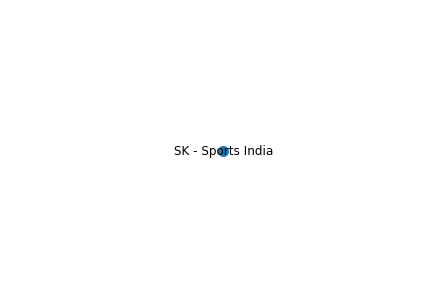

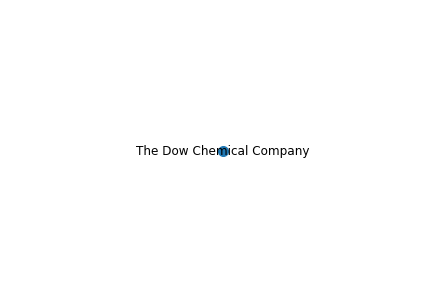

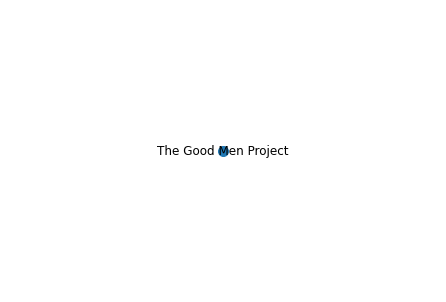

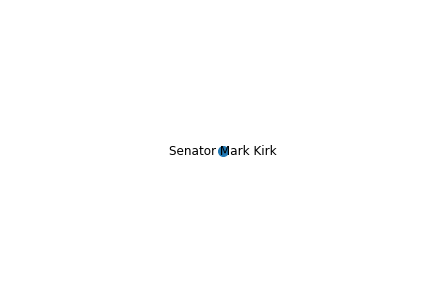

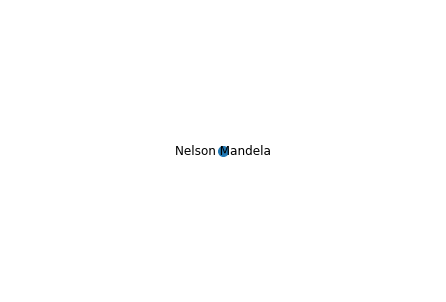

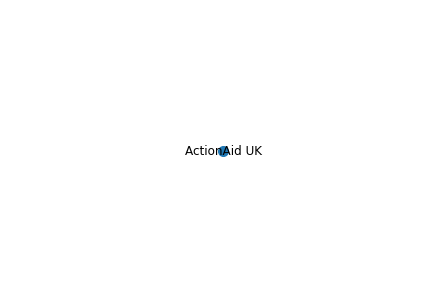

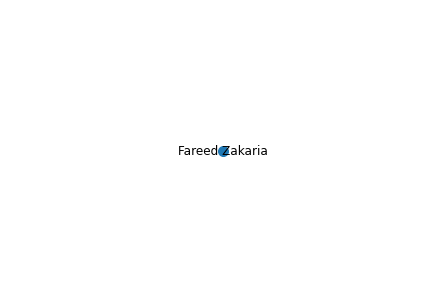

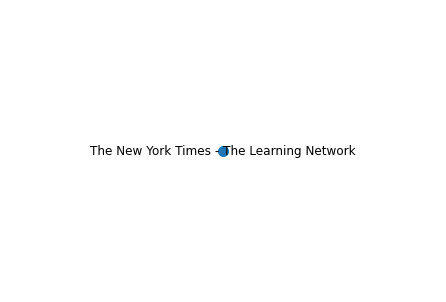

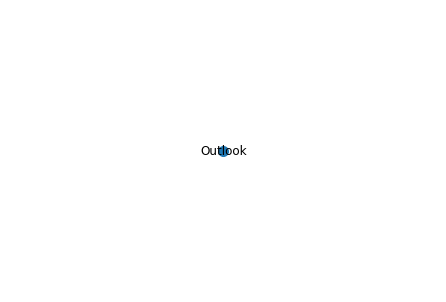

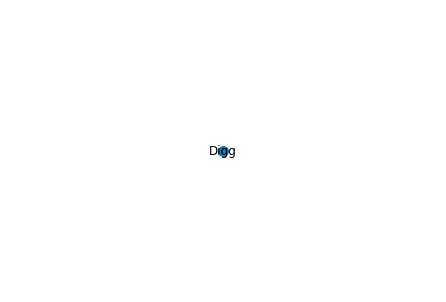

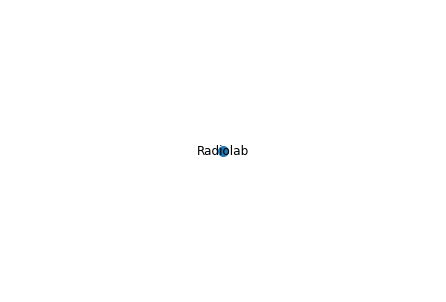

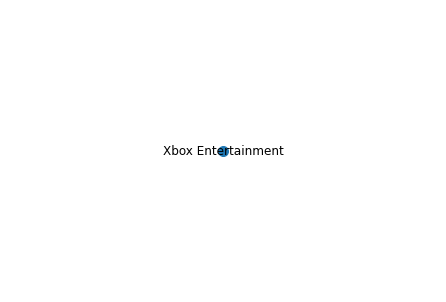

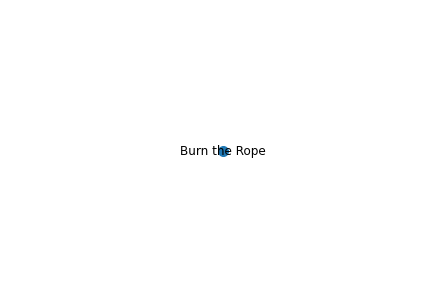

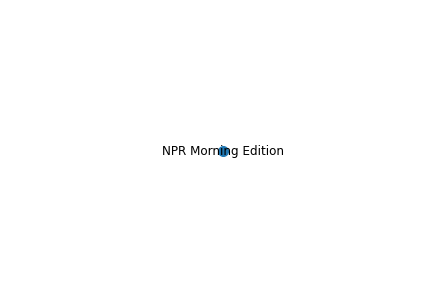

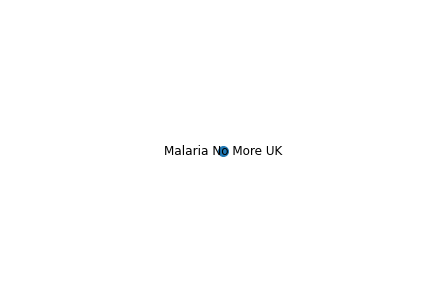

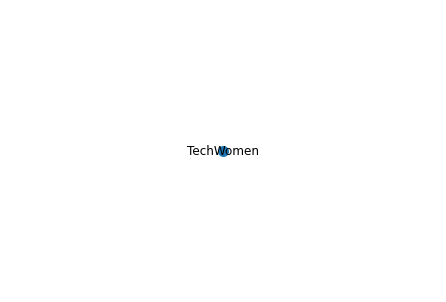

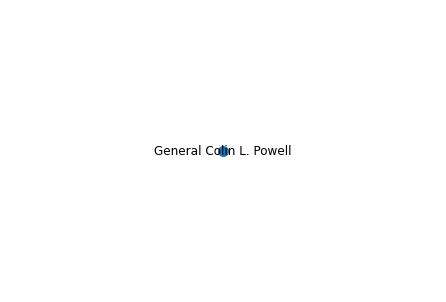

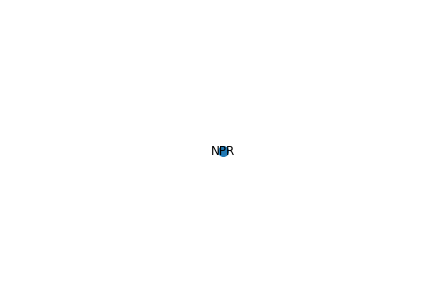

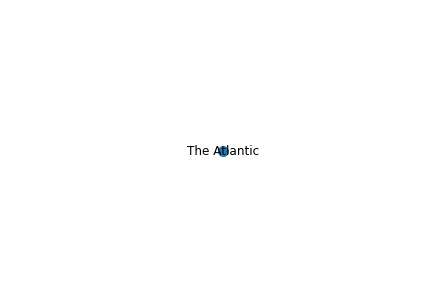

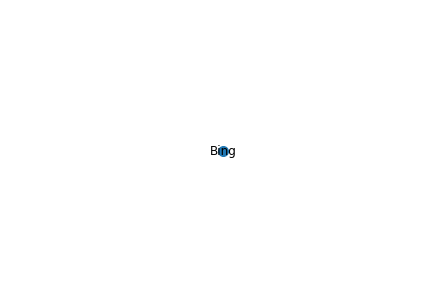

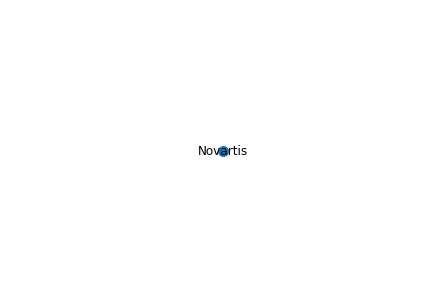

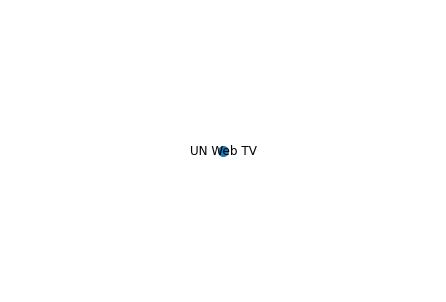

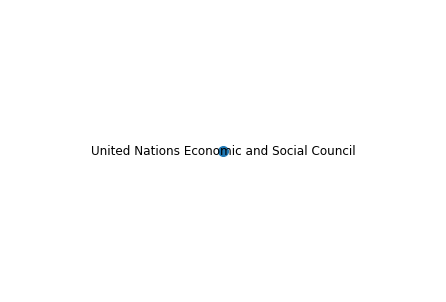

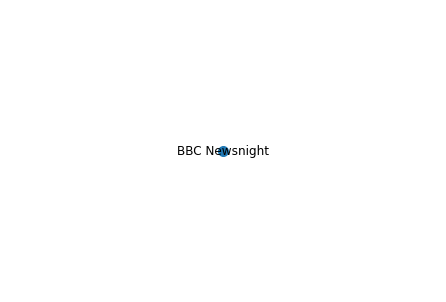

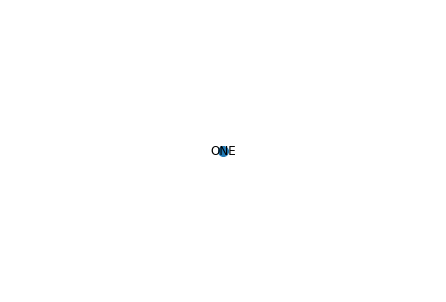

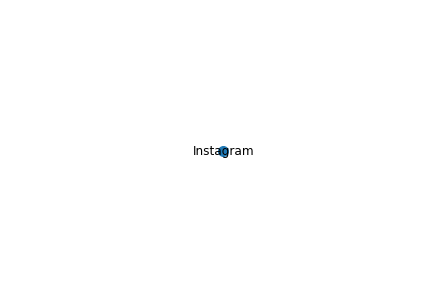

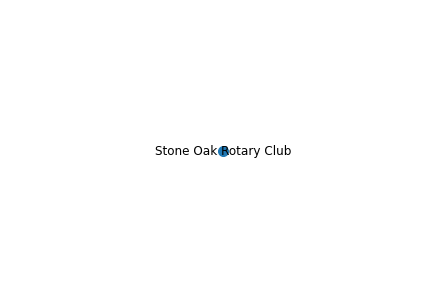

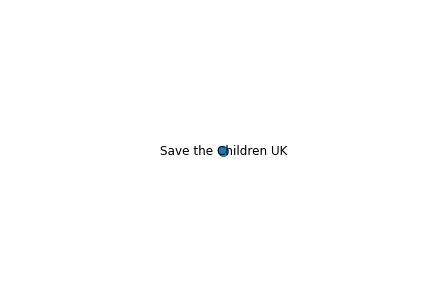

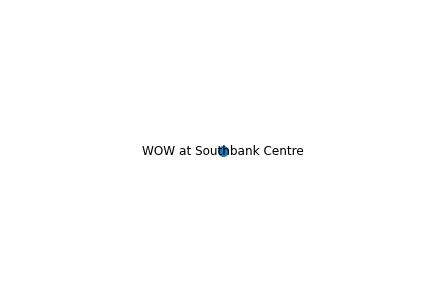

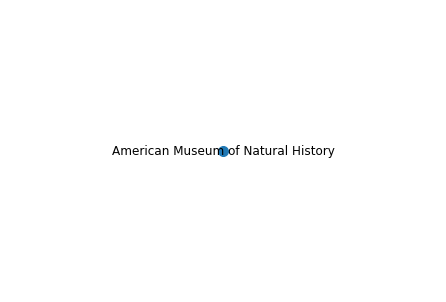

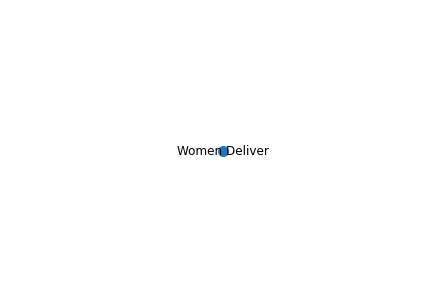

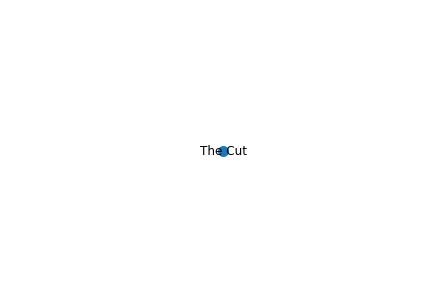

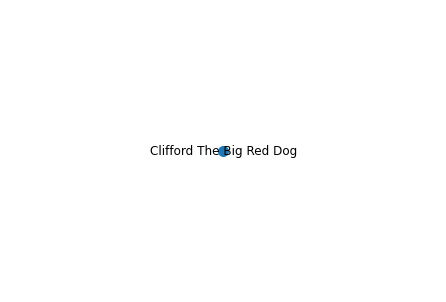

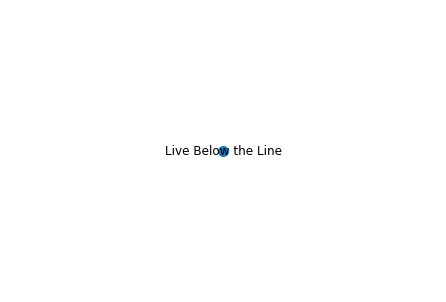

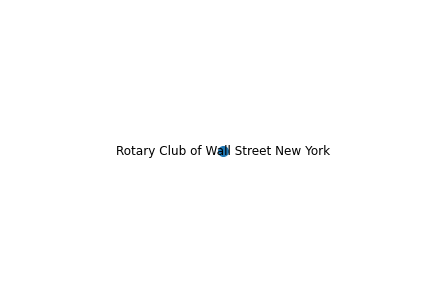

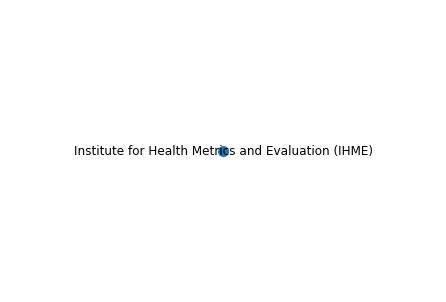

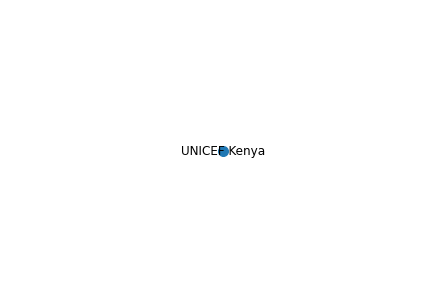

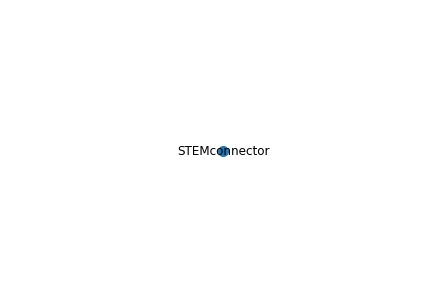

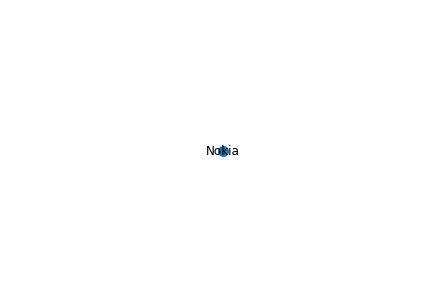

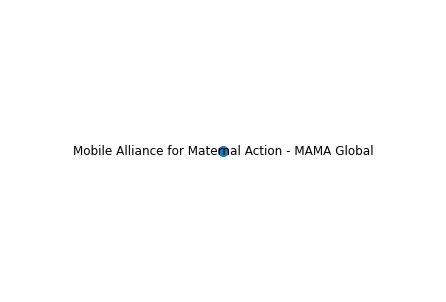

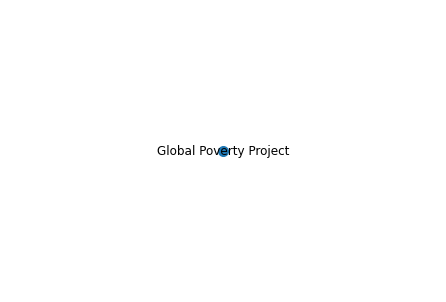

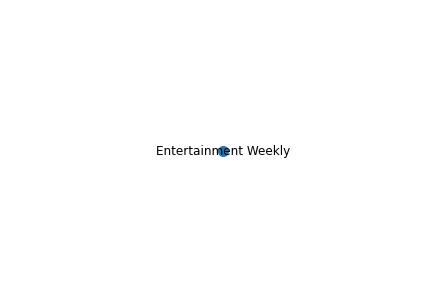

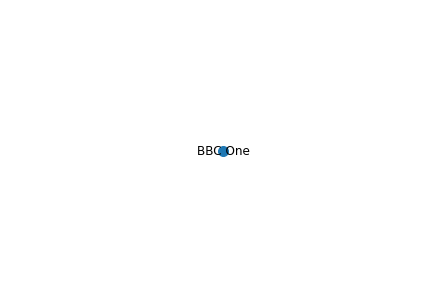

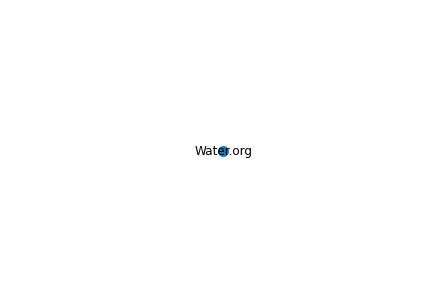

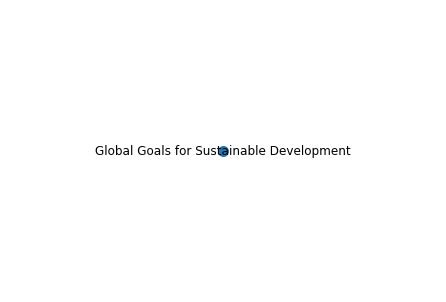

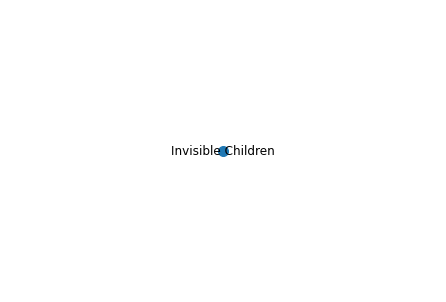

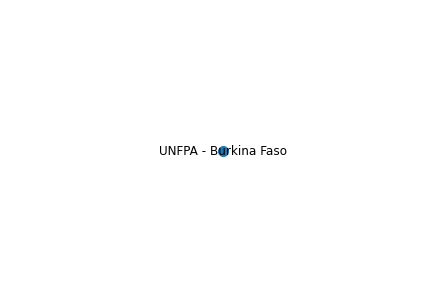

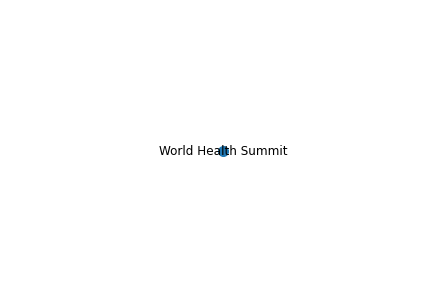

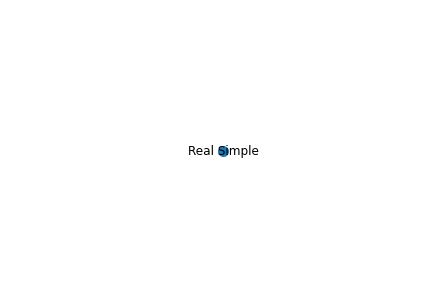

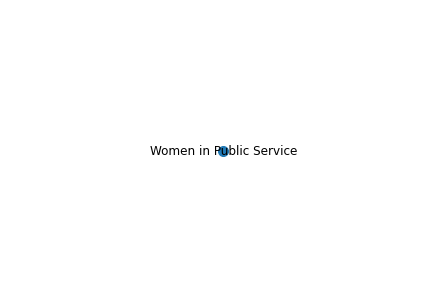

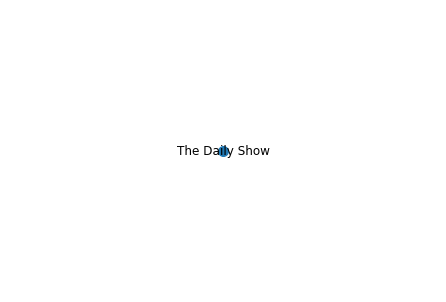

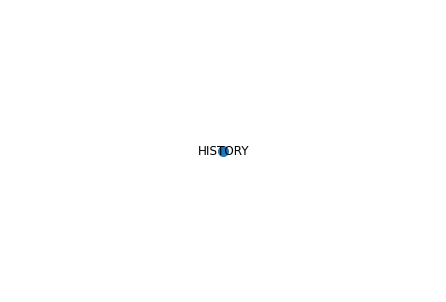

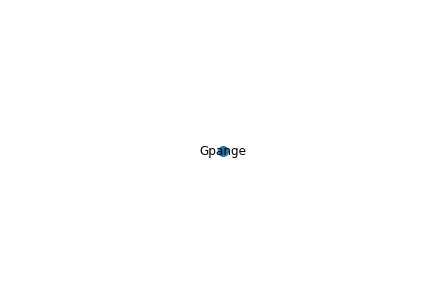

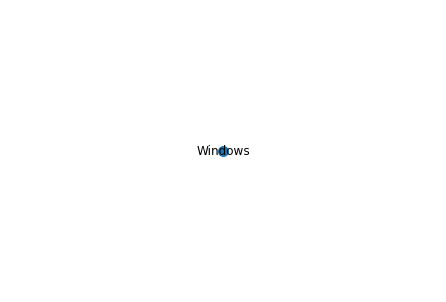

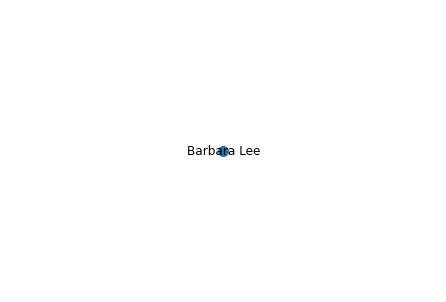

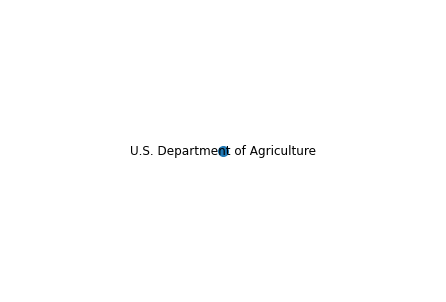

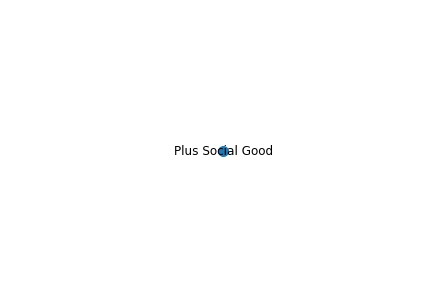

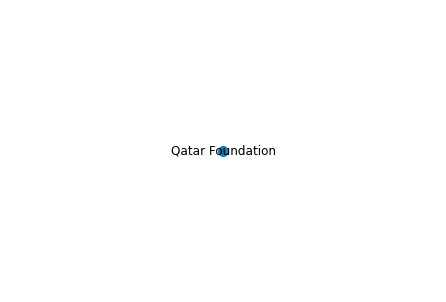

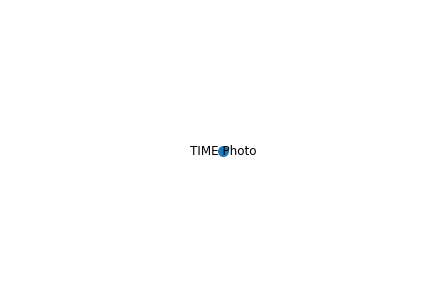

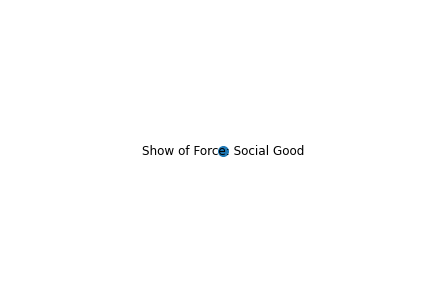

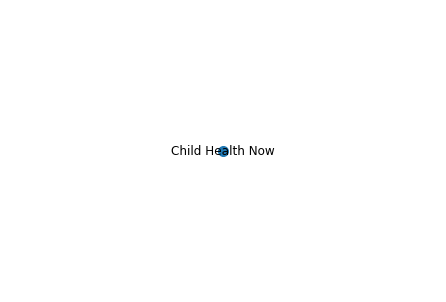

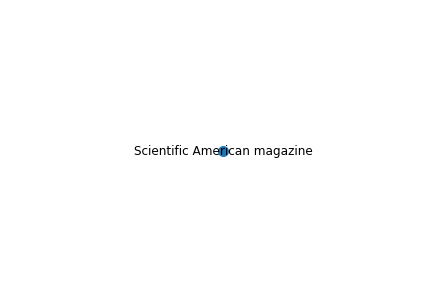

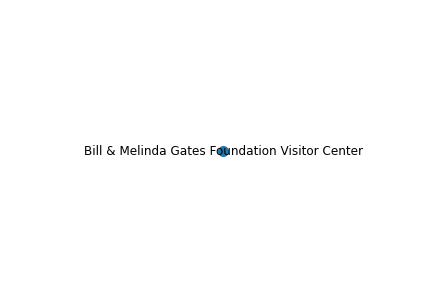

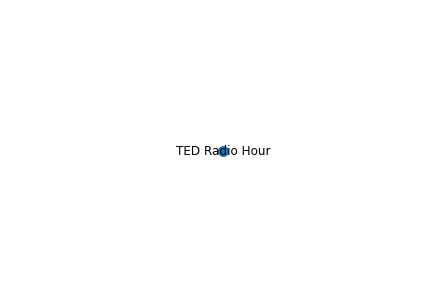

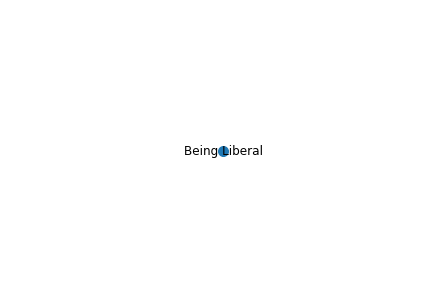

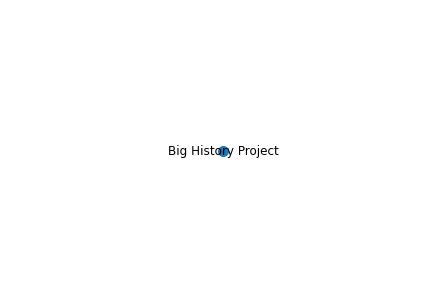

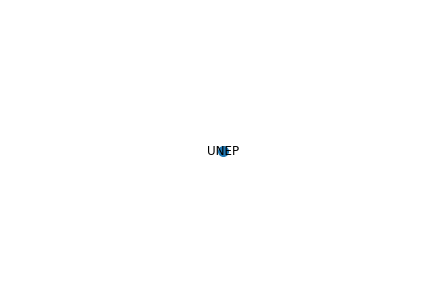

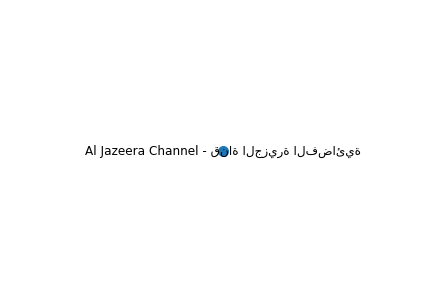

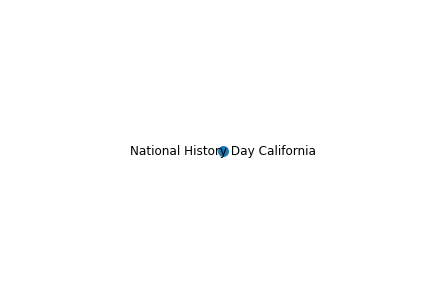

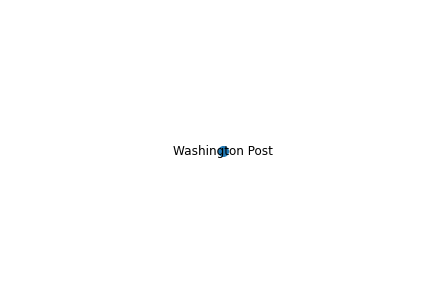

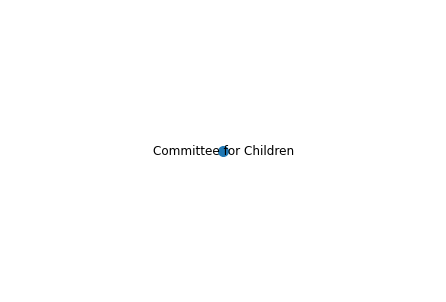

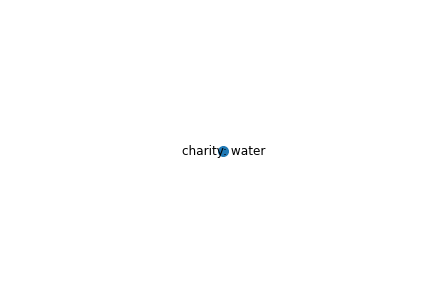

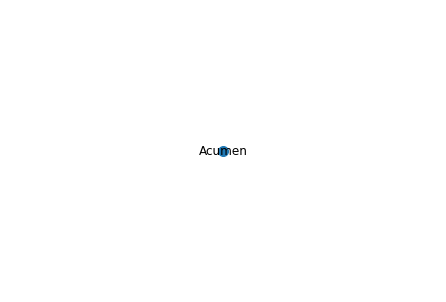

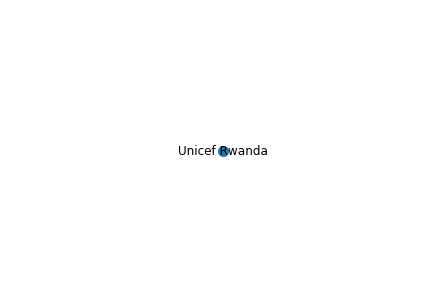

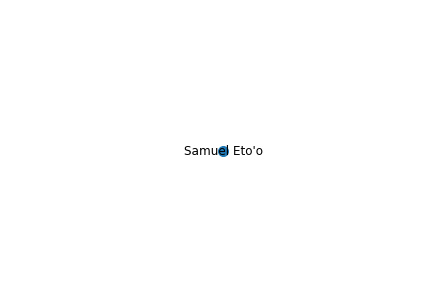

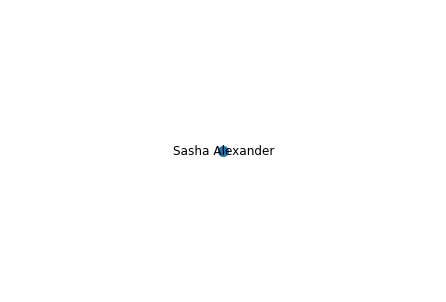

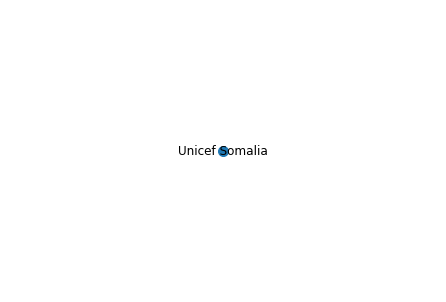

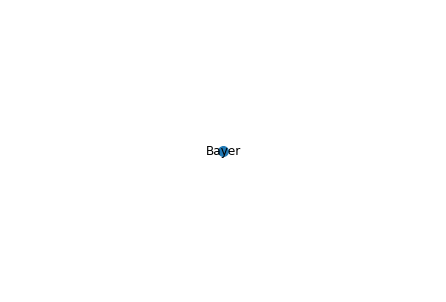

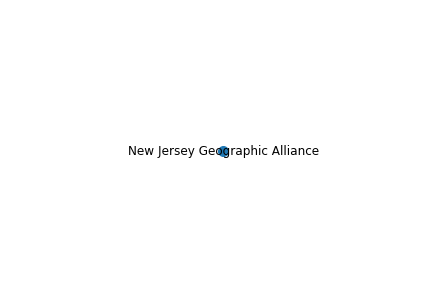

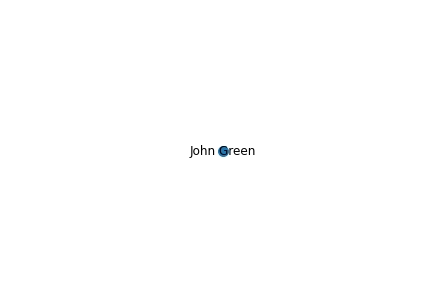

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36001 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22243 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from c

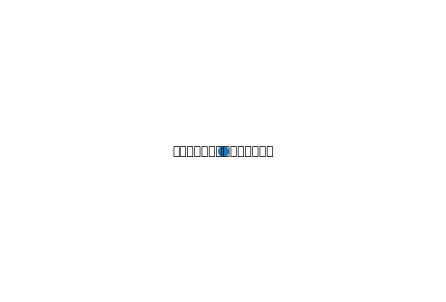

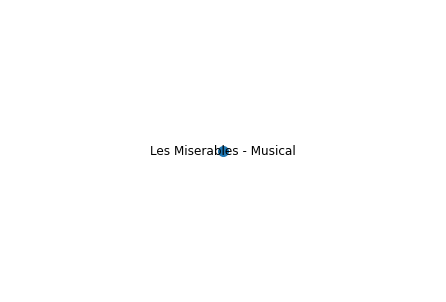

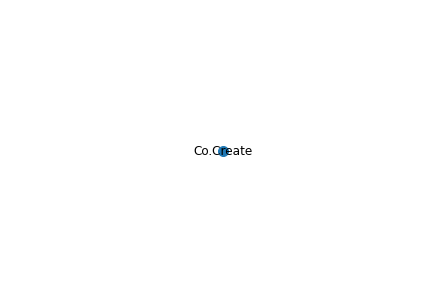

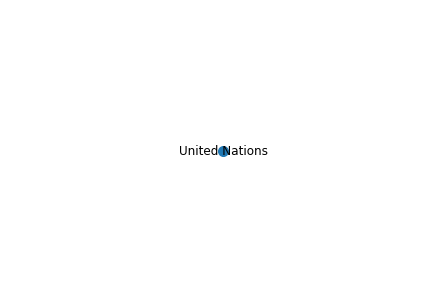

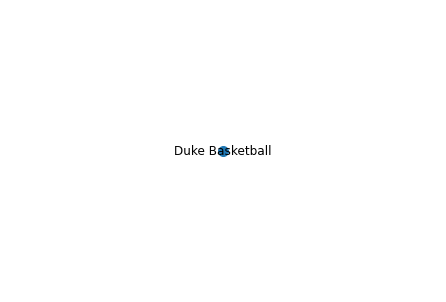

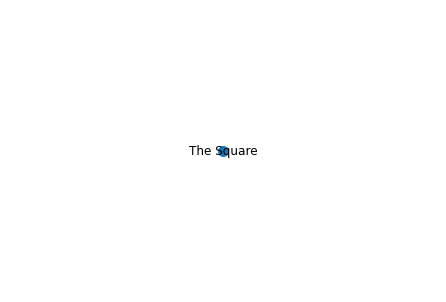

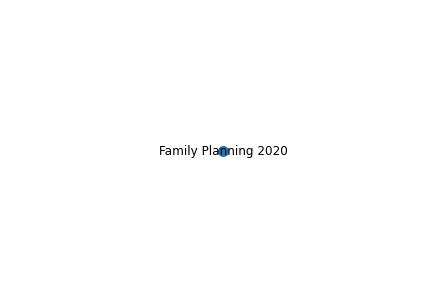

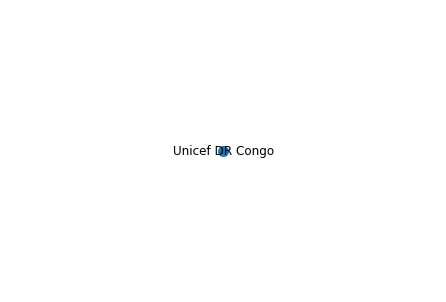

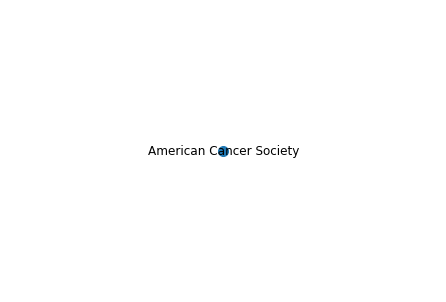

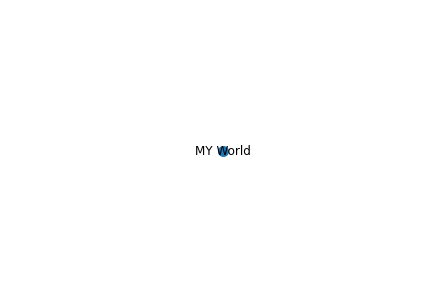

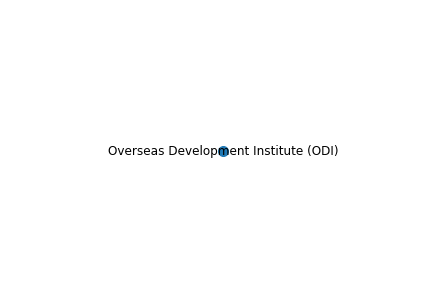

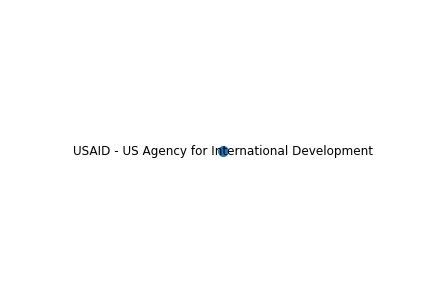

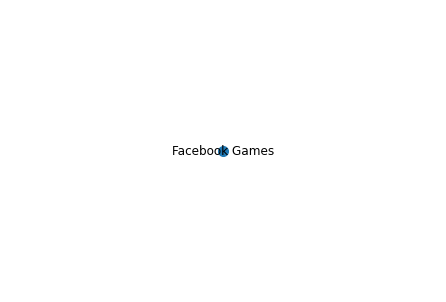

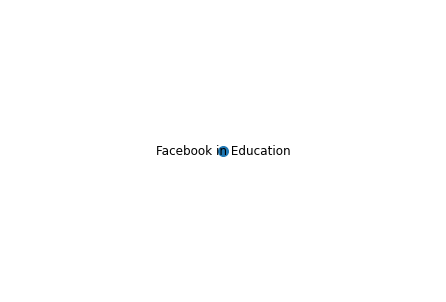

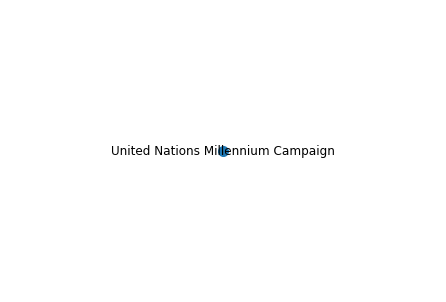

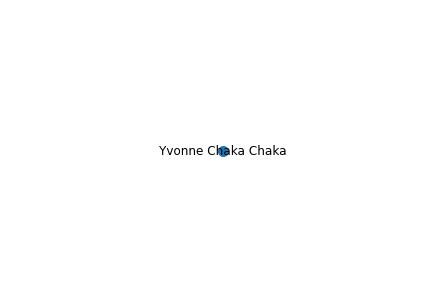

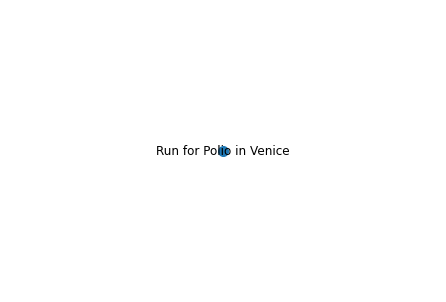

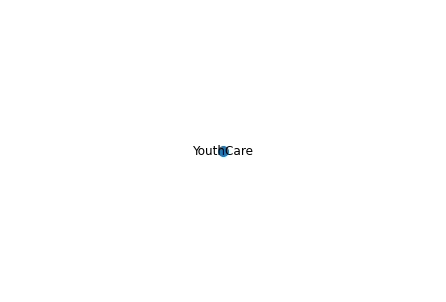

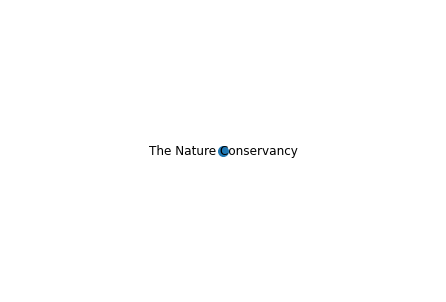

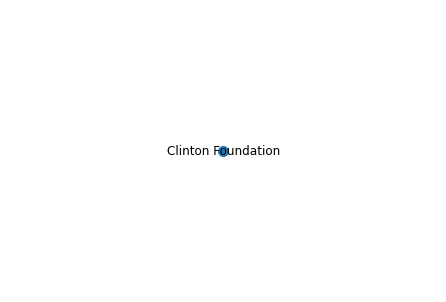

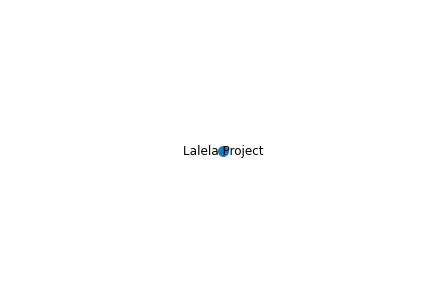

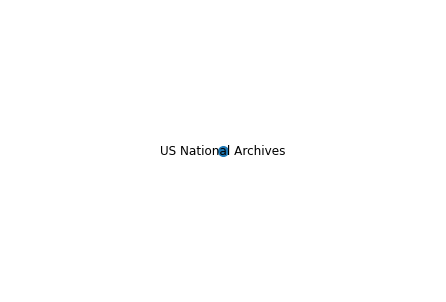

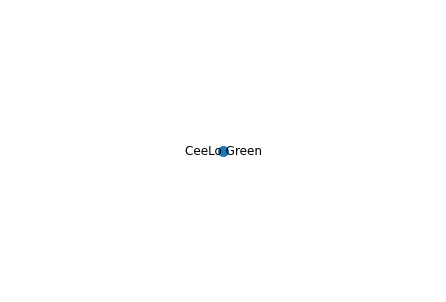

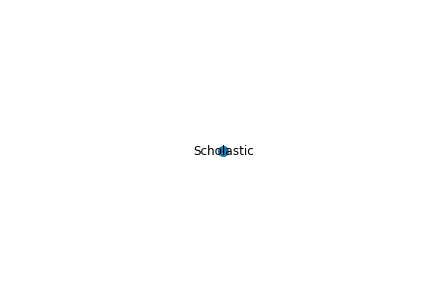

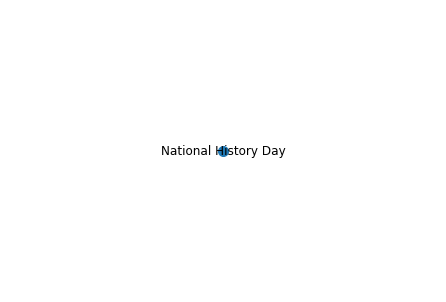

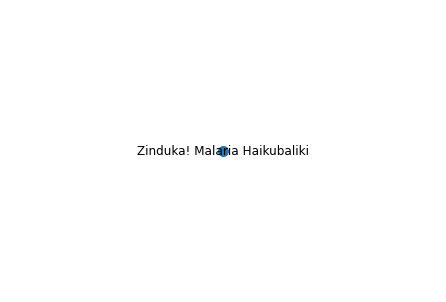

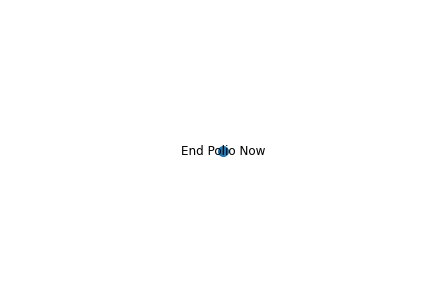

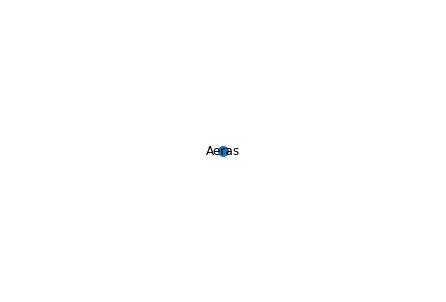

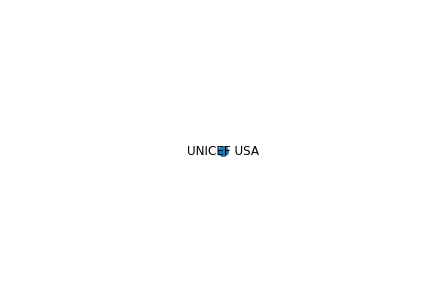

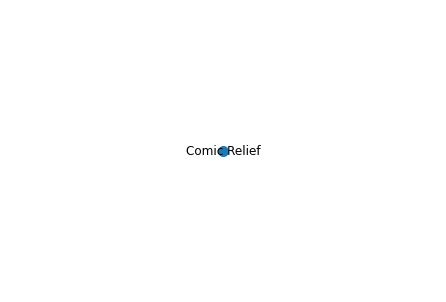

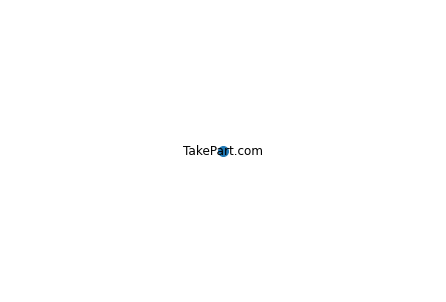

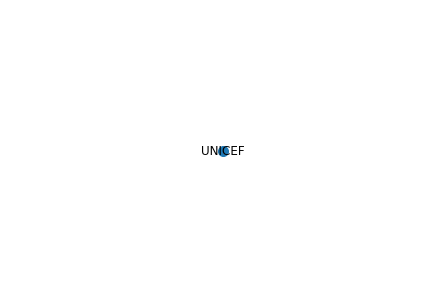

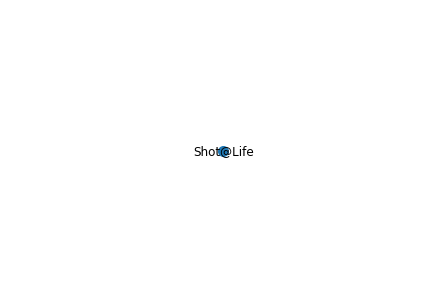

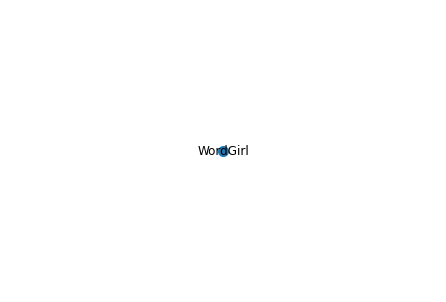

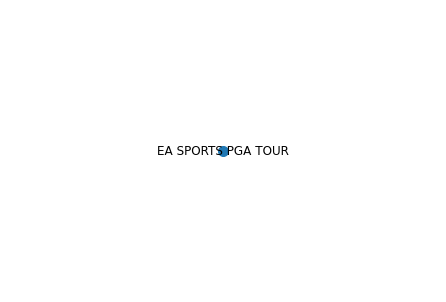

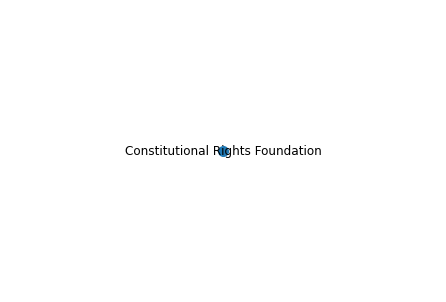

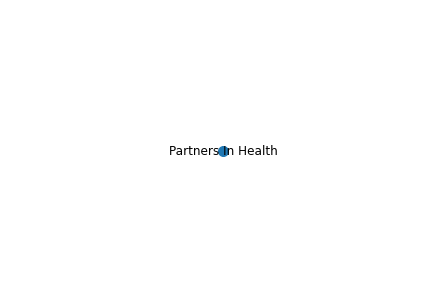

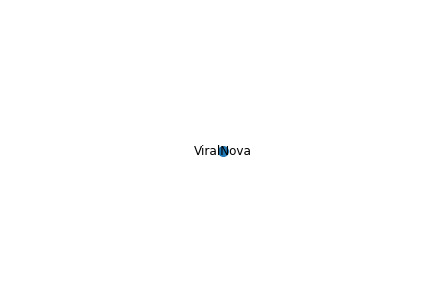

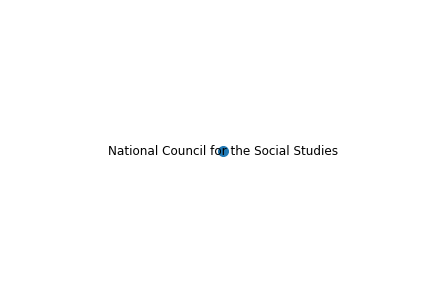

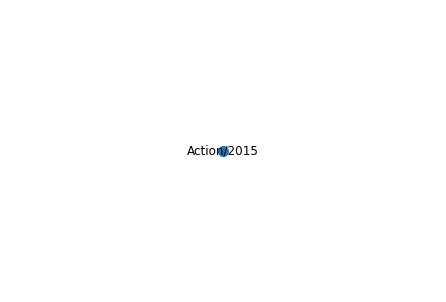

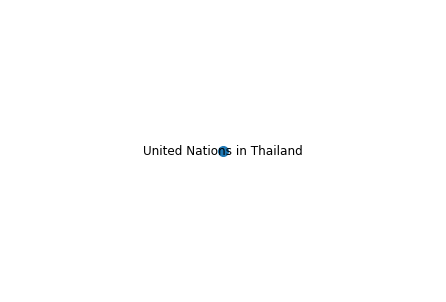

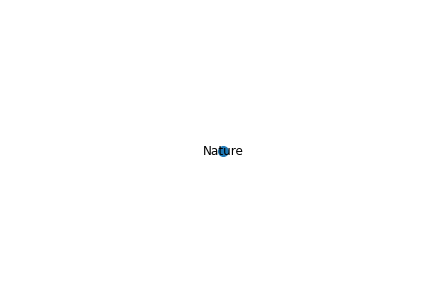

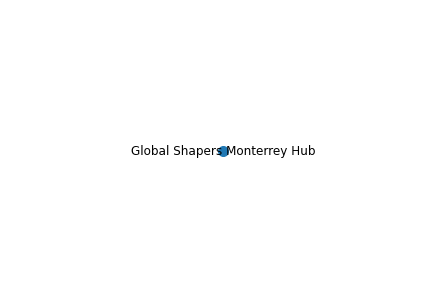

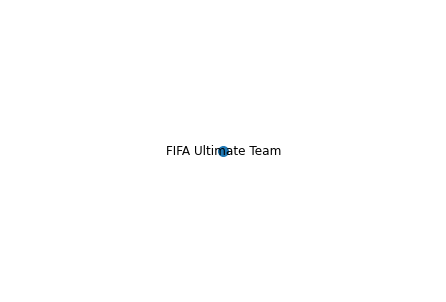

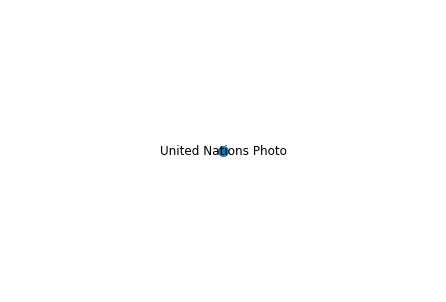

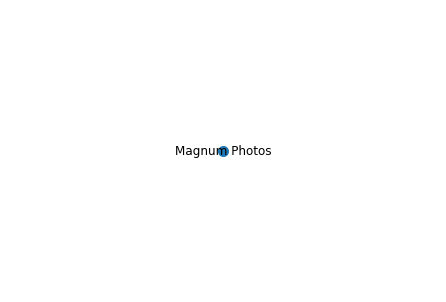

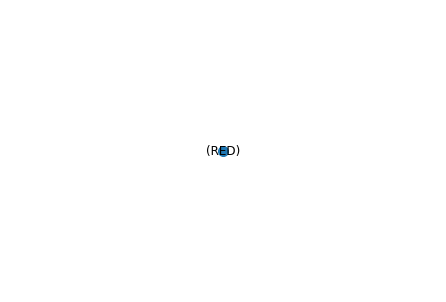

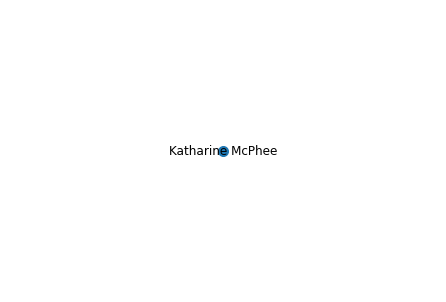

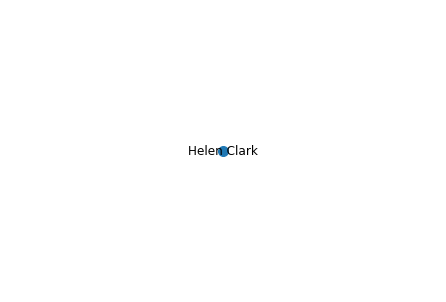

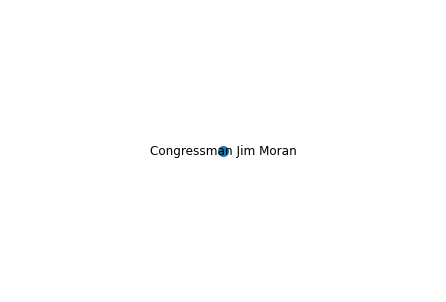

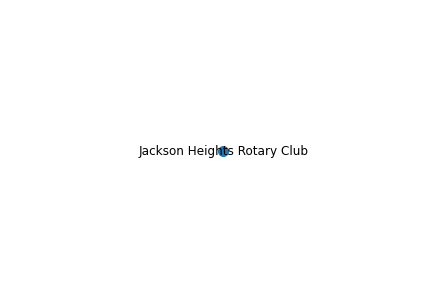

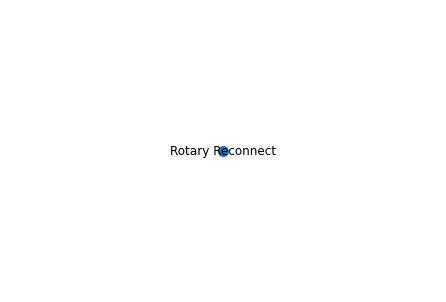

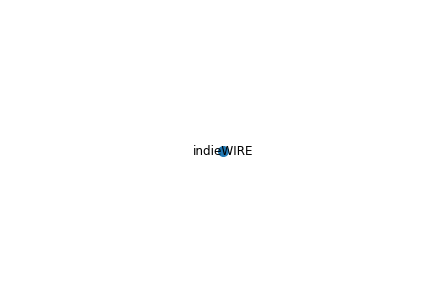

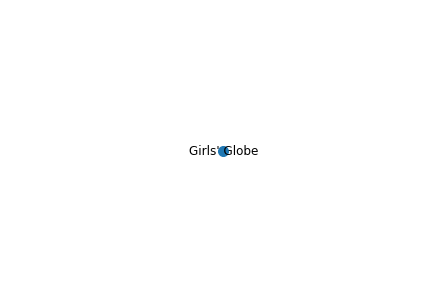

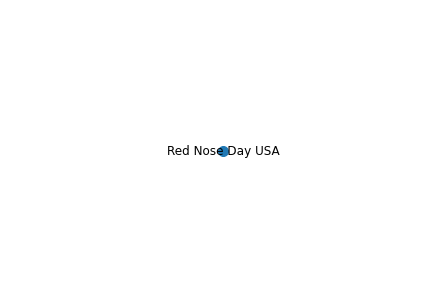

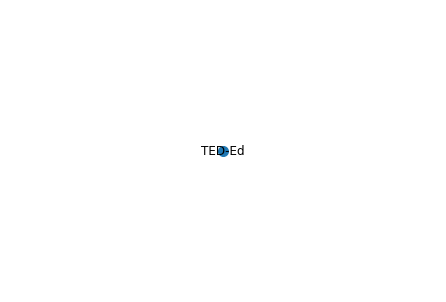

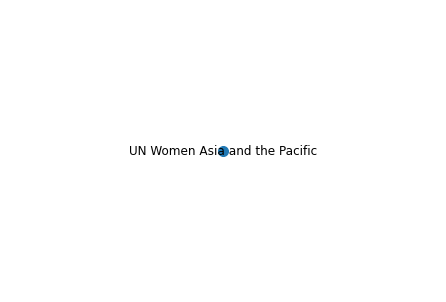

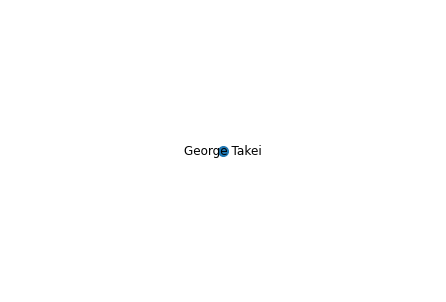

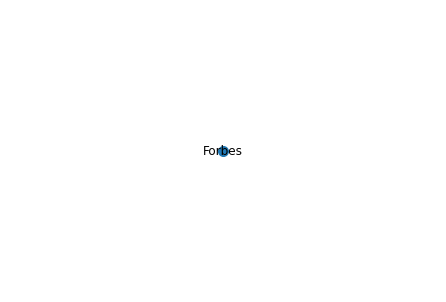

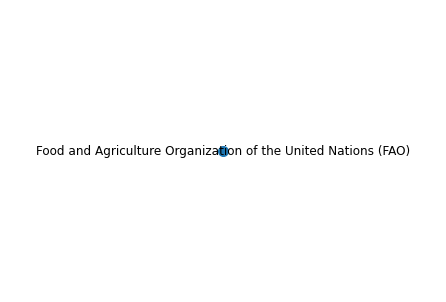

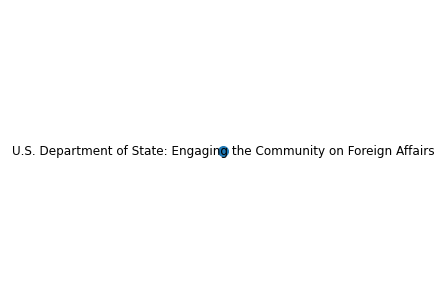

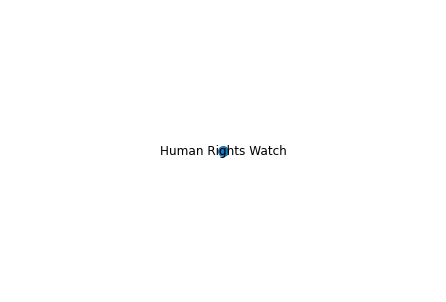

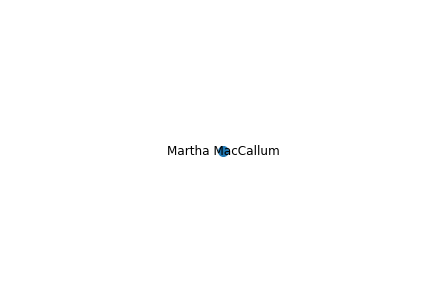

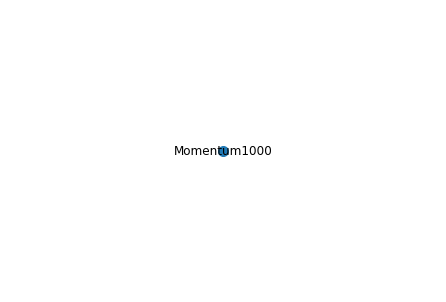

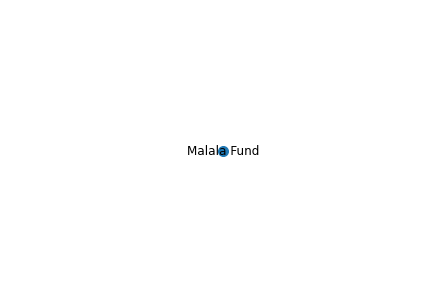

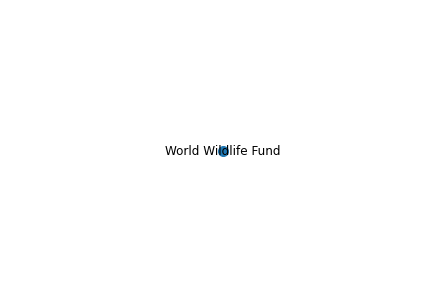

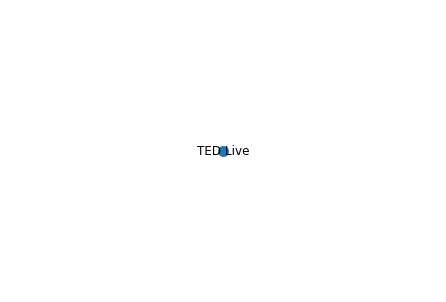

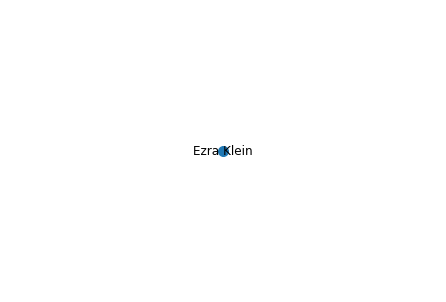

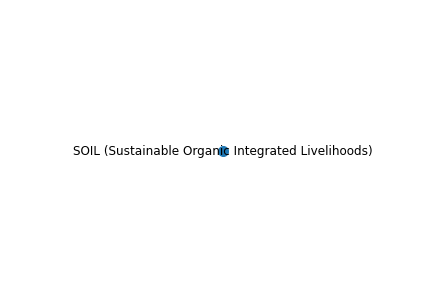

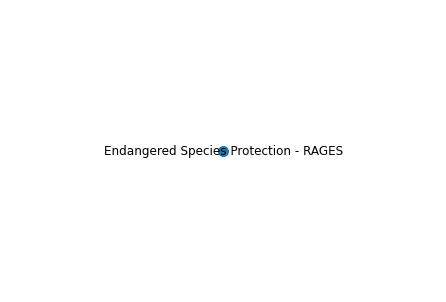

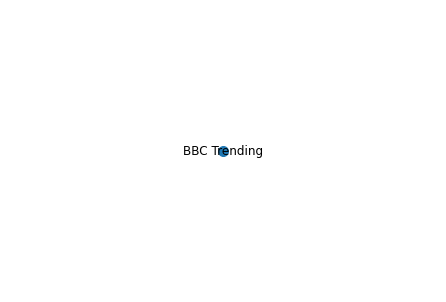

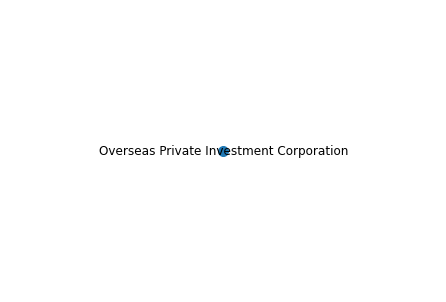

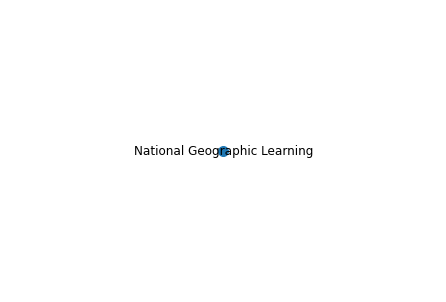

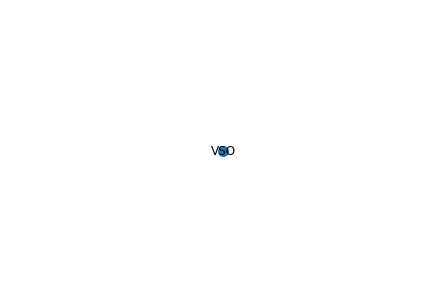

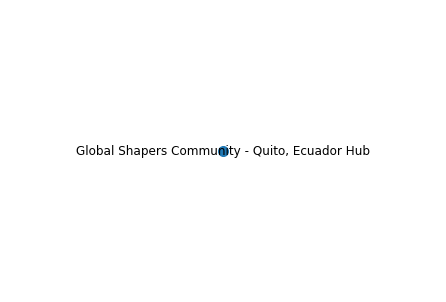

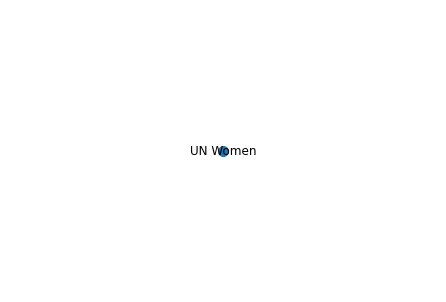

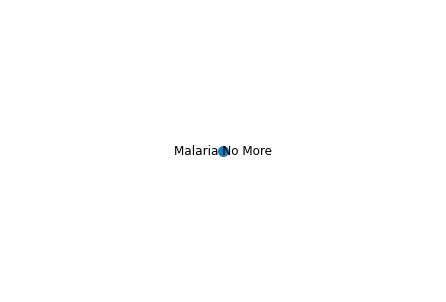

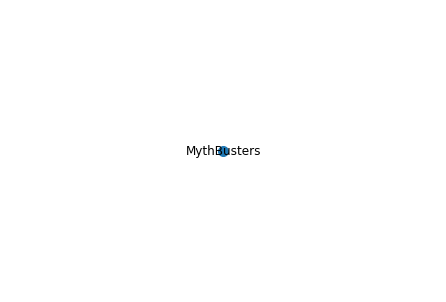

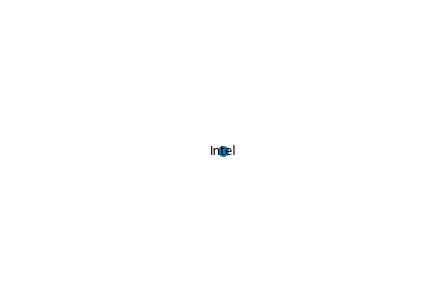

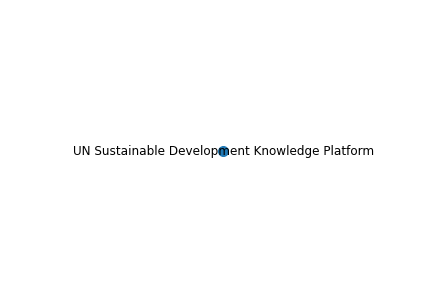

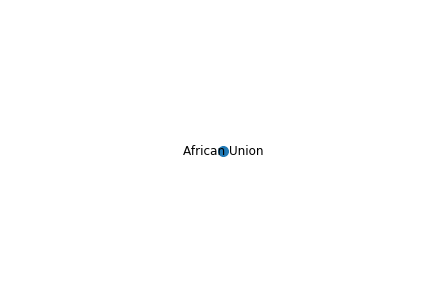

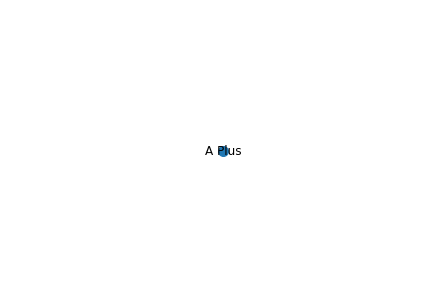

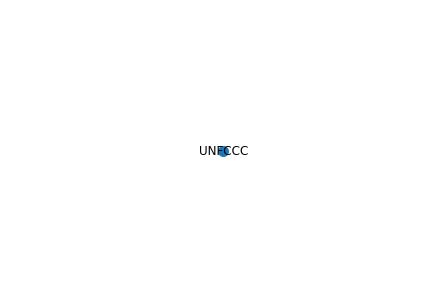

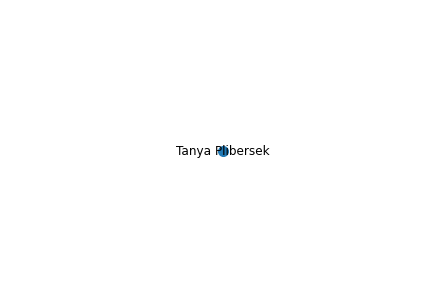

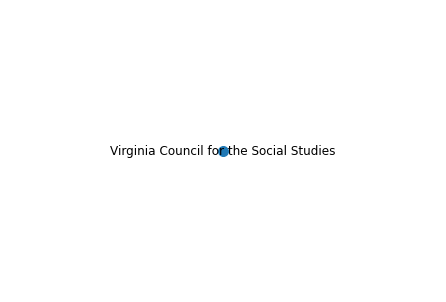

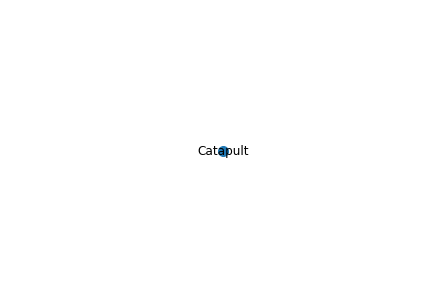

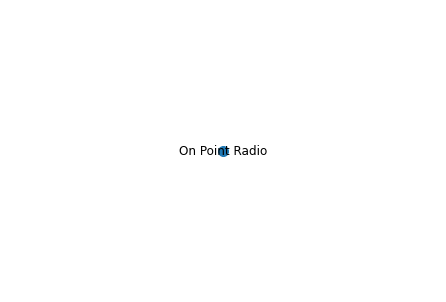

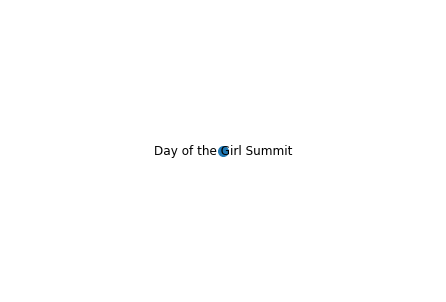

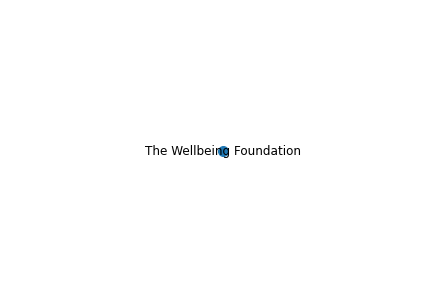

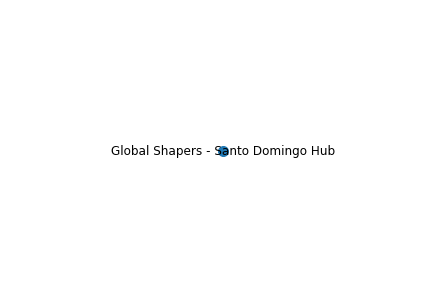

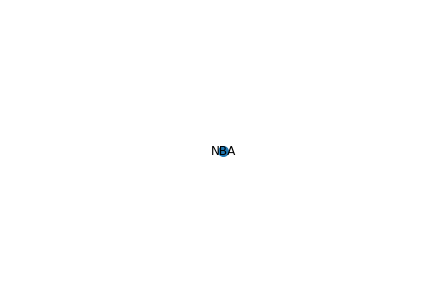

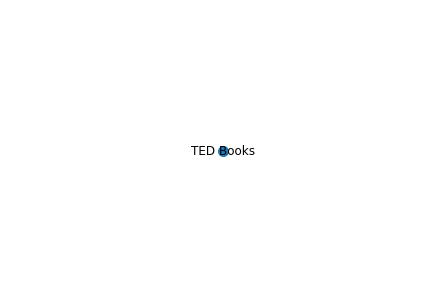

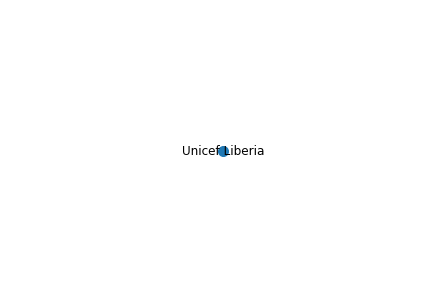

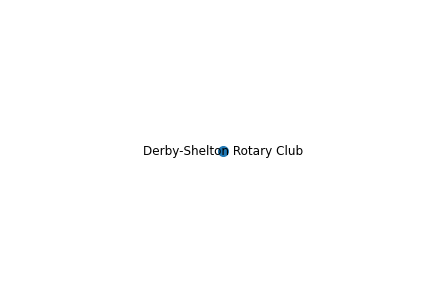

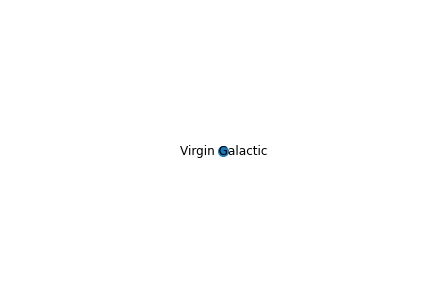

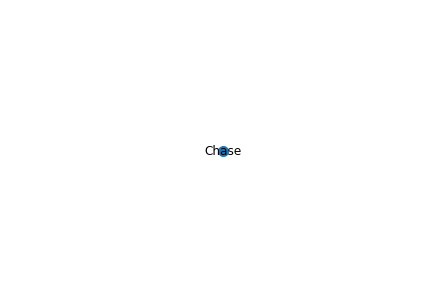

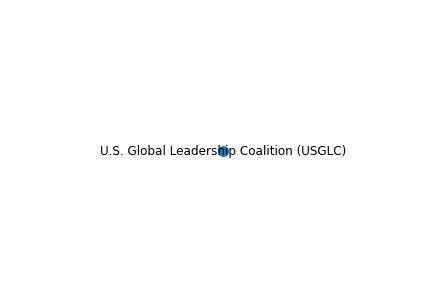

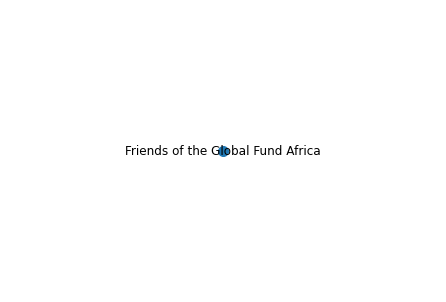

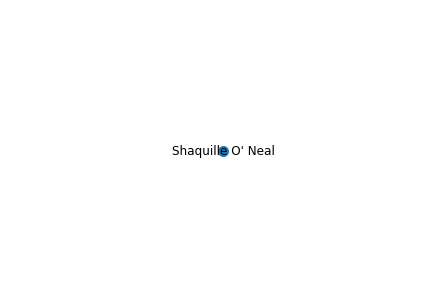

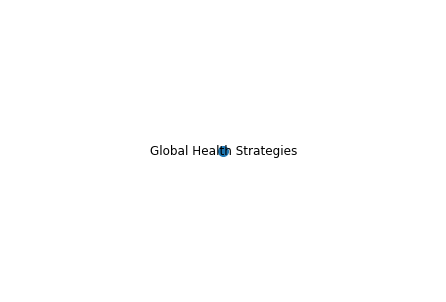

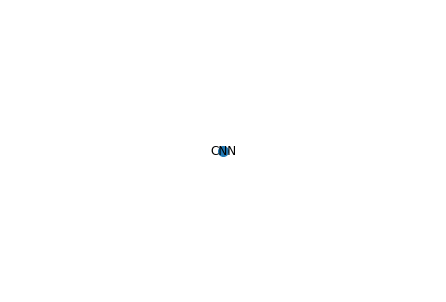

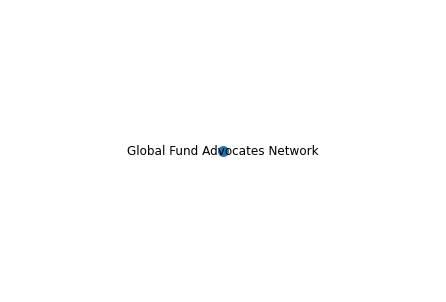

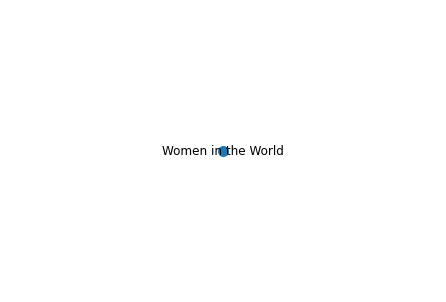

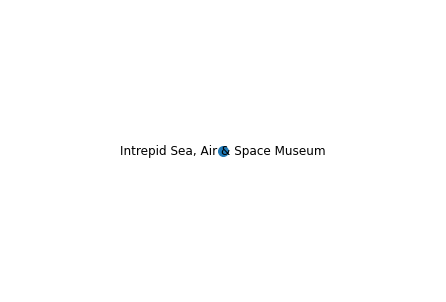

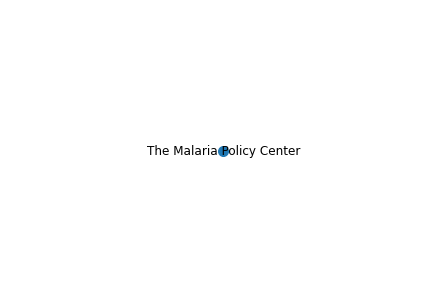

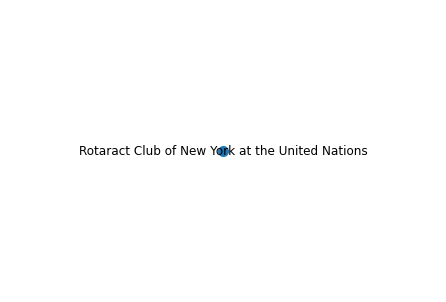

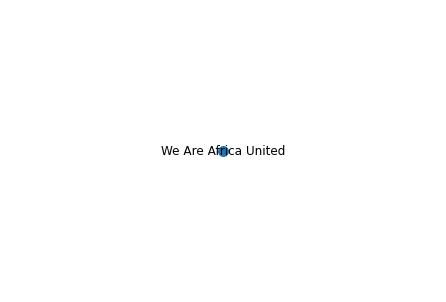

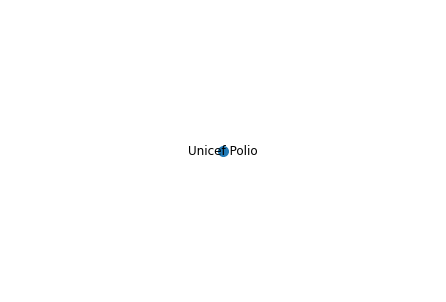

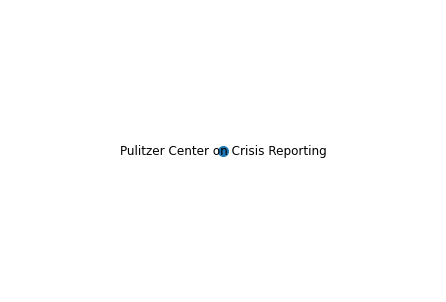

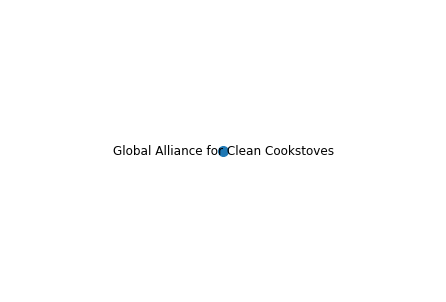

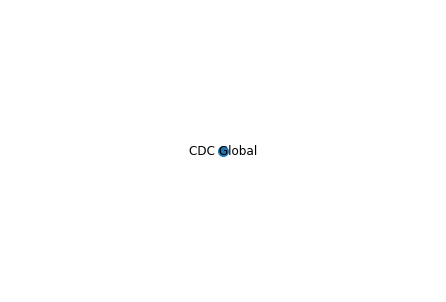

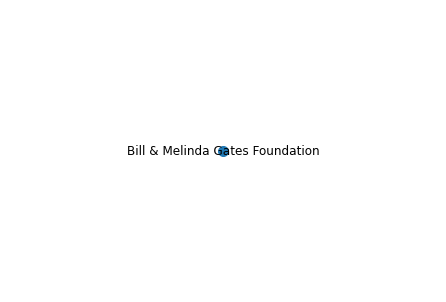

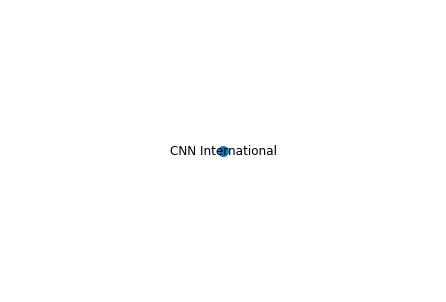

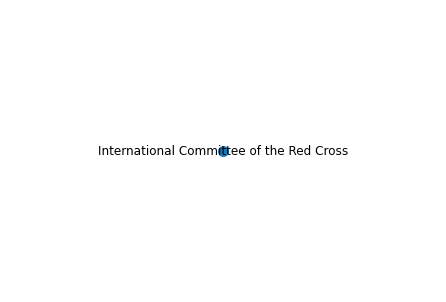

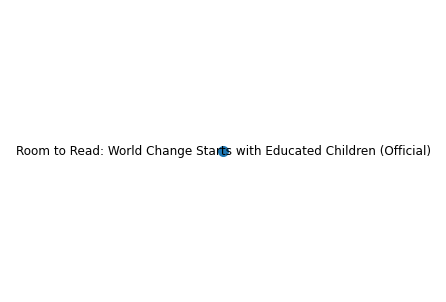

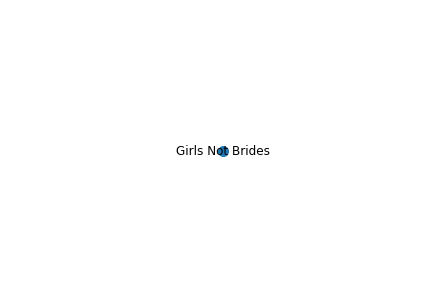

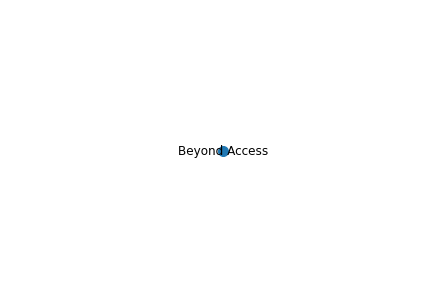

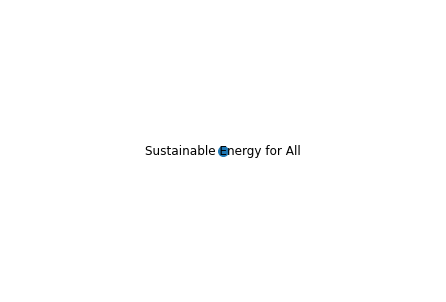

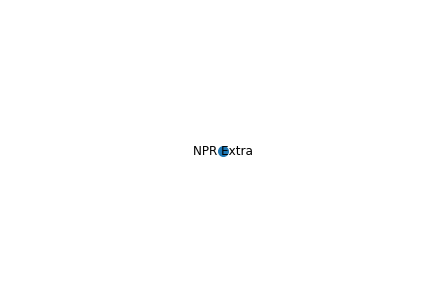

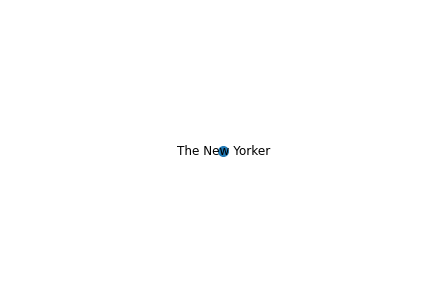

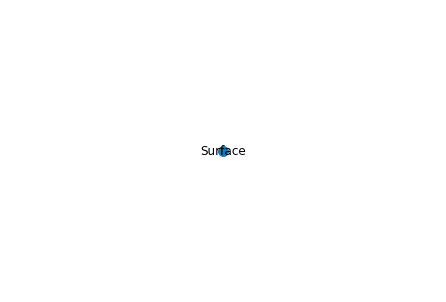

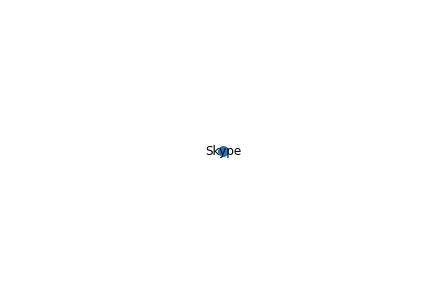

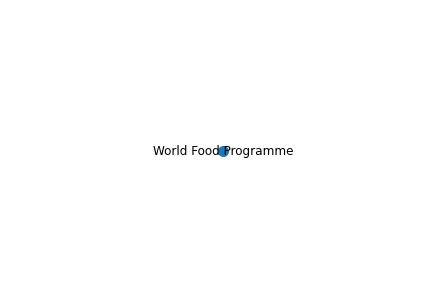

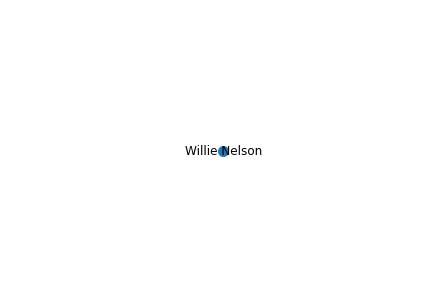

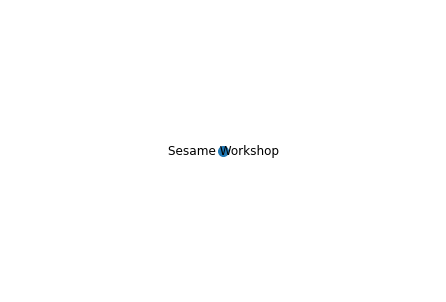

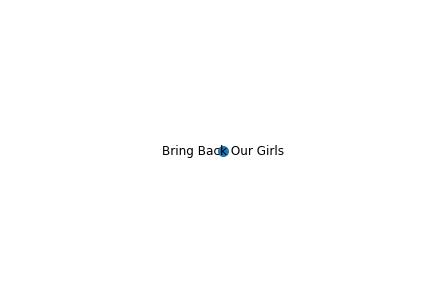

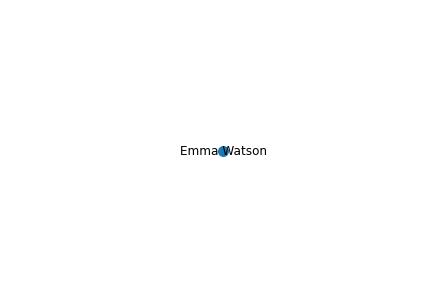

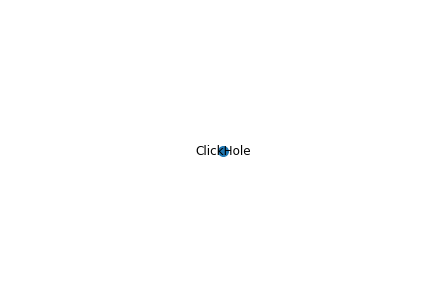

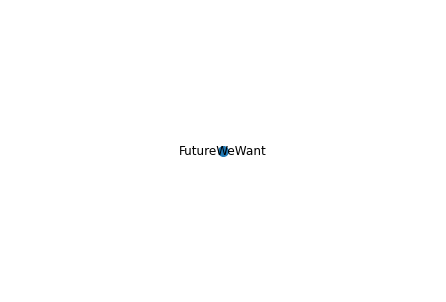

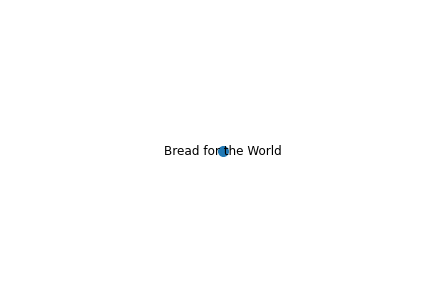

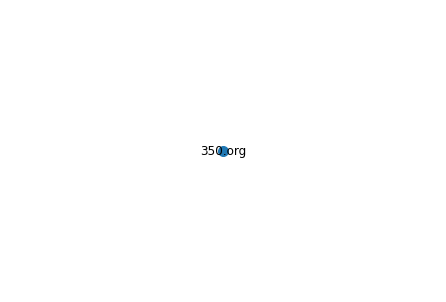

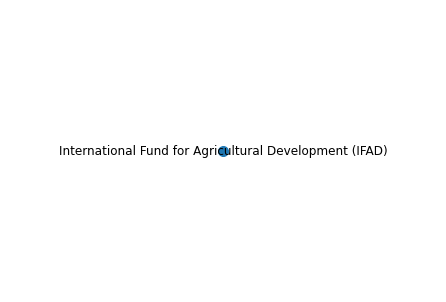

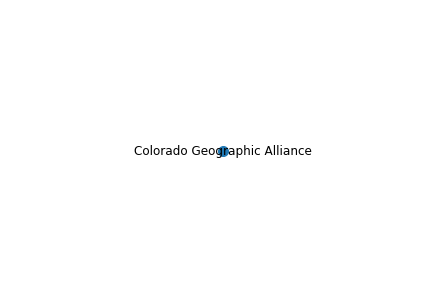

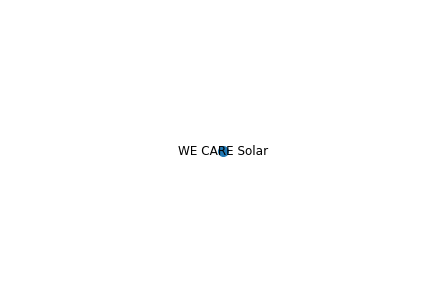

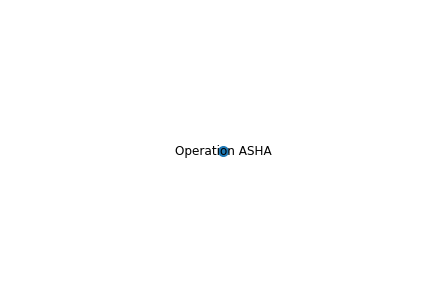

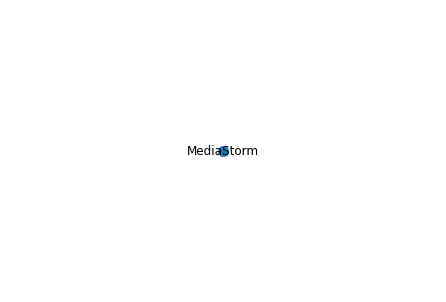

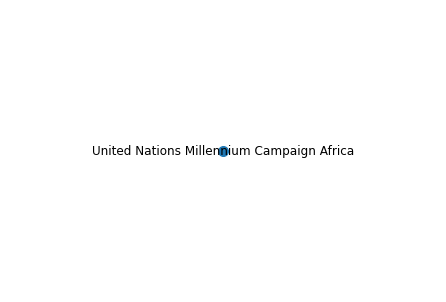

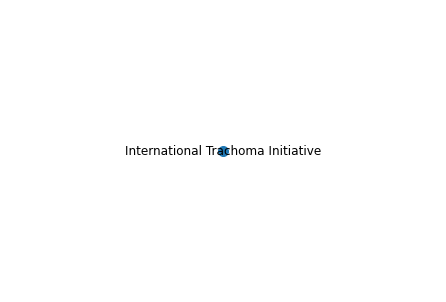

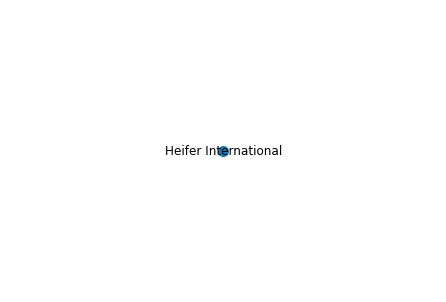

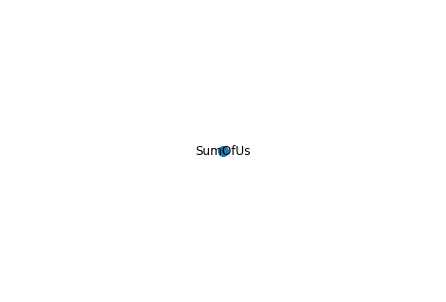

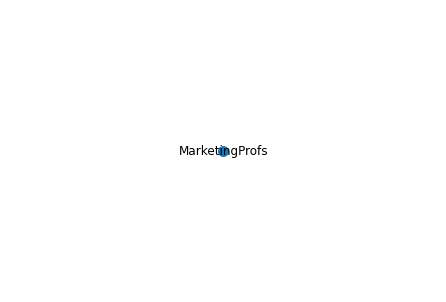

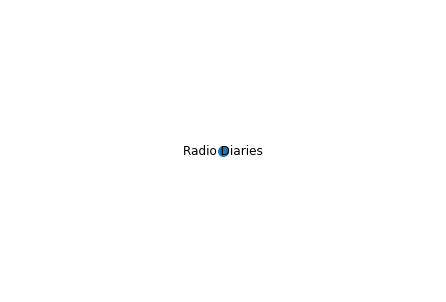

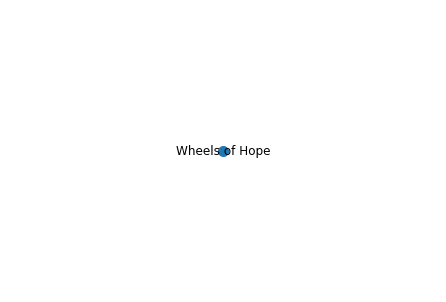

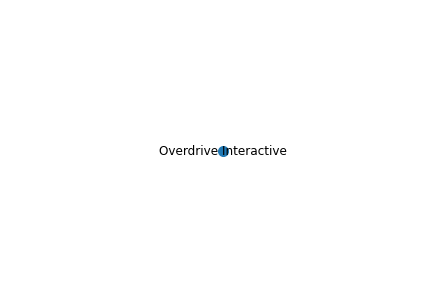

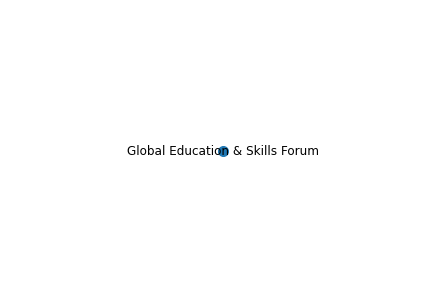

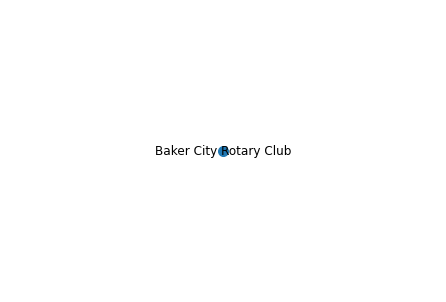

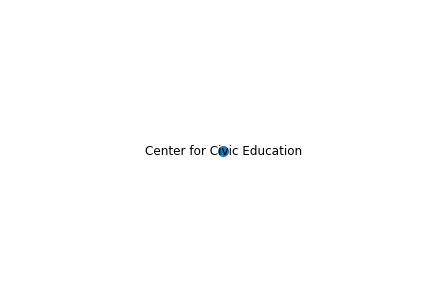

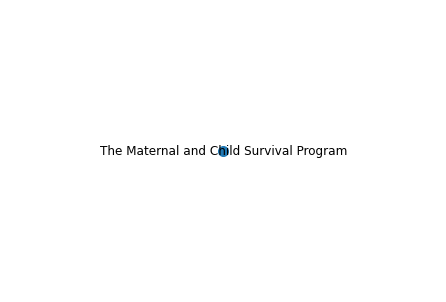

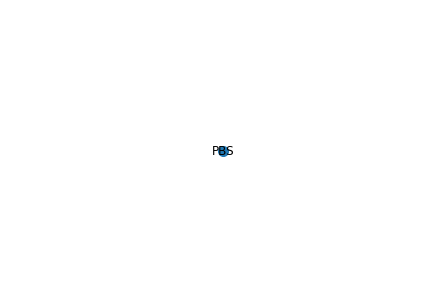

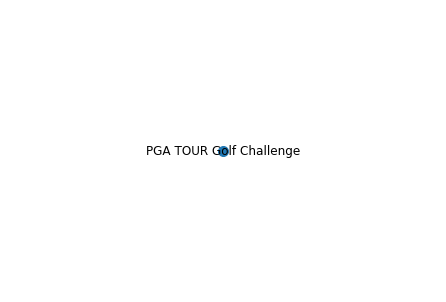

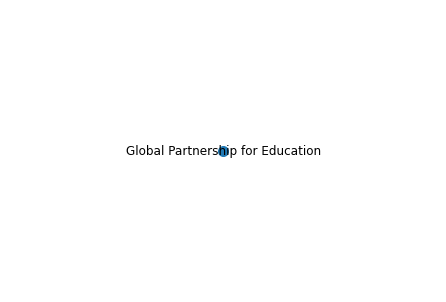

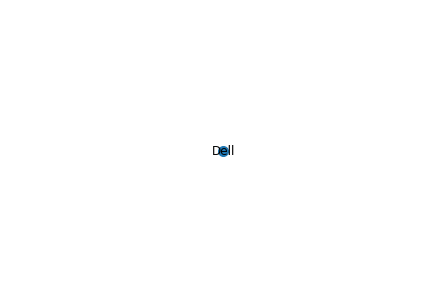

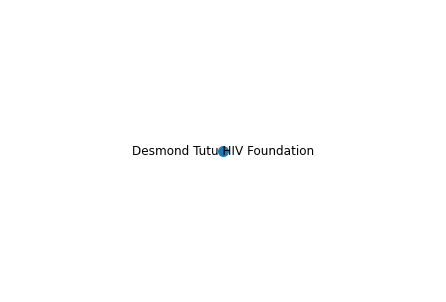

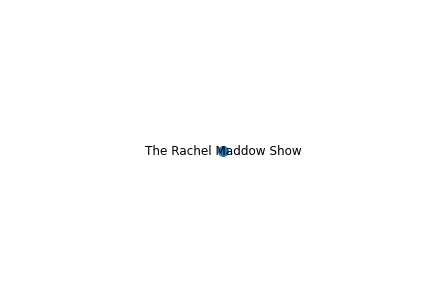

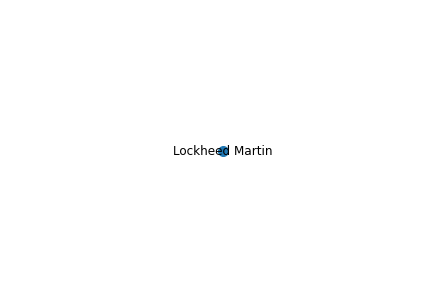

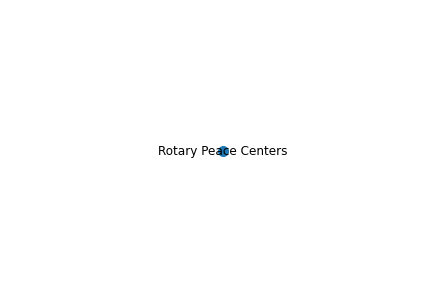

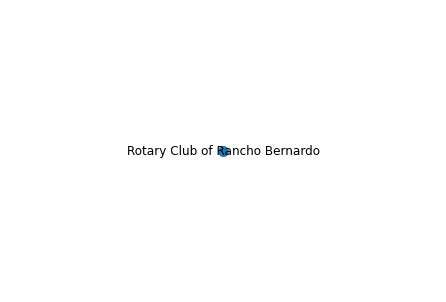

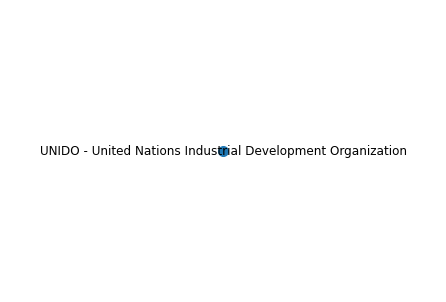

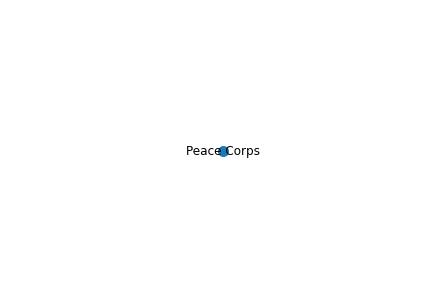

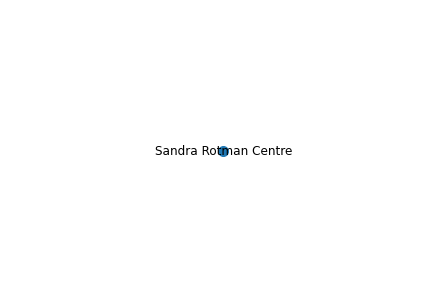

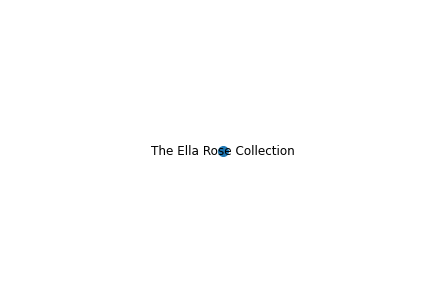

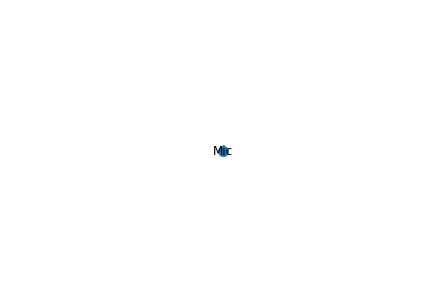

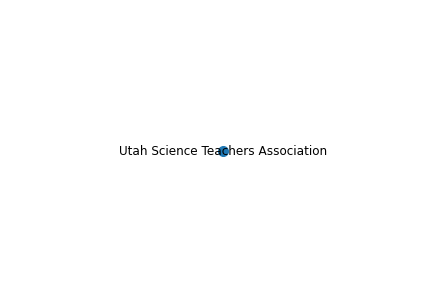

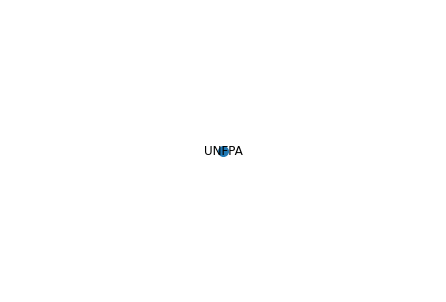

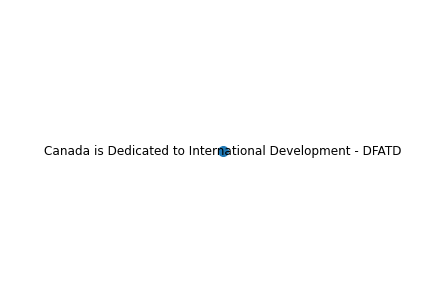

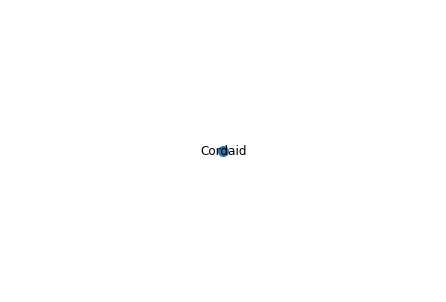

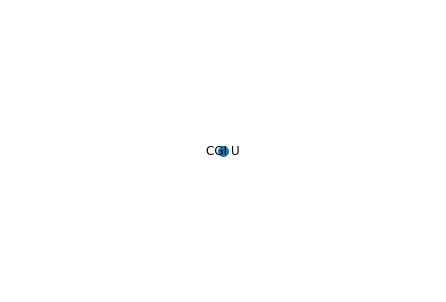

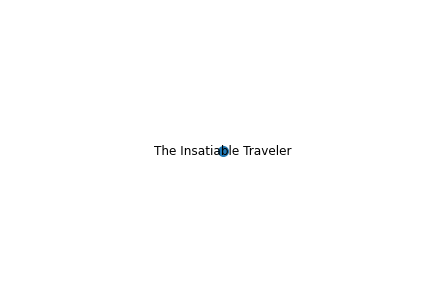

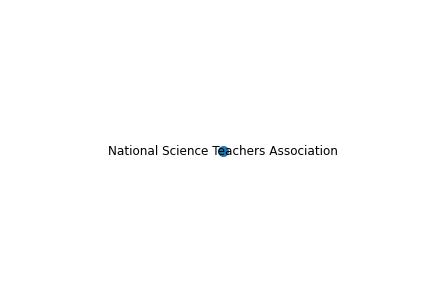

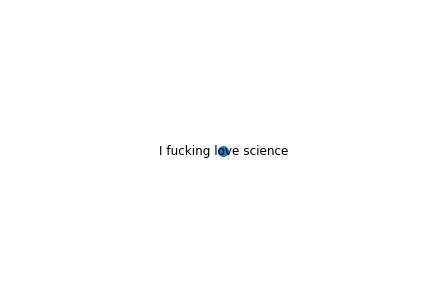

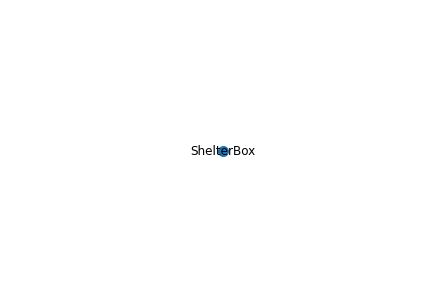

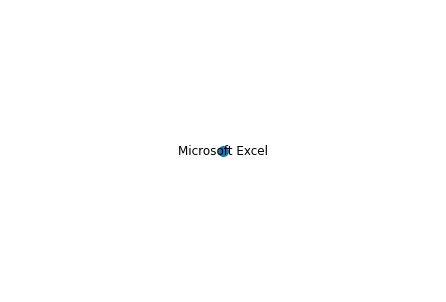

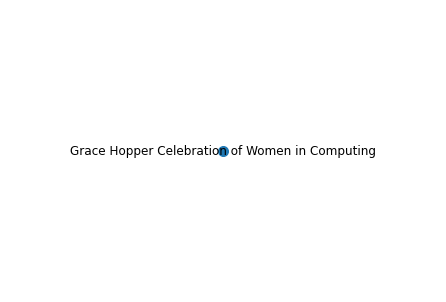

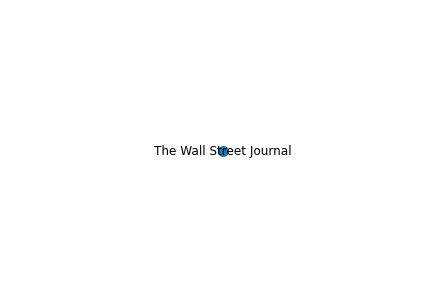

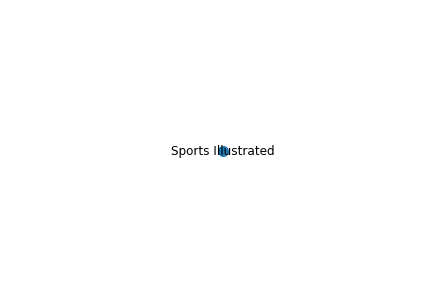

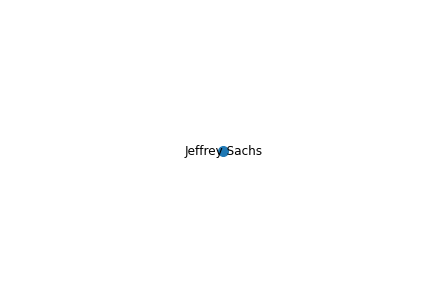

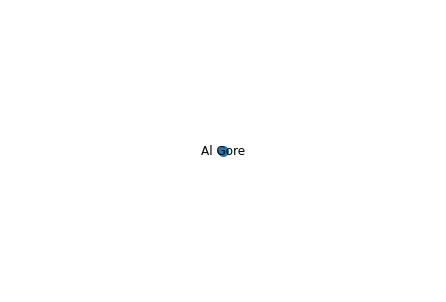

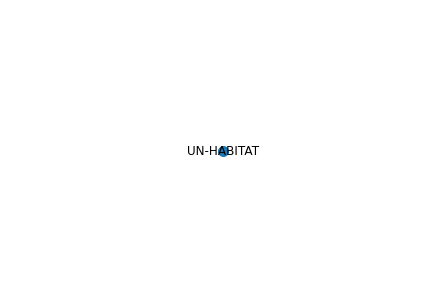

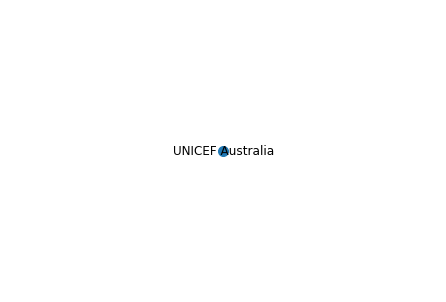

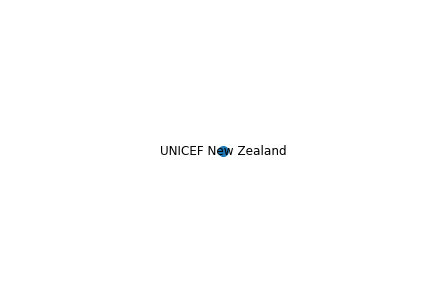

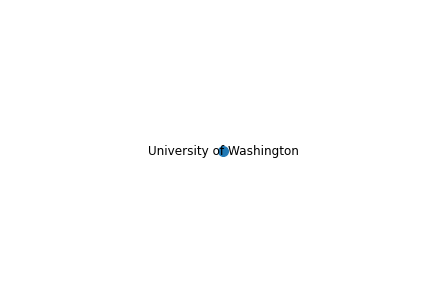

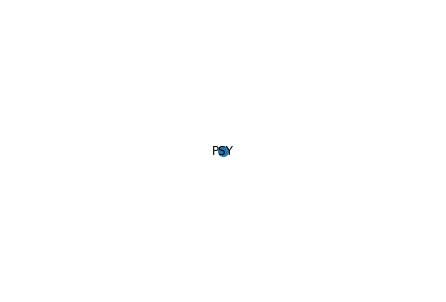

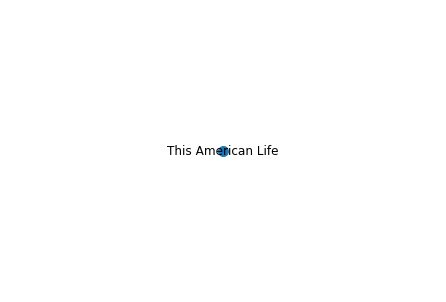

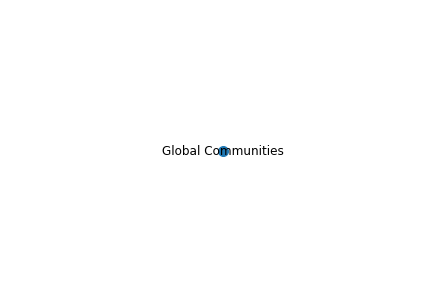

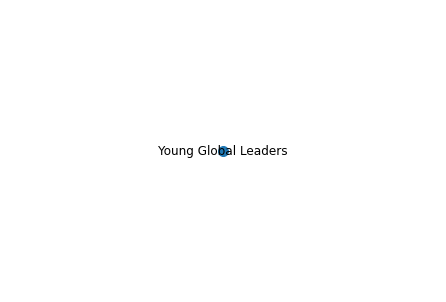

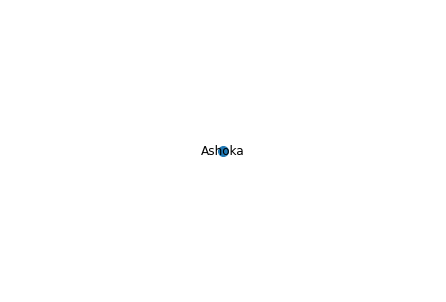

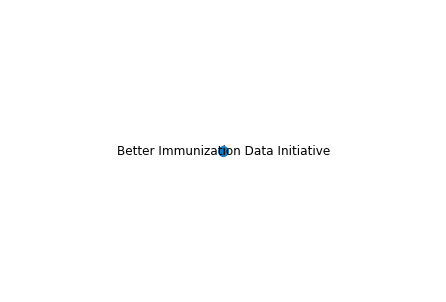

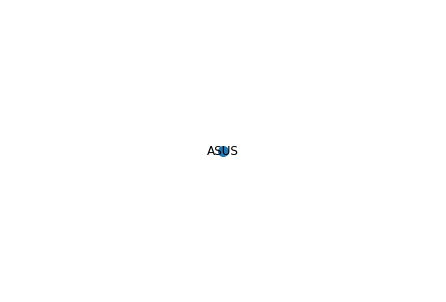

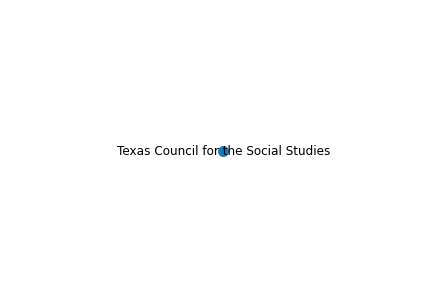

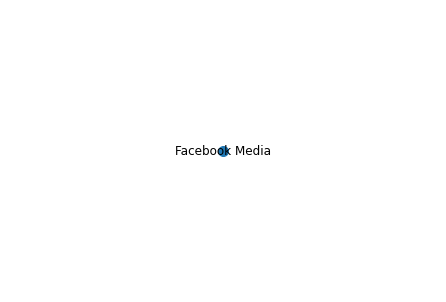

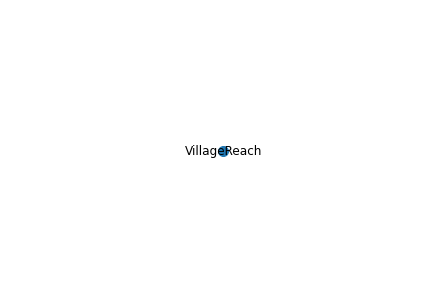

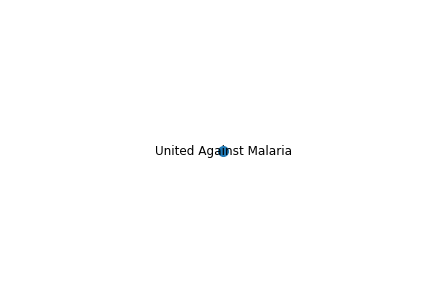

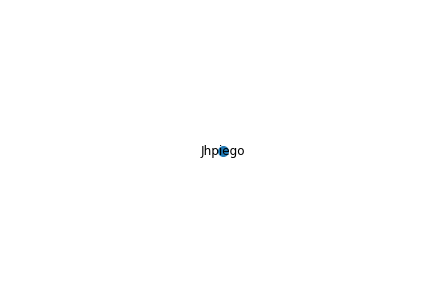

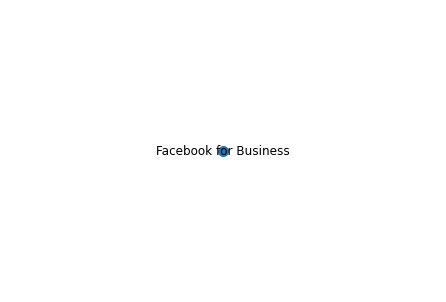

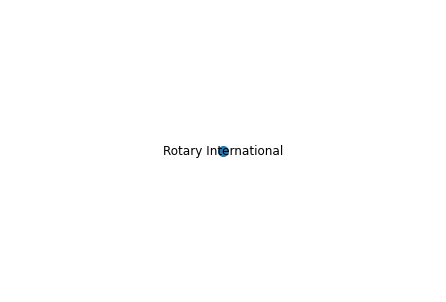

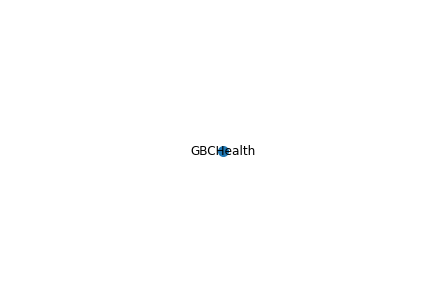

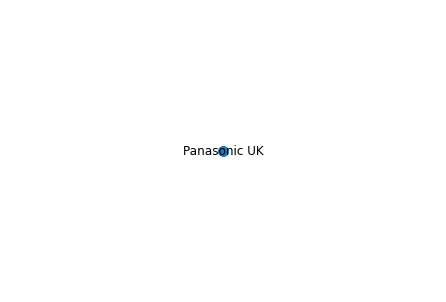

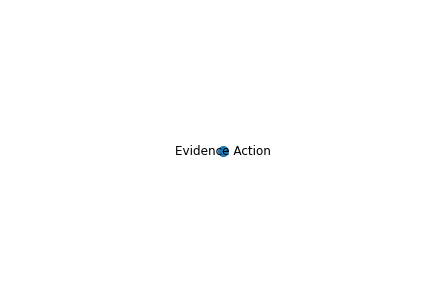

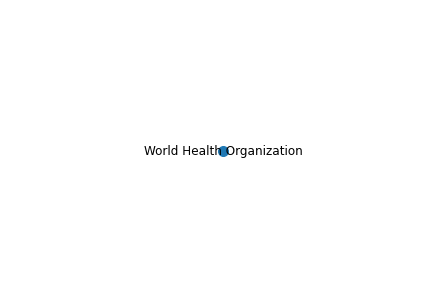

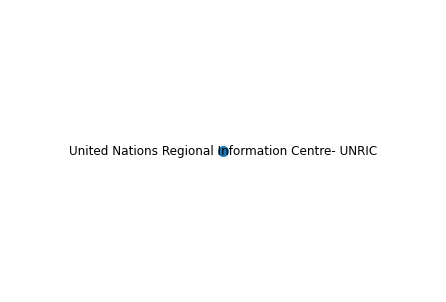

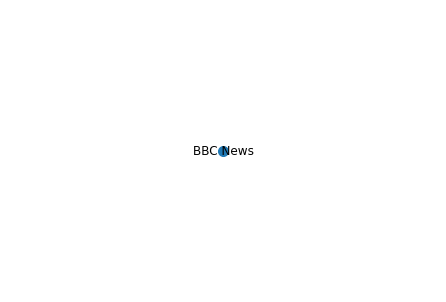

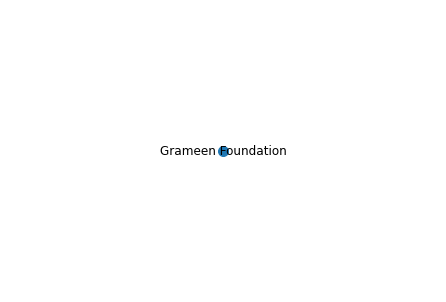

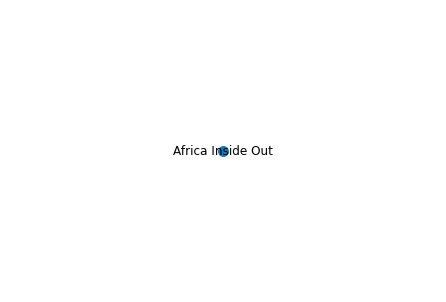

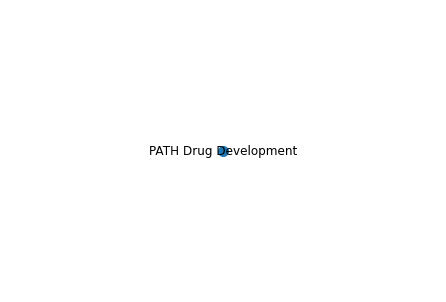

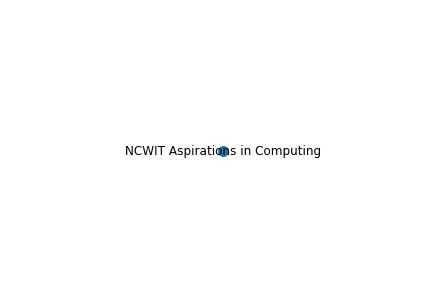

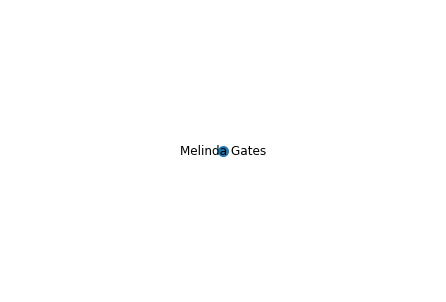

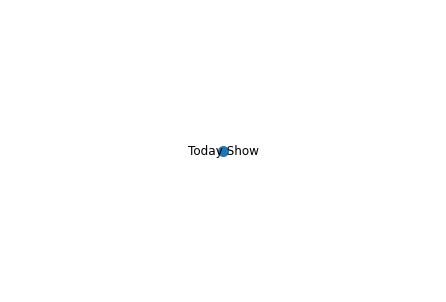

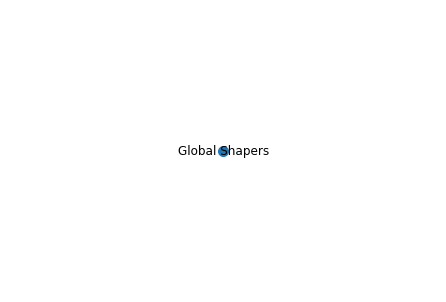

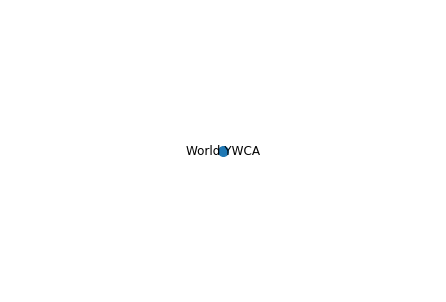

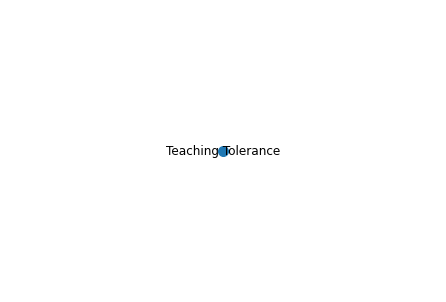

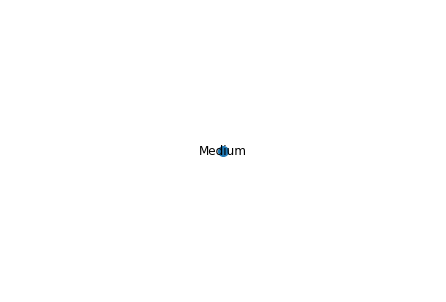

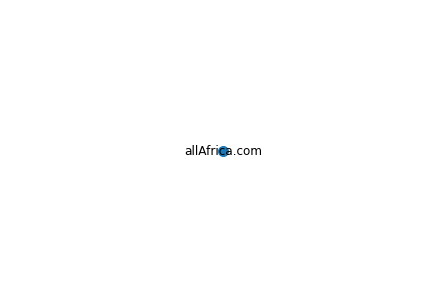

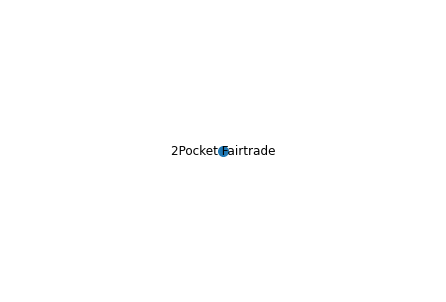

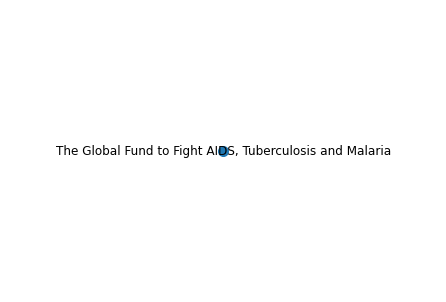

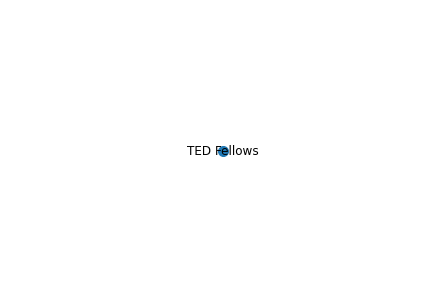

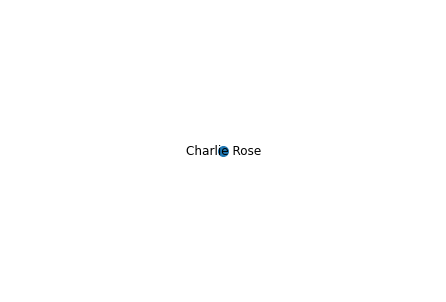

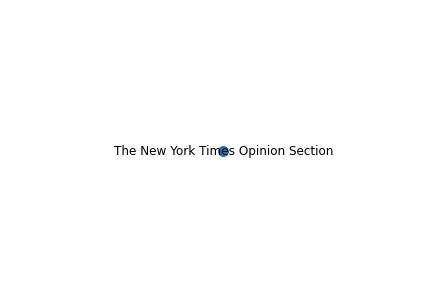

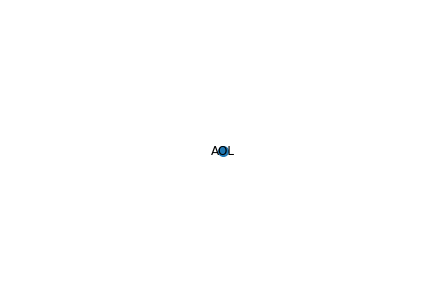

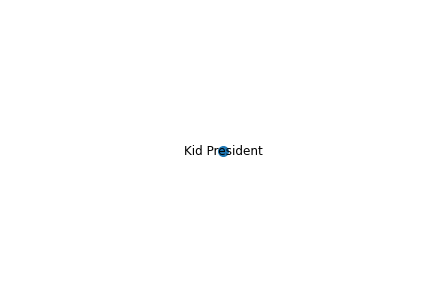

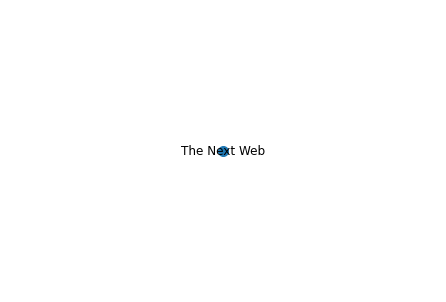

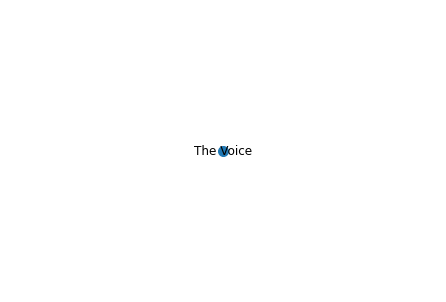

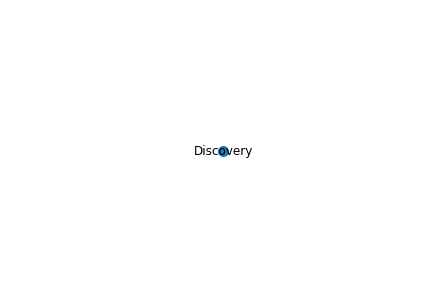

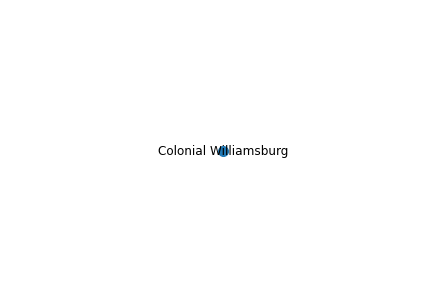

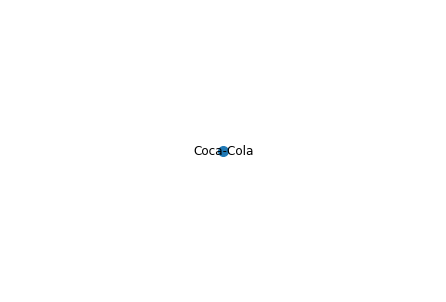

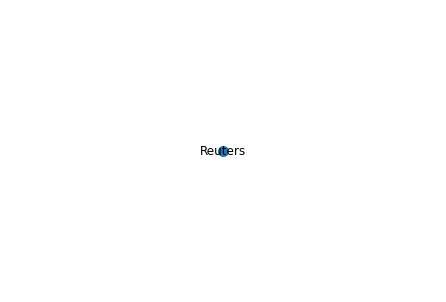

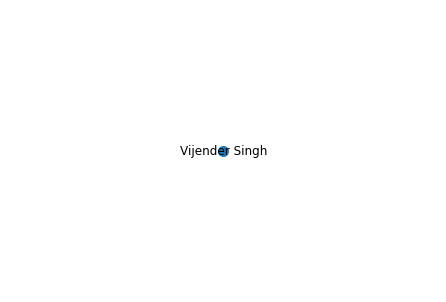

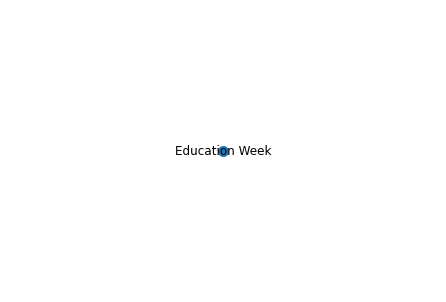

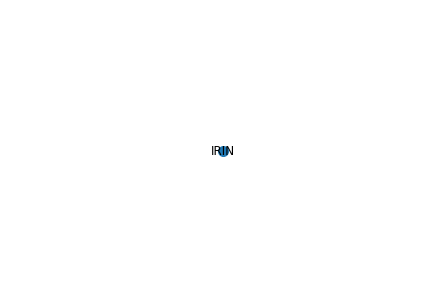

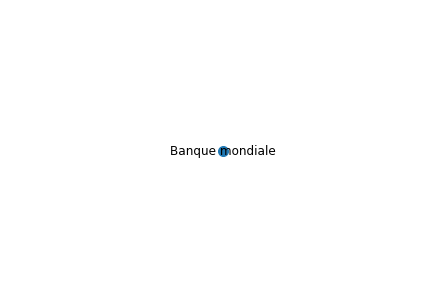

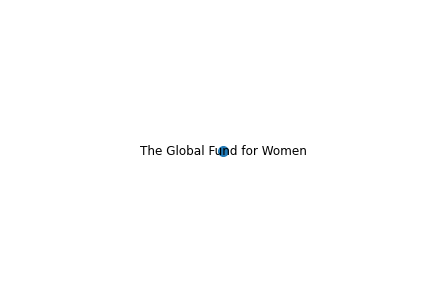

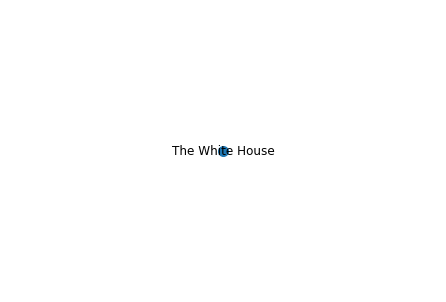

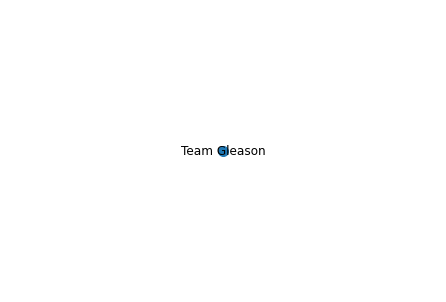

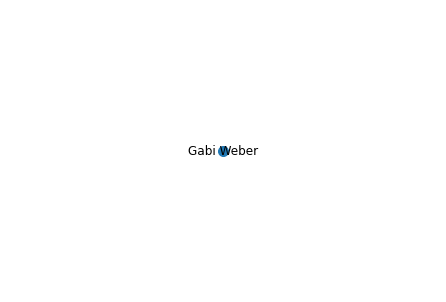

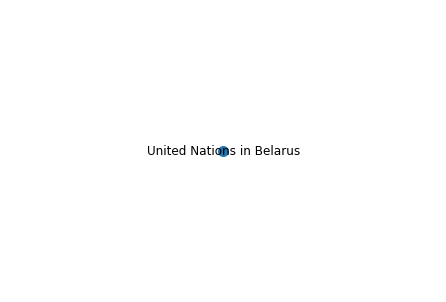

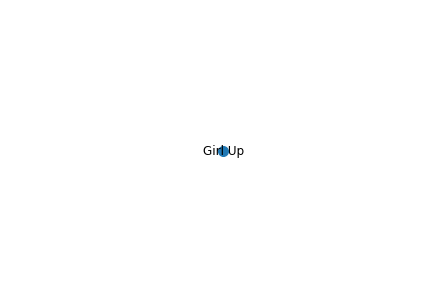

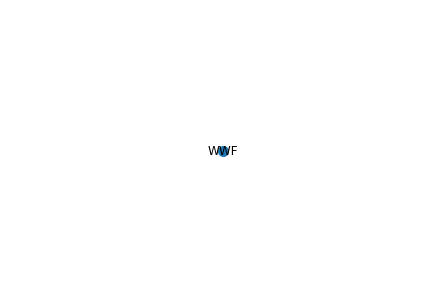

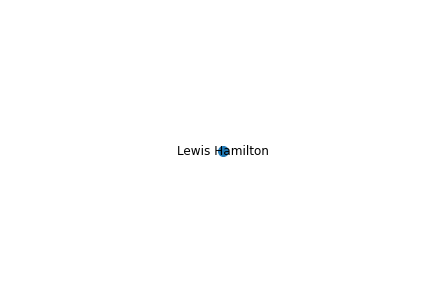

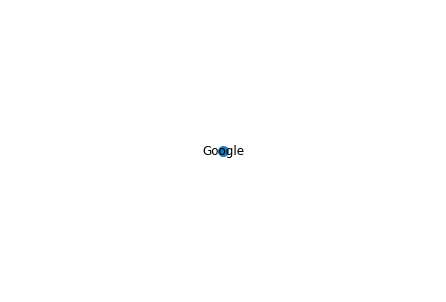

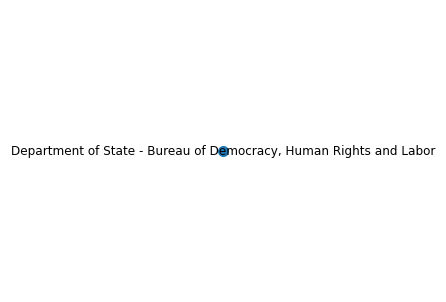

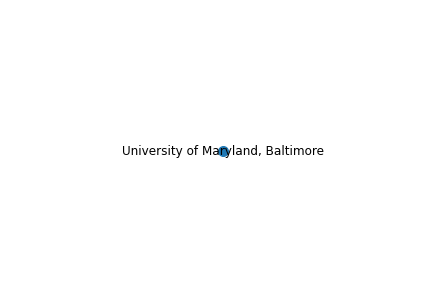

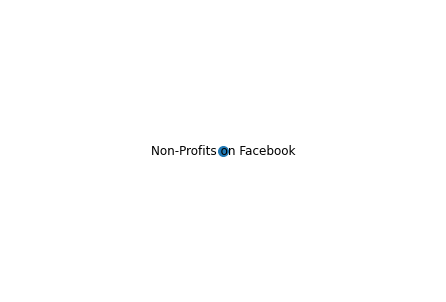

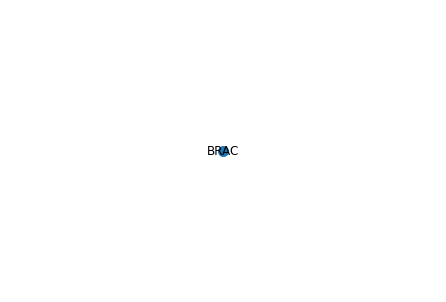

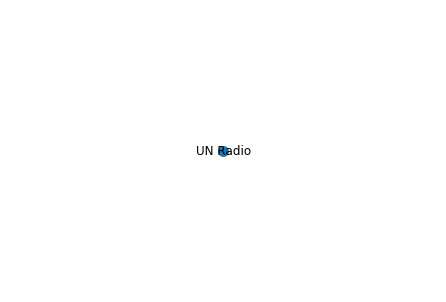

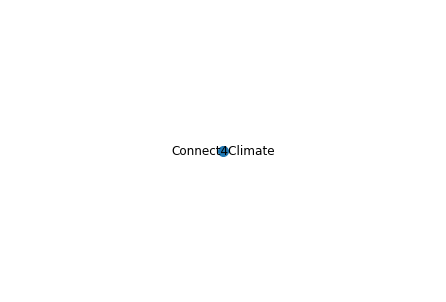

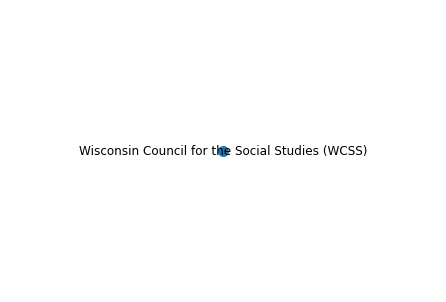

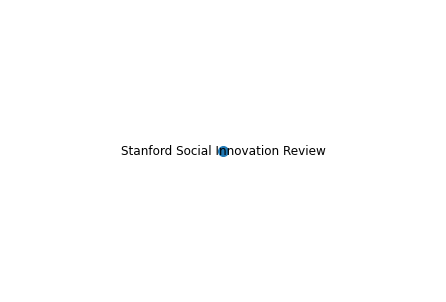

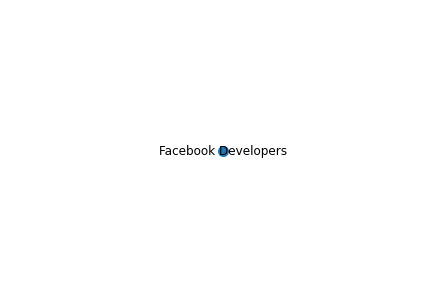

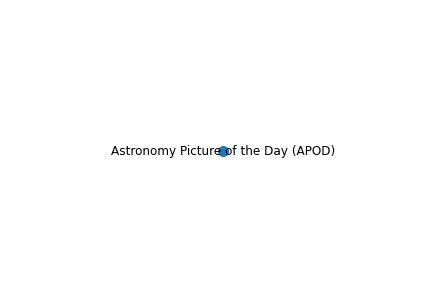

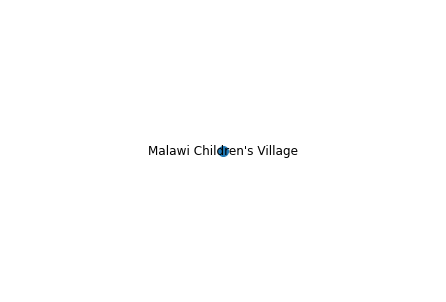

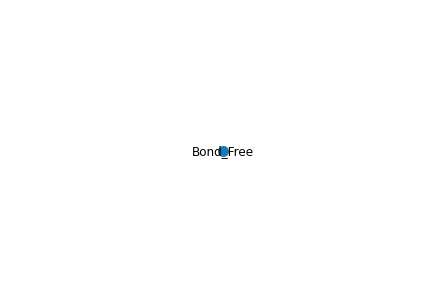

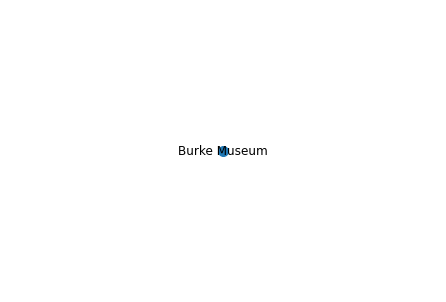

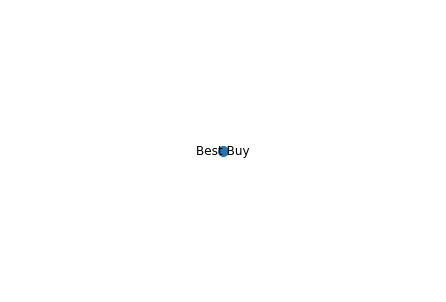

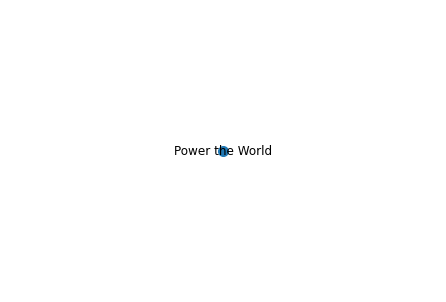

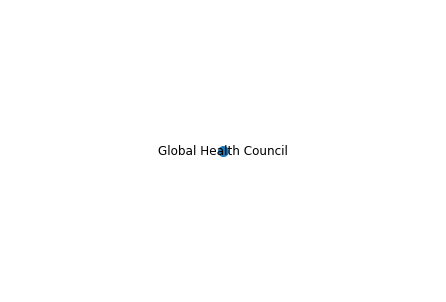

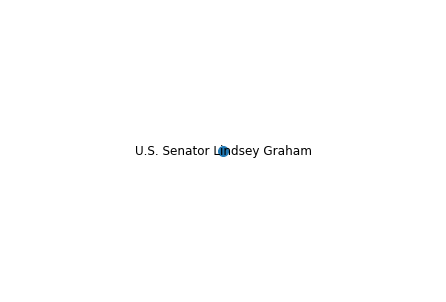

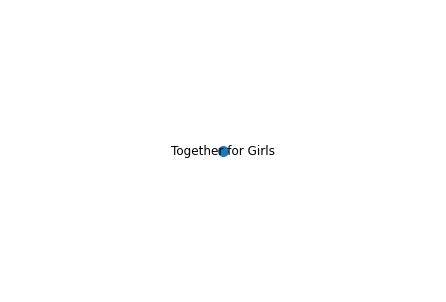

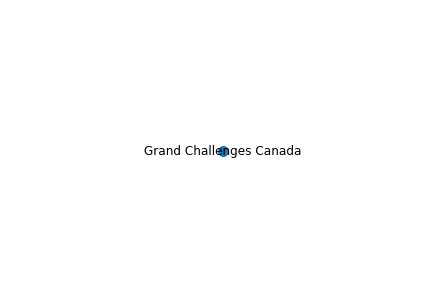

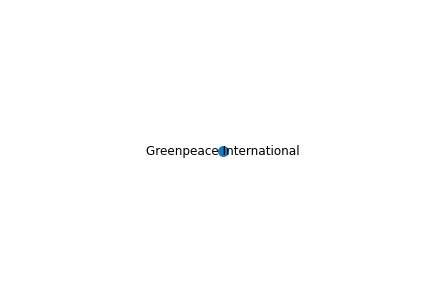

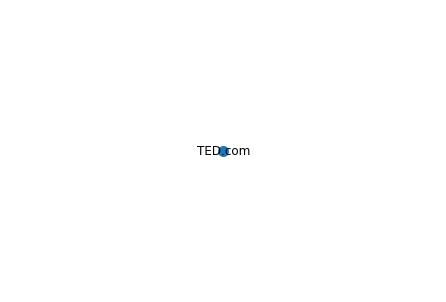

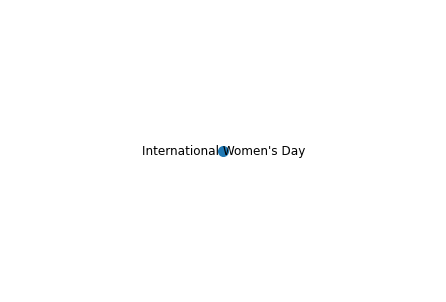

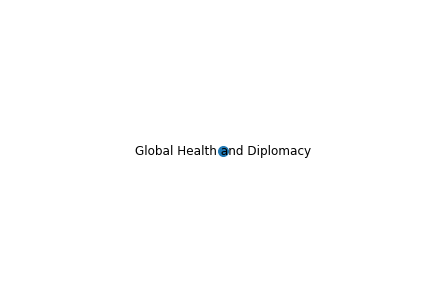

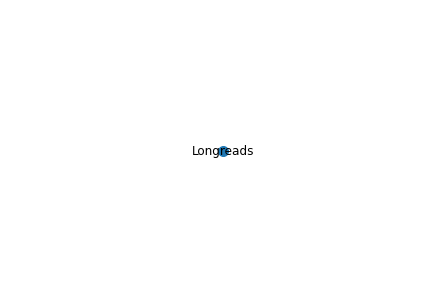

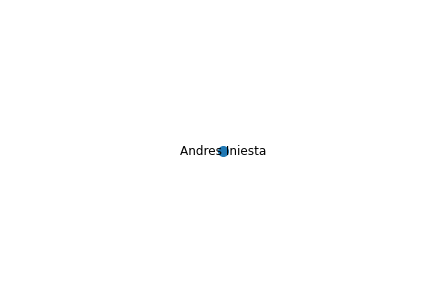

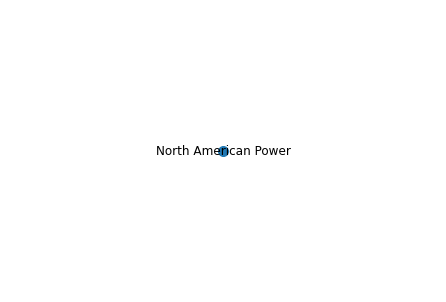

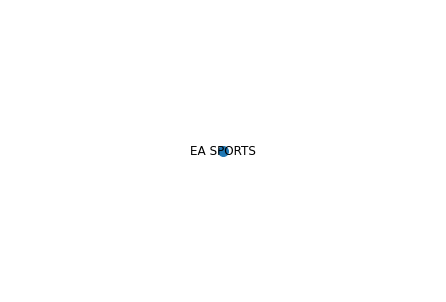

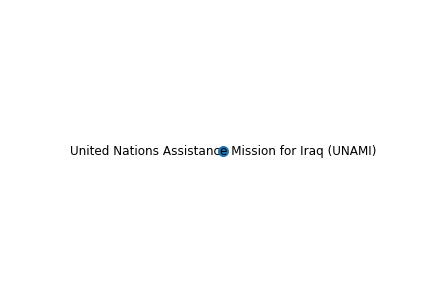

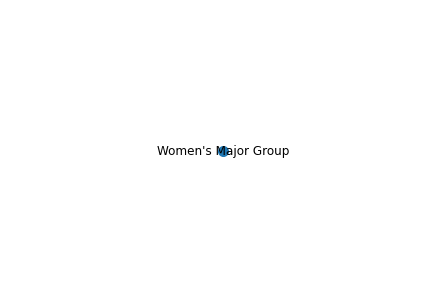

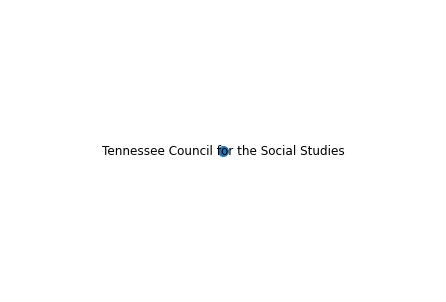

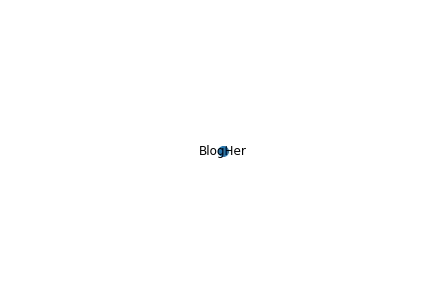

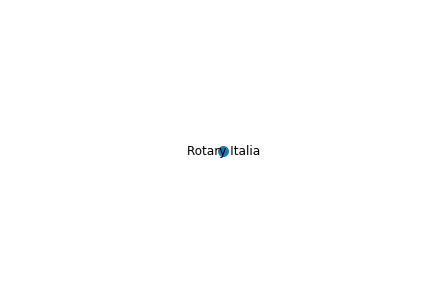

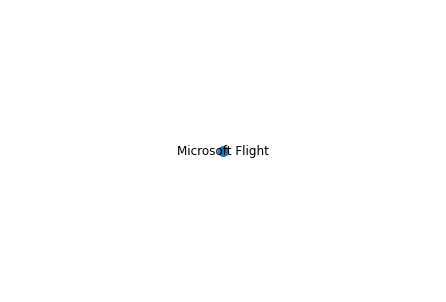

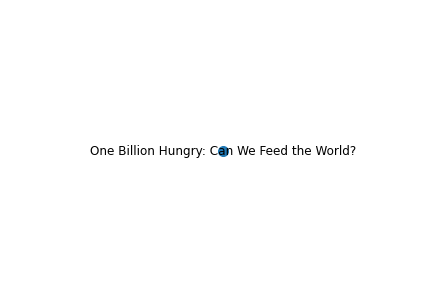

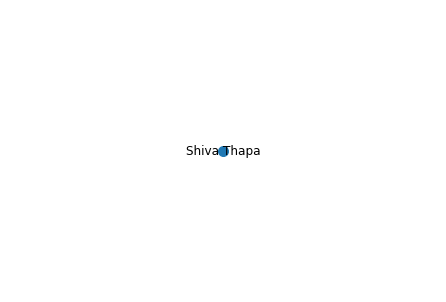

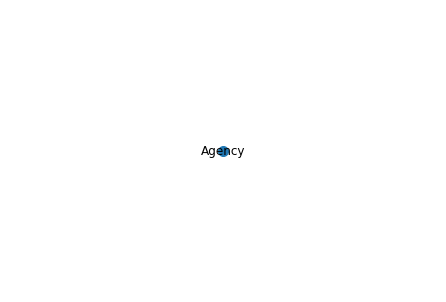

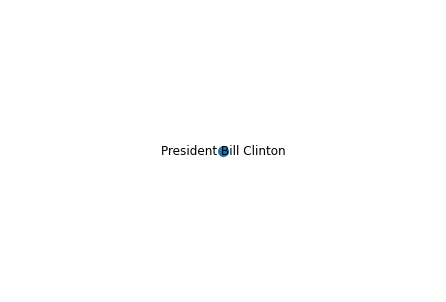

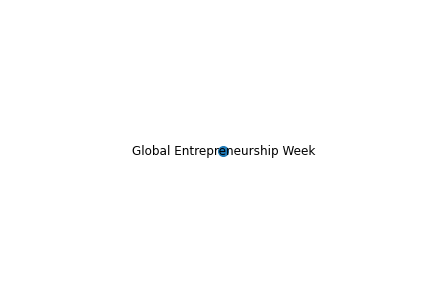

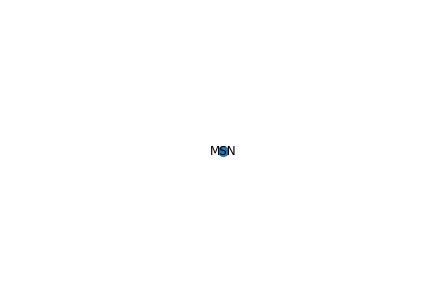

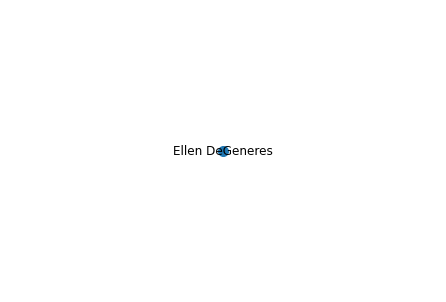

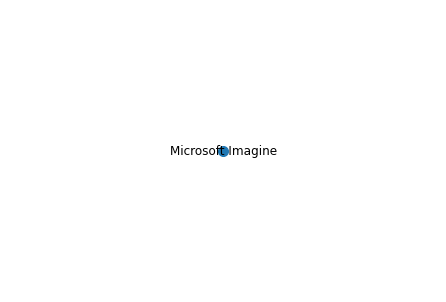

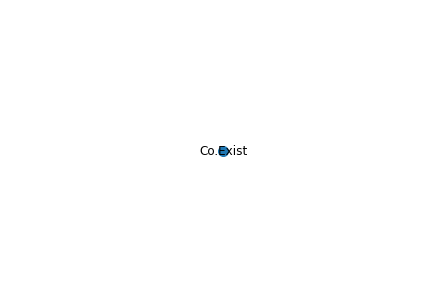

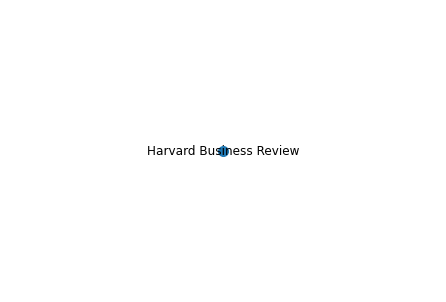

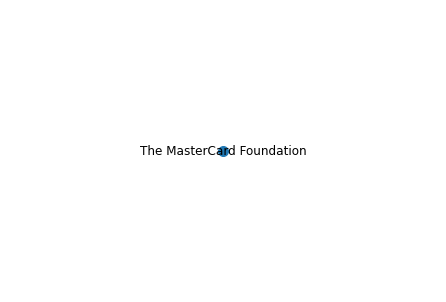

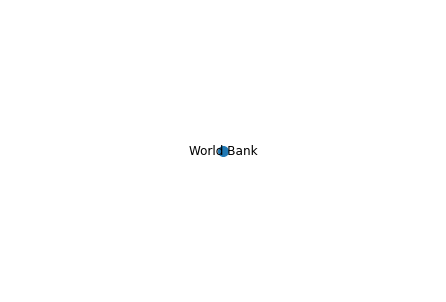

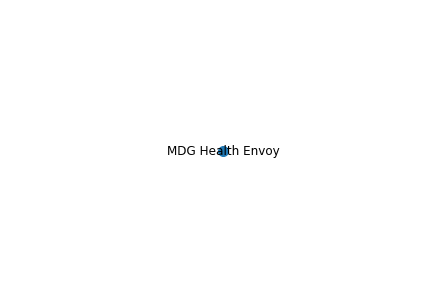

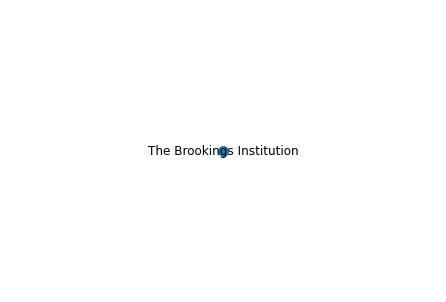

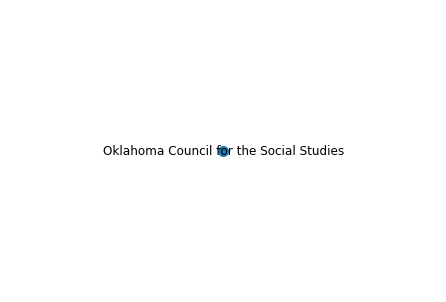

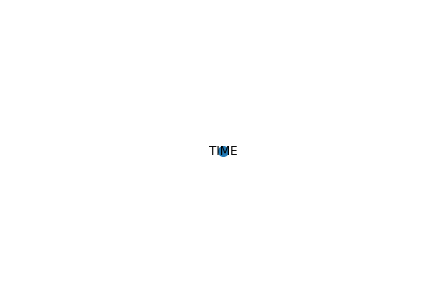

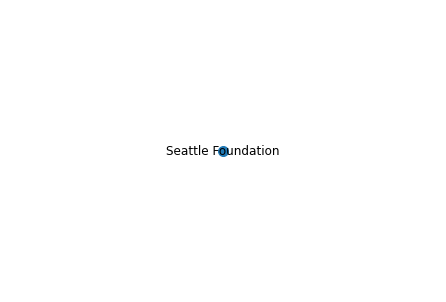

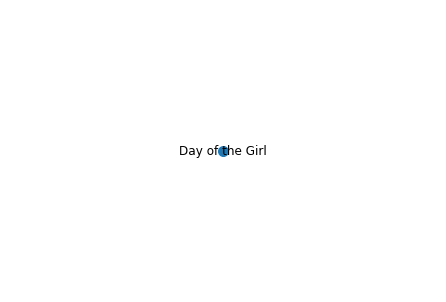

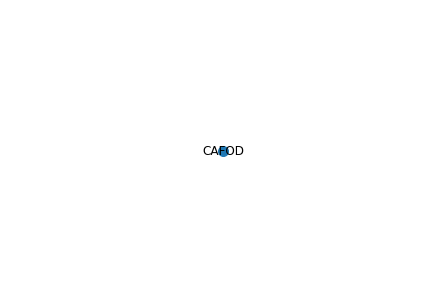

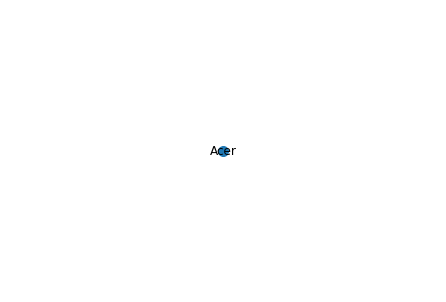

In [13]:
color_map = []
for node in subgraph:
    nx.draw(graph.subgraph(node), with_labels=True,node_size = 100)
    plt.show() 



In [14]:
from networkx.algorithms.community.centrality import girvan_newman

In [15]:
result = girvan_newman(subgraph.copy())

In [16]:
result

<generator object girvan_newman at 0x00000230A7658890>

In [18]:
print('final cluster sizes:')
[len(x) for x in result]

final cluster sizes:


[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
